# Paper Outline Convolutional Networks for Movement Decoding from EEG Signals

## Old outlines

[Old outline](https://docs.google.com/document/d/1_S0Zh0if35Oc_GpU2lPVts2CYNEs_vEmI0JZs7eW8sE/)

## Abstract

* Investigate convolutional networks on movement data, promise easier adaptability, better use of larger datasets
* 5-layer object-recognition-like architecture and 2-layer specialized architecture (with squared activation to robustly use bandpower features)
* Efficient samplewise training to make most of available data
* BCI Competition Dataset IVa and own dataset with real movements
* Both convolutional networks achieve similar accuracies as CSP on both datasets
* (Squaring helps for decoding higher frequencies)
* Visualizations can indicate which frequencies and which sensors are relevant
* Feasible to use convolutional networks for Online-BCI


## Introduction

* Movement decoding BCIs classical field of BCI, long-term vision help people with paralysis
* State of the art decoding: Filterbank CSP
* Convolutional networks great successes in other fields, e.g. image processing
* Low number of EEG trials per dataset compared to images per dataset
* Existing approaches mostly overcome by using hand-designed features or filters or unsupervised training
    * Hand-chosen bandpass filters and spatial filter initialization with CSP: [Joint optimization of algorithmic suites for EEG analysis](http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=6944253&tag=1)
    * PCA to reduce sensor dimension, fourier transform in 8-30 Hz: [Convolutional deep belief networks for feature extraction of EEG signal](http://ieeexplore.ieee.org/xpls/abs_all.jsp?arnumber=6889383)
    * Convolutional Networks on sliding bandpower/energy features: [Parallel Convolutional-Linear Neural Network for Motor Imagery Classification - 1570104275.pdf](http://www.eurasip.org/Proceedings/Eusipco/Eusipco2015/papers/1570104275.pdf)
    * Bandpower in 4-7, 8-13 and 13-30 Hz: [Learning Representations from EEG with Deep Recurrent-Convolutional Neural Networks](http://arxiv.org/abs/1511.06448)
* We aim to truly do end-to-end learning with state-of-the art convolutional nets
* Tackle low datapoints problems with samplewise training

## Methods

### Filterbank CSP

* FBSCP explanation

#### Filterbands BCI Competition

* until 10 hz, 6 hz width and 3 overlap, then 8 width and 4 overlap

##### > 0 Hz
||
|-|
|**low**| 0.2| 1| 4| 7|10|14|18|22|26|30|
|**high**|   4| 7|10|13|18|22|26|30|34|38|

##### > 4 Hz
* Same, just filterbands > 4 Hz:

||
|-|
|**low** |4| 7|10|14|18|22|26|30|
|**high**|10|13|18|22|26|30|34|38|

##### 0-4 Hz
* 1 hz width and 0.z overlap

||
|-|
|**low**|0.2|0.5|1.0|1.5|2.0|2.5|3.0|
|**high**|1.0|1.5|2.0|2.5|3.0|3.5|4.0|


#### Filterbands Our Data

* same, >0 and > 4 with much more filterbands, only stop at 82-90:

||
|-|
|**low**| 0.2| 1| 4| 7|10|14|18|22|26|30|34|38|42|46|50|54|58|62|66|70|74|78|82|
|**high**|   4| 7|10|13|18|22|26|30|34|38|42|46|50|54|58|62|66|70|74|78|82|86|90|

### Shallow/Square Net

* Channels are initially in second dim, so 22/45 are filter sizes for our and bci competition set respectively
* We use dropout with p=0.5 before final layer, batch normalization before squaring nonlinearity
* Final layer with length 30 is sample-trained model (input window of 2 seconds)
* Final layer with length 61 is trial-trained model (input window of 4 seconds)



|#Layer|Layer|Units|Filter Size|Stride|Nonlinearity/PoolingMode|
|-|
|1|Conv|40|25x1|1x1x1|Identity|
|2|Conv|40|1x(22/45)|1x1x1|Square|
|3|Pool||1x75x1|1x15x1|Mean->Log|
|4|Dense|4|(30/61)x1|1x1|Softmax|

### Deep 5 Net

* Final layer with length 2 is sample-trained model (input window of 2 seconds)
* Final layer with length 8 is trial-trained model (input window of 4 seconds)
* We use dropout with p=0.5 before conv layers 4,6,8,10, batch normalization before elu nonlinearities

|#Layer|Layer|Units|Filter Size|Stride|Nonlinearity/PoolingMode|
|-|
|1|Conv|25|10x1|1x1|Identity|
|2|Conv|25|1x(22/45)|1x1|ELU|
|3|Pool||3x1|3x1|Max|
|4|Conv|50|10x1|1x1|ELU|
|5|Pool||3x1|3x1|Max|
|6|Conv|100|10x1|1x1|ELU|
|7|Pool||3x1|3x1|Max|
|8|Conv|200|10x1|1x1|ELU|
|9|Pool||3x1|3x1|Max|
|10|Dense|4|(2/8)x1|1x1|Softmax|

## Datasets

* Our dataset explanation, setup experiment
* BCI competition dataset IV explanation
* (kaggle dataset)

## Results

### FBCSP Baseline Validation

* Our FBCSP reaches similar accuracy as published FBCSP on BCI competition IV 2a set on same window


|Model|Training|Window|Accuracy|
|-|
|Their FBCSP|trial|0.5-2.5s|67.0|
|Their CSP+CNN|trial|0-3s|70.6|
|Our FBSCP|trial|0.5-2.5s|67.6|
|Our FBSCP|trial|0.5-4s|67.8|

* In the following, we use our FBCSP on the 0.5-4sec trial window

### Results on both datasets combined

This is meant to be used as a reference for our discussions. We can discuss what parts to extract/how to break it up so that someboy can actually quickly make some sense out of it :) I vary different factors:
* different time domain frequency filters on the input (>4 vs >0(no filter)  vs 0-4) 
* different first nonlinearities in the networks (elu vs square)
* trained on trials or samples 

* In bold are the nets we actually intend to use and the "cleanest signal" comparison (>4 Hz)
* For shallow net elu+max is better for lower frequencies and worse for higher frequencies compared to square+mean+log



|Model|Nonlin|Freqs|Acc(Trial)|To CSP|Std|RandTest|Acc(Sample)|To CSP|Std|RandTest|
|-|
|FBCSP|-|0-4|63.3|-|-|-|-|-|-|-|
|FBCSP|-|>4|83.4|-|-|-|-|-|-|-|
|FBCSP|-|>0|84.1|-|-|-|-|-|-|-|
|Shallow|Square|0-4|70.9|7.5|9.1|5e-5|71.3|7.9|11.8|7e-4|
|Shallow|Square|>4|84.3|0.9|6.9|0.2|**85.2**|**1.9**|**7.3**|**0.1**|
|Shallow|Square|>0|83.2|-0.9|8.1|0.3|83.6|-0.5|11.5|0.4|
|Shallow|Elu|0-4|77.5|14.2|8.7|$<$1e-5|75.6|12.3|12.6|3e-5|
|Shallow|Elu|>4|80.1|-3.3|7.2|0.009|81.0|-2.4|7.9|0.062|
|Shallow|Elu|>0|85.3|1.2|8.5|0.2|81.6|-2.5|11.0|0.1|
|Deep 5|Square|0-4|59.0|-4.3|11.7|0.031|54.0|-9.3|9.9|2e-5|
|Deep 5|Square|>4|73.0|-10.4|9.5|$<$1e-5|80.2|-3.1|8.9|0.036|
|Deep 5|Square|>0|75.8|-8.4|8.7|$<$1e-5|79.5|-4.7|9.2|0.006|
|Deep 5|Elu|0-4|73.6|10.3|15.1|7e-4|69.8|6.5|12.8|0.006|
|Deep 5|Elu|>4|73.9|-9.4|12.0|$<$1e-5|**82.3**|**-1.0**|**7.4**|**0.2**|
|Deep 5|Elu|>0|83.1|-1.0|9.0|0.3|83.9|-0.2|11.9|0.5|

* Nonlin is the first nonlinearity
* Freqs: Signal was low/high-pass-filtered to these frequencies
* Acc(Trial) is trial accuracy trial-trained, Acc(Sample) is also **trial**-accuracy, but **sample**-trained (i.e. input window shifted samplewise over trial)
* Randomization test for statistical significance

### Result Plots

* Plots plotting FBCSP Accuracy vs different nets for the 29 datasets (ours + bci competition)
* Above line means better than FBCSP, below line worse than FBCSP

* Nets are worse on "low-accuracy", "difficult" BCI Competition datasets (less robust?) 

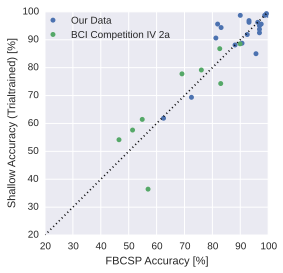

In [72]:
plot_csp_vs_epo_shallow()

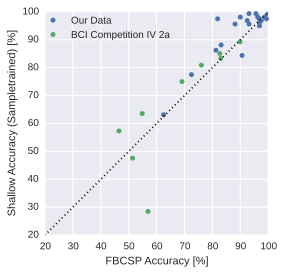

In [73]:
plot_csp_vs_cnt_shallow()

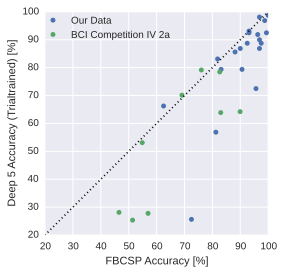

In [74]:
plot_csp_vs_epo_deep_5()

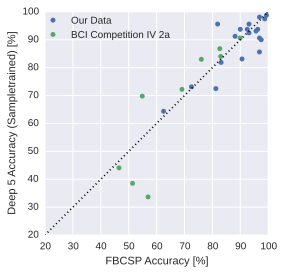

In [75]:
plot_csp_vs_cnt_deep_5()

## Training Times

* Time for a single dataset
* Averaged over all 29 datasets
* hours:minutes:seconds
* (for nets, showing runs with 4 Hz highpass, shallow square and deep5 elu)

|Model|Time|
|-|
|FBCSP|0:02:42|
|Deep5 Trialwise|0:14:29|
|Deep5 Samplewise|0:34:44|
|Shallow Trialwise|0:17:45|
|Shallow Samplewise|0:29:49|


### Kaggle

Not clear in how far to include this. As we believe kaggle data possibly has class-discriminative artefacts in the data, see:
* https://nbviewer.jupyter.org/github/robintibor/braindecode/blob/devel/braindecode/notebooks/analysis/Kaggle_Data_Analysis_Median.ipynb

|Model|Window before event|Highpass|Valid AUC| Kaggle AUC|
|-|
|Winner Ensemble|||||98.1|
|[Recurrent Convolutional Singlemodel](https://github.com/stupiding/kaggle_EEG)|7.5s|no||97.7|
|square net|7.5s|no|89.1||
|deep 6 net|7.5s|no|96.7|96.8|
|deep 5 net|8s|no|96.3|96.4|


AUC means area under the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).
Valid AUC refers to own test set, Kaggle AUC to value from submitting to Kaggle (mean over public and private leaderboard).

Would have been place 14 on Kaggle private leaderboard.


## Envelope Correlation Visualization

Correlate envelope in different frequency bands with the activations of the 4th convolutional layer of the deep 5 net. Should show information about the envelope of which frequencies at which sensors is kept in the net -> which sensors and which frequencies are "relevant" to discriminate the four classes. How to extend or improve this visualization is up for discussion :))

y-Axis is center of frequency bands, x axis is unordered (200) units. Red indicates positive correlation, blue negative corelation, grey no correlation.

* We see high frequncies around 75 Hz used, for example at FCC4h -> high gamma decoding?
* We see an overall non-uniform relevance of the sensors, some sensors barely/not relevant, e.g. FC5
* Colors are flipped for lower and higher frequencies (again, see FCC4h) -> some units seem to simultaenously  encode a decrease in low and an increase in high frequencies or vice versa -> very plausible
* a lot of units with similar correlations -> a lot of redundancy in the network?


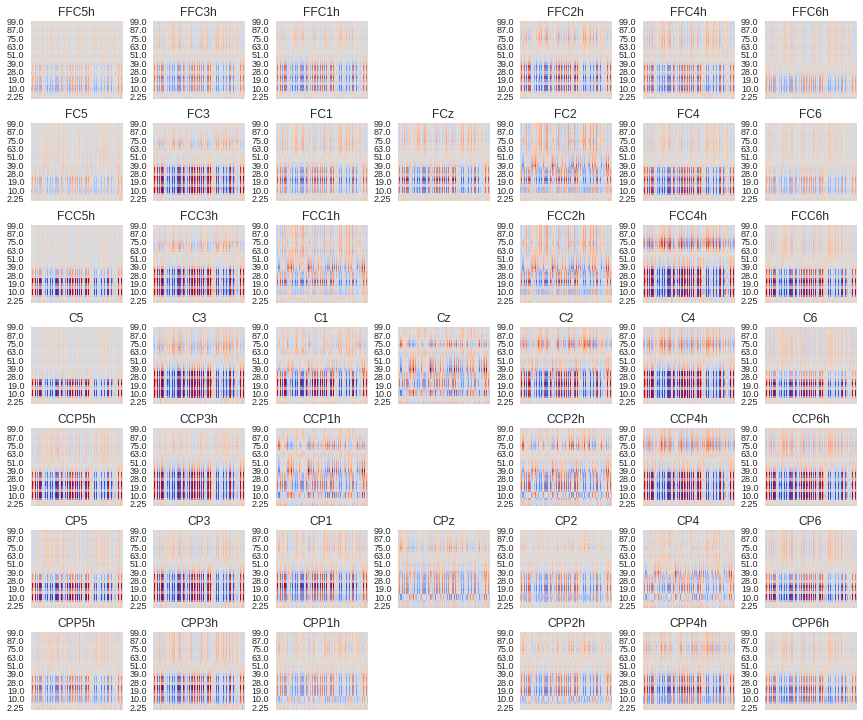

In [79]:
%%html
<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA18AAALQCAYAAABv18rQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmsbWdd//96hrXWHs9wzx16W1qRoS1fgS/+DKEEFNACFlukBBPEtkgBwyw1QdA00AIxxm9CQcESZSiFxhJBBUyUQESxoGDUaOJAbSmWS6fbO5x7zt57Dc/w++NZa+29z+k9+57e7nvanvVObu5Zez3rmT7PtNbzed5v4b33NGjQoEGDBg0aNGjQoEGDuULudAYaNGjQoEGDBg0aNGjQYDegeflq0KBBgwYNGjRo0KBBgzOA5uWrQYMGDRo0aNCgQYMGDc4AmpevBg0aNGjQoEGDBg0aNDgDaF6+GjRo0KBBgwYNGjRo0OAMoHn5atCgQYMGDRo0aNCgQYMzAL3TGTiTuPDCCznvvPNQStW/nXPOOXziE5/gPe95D3/3d3/H0tLS1DMf+tCHeNrTnsba2ho33HAD3/rWtwDQWvOqV72K173udQBceeWVHDp0iFarVT/7mc98hjzPeelLX8p//Md/nIESNoD52vnee+/lve99Lz/60Y/w3nPllVfymte8hkOHDjV23gHM09YA3/zmN3n3u9/NVVddxZvf/GaAxtYNGswJ8+zP999/P+973/u4++678d5z1VVX8cu//MtNf94hzHvsBhgOh1x66aW88pWv5G1ve1tj6x3AvO38+7//+/z5n/85Sikuu+wyfv3Xf/0xYedd9fIF8NnPfpYDBw5s+l0IwWtf+1re9KY3bbrnnOONb3wjT33qU/nKV75CHMfcf//9vPWtb2V1dZV3vvOdAPze7/0ez372s6eePXTo0HwK0mBLzMvO1157LS94wQu46qqruO+++7jssst4znOeQ5IkZ6JYDR4Cj7Stjx8/zjXXXMOXvvQlvvjFL/L0pz8dIcSZKEqDBrse8xq73/ve9/KMZzyDj3/84zzwwANceumlPPe5z0XrXbcMetRgXmN3hT/4gz+Ya/4bnBrmZecvf/nLfPvb3+av//qvcc7x9re/nbvuuosois5EsU4LzahzCvjmN7/JAw88wC233FK/vR84cIAbbriB1dXVOtxWetW33HILt956K+vr6/zmb/4ml1xyydzz3WB7OBU7v/rVr+Z5z3seAGeddRbnnXced911FxdeeCHQ2PmxglOx9dOe9jQ+/elPc+211z5k325s3aDBowOnOnb/1E/9FAD79+/nCU94AnfeeScXXHAB0PTnxwq2svXx48frcP/93//Nd77zHV7+8pdviqOx9aMfp9Knv/jFL3L11VfXH78/8YlPAONNj0eznZszXxM42cvTd7/7XZ7//OdPbZsCnHvuuTz96U+vrz/96U9z+eWX84u/+Iv86Z/+af27cw6Ar3zlK7znPe/hhhtumEPuG5wqTsfOL37xi+l0OgD867/+Kw8++GA9oTd2fvThdGx9/vnnb7pfobF1gwZnHqfTn1/0ohexsLAAwD333MNdd93FT/zETwBNf3404uHY+hnPeEb97PXXX8911123aWezsfWjC6fTp7/3ve9x6NAhfumXfolf+IVf4KabbqrDPdrtvOt2vq688sopYz772c/m/e9/P957br75Zr785S/X94QQ3HLLLZw4cYK9e/duGe8LX/hCfuzHfoyLL76YO+64g6uuuoonPvGJHDx4EO89r3rVq4DwNf3ee++dT+Ea1JiXnSFM3FdccQVra2t88IMfZHl5mcFg0Nh5hzBPW58Mja0bNJgP5t2fT5w4wdvf/nbe/OY3c9ZZZ3Ho0KGmP+8Q5mXrW2+9lQsvvJBnPvOZfPOb35y619j6zGNedl5bW+N73/sef/Inf8L999/Pq1/9ai644ALOPffcR72dd93L18PxPV1eXub+++/fMt7Xv/719d9PecpTeNnLXsbf/u3f8prXvAalVL0tKqWs38gbzA/zsjPA2Wefzd/8zd9w6NAh3vCGN9BqtXjyk5/c2HmHME9bnwyNrRs0mA/m2Z8PHz7MG9/4Ri6++GJ+7dd+rf696c87g3nY+sEHH+Rzn/sct956KxBetibP7Da2PvOYV5/u9XpcfvnlaK0555xzeOlLX8ptt932mFh3N26HEzjZ9udznvMc/v7v/54sy6Z+v/vuu7nppptwzvGf//mfU/eMMY+JQ3+7EQ/Xznme82d/9md1J37CE57Ai170Ir71rW81hAyPUjxcW29EY98GDXYep9Of19fXecMb3sDll1/O2972tnlntcFp4uHa+h/+4R84fPgwl1xyCc9//vP51Kc+xSc/+Umuu+66Zhx/FOJ0+vQ555zD2tpafU9K+Zgh0Glevk4Bz3/+83nSk57Eu971LgaDAQD33Xcf11xzDdZaAN7ylrfwta99DQh05F//+td54QtfuCUJR4NHF2bZOY5jbrzxRv7iL/4CCJP5P/7jP/K0pz2tsfNjDKfSpyt47xv7NmjwKMap9OcPf/jDXHTRRbz2ta/dyaw2OE3MsvVll13Gd7/7XW677TZuu+02Xv/61/P617+e6667rhnHH0M4lT59ySWXcPPNN1MUBceOHePrX/86z33ucx8Tdn5svCI+Qpj11WOr+x//+Me54YYbeMUrXoHWmna7zRVXXMErX/lKIFCafvCDH+RDH/oQWmuuueYanvWsZ3Ho0KFN8TZfX+aLM2HnP/7jP8Zay8UXX8zll1/e2HmHME9bv/GNb+Q73/kOxhiklNx444285S1v4bLLLmts3aDBHDDP/vz5z3+eAwcOTJ0B+tVf/VWe97znNf15BzBPW28n3sbW88U87Xz11Vfzwx/+kBe/+MW0Wi2uuOIKLrroosfEekz4x8IrYoMGDRo0aNCgQYMGDRo8xtG4HTZo0KBBgwYNGjRo0KDBGUDz8tWgQYMGDRo0aNCgQYMGZwBbnvm65557uP766+l2uyiluOaaa7juuuvo9Xoopfid3/mdKUa/r33ta3z+859HSskll1zC5ZdfPvcCNHhk0Nh6d6Cxc4MGjy80fXp3oLHz7kBj510CvwV+93d/13/jG9/w3nv/qU99yv/sz/7s1PWXvvSlOqy11r/85S/3RVF455x/5Stf6dM03Sr6Bo8iNLbeHWjs3KDB4wtNn94daOy8O9DYeXdgy52vdrvN0aNHq5c0fv7nf37q+n/+53/qsA8++CB79uypOfbPPfdc7r77bp761KeeNP677vgfvBDENkV6i5ExVmgSO8TIGCcUHoEREYvpA4ziBazUGCIUFockdinKGzwC7Qq8EKS6i/AeIyIkjrZZwyNIdY/IZTihyEVC5HM6+XFWk/3EPkN4h3Y5ALlqY4VGeYMREdqHuD0S5Q3a5QjvEHhS3SW2KYVMiFwW8lyWRXlD5DIKmSC9xUpNJz+BlaGepHeMoh7Ce7wQJGYIgJURVmg6+XEGyTIAiRlSqBZGRLTsgJHq0TEnyHSHdrGOE5JCtbBCI32g4tQuxwmFlZonPfkpO2LrO+68i9wn9PwqyhWsqyWUsKys/YD1zn7W5RIeQd8do5WvMUyW8CJ4xFbtobJvnK9TRG1a6XGOLPx4bYtjYi9PGPwXAA/0nkzXnWBNLtNmgBWaXnaEYbyEwJPRomeP0xkd4d7eBWhRYHxEmwFOKEa+TZd1Ujos2gdpj44yau/hqNrPojuKlRHKFXTSYzzQ+XEikdfly2UL7QtykbCQHyHJVhm199AZHObI4pMQOKR3RDalMzrCoLMPI2OWV3/AscUnArC4/iPu650f/rYPYoXGC4kVmnaxhpMKI2Ny2aLwMbHIiO2IgVxAC8NTnvzjO2JngB/e/h/kqk1ihyhnSHUX5Q3d9CgPts8lEjkeicAR2QztCo7rfcQiq+umVayjbI4XkvXWHpbW72HY3sNALpCQYkTE8vAevJAMkmUy2UZT4FDELgUgl63QN1SHdnGCqBhxvHs22uUYGQOQ2CGp6mK8JhYZHsni6H6s1KwnK7TNGifUHpaKw0hnWGvtReDwyLpNKm8wMkZ4R7vs18oZ0riP8I4TaoXl4j60zTnSOgchPCvDQzzQfiICx970EKvtA/U4U48teKzQFDKhW6wyjBYAiFzGUPSIRai78576tJPaosHuwDz79A/uuJ0RXRbtg2iTcbx1gNhnrBy5nbWlczmh9uCRdP0JuulR1lsrADihKERMx4a5t5MeQ5mUIu7RGjzIkZUwvmmXc0Lu4dwj/wJC8sDKhXTz4xyP9hGJAodkeXQvq+0DaJeTyTbLo3tpDY9yaM//JRI5hY9JxAjtCtbFIm0G5CQsZ/fRHjxI3l7k/vaPs6e4l0x3aRVrJOkq9y1cgMDjUCzaB8lVG09gRFsYPUA8WiXrLJMMjvDgygVol2NlRDc9Smt4lEH/LEZRn5Vjd3B0+cl4BHuP/g8/2vMMlLAsZIfJdade23SzYzihyKIuAxn6sxKWjjnBuloiIeWJTzl/R+wM8P077+BwsZcD+gFiO+JezmVZH2X/A//B+tK53C3CvHKev4vIjFhr7yO2I5xQpKpLP3uQLOrRytdoDY9g4i7x8BgP7P8JYpsSmRF3ifN5+rFvgBDcs/9Z7Bndw/f1hZyl7iOVHfaM7mGYLGGF5qhd4SA/pH/sbv5r6fksR6scKxY5S92HR3CfPYtz5CHu9efwpPw/SdYfZH3pCfyveDLnyEMI7/BCsrD6Q/67fxFL0QmOFwvs14exItSLR7A8vKd89lx6x3/I4X3/B+kt2uVI7+gf+19G/QOMkkUWT/yQ9d5ZOKFYPnIH/7n8M/T1kP2jH1DoNmnUQ3hHb/QgAMPWMiPV43ixwKJeo2ePcw/nsqKPnHQ9Nm87337n/7Jm+uyT96NcwQPibLpqwFnH/ptB7wD3ynPxXnBA3EM7Pc6x7jl0zAkKmZCKDgvmKKOoR7tYp5UewwuFMikPLJ1Pyw5Q3nAv5/LUtX/CC8E9iz/B/tEP+N/kQpblUVI67B/9gNXOASyaddvjgP8RncFh7uz+f3TVgKHrsCyP4oTiuFnigLiHBzjIj6X/hS6GDLv7uUecxwFxT12u7vAw32//X7pqwMB22SfvJ5UdvA99eu/wbnQxZNA7QHf9fh5YOh+FITFDBJ7u+v0USZ9hskR3dIQ0WcAJxcLaj7iz/1PEMufg6PukcR8rIwqZsLx+CIDjvbPJfcLQdWjJjAV3lAc4SF+t8dQnP/Eh7bDlma/Xve51/PM//zO//du/zQ9/+EPyPJ+6juO4DiuEmFKQ9t4j5dZHytbX1zdcD07v/mDW87Out/v86YZ/pNPb+v5WmKetZ5VrsN162mTn07X71vlZGwxPM/7t5W9zetsr71aYf5/epi0e8T77yI4hm9vmjPi2+/y2yz8dvkGDZuw+eX5mj6WPbP+cmd6M+LbCmV6PDdbXpq8H09ez6mpTXWyzLjemv+n+hvysDUYbwp+urbe+3pTerPKfoq3PvJ23V++zy7n1HLj964123l56218zbK98G+9vTP9k2NJKR48e5eqrr659TM8777yp62c+85l12L1793Ls2DHyPMday49+9CPOO++8rRP3buraI5DeIkr2++orlCDsClW7OQKPwJVx2PAM4RnhPdI7vBBTvwk80lt8+XS4Dl9GqnvjuMv02PDbhuqq4g9phDQnf5+8X+VzMk2BR/jwtT/kbfz7QyHkIeSrqhsvZF2P4W9b100Vz2SYk2GethZ4Cj/e6TNESCyqCLsUhdcUXqNdUdc9gHIFANoFhXPpCpRJQ52ZHIHDCYl2GcZrVJHWcQrvKLxGuSLY23uUN4gqfe9QRUrhdZ0/5U3YgXC6zpfwHlWkSGcxTtdtSHobvuR6jUfU5avqXOIQPpQxhM3rnZ3wfEhf+FAG4UK8Tsg6X6Ecnqgqv7eIqr2X8VTph/xGJ207Z8LOAMobXNlPQtlUbUeLxqHq+1ZGCG+xG/uVtygbdpYdCnzonw4FTIwLZb9xXtb3hHdYEWwqncUJhaj6R7lTFfq/QzlTjiRqnC9fPodEeF/GG+q0ync1hlTjjnIFTqiyjdo6X9I7LDLskJf28l6EnWjGeXbIEEcVv5Bom2OlLvNh63RD+w31WNVrg92Nefbpqo9ok6FNivdhjqHciffI8ZxqDV6I2mvF+PG5FGXDGFZ5NChXUIiwiLR+3P+ltzip8EgcEucVouyPXki8FyhTxlXO4x6BRZd9KHjKONR4HjEpDkFkUgoZExUjEKHfG6IwLtg8zBXVOqNcg6hiVOer3p0u07dSY0QooxERRkS1d4zE4YXCi9C36zG7XJcUPsIjsT6qPXxm9ed5j90A1qkwdjlL4csx1QQvBOtVmAOdqeerqm5CHRa1baXJ62eF9/V94yXCFiHOckfC+jCWeT8eKwEMEuks0mT1nGycrj2OrFNlnsO4LWyOdLYuQ5U3aXKsV3gvJp53dfvB+zKfFlHlu5rHXVH/5hF1uQCELeMt60HZ8bNiYr3lfKg7EKEenazXuDtlZze5tq5+rOZJL3DlXFOVuy6XGJdNeIdw5RrZj9e8Ya4WMHG/irfqr5PPVOmHeTf0n6ptVHkV3tW/iXKOrctQthlRPj9Zvo0Qzpb2mVi7l9eTea3DEX6v8+NPvj6vyniq2NLtMI5jrr32WpaXl9m/fz8/93M/x7vf/e76+gUveAG33347H/nIR/jYxz7GNddcw5vf/GaklLzhDW+YOhT4UOj1utgN19P3e5vCFxvv2/FbaK/7UM/76WtvJ667YAbT1+VCdxx+w/Oz8mvTLdPbVF5np8Obtenr/PhU+Gzq+R7Y9an7buP9U1ygzdPWvV6P9YmMdXs9YDB17TeEn3q+u8Hu3S5MfHXqdbtMfhsJ9XJ8+jodh+/2ehvs3mO4KX/j5/vdDpPfNkL8o5M+3+v1MBvzu7bBrhvS5+g4fL/b4ciG5/MN15v7wfTXl5PhTPTpwdR1D8z61PWUrbtd0o3h89Xp67WjU9fTZd+YXne67ns9yLKp+xvTKyYy1O92pvpQt9eDYtp2U32s2910Pdnnu5v6cA/SE1Phj23MrzfT1/nkmNJllQYNxpjv2D09tnZ7PfDrU9cbx+6Nc9zG/s769Jy7qf1PjGXdXg+GR6bvrx+eus4mEghj97i/97udDfnpwfqxDeE3zPHOTD1PPj3WbxyPNo7d495drTHG5dk4dnd7PXDHORXMf+zusT6xwOh2+zAxWna7/cnl0CZb9budqbG43+3AibXp6w3pkY5Hs26vB6NxZXa7ffDTth5tyt84fL/T3jQXbLRtljN1PXW/24X08PTzdnrumLJ1pz1dnm53U/knZ+Vg69mj95mw8+rEJNnt9YH1qetN60gzMSd3u1Pl6nc7UEyvxyb7dLDrgxuuD09c98FPt4OhZfr+luux6XV4t9djzU7e37yeZH163Ty9zu/CxO5ev9vhvg3pTa4x+t0Okz042HmioZwEW758HTx4kM9+9rNTv228Pv/88/nYxz4GwIte9CJe9KIXzUy0waMPja13Bxo7N2jw+ELTp3cHGjvvDjR23h3YUZ0vKzUWXbsaVsQQ0hW1K0/lQqRNhpFx7T7nUEgcVpZuA86gbI50RXim3B50yBCfzbFC1wQUVfqRCV92rNCli5JH2bx2SagOZjoR3CAEwa1J2zxsv3uPRddujMIHdyYrgstQRX5hpR6TcNi8dKsKaRkRXA+qelA2rw/da5OFslT5EgpLcNGTjNNSNkfbrExX1XUnvcWVLiI7BUvY8pfeBrcMLzBEwaXOprU7FoA0oT4q4pNqi9rIGKtipLNExSgQqhChJ3b2wnZ0sEdkynhLdwldXhcywXtRu6R4Lyh8HH4rXVYCuUdIPzKjkgxF1nmp7tWuZGX+pbcYrylEjPG6tp0XEpyl8DFGRLUbofCeyKTB3dIGogXtitqlw3hFZMZuL4VMiIoRkRlRqKRO23pFVH6hM1tz6MwdTihS10I5g3SGzLdwQqHzARJL6lukroV2BYkZYlSCLF0VDBGxHWFVDN4TFQNil6KLYV3WyKbh+XyAzgNBihaG1LeQWDLVIbFDBI5CJWQ+5CXKB4xcINFJfavMqyR14e/UB6IUnQ+QzpC6FrJsW8oWxPkaqWthiBi5dknuIylUghMqHCjP1pDO1PkCkHhU+ZsSwXUyKsZf1XQ+IHUtrIzQFEQuC2OfVCRmSORznNQUPiL1LXLVRhPKW6XRoMG8IPDkLipde2xwbfYOWaSBuMpH4T4eWe7YVuOk9RJV7iIJF1yvpbfIIg1zc+nCaLwObuQmr1168tJl0aDrcVZ4R+5jpDcIk5fpOnIX1S5khYtwXo7dtk2OcJbCRbX7It6jiozcRVivyF0U3IXLowWV21j1rCzzJctxedIVzXqFNHnpIimRRUbuo6ljEZUbcvV1XXgX0vVRcD8WityPz/HsJKRwY/d2Ue5/lHOlFA4pHE6W7t+iPAAiVHD9nhiPKvdS6rDhvhI+xCfVVJpWRrWLuROqds8UpYtrlRcpXO2mKYSv/6/iFN6VrnFh3pXO1sc8HKou36S7bJVP4f1UvryQU795IUGU7q9CglTjOgKcVLUL5iQ8If+Vm7kU4yMqO4VqzhU+OPgCUNpMCI8S5fGYSffJ0s61bSnr3Y+PinhEqAd8iE+MXzEqewWXRF+3n8rtzwuBKutTiHGcktKWonRJFRJKC04eF6J83qFQYuy+OnlMgQ1lqu5P3vMIEGLcPoQMbWyiHuo4vK/79djO08ePToYtV2p33nkn/+///T/27dvH0aNHefGLX8zXvvY1ILCsXHTRRVxzzTV1+EZv4LGLxta7A42dGzR4fKHp07sDjZ13Bxo77w5s+fL17W9/m5/+6Z/mV37lV/jsZz+LlLLe6nznO9/Ja1/72jqsc46PfvSjfPGLX0Qpxate9Spe9rKXkSTJSeOvvj6EnR1XH1ad3GkYvxmXXwt89ewEoUb1pco7qs288OXE4UrShOqZyf+rLy1hh2Ty8J6vdzMmv1BMPh++qhRV6vUzdV4R4UuYcOP0hZh4C/f1wdFJTKWPqA8BejFOw00cUJ5+i6/KJafqZiNRyENhnrb2vvxKVe5uKeGm6jYcTg5kE1WegfpLmq/+L7+qAHgZdtNCu1ChnLIiMJg8TCrqrxb1YW9Rfd04yRe1ibqr0xIifLEq67b6+lUfzBUTB0KrOheifhYx3fa8EJu+foXDvw4v1fhrFJQH0EXd7ibDS1xZPl9/WdoK8+7TVR1aqWuiCCcU0hq0MBQufNGuvggDKMy4LNUXMamQeSArESVxhsKMCUvKw/1OqECiUR7mrb56Th6otVLX/cgJVYet8qpFQe7jQMjiLE7qsq1FKAxWRcSZnWobVuqJHfSo3rF0UiOtCV/HRNg/t1ITO4si5FmanKg8+SHLQ+qVLIX0dkwYUh7yh7J9OQEi0FMbr5udrwbAfPt0rloURuOkwskI4zW5aiOzEbFNMUIHMguXIVxou7FL67apTUqetLAqQY9OoOI2Mg/SKzEZ2mQUSiGzEV6KIANSHMFEGiUNzreD5wqlFI0N+ZD5kMJrcp9QeI3EUciEwioSmTLwXaJiFMJ1FimcwqmI2Gd4pevnY1FQeI1VEblqBS8N2ULavH5WpgMKmSCUC2Ur04+LIZHuIYuU2Gc4IZH5EOM0mWizWNwHeLwI0iDKpAhnybo9BB7rw7wVuQwrFLlqP6QNzoSdgXqdUK1Bpn+zjKcWgZggCHMTO0iT80/lOeCFQDg3NXfVYWwBmnpHRJQ7VR6JEEyN45MkY9XaqZ6rbbnDWl3X68HNz9fzerVeq0kjXJh/S++cSfIPOXEOMKS9Ye62Bq9b4/VIuXvohawJpRxj0ritMG87AzVxxsZdoKpe612fibVoRU5VrdOhtMXEWqUixRlfTxNVOKHwTozJtBiv3ze2D4eq5/TJdhXWwhXphw87bc7Uz2/ceQrt1E7s0PlNa6/J3ybz4TesSet06zWiq+uisnPVdmYsxbZ++XrFK17BVVddxT/90z9xzz338JnPfAaAr371q/zkT/4ke/bsqcM+HL2BBo8eNLbeHWjs3KDB4wtNn94daOy8O9DYeXdgyy2Rz33uc7zuda/jwx/+MFdccUV96O+WW27hNa95zVTYR0bn6zSvT1sz6Aynt93nZ4U/DQ2Redp6tq7E9so9Sz9kVnzb1Zk4ba2YOetKPFrs/FB5nW3rbeoAbVsrZt6abqeXv3lqujXYHdjZsXu+2k/b1gTaqP003Kj9tL3xYbtj/6b0ZpT/VDWB4MyvxzbW5bx1vrbbtmbb+nQ1F3fG1mfczttdj21zvbLTOl+byrNdO++EzteJEydYXFwEYHFxkaNHj/KDH/yAffv2baKzfLh6AxKHdAXSmTGZhgyEEZUrUnVI1peHUyvdhNo1z4/dwKqtw0q7pzrcOLmlWB32daUGj/Nhm1uWh4qdVGN3Mlzt5lcf2sTWcUln6jI4Md7+DFu3qr5X5QnGWiZiQncMguuRdCa4mZUHVBFiTKIhJ7ZhhSjJRMrt9lrrq3R3LPNdEXnMwjxtrUXIY2yGJHlomEqEPBk13h4PeQ1hc9XCSh3IMEr3gLgIjdzLoP2ihSFTnSlXTgBNEUgbKIk6fATe15osAEkxqHUtKntaodG+KNMPLiBWavCuzneSr5Opdn0NUJSHpWMzRAtTu7IJZ8E74mIQDnkLS+TzqeeNTshkK7ijqA6ZGtPxamExKpQ/smmdNyc10jsyH+rO+ggrQ9kisbW0wLz7dHWAXjmDtnlwCfIWmQ+DTozX9f3KLbEi3fEItElLcpksHMz3DpUNgjsegYzH+OA2pEoKaC9E+K2MozrgXum3aZsjswGm1HSrwipvMF5hvca44GqoihRlSt04m+PQKFug8hGm1nSLat2+qszCW1Q+QprgrlQR73gU2mSofBTGL69R2QBLIBtSRTpFkiJL10NVkvlA6VrhZZ1+rbdzCv26weMfcx27nWFkwvgmXcHIxsHFcLCKlZqRjRmZmMiMap1JKzSxHSGED0Qz3gQymvXbWU5NAAAgAElEQVTV4AK0frx0tdPoYsjIJIj148i144GURiiGJiYuZVu8kIGIxhtGLg7rhbXjjEyMFDak7zIil5GaBCckQxOH/KyvoYo0pFG6RQprkOurjEyMwNflq0istC9AiJAfkyMGJ9AuJ7IZVqowNq0dx6oIi0IM17GiJA9bW2Vo4uCOJBVRPqzz76XCS4V2QeNqUJTjt9CMTFITMe2EnSGMY7nTtVtfUY4xMhvhhaKwmtxpdEnuVGllVaRXNTGJzVFluWU6QLnghq1MRm41Mhsh00G5jpHkVo8JtqSqddGKUpNLZiNyF8bu3AU9N+UNuQ1EK7nVwV7ZCOFsuC5d3IR3qHxIXuqE5eU4X80P1dwvs1GdlvQuuLKX7Vmmg2A7BLJI67WZzEbkNuQLEbTwqmdKOoh6jA55Cmuc3OktdVfnbWfvBdbLQHIiVXAb9eMjLsbLQJbjzZhspZxTg+t/tf5VY5dNN6F/6g22jE84W2tdujLO6hhI5VLvyuMk0lmsl+UcJ2tNTlsS8zhf6rk5i5MR1ofjDRWpnCifVzhsufYNRwzceI3obJ1vX7YAgcdVRxNKneDKTbI+9uBlnX5Ib6zvVrkeagzOj8k5nB+TtD0Utnz5uuKKK/j85z/Ptddeyxe+8AWuuuoq7rjjDp74xCfWYW6//Xbe+ta3IoSo9Qbe9KY3nbLewCN6/ZA6XzuXXveRzu+s8DPub4V52npWvcyspw06Dpv1QrZnh+1eP6Q+yRbhN96f9fzs8BvK192sa3GqmH+f3jpvm+tq67LNvr91Xc6yTdAQGWOjdsvpts2ZbeshtGK2in87fbrB7sB8x+4N/bk73V86G65njWWzrmeO3TPS25iffqe1rfhPe+zekN6s8j66xu6t6/LRb+sNY+mMuWjb8+6MsfuRsvWZtvPGOXDj9ax15qZ6m7E+2Xy9Mf0Zc/QMO81cc8ycY7e33ny4dt7yzNc555zDH/7hH079dvbZZ3PxxRfX143ewOMDja13Bxo7N2jw+ELTp3cHGjvvDjR23h3YUZ2vwJ4ia+Y/K0rXH1uUbCgSW7nulVuQEJi/BL7cGi5/K7eqKy0OCO5kzgeth+r3Kt6K5a7Ss/CIWh9M2QJXMjFaVMm2Imv3Q0dwGZTO1podYxeh0gWx1ASrylezw5SMPqGMPrgpIiZ0LVxdfgBpx9ondb68QJbsaVWclevTmIFoYvtzYot0J6C8wbjg/qWKEbmL0D64cjmhKHxE4SKUN6giK+s9bM1bJNoENwdtRqg8uBbIfIh2ee0eVniNLFJUPgqufxOuaMar0D6YcEUrgtta4SKkcEEHBo92IS6Lqt3BZJGh8wG5i1Amw6KCVlv5vPMy5N8FrS6PQPsitJEiQxUjZJEisUQ2Dc8Xo9IVTWB8YM+q0lT5iMJHKGGASsMuuFrU7cLb2o2v2mI3Ttdb+TsFbTMyW2oBmZzUxkQ2Q2YjHIrMRqQ2rnXutM0DW5rNgm6dyULdZkNkNgguMOmAyKQhXDEis1HtuhK5DIcitTHa5bUbifLB7TG1cXAzSgd1mNQGZsMqLo8gtXFwJUkHaJOS2QjlitrlQeYjUhMjcWX5PNoGTa7IZvjyWWWzkC+bEZkRFokyKTIdlONZcMWxpWuHzEZ1vpyQQZ9OSLRJg7agCBp1Ah/KTdAKy1xUa7s1aDAv9IaHWR0lgfmzSFnNErqjI7hjR8hVi9U0YXWUEI+O42REJz9OTkKSrZGIjGh4nHZ6HL36AKwdp4g7uGNH6A4PU/iYeHCM42mMO34Uv3qMbrFKHnVYTRNaeYijiLq08jV66RFWs1bQ1Tp2hNVRQq84zuoooVWs0V2/n+NpjCFiNW2RJX388SOodJ3jaRz0vkr9MNbCc4nIyvJpuqMjdMwJeukR0tYSfvUYKhvgjh2hN3qQzvr9GKIwbx07Qq47GB/BscNhDvMx/sQqq2lCx6+TRV3i4TFy1aK7fj9ZskAe9+gMH0QKF8ooU3LVrut1J5HYIblV9VGF3OqgmZgNg2ai1eS21DWTEbFNKVQr6KsKhy6GxGaEzgaIPMXqFmI0CHqOMkYXI1KjENkQ8sAQWURtMhtcCTUGq+KgAWmHpLbUgE3Xya0icSNyq8L9fJ3MBhbJ3CqKqA3ZEGUzMhvcDY0M7qQiT8ltYMutyhfbEbFLiW2K1QlkQ4Q1iGxIq1gnydcxMrQZkQU9SiPCvGNkHOLOhmRWo0VBEbVRxQgrNK18DasTTDQ+XpBbhcZQyITMaBIz3MoUc4f3jFkMK3bCknGwkq6qjvOIkgmw1tTytmY4DMzecoqVkpItkZI1s9LpctWRAMbxhryMmb29L9mifcUj7isZrcBiWLJ+h1TGLIyVq2wVtirfFCrG8Ik4pm57X7tZTjI44l1woyQwak8ym1fupVX4immxKu9W2NGXrwYNGjRo0KBBgwYNGjTYLdjS7fAv//Iv+au/+isADh8+zL333svS0lJ9oO8d73gHF1xwQR2+EXt77KKx9e5AY+cGDR5faPr07kBj592Bxs67A1u+fF166aVceumlQBB3e8lLXoKUkquvvnpT2Icr9laJ7YqJXcBJcVEoWVFK9pHAwKJBgHR2LNRWsqCIctuwEizNRTJmZ/GiFmlV2JrtUDItdhy2OsdbhqpiN0QEFzoRBVfGkvUEAuNaledqS7NyZ6wFnMvt2IqNzUg1JXInS1G+wPbjajez8Pt42zfEYacYc4SzSBG2g6t0K7aWU3E5nLethSjt491YNM9ZtMuDe6QA4TzC5DgkuhShdb5kyqmEF71D2rwUzJMoYeutbdyEnWxet27nJaoIzFm1ALUPgsZC+JqhphbP9h5VuihqkyFKRklJJTNoSxHFcVmq8lXpeRGY84QLNgzsOoGRU1O6lTobbK0swtrQzgTgbN0etc0wKq7bmi4Cw59NloPoLmB9EBoWcvNW+pm2MwQxauGqtlgJTodN9qptOqmITEoedQL7kgwsiF6qwFQpFciSqVMGpk/vBU4FN1GExMuxCLsUDiuD6490Bqs7COlqmyFVLaQtRenivEEkW3qLV6q+rnwYhLOBTUu44MoqXMnUKDAyMK0pm+NV6X4sdc3YCqVrhlLjcUWMXZC9FBMu0IGhS5WMp8oZjHRYFVEQym2Iylr2Dyla2mD3YZ59uhKul6WIOBDE481m92ZtUkbt5fra+sAqZnQS2rwp0DbHFwVeqFqUFAjxlazEkyyeBRHapBRRGyvCgC6crdN3VV8q2Y7D0F4dRTD4YsKF35vAQOcKMKW4eTlJyLKPGxkTMSIqRviiCK5YRRGE18sxSDgLNozdRqoQDgJTmx0fBVDlvKG8wamIyKRYGWFVEupGEFzOy/5fuTydDPMeu6NihHES7cLxAKeDmzdFjpER1onyiIPB+VC+keqV7l4iuHc7g0rXocgDU3CeEpkReXQAYQucElDkCCGDC34Z7+Q6KBzdsCENM4IswzhJZMP/wju0GeEQFCIO9S4Uogju6q4VmAfzOGGxyr8LM0FVvsikuEgRmTCfiiInygdQ5MGd3KQUIkaXvxkVB1bjPCUXCdZrhCmwThD54IYpy6MBymSYqI2TmjhfL9m5yyMrQmG9rNPdCTtL4VDCl4y9DinLNWPZ17UM9qzWx1AeESqPr7iSWVn48TNehuNBYQ2lwrwvFVRzrBCocv6t3PHcxJpAuhCXEuUaS/jAYFj+7UVgMazSEt4ipa/XzNLb+nmPGJdPulrMvM6nC2Er2eiqr/qSZbxiQaxdGlWElm7iGI+cGqOqfuuRKDFux0qEd4uT2uGkdybw1a9+lWc961msrKzwjW98g3e961381m/9FidOnKjDTIq9CSFqsbetcPq6W9vTG9hu/NvXC5ivztdMDaLT0PmqMA9bn2mdr9PWitmoK7FNrZjT1Y6ap1ZMhbn16U2aa7O0YrbZh7ep0bFZK2ZD/mZoxWxXp2yWbTa1jRm2bnS+Gpwq5tGnN7bn4Yb+svF6U3/Y0L43xrddbaZZ6Y029ufR9LnIbffnbY79G9NbG2zdvx/NY/dMW29zXt6uPtOs9DbeXxumG+I/vbF7pq03pLdd/dFZOFPr7nlr9z32dL5OT3f1VO285c5XhVtuuYVPfvKTrK2tcdFFF3Hw4EG+8IUvcNNNN/GOd7wDeHhibw0efWhsvTvQ2LlBg8cXmj69O9DYeXegsfPjGzOtdNddd9Xibt/73vfIsvBlp9frYSZcDx6O2Fu/1w3uWqV7T7/XmXKn6Zd8+tX25EI36CpU24Hdfr9mCPRC0O91p1yJqvuVS8JCP/DxV2yAVfzBdcnR7435+oXw9HrdOqz0ll6vW7MSeiHodnu165nwvtYjqMJ0u1X+fB3/ZH76nU5phMAK0+uVW/ilWHS3159yLer1emMGGCHr9CoWlm6vX7tVCqr4xpwwO2Xrbq8fXMtUjFUJnW6/dDV1KJvTKe8L70AIer0e2gV3ESlcraPgpQLvWWwnJcuOQGHodbs1k06VXuXyIfD0+t2w/V22s06vj1NxcF30gm6vV4rxhS3rdm+hFvgTztJvt3AqCmKAKmapEz/k805qnFDhunK1857OwnJwXym37hc7LWwpLq1swVK/BSK4Q2gKFtpJzUIkbUG/08bKqHYfXegkdRv1CHr9bnB782PB7p2wM0C7v0hL5YHtR8WsLMTBpbCzQCRyVhYS2iqrRaHb/UUiUdTMVK2lFYyMMHEb015godPCdhaxMiISBcniXloqx3QWsK0+3X4f5Q1tleGEot/vlm6qCisj9i5GQZCxs0BL5XX+rNQYnbB3MUYRnlfe0Fk5gNEtWirHSc1SP8GpCNNeoK0zur0eLRUEQZ1UdPv9UlzdYlt92ot7Qt6ExqqYxV4Lq1vYVsjnUj/BdJeIREEkQnptFepfeUNrcSUwdakE4S2L3QSjEhSOlsrp9XpEIi/r8JS+nTXYBZhXn+53O6x0RvV4es5KcNdVe/cjvOfcfZqVzogi6eOkCnMkgiIKY3Zr39l4ofBxC5b30ev1UCv7anel1t6zQvx79yNX9rHQCWPfnnZKodsslHNyodt4oXjCSpgP1cpeVjojuv0+K50RRiV4qThnb4RDsdIOQueL556Ll4qVzgi8p1vOsazsD8/3eiH90pW9X64xhHfIvfvpd7uoffuD23M5x3ohkSv7cCKUVy6v1GzGi+c8gT3ttBYNbu09gLZZmC8IGkBOBmHePe0R/V4b5Q172sNTciOe59i92IpqljvpLEl7IcwreY5H0u4u4D1IG1y0lhJVskkbpHAstJPAzJqniCIPdZXnSBsYgBfaCc6LEF+esdhJajcv5Qz9fqdcF1i0yWh1FpC2wBcZ3sNCOw7pO4MqUpL2QpjzfBiLezrMl9aFebvb64fjKqbAe0L85TJIuYLldmBgdlLh84yFROOLAmlyVJHS7fUR1pTlF7R7/TIugUXSj2TNNO2FqOdtbdIwN/T6KFMed/CChX67nNeDIPVO2bnqU2FtGta1ktKVv1x3VgLYVfipdWi3WzN1A/T6YR0qCUcjet1uOAZSPd9vTT3fn9DJkriwzi7rUAhPv9+pXfykd3R7YY6t1rn9bicc+8GX93tjtnFR9nFROQ86+v0OStjxe0WpxSdxKGfo9BfKYwThXaDTXwAR1mpOqHr9qTHl+rRbH+mp1quT6+5K52tSxPuhMHP2vvPOO2txtz179nD99dezsLBAlmV88IMf5Pbbb+cjH/kIH/vYx2qxNynlKYm9NXh0obH17kBj5wYNHl9o+vTuQGPn3YHGzo9/zHz5uvjii2txtwsuuIBPf/rTU/f37t3biL09TtDYenegsXODBo8vNH16d6Cx8+5AY+fHP3bUOVR6WzPDBfc+haBihhO1oPAkNgrDBVezsE0OIG0RGExKBhJHYFwSJYOcF6IWS67Y7SpXrSCeXKbvAwtZFbZySQvhZM2wIvB1mLpcriwXYly+Umi52oYU3oW8l26B1da1YMyaV7nmVRDOTghEizpMzYJYsa74sficE7IWfN4pCDzrRYsiauOVZmhawR1yGA4mDoqEgUmIiiFOx2iCYHZsUzQGnQ/QrkC6AjVaC/UyOBFYMZ0hKgasFwliuI4cnKjdBdeLFrEdIXFYHRPbEdoXDE1wI5SDEwxMghSOgUlCWG9ZLxKUKxiY4N4nR2t4JMMiqZkHjYpRo7WQb2EYmIQ8Cm6lSgR7GN0K+ZEKOVyrGTiVD24bsixDJSRZsQ+J4TqDIglMXN4T5UPyqBOEeFX4XhK5DCUsgyIJLENCMjStnTHwBJQrSESGsgXS5iQyQ9scm3QofEwiMmKRU6gWRgWmwNzHtcB6oVpENkOZHBN3SaMeLm6jbUbhI4yMiEWBTTrYJNRJRotY5BgRobAY3cKICO1yYpEjXYGN2yFtOyIRQZhZm4xYFOQ+JhY5mepgki7KZiQiQzpD7mOkLTBxl0QE149wz6JsHlxFbU4RtTGtXp1WZDO0DWWTLuQ3o4VB46KE3McUXmOSLrEI8WSyTaESIAg457pDpjpoG4THE5GhCOLasQisXA0azBPS5vSiIVG2hsoGLEQDpMmxKwexQtPTQ3rRkEF7pZ6rMp8wiJdIXYtRZy8AwlrMnoMUuo1bOYCwhtzFDDt76UejEN/KwSB8rjv0owGDaLGeowdyAYC+HiLzEXbPWfSiIbrM31D1kbZgIR6SuZheNKTQbczK2chsRD8aodN1MhejsiHF8kF60ZDcRaF8+TqqFDhXJguuxuWzds9ZKGeQ1pD5BJkPsSsHyVWbwke4hT1kLg7j08pB+tGAuBiS6zbD9gpxPgDvKXSLXAcXptyFunOocGRCD2sXtZ2CUxGRCmsnJxWRcjgVIeIgAq+lK3/TYS0iFVoYXOn+7HWMUxE+buHjFsoWiKSFUzFaFGFulw4Rx4g4qRldtXS1C7V0Fi8UTmoiZUP6UVLmq8yTVDgdEymHEhYtw/EFESfjMpR581Lhy+eB+n8nAoOulYG5WsQJXod8eaVxOkZh8Uoj4hjlDREFXkdoYYhFDlFMJMNaVTqD0zECj9Gh7NIVWJUg8EQyrAmUNyF/amddxiePabjyNUDYwNoZXDmn156TxxmEd/Vxn5rB2tmp+9YLhC3qtXQV70ZUx3oCi7WpWSFD+r7OKwQWaSpWc++mBI2rPFTP24k1eXXkZpxfX7MxT+VlogzSFVO/hzW1nI5v4ihPXZdeBhFpZh8BmdkCPvShD/H973+f9fV13v/+9/OBD3yAdrvN6uoqH/jAB6b8Sxu9gcc2GlvvDjR2btDg8YWmT+8ONHbeHWjs/PjHli9f//Zv/8bhw4f56Ec/yqFDhxgMBrz//e/n4MGD3HjjjfzLv/xL3Qgejt5AIeL6q72VGomtdWxk9XY9QchhhSaxQ6zSpQ4PWKmxMgpfWVw4VGeIaLlhOAg/ceDNeB0Oh2pX72RVOl8WjcJgVYR0BiE8hQ9fbKq8Cu/RrghfbMqvBEbFYYdMKrTL8UIBtt41kyKUz4hQLufDVyOvNFZFQRPCa5BhN8NKjS51LrQrwpc4b6hesiWu1jKqyyUihLMoYbBC19oC4TBoKF9Vrztha49ASRvq1RpUVNpEBk0ILVypfzTeIYSJnTypaltVhzgp9ZhC/BItHMjpLw1aTH/ZqIhMlLBIW4AU6NJOurST8K5+rn5eSKQ3KGnH2i3OBJKMibDKGXI1/uIR9KVE/RWl2sn0otSakWLTIWvhwzNaTuS93N2sdG6AWkOqCueFqnfctsK8+zQItKi0biSRD+QbViVYJHG5e2SIynqweCmwhAO1hUqIzRAvBEa3cEJidVzXU6ESInKsHu/yORSxCP0oJgvP+LJ+KMKxV5UQlX05EgW2/OIciZzCd4hEjkXjVIxwtg4b6lZiVRyIQbwel69sL17I8CVVxSif1joofuLLnFMxDhW+ipVkAwKP1a06LY+gkAkxw3GcE1/bIpEHLTBatMSwHGsa7HbMs08b3SYWob/JVp9I5JiojU66KB92ADyi7Duh3ceiCFqN0pCLsAtsOgsUcThob1t9TNSmJTMKnxCLAtMKh9SLqI30jlgEvUeFqcf/sNNSYMuwsQjEObEI5AUm7hKLAi8EWgTCJpt0QIh6tzyRYRfe6haJyMgJ/drqVt0vTRRIN2zSCTsUQoZ5PmqHeNoLeBUFghyZYZMuiQz1UO1kh3JYCtUiVjGu0kvzFqsiYmnqfCtniGSO0e0dszOAUQmJMGEOloqWMhiR4NtdYpuSqDDuWRKUSTGtJWI7wpZ2t1HwDLFJF+UdymT4dpdCt4h9ho1atLTFt0M7MDKmkx0nUaYeM5XNyaMOTipaLvzu210SZShUQuLCTpuJOrSEIXYpbW3QZVpex7S0wXtF7NLQdsrnvRckytS7U0bGoKGVruJbbayO0a12Se4iie0o7OS1u0TFiEh3IQ7eNFZG+FaHRBus1ETFKPQRbyniDlExQtnQlpRwJNrgfIizpQyFOLmXyvzn6EAA4qQKa97Ku6vcFbLlrk2tW4urvbykdGEdV+70CGfDbpQtAgmHDxqoDlmux8e7TtaHOCsyDeVC3VU6bZTabgDGj7W0nC/XP9VuXLnOd36sC+hk8HBzPpCwVeWbhBcSYcP4wOQuV6kVJmxRe6GJUsc3ZCCk7RFQktEYHY/roHxXkZR5LPe9rN/asXDLu//+7/9OHMdcf/31fOQjH2FpaQmAq666iu985zu87GUvq8M+HL2BBo8eNLbeHWjs3KDB4wtNn94daOy8O9DYeXdgy5evLMtYWlrife97H5dddhk33ngjBw8e5Oabb+YlL3kJN910Ux324egNnL7I8vbEbGeK+W4z/GmLOp+22NsjJ7I8T1tvqtfBLOHdret51vVMEcGN6c8Qd9yuEOjptpOZwqSnIbI89z69XeHx0xUq37aQ+oy6n1G32xV6n7dQe4MGcx27t90+Z8xps+a800xvlsD93EXTZ83RpyGafqbH7o3z5ExB7W3P01vXxeZ1wSyR5a3n6e2O3Y/0PH2qtj7T6+6NIsaz1mPbFVk+XVHnjfnZ8XX3jPKf6npsSyudf/75tWE7nQ633nort912GwD79+9ndXW1Dvtw9Aasj4JbkFDBrcfmGB+FLXtXEPkc7YvaZU/gUd4E0gkcuQhbq4UKZA4ARdTB+HDYvhAxWhiKqB3++QjhHZEfuzRASaCBQDuDUQlF1CHyOdaXblOIEKcIhAmRy8Zb1ypBUwTXR28wKqaI2kQ+Rwlbul0pCh8OYxZEIASFblPIFiZqUxCR+0DyYFRCodtIZ4hc0AfRLhzIN1Er1IdXYXtbxHihML50KfTh8KL2oe4UFukKtMvJfbylLeZpays0K/EJomKE9IYlfQIjIorlgwAs6xMsxydYb60gbHAJc0Ix1AsUPmLQ3he2p3WLbPmsYOflgxgZh3DtFZaTNYrlgxTLB8PhSKnYEx9noMOhbWVyhqqPIWJRryG8pVg+yHJ8AodiOT7BSHQpVMKeeA0jY5ajVQSOYimkuSdeC4fNpUaanGz5LJbjExgfno+KYSCO8BKLQhVpXcZiz9kYIgrVwgqN8K6+54XALB2odSWKpbPKtD0IwaC9lyRfJ1dtpA1t1sgI5yXL0WrpkmlZjlanXBPPtJ2B4Dbn0vpQdGxTjIzq/hnblNiOyH1Sus0FLY7cxwjhyX07uD6oBKMThPcY3cZJjRaW3LeJXUqhW+FAvYyRWBI7DOQWpRugQSO8J7YZXmlM1A5uJEIR2xHGRxiVEJd9ObZpcM/V4YB4bEc4GdybvVTBdcaOEMKX91TQ4ipdJYV3FLqNVQlF1A7tVYU+71RModsoDBJDEXVLYpbwTGxHGBnC5r4FBHfcSqcEQAkT8lgeNI5shpENpXCD+fbpUbxIQorRLYqkR+JSRnFwIWyZAQkpLUbkJLW+XsevYXyExJPKNl4I8s5y6Y41pEh6jOIFOqyTyRaJGGGiDibqkOoe7XyVhDT0Z+GQtijJdmISl1IkfYqkT4sRmW6H9H3MKFkkFiNaYkjiRrTyNUzcJW8v0WJIkfRp+/XwW9yl5YcI4WkxwqqYYbKEE5JRHPStTNylaIWyZrrLqLVEi0H9Wztfpc06ptWjzYAO69i4Q0JKpjq08jUyWjipSKM+kUlJzCCsGaSh5cOiLTFDYpcyTJZ2zM4AuWqzEA+RLrhq93UgDbH9FSITSEsW4iFpshAIkWSMdgWjaAHjI9L2HoxKMK0eRX8vymbYxb3kuoNyBVlriYV4iO2vYBb2YYVCmpyFeMgo6uG9RNqcVPcoZEJPjUAIzNJ+FuIhRkYhrO6TRx16Og36q1EgKzG9PVgdsxCFelWlVmjR28NCPMShy/IFF8ZCxhQyQdocs7Av6EH2V8h1mzzqhLWmjDAL+1A2RzmL6S2jvAlrtf4KC1EgTVEmJU0W0TYP5TUp0uYUuoVDsBAN8SjiYkg/GlCok7sdztvODkkkbU0YEYngJuhKV7pIOCIZSMWCC2GYi8LaptRrlbqe46U3uKhVrz2sDEQkTsd4HUNJgBZJWxNrCWfDHIkmKo9LeF0SmPiQv3CkaHw/ksGl0es4HBmQk+R1PpCwSItHEcngNuiQOB9I56QrcFHQHPM6HAOo9MMAXNSqifkqopTJfEFws7RCBzdIqZGuQPiqXLImYAnHV0LdnQxbvnz9zM/8DCdOnOA3fuM3+PjHP84tt9zCzTffzDve8Q5uvfVWrrzySm6//Xbe+ta3IoSo9Qbe9KY3nZLeQCVGVqE3Ib4Wrjfe3/q6EkM72f3N6W2d/szw3Y353W7+Zzy/Mf5N6W2v/FthnraeVQ/btcvmcm5dL7Pi33h/4/V229Xs57drx63LvzG9rTDvPj2zTc9o49u11bbTe4Tzs13bzBpDtptegwbzHbu3O8ed3hy1/Tlzu2uC7fW3bed3xhw96/5WONNj96x5bdbYuanuZgeu8sMAACAASURBVJR9dnqnN89u39Zbt/15zdPzt/Pp1ftMO2+zHc2+7p9Wettft58ZO89kO7z++uunrv/oj/5o6vqss85q9AYeJ2hsvTvQ2LlBg8cXmj69O9DYeXegsfPjHzsqNlC5/Vmpa9awiqXIyahmC5M47ITbkMQFzSPZIjGB1TC4J7UQ3tYMhZP8/kDYBizjlTgim1FE3RCfLyZ4+YMeWEzJRoStGVoq3RGjYmoKQgL7nPS2/h+o4zQyQmFI7BAjdemCNc5bpR80Zr7zY+2MkvWs1gUDlHBhSxgftJJKdiUvJIkLfshW6OC2WLomRYzZ2840PII2A4oouI+17TqpCu4gVmrafoAXkky2yborNVOl8YHJaiR7dM1qcOnUrbCla/OSzdGSqi4dBuTtsdtGodu0/YABC3TlgLSzB+s1bQbBZUC3cSoO+RIxsUsZifBFo80ALwQtNyRLFlA61F2HdYq4g/AOU5al49dIRXA1KaI2HhHcYXyLrL0cyl+y3Sls2X4URdSFqBu0wLwj6+0NjDt4svYybT9gJIJ7zEh0ifUQgSNtLwcNFpvRUhGJG6GlwcrA8JnLndX6MjJodxW6jS11y3LVDtpmfqxJZ70k0x266VFUVLZrLDkxyhVYnYQ2ICKsirBCo4QJ7kze1v3DyAh8xVgkgoutCi6OVZ8pShaxyf4p8PXfWlqEczWjWs1UFrXRmFAWGaFcUWvQGZVQyIR2cQKrOviKabNsF9UYUbkWVsxLStig2fb/s/emP3Zded3vZw17PmONLg9JuptOmuGiRw8Xga7E7T8AeAESL5BaTOIFs4QEiKHVatEMEkiIBiExtRCCTneDxEODuM2QTrpDJid2YjuOE9uxY5fLdpWr6pyqOtMe17ov1qmTxOlUUQnuNKnzlSz5nD2stfZvr73WqfXb349w7qRmzAvMVTRmGwoKFUzcLXcZKBr3XNQ2x0h3n5Ry71TiqaZ6tyqlh185/pRRHl6VMfJqlDpwKUGVY2P1RIPSi8fpOB6F3U0T9seOpi5Nd9fhdDfdp7QeoR1SaretEhojPbwqpRAzhMqlPJZWu1Qjk7lUtHE6fiEDvCqlki2McM/FXEV4JqNUziXVsyM8k73O9RTSpf6ZHBTjNog3pRMZ6dyIvTJ1znZCUkkPI+QkDdkK58KY+zWXaoSlVK4+I12nVAGZda9GTI6XauywbNEmR+rw9bbskYr29ZBFEMnRxF06kiOsEZRhjVL5xHKIRZDKGol27KtKavf6gxWk2qWiAhRBfeI+DW5+lGqfiBFlWJt8X+mAWA7JbTB2jXavYGhyIjmeywTxpF6RHFFYjxBBLIeU+MRi+Ca3SrevmTgCF0GdWA7JbDDZBrzupic9bDh2ugxrbi6KmBxfhjVK7dLVCj9x96hQLo1VjlyamheR6hq1bHPcrnDMgjWTOlVWUSnPtWt/Y+J7pl0WqapKpCnRXjlOj3f3565rcoV+nV8llHvNwypK6TlWlrVufmktSDsZUwHHf1PuFRspHC9Oicq9QjSeNlfjnx9KOCdsozRKuLFZi5IKjbYFapy+p3FpoEI5N3DnWl2O0zyHGOmNj5NoUbr2KTPm3I5TC5V2zx+lX3clFBptMowa93uhsVJN4rxbLznmvpXSvU6B2nXQVhP3dFdXMf4tU76JBXa39vzx9Q//8A/81V/91SSH9Bd+4Rd48skn+fM//3P+9V//deLCsqspb+B/rqaxPhyaxnmqqd5fmvbpw6FpnA+HpnE+HNrzx5cQgh/4gR/gJ37iJwDY3NzkW7/1W/nwhz/8ln3fKW9gqm8MTWN9ODSN81RTvb807dOHQ9M4Hw5N43w4tLcnJfDYY4/xy7/8y/zar/0anufxXd/1XV9zv3fCG3CuIHaSDiCsA966JU3zliU7ZctJytDuNmXc0t5uitHukrk0r7u57C6RVkiEff37N55r9/8W4Y61Y8DzOBkIHGxOWQeYc/uYyfnfuMQ8qf8b2rCbImeRbz72DW3ZXQZ3290/hECZ0kGnx20z4zruSuDAb3IMhpsA8ezB1rbvVaxL6xGUDgpb6hC/HFJaj8xLkNYQlEOC8XeMwcrKFM5lR1hy69JHCh2R6QRhLZlfo7QaZUsK6xOUQzIvIfMSd9z4vNUbYH2lVRgh8SqXypL6dVcvhEtfRVHiEVRDlCkJyiHSVK4s7VJcK+WPXZA0mY4JyoFzzCr6zrXTqgl0VDCupw7I/BoVikK440sdknsuhVGbnNyvubQ24yCTrl7uXinwAEGJN7mvKukhcW10sTb45XACF34v4gzOuTHI+5Nr7pUudWSoG84psBjiF0MK61J4jFQu1c46F6Tc+FTSc+5jqo6xktSrT9IZMuPjF0OGusFQN1yZCPzi9bZbIaiscim5pUuZGvoN/MJdq6AYjO8FRZD3J8dbBEPdwApFUAzG53bPpZFIxvtI/GI4ad8u6FhgGek6VqiJw6aDJLtn21A3Js5HA910x1pX3u75rHXtd+k8u1B2B3gGXPnjdB2/eLO97VSHW/eqTwtrCfI+qsqRVYFfDJDWMPKb5CokKAYEeZ/UBBO31lwEFMajtIpRFU5Sbke6TqHcc1dgyUVAagLCvMfIbzLyGuMUXHfe3OhJKnBuXAqQXwydI55Xnzxn3L7u2RjmPXIbEOR9KuUz8hoIU03akAsHCB6pGkExwFhJUAzQVT5Jm9odZ0deA1GVDIL25Lmb2wBRlYy8BrkKKYTP0G+RE5CLgKHfcOezBYUKSCsfXbnXF3YdUo1QVONyd8HqQTH4L43X9/LZvfsMsuMxeHfO4pzpnLuuHUNwjXLOeG9013XzsApZFciqcG6xVTFJ5XTzKwfffd1Vzp13V0b7r9dlF2pbuZR1ZQrsGGKrTOnG2XFqth1DdndTBgH3DLXWpT8iHODevj7X3J0nIcS4PsaVZ6sxANhzieDGQXwroUGIcfqpQtpynG5qJvtaoVyKvVQYqd0cbnwtd9NSDXLfWN/LOO/KCte3dmMKvD4fH19DI/Tr82ten7PuHn+3JtvecM43nX93Tn/XsW8BIo+v1+7xu3HdnTdbsXsv7n73hnt2PI83wrmYv/7KkHxTvXfbKMavGe3+fzc2b5ybT47fnYOPx2H7NX5CyTfM+ffSnj++PvrRj/J7v/d7/P7v/z7f8R3f8Sa+wN16J7yB/RgbB2b6HJAvsC+T5KC8gAPyAw7MRNmPgbJP+XvpXsZ6X7bRPvXe7/j92S0HZSsdNG7vkn2zz+eDsqH20r3u0wfuI2+J5T7Mj4Ne63fJFTrwvbTPvbk/W3AfxsoB+vRUh0P3sk/vyyzc99m9N6tp//v9gIyeA3LCDspoPHB/3odV9Y317P7vZSa+e4bju2O6HXT+tz+j7YBMt3c4Tn+9x+gDz5/eJR/toOXtH+cDjrnvmq/7deB8Xbx4kSxzZhC1Wo2yLCfbrH3zqtQ74Q1M9Y2jaawPh6Zxnmqq95emffpwaBrnw6FpnA+H1Cc/+clPvt3G4XDIb//2b/PYY4/x0ksv8UM/9EN86lOf4vz587z44osMBgOCIOATn/gE3/u938uRI0f43d/9Xf7lX/6Fj33sYzz00EN7Fr7dz1GidItzQuAHAbkIJ/BBGdVhnLYTlEN0GCOtoVChcxsJGwTVkEKFSAyxgkp5pDIhqnrYuI0A53QkJEU4R73cItfOGbAhnYNY7kUoU+IFzqHGwZIDvMCdVwAlHmHg4VfORckf16dQwXjJVJAoVzdlS4zQRJ6cLMvnIqLpFQxljaTquWXy2EH5Ul3DWElT5RQqGKdXGgJPI2Cc0ljhBeHYQSmkXnapklkUFZXwHPDSc+laypSU0qemjAPASZ9chMzPNN42Fvcy1jv9EbW8S6Wca1QiDSNdB+WA0LF0KR07qk1s+/iBc74akRCIHOM1qNkdSumTy5DEE2TapRf6NqPwZ6hXW6Re3aXj+QkBKbrM6Ok2Lb9AYhipOgEZDTJ3HXVMWPQRcZMo32Gom0hhaIqUUrlUEKM0VTKLwOCV7nvf90HASNVJ8i1IWkT5zuTeq3sVhQgIzYCR1yT0lHOyEm4hO/YECNcGbQt83yPT8TgNAmzcJsp3SHWNwKZk4QKJ7VOoEM9meEE8ST8Liz4qSpBU6DJjpOvMzTTfkzgDpL0taoM18qCGEYpWsU0WNNgxLSyCpeI2qspY1fcTyIK2GNJTbTLjE8sRfTHHvF2j1AEdO4fnh+QERHZAIQIy2eZIepU1735yGzDjZ/SpMze4zpp3H4veDkPZIDUhTdulUQ3IgxpbzDI3uI6K64SjLp3gGLEY0i622AqOMDNcZitYotQtYjEgHm6SBXVM2CYyfTZZYGF4FdNYoN5fJQ9q43vZOS+W0mOnatLyczp2jobdcmkxfotApHTtLAZJLRDslA2kNCgMuZ5hfniN0o8ZUKeQTVqy61zFRIz16tSqbSrpURusoeM6PdFidrRM7tdozs7vGY+p3v+6l3161O/R2LlJ6ccYqWkUPUbxLNu2hS8K5kdr6GLEsvommn6fWAtyFdErasQ6pWdnmZcbGOmxYRdJYknfNgiEG5N37CIn0ovc9j9IZkNafkEpfZrby9z0PshS2MMIxVbVpim3mU03KP2EdX2M+d5VaMyS7NzmTnA/iRwyk23SixZp77zGMJ5n6B2hZncIhx3KIMEkM4TlgNvyBEd6F8lbJ5jZvuqAyiok8uR4DlCxKRaZ9Uasy6PEYujS04IaoRmyLo/iqYrQ99gxTXzpxphUzbOwc5k8bFBKny2OsCDukOnEHR/V0eO09fbOMjTnMULT3Fkhjdp79ud7/ezuD4bO2RmLVRo/CDFSozBufhaFKJxjnW8yAt9HYshliBYlMkgIy76DyvsJvu9htU/q1fGrEURNtCjRtqTSoYtFMcBqTYlHwyuRGDIVE9iUIPARwrlsVton8D2UcC6Gigo/DBx4Xlj8coSKG86VUGmEgNBTzmXTCxFY/NB3DtZCUMqA2Nt1582pdIiMGxjlu9RAqYm1cA6Aynfpt4FPpX2XlmhLd33GTrxh0aeIF5zLn1AoU+D7PlZqjPbwbE7kK7QpEMKN/28X63sd5+GgR2oiIjFC2YosnCdiRDLqkAd1Mn8ei6DGDspWyLiBHKccVkLT0O5VH69MUSbHi2J0mZGGLTcP9wQ90WQ2vQlYyuYRwnLAjpolEkO0HxKaIYUXomxF5bWo2R38rE8nOEYzrEhNSCyGbi7ut4nEiKFNaJgukXRu0ztyhkT0x/N0i1cO6XpHSAIorE8onYtp4Dtn8LAaoosUmTTxiiF54NKcfd85KPtZn8KLEXGToBw6l2QhaJoBXf8ovsiJqj46cs9CaQ2eyfCDAKM8CuFTWI8kEGhKhjYhFkNaM7NfMw57Gm489NBD/NVf/dWbvttlC3yt76a8gf+5msb6cGga56mmen9p2qcPh6ZxPhyaxvlwaF/Djammmmqqqaaaaqqppppqqqnevd7TH18WQZJ1J842ceZSdQZ+GysUcbZFnG8xNDGV1BN3lsyGGKEYVAkgKKVPX7colc/Ab2NQWCEZmIQk32Lgtxn4bYSwVMonybqk1gEN3flcGmKcbbnj/DZxvgVAknXJCDEoknyLSmribItKefT9NkYokqzr2jOGIfd1izjbmmyTthonLzIps+/PYISkH86M/RSVgzsKt61SPlYIhkFrDG1Vrl7ZFkoYKuUxrGIHpB3D+yrlY4TCCkGcb2GFmFzH/ZxX7qUMirh7A3DL/PHmdQyKW9kiRrhtSec6m5kDU+66Tm0XCRWK1UHTORzKiFujBTIdczs/MoH03Rk1qXVvcCtb5Fa2iMCBfePuDbbzBG1yShWwk9cAiLorVNJjNVsk6VxH2oqkc51eGVNaj1r3BqX0STrXKVXArXSBQgUknesTRy8jFLdH88Sb19193Lk+cQravZ8r5U+OvZ0fwSIorUtTKGTA7WyeQroUyzvl/MTR73Y27+olDIUKWB81ELaitB6lCshVONk33lp5vf90b0wc9d4rVVKjB91JG3V/EyMU3TzBWoE36OINugwK3wFYS+cEllXOubKXBciqIFcR3TSmMB7bReLcpYRhJwvwBl228phulrjrbBV60CWvNH4+oMAjN85pyht0KWTg7oNBF7DoQZfCOpiiN3B91+t3KKxmK4/JVYQedCmlS1coVEA3i9H9TZQtJ+2rpEZXOZXQ5DagmyWTetvxc2nXzaybJRgrkVRs52PoszBsZTFevzO+NzS9fLcPS3LrU1oNWLwqdddu7B7pDbqTe2Cqqe6VSuGhe5uUyndw8J0NKqHZyhxYWPc20b1N+rlHrkJ0mSKwpJXGEznbIx+vHJHpmG4WU1iPrbxGKTw8k7GT+uj+Jtt5QjdPqKSmQqF7m4xKj6DoU6iAzDgXOd3vknsJW3kN3dt0kPTeJoVxEFiv10FgXJ2lRzdPSP06emed3ItRlBSe66N6ZwNfZJP27QKbS+GR62hybDdPJv1YCkPm1+jmCQaJX43oZDUkLgWpmyXo3uYEEL+T+pNxvVABJS7FKSBF9zYJSveKhe53HTD+PZTAUks3Jw5vSdZFWEMvmnPjX9ohyboMqoRK+W5Mkj4jE2GQ9Ksa0lRUyqPntcl1TD90KVdGqPF8rEs/nKUfzjhnSy8mSTuMTDQBdKcmRFhDknYA6IezJFkXbXKStENmgkn9duuVe7GbSwk5qbdzjLX0VHsyR0vSzpvcoHcdF/vhDCDohXNuPBVyDL0W9MMZci92czPdmrgd9sI5krSDsiW5FzMwyevHehG5F7NLFN7dzwhFknYmrn3vheTYhXv31YVdV79d0Pjk89ixV9pqMibBG1wwx+6VDkIuXt9v7FTo5p8OcGykc67edRU0Ujk3Z1uN3Qjdtjc5j4vXyzHCHb8LPBfWTlIhd8dB+waY8hudzt05XLrqrqvi7qs8u/HarZOr1+sw9je225WvJ26Qu+2tpDdxMt91SN+t715x3jPt8Pr16/zWb/0WURSxvb3Nz/3cz/GXf/mXJEmCUorf+Z3fwfNef2BMYW//czWN9eHQNM5TTfX+0rRPHw5N43w4NI3z4dCeK195nvObv/mb/NEf/RHf9V3fxa/+6q/ywz/8w/zBH/wB3/It38KXvvSlyb67sLc//dM/5c/+7M/427/924ljy9upshKvGE2MFFSZUllJZkOkKdClM03YXUUQ1iLHXC9tCkrrfpVmNiQ17uXQkY0orUJXOcZKdJWR2dCtlo15ErpMkVhUlWN2+QwIVJlRCJ+RjfCK0ev7CkOFxCtHKFOiixEgSG1IRohXjBy/qcopZEBqQnQ5wqsydJlSSn/CLzNWYqQmtSG5Ddyqm3WcI2VKxwuxgeM/VTkjkSBNiapyMhuii9F4FU1gxn91qHArY7u/1HWZTf5JU6DKjMruvch5L2MtqZDpgFxFZDJCjAYoSoaFY4XIdIBMB1TG8ZB2+S1KWKKqT1oqvHJEaT2GhSYjpF/4zmSiyiiNRKUDhoXPsPBRoqISGjnqIYQlGnVIVYIUBr8aIdMBqYzdOdIBnskQ6QBPVpO6Klsi0gG5ChkWHpmNXBtkiDY5mYrp5x5i2CMudxDpwJlmUBHmPRQlI12fHDssPbQt3PWwFRkhg/Eqh18MGZaO76SrnEHuI1LHiimlT1FJ8vG5R6o2+QttnG8h0wFx2kXuXkf25ofc6z7tVRlyp0MlPUrhIXe6eCZjezTmt2xvIrc3GeWa1AR4uWPdVEbhVSk7I40uRu6v6yOfYemznToTG4lhmGtUr8P2yGd75ONXKXmlkdublFbijbYZVSGlcc8W1eu4la80QO508PMBcnsTGHMDd5y5hdzpkFY+W8PA1Xt7k1K6OpfSZ2vovvPLIXJ7k0p6aFPgZX08kzE0Mdsjf/LXbl1lE15IIVxdC6NQpmSQuYFTYOkOfVevckhWeQxztyInrGFYhaSl4wT5xdBdy3QHKQyq10GbfM9YTHU4dC/7tMBib17DCkWuIuzKNaStuNGJkFRu281rdPua1MbocoTAMsw12hasdSWyzMkIWd4IGJmIlW4MuP63vqMQN69zoxOxshnhVZnjOt68zqhQhKMumY1IC7fKzK1r5CrkRifG3rzm5gc3XqMw41XgW9fGdb5OZt05cxVhb7xGKX2kNZQq4MaGj7l+Bb8aYW+85rJWsPi5e/aPRMLKZkSmYlY2I7dqMZ4u7X5XWYVXZaxtu2wNZUtubIbYm9fxq5TC+mxsu3G5QjG0CZkJEHbMhbx5jSDdxjMZ3Lo24YS+F3EGNy7FWyuoMZcs6rqsijv5/GRbsrXCVu4ykXZZW8PSGZOtD2tuJUl6rKZz5CriTvm6qcRmWqe2tcJascBavoBnMgoZEG+tMCgDx6mUHqMqQFpDvLWCsIY75TxJdxldZsRbK6S7K19bN7FI4q0VChmwli8AgqS7DJOVD8NaNkvcWUZSEXdvOGadrdy8yhSUyh1rheROPjeJw2620J183s0nbEUnb02+X8vmibs3JqZvnTRBjTMhChmQq2hyn8dbK24+aIpJtsp7FWeLIJC5G3elJhBu/9JPULYkkDmBzN0Kn3TmIcoUGCFRopr0o0pqCj92/DrPmYBpk7sVaFlQejGV566BFdKZ7CDxRO7mq+PVo0BkzrTKTwiki42rn+N0+dKV70x6BJUXYaQmkLkzN7ElRkgKPyaUKVqUk/btXn9wK1uVF1Epn9JPHFd4d2VP6kldtckpdDThrlZeRCjTyWraLoNzl0FoheMVeyInEJkzlTH55Lq+nfacke8StX/0R3+UkydP8n3f9310Om4p2FrL5cuXJ/u+E9jbfv79+zFF9meI7MMTGByM87Av8+PATKOD1eet7bmr/fuUt5fuZazfEudhetfn0Zs/39Xu0VtYKW8+33Cf7W+5r+4q7y3chru2v/X8B2PN7MuXu2v/u8s7aPv20r3u02+9lnfH+q7P+8T67ra/5V7Yp8/sV97d2+8+/7t9ZuwX+7vLe0v5d30+SKynOhy6l336Lc+aUbb357vuz3S4d38aDfd+tr6lv95V3lv6413b33r+/17W093l313efu3/xn52j/b8vN+4tf84vfc4uF95vcGbtx+UqXZgjurd88sDjtP/1fnYvY/zQdl3B2XrvVvW3kF5bv/d3NYDPhPeIc9tz7RDgKWlJf76r/+ahx9+mH6/z+nTpzl16hRBEDAzMzPZ753A3qb6xtI01odD0zhPNdX7S9M+fTg0jfPh0DTO73/tGaW/+Iu/4IknngBgYWGBc+fO8RM/8ROTnNNv//Zvn+z7TmBvR+qG+PqLaJMjMSysXaZJl8tbC2RejcX1yyTXzrI6bNFTbRYYkHp1unkDaQo2imNEo00UJZc7c6SND3Fte46a6FGqgK45Tm35HJe3Fri8tcDxJKWrF4ivnWW7qDFv+vS8NjtljSTrsrh5FYnh2vYc8fUXOa76xNfOMqxiEvoc2bhCqhPi6+fY8uZZLT+AFIb42lnHa2rNo23B5c4c0dWztALltpmchthmgQENsU1ft7iyNU+9HnNpa5F61SWRA1TrCFIYLm8tsOXNk9TqvNY/Qq5jSh1yq/wg8fVzzFR32PLm2TLHUaYgYsCWnidrfpA420IXI5Lr55hnRKkC4uXzNNjaMxb3Mtb1eszwmacJix6KCnnuBZSoOPWKS2VRZ55n+MzTvHzDpWy2AkmmYq53alTS4+JKDVkVZMbn2QuCKlzizKvu7wZGaq6stUlPPsmpVxSnXlHMxopeVWf49NPc6CS0tSW1ITd3aghr0efPoil4/pJm+NSTzASCwVNPcWdYd8vi58+QEjF8+mkGpsbLKy0ABk8+gWcygsYMfjXiuZeg/+RTxPUGg6eeIsq3UaKiEXgoUZHbgOdeViS1Gs++rCfL315jDoHl9EVF39ZJajXOXA3JVUglNS8tt9z5ih16tsGVNWfgUqEZmhgbLU1eOh0+/RRt3xldDJ95GiX2Tju81306arTY+PfHqKWbeDYn/c+nMULx+LMZmfHInniajX9/jFMXDKVR1JOYYRny8s2Ika7z/AW3lD80Mf95ckih5njieZfqkNuAc68GbP7bo3z1ZMrjz45oRD7bWcj6vz3GheWIRhRQGcmlVfdSePn0SXyT8sTzJev/+ijNyOPOlx7lWqdJKT2y/3ySnSJm498fY1AEPPfS2MTlS48Sln1UPEtYDvjq0wPW/r9H8Zvz3PnSo9RSl7pYqyWAS6F+/NkRtVqNx58dYYV0hhvBAoqKx58d0ctDwkabky9WjCqXdnzqvGLj3x/Dy4fs5CFnLgXUh3fIVExa+lTeHKUKqJTP5n88Rj2JMVbS+Y/H9ozDVIdH97JPx7UGr37+EWrbK0RFj9tffBIjFI98eY3MRqx98T959fOP8MTTXQyCpNFip2pw+hXomhmeeXqL0osYmphHH7lF5S/w6OMdSqvpyyanTo+48oV/55Evr/HlR9doR5qdvMalhx/h1EuGpNHEIjhzWZF6Ne78838SFj0e++oGr37+ERpxyMWHv8yF5YjCeqx98XE28zaXHn6EYRXx1DOOFXTx4S+TpB1Mcox4uMmjj9zk4ucexTaOc/HhL1PbuoHAEDVnJulF//HlVdqxx5cfXaMSmtJ6FMEx/GrElx9dY7usI9rHePLZHttVk4Fs8ORTfS49/AhBtsNOkXDyuQH1znVGJiI3PiZYJNUJA7/Flb/7MnGzTSU0V/7ukfc0zgBho8XmZz9HrXPdGRf90z9RSY8vPhm45+//+Uc6Dz/MI886w6mw0aYnmjx9scZm0eaxU86Upafa/ONXgPgI/3wyISNkKOs8frbO9ucf5h+f8PniEx7tUNK3dTY/+zmeejkmqTkO6bOv1hl6Dcp//ie8fMg/Px2x+dnPUY8jNv7ms5y90SJTMdU//QObRZvNz36OXIY88oL7UbLxN58lMmitHwAAIABJREFUGm5C/SjRYIP/85hl/bOfp4qOs/G3D1PrOJOssOH2l7bii0941OOQLz7hUaiAVMaU8QmkKfnHJ3yGoo5sHuHfno/ZocVI1fiP59tsPvx5wtEWIxK+8nxMff0KPesYb6q2yNBvMqBG53OfJ2jMIKyh+4UvTEwc3os4N5KI+XQZv0pRpuQB5QxKNqITWAQP6A5z6Q02qzmsUDSSiFL6bFctKqsYRB90KXvSY90/TtiYYTM5ATgOWBp/gIXsBhvxfaxH99GOPSrpMZeusFW2aMYhRip2Khfv+/UW0pRsRCeYT5dpxR7z6TJ94wzSHtAdChUwl65QKZ907iMAzKfL6ConqjdRpuCOd4L50TJxrTFpn7QV9cRxfK1QrEf30YhDNsLjk34eNtpIU7ERnaCSHnG9wYY6Qil91565jzCXruAbx3kdhh/Ar1JntqH8yX1kEcylKzSSCGENc+ne6aV7rnx9//d/P5/4xCf4u7/7O4bDIZ/61Kf4lV/5FdrtNgsLC3z0ox/l0qVLfPrTn+ZP/uRP+MVf/EV++qd/GiklP/mTP/mmlwKn+sbWNNaHQ9M4TzXV+0vTPn04NI3z4dA0zodDe/74OnLkCH/+53/+pu/+5m/+5k2fH3zwwSns7X2gaawPh6Zxnmqq95emffpwaBrnw6FpnA+H3tPk0EL42NAxtiwCGyXkMiTyqslnG0ZIYdGipNKO/yCExUgPT1sqFTgGV1Dhi5zIKymF4ztoZbC+O1/kVRQqQIsCG8RYK6j8CDV2hyt05MpDEHklNowodYgNnDNTKTxsEDonpSBGi9LV0wp3PiEQ1rkmxn6FjRIq5U2Oz0VA6cUUwkdTTI5N/JJCBlSoCVsh8iq0cClqgS5dm61xxwQxhQxQokJKO6mbJ3J8kVPqAKs0Nggp/chxEcJo4tz2Xig1ITqJ0GOXIRUGpDbE96XjyCQROnFOM6FMyYIGlVVY666b70ly33GSolDiy5LAH3OQpI+SoOII35f4vnSOisKiopDKCPKo5Rx1jGDk1dBxhLSGIBDoJCLzEnQcUZSS3HrIwMegXL1Ehe87PpOOneuVc/upCEOJrsVkKnbbTElmA/Kg7tonMoLAHRsGklTGji9lNWp8XiEspQoIfEGFppIeQSDxajGpV3fcCymQZU5uPHxRoERFpmIK7a5rHjScA2ItprDvXZzB9eloYQZhKpQpiBfaFDKgXvcojCJamCFamCEIXByLcVy1gsL6JInv+rmw1JsBvjbU65pSeBRWE8WaaKFNre5Tq/sUOkJLQ7zQRmso4ia+KlESCh0SzrdRpiBJPOKFNpUOiRfbAJR4RHMtrBVECzN4sqJW91GUxItt54xmFdIUNJoBtaNzzp1rsY2sCgoZUPoJuQoJZD45Nkkcj80gqaxA2ZJa3UcIKKxHECgqIymtolZ316vwY9eO2PHJDJJAFXiycowlHREttCmCOpnxiBZnKWTwnsZ6qve/Susx99ASledSheYeXKS0mrnFOqkJmHtoibmHlmi03PO7VD6VldQT5z44s9DASMcOmj/aRArD3EINg8KgaM/VmP3wEnOLdeYW62Q6RgjL3IOLJLGi8BIMgjiSVEIz+9BRrFDMzNeY/fARSuUz/5EjhIHjSc58aBEDzH9kaVx+HYtg/iNHnHublRjtM3ukwcK3HKWy0m3zIwrrU+qAQviuDosNjFDMLNRf5/tYxwCaW6yPr4+m2Qqx1rE65440mP/IErnvUqZm5mpU/pjrx3juIhQVytVfhwyoMfvQ0fG85b2TRRLNNzF+jFEeYdtdu3pdMxANovkm0XyLKFJkMkKaiqwKCEOBFoY49pyDoKhoNHyyyqPZ0EhhyK1PHGvCmQaNhkej4WGkR2oCotkGYSABx/IMA+dQF821sFLRaGii+SYA8XyL0Hdez0G7TmnctpGJaDS8yT6VCsiNh9E+jYZPPN9CiYp4voXxnTOfMo67lamYWs0DBLWah7AGRUVuHFu20XD1rKwmCiW5cYzKet0jmm9S6YCRCUlqHlWQ4AvnTD2qQrQpUBjC2QbKFPT9tmvXe8hdraRGlrlz8jYlqhyn0KEplHMdV2XGqPLcWCQkhQzIKo8Cj6zyJmmTlXWuhcZKzDjVPqs8dJlSoSlxPMxKeqgyJascI83dO97ke1UVGNSkLm/cV5UZhfVRZep4mOhJvaVx82dd5VRWIauc0rpz6jKdMPYq6cbV3WOLMW/VCEUhfPcdrrxS+lRWufFd+hTj8+3yXSftk9qxXYWkknpSrmP6hcgy35PFuefK1+bmJr/xG79BEATs7OzwMz/zM3zmM59hfn6eTqfDxz/+cZaWlib7T3kD/3M1jfXh0DTOU031/tK0Tx8OTeN8ODSN8+HQnitfFy9e5Md//Mf59Kc/zUc/+lFeeeUVvud7vodPfepTfPd3fzfPPvvsZN93whuY6htH01gfDk3jPNVU7y9N+/Th0DTOh0PTOB8OqU9+8pOffLuNJ06c4Pjx41RVxWc+8xl+4Ad+gD/+4z/mmWee4fTp0/zSL/3S5OW+9fV1nnzySX7wB38QIQRPP/00Dz30ELOzs29b+EZnBxWF9P0ZLAIv9Bn6Ldp+j6AaYpImeX0BL1IoYQjLAQiJ5xvifBuVhDSqDrkf0/SH+CKn6Q8BQZJv4yU+OgqIYkvb77tlYzuEpI4MFWHRJwvqxGqEZ3KqpMnQa9D2e6goItcxNmkgPZdqICIHoavqMxilqQduGVTHIX3dJi63Gem6q0vkIbEUjXn6/gzGKuKqz1A30ZQ0gyEWQdvvITFUQhOXPTIZMxP0CKshfjFEx5q43EFVBVHi0uv6/gyhGREGFpR0DoLW4NkcvQtkbiwirHXplHGDkddgdqb1trG4l7He6nZo1yw7rfuopKZdkwxax2g1PWZkh3pdoY6ewB79AA3dJyiHWK0JQkVLdAlbDY6IVYzn02oFtL0d2k1Fw3P3id9qcKI9Qh1/gOOzBXU9wBMl7TpUiydo2w65lxAF0LRdkrpPv3GUejPgeHPIqH6EesOjnDtKrEa064K0MU+zJkibi9SbIU2vT6sOveYJPJNRSY+kXeOBZo+sPk+94bHTuh8jNFHVo1ARmoJ6K6Lp9Wk0fdpqGyEgIAUhaDQD2t42QZUSNmrMyI5L1Zupc6I1oNc8jidK4npEMxwitIMcalESVgOUrYgbIXkyg1EetUQyaB57z+IMMNy4SSss2Fl4kFIGzIQZeXsJW59nNhpxLOziH12if+J/kwQ589ky/WiBOBIsqHVMbYFvUq9SBRGiNksjzGk3Fce92xipUUmDjzTXGNz3HSzNS+7zV+mLFvcnmwyPfStHzTIb3lHqkWGpWiGuefRmHkDW23ykuUZZnyWpeYyOPsgMGzRjw/bcgxyNttmY+WZqjZClqMusn7Ez/01UwsOXBVVtkW9r3SafWaIVlGwfeQiJIcy2MTpgKGqEtYSlqItNZvmAdwOkpJQhgcyQyQztKKWuBxC1WEh6BCJH1Zp8a+s2WWuJvmpTb/jM10f4JqVPAyHgSLkCQlCPLGVthp4/z1KwTd5coDG3+LaxmOpw6F726WxjmRlvwGjpIYzUzOgB1ZETZLXjHG3scFRvEJ04yvaHvofF2oD26BbDoI0OQ5biTYpokW8LXkUEmiI6wnwtJWnEfFO07KCn4Tz/u32drQ/9vywtenw4XKYnWjzg3WLnQ/8PD8jr9PQsXhhwn7hOy89JFz9I0TjG/2pcw84s0ggr+h/4v1lSt5n1B/SOfhsn9BqbR/8XXq3JB5PbzOo+6dKHKXREYEcMaw/wnc0rZCc+zILcYnj8m9GUhHkfKSwjUUMkM3wgWSVPjvJQeA0tSkoVkNg+WXKMhdqIRPUpwzmO1rfxRY6J5/mO1muYuSVX71qTB5pdPFUxIsYiWCxWsFIxp3uUs8fIdcKi6mLmjlKfO/KexBlgsHGLVk0ymPsAlfJpNDRZewmv1WbJW6NdA/+++yge+L+YC7aJsy0IPcI4ZCHYwGvM8kF1DSsVujXLfLRDo+GxoDYIyPCaMzw4t0Vx37dydM6yqDcw2mchScnv+xaW7E0yr0YY+yza29QbHsP2cXRrhg+1tika89RaEcXRD9GmQ6uhKOaOMp8UDGbvJ27ELPgdmnXJcO5+lLZIYaG9xDfPrJPPHWUmqegvfAiExC+GWCkplU/YqLPgd9CtWY7K2yAEvq7wbIFqzbIQdknMDrrR4mi4TmSH+K0WD7Y2yVpLlF5I1GiwUOsjpMAIhZYV9WITKS3tmqBozCGFpZkI8ubi28b6Xse5v3Ebqzx0laHKnCxsuvaSu3RCqSk999pNo+xipUvBQwi0qNDKUDPb+MUAG3hoW+LbDGnHAGZp8VSFJwp8MtTY8c8qj1zF+LIgKAekuk5iexjl4+UDhJZU2gHLKx2Sq5i62ab0QpcOKcEK4eZEaYc0bOMXA0Z+kzjtYMIQISWZdCn8yhQYqcfw5wKvTJFKEKVbCF+jTY62BYUMqY02wNMgBJXwCGQGCEAQMYLxeRACqzwaVQcrlUtdlQpd5aSqhpaGXLnXk4R0r5y8XZz3feer0+nwS7/0S/zYj/0YX/nKV/jxH/9x/vAP/5CPfexjb3oJ8J3wBvaDxR4UOrw/vO1g5e0Pk3t3kOX9jn+3ANeDAlnvVazfct3vObxxn+v6dYYsHxTUeVDI8kFg2nCv+/Q3GmR5b4D3gSHLBwQwvhUEfxdkdp/23d3+KWR5qq+le/fs3hti3Bvt3Z/fAhm++36/G4K8X3/ep7y7t999/gPPCfYBvr6lPw/3bt9bQMDv42f33dfqLePYPvOjfSHL+47TBxt3Dwrr3W+cfsu9coBYfz3jvP88db8+cLDtB4/DweL0bsfsdw+h/q9BlveM0s7ODr/+67/Or/zKr/Cd3/mdbG9v02y6Fx+bzeaEug3vjDcw1TeOprE+HJrGeaqp3l+a9unDoWmcD4emcT4c2vPH11//9V+zurrKb/3Wb/GzP/uzPPjgg3zhC1/g4x//OH//93/Pj/zIj3Dp0iV+9md/FiHEhDfwUz/1U/8l3sCxYETSuc7M6BatdI35cptGvsFm3qZQIfN5l3hrhY28hTY59SSm77XYLNr0ojlSvQTWkhTbrOdt/GSWTtGiVmyxE80z8o6RbK2wmbfZzNuc8PoMRY2ou0KnaBG1ZpHWsFHMIk3BQrZJe3TbbeuuMO9XRN0VumaGWt5hseiy5c0Td5bJZUjq30crXyPqrtDOVrEz99Me3WYjbxFt3YTZ+4i6K7RGq7SKOyRJjWaxjrIlG/kMx4IRm3mbKN+mXnQxzRO08jU28zZDWYf5B+iVdXr+rGuvfx9xZ5nZ4QqpjMm8o7RGqwTl0C1z1+dRVU4/miPu3iBozwMQd5ZpZOt7xuJexvoDrGMvnSdOu9TSDsnqdeZ617i6nlBKn9rN17CXX2KlGzOyEfN2QM822BwllNLjzmCOcNSlXnW5vBqR+Se43kmYGd2ir1p00gXEqy9x5U7ClTsJH8xdfO2rL7M+rDGjKgYmYX1UIxmuU7t5lVq6yfXNGvbVlzle3MFevsB27s5Zv32NbjmDvXyBbjnD6mCRWt7BXr5ALd3ENo5TSze5fDuiunSBpF7HXr5AnHZZ6F9hXmQs9K8woMbVOzFH/Jyr6wnt3jLtbJUqPk6Sd3ltPWa7bCJaR7mxlbDFDH3V4mZvEXv5Agtr59kqW2ym84TZDvW8w3bZJPNPEI86lNLDXn6Jtu9AkfbyBWZ719+zOAO0I8XwhRcI855b1r98Ea8ccWlZ4MkCdfFlRmfPsnzHuVk2ogBjJWvbIaX0udmpOfcgoXnlGuiwxas3tVveR3F7q0l69gwXr8PF6zCncjLjylzbDmj5zl3oTi8EwL/0CtrkXL7p9mn7guHZM3TTCGkrvMuvkFea9MwLFEaxvOEcJgcvvIBfpUS1BrrKuHTdfRfXGwzPniHMe4R5j2boEeR9rBVcvO4AlpeXmTh7BnETZUouXofSSJJanSs3xdglSnJjo87o7Fni3hqFce2Lsm0q6VFZhQ7bY5clSXr2DM3II5ZD0jPP45XpHpGY6rDoXvbppFZj/bFnCNIthLVkp1/ECMWLr6Q0TYf0mTNsfPUkl65XKAxRcxZPFCyva1ITcmVZkfsJfeq8cH5IrVbj7CsFuQpRlFy/HdB54llefCXl7IWUdqDQ0rD++HMsrykacYgvcm5seOQ6Jn/2BYStOPdKwfpXT1Kr17nzlZPc3gopVEB+6hwWwfpXT6JFyaVrztXszldOoqqcRj3EK1POvjRk7Ssn8ZNZ7nzlJOGoCzhIPIAncs5eSEnqdc69nFJJj0zF1GsudfDshRRPFjTjkJevlGPvxpJL1zTrXz2Jl+6gRMXVFY9osMFANFCiollPGPnORXHjqyeJ6w1a+RobX3kaswd4917HGYDGMdIzzxMONwGLf+USO3KGl657zGxexrt0gezMC1xd9ainG5QLH6YxusONTkSvqrPSqbMRneCOXeKl1yQnoiEvXgvZsAvE2Ra3ttrkL57hwrLHhWWPoDFDu1gle/EcNzZDVHuJ1miVG52YNX0c/9IrgODctYDs3Bns7P2kZ57n5k6NjpgnuHqZyA5IzzzPbHqTa5sz5CoiPXsGXeUsegW6yrlwTTI6exaSJdKzZ4j76wxVnXz2wwx1g+ZgdVKfV274dL1FNu08R4KSSmouLHu0R7eZDeDV2z5J3iXJulzfbJOePQPATHabG50mydZNbpVHaWerHA/6rHr3k8uQ7NwZmLmPmdWXSM88z46eec/iHDbaNNYv46U7SFuylK5RSp9b5VFq6SZHh7dorl9mfdTAKwao1hF8k7KZ1RmZkB1xnJFXJw0a3EyPMBMIbprjzvXZFvTVcVobr3KrPMrtcolGEuKXQxobr7KZ1giTFn7eZzOtMZR1jg5vIU3Bzeo4zfXLBM1ZGuuX6WZ1MhVzLF1FYmisXybMe/TCb3Lw541XkVVOO3bug7fSBRobr6Jid7w/2nIph/V5jFB4xYDb5RL1WsLtcolcRWQqppU41+Db5RJB0aeZhKzns2hb4JmMfvAhd72qjDDvsSOOEwy79GUTP+8zEwgGfovCalduMktjuEZj/fKeLuN7uh3+/M//PD//8z//pu++lpPKlDfwP1/TWB8OTeM81VTvL0379OHQNM6HQ9M4Hw69p5yvnj+LWFvBH20hbYVcXabnz3Jjq44RErl2A7m6zM2thKAcsBMtYKzkTr9GzzS42QnZiRfpeW1Wugm+yLix3WBHz2BQ3OjEqLVlbmzVubFVJ/XrSGGQq8us9msMgxZRvs36sEbXP4K4cxOB5cZ2A7l2g344i1xdZm3YYNubR60tU6IRayt4JmNlq4aRHnJ1GV2mGCSyzFnpJoi1FXq2gVxdJhh1GfpNtqNFBn6bKNtmZasGCFa2a+wE8/S8NhXupb4bW66eldDc6jnmlUGxslVDrK2Q+TUUFSvdiKC/QUcuEJU9tCjpBkcYiQS5doOB73hG4s5N+sHbv4B5r7VRf4A7z7yIP9rCSM3ak2fYqD/AyVPb9Ko6d555kTtPn+P0uRGakmF9kWEVcv41Tbec4dTpLoPaImviGKdOd6ms4OTzAzbC4+TW57kzPdafOcuzp7c59cIO/cZR8sqVc+5VSRY2CUTGy8uabv0Em6cvYKTi5PM97jx9jkFjibWnznLxdsSd8H7uPHWGQRlw55kXMQiePb1N6tVZfeIMwhpSEyBMxalTHdaeeZFt2qw9dRZ/tEWnfj+D2iKd+v2EIuXkc1tkOuG553foNO5nMzjGsAwpVcDJU9vkRlNazekXM9LK8UNOnd5i7amzZPV5ssrj1As9wt4d1vRxlKgwVtKpnWCkaqyffJEsaDKQDTZOvUS3fuI9izPAuj7G2vOvovMBlfS4dfIi6/5xzp1epV/ErD3/KqunLnH2bAclLFnUZlj6XLxWsV01OXf6FlnQZCOf4fwLtymN5OyZDTbUEXLr8eLZddZOX+L8C6ucf2GVnWSJolLcOnmRC1dKiqCGFhWXl2E7WmT97KsYoTh7+g63n7vMMJnj1smLvHrL4444yq1nXmFY+qyeuoS1gvMvrJIRcuvkRRfrykeaihefv83t5y7RF01unbyIl/XYDI4xiufYDI/hy8IdKyNeOrNKNz7KplhgUAYUMuD8C6sURlFaj1de2iQtfQqrOf/CbW6dvMiwvkhRSc48v4Y/7LJhF5DCYKxgK1wk1TXWTl+i8Gv0qhobL16lEyztH5CppnoXum2OcuOZa+i0TyU1r33lCnfsEuefvUpXzHHjmWssP/UaL51eQVLRD2fZKWtcfnXAdp7w0snL7PhzrA1bvHzqCpVRvPjcNdbyBVIbc/7UNa4/cYXzz17lwqmrdOOjZJXHtcevcvHiDmnYRIuSy1dGbNgFbp66jhWKcyevcv3J19iJFnjt8atcvVGxmi3y2lev0CsibjxzDYPk/LNXSEXMa49fdSvaVYIwFReee5VrT7zGTlnjtcevokc7rIsldoJ57oij+Cbl/LNXyGTEhVNXWRdLrOez9IqEQgXuvJVPJiNePnOTfhWT2YiXnnP16jeOkhvNS6euoXub3BrOoIShMIq1apEBNW48c43Uq7MdLHDr+WU25NubbXw91K9iVp+7iCxzKulx++TLjKqQs6fvsDH3EVafu8jqc69w/vw2I7+BRbARnuC1lYq08jl3ehWDYjuPOHd6lQ15hDPP3yEtfXrRHC+e3WD15Mu8cGqNs6fvkMmIdX2Mm09d4OpygbQVI7/B8m1DaTR3XriMFdI9u0++jBGKW8+8ws11ybAMufXkef5/9t40xpLkrtd+IiL3PHnWOrV0dVXvXb33zPRsHhuvQn4RiBdxDdcgLNmID5b4YCFWGWRhkDAfzBhfY43AIG94mcHmxRgvLGPGvNiee6997Vk9W09P79W1nz33uB+y6Xunmuly0dPTuDsfaTQdJ5eIyF/+IyMrIuO3rNvM/8+nWXMn+e63LxALm3MPPwXAmjMBWvPod+Y5+63vk2qDcw8/hUxChlnhvzrMPWKrwne/fYFE2nz32xcIc5sws1hUU5d+W3JmGNp1Hn+8w6o5Sc8Z47vfvsC5h58iNj2W7WmeeHQRGQ8ZJBZ9p8mKOUWYWaTaYP5/PoXUGWsT+1h85Dihdq6bzloI5JnjaKlITQ955nkATiwH9Jwx5NkTyDPPc37VZuC1sbIRQ1GhM7KQ5JxZMlE6ZWQEvLDks2pP8sJKcT8kwuLsio08e5wTywEnlgOEzlkzx5Gnn2N1aOHqAQOvTS8yC7/asyfITJcXVgLkmecxsxB55jjDpPBZk2ePM8w95JnjrHlTnFgOiC0fefo5cmURCo/UcHh+sfjNEOml+mlEscAZMPDal449sVzMcMmFYoRPYnmcWC5iMRMGp9cCRhS+w8eXqsgzxxE6Y82Z4NyKiRYCjaTjTxX3GWCJGHn2BC4Dhk4DefbEFf3crjjyBcUHfB/96Ef5sz/7M7761a8yHA5573vfi+/7KKX4gz/4gxcNc5aeAz+clDrfHJQ6l5TcWJQxfXNQ6nzzUGp94/MDrXZ48OBB9uzZg9aaT37yk/zcz/0c9957LwcOHOArX/nKpX1Lz4EfXkqdbw5KnUtKbizKmL45KHW+eSi1vvHZ8OWr1Wpx1113XUq7rntptRWtNc8+++ylbUtLSzSbTQzDQAjBzMwMp06deslzh7mDsCwSp8rQriMMk0jbpBloJMI0EaaJZejCc0sIhNCYRo4tIuTFdf+HmUeWCxJtkWaChGJY1FAalCLNIE4FofRItYmwLGwjx8jjwvfDyIr8LJuRVSVJBcI0SYSFMExsIy2GiZVCkRdllkU5B2YNYZiETg1JTuTUyHKBMEwsESMMk8QOiLSLQBNph9j0imOtOklalDvKbSQZI7NKnBYf5Bt5TKZBiQylU9KM4hopj1QbGEqTOhVyJLFySbVBjsJhhDBNjDwmFwph2UQbDHNfa50bc7PEbp3QrBT/1hbjEz4AjblZGnOzzMx4JNokMVwsmTLZEtgqYnqmSqJsUq2Y3BIghGZ8wiXFwBQJW7f61PfMMD7hM9b2GBpVhNA0929ny7gs/GQwmGpBhkF97yyRWWF83KMxN0toBjTmZmnXcuLcpL5nBteIaczNItGMT/hEODT3byOyKpgiIbYqTE0HNPdvwxLFvolTJdIOqTSJtEOOZGKqQiRdWmMusbZJtIGtEkLlX6q/IVLGxiwsmWKKhImpCs392xk4TaTImZn1SbxitSMhNEJoMq2wdERjbrZYoAKD+tw2Ym1fN50BciTTrz3KwB9nSIWZ1x1Ba8HcoQmE0Ey/9ijTrz3KocNN4rwYePeMmLntirpa5eAtU4BGI9h3eBIpNHv3FR8nu3LEwSNttrzmCHOHJthzcJxIupgqY/YNt3Bgl4HMYpJcsW87KJ0y9ZpbGMqAvQfGmHndEVJlM/P6o+zekgAw87oj1KwRW193C0Jo5g5NMMpdZt94C32rgadCBnaDA0enmHn9UYJ8lZnXH2VQmSDRBjJPSbRJnJvsOTjOKHfZta9NfrFprZgRw9xjz8FxDJnjMGTnngaeEeLIkH2HJ5l5wy2MrBqG1By+ZYJBdQpDpGgtkEKjyKhEy0z/yFGMdESuBVOvPkK68cSFkpuAaxnTGsG+n76dztguVsUYB37mGDmC/cd2XNq276dv59a7Z+lnFcw8wjNCDh/wmXSWOPrqOSwdkWnJ4bv3kAP7b51FihyPPrfcvYO5nzrG/mM72H9sB6PcRYqcAz9zjFuPVnHCDv28wi0HXVwZsvf/vYNVY5z9t23nwH85RiYMDv3XOzi0u5jes/+nb6Nu9dn307eTa8nBO3bSzQIO/swxVt0pfDVgtbKVw3fv4eDPHKNtLHHov95Br7WTODdwsz4xczBHAAAgAElEQVSJNhiIanFsWmXvLdsvXY+KOaST1Tl4x06U0HhZjz2HtlBRQ1wGHLpzFwf+yzEGRtFe3/bqXfQn9uAaKXFejFQ4KmYsOc/cTx3Dj1aJtcXen7ydNL9yPF/rtluiGT+yg0FtC31Vp314O1LkjG+pMaDC+JEdtA9tZ3ZbwKpuYecjMiQzU4qG2WFmZwtbjBBCs2Vbk37iMTldw1QpADM76owd2s7kdJ3xLTUyrRhlNhO37GB22sSJe6yJFrNTEk+NaB/ZSc9sMLm1xviRHQhyJm7Zwcx4XpTryI5L/+9nFSan6wwzj/Ej2+g5Y2gt6LtjbNnWZOKWHVRVl4lbdjCob0UjcPUArQUdo8XkdJ1B7jM2ERT9LVF4U/V1wOR0nVHuIHVGq+1dmkq2ZabO5K07SaRNP/PYtrPJqDlLxYzo5VX6qYurIoJslfaRnfjRKj3VoH1k5xV1uNZax9om7/dJ7ICB3SDv94hwWFgVRDjk/V7xWwJ9WdzHOYo0E9gyZjAq2oVuVmWlC/2swsJq0Y8VaEYR5P0+C6uChVVBrFxGuUveLxamstIhQxUUdUGQDwcMnCYLq4K81yWTJvnF5dqH2ifvdosyDAaMtMvCqqBntci6XUZOHY0gcmqsdDVZt4stI7Jul9TyCYWH1BmRdAmNopx9q8n5JYiFzUi7ZFrSt1ssrApGuYvSKQurhcYCzdJakXcmTYaZxyiE1PSItUmIxyDzSbWBqwfk/cJ7NlIe+XBAJN0rxNsmEELwjne8g+985zu8+93v5vTp01iW9aLtm/EcWL9e/mUeHuvSG3lqbOShs5Fvw3ofi8s8QDbwENmsX8Bm/QMu8xDZZP1+UK65zlF8xfT6ckejK/tprN++oc9XuD6/K5dv/fk38nrZ2IfiyuVdn99l+V+lV8y/8XLrDP+O1uuu9WXXfrA5rcMNtL7M9yd88V8AL4v5cLNaX9kTZf3+m9V6ff1Kn6+SzfCyt93r25pNtt1xuLm2+7L2Y308X5bfuvhct319/hs/k9fH8+bag/X5/XC13VendRReua4vt9brt1+91pvrj62v7w+L1pc/o6MrptfX+zLvvnX3zfrtG/bHRhs9o1+8/fL8r7Y/duXj1+e3cf4/mM6bevnSWrO8vMwv/uIvXppzeuTIkUvbS8+BG4NS55uDUueSkhuLMqZvDkqdbx5KrW9MNpy38r3vfY+PfOQjPPvss/zmb/4mR48e5eGHH6bRaDA+Ps7rXvc6nnnmGT74wQ/y4Q9/+JLngJRyQ8+BZtUEZRJaAZF0Ga9WWRUxuRZkKIJKMTTpWhl9UaNtL9ADPDPB033qtS046YCuqCGFRngTMKSYkphnNBo+RP8n/3rFppNZoEx8M6adpyzJKhUzwtM9KrUqHVWsgoMyaXkKTAvfiLBEQlCtskIGymSYe7heQKL7YBgXPUAUkU6RQoNhMO5pMC0iO0CJlAkrpSsSBkaNXAtsv0HWEdgiJMHEqvj8299ywtxhzLdJVwQCjdQZrhdAbGHkMR3qtBo+kV3DlSOGuoL0LBxWceMOmBbjZkJPGmAYmOLFfyV6JXVuVQ2cub2smR65kEzecoRIROyYMXBkSPvIIRCSXVtShNBUKj65jJluhnhiwOH9E8A8lkzYNWtQD1y2bVE4ohiJPLAnwA72sKNmoDXUfIckS3H27WP72IhAeMRotjYGGDqhdegg54XB9mmF4+0l8D3c/fuYDAbYMqZ99AgdFeLs24cSGQfmxoA+7v59dKVNI7CItcvubSZuMEezYuLu38eaVcEUMZ7vMBQxuZbsmDGoVCps22piiBSBplmz0BT1t2RKzXeYnRQ4MsQQKQfmGjhre+nrDEulHJ6rEVsBrhwR5g61wMMUy1jpCHvvHIHn0BcR9u4911VngFZgYB6+jUQ5RV3vuoeBjDiwS+AbI5p33A3AoXaIrRKcWgtXhWxv9rDTIXcd3UYuDVwRcXiPx2TFRFgaR4YoUm4/4GKu3MahiiDXglrFJU0izKO3s3Osix/VsVXCtnqxgmrttjvpIDiwE8z27XhBFevoMab8DraMad51Dz01wDh0K65KOHa4hhKLWEePkSNpViUZOYf3gDVxjJpvYx09xqpysYnwgiqpjIhym0O7JdXA5dAeA0WGLSImaoqMnEO7Ja4RU7McDuwsplAaJBw7XMXs31bEtxFx50GP2PBw5YhMKdp1C6VTZJ5hHLoVP6jhqRB58FZsUc7rL7nGz+jAwXvVPXQMH50LJt70Jjoy4c6jNSpynonXvx6AY+0US8bY1SY2ffZN9nGyAa+/ZyuZ6OOZMXce9ZioGxw7ZGPLPmYW8prbq3ir93Cn75BrqAYeMMR/zY9wYEsPN28yFAl72mtIMto/8no6WnLssI236zV4lSr+q1/DbK2DEJqJN70JLbp4r7oHV454zV3TSNao/MhrWdImY55kpA3uusWmsuu1NDwT/9WvYd4MsPIUN6gRkaBEyp1HHSpBhTuOuijRw5Ipjaqmk8HtRxx8tUzdNbn1gIGnC1/D19zVwuu/hhWgYoz4kTvahFaARzHNeLxmIMmQeYr3qntIgxq5GODc+SoMmV43nQEqQQXvwD6WDI8Mg4nbjrKGZtcOB1eMmLi16PDvnik+hbCqLQQjphoxhkg5cnCMlCFKaHbvdGnXTHZss1FigJEnHJxr4NX2sqvmoDW4lRo5If7B/cyMxThWi1AkTNVDMiTjRw5xQhvs2Obg1fdh+038A3O0/BAhYOLWIyRyiHdgH44M2b9/K5plKof2syZMmhVIhWL3TodKYz9V38U/MMeKUXyC4VTrxFlRl107HDw/YMd2D80AIWCsqhjmkp3bHVy5QtWz2DZt4oghRhazf18bb20fa0LhqpBD+ydJTA8li89ixqoWGpA6x9s/R1RrIohw5/Ze15h2KzWEYRRT/oSiGlRYofDHFGiqftEHNlTx+Y9VGyPSoCRkSCpBQCwd0kReum+YhxyBRuBVAsRaMW0v1xo/COhkIAwDKTVOtckQEAISbVENfBZEkT9K4VTroIp0phVV32MBEBd/c7yATHcQpokWEq9SRWdLSFF8LuT69UvbNAK72iTR8tJUUq9SJdeQaYNcS/xKhZyQXOtie1Aj18WUSI3A8QLEUF26fkEtACHQWoAovBATEkxpIJTCqTaIKeqb65ce39rw5euWW2655Cfwb/zyL//yi9J79+4tPQd+yCl1vjkodS4pubEoY/rmoNT55qHU+sbnuvp8lZSUlJSUlJSUlJSU3Cxc15evs6M22cJ5uqrFhahFdv4M8+EY5xaL4b9s/izZ/FmePm3SSSrIPMHUMYt9Bzfq8NgzxTDiyW6DMwugteD0BTg9nMCL1nj6pCBbOM+ZBTi/pFlKWnhySHb+DGdWPZzuBfpZhcWBTyRd9MJ5FuMWZxaKvIeiQnr2FL3YYT5skJ09jSlisvmzmCItzjtqkp47w2I6hp0NWczanL6gSc+cxh8tk549RVc1OT9qI/OUC2GLYeZxblFzbjR2sVxNzgzbmCK+VP+K6uMNlzm/LIsVpKK1S+VaEy1sGfPY8WLFxDPDcaLcwhApXV3D6y+SzZ/D6S+SaIt88QLz4dh103k1qTF68vuMzIC1rMHg0cdZS2t8/9mQRJsMH3+C4WOP8fCjOWtxBSfukWnJ8xccrCzk69/sYqUjzg/qPPZUSJwbPP50xEI0hplHPPzdiNGT3+eJp0Oeei5khI8hMgbf/R6Pn3LxOufopj7HFyqFqd4TT7CWN3jimeK4TBoMvvco8z2fTlJh+NhjpLnB8LHH0AgeeypkJakz+N6jdCiMqzs0eOSJIf1HHsWL1xh879GifmkNOxnQTat00oAnng5Zjhs8czws7rW4QaYVK0mdJ54Oi6k62ZDnTuXF6o15xKPfHzF8/AliVUyP+Pp/D4lMnwthi0FarJ4z1D5O2GH0xBP43fPE2mb05JN00tp10xngXDjG4l/9NQBrScD8px5gPhzj7766hECzcP/nWLj/c/z1P8YMUwuhczIt+denAhLl8KkH5kmlxdNLLb7w5WXi3OALX1nl1GACM4t44IsdFv/qr/nbryzxpX9YoZtVEQLmP/UADz5SwRquEucm33i2SV/UWPnc5+mkAX/71VUW7v8cQ1Fh/tOf45FzY5wejLFw/+eItM3C/Z8D4G+/ssTCqMb8pz/HICtWo+xnFf7m75Y4/5cPAHD+Lx9A6JyFqFiF8ULYIs4tvvjlRRZGdb7yT8ssxi1O9seJtclyWOPvvrqEJROsdMjXvjkkw8DMoiK/+z/HSPgIAZ/5/1Yxs4jne1NEWTF1ZDFro7KYxb/6a8yohxI5K5/7/HWN6ZKbgxNrTU7+6V9iZhHdxOP4f/sYJ9aa3P/AC7hpjxfu+yQv3PdJPv3Xq5dMVpVO+YfvOIxUhT//s6cZ5h6PvFDhs/efRImMz3z6eZ5abGEnAz7xqTOc+sinuf+BF/j8506yFNVwxJDj/+1j/O03LMxkgBIpDz5aZTFucOpPP0Ev8bn/M8/zwn2fZCWuc/xDH+fh4w2eWWzwwn2fJBUmL9z3SRxGfPazJ5gfBBz/0McZ5Q4qTxjmHp/5zAs8+4GPkkib5z74MaxsxOlug1g6nO4Wbfz9D7zAhUHA3/zNaU52W3z/QgONZDms8MD9J/DzLlbU48v/WKxC58Q9HnjgFM//yScYZD6OGPIXHz2JG3d55FwRq44IOdUfQ+ick3/6l6g8xYs7nPqzv+RUp3m9ZAbg0bNN5r/6L2TSZH7U4Nzf/TOPnBvjW9+4wPjSk5z/8kPMf/Vf+Pq3BnhySCet0eqe4LETJhrB33/1DMtxg3993Oab/3qBifwsX//aWR5+vklz6RkefGiJC//w//Otb1zgvz+8wPOdNtP9pzj3d//Mt59SyDylli7z+EmHk90x5r/yEOdHTf7ln88y/9V/4UR/knNf+jrPznv8r5N15r/6L9TCBc5/+SEm+s/xrW9c4LnlJue+9HWW4wbNzgmWkwbf/NcLnPnC1wA4+8WHyIXiifkWa1mDJy6MEcQrfOsbFzi+2uQ731nisfNtHn6uTnNwhtPdBt/8xjzTq49SX3qO7z3apdE7TWPpWR5+eInzX36Ic+E40/2n+Pt/nMfIIr75TJ16ssCW0XN8f7GNlQyY/8rXARhbeor5rzzEo+fa103nc8MmOk15wZzjye52dBwzP2qQpBo/76LTFJ1lRAkshA38eJWx6AyWkTM1PE63n+NmfZ5drJNlxeS8MNKc7TeZXH6SMAKdZcSJJsvgQjxOXa6SxzFSQGPxGVaTGq6ZIckgy3iqv50o1pBlRNpFRzGBHXFhWEOnKRPJKXRWTOVPUs0Ty1vQUcxT4W4mBsd5OtlDkmp0GDLVewodxZyy9nJm2MaP1zg3GqOT1S4euxWtoZNUONlpMZ6c5snVraQpNPUiExceJYw04+FJJpefLM6bpiyKKSqqT3+gOefvYWFUJcxtXDkizQ0m5h9FZxmN5ecwdAJZxrnRSz+jN22y7DgOv/Ebv4FSijiOed/73ke1Wr20f2n29sNJqfPNQalzScmNRRnTNwelzjcPpdY3Pps2Wf785z/PnXfeyQc+8AHe/OY38+lPf/rSvqXZ2w8vpc43B6XOJSU3FmVM3xyUOt88lFrf+GzaZPnpp5/mwIEDABw8eJAnn3zy0rbNmr2dXYiRnk+qFXFmMECyMrRxbIEkZyANpF9Mx7FVwmKsMPMIKSBTFnk6YGQE9IYKxxbo0SKWKVgdWqg0Io37SM/HtgSuLTi7nOHoIdJ1ybVgNZPYqrhJ+1mFPoI4M7BMgfR9znc00i2meXVGFgMkVhYifR+HITrtE6UK5fvEuUHYXSHNFY4tkb5HJ0yKvFCsjiwWEoOVkYMjQ2xLsLw2wnMEnchlbWgSdVaIMoVtCZxswLC7imWCmUeoNIKsj3Q9VuMAhyFJ1C/M7kITV47Ihwv0EpdcGUjXZTUr5BWez8pocybLL6fOJxdypG2RCYMwtRjkOUtDH6UkSuQMNSjbQkiBe1FnW0YIAZkwyJIBQ6vK2sDAsiSEyyglWB662OmQNOkjbQvTlJiW4tSKxJUjpG2Ra1hLC2NLraGXBQw1RJmJlAJpGpzrGEjLJNewNPQY5BdX17Ot4rqmA4aJibQtktwk6S+RaBPTUijbojNKiuOFYmnosxgrFkcVXBVhmpKltRDTUqzGPstDl3SwTJgW5XVkSLS2hFICR4TY6RCdDZGmyXLawpUhSVT4SKyNHDwjJB8t0Ut8tFRI02A1LVYWUq7D4qhy3XQGWFkb4TQql4woU89ilBj4gUOqDVLPwa5VMC2FKTM6wyL+LFOQC4lhpuRCoTVUqi7xaA2/YpPkCoHGUBF2zccPHPyKzVInRokcp+5jGIJOlGKIDNOAVCsSpzCd9is2TiNgtRfj1H2UhCSTxI6JQOM0CnNN0yzMl536xSmH/T5CaLzAwW0GdAchbrNYhXWUmnSGMaPUxJAplZrLcNC7VN4kk5c8QPygWP2xPxjgXMwTwDQT7FqFYe6hRI682B6lucSUGaNBl1wLcmXiNCp0osKs1W4EjNIrr15WcnNwLWO63+thVQqDWUPkxJZCa4Hj2gyNKrFtYHo2QhbxPuj3iKSLUqJY6UsU8Wma4Lg23d4It1I8i1JlAxGmZ2E7FrZn0+0NSDGxfBspBd2L7YMoTk9sGyiZ4VYcrIrDYNDD8m3ExZ5MqAqzV9OzSYWJUgmmyrF8GyUyVkcphkhxPBs7cOgORtiBg9Q5mS7iPc2LFYZtxyIJO1iOiRCgpGatF2HKHMezSZRNJ0qxbYNE2iSGgxAxduAQ5wYpJogIoXPUxfJ1eiFSaDJlYno23WHI0KphVRxyrsy1bruTqIfOc6xshGsk9KIEQxUr1g2DCXpRQp5mhKOYHEk0XGPojRHHOaF2GPZXMWRGxVfkWrMUaoQQOBbEXoNRf408zci1RueaOOwSOg3yNGM4zOiOQlJpEkY5hszpxwmeERc+VmlGFq2Sp8V0ONuEziBkYDeKc1kVwmGXipOSp8XKsYvawVURWZajc83qIEbnOWYWYRqacNDBUJpcFuWVaXF+x8rxHLiQOXhWis41kdtgGZsszRm5TWKvQTTooHONEprQaTDsrqHSEMcu7u2lRGGbObHpo/Oc7iBkWJ0EwDL1ddO63+8jbBtTpJgqp5+D1sUzOFIe/RzERR8xJTN6w5DUsNG66HenceFzZSiNaQoG/T6WWQRoZtpEox7ScbBMgWUKev0+uVBIxyHLoRPnSKGL5xqKPkVfwDIFwrbp9wdIx760UmA/06TKRjoOGkEW97GNHOnYWCpjNc4xZYZpCITjsBZmSKeI91wLuhf9e5Uo9knCzqXySqlZG6VYKscyBZk06SQayxSkyia1XPKkj3TdS6sfRmEPg2JlUily+v3Cny6zXKTj0I1SIhyE611R401/8/V/G7rleY74t1aR/5ixX8l/Tkqdbw5KnUtKbizKmL45KHW+eSi1vvHYtEIHDhzg0UcfBeCxxx7j6NGjl7Zt1uzN9YMXpQPXvmK6UnnxX/Vt98XH++u2O+u2e+vz81/8Zhq4Lx4d8jcon+O9eHvF96+cXle+9eWpVF68//ryrc9vff3Xn3/98Zvh5dT5sutuWy9OOy9Or78OlnNlnW1nkzqvy2/9+daXb6PrvL6869Pry7M+v/X3yfr8Nqr/fxad4d+5p60Xj85U7HXpddfKtF9ct/UxeNm12EDr9flddu3XlW/9+a+11uvzs+z1x1+5fiUl67mWz+iKaVw5ve5+N6118bx+u33lZ+Jl8bwuv/Xxv377+vNfHs9XTm82ntfnt1H91x+/GV7utttd35/ZQOvLtLSufC030vqy/tK6tvmy/TfSeoP+1/ryb7Y/dpnWl91rV35WbIZr2h/bqN+9Qf/ksn63t8n+2Lr8LuvfbLLffVmbscEzerP97vXp/2h/TP3u7/7u715ph+9973v8/u//Po8//jiPPfYYO3bs4Lvf/S5f+tKXOHXqFO9617s4ceIE73nPe/jxH/9xJicned/73seXvvQlfuEXfoG5ubmXPHev32Uinyeut7HMnGa6yKi9A8s2mDXO4OYRVGoMJuaYtc6SS4WVhSRmgG+OSN0xxr0u0rJwbclWe57YbDBV7dNglZE/xQ7rDGut/TSCnC2VNVyG+PmAQXsXNbOPIXNyw8E1QprJEsPmVoTpsNM8Tb8xQzNfodPciW+mTIoFoqCNm40Iq+PEVoNJv09bLxC3tuBlXbRlow2PXcZJeq3teDokro+jLANPjlCmQV2sklh1tgRdbMdgzB1QsVMaYgVMC2VZTFmLSJ2TV9u0xSJCwNCbZIdxiqQ1hZMPyL0WM9Z5UsOnKZdROiWVNq4KsUkZ1Lfi5EOcLGTQ2s7WsZeeengtdR70VxmvJmjHwzNDaoFBNLaVdttm3F6mFijU9Axs28dO8wShUbk47cPEMRMaE02azoCqmzE2ZrPFWaA2VmXK72CpBG+sxY72ELljjh1Tmgl3DUOkNKqCbMtuPC/DY4D0PCrGiGYlg3qNYKzGjtaAQW2aVl0wam6j4QyZqGcMqlPUA8moNkF1rMb2yjyNmkJUixUTffpU2g12tgesNHbTqEq062M4JkIJbDOnzgqVdoPtlXmaYx4tp0/dGeHIiLrZpTpWo2V10VLSajtUVB8tJNXxOtubfeLGBKZIqLabzIpTaNenIVdQIkcLiTAV1cBgtbUHm5CKr4hbU0y2XrqRv5Y6A6jhCWrbpkApqqpHsHMWt26yY0eAEprJnXWsA4cJ9uxg0l7CSYesMMaWRoyjYrbtbDIl5pmq9pjdEeAbEQd3S7Y7Z+nQYPt2j227K0wc2M7h3YJp8yy9PGB6dx136xYqVgymoh4IxsUF/O1b8eyMmd0NpndVkY5Jdfc2ZGuMWfc89Z3TLDmzTO5osOJsZW6nyR7zOMGuWSwbVhljMjvN9J4xZvdU6VUmaeyYQhsmNTfEzGNqzggpNTt2eOw2jzOzs8GMdZYJe5V+HrBNnWB6VxOEIDds5rZBikEsHPbstJjZXUU6BgMdsGeXwzjz1L3w4nQYxbi6QGRWqG2bYliZYCCqtLc18KqSerN1RT1KbnyuZUyb0Sm27GohDJOa6NCe24ozVWPnXBvHTJndXSO47SjuoWNst05j6IQ13aTdUjhGwrb902yzz7Gt2WP73AR1a8DcgQb7Gufoigazu9scPmjSvuNWbjnostM7w0BX2LE3QO48QNWLUTrFrQXMuBeY3NHEd3OmD25n/wEHUQ+YmpsgndrJXP0c03vGOO/PsXNvhZVgJ7v2jXHYepL2/hkcS7OkppiKTjBxcBeHD1msVHcxu7cOpk21pjHziDFvgKkTtu+b5JD5fbYemGFXcI6twRr9PGCnfobpg9uxDM3IrLJvt0OOQagq7NnX5MABG1ELGOoKs3smmZWnqLUUSmQkWLTtVYYyYOvuBp36NlJhMbWjgTdRodlsXBedAZz0FNPmCqI5RlX1GHNDqge3IRtbaTQls+YC1d2zrO57Mzvry9SyFebFVkzXpe6EGM1pbm8eZ6YdI2pbaFVz/PEJXj17ilVjArMxyT3jJ+kf/n/Ytr3CXWPPsiC2sNOZpzv3embdRSLDIzEbHKifZNLo4E3WyCfmeFX7BbyZNuPOkM7OV3F0/Cxb7VWen3w9u+yznNn2BszmJK9uPcm4M8Qdb3DO3MF0/Dzh2H5ePXGC1ZnbmbEWYWyCRhOCfI2JYEAqbajPcE/rSfLWTu7a8gKz9S7L2Ri7xbOk7T0ETZuR3cAfG8PyLIZ2HVWf5FVjz+PMjLMgp7Fakxxyj9OcdImFQ5c6W/0lQumz1VphNL2PoVlnylijum8LjeZLr255TbUenKLWPY1Tc2jaXfzBImp6kuW4wWQwoNF9AeE4nGndzp7qOSQZK3KcYepgeiYDXWU2WKFWyViLKkxV+/RTn0NjZ+hZbfp5wL7scU7U7sBz4Jbqs3SpM9Z7nrOt22gEEaaRsxoHTNjLVDun8SarLKTjHORx8mYbf7DAqcZtbPfnqXVPc6r9KtrdZ1luH2ItDrijfZygexZvPGDJ3MK0Ps35dJJDPMb8zJ3UO6dwai4VL0GgqVkDDJmxHNW5o32cpaTFvsYZms6ADg1mrbMsJmM0g4SR2yAUAa6vGNl1VqIqB/UjmM0qXdFkpH0Oy8cxfRMlNIk28NWAgTtGrXualekjaKmodk5hTLVpvMQz+j9ksvzWt771RenS7O2Hn1Lnm4NS55KSG4sypm8OSp1vHkqtb3w2HPm6luSrJ5CGAqWwiJCmgWkLbFsw0XmGuNIidatYFZN6OE9kVnDjLsI2USKn4mSYIsU3RrhWTjOZR3guDWMNM4+wfAPHyBEVn6od0s7PY2Qx2vZQXvERrRt3EY6JLUIskaIdB8sS+GZMZjsYhiJ3XALVQ1kmWkiw7GKxA8emoVZRpgLTwEpHaMPAsgSBOWLoNFGGQiuDiuiTC4MqayidYjoGdbmGa2UEqo+vRrhxD8PIsW1BLVkiVwaenRSLMAiJ9Bx8I8IUKVY6wq4YeFkPaUr8rIeZheRmsXCFNBRDp0Fj8WniYAzlmi/5Bn6t0UvPEvktcqkw8oQwGMdjQMMeUO+fYVCfIQzaNO0eTtwjVyZe0sW3Ygyd0Ha6GDrBp0fNGeHHHXw3IdAdzDym7g6J/QYNu0/T7FBJ1zB0TBS0qZl9BBozi/CsGCcfkLkBWkjqzoDUq6FERuw38YyIQHcYViZwsiFRZQxDJ9TsIXY+IqyMIQA7HZFLg4bTJ3craCFJKk1yoahkHQSaiu6SC0XD6mHnI5rGGo4IcRnhJj2kzmjYA9y0j9Q5rXwBI0+QOqdqj8i8Ok42xMpGNL0hWkpsFWPmMXY2wlAZQuckfgMtFI2V4/Sb27BFTK01fgpTof4AACAASURBVF10BhAv/C/6wRQCjZUMGVbaVAfnsVxASrBMIqeKb8cYOsVJegzNGg2jg9IpNWuAG3fwR0uYnkILxRgL1Prn6FgTtK1VMsvBN0MC1afeO03XnsBwJI4ZY2YRqbLx1IhgtEjotTDTEa6VkNgVvHCVQWUc00hp9k7Rq04TCRfDloxkhXFjicpoiUFlAjMdMTBqBOkqjp2R2R4aSWIXI7NB/zxIiT9cpG+P0VRrVEZL2E5OMLiAG3fo2W2a4XkcRxPjoETORHaGoQoAQdtYJrNcKsMFenabcWsJRV6UwWqCgFZ0jtAMyKxi0Q5pCDAsKsMF3Mkd103rkhsf48T/YHVsL1YyxIp6rLb30uidomn3sUTMoDrFMJik7XTwog5aKnJl0rC6gGTGnsfMYxprL1D1E0yRMMl5qsMLdK02W50LDCsTTInzjKslqv1zxG6VOBijbvfJhImb9HDdnCBaYlidwh2t0LQH9Gpb8aI1Oo3teGZMu3Oc5fa+YsS4UkVIzTRn8PoXWG7vxwuXGdotauE8DXfIsDpFIiySoIWZhgT9c2SWR717isTymRTzeP0LNOw+frSKP1okdBo0uydouEO0YRJrix2jxwntOhrBdvkCg+oU1cF5Msdjyl7CyBMqyRq5MjFESiVeoSub5EGNVNpUw0UG1SlqvTM4Uzuvm9bWc99kddddmGmEM1pjbffdtNaOM9se4uoBw5kDDKf3s7O+jB+ugpDkhsm0uwRCcLBxDjOLaK0+y/RUjiNG7Kmco9E9SdcZ50DtDMPpfewJzrO7ukCtc5rYr5FM72Kq0iGVFm46oFkJqQ/nGWw9gDdYYmZsUPw7XGVt5x00nCGTy99naferEUqST29HKthXOUN17RQre1+DN1xk5Laojc6zdTwi3LqPVFikW3dhpiHV7hkyy6Ox9gKxE7A3OE+1c4bZsSHBcJ5gME/s1WmtPcfseIhQklhbHJGPElkBuZYcqp5ktHU/lf48mVdhX/U8Ck0QLpJbNpaMqY0W6Bot8i3bSJRDfXCe/uwh6msnsaf3XB+hTz3KqL0dK+pihx36k3vwwxXqLUk1WyWpTxK2ZqgFOc3hGUKrWszIsUJSrZgNVjBIGRueptYyqekV2tWQ1ugMHWOM6coqolan1ciYDro0+6eInQBqTRxPEEuHejiP9Gz8vEdebeIOl6m1LUStjkATNafBthkfnGAwvovQ8DFqAblpMBkMGV97lv7UXrzBEj1nnGb/JNW2g6rX6MgWRqOKFfVw4y4jp0G9fxahJO1aTLvzHI1xgyBaxo9WCa0q42tPUx23sUVMmLvsdk6RyGKRsJnqGrJWw466ZI7HuD8gCBcwZIYhUkyZ4mQDOjSxaj5dc4zW8AxxcwtuuIY7uf3fleGKI1/Ly8v89m//NrZt0+12ef/730+rVXTgP/OZz/C1r32NLMt4wxvewNve9jZ+9Ed/lL179wKwe/dufuVXfuXlvWlKrhml1jcHpc4lJTcWZUzfHJQ63xyUOt8cXPHl6+mnn+Yd73gHd911Fx/72Md48MEH+dmf/VkA5ufn+chHPkKe5/zkT/4kb3vb23Ac57Kh0pIfDkqtbw5KnUtKbizKmL45KHW+OSh1vjm44rTDmZkZtm7dSpZl/MVf/AVvectbaDSKD0Jf9apXAfDtb3+b1dVV3vSmN/GJT3yCEydO8NnPfhbDMNi9e/cVM+8tX0BLRWT45MJACNBCkUmLSrJC5NTIDBspNVJnpMrBzCJQsvD7UhqNLDyFhMDVQ0Ll4zDCyBMwJFJAoorpPo4eFh5C0kCRoXQGQiLJEYAiZ2jW0EJgi5hUWggpkUIDophqqHNyZZIrk1TZCKGRAiLDx8pGDMwaUoBNBAK0MokMH5UnIAr/skQ5aKFAgBI5hk6LaVpZSGgW05EcPSqmGJEjdI6WilQ5WMRoaQC6GHIXCi1VUQ4KPwQ7G5IrE4TAGa0ReU1SZVNvjb2kFtdS68HiOUZWQCxdUmWRSQMzj8mFwk769Nw2qbSohCuEVoChE2SeYmYRVjq6qJMglXbhjyQKPwZDJ6g8wcxjhmYVdfE6Kp2SKotIeQThMkYWE1pV/Gi1GNI2K4TKL7SQDkYeExk+lWiFXCpGRoCT9hiZxXA7ohgqz6RFIm3cpEfXaGGSkEkTN+4ytGrE0sXORiidooVkIKuYOiZSHqaOEWi0kBhZxMBqXCxvjpFFSJ2RS4UAcmmQKBtDp+TSwE4H9M0mlo6IlIckR+ocJ+kztGp4UQczHjDwJ5DkVK8w7fBax/Rw4QyZYZNKi0yZCEDqnJ7VwtWDi3WmiCchMfKY3LSKacJ5SC4MlM5IDZeRESBFTiotnGxIZjkonaF0Sqh8MmHgJj2GdgNXD1E6w0xHxKaLlYWYWUQuDUIrIJQeVh4hKLxKBLrw9lEWQgnMPCKRLloIUIWnWGI4SFXoEUsHOxshyQBBJi2MPEHLYmpk32wW94pSxMot6qIsMssGJQmlhxIaR4yQOkMrhSUSMmFg5SEqjYnsKpaO0KLIP1QBSuTY+mIMAEYWYebxxTiQ+ONbr6hHyY3PtYzp/soCseGilUFquoXfjoDQDPCjVWLDA4r4QUAqLWwdIskxRIrSKZk00YZNbHiYeURk+AghMGSOJEcLRS7VxTY9K6YuSgMrK2JFopFkF9tGRWq6hEalMP/6v54FQgoS5eLqIQiBkSckykYbNqmy0crEJCY1HFJpgRAoUcSVVgohxMVnuiAxXFJpoQ2bxHDR0iAzHAyRkpvOpbpYIkZIgZI5lkjIhbqUtxDiUnteeJoJjDwmVfbFaePFs8obLhHbAbkyqbS3XBedAXqrS4RmgFaKzHSIDb/o25gVvHDt4vQzhZHHhdbKxtJFmypFjqETMmmQm/9H60S5F6+PRumMRNkIin6eFMV1z6R5sU3jUl9MQNFXMF1iwyMXBihFIm2UTkEpQjPA1QNyoVA6JRcX81YuKANDpGTmRa0BKYrnr1YKlFl4Vymz8OESkty0ivtEFve6EjmZ5ZIo55LWUmcoqbGJinMJiSIvbkV04T9r2ORCXXo+oIo+hNQZ/nCRkVNHGyaV9vR10bm7soiWxsW+rEVqeuTKJFIebja42OeRRMrDSzqMrFrhy0XRZzXExX6zgFD6OPmASLoYMrvYRwM7D4lUseqfrSMS08HQGaEspuw72YCRUUWKwndNK5OhUcPWxWcDAhjJCraI0UKRShtbj8ikRYqJo0ekhoMAIquCpWNGRoCtQ0aqgpcPincGwyU0A4yL7VAsHWwiQjMo3jcu9rXsPGRo1jCJ0UJi5yNSaSFFXiz+psPi3URZpMLEzQaM7Polv85UXvz94juIn3SKe0G9tM4bLjW/srLCr/3ar/H2t7+dnTtfPB/5C1/4Al/84hd573vfC8C9997L7/zO7/DBD36QD3/4wxu6bPf7gxenBxukLxqWvmR6w/3Xb99sfi/ePtgw/43SGxw/2CC/Tea/EddK603ruKEum7xvrlaXTeq0YX03W75Nbt+IaxnTvcHwymXddMxdOX1Zfld9L7zM9+Ym67PZNqakBF7JtvvapjfdfmwYb1e5/ytc/424pv2xq31ObzZ91df2xtX6FdX5avvdm+3XbrbfvMl+8Ob7yZs8fpPP7Jfiii9f3W6Xd7/73fz6r/86d9xxx4u2feYzn+HChQv83u/9HqZpEscxTz31FEIITNPEMAy0vrKLd8l/Hkqtbw5KnUtKbizKmL45KHW+OSh1vjkQ+gpKfehDH+LBBx9keroYNrvnnnv45je/yR/90R/x2te+ljvvvBOtNUII7r33Xj7wgQ9w4sQJ0jTljW98Iz//8z//ilWk5Oootb45KHUuKbmxKGP65qDU+eag1Pnm4IovXyUlJSUlJSUlJSUlJSUvDxt+81VSUlJSUlJSUlJSUlJy9ZQvXyUlJSUlJSUlJSUlJa8A5ctXSUlJSUlJSUlJSUnJK0D58lVSUlJSUlJSUlJSUvIKUL58lZSUlJSUlJSUlJSUvAKUL18lJSUlJSUlJSUlJSWvAOXLV0lJSUlJSUlJSUlJyStA+fJVUlJSUlJSUlJSUlLyCmBc7wL8Z2Hfvn3Mzs6ilLr02/T0NH/+538OwCOPPMIHPvABzp8/T57nTE9P8653vYtbb72VM2fO8OY3v5nZ2dlLxx49epQ//MM/fMXrUXJlrkZngL//+7/nvvvuI4oiGo0G733ve9mzZ891qUvJlblarZMk4f3vfz8f//jH+frXv87ExMR1qUfJlblanUt+OLhanR988EE+9KEPEccx9Xq9bLv/E/NyxfRDDz3EO9/5Tr72ta+xZcuWV7QOJRtztTpfuHCB3/qt3+LkyZNUKhXe8573cPvtt1+XumwaXaK11npubk7Pz8//u9uefPJJfeedd+p/+qd/uvTbgw8+qI8dO6afe+45ffr0af2GN7zhlSpqyVVwNTqfPXtW33333frcuXNaa60//vGP67e85S2vSLlLNs/VaK211r/0S7+k77vvviuep+T6c7U6l/xwcDU6z8/P6zvuuOOS5p/61Kf0W9/61lek3CWb5+WI6eFwqH/iJ35C33XXXfrs2bPXvMwlm+dqdX7729+uP/rRj2qttX744Yf1u971rmte5peLctrhD8B9993HW9/6Vt70pjdd+u2Nb3wjf/Inf0Kj0biOJSt5OdlIZ9M0uffee5mamgLg7rvv5sSJE9eruCVXwQ8S07/6q7/KO9/5zutVxJKXgY10/sQnPsGP/diPXfrvwIEDPPTQQ9evwCX/IX7QtnvXrl0A3HbbbTz33HPXq7glV8EP2h/70Ic+xE/91E/hed71KGbJVbKRzufPn+fJJ5/kbW97GwB33XUXf/zHf3y9irtpypevH4Bvf/vb/G/23jzIkqyu+/6cJTPvkvfequrqnu7p6ZmBYVgfEd/3QTEeeB9B8AXFNTAMlW0I/pAlCBEJxECUJQgMlIAIBkMjQBDGCLZQQ3RkCTEM3nHFRxQEhhlhtu6eXqq6qu6WmWd5//jlzVoauqamp7tnqPuN6OjKezPzLL/Mc84953u+3x/5kR857/OnPe1pLC0tATAajXjVq17F8573PF7+8pdz5513XuZcznGx2C3OBw8e5Id/+IcBcM7xZ3/2Zzz72c++zLmc46HAA3mnH//4x1/mXM3xUGO3OL/4xS/m1ltv5dZbb+WVr3wlT3ziE3n6059++TM6x0VhtzgvLS1ti+vf//3f8/3f//2XMYdzPFR4IG33N77xDf7pn/6Jl770pZc3c3M8ZNgtzl//+tc5evQov/d7v8dzn/tcXvSiF/G1r33t8mf0QWK+52sLXvSiF23jnj71qU/lrW99K2traywvL3/X6/I85yd/8id52ctexpEjR/jQhz7EK1/5Sv76r/962/3meHjgwcZ5hg9/+MO8//3v59ixY9x8882XMqtzXCQuNtZzPDJwsXG+5557eNe73sVHP/pRrJ13iw9XPBTv8z/8wz/wJ3/yJ3z4wx++VNmc4yHAg411jJG3vOUtvPnNb56Pvx4BeLBxXl9f5/bbb+fVr341b3jDG/jEJz7Bq1/9aj772c8+IuI+72W24CMf+ch33FS/uLjIyZMnOXbs2He8bmFhgTe96U3N8U033cTNN9/Mt7/97YbmMMfDBw82zjO85CUv4SUveQl/9Vd/xS/+4i9y6623kmXZpcruHBeBi431HI8MXEycq6ri137t13jd6163TTRpjocfLvZ9/vznP8/b3/52/vAP/3DeNz/M8WBj/bGPfYzHPvax21Y2Y4yXLJ9zXBwebJx7vR7Ly8s861nPAuDnf/7n+d3f/d1HzLh7Tjt8APihH/ohPvOZz5z3+ac+9Sm+8pWvsLa2xj333NN8HmPEe0+SJJczm3NcJHaL85133sk//uM/Np//xE/8BKPRaL7v6xGI3WI9x/cGHkic3/Oe9/CoRz2Kn/7pn77c2ZvjIcIDifNtt93GO97xDj74wQ/ypCc96XJncY6HCLvF+m//9m/57Gc/y9Of/nSe/vSnc/LkSV7wghfwz//8z1cgt3M8WOwW56NHjzIajbb9sNZaPyJWvWD+4+sB4RWveAV/+Zd/yZ//+Z83n33uc5/j3e9+N71ej//8z//kpptuYnV1FYCPf/zjHD16dD6r/gjDbnFeWVnh9a9/PadOnQKEk+y9n8f5EYjdYj3DfMb0kY3d4nzbbbfx+c9/nt/+7d++grmc42KxW5wnkwlvfOMbed/73sejH/3oK5jTOS4Wu8X6j/7oj7jtttv44he/yBe/+EUOHz7Mpz71KX7wB3/wCuZ6jr1itzg/9rGP5dChQ3ziE58A4NZbb2UwGDxi2AsqzkcXADzhCU/g7/7u776rl89Xv/pVfv/3f5+7776bNE257rrreN3rXsdjHvMYAD7wgQ/w8Y9/HK01hw8f5rd+67fmjfzDEBcb51tuuYU//dM/JYRAlmX8+q//+nyD/sMUFxPr+++/n+c85zmA0NKSJEEpxd/8zd80apdzPDxwMXF+6Utfyu23385gMGjO/4Vf+IX5Rv2HIS4mzp/+9Kf5zd/8TY4ePbrtmltuuaURaZjj4YOL7ae34lnPehYf/ehH5z5fD0NcbJzvvPNOfuM3foPV1VWWl5d585vfzBOf+MTLWYQHjfmPrznmmGOOOeaYY4455phjjsuAOe1wjjnmmGOOOeaYY4455pjjMmD+42uOOeaYY4455phjjjnmmOMy4IJS88ePH+ctb3kL3W4XYwyvfe1r+Z3f+R3yPMcYwzve8Y5tin6f+9zn+NjHPobWmuc973n87M/+7CUvwBwPDeax3h+Yx3l/YB7n/YN5rPcH5nHeH5jHeZ8gXgDvfOc74xe+8IUYY4wf/OAH47Oe9axtx3/xF3/RnOu9jz/1Uz8Vq6qKIYT4cz/3c3E6nV7o9nM8jDCP9f7APM77A/M47x/MY70/MI/z/sA8zvsDF1z5arfbrKyszH6k8dznPnfb8Te/+c3m3DNnzrC0tIS1cstjx45x9913c+ONN37X+3/l3/8Nmx+kjCmpKpmOzrHYScinZxm1ljgzDnS7PbphnbHpkZ76BubAUUx0pNWY+6uUw2bCpLVA4ibcXyUc1SOGrQMkoWBtVED/KIcm3wbgntBnoZtRqozcnaM6e4LpoSfSdytYN+Ven9PuDjg4uZsz7WO4jdPY3kEG1WkK2+X0SHFVxzExOZYKfebbuOUbcNESMJi1u/CD61iqTrCRHiA5cwfl8o1MQ4ueWked/hbh0KMpY8by9F7u8T2uVecYtxbxOmGyfg4zuIqlyXFG2SLV2mkWU8W4tYiOnvLcaaplUXlJY8F4Yx2XH2MpnmZicqYbqxxKHTp4VlpX0zr1X6iD11HoNgbHo284XwnocsT6/3z5K+R5TsuPUERWJo52vsDC5CRV0ubUVNPNexgcg9FJ7os5i+2EwnRQRMYbazLrEx1ZNWS8sU7e7bLaPkLbD1mdVLTyRZYmx4ko7nZ9rm6VjBJRMBsP1ziqR6x2rkYRGQ3XWWwntMoNzrUPs74xYdBrSVlRbAxHLHc0pW6RlytM1s9hFw8zNV2yMGG0sUG31yOrhmxky2wMR/TyLpkfMzVdJsNztPJFFicnpL5KzaGk4mznGhSRav0MvW6bVrmBsy3WxgWH9JRRR9zc/eqJ5rlaqE5xqjQstS1j02NxcoK1aYleFOWmgGE03OBgKzKxPTyGx95w3RWJM8C/f/k/MZ2DLMSzmOg4Pmmx0Eu56uzXGPUOc1fRo5vnLPrTtCer3KsGLLUtXlkqnRHPHScZHCRzYzqjU5wrAotJ5NTS48n8mMnGGtP+DTxq9UsA3J5ez7FkyKnsGDkbrI5KrmOFte4RgjKsblRc3Z6Sb5zk7oUnUwzPkeULdBkSlOHUeuSa7pQNvcih6V0UZ46jD9/AGXOYxXiGjeGYfrdFPjzJPYPvoxqdJekeYBBWKEyH0XCDdj7gwPhekuk69+s+h6sVTh78PgyOYm2FQTcjXz/OtHOAM6Xm2ul9rB54DFFp7L1fZeXY/8LiODC9j5Ui0u31KEyHhdFxNsYT4vL1OJVQxIxqdJbDmWPVHiJRJTfecP0VifNX/8+XmHYexaJdoeVGfGvU55pewcHj/87Ja/4n961ZunmPa6o7qWyL6foKaukaOuUazmS41ZN0uznWTUhHq9zdvobr1u/g7NXfj9cJnLmL04v/kyed/Awoxe2DJ7LYSTgbD3Ik3MPauKDT65P4AhU9d0wOcEPnHIP7v87XjzyHdHwXZec6rvZ34bXlm8MFrhsUnAuLHFCnye78J9SxJ3KPfQyH1AnWxgULnZSFM3dw+/IzaA/vZNx9DAv2HCY63Ln7MQuHsaHkwMmvcKJ9FUdGx1m5+sno6Dk7CRzMIv1Tt3P66qcwHI64fvjfnDryFAA6d/x/3PfonyQ3Q1phjF85jlu+gbw6h9MJG6MJy2lgkvY5Gw/S3bgds3CYDd9jSZ3huhsff0Xe6S9/+T84q2/kYGuNjh5zx9k2Nx4YcfVXP8PZxz2D/zh3FVmnz1MnX2DYv5rRcJ28m9Men6HKepSn7sEcfhQ6ePJ7/pPjyzdy9MRXOfHEH6NdrRNO3MnXln+S//XtDwLwlWufzbF0nf8KT+IHqn/gjE9p9RfJR/czbS3w7xtHufHAmKP/9Tf8w6NeyoL/b86ZR/MD5W2s947y5TMHeOrCPXzDP4HHma9hvvx3TP+v5/LN4tEcbZ/GnPs2fuF6rr3jc/zzNb/IsfE/8e3201hurdPRY1i9h7h4LW0/ZPkbf8+d1/wQN9x9Gyef9P+iYqBaO4VZOMKR//osa4/5QYajEUdPfJVzN/4wAOY//o6vPOlXOJBtcLi8C3fqbk5f8/+wFE9jQ8VkfZVOT/qlb/jHc3T6JZLBQe4qj3F16xSPueFRVyTOs1i71jUc1PdjQ8m3Rn0ODyIHV7/JKL+KO8YLdPMehzhBu1jjvtBluaWodEah23DuPtLBMq1qg6xYZ31csJgqTi/eSObHjDfW2cgfz40b/wLAN+0xrjer3JU9nkW9wsqw4nqzynr7EFEpjq9ZHt1dozu8nzt7/zdMTkL7MItaynzPWsqjexuc5jDXTr/O5NwZ7MFruU9fz1XqeNNPd8en+VbnycTx/ajOVRxQp6l0xnA4JM9zFsfHSYoh96ucQ4w4s/AYTHQUa2fp5R3yjZOUrT6nqoTDesyktUBUGk7ewanDz6Cjxxwc38Vpl9DuDQjKMBidYGM0hoPXM1UdRqFLHJ/iqo7nNIfpm3VuuOE7q2Ff6jjf/qXbmPZv4JC7j8RNuMMf4lh7TGd0mrODR3N6PdDJeyywQurGrI1LzMJhTHSUZLB2H4NORnt8Bm9bnPIZV4dzjLsH2UiXCOdOMO3fwHUb/wHAcbVAN89ZZ4GuHrI2nHI4c4yTPi035N5Jm8fo+7HVmLv630+68W2q3nV09ZBOuca3pgss9w3T0GIhnoX77yTv9bin+0SOFN/iXp9zzGygfcW9ncdRjVZIu4ss+5NEpTg3rhh0UkxwtCYrrE8K+u2MSWcZ40uOuzbXsor2Jef617Iyqrg+nmGldy0BTfvEf3DuqqfSU+vo6BltbNDvtjChImjL2qhgqaVYSa/GRYMbn6GXd5mENsv+JEce/5TvGIcL/vi66aabeOc738m//uu/kmUZ1lq+9KUvNcdbJVqVUoQQmuMYI1rPt5Q9UjCP9f7APM77A/M47x/MY70/MI/z/sA8zvsDF4zSysoKL3vZyxqO6bXXXrvt+MlPfnJz7vLyMqurq5Rlifee++67b1ezs27ewyqHVvLwLHQzgjIy8wkM8jZWOYIyGDx5bX4aUQC0+wOiNgRliMrQ73bwOiEog4qRdn8BoxxeJ3id0M17qBgweIIy9LodrHJEpYhKs9DNAPA6wShPtyf5AyWzGb0MRZRVrxjo5H0iqj4H8rwr+VMGGyu63RyDR6vQpBcwWOXwWmaGg7YEZQhKk+ddYpS0FJFepwVKoYgoIp1eH4OXwEVPp9dHq4BXFoOj320T62utcuR5DoDBEXfRVrmUse7lXRQREx06evpdWdECUDHSz9toAhGNDhXdvN/EOaDp1nFXUZ6TXrcjx0Si0uR53twPoN/b8j2KTj5ABU9AE1H0ul109ESlUUS69fURqete3iWi0HhUDOT1+YqICRV53sWEqkmj0+1vlo9AN+83MQPod1tQOzooInku95uVqVvHKSot5enW9aV8/X1/83wi/XaLiCYgse7kfVSMTR6vVJwB+nkbHyVfKkbS7gKKiK6mALS6A1ywmOBQBIldDNhQoogMWonEIXq0K+l12mhXNuUatBN8NOhqiq6m9HsdVAz1PSu6eQ+ixAIg6w7QwaOrKS5Yunku59bPYqs7kNXIaFExMEgNKnpcfdzL5VnVrsQFS15fr4hoPN28hyaggkdXBb1OC+2Kpvy9vFOnX8izlHdRwW/WV2Y37xc9g07afKeCp9dpN8c+mqYNc9Gg2ex0L3ec2/0Boa6FoAydvEdQBmIg8QWdbp8YFSoGdAy0+4skvgDkve512niTEkwKMbBQl9vpFBtKet2OvDIxQPB08j5JKIhR2v5Ob/OdkLY9JygNMRCjot1bIEZp171O6HR7cj2KxBf02i1pe+u2faGT1v1GaO4/y6tXllZ/kaCMpBkjnd4CKkScTnE6leu1ASAJBQsd6cNsKKU87RYxKny0JL4g73br8ibYULHYtngjdRCjot1fwMZK0tcXnCO9pLHOuosUzjTHprVIFVPiaAPrC3S2QOEMypVYN6XVX8L4Eu0dEcUg1TiT4U2CmoxYSiJxOqZSKcZXDFLN1FniaIM4HpF0F0nKMYWzqODJ+kskboIKnsq0sK0FqaPJiMJZbGdZzo0BpxN0toj1JYU3pOWIHGnnJ5XU4aAldazGG0ydD7rYywAAIABJREFUodPrS/6JVDEl6x+giinWF8TRUPrk4ZBSZVQ6Y6GVSF8xHpGUY2mLxyMpc3Dk0VE4SxUSkmpEP5N3uzIZaTViMYXKZESlmTpDq79IEgqmzlLF9PwAXKY4A+R5TqjHVgDtuh9WQfqhTrePj7p5R6Ttjk1f1+tKW6yitIe9bgdiQLHZb/uopP2LoRmfxKjqfrgnK0o1OnmvSd9H6ed91E167byPioEQ5Zp+W8ZvszL08k6Tl63Xby1vgxjoddrb2ma5PkoZYqDXbaO29LH9diZtTD226nU32+pZeZvbRyXjjC35/W645H10p7U5ToiRft1HoaRm8163GZMD9LttGTspqdduryf1EOTd6uY5UUmfHVF0e9InohRRG/rdlrStKtb12m3upWOQ8WEMzXis12035+rg5R1EYepxdN6TPlCr0Dw3IOMnreo+Vm0ZX3Zb6BgI2hC1jMOjln5eR+lbiBGUqsfh9XNZP0fdvI9R8gwEZZpxvg7yO6LT60v9AUptjh/lms3naScu2Kqnacqb3vQmFhcXOXToED/6oz/KG97whub4f//v/83tt9/Oe9/7Xm6++WZe+9rX8opXvAKtNS9/+cu3bQqc4+GNeaz3B+Zx3h+Yx3n/YB7r/YF5nPcH5nHeH7jgj68jR47wkY98ZNtnO48f+9jHcvPNNwPwzGc+k2c+85kPcRbnuByYx3p/YB7n/YF5nPcP5rHeH5jHeX9gHuf9gStKDq1UWtO7ZIkwoqhU2tCQZp+B0De8ttia7jWDMymupikmftrc1/iyOWe2FO6jae4LELUcRxTepEI/rKtklpeIUFdmf1tfEtFNWiHqJo8mVARUvYQq183K56LQSlwUypOKkRA1OnoqnQnVIVTbymuCgxixvsT4UpbAAReTphyGQKUzbKhIQoGbUVdQTfkAqnjlZkN8NFIPwaOi0PtcrfVi3ZTIZh3ackIZM6EFovBRKC8lGU6n9TkjotK4mDQUiBkUUeLspswIEVVM5ZqozqN2RBRllNiGqIVSg6rT1yTVRM6rYzmjhwFNWTy2KZ+LljJmEqNqvC2tMkr89Zal6Nlzqmsa3NbyuJhgXdGcV9blsJXU0axe5bwpUcnfVxIBQxls886JGI1G+QrjhbpXRQtEjCvx2IY+6hFaV1AGUOiayqRciUeeAx08VTAoX6F8hY8G40uqaJtnwviioazOnjPlK6paGKeKM6rvZl5dsBg3RXlpX6owo04GoXQ6ScPFpKEoBgw+GgIa7Ut0HSvlSvl8RlMDtCs2Y11MmljratrkS/uyqbeAxropxk2Fih0NLkj6OjhpTzBcKQQMlZe6jSjKIKIpqipJfEEVpG519BJ3Le3bjLqhvFCvgxLKWuImKFcJxTw4lHcSm6pEVSU+WqyT+6pYt3k1jdHplDJI/JWrKIOV9zBI/ryyDdW19Fba0qqQdt3LdSYITU5VU0pvm2dDyqpxOsVjMKGqr1XgCrySc2dttyqn2Jp2qqsSGypp78up1FEdVx2ctFU6wXh5zl1Nma+CodIZiZ9SBYO/8BzpJYXD4rxu2lIXtLR3VUVSTXBB47z0mbquw9lzHpVu6NZRGaKrMNUUvMdHi677NxcUsaqIZYELVurCS38QlGkoPUEZfJD3Gu9xvn7HfU0vxeKCtBs+KLQvoX6mXFAiiuVLApIXFzSgcF7XbYWp25A6TVfhtSWWBT5aoTu7UuitrmriiJdn3IQKXIXziioYTDWVsQCStvIOU00bap0LQtm1riBEhYtX7n2eQdf9mw6b9LoZRUwp6amj0kI5q6los/YJaLZ8oFRN5docT0Wl5GO1SW0kRpSKm3UUvNyzptQLHU5LulHGUmHLuCoqjVLSTqN0Q/Oa9SM6Cv1NE/HYpnwg7/UsD5LP7ZT9Gf19BumXaN4F6rSb85Xe7NtjhCj5CwjlblamrddcCUSlscpLGxQ8uqbmBiXjGEPAINtZmrFslJh4bL3Np45rTbWOWj6LUWjaQhG0xFmdKYXFyfVoVIx4ZLuNwQllURuskvozBGlnlMIqL2PlOp9RGdlaUNP9Y01ljdo011kcuv6tIPlVMl5Ts2dMxhgRKZuOjqDq9j5q2c4UdfO3xjdbU7xO0HW9bK1Tj8bimudK42ELjXcnLtiq33nnnbzrXe/i4MGDrKys8JznPIfPfe5zgKisPO1pT+O1r31tc/7cb+CRi3ms9wfmcd4fmMd5/2Ae6/2BeZz3B+Zx3h+44I+v2267jWc84xn88i//Mh/5yEfQWjdLnb/6q7/KS17ykubcEALve9/7+NSnPoUxhhe84AX8+I//OFmWXTAD8kvbYZRvVhZmvzDDllWoZna8ni11ZvO+Jrh6hsI2ogPO1psv6w2aTXpKZrm8sjiTNrOPKtQrWqpsVl02f+laNLJy5kzarNKoGEhUiSPBqgqvE1JVAjLL4etzDU5mPrRpVk7k2kpmfoginKEtiaqa9J3JSMJY8hkDaTXenK2Z1Z1yzQz9LF/OZPX1sol8NuNypWKtlKzySYxiMzumo5c81itfSSxlgz1bZ5m0zDKgRCShngU1oUIRmnsFZDaOejZiFudGSKOeYSPSzK7r6JvNr1tnK2aiJ7LJVO5hgiNoLSsvJqslrmWFItTPqoq1uEo09ayHzMCZZoZJ4hxR2Dr9mUCM9iIsE1GNOEhdefXzIjM9s88UsvKiCfg6nxHdbG6+EnEGWeXMTIX2stk01fUqUCKbfBNdiwiQ1LOn9eqkzvDRNs9uVJqQtCAGQtJqxBOcbZFqJ98hKzBRaTJdyspBPQvmdEqI8jk+EpIWqa5w0cj/KiGgyXRFwJCqsklTxUBqHNrL86mCpJfpEo8m1RXGuea5nYlAzK6NNq3nDuX5NLGUMtQzttHaRlxl631B3t3ZKsws1qEWV0m0rKzrul4vtHH7csTZR3kOFfJ++2jA1SucteKW8g4bPD5bpOU3gHqGOFTNDKpylawS13Wqopfvo6wwALh6NdslGpS874mbUtmWrE64ur6cw0dFRdLkLyiDi3WaaGw1AefqctSiIKFCmQzlKlyUGX0XZLa1iilBaRHLcFOohIWgylJWVpWsTEebNSsiQVtwBTpUMsvqKnxU9ar8pH5XZRbfVhPJZyZiEiFK22Xq/PpdVkQuZawNgcQGMlWQhILUSP+qWi2iNiQEooboRSAjKOn3jLHSB9eCWNYXqCSTmfIkReNxNiOahNQEVJqBVhjlCcaS6kCIifS90ePr/j4xQfqJJCUxofksIEIYqQl4m5GEAF5BmpL4KakJpKrAm5RUSV4SE3Ambco3EzHSyOozaUrqp6g0k3UZ5Qk2FeGYNCU0ZVQ425KZ8DQltQGjg8yem4RUVZurSPVKQWUyMuvxSmb3E+0x6sq23RElq1vRN8ISMwZNs96jZv33Zh8VlCZEWcUQxo+qV4FcwyaarYpoZJWpWU2LdfuhDD7ouu+rmTK1YEHQm2INWkm/NxtTyQpYqFeZpJ83KqC9JxizKeSgIj6KIMNMjClE+VzeUWGuRG02V7bq/EVtmlWsrcJlsRZDA5q+TIS8VF12Xfd1umbkyIqPvsJxnq0cqloMJSJCE7O2vOl7qJkmdrP+NwVZ6pW/GBoRotkqV1NWAkRhHui4OV7ZHAuyOT6tx32+FnBqZFyUwaNJkOdilpaKMu5RMWyufEZV/25QQD0uVLphudhQNNc2z1XcLJsibArI1Pcl0qzySjlmrCffrHQGZUTMox43Eql/z+hGhOk74YI/vn7mZ36GF7/4xfzLv/wLx48f58Mf/jAAn/nMZ/iBH/iBbZKXD8ZvYI6HD+ax3h+Yx3l/YB7n/YN5rPcH5nHeH5jHeX/ggnu+PvrRj3LTTTfxnve8hxe+8IXNpr9bbrmFX/qlX9p27oPxGxgOh3s7Ho12Of/C34/2fL+95md04e/3mv+H+PoL4VLGeq/1el6cdhxvjMYX/H7n9bvdb7fvd4vzrunt9pzsON6tfDu/35nehXC53+m9xmJnXZ1XF6O91f1ej8+v+0sd68ku3z+4WF/2OI82th2Pdxzv9gzvdrzrO7wjvZ3n78zPxni6/X577Qt2a5t3Psc70tutvDvTuxAuZax3q8fz47yz3Nuf7/PLvf373eK8M71d4zzZLc4PbZ+8M71HSpy/U1723Hbv2o/tbXy2e7+9I9aXvO3eW1/x8G2791gvu/Rhez3ea3q799EP7fhxr3HeLb/fDReM0vr6OoOBuLEPBgNWVlb49re/zcGDB8+Ts3wwfgMzf4eZXv9MhAJqaspsGbRe3pxtCIyoZjlvc0PfZlG20nG2LvHOljc1odm41yx3Ktssu0rFhGZJe5bmjDK2k8Knt1y3eb0sy2tCQ7ub5X/b9TWtaOtSd1M/6vzwaMI2L46t/lSz5fsZvTHWy7caf969d+JSxjpG2QytYsT4SjZaYjBuKl4J0YiQQPSyEb9epp9R6oSGJc+AeMhU6Fr4RPy1PBUitGDcVO4dKnwUMQcXDdQbiGV7qWl8pDyWEGvxjprG4GoKi48GHSrxbYq+LsNsA27EONmILZQrW5dFNmyLgILDuCkQsW66zWNERY+ebdJGRBpmFAzjpriYSD14h65FGCJKyh4qWQZH8u2jLMe7aLfRIi53nEGW212w6FBha4ENozy6nOC1FQf4IDSErRRTEzc36ysiiZs03mC6mgrlR0k8qmjR5UT+4UCpWshkRmmoqTNK/LsSN0WXE0lXibiGPJEVVS2MMRPmMNWEpJpQRRFm8MqKn1E5lvqNSny5om8894zyjZeYrabospD7x6rZUK+rKSiF1wZVThuhBu2mknciEY2J1ea96/oRyrOIh4Qo1OtZvV6pOIMI1NhQYb0IBgQMqqrpm1HjgwGlMK4ur5aNz04l6ODrjcseqlK83KpC2sna18pH1QhuzDa/S9uucDHFuGlNS7H4qIXa5ip8EAEAH2o6CAofawpLVEIxrAqhMUZNEgqCToROVpX4YIRqWJdvJtoTUZhKhEFsTT8MtehJ0LWQhxMquVcWVZaSphbhkNkG7hndxwa53rop2suzUqkUFzUupjDL9xV8p60qsTrQdyv0xqcwKpKoEoLQ9a0OGB3xSYt0co5SZ5RJB5d2GdkBQVuh2BXrAGhXQpR7TJMe0RiMrvvDEMm0PD9GBaqkyzjkJNN1yiwX0RYd6I1PyYZ7LX2e0ZEyy0lCgdGRIs0xOjRiH93xaYyO9CenmCY9+pNTABgVGOmelM+vkKkJpcrIVEFa57czOVN7VUXSMKWwXfKxXB+UZZL0wXvKpMM06TX3nZUjGksvrKKjx1ZjERpQlqEaoFVkTC4CCDqSquKKxRk26WIzOnCoxxXa116ntSiIqfufZqwTg/SqtZCYirHxgNLe1XSuULdjQgvXvqYN1m2FjjXtUqlG3MBHXd+jEhqbirW/4eb3s34aaDy6ZtcBjTiIj/JMubq9FwrlbHwpfXVUqs5v3DZG0176GOlX3GZ91f29qj2tGu/QGOux3mwcExuKY2i2Q3x36uEl76NjxTSI9x7ANLQwocIWI3w0TEPKNGQkocCbBBukXU5CQUJF6ifSJ1ZTbDmSdqAYNSJnqZ9QhhRbTuRfkH60CClpLBrv3SSWJH5KEVJ554uxXFfnL40F1heUQbw/pyHDK0tSjlAxUtbXxTreppowDRmWiiKk0iaHisQXWF9KmqX8ULLlBOsKrCuIUYSBbDlpxL5sNanp3wZbjZmGrN4mYqVedEJS92teGZJqglWeIqSyBSkapiHbJvy3Exds1V/4whfysY99jDe96U188pOf5MUvfjF33HEH119/fXPO7bffzqte9SqUUo3fwK/8yq88IL+BbSZ3D+i4e1Hfd3ee393tfrscn3f9Xo93yf/O+++a3wuffyFcylifV++7xOX887eXY6t54Xf6fvf77S39i05vj8/Jbunt/H5nehfC5X6nz6+b3gXP31lX59XFLu/AbrHYLT9bTY3l/nuL9W6x25nf89LbpfwPNNaXOs4789Hp9i54fF65d5Rrt+Pd6n1nert93+u0tudvr33Brm3zjjjuSG+v5b0QLmWsd5b7ERfn9o4479oHX+T73H5kxvk7lWVn23j52+4Lp3de273Hfvpix3OXqp++5HHu7tan7aj3PbZ1u9fj3sZLu8V517juMS4X26fvPP5uuOCer6NHj/L+979/22dXX301z372s5vjud/A9wbmsd4fmMd5f2Ae5/2Deaz3B+Zx3h+Yx3l/4Ir6fIkCjakpVvVysIpoP1NEM403l9PpJiUpFCTVBBNcs6xnatqGCr5WP4kN9UxoatWmqg6GxE+xvqj9Z8SPJSD0I1mmNjVNzYiy3YyGVqv8CAXKNV4/LiY1xa2m1CB0J8/mdzPPJqeT+traH6imLSo2VftmimCm9rIRzwvXePvMqFpNujqtVfwq8Q1Bk7hJ43+ym9rhpUQVE4qQis+ZbVGETGhd5QTjS4qYUYZElKWCI0ZF4iairqVkaXrmr2DLEboqMLU/UuompG5CFRJMMa6XrhNMNaEIKUko0CqgfUUSS2IUXy9vUqybUgbxbSqDLINXMaEKCakb175aE1mO11IGZzJSN26WsIuQkign39kWZe0jVsYE5UpMIefqcoKPhjKmcr1JscUI46akfoqupqRuTOokvbLOh63GpH6KN4lQLlyJKSeiuqdKypigkfKVMaW8wj5fSSgofIL1JbYcUYQEGyvURJb7C59QePE20uWkeSflvVIYV4iymJuipyOhXU5H2CgKhdYVFN6iJiPUZCTUuxiZurRRCdXVtKGtliFp7lX4BIuj8AkqRhIv9wrKyGfBo6bio1Z4K7RSbdGuRBcTpk6oZ035ag89G8VzTE0lnmq8gVFe6GxKaAtqKuX3WNRoXaiDKkEVY7mfEvVO68Xfz0RRyFTBN21O6WvacoyUwWJj9V3jcKlhlcMFJe2NF6qeVdWmOmHQ4rkUKqGaIRTxmVrpzE9NO6HqqRgheKxyDb3Wh1rt0FXYWj3KBV0rrdUUobiptmh8Bb6SdAm4UKufRYcPuvZwqrs8J32HD1r8qZTQGpWT66UMQiWyytVlrpprdfTESig0zXPgS6jk76AMcTpuVC2pfaVmVNFZXGeqqDMIrVXX1PKIDwajHFcKbbeBVpH2+AzZxim0CmR+DNZS2RZGRbSKeNvCTIZEFGPbp7JtJqFNNEK/spMNsFb8lJQic2NGqk+wqdDNrAVraTOiSrpoHalsiyommHJCZWRFyapANjwjNC8VSZRDq0hlWmRuXFMJ+xgVCTpB2YR0/TRGBVqjM4x1j9Z4BaxFKZiEtpRvskK7GhKipuVHQjXThnTjDChRQW6VG4xtXz7ThirtMKRHKEtGus9I9VE2QetIR4/xtkWwKZ3JSvOMeCsKy0PXxqgZdcpgtKflH/ge7UsBG0pcqCl8MVAFGXvpaorXlioYXBCl4Khl/OGVbajzxpeY6MSfsBJKsK6m2FA1fnYuWGmfXYlB1AWrsOmHGLV4c9lYyefBo6tC0sXjQv19nVevJF/RWHRVCP2+9gIM9bYSU02bcrkgNGQbZNxlY1Urrkq7q5y064mfNh5zuqq9Fuu+wOtE+vRKfAe1EkVEUyu4JqEAtemzGhDfN41QdUt/vl/t5YXQSYO28o7s8B2bjUWFRrmpYKhrNWe2qWBuIirdfC9KgaH5fEazVDVFdaYiPUOovXqFBrrpp9p4q6qw/XxjmzLM/m/yWW818to2ZW3aYSCYBGY+XUq2E83Sh3qrUgwybqzb561pC6100+tMERu6rByHLWX57j+xruiPrznmmGOOOeaYY4455phjjv2CC9IOP/3pT3PrrbcCcPr0aU6cOMHCwkKzoe81r3kNj3vc45rz52Zvj1zMY70/MI/z/sA8zvsH81jvD8zjvD8wj/P+wAV/fD3/+c/n+c9/PiDmbj/2Yz+G1pqXvexl5537YMzeVK3wNVPim5niNgZ/tWnabEnaBEeFGL81y6Bb/kFN55ip68yWLeN2aoeo64RGHUcH35gGKhUboz+Lo4pJk5+ZWfFMTVGFrZ/PDNq2phs2z1WxNgaO266dKV9paJQXZ/lSMW4xhasVhOIWA7za0M9sUeDZah48u8/MPPFKxXoaMqYuwdUbQUeujVYBu3EWFTyjpE0Arq3W0WVBFRPa4xViV+PSlNb0HJU9Rqkz7GgVNZ2gOznTXkpWrBHRDJMWdrgCwGSQka6fYthqcViNOGeX0NMRmRuzog9QeUPPZNjxOYYdMfAtlGXZFpTxAGOX0p6eZdS5EbtxFoDqwGMZFi2W0pR8eJJz/Wuxw1WGeYtWOmXoWixbK2o7ylMGi5luoFxFtfw4zPpZpospSTS0xyusDq7DDlcxdkjQCXo6ojVZJZgEs3GW0UCEGJL1M2Rpl2lrQBFSzHBV8rOY0DYTRlWbbjLBliNGafuKxhmEYuCjapTGxBxZoYLD+pJoZFFexYAup1QxpRPW6+sMOjocNQUgeEw5Bu8JStdqWkFUUsPmM2+rMaFuycqQoGqVRFEHrPMSAwFw2Fr5TjXGn43SYjkB75t8K4JQUQjgxSTXRSukgrp8VUxIdVFTaTbpczMFUxtqQ15XiVIeEULEhgqnEXW+KEbNtpwQTAq1OaQuJ0KBVhbnRemwDInQW/SmUemViPOsHTNBKN2Yuj33ftNAtc6ediVVTPHaYoEqShkrlUrd1nU2q/vKtBqzy1h/JgpnmzSWKgitd/bcgNCemvjN+pQt9BY/o6bEQPQOHSTf1pdMTIvUj5u4zujD1hdo02JKi4wC40riTMU0xEax12tL5ktiEOUzp1MIHldTlGItB21rmqwOnsQXVCZDuRKMrRXBMlHpDAnUZdiNMn4pY219gVGR7Nz9qLWzqKVI4qcQPBPbQ7sg0dEpamMFFxNGvk1mJwyrDlELld8MVyTGMUBVYn3Biu9xtTZYXccfSP0EZzOMi5SmzajI0ON1CtNhpjhsz9xHdE4oj8g2g6np0pmuonXknOsLdUgpoveoU/ehliA5ex+r/Wdw7cqJJr2Nql2X7wThQEppjrDoxpjJuigqnr6PUCvOpuUG5+yNXHP/PRA8lW2zUvS5vihZrQZUwfCoEDAqitKpli0M2fr9FFkfU05wiWzeP1d0aNuKsUuZpl1MFUmr8XeMweWIMwhl3AWN0kJ/9hgSVaC80Aadr4lSdR9josNpofZHasXCUIlpuHcEI+9o4gtGyUDU4lCi7KukbRQFXLkWRaNsraMXyq0v0U7yZUPZmKInboKrlV9FATZBuwJbjXFKo3E4ndD2ayjvcEHy7qNqxotivFsK1dGJUrJ2YiZuXcEoWxQavK+E9k+CdiVOJzLm82LIbvA4k2J8hTIB6wsx2K7NxaNSDd3ZK8lv4r+7suXl6KNn6uIwo8cZYm1m3RiCMzOLNo25trSrojYetWniFbXZYihcU/1miuQ1VX5Gw5upjs9MlMVMO0Ct0j1To9yq3A00BuCz+279fEb9m43PZ9TJWJssa/y2ayXvplY3nNWL9Pkx2u2UytqkW0yVNymFjWpmTXENmMYEfGZIPmvDvxMeEO3wM5/5DE95ylM4cOAAX/jCF3j961/PG9/4RtbX15tztpq9KaUas7cL4SH31dqj/v5e9f53vX43D5Bd09vr9Xvzi3oguBSx3unHcZ4nz3neLRf279jNM2c3z5/dPInO9wS6sFfNXv1JdvU42s0bZ3xhb5wHgsv1Tu8e613qZpe62M375aL9n85rQ/aW/129Ynb1f9oZ6+3p74bLFefd3qFd47xHn6/d4rhn/6c9etHsOc579H96uLzTO/ugSx3nnfV43v138Y/bLc67tf3n5X/n9cNd+oo9xnnn9Q8El+6d3vEO7NXTbY/joV3fuV3S262fvuT+TzvT26W8e32nL1mc9+iVudc47tUv7aH2+dq7/9wen4s9lu+74YIrXzPccsstfOADH2BjY4OnPe1pHDlyhE9+8pN86EMf4jWveQ3w4Mze5nj4YR7r/YF5nPcH5nHeP5jHen9gHuf9gXmcv7exa5S+9a1vNeZu3/jGNygKWS7N8xznNqk/D8bsLc/zhh4So9qmj69ioJv3xKiuXh7Nu92aXigUvF7ekeVLJSZpvbwjy4Y11bCXd7YZEnfzfJOeGAP9TqteupQlxW6319CNZvmTcyX9dt5r/tbR0++2NvOPptdpMzMDhu3+ADEqet1OswQr+elt0rNQ9LvtWt1Flt37tTeMmOz65vpZ+r1uu7l2djxbBp6lP6NpbaUrfjdcqlgPeh1WJi2mpovTKaU5hFERTp8gakOhD7I6bpOOVwlpxmI/E7pGsU7qJyzFKZkqSGKJOn2CXt5GnboPq0Xlb5kJK5MWnD4Bp0+QdyVuq+M2aTGk32sTWl2yYp1EVZTmKpxOUafuY3Xcpt/rsjpu0yo3sNox1QfR3rEyaRONoTc6R0SxMmlR6hb9dkapW3DmOKvjNgu9jNVxm4nJMSqw0M/QKhLSDpw+IXE+c5JEe6x29NuZLHefPiH1007gzMlG3a43PMfKpCVPodIcUAVj2xfjzrRFr9sh06LKtDptsdBrEUzC6lSUu65UnAE6vT4haqZZn6K1QLszECNa7zFuSqsj31s3IbS6DHoZaTUmcRM6eswgs0LjsG3wnrzbRdWqoi03YtAS2gbOgXO0uwO0d4SoSd2Y5UFCSDu18pmn3RkwbS+iXEWImk63R0TU1ryypJ0BrXJDqJJAP0soWgMpQ2uR5SwwbS2CFyrxwb5pyue1ZbGXEjCEpAXekx44IudGoZ4dSCNFa1CXv+RgKxK9I6uGtKshvSwh1gbFBM9CJvcOGKJJ6NVtVNeM8FGxPEjQXgx7/S5zZ5cyzoudhLZ1ogYWKpYGYsqpWm2iMhwYtGjbiqATojYs9NKGRqLx5IMFbBTKYkxb5IMFSNJaIVLTGSyThdVwAAAgAElEQVSQWYdqtVGtNou9hGBS2rYCFAv9TJT0lCJRJUv9TOjlSUrbOhZ78j9A4qcsDVp4ZWmbimAS+otLaO9o2QoVPO3+gtC60xZt6+j3Ok35Uj9lqZeQhqlQczJpA1TWIlHyHs6uV5m8i53eAGWFcuiVpb+4RNtWpEoMnTuDBVT0YuJsU7qz+lCBtqmkfErTsiVpmF4wFpcy1r1Oh4mzuHyRmPcx2aKYya+vC7UmW2LiLK3JKrG3xHKuSHVFd7rCQrrBona04hiUJg6HdBaWCPXMcGYci9ozcZYwHBKGQ7p5joqRSWXpFqscXjT47gJ5uUrLj7CtJWInJ2ysM3WGQa9N4Sy9ckXUgbNFWqakcEIdyn2FancpnCHkCyz1W4R8QByPKJzh6kVVl+8AAIf60j/7dp843CA/cJAwGjeKfov9FnR7hHr14cAgw49GZKaiZSvy4JhUtqZUaZaMo8qX0KHCZ13yfp/UT1jIxhTecnhBjMcnLmnGJlcizgD9TgtXmywDZJ2BbMko5fnL2gtUwZA4eQ8WOrWKsy+wqmLQEuVD5St0NaXbzVHltNn2MchE2VBVBaoq6eUdoQ0Hgw0Vg14m1OQgVMWsMxAqWSlm6INuJumHAhMcaUeMiKsgddhPzLbjPM+lvXGFXN+T68XcPbDQSRvjXFWVMl6qSnS9dSPP8yZ9UPTyrlAm6zHbIBEj99l4cdBKalVHoWl28x7GVxgV8MEw6AkV0EV93laYyxnnvNuVLTZR6H6d2kdLeblvJ+81W4Bm5wPN8znzLFQ1fTrPu821s+9D1Cgvir0zX6zZVpw8zxtaoIqBdrcv22t8RUDLOLY+V8VIO+/L9bM+upXUW4N0EycVg4wD0PR63W3j7K2+XMpX0nZvyW+e5+joms/yPK+NxWnSm20fkvK1mzH2zvuHqOnNyrvLmHvXla8777yzMXdbWlriLW95C/1+n6IoePvb387tt9/Oe9/7Xm6++ebG7E1r/YDM3uZ4eGEe6/2BeZz3B+Zx3j+Yx3p/YB7n/YF5nL/3seuPr2c/+9mNudvjHvc4/viP/3jb98vLy3Ozt+8RzGO9PzCP8/7APM77B/NY7w/M47w/MI/z9z6uKDnU4DA4ElWSUmya3lGr19QmZ04njaKf06ko79gMr+S340yxpraGE0NWI98bgii5oLGqau7rTCpqPDHgtfxvlCdRpSj34DHRybk2EyPmWkFHK7km1oZ6GrnOmVRoJcqIyadJRZ1JVWIeqjSJqhplliSWtTmfE1NBk5HGgqgMTouhryhnJTiTiSqPCiRUeGXFdFhVjVqbmAr6Jt2Z4o7k4coZdS7oVTRiRtuuNlAKFq0oEw4H1yBed5FoEly7Ty+uMexfLXFTGrQhD2sMRkLTKw9cA1XJkj7LKL9KVGi2ppesM128Ru6pDakqKboHiNowQNQCO9U6OIdSkcVkrVEJXIqn0cCodxitItPFawDIp2fRQMuPGPWOiCFmrYKjCKJmiWPBrJKzwaI9R5EvS1rlOVCaRbvCUjzNqHdYPgMmi9cw6hwEYNQ7wqh7CIzQJwbJiMnSNY060WI8w3RwhOnytQz8GVFUAxJVspEfkfzb1UsSwweK1E9FkYoopppRC20qeFzSEYWqWrEqmIQ0FlRJe9N8N0ZSPyGpRkI3zLrgHJkfU5kMXZvoEsUIMVElVdpt7qmJhCRDxUAaJC+Jm4ITxauWnuKCqBZlfkwIisq28MHg07YY/bqJGAj7ksq20aGSdiLOzHclHqmfYpUjCUVzrXGF0AqZSp6TNsYVoo6WdsUsNkYq26as/3ZRY5STe0ShQGd+jM86+Kwj+UTojhoxtPVRkYXJhUJxaePsJrRsKfSLGGmbgtRPCb0FnElpm4KWKamSNj5tk4apKP+ZVNT8slxoisETeouUrT6ht0DiCzG7T7t0bEnoLxF6C6R+SpHmtMysnS1xqdCYEy9pAYTeAm1b0GJC2xaN4ljHirJa2xaUaU7oLUAMdOoyzPqS0FukbQsMjrYVqo/1QnlO/ZQqywn9JQBif5HUT0mqCa7uQ0JvgSIR2kvM+3glFLTQFzpcGqaUWY6zQhE3oaJs9SmyPomfYgi0TCltvLZyjd+ddnipUCRdnFfcf+AJrB99Ei5oyqSDSlPabgMfFM4rzGSdyYFjtKt1luJpsuEZlot7Ua4kcyOK5WOQWHzSRmUZRZJzlT6JLsdUTqOsRVnL1OboIIbU7dEZlsNJhovH6AzvJ/FTCm9YO/p9qCyj8vIeOq/orh+nTHMqp1kOJ8UQ2KSoJGF07f/Aec3Zw/+DZe7n7FVPApsQouJQdY+Ub/FxTLIBnWqdadpjY3AUlSQMr3kSKrFEpZm0D3AgnmJ47PtQaYr1BYfVcUynzQF1mkP6fpRNcEEzRSj/phhxf+9GnMkYdw82xr1X6/uovOQ19VMqr5mk/SsWZ0DaV2rFWi2UwsoIVW6mzjfrZ1Xw9bsnlLwZvE6kHVNK2j2lcCZrFBG3qvFWOiOpNtuwELUYldd5UbUpMXX/Xuk6f8g9QfobpWJzH29ELTTohNRPG5NgjdDAZtdXJsPplEpnTZrBpHXaLSrbJvUTMeRVmsRNSGIp47ZQbKMCOxKSatIY6jrbwroptppIe1cr34WoxYAZmvxfCcxMjLcaAIsi8SYVUhFrFfCw7bOZSmKjlDjrt4Nj63MwUw1XwW9TFJzdA7aoe6taqbBWAN9qXtwo5241OQ6+OWfb/3G7EXNUStRuazXCJr91WtvLr7fnZ0u5Z1uDQnP+ljxuq5/t6W/N33fCritf7373u/nv//5vhsMhb33rW3nb295Gu91mbW2Nt73tbdv4pXO/gUc25rHeH5jHeX9gHuf9g3ms9wfmcd4fmMf5ex8X/PH15S9/mdOnT/O+972Pe++9l9FoxFvf+laOHDnCH/zBH/Bv//ZvzUPwYPwGqljPgsaUgJZZcJVC7QGhdav5le5rTf7Ey4ZsE1yj4V/pjIRJ4y1QqZSuW2Wa9tD4euUgUMWUblhD69mGwdCsKsRas7+KabPC5EiaX/qlFu+ZxBcUpoMJFVFpSt1C1/fuuTNs6MV6JcbLZnQCZcwa358yZrTqPJUqI6JlNQ9DvzrLenqAqMTTQjwixBNitkFTE5jSwgZZKfPRSvlDId4V2pJW42Yzow2lzPDEC/OAL2WsUz/hUD6kW6xiqwmHOhsym3vVMUrT4lB3SIwwiofpjE4DME76VCZjqjuMB1dL2UNFOHwtLu2SHjpK4qeMbR87uJqrzAZcdYyoFe04YtoacBVDRlo2UisCG60DKCKHOhtk4zU4dJRD3SGJqjjUHTK0B8jcmEP5kFGywCE9pAxdWkeuJSmHXJVv0CnOca5zhIXxCcLhaznUHVLGjENdKZ8zGZVpkXmRJ41HriUr1uGqq7GhEs+TdIED698iHr6GadZnanM4cIhx0pd5oSNy364eUmY9qrRDtzyH15ZoLFU9QzdLN6LwOuFQZ9ike6XeaetLEu1FRKMckXYdNpSQpFS2TVLPlFVJFzuVjfelkQ22VUxxaVtWzYoxMW0RjCUmsroxTBdxSYfUiDACyIystxmJFt8dHzUoTWnlPon22MlI7qG9rLRrT2latMt1EhMobIc0OLxtEdMWdjok7XmSasSwtUR3fJqYtiSNmJAaR1LPahamI7O6Sss55QiVykp5Uk0Ytg7QK+8jpi1c0qZUGcomlKYlohr1fZNY4m1dJjdpfFeCsujoKUNCoj0+aplJxku9XqE4u3pG15sUnYjwT2Uy8WqJARTNLGbUpvYAkllMSyUrANHjkxa6qj1vtMHppJ4lr2dRlYKaCZC5cTNzbhDPlma2sl4RnHnFzFayZnkE8UCcIWqDSzqycmJbsnpppO1XxIYp4I34k6kYqEyGrcUGvG2B0uLBZqU99rZFog06Bpnh1rWPUF0HiojTCVkMBC0b/2feOape8bSqolQJVomnnVKbqw9XItaF6ZCYwJob4FJL4gNT00XnPbJig8QEjFagDUXWxzpZCSRGEeFIWhhfMe4s02rXG/cHCxS6zYGNu4g2JbEBXW/6n8Q2i+WYzHooPa1inXFrUTbvx0BiPKvJVSz0BqQ24DGkNqBKzzTpkdhAe7Iq770vUd0ea93DpMGzqpa5ZvR17uk+gUPtLi3ryKZrpDZwzg2IVrFYnmDdLpEZg+r2ONc+TJ73qHRGpTMWN+7hbO86enmPtBiSsY5ZXCQfS7+lOl0y6ylCKqJCSYt13yM1BRlj0rLE2Rad8VkSE8iKDemzrWdi8u8Yg8sRZ5BVq8xU/z97bx5k2XHX+X4y8+zn3KWququru6VutfZlWM08g5dxDBD8wcPxHsE/j5gICPwXwTYTxGNxQEAYE/wBEQTG8x7YWJYNtmE8YPuNFzzYxjxLMra84GdsS7IsWZa6S+qtqu56tlzeH3nqttWyulwS7TbU/UUoWvfes2Se38k8WSe/+f0s+KGx9Eohm+QEuiJW3nSkJSGux2gZEum5V+Ug0EHqxzIqxsQ5ytTYJF/MkJkgJpYGm+QgJBaJMjVx2KJl6GfGjGeHWaGIVYuzApvkREpjRECs2sXvCRpltS9z3WCTHCcVifL3ym57N3Huj4VY1E/LaNFHSOP3tUJhk9zPtuGNehwCG6dI03i+YpQRmAYrFTZO/XGdQJqGOhmgunFZapquz/Dql1i1nh1rmkUdrlWepdUEgfYMNdMQCo20GhdEOCcIpa9Tq2Lidrbg1bYyxjiFURHKNJ5zFud+HB7ESOuNr4yKvNIriHDdWL4KCkLZokXYmX0436cz9+c3DTbw+0nrjcm0DMmsJhQtxiki6VVxNohQuiEULVJ78ymlq8X+1kkCoT2TUShv4mKarpwRUje4IELadlFmpf35LQrjApzyJhsO6fso2XZsTm+qEpimayey438ZNAGB1B21FwKpkbp97jw85y/A5z//eaIo4jWveQ2ve93rGA6HAPzUT/0Un/zkJ/nRH/3RxbbXhvO1ByfrX5wX8MI4X3uWf9+csH85ztfVzPXerKQr8zz2vA775kpcmRVzOV/k250f8s1yJeBb0KYvZ4jsyYr5l+UC7c2K2S/n62rn+urwn65+371PVsxeLJj99pX7zMuz2IHPatP7e7bsuy/+V9qm98tze1Zf/QKZhXtxsfbL+dqzP9kjD3v2T8863x71/zZ5RsP+GY17jV/2e23323fv+Zzeg2e13/HXftv0t23ffbU5X3t+/pflfO332bPf/ffLdPxm++4r/vFV1zXD4ZDf/u3f5pWvfCV/8id/wtGjR/nzP/9zfuRHfoS3vOUti22XvIF/3bHM9cGIZZ4PRizzfHBimeuDEcs8H4xY5vlgxBWzdOutty4Sm2UZf/VXf8V9990HwPr6OqPRaLHt8+ENhLmXhLUuoHYxea9HZb30Rpmm43ztcrQERe6nv6XzfKddDlfTyQj7uf+3tjFBWz6DFwCgsjU/vdpxsfqpny6X1mClIi961C5enC/O/cJq4YyXLBY9gm7hqbKaXp5RO3+M2kYM44DaRt3+kkESeqmhDalsQpHn1DZaLCIMs7VODhlS25hB4v8VzhLommHUGYiYmkDXC85XY/2UaVHktC5AOz99Psg8P0pqL0fqZamXZyIW9boWuY4HaxyXp72JApZb0i1aGbNz7C4C23Brsc1x8STng2N+gXZ/FYHlojtMZRNma3fSqIQ67rN95A76aczo2F00KkVimK3cwTF5htHROxgfuX3BXTjOE1x0h0nzIaqt2HKHqGXKLak3+9g5dhfHxZMk+ZDj4km27SpVkHNrb4RDcMw9gbQGc+P3YlXEcfHkJb6cNWwfuYPj4kmCfI3rxBNEzRQjQ6Lemud96IrRxp3kvQHjY3dSy5Q6yDx/RASMNu5E4Pl05ZGbPd8Ng73xRVwnnuhkE47Z8A7iekQZ9BBG08syqqBAO8VxniDJV4j1nGPuCVp57fIMkPRXGEQzgnaOsIajw06atbKBE4KjQ8kgnDFN1hDWeC6YkEzVkMaGyMMnvRQriGiHG/SzFDNcR6vIt+X1GxhEM8xwHTNcJ+v1ETh/TDkgLfoI3TATfbQMOTqQfnH4ygbDaEpWDBhGU/97EHNsxTO2BuHU856O+foNohnStGTFAGlaX5ZwTpwPGYQzAl16A4di4I192gq9skEvSzCrR7whjorIegNwFjNc9+zCvIddXfdyBgTpsRMMwktv0sShE4TNrrmIpp97PpVF0o+mpEUfJyT9cLaQzVyLPIeDw8TSm1hoFbHWD2hkgom8lG+1HxHLhlYlWBFQFDnKaRrlJYrhyhEATJBgo5Re6vdtVSfZXDlCJBtMlGGijKi3hjINiaxoVEI/vyR1tEKx0vPyQBN5Bl6SD0lkTStjapWx0o+RzhALzwjKh6udDKrBqIhBFmFlgIlSEllRFAWJ9BL3WmUURe6l5zhslJIOVjHJLrcwoZ8n6MDXQdqWYRZi0x7KedltPljx18NFKKsJh94oSEvPGhqk/v6WWGJRLxhIsagXz7drkes4XyUNNbUJKW3K2iDx0vw0R2nPT0uDFhtEtCqmn8aE9cRLTduKbOUQ0mpqleGynmdhZj20CwmrMflwjTjQuDTHpTlxNkSZmiRoQSpWIjrTBS/NXO2nlDbB5QVp0JLlfdLg0hKAtUFK2MxIA8/tKVbXmNmCNNSUJmY1MFQmwmU9srBlGEnSoKU1AY2LPMPRRVghcWmOzNYRRR+LpHExq6Fjbn1dlKlZlRpR9AnrKWE1plhdIwm8TEqalnw4pDXBoq32s87AopmRBC3DWCKtJlGaxj23FO1q5xk8ozFRXk4lnGOtH2OFxCQ9BP5zonybFtaQd/wlL0cLiIaHvbRLBug4p5dnmKS3MCqIhodJgxqT9DBxvuAh+WPGZEUP6TSt9G16rR97eVpSkKqavOj5baVn4O2Wb9dsJ109jEN0n13Hp3LoOCdRDWkxIFGNNygTgqzo+2UtznoGW55j4hzbLWcp8sKbjyReElsUOTryRjkOQbrq67MrhY4Gh1HOyyOFs/TybCEr9ufvIZwhUc0lWfU1yHPaG3YcOoGTirTodQZyAiHcgoX59ffF1xtJ5B0/zQb+fu3nCQixMBcpinxxfIC0P/QSvc6wapfLBWC78zupPAsQQda7ZDxjZEBW+PvPLni2mV+OgC9/UeTYTirqEOTd3wXeOCYg6/W9TL5bupP3B925vQFUUeRY5duncppekS6WOwl8Hp0TGBEgnSXv9XzfraKO95t6Iz/cgle8e0/slusbxRXXfP2H//Af+MhHPsIv//IvMx6Pefvb384b3vAG3vnOdzKfz5e8gX9Dscz1wYhlng9GLPN8cGKZ64MRyzwfjFjm+WDEnm6Hr3nNa57x+Y1vfOMzPm9sbCx5A/9GYpnrgxHLPB+MWOb54MQy1wcjlnk+GLHM87/9uKbi0FD4qfbGemcRTUgkGs/5UDHahWgXEpiaioyomWClItQlQVsSmoqwmRK4FmUa70JoamLp+RKhqWncrqtJixLGM8JcSKBrgmZGRUZgauJm6uUUCJSp0S4kFqWXR7Sl5wm5cOHK1gQpqpMgaucdXJxUnYNPg3YBQTtHu5DGBp4h1kxRwlA7zw5yeN5AJGoi0Syms6Vt0YGXJwisnwIW3fcu9O6KQUpgG2obEVNRy5QmSImbKYGuaF1E2MxogtT//zXkfGkRktYjdJDSRAVxPcKIgFk4QDpLUo1I6jGNjTBxhnLexUg7z+ia6wTpLHVYMJUDdJB45zsREpqa0sSk9YhptMI0WvGugAiSaoR1koQ5OsqxruMz1ROauGAaDknqMUI4knrsHZu6sgauJa7HWBkwCwbUcd+XMcr9fRXlzGSftNohEi1JNercnkJC16BFiI5ypuGQOu4zi1f8vSO9rKqJe0xDP/0f6zmzdO2SG2I4IKlGHSNCUJkIqyK0CzBBjO3ql8qSpBoRiwrhLHE1Qotr+9arVAWFnGCChDYuyN2YSuU02QrSGgox8S6OxJgoRThHYL0TVCRbSlXgEFTpCnUywAQRTbZCqQoi6+/zXM5oshWabIVaevlZISa0LiQWNTaM0U5hCMjchDbu0aYDcjnFOEUhJlgEVZBTyAmBa8mYghA02QptOqCQE3SUE9oaHWbUif8ulC2F8PUrAy+HqFTuZVfpgCYd0hRrNDKhDHsEtqFN+jTZCgJHTEXTP0xgO+ZTtkIhJjT49l6JDBtE/pgqwCFpVUwiawomRMIzxzKm1Cq7ZnmuXeLZhtK7WAa0tC7CRKl3pRUNgfCuXk3sZSbC2U7ybdEyQnS8Mx2mCx5Y42Jkx92KRIOJ/Pe1jbFSEQiNoXOADHPPPxP+e638PRUKL0MKRYMTvk3HwrvBhqLt5ImpdzkUjWd04dAqQoeZd9xyZlG/2nnZX+NitIq6fWPPYUN1TrjW8+I6WZJ0liZf6Vwe9aJctYu9VFOGXo4rQtog8bLazuU2FO3iGihhFrLyaxHaKfKgZrtK2KpysqBzgOutgBBkQUMW+Ou95Q4RlTtI3SB1jZpcxAQRYT2hIkPnQ2bpGib3/Z6qJlgVeJ5bbwXbW8E470KZBzXCtEQ7Z9m2q0jdELYzUlWzXWXYfEge1oSiJQ9rVDPHOkka1Mhm7nlucQ9bDBi1OXlQs1OlyKZkp0rR+YAimBOML5CHvn6tDYnm2xinGJkhtrfCTl1gBmso/PNIthVbdYEtBpggQc12MKsbyGaOqmfY3gp5UGOc8M8cFbJdebnqRK14npsuCUbnyIKGeOcsCEGqaqy7tmt1pLMkslowFxPpl3i0Ue4l1rLsZL8pVoYLd+VWdO67KkW6S262RsW0UY7sOEt1kHkpcJT77zEYFZPKktZFXnIvQ7QLEPiyAOgw82XpvjNOdeXzHL9EVH6/KEfgSGXZsZ08u6kNc1LpzTH8b84vXcEinMOKgDbyEsjd8nrGWOdyGuVY5R0WdZAuZIk6yklEhcJgVUSj/PPMO6zGnjnWyfX8dp45m4hqcZ2uVYRCe9ldkBB1/aUJE+92KFrf90rfNynTLGR0YdenB8Yzak3YOVyGvo+UwvftodCYMEGH/hnlnwnerTCyFU3gn9vSakJarIowYUwkvEtkKLxLoBOKUHge6y7fVocZRvltTce0tTJY1CUQ3iHRyqDrU/2xtIrRYebHUlHaHd9LLY2KMWFyqc8NM89uFQYdpovy2M7hdnFvyNizf7vnRShaIlt5x0X0Qnr5jeKKvfq73vUu7rnnnoWG9Jd+6Ze4//77eeMb38gHP/jBhQvLbix5A/96Y5nrgxHLPB+MWOb54MQy1wcjlnk+GLHM88GIK/7xJYTgx3/8x3nVq14FwMWLF7nrrru45ZZbnrXt8+ENLOPbJ5a5PhixzPPBiGWeD04sc30wYpnngxHLPB+M2HOe+6Mf/Si/8iu/wqtf/WrCMOTFL37xN9zu+fAGDBLFJZtM72iiFrINge2mbQVKeKiytMY7yAixgFf6zxLlNFYEXl7mvIOhFHYBQnNOoKz2Uj4hQEh/XIR3CcQ7slgReEAoHs6MEB7EJizSGSTGA/dEgHPeFcU5LyH0FRH+vFL5OgieIUsMuunXXTmhQ2Lx0FHvEuMdkHBuMb0vrFmUxyEWLoYS5z+jfZmkvzYeLi0W5TXfhKThauVaYlBtiQ4S2iBFtZWXa7kE4QxKVx6Sh/CyH9sQ2AYl7AKwpzrAXe287K5yXsoR2HYB2atcQuW8RNEJ/50Qjsh4IK4QzruP6YpWJVQ28efGELRzlPD5U9rLApSucEJS2YRG+W21ij1sT8VULiFoSyJRo3S1gLkGtlnImGoXe6dGlyK7e105TROkl5w9bbsAdwe2pXLJogxOSA84DJIFMNZKf6+G1p83MqUHJ+rqGa5E3+o8g2/DiZ7RBgltmHowLo467mNkQGzmJHpG4yLapO9htOz2BZraeWC4lQFV1KOJCuq43zkPeQh6bObUcX/xvVYxiZ55ULuoaWPv1hS4lsj4vFTJgETPCEVDome+vTpHrD3DI9ZzdJBQxz3aMF3UYfeaV1GPtJ0SdfvrLteh6yQbQUKVDNBBTB0PUFyS+bZh6n9T3nGvTNcW16qOeyR6hhSWNkwXsjSJRYcZbZR5OapoiPWcSNT+OnbX9VrlGSA1nmdihSLR3rGxSlf9ZzMjNV5eqlXcSWihFd5JribxEg4ZUCZD357SlcWxa5mS2DlVukqVriKEw8qAVE/QHTBedxIlJwSxmfu2mq6QGH89Uz1B46XiiZnhhCTRU5xQVImXJ6dmuigbQJkMSfUEJ/w+u3FpG+H3FQFldqh7Tvg+2wrl6y/9O81ptr5wDauSS+WyMqRx8dft68Glu8fZBaVbofaEpu/G1cp1KFpSVTEpFZM6JJUlgWipe+uYICGVFany4OmtuiCYboNz/r/Rtoepz0fe0bg4xIgV6t5hAtEimsofQ9XUvXXq3jqB1FRx38vDTAsXn2aryhG6IZptk8iKSR1SF4dIZUXWjkllhWgblDCkqkYYTSpLptEKdW+daROTqZJJFSBMy6QKqPJDZHIOOxdJpa+fFJZgfB4lDNt1TtVb9+fqH7kE+HaWaRVR99ZpogJRzigHRxHWIJqKqrdOKktCaSjjAVaGTCtFZEq22wGzaIWoGsP2eRJZw9ZZtIpIZEUg9paiXc027fDjFiMDbNcHgQeSOyERwvlxDQKngoUrIvhnvBUeem6l8uOQ3f8QzxhPOak66bxcjJUAlDBY5SXAu9I/KwPvnCn8eHB3291zCtxirGU7oO5uG/OQd7UYB0qMl5h1sn2Jv95O+foaFS7a7m6Zd7/bBenuOvpJ5+u7uB7dkpFdZ8fdugtnUWiksJfGsN2Y9FrlWVm9kGSDB9Yrq7G74xehUcKPRY0M/VjTicV40gq1GOtqFXlwsvLLe4BOBu6lhDaIULbFoBbg+kP+fsgAACAASURBVMA2C/dPZdqvA9rH/txWd5B558c1wkOfA+GdJG0QgfCfnRCL698Gid/f+f13x8nSXgJr7zo0miDpliN1LoxCeOfd7k8iK/3Y3iEW0GjlvOR918FSWuMl7AQIa5DYxXbg+05pn3u5zxXvgFe84hX8/u//Pn/wB3/Ai170omfwBS6P58Mb2BuMuV/Y2dWFLO+1/34/7wWz2y9g9oVAlq9mrvcLqnxW3vYAee4Jf9wTkLo/iN8LhX3vBZzdGzZ55eNdKa52m94bjL6/NrpvUObVztW+z/cvW/9vFuD4re+7X+h1fGEgzn0ff59g9n3fN3uASfeuzzcPWb6aud73M3qfoNu9+trLocX77R/2gjo/C4p82e/PhrBftv8+IenPetZcdv4rxbe87953G3hh46sX/HmPNr1vyPJ+2/g+6/9ccdXzvE+A/b63f6F99V7ne4Hl3/d9ue/6f3PjsStm6eGHH6au/ZvpoijQ+tJfcc49863r8+ENLOPbJ5a5PhixzPPBiGWeD04sc30wYpnngxHLPB+MuOKar9XVVV7zmtfQ7/ep65qf/dmf5ed//ud55JFH+LVf+zV+8Ad/kBe96EX80R/90fPiDfSLjFA0RDJECUOex1R4qZ0TgmEvxuEBfLKDnTVSYWWIVSFxsYqYTBfTwUWa46p6Md2c9FdANH461TkPSzMj79iiYooip8RiVIQyDcNeQuk0TgVe5lNkOFoPaBOOQS/GVCGh8LKyot9nLjqXExlQ9HpMhN8+cC150acRLZFsF+Uf4V12nAoYpglmHi/gulnRZy4uTf8WvR6mm05XzpEPhmjRUguv540Ha1TdFKd01sN/dY2T3lmmKAqmsHAIu1a57uU5TC4upoj7RUG9K2kQagHLBj+N3c8vHUtgKfIC6S4unITS3oCmk1wJZymKAlddeo9QFAVY7x65CzE2ViPxstGiyBnDwsFnkCe4sd9W4o83dZfeJhW9HJwHG+5C/Cx095nwQNSRxEqFcP58zdfJaYsiZ9bJHCwdFPDrzl/kOTudo5lwlrwofHmcl8cWRQHu3EKukBcF2uru/JJekWFNs5AjXqs8717LoN5mFnsJ2dBeYOI0ZVgQ2JZhEoCucZFgnK5zmHOUziCFI7MTymyduDpLFfepVE6wElEBgfNOkHF+lECfZh55UGI/lDRWkdYjVGBYDxom8SFCNGk7RiYhZeQlj73yAoeS1EtFAw8THaYBjW0JdEUV9VBJSmUbsnqHabLGQJaUMqKWKWv1adbTAUFTeUg0jvVQM0Uzj4c0KkWtpMyFJDIVWkb084Syc7YLbc1qMmcSDknNFGU17XCDoDyHCjWtSkjzPnNpiUzJPB4SxIK4naCUd3Q9Eikq1SOrd5DBc+f6que5F5OUF9lKj+Gc4FC0xUWhmUd9AttyKLLQTNhJ1pjJPofDEU3XprJmzCS/jqR6hHG6jhYhatCndN6RNtAVYbZB0jzBNPGg+2EY0TpDUV1knK6xoUouyMO+P2in9CLHjioIZEyvusBaNiSpPJgcYCWyaKsJdcksXkGsDCmRrJRPcTE5zjCdMlE5Fsna7EnWo4ygmXAxOY7EcDho2MLXzyFRkWKGIXQNrYgYZDETVdAo70K7Gk05L/sM2/PeLWzlOEl5lijt0aiEIF+lkiUBLWVYEA5yIj1bSIc3AhiLPkkzoUyL58zD1c51r5dRWcW0FDgnSVeGKGqkaWhVQZwP0E4gdcOkDumjMc4i6zl2MmaQRoiLfvZImhaVrSHLJwloEbplkARsOYU0Xr5b9HI0DZoA2dTkRjNtQkQ9R+iWaH2F8qxEqgbtFIdixVkkYu5dS5N8BbFt0AQ4JzmUBFStRDvFrJL0o4CylshMY5EUpuWs8/WTWPrOcEFY5k2AkjUyGiBtS2BqAqXpJxFVK5EdYHwYSmbWgDWgNYM0ZIpfttDKmJU0ZLIlOlfekEG+hjz3GHY8RjtFoRt2VIQmIODKjsRXu00Ps4iWtvvkGOQJyjadE6diWMQ4DAaFVhHDKEQLtXARTosBQbuNtIYmjEkHKxguycyyIkGgF5LtYRyh28g7SZIyKBJMXWJRBLZhmMeIpkSrCIVhJQ1paWmJ/O+9HtppFNpLkvspwhoUBuGsH//puZfOoSmKnADvphfYhmEWI2zj5YoqpJ96GXRg/Taiv4JopxgVIpwl7Q/Q3fYAaX+FOdo7k6qINB6A2SGwDVYGZP0hxrYgQaHpFxlWT1B48Pq1ynOR58wxSOuvUz9PoZ0s5HT9IsVhu3GnJs8LShQWBcJDl+lmgJ1Q5EUPN/PjI+skWa+P7fZ3QlIUCTO8TNTQQY/pluII6c8/H3t5KYasK98urLpfZDROIV3d3Ud9RDtDdnXI8j6q3PHOhxiy3gCBQXbPm7zo4ZzrHDAVvSxFdzkEyIoBYnYBE4Q4J0jzAaZtsHjZaNbrM3d6AYbOegOkvjTbVRQFzP3IXqHJi8LX15nFPt8orjgiv+2227jnnnue8d0uW+AbfbfkDfzrjWWuD0Ys83wwYpnngxPLXB+MWOb5YMQyzwcjri1YYhnLWMYylrGMZSxjGctYxjIOSFzTP74M0gOShUHiCG3tQbShB6AFtvGQU+kdZmwHomxVjBOKVkQejiYCdBD7fYPEOyZK5YG2tAvnNe+KIgish2d6N0LvSmdUSGhrJI42SAhtjcFPQWsVY50kdE23f9udqyunaxeuN0pYtPKObU6qzrXPO8dYGXYuOh6SLHAe1kngYaHST4W2QYITCoefBndC4KRaHBdYwEPDzgEG6KbPL8E6XXe80NbflNvh1QotQoLqkjOaqiYYAkqToKX/LaimVDrECbWAsDYmQDjHXEf+OxFSmhgjQ0qTYJy/ZnMdEVRTahNTmxgrpAcBVlNqE6JM4++XTtqn6rmHPpp4Ua6wHKNdgHYBYTnGdOUy0pfTyICgmi5czRyCsttfOEdYjhd1lc50Mk+x2Lc0ic+nUx5KKHbrHwGCyiYYGWKlojQJQTX1+RQBcx0BztdXSIwMF+5LQdXJ15Qvi+baQpa1CMlGm1RkTF2PdOcMRgScbbzzWzbaJBttMm7972E9RThLZWPidsaFqkfYzJgFA56uDlGSc04f9veQrrhY98hHm5xt1hfHbGVMNtqkNAnp7AIzCmrrQZDZ+CkmYsC55jDZaNPLFEabtIS0MiYfbSJwZKNNGpVyrjnEmCHZaJMZBcpq5qLH2WqNdPs0cTNd1K91IVE9RhMyk33ONYeYuD5nm3UAGuEd7SbO/6alB7ZfaFa9m6ZpOFv7coGHlG7VhQdQy5C5KGhkgrSGtNohGz9FOr8IQDbavKZAbeskYT1hZnJmNiesxjgnmNnCAzXrCWE9obUhU1MQzbe9jNYJkmqbuU6I5ts0xMxMTmlTZnjAdqBLKhsTNROmtsfU9rD4/jysp969cPw0M5t7N9NmSthMmZqCqesRVWP/7Kin3gEXSdhMEc4QVWMamTCzuS9XNWZmc5TVTE3BzORE5Q5JuUVUjZnbDE1AXG5jUcxssdh3agvf1p2Xp0yN/83IgLCeMrcZ0mqUrplafy7n/P1amYi5yRDOMbM+56EuSWYXCOsJyeQcFkXYTK8pfHduMqyTbI0s53e8bLx0qXdxM40X0TsJzlHWEjebIudjRFPRnLvgXd1mE6ZthnCmc+eVVC7DbV3wUiAnFxDumU6JjIeUYlqacxeoGomoSjAtFsn5He/SZpHejc5JXDmjIsUiEZMtrJPe3c5ZLo59f31+2yEmI85uuQXwu376HA7BhW1/bjefMTMpVevrdGEkEdaglb9P5XSH8yOBcJaonaPPn/NOZ5Md2LmIsAbrJFPtxxAIwfbY0aoYY73TsXCW6il/3vbilndwdpK5vXbQdPAy+tDUnUOcd9OVztAq70wamprIlFQ2WUj6rVA0LsIQUNtL9uaNSv0ztxsjWaGoXUxkvdNwE2Sdm68iMhW1jbwDtJDUtnOStbUHsavEO/o6Q2QqGucB7ZEpPYzdVFipaILM58WU3u1aKKQ11EHmXW/x2+46Ke7W2Qm52LcJLoGivXujP78T/tnbqAQr/FKQJki743ln7boDxAOdw7a/Tw0BoakXrnyhqa8pZHl3nGm7JS2718BK1UntHALr25cIFmXddYC0eLdD17laWic7R0zVbSe/zinSn8O3cbeQqO6OoXZj4YrpnD9Tt7bNdo7h4HO1O+azMvTH6+piuqVKu2X38GyJXTik+3Hbrgvn118DALtbVhRCuEVdgEv1En78tuuO7oR3KTdOgXMLaLfAoTtR4dcf5/K4ouzwa1/7Gr/7u79LmqaMRiN+4Rd+gTe96U3keY5Sit/7vd97hr50CXv71xvLXB+MWOb5YMQyzwcnlrk+GLHM88GIZZ4PRlzxlVrTNPzO7/wOf/zHf8yLX/xifv3Xf52f/Mmf5A//8A+58847+du//dvFtruwtz/90z/lDW94A29729sWji1XLIAzaBvQ2HCxOM3KAGmNX7DWMRVaFyKMRpkWZVvPcMK/wdqdTfCcBz+7JE3jjSyc7WYULvEbpDN+Rqqt0S5YvOkRztLYENMxInYNGlTHLxA4zwnrFu4ZGdA6/2agtSHS6sX+u5yo3foBCw5C6yKMDGhcuOBRGCTKtLQuWPwVr0yNVrEvn/YLfHev0e5biNZ5ZoUW3ayaswuOlmqrPRf9fStyHdsSdeZRz1QQErn5VRIz44mdvl8Me+ZR1OZjXJilzMM+cT3GyIBxk6Cc5sxWQtTOsE7yxHafqRjw5LhPKPyi1bOjhHDzUR7fGfD4zoC0nVKSo848yrhJSMpt5mGfaRsT6xlq8zEAnhgNUGceJW1GyDOPUumIiJrgqa/6GazNr1Kqgid2+lgU6vQjvv7d24zHt/rIJ7/i3xB29YttSVKNSM2UMuwt9n1iNCA280usCqF4YqdPJTLAcXoyxAify69t91FnHiWrdyhVwdlR4vMqDPOgz0z0iUxJYGrU5mPE1chzzTYfI7FXxgtc7TYdOj/j2rjQvyWS3mhCCr/IGeGZGqH0bVpVE5RtiWRD2M6QwqGqiW/bwmG7t2OeaVYTSgO73BZhCVy7YMfEskGVY1obEsmWsJ74GWMb+LdZUhG2ngeViOrS7LRpFgw+/2bPv4FtbUhgahoXdm/D/AzK7tvZULSE5ZjQNdQdt8k4X7ZQl54fZxo/M9Kxa4J27suta2+u0B13dzY9kJbaxQS2oXGe/RS2Mz/jIyRBOV7Mau8yxq5FnqWwqHpOYwM/u1zP/P1pEkJToeo5qp7jEDQ2QDb+fhXC+f1MgGwrWkLm2s9iz7RXAwRNibES1ZSUJqY0Mapjwai6W2g9H1Ob0BMSdUVQz6hNyNwk/ly69mVy3mhHNSWhrpBNiXGK0sSLctcmJGjnVCZipmNUNSUsx6h6RmMDv9S8O+/cJMx1Qm1CSu3z5JCEuvTfmRjhHKqeUemIQFcE7ZxSx6h6tuDPGKtorDdmaGzkOY/a37+qKVHzse8v6tkz2Ebf6lxbJH014vTpGV99fEbf+lmlrcEpwnJEX4wYyB2Es5w+B+3Zs3DuKdx0zOYnHqIOc+x4xOY4Y6t3kmmbcL44RWNDZl/5KjrM6Adjtgan2B7cAHhVR1+MYLTFmY9/iacvCuzF8zDapifHPPbYlIuDGxmIHcK2ZMA2+umzNC6ir8boM6fpixGVS9ge3MBXvlrTFyO+9viU9sknePyrE7aK6xnU5zh9/5cYsM2Z0z7X1ZOnsU7w5DnB1uAGvvLonK3BKaSzzHSMeXqTxx7z3wkcO194hK3eCfTmaaqvPs52/yQDtgmExYgAo2KeeqpEy4jz44jKJgjd8PhH/pmeHLP5j18iqbbpixGtfe635N+KNm1EQFZtI5xnhKbVDkb6Wf3A1GTVNlm9Q2WixRhIOU1r/R8Cc+NnyHSQMHU9wDGTfa9CsQ1znZDVO8xkn7ko/OyZ87P6jQ0WY5XWBRgRkFY7AMxkn6zewQlJWu3QuhAtQ2861O0vrWEm+lipyGq/3+64bWYLsnLLm4JUOwhnFs/aXTbZXBRYqZiJvldSyaibmRPMZN/PYFvN3OV+/GlbZqLfHc/P2s61Z0e10s8ACuc6ZqMhq7aR+OdCVm0v1ErXIs8ObwDjFWOJNwgR0o81OzOQ0PhjWKEQxrO2JJbYzP0zzraYwCt3LF6VZaUiovZKA1tjpB8L78buOCBq5xgUCrMYi2sVL8oinPXPe6dxQhGamlA0XV/r2WM68H2vUf45bFTklRG2JjLV4vxOSJRt/ayVCNAqpg3TRblcxyTTKu7G/ZbYll69IBoiUXsDva8zSLFcmkXzM2F+5j42c3/tdEnQXcfdmbVvFFf842uXqP3TP/3TfPKTn+THfuzH2Nra8oV2jkceeWSx7fOBve2X3fJCuRH754btz8//anO+9suy2Q/n62rm+lnlupytcvnny8pdzp/JWrn8ul3++568tMvO96ztL/u93Cdn64VyJC4/3171/3bJM3wj1kl55c97cHUur+vlvz/rfJdzePbbJvdgyu3FDdpvm778fPut33PFtzzPz7ruLyzPe7H79jrffq/7njyoy/O8z/0v3/5Zn59nnuHq5no23avvu6zcVXPZ78/c/lncrD3yMtPPdAB8oSypy8t3+fEn9TN/b6rLyls+c2A7bdpnft4nx2zWXtnh8Ovj6rfpF8YZ3T+Pc7+crD3a9B7joT3Hmy+QSblX/b9Zzte3Os8vdDyzN3tzn9d536zMfXJdXzD7c4/6X3b854or+48DR48e5a1vfSvveMc7mE6nfOYzn+HTn/40cRyzurq62O75wN6W8e0Vy1wfjFjm+WDEMs8HJ5a5PhixzPPBiGWe/+3HFbP0Z3/2Z9x3330ArK+v8/nPf55XvepVC83pd37ndy62fT6wt43cUMzOIYRDCssRMaNwI8ZqlTLssSFnFLNzlCJnZnIOuRlV1PNTwrqBdIN4eoGImhErmOw6pmpI4UaYIEFkG/Tm5xirNcZqlaM9w0StUMzP0aqEFVsuFkgn84sckSVKGH+M2TmOqTnF/BwgyO2Yo3JOHeYU83NM5Ap2cAIpLL3Z00hhSYaHUMKwwyr59CzDUFDMff0KOWHNzukJv4h7rNboFRmjYI2i2aJgQrhyBIllrNaYBkPy/oCxWqMJM3SYYgYnKebnGIgdJmoFmfmF/bkeMTE9TP96kmob2dYUs3OsUFOrjGJ+jj47V8zF1cz1Wuy4/z+/mf65L1NUF/ncr/4VcTvjnjc9xJZd4/Ov/kvu/89v5m/e8zSlSxkkAWeqDT78CcsFt857/voJcI6WkLvf8M+cs6f48z9/nMhUnJdHed/7LnD/L9/NPW96iHve9BAbepvHxuvc+wtv5sOfsAySiNKl/MNnvQnGl37vv9Gbn+Mtb/kK9/7Cm1l3cz72s/fwiS/nSGf4/371bTw+O8r9/+UeNst13vH20yRmxsd+9h76kzNM05sYjJ7gnjf+Mx/7ubdg+9f73859mazeoZ/FpNUONQl3v/FB1hPL3X/2EFHrp6UvylvI2jH3vOkhvjY7gh6e4u3vfJqnmg0uyA3e8bYnuP+/3ENx7lEen27wvvddoL/5JayTXGxWuMApb8QRDfj4/3kP/TxhLgo+8etvIa1H1yzP4Fkx9r4Pcax+jDXOkXzmPkJbc++DfeZBn+xzH8fc/xE+/diASDbkwzV2wnW+cPYI273r+fzXVtFpH4fgvi9mkBzmE48MEDjGxVG+cGYDd/+HuPfBPvc+2Gc91OyYFdr/9+/44tnDZKuHCWXLgxeP0MY98s99nEOc5eNf7qPv/TDDWNJ+7EM8Mj6OwJF/7uOcD46h7/0wc5vxT08e8xKgj32II+4M7aGbOaJPc+8XMpr7PgpHbqL92Ic43jxKoqekq4dJ9IxQaO59sMexvubeB/teeuY01fBmhnKb+x7qMXYD2LiZzzw+YDveYJxv8NmvbaDv+wjF7BwT0+MLZ9Y5Xn2FVnqTH5ccpYl6zHob2Ps+RLp2xMtWP/4RYv3cM55XO89FUTB/37vZUE9TBHP48N8B8IEHMuogQ37kb5m/7938w5c87y0frjJN1vjs09czGxznvi8OMUmPuU54/yciTLTOBz+TY5yiylb5x0c2qN7/Lj7wQMYHHsg4lEnGps/k/3k3n968jl5/iMDxufMnaOI+wcf+jn4444OfyZn9j3cxSELG7/kbHpzd6E10PvpBtrNjzP7Hu5jbjI9+4Qixahm/529YDXeQh0+yFm3z/o+H7LznPQRHb2T8nr9hQz2NEpps5RCB0EjheP8DKWv9mPc/kHr5ORJ7+BSpqvnAA95IJjp8HR/5XMo0O0ydrvAPX1xn+t73UNQXmZgen3hknWPyDHMKahNikiPUyYC2d4j5e99FvrKKE5Ly/e9BcmXZ4dXM9XX9lqMP/DXf/R09br4x5+SXPsyKu8D7Hr4ZE2fc/OD/ZOPT7+aRwy8nSwUrG4dxx08yuesVbHzPjXxB/y+olTWUhPd96RS1XOODD15PrmbkN5/i0fzlXPdP7+J9D9/Mex++hVsHY87Loxz55N8wvf0lrB9dJU2g+a6XIfKCWx7+EDfdVPCBh05x5FPv4hAl6w+8G/m9308m59z2yIdQN97KkU+9i1GT89Ez38OxozFHPvHfuf22Hqu33cIdt/d57xdPkt/7bm783ptYf+DdfM939TgSX2R1/RDrwXmyRPC+B2/ipluO8N6HbiZqZxRhxeC2OzhxIuN9D9/MVnqM43fdzN8/dgPqxCmSUzfw0dPfzfoD7+ak+Cpb7hCPFS/ne/6dN9JotKAOj2HinCPfcZyjn3k3GycPI432dQm3rlmeAdL+gOru19P/2ufIxk8TvfPNaBny9vuPeHnXX91N/ebX89//ISZsS+Rggy1xmA98ps9jo8O8574BE7XCJFzhL/5+QDDc4C//8SgVGRdZ5/2fXKO95/W87d513nbvOmuxYxavUN39ej7wqQJRbBA1U/7nZ3vssEr8128hGz/FX378CPWbX09eFFR3v56//+IKpSqI/tvdnK6PUt39etow5T3/dANhM6d60x9TXHycujhFceEx/uLvB5Rv/r/YEjdQ/tnrGDz+WW8y0TvmJW7N1JdHad5x/2EqlVPLlFl2E0m5zdvuXfccx/wk7/3sOufZYFsc4t2fvYH6nv9KMT9HGQ1478cHDB79FFtmzbPEVvz1OVutUd/zX7HpMQLT0Lz1/76mee7nKavnHiRtxoS65PrZE0hnOeOux6I4MX+C1fMPc7r0hlaDLKK0KeebNRqVsC1vBLwk8XR7HUG2yqY6iXCOhpgddSNr5x7ktDvBaXeClTSgsgkrZx/kfL3GIPWGKhda/0fkifkThLpkU5xg9dyDDJOQlbMPsm1XAceJ8jQzm7Ny9kFaF7KT34GymtWzXyJq54T5IaJ2xpPtcVbOPkjaG/h/6xHKavpp7JcWIDhjr2OYhJx2JxamHio7TGBqzrjraVxE3F/lKXec0qY0LmY7vYPVcw8St1NqF7MjbyRtxjihvClftoqT3hxt9dyD9NMEgWP13INI+9wz21ec+XrlK1/Jb/3Wb/HOd76T+XzOa1/7Wn71V3+VlZUV1tfXecUrXsGXv/xlXve61z0v2Nsyvn1imeuDEcs8H4xY5vngxDLXByOWeT4YsczzwYgr/vG1sbHBG9/4xmd89xd/8RfP+HzrrbcuYW//BmKZ64MRyzwfjFjm+eDEMtcHI5Z5PhixzPPBiGsqDhU4gnZOKDSBMN7ZyRnPPBIBQVMSNjPmNuvcyrwLTSlyTJQybZMFq6uyMRbpXcecZ22VJvYuVjamsknHfFEE9YySHBd6flipCu8e1swIhKF2MWHjyxLUM6qw8AyMZkarEoJ6hkVQ2di7mjRertiqmEAYKhOhmhIbxgSdC5h0FqfChYNjZbttbbJwy2lljBKW2kZYJ9FBSuM8j8ioyO/TlCjbYlHeWaxzzxI4nPMcCRulhM0MF0SL63gtuRLzaEj/VEFbrDKLV+idzJjHQ6LEuwL1TxX0TxUUgxRtA+9cp1p6vZBUVqRFipPeDS3OEpR0RGlEpXJSWZLmCf0TBVESEyUxdb5GIC29kxm9XogwLcYper0AKxX9YwXT7DBxEjG4MaeNC/o35xS5oBQ5/VMFWdDSP1UghCPJEqZyQO9URpkdIlEN82KdOEvoncpIxJzeqQydrzCPh77OyYqfwk5jJmrFlyvMqURGGrRMQ1//QFoSSpIsIgkaUlmS5Cm9Exlt/xBKWLJeii5WF+53Uji0jEjbKf0TBUp7x7X+dcXi/NcqtIxop3PiakRoKvR0jpYROzstM5PTTue00znjqSVA0yR9JqZgPPeMqMlE08Y9jAsYjVqMVeyMNVqGTOkxnhja8ZSdnZbRWGOlotIRel4yngvapE9Iy2QuqcMcPSuJ2jmjkUHPS+/QNJ0zLgO0DGnHU6Y6Q89LtA3Y2Wm9+9J0Ttyxo6JmynjcomclpSr8b9UII0PauOf5XaJhNGoJbc3OjmcLWiGZthmhqdjZaZnrhLnqMRp7JtSUHqORpp3OcFJRm5DJRBOVI1oRIYTzboJhzjzqo2clbdxjLnromXdkulZhOmZeZCqiznXUIilLw8wWADjrqGrP1DFhQklO1QjqIKOuNDpIAKgrjXGCprZYFFXUo24sWEdZGsrScxIb489ZNWASz/iqW4kOYoSUhKKhKjsmTecyVWnPbrHaUNoUIQXaSqpSE3QOiqFoqILCu1bWBiElTZgt6uecwISJd/ESerFvVXrnUucEc5cTSM18rqlsTBMX/v9lRhX1qEp/LicUjQmoa0OoSywCKSytVWgZoqPcX8soYyb6IMUzeDjf6pDO0JzZ5OShiuOHDdXpTaQznNmsmGeHaM5s0pw+zZPjFQY5yNVDlKsn2AxPkX/HXZw+uK6SigAAIABJREFUJ7Erh0hCv4+xgqfP1kgs7sTNPHkxoT1zhjObFZtP1US69G6SZzbZjG9k5bYTDHLH2f6tmN4q7ZlNrl83PH22oX7yDE5IqidPs7V+h3f/ffJJyo2bac5soq1k86majVVHdXqTE+uGduMUJ9YNm5sV5Zmn6X3nXVRPnubkoYpQNKjDh1FOMywcm09VbKz5f52QhKKlPHyKY4csZzYrpqYgvPkWnjqnqY+cwl53I5tPVVRPnibUJZWJOLOVcPKQ50pmsaM2Cp0UrHzX7TSnzzC45SRVukLz1NPPcFS7FmFRVDudWYAQlFtTHJKdrYoy6FHtzCi3pkzH9aW2ayPmc99+x1teBm1cwHinpCZhNOrYrS5gPKootybsbFfsbHtTq8pllFtTZrMWicMECWXpuWfVzgwnJNvbFeXWFIFjfmFMVXk23PzChMb4MtcqY2e7wknF/IJnbjady/TO1pxqZ4Z1vk67To3QsVGDZLHv9sXS87icoDZ+LLKzXVGRop1ia6umMZ4Hur1VUm55s4WKlOm4Aucdepswo5LZou3ulr+Keot6XasowwJhtHfrDlKEaamCnMYGGCTCaIRpaY138zMqXvRRFkWt/Xd1VCwcOhsTUIaF384osIbGBDQmoOq+F6altp0juRO01nPghDW0QeLdX42mDRKEadFWUgc5Qjfe/dgalLA05lK5tfJjeCNDWqsQpu0cGlvPTA0LdJBQhj0kl/atTehz1I3td7/zva1j3vqx+G69hdHU3baN8XWug8w77wrbsXn9tTMqxBAgrKEJnpvdd8Wn98WLF/mN3/gN4jhmPB7zcz/3c9x9990cPnyYra0tfvM3f5OjR48utl/yBv71xjLXByOWeT4YsczzwYllrg9GLPN8MGKZ54MRV/zz++GHH+ZnfuZneN3rXscrXvEKHnroIV7+8pfz2te+lu///u/ngQceWGz7fDlfy/j2iGWuD0Ys83wwYpnngxPLXB+MWOb5YMQyzwcjrjjz9ZKXvAQAYwyf+tSn+MVf/EVe/epX86lPfYrNzU3e+ta3Lrb9et4AsOAN7DILvlGMZhVJtoZCI4TjgsxBRhRiSmzmnCclLwpyOcOi2LaK0NYgQYcZYfM0OikQztJXE6bTKUUvQrvIgz6rpymzNXrK8xd2pjW9fEZZrBOJmi1iUlkSuJY27jGeVwSiJRI1ZX6IUdUyKNa9zE8ozpGS2IYqP0QmZozLkqAoKPNDRKKhmuwQDHP6wZSqt850OiXrrRPSYkTAlgsxMiBjjsAxm04oigLtYqxQ1OMtwkFIpGoC1zKdzUjTkkB78Jwon6LMD9GqmNTNmFVTVJF4SYOaU069y6OVIUZF1M1ZYjOnzA89A3b3rc51OzrP7T/xA9Rx32//v/97pCl52Q99BwP1OMn/+iJ6ScT3f/cKiTzNeF4zKCZ8xy09UmZ83w8cwXGePCh52Q/fQmxO89JXXE9kH8Ih+N7vO8ZtR17Cy056F57p5DFWVubc/pMv49ytMJpqElFx1w0aaTVHfuR70Qhe+h9v4I7rX8pWWXPn//FSyo2KhJLeK/8929GUEz/xAzwWzvm+lxxGiW3u+k8vYyID3PwsJgl52Q/fwp03/ABPjba46z+9jDoZEJqa8awijmuisOHlP3wT5eyLvOyH7iKwnyeSNWH9FDIKedkP3cgw3qYeXeSlL72FQj1BbEte9JKj3H6jz8dqMuNFLyposhVSWWIDST3f8cBC23LbT7yEUdVQ2B2O/28vZrKHdOVqt+lqvM2R229llB+mDjLSm25E2Zbbb4roqxH25El6ecLtN4BDMpuMGORjbjyS0meHU8ezTl6guf3mGFM9zW03nCCwLYWYcMNGRpbczu1HvGPSdDYjH5QUd97OTRs1s9EOLhecPOyhuubkCeow57ZTijy8lbOzOUf+3R0cH84IbIu98RTDcEJ+522kquLk0YBWxRy66zYuxgNkuUmVDLj95pgivZULo7MUd93GKD+EdIbZaIfgUI5DcPtNEdvzlttujDwY3VnCepOmSLn9pog82MaMznLjddfTDzyc+eTRnCK9lTmQByU3HIV5cZjI1TQiwlUXCJOK0NRkd97OudEO/z97bxajx3We6z6r5vrnoeeBIrs5ibMoUdZgbclyNDgn2RsHCAIkCII4VwEMXyV2ACPAQRAjuctwob03EuA4O45nW3ZkxbLl2KZISpxJDZy6mzPZ8z+P9dew1rkomQ5bETtKjkLb7Pdu9ao1fPXW+v5Vvb763oSdJ7FlI94dxNM/bJ5Vc570A7u4aeYIlIm2fTNu1GLX/etwtEXE9q2kHZudG2JRz26lhJPpMDnQJtGrsWViBNNvk0512LktR9BdYOeWQZKqgRl5bB7rkE7vZlffu+FNjQpmaoDsvj1sHu7QvlFD5jUm+po43RrR5s2EymTXVotMdjfL9Qr9+/awLlMjQQuxfStJrUV6724MTbJ5fRwGmHtwNzXlIho3CTPD7NqWIFfYxVJ5noF9e7hp5rCVR7e8hJ0coqay7N7m0mrNs2PrIK7fIHIMWq0WIjHE7m0upmjj1Sts22Rjyy5m1GPTfSGZ4m6aMsQyQzaPezTtPtKyTosEfrdGwqph+G0Se3dTr1exij3Se3bRlXfW/Powue426wxOTCAEOKYkGBlBoNg86cTZzYZHSLsOA6kWkUrRiBQ6kNJbYFoMpGso3SRl+WyeTKKFZTZNFGMBVd0kZ5SxNkywORXz3Ox0sVIhzsZJ0loDL+GSsCQJ2QQh6A2PYBuSTRssnNwk5V5IYeMkfhiH9vWGR9ABe2ICRw8ZG1IkbB1n4ySmIWm0epg5yaZJl1R6Ey0JqY2TCAGakrQiEEqSsCSbJhxEWGXTRJyx0xI+zXYH14nrDNGgESomxw0QAqWbjA8FOLkJmkLH0kJy1jJKpTCkj2tFqF4FYUq0TAa72E99cREB2OvXI1B3jWeIf6fXP/MoYXGUwE6RfuIh/KjDQw+kMeUszhMPkXZt9g3nCAyHqL5IOqOxa2uWoVSDXbsTJNQsCsFDD47Qac/x0O5xXObR9ZBd23MMr3+cfcPxPqDdamEWfUafe4w997lErSl6bpJdW00yeoPk43sJnAz79qQZ6Xuc2UaFsU98lO2TAle1cZ/cR9FpMfLs4ywA27cIpGYw+txj+KkCureAn+7j4X0FRsYfZTaaZ/S5xwj6xjEjD9VtY7oavpXioQcy1HsRDz2QIRHdIBIGpt8jMhz27c1gijJad57d2+4na1bRRcj2rXlGhh6li4YhQnbusAkG7yNrNIikSafVIJv0wYaRZx/nQncRzZYM/cqj1KL3f0H6sHnuNBv0soOEuo1AUTbSaCoiZ7XQUJT1JKlUirzTQaLTbHfQE5K02UVXIY5cjLM5Rj55u0mr1aaYNjBkgNI0rHCRXnqAvB3vu1utFloqjZ8dJGt1adY7SFsnbXYRoaSkp7AQ5M06fqafVruNkx0kYXhoMqJkpDFFiJ/pB8AK5kEHPzuI1Aw6rTp5W6dgtPAzA3SaDfx37dOUpNVuo1uxeHbebtKqt8lnmmgyQpcBvU4d5Ypb8223GmTddBxSiMTy52+NLVBY0SJ+IhGHCWsunVYTzYoFo3vZQVrtNjIn6GUGEHf4jV418LRSqfBHf/RH/N7v/R779+/nk5/8JH/913/N7/zO79z2EeCa3sAvPta4vjewxvO9gTWe7x2scX1vYI3newNrPP/y444sNRoNPve5z/HZz36Wffv2Ua/XyWazAGSz2Vuq2/Af14q5rZxM3rGcTt7+8VpyZfsV5dXqV/a32vjvKa8y/5X9v2e898zvg433Qe27Ez5MrlfalXasO5dXzNtJpG8rJ5PpO9avdt9XG29lvePe3v9qvK3G83t5u739yvHeY3/qzvbeCR/+ml5xL1z7zuUVc3dXsdVdwf2qa851PlD9yvE/bK5Xjvde+/9ja/q/nmfnzuWke1t5pZ2J5Co8rxwvcXt//3meP5jv/qC+9z08J+/s01badyf8l/ru1XheMe+Vdq7keWX5PevZWek//nM8r+ofEreXV87vPe1X2LvSV69m70p/eCf8vPnu9/xureI731O/yv7mPeOtfDZW1K/mO1f+lqy2f1ttja8cbzX7V5bfD//V++5V90srfd9K3/WfvM+r7cM/qO9ddR/9AXl+j32r2L+y//fDHV++/s//+T8sLCzw+c9/nk996lNs3ryZr33ta/zJn/wJ3/jGN/jd3/1dpqen+dSnPoUQ4pbewB/8wR/8u/QGNBWRmT7CYGOaQneO1MxxhJJM1ccAyFw8SvbiMc5XR0jLKp1EHx09zXRrHXP2BBdKA3QSfQBcqI2gCcl0cx1KCFpWgfOVEXIXjzJVH2OqPoYTtgmFSWb6CNONMRrpUdJRlenWOppOH5mLRym0bzLdGCNz8ShKCDLTR5jpTSCFTm7mCDWtSHrmGLoMuVAbI90rkbl4lL7WNZpmnr7mFS5Uh0nNHGfR3XDLPlP2aCUGMGRAxi8xVRsl4y0zVR+7FRLY1PJkvSWm6mOEwqThDnClOURLz9Gy8nGb6SMk/DpS6JwrDTJUvxBn/YtaKARtO08psY7MxaPU0uPoKiQzfQRdBnfk4sPkOn/9NAc+8z2s73+ZgRPf4eBnXyF/822++6VjzPf6OfCZ73HgM9/jK194i0xUITBdjs2O840XF3h9fhPf+fvDBKbLaOsCL/3DGyy1U7zy4lkKpWneWNzMi188xYE/fJmX/vEo3/3SMdzTP+ZSKcuBz3yPr39rgVJhE0nZ4CvfLhPqNgf+8GX6D3+D733jLQ585nskFi9y8LOv8O1/CSiWpznwhy/zo/NDHPjM9yh5aV76x6OMn/tePO/Xvsrh2Q1kf/wV/unvD3Hoc69yqrGFg599Bev7XyY//TpdN09u+nXSUZWX/vEoY29/l5e/coJU7Qb9S2c5cHmE0bdf5rtfOsalcp43Kjv44fevc+jaOo4sb+Y7XzjEwc++gjrwCldreb7+/x7HePXrJIM6UmnMNtIIJTne3cOBP3yZhfRm2lqGA5/5HoUrx+8azwCZxiydqRmcboWUV6Yzc4l0c54bC5IQk87UDJ2pi9xY0uhJC7NTpxWlWG5Y+JrDtbkIs9ckFda4OhtS6yWYWyYWIVYZbixCd3qG6/MR1+cj0qXLNPwEnZlLLNZt9MDDkw5LDQer16A7PUPCq3JzCTozl3Br8fzqnkO6vYB38RJVP0Nn6iKNIMn1+YiUV6E9dZFEt0IzSuN2K1ydDWlNzRBpJu2pizhejUz9BmavSaZ2na50uT4fkexVubEQkWwukO4uUw/T7/5N0goTtLUMixVBI8zQVBmuzkZ0pi+RWLxIM0hyYxHsXgPXr9MKEjT8BHavgW+4dKdn0KMemoroTF0k3Zi9azwDlPYfJt+dJ0mL8sH4O4Sz0z0s6VF+7TDlA0c4f03g6D6hnSQQFpeXkzTdPs5MefhOBl+ZnLkQh9WdvxRn4PKNBGcvSSoHj3B2uhf3GXSIlKC0/zAXFxNEVgJX73G5lMa301QOvEFCNTl3KaS0/zAKjeWfHOFaPYcUGtXXj9GWKcqvHUZDcna6h631WH7tKGlZxdcd0lGVM+c7LO0/StstUnrtKPnufJz90kmhywBX9zgz5eFoHudnPCLdIsLAUwlcrcvZ6Ti7W89KcfFaQE9z8Q2Xs9Mepf2HcbpVAM7MhBRaN+iKJKYWZ2j0rDTdRJHKwaMEboZE0Ijnu0qm2g+T64ZWoPX2GTY6VxlJVmm9c5a63sfCcoTbKdF8823a75zl7FyWLflFGmM7kZrBhdoYtY0f4cJVQWVwG4HUmV0MGU1VmFuMqMoCQSLLhRsWnXfeYW4xYmE5omckyBk1mm++zdnqetS2B9mcm+NcZyPLQ7tonX6L0VSVuaWI1ttnqGfGaL19him1jRoFOmfO0nOyNN98m2FrgbnFiP5Ei9bbZ7gvtUxgp1mfWmRuIaTxznmamx6m9fYZNtmX8XBpbthLR0uzJT/L/FLEQLLFUllSdkZpRGl8K8lQssn8UkSOCkFuiGoTAjNJ6KSYX4povXMWqRkU9RJnrjls0S+wEA0xmV1iyCmxkN5Mb+MDtN9+h3D7R3Cbi/F9FJm7xjNATRRZOngCc+EKZq9F+cgpKqKfMxe6FBfOsHzoBKU3TjJ9ySO3PM3NaJxMVOHidcl8M8WFqSbX/HEWoiHOnGvRX7/I6Xc6LASDWPS4MN2hdOgE75zrcOZCl56ZpNi8xvLrp5i5GrIc9pGfP8P0VcmV9gjLB45j+m1On+mwfOgEFXM4vvYGlOQApTdOYmkBy4dO0Fee4sz5DkpolA6/idmu4qo2VqvMmXMtll8/xXwrzfLrpzBnL9I2stzojdAycmQXznF2qotQknPTHvNqlMVokCQtRBTG9tcvo4uISzdCXNo4ssP56S5LB0+gNJ2++iXOnm9iXDnH5eYwheUp+mszXO6MUeulWD50gnmvn9zVkywfOE7dKN41noWSOBeOk6leI9EpYc+cAuBitR9beNhTJ3GmT3BxOUtaVuk6OQJlcLWepyoLTC1m6LgFQt1iutyHJQJm6sOEmklPOUwv5XBnTnCx2h/3GXbQUNhTJ7lSzeGZadKyytV6gbaVw5k+gdspMVMbxp46idQM7KmT3GgWiTQTZ/oEncjFnjqJJXrMVAawew3sqZOkmgv0lE2yuch0qQ/74ulYoHvqJJnqNQzp07Uy6CokGdTjtl6dS7U+Qs1CCh1P2rjdCher/ehIPJXgZjNHT9n4yma60o89cwq3V8cUAdOLWXLlS3T0NA5dTBHQsXM0RA7nwnE6VpYUTZzpE3f03Xf85uvTn/40n/70p2/727+VSWVNb+AXH2tc3xtY4/newBrP9w7WuL43sMbzvYE1nu8N3NXg0Dp5ZC0+Qg11m6hapk6eStNAoJCVMrJapt7W0WVIx8hgENDqxe+M5YagbWSpqiLVpo6pfEoNk0aUxZQ9yg0NWS1TaRpUmgYtI4epfGStQsszkEJHlwHdQKepMshalcB0KTdNZKVMU4/n1/ENajKPrJYxCZC1Stx/08Az08hKmUi34r51i0pTJ6qWkQhkrYJQkpbI0tVTNEQOI/LjtlaaStOgRoG6zGGIAN9MUGkaGOpdzaCOiSFCLOlRbRnIWoWumYnrWhpaFFIN4kQPpuxRJ48mJLJWRQoNoRSyUaOp5e8az9V1DwBgjY0Rrb8//tvYLnyvhxf+7L80rWqduh6fZDqWolVvk3QiwiDWMruZvB8ZRXiBRn2pTLlvC4VUQLcRa20EPR/f6yE370aqWF+jXqqT8Bu0tCydZhdPj4+E1cT9tKp1APx8nLbV6/os9m0HIP3uyXEoNYKeT3v9bgC0DZtIJyL0DRtRKv5AOmXFp4rW6Aitib2xLZMP0TXSBD2fzobd9Dpdmvl1lPu3krDBW78d34s/uu1Le9ycukomIckng1v9Wjt2EUnodbqY/X0s68N4kUUYCVp6joIba6UkVItmFB99N9bt+v+Dsv8w5nLbuH7oAkrTabgDXP3ROyzkt3L84BXKfp7rhy5wbf8ZThxboBvZhE6KdmBz4XJIRyY4fvASgZ3mulzPqdcv0+yZHD10g6VUnEzl5JFZrh84x/GDVzhx6Cq1gS20A4urP3qHdy7EWi09aTJ9VdJKDTF3dIq2W+T4oWtc23+Gbm6Uyz86w6U5g9nUVq78y1t0Q4PrB87RjUyOH7xCxR7myo/P4jnZWGfLznDy4CWu/PgcvrC58uOzKKGxUNhG4GRY7NuOVBrHD16hag/FfeQnmHcn6IQWdWeA4wev0AliHZFjb8zRi+Ln/sShS1w7cI7O0CZagcWJN26gRSGL5jp8adAOLOqpUaTQuX7gHFI3KTHI3NEplgpb7xrPs+EoF38wjdlrEgmDCy+eZ16OcOrABUpygJlXpph5ZYqjB67GCTcSfdSCDO+c61AOixz/8RnabpGFdpbTB8/TiwyOvzbNQm+Qrkhy4sBFLr46xcn95zh14AJlZ5RuaDP1nQucfqtJ4GbRhOSdCx4lc5gr+2eQQuf4T84z/c9TtJIDXHjxAuevCGa9Ic5/+yw1P8XMK1P40uDk/nN0ogQXXryAUJKmzKDJiNMHzzH1nWnqWoHz3zyP5TWYV6O0EgMsilFMAk69dh5POpw+OMWSPsJir0jNT+Mrm5P7z9ENbTwjyZtHrtAM03haglOvxfOqZ8ZoBzbHX5vGaleY9+L/gPcik2UxTMfKMvPqBXpOlrIxyNUDF1lieBU2PjyUelluvD6FGfWIlM7V/ecp+xlOHbnOfOZ+brw+xbUD5zh8pEwzTKCEzrKzjncuaTStIkdfu4wUOtWOxVtHrlH2srx9/AY1P0ErOcixN+a4fuAcp49c49SR6zRUlnKQ5+r+85w8r1C6QUcmeOeKSYcUc8dmUAhOHbnO9YPn8XWXq/vPMz2foOylufLDt1nSR7jx+hQ1mef0kWv40uDq/vMIJNXkKJqQvHX0KtcOTdO1s1zdfx4z8qj4OULDoRLk6En7VtvTR67TiNI0eg5LxhiB1Dl95Bpl1U8n2cfpUyXKziit5CCnj1zj+oELtKw8y1E/Rw7dxAw61DyXVpSg7OdpR0l8O8P1QxeQms5i/w7mT1yiFqRXJ+RDRKR0rhy4jGo2EFHAldcuIZXG+ZNXqA1s4eqBy1zZf4nzp68TuhkEigUxxuWZMs2OzoXjF4FY8+nCqcvUMuuYfvsGkRJUoiIXTl/lyv5LnDt5hfMnr8TJHtL3cXn/RS7PlOI5uBmuXa4SScGNI1cRoc/0m1e5euAyGhGXfjjDjettQqVx6cczzHfyXD1wmVZ2jHMnryCU5NIPZ9C8NktyEOG1uXDqMlcPXKbr61z+0SVUu4l6d3+glEBaCc4ev4yQEedPXUWpOEnQvD+EpkLOn7xCOTtBNcwxfWaRxXCAiurj7PHLXDlwGaEklex6pk9fQTYbhJHATxaoZdYRSo1OYHD1wGUAOiNbuHHkKuoubr19zcGfm4v1zjSTYHaOQLOZK+t0ZAJ/bo5gdo7lmsDXnfgkX1rU2zpKCeaXY520rp5irqTRlQ4LVQNf2YRKZ6mqCG7eZHZZZ3ZZJ9IMulE8Zr2toauQQLNpdnQidIL5BZSmM1fR8efmkELHv3mTdk/HFzb+zdlYl2tuDk85zJU0QsPBv3kTJQShMlBCMFcSBLNzsRbXzZuxfphmo4QWa+VqBnMljciwmV3WCTSbnhbre0WGw+yyTlc6SAQLVYNeZBIqnbmSRjA7F+uGSZfFinpXs8zGFzZd6eILGw1FMD+PLkO6JAnmFwh05315WFWlUynFF77wBf72b/+W73//+3Q6Hf70T/+UZDKJruv8+Z//+W3HnGuaA7+YWOP53sAaz/cO1ri+N7DG872BNZ7vHaxx/cuPf1e2w+3bt7Np0yaUUnzxi1/kt37rt/jLv/xLtm3bxiuvvHLr2jXNgV9crPF8b2CN53sHa1zfG1jj+d7AGs/3Dta4/uXHqi9fxWKRj3zkI7fKruveyrailGJmZuZW3b/WHBBC3NIceD8oBFqxn0Z6lJrZj178WchZJAy0Yj9avkhfJqRhFEj5VXQZ0p/yKMpFcilFMqzjSwPXVnRI4VgSTUjssE0+LdHyRRxLYZmKSBn0cNCK/QykPdLtRZpWkcFUh5TWRCv0UTMH4j6K/RgiRCsUGUjGYW1aoQ8bD63YT8fIkLBVHOZXKFJzh7CiLtXECAlboeeLFMNFtEKRRnqUUOmkgypSadTdQRxLUaOAZSpMEWvOmMqnphWxTEUgLNxeHceSWFEXK+zgWAqt2E8kDHqaSz4taWZHsfWAplXAEwkSWodCZxYtXyTbXiDSDLRCH5G6M9UfJs/L2jCDjxXobXmQhYFd9O/LUtKGyA4UyVhdBh8rMPBIns0PbaUVJVBCY12+wc5961mfrVIcHUSgWOpmyQ4USdoRA/eNUKPAfaklxrasZ/CxAtmBItmBIqX+++lL+/Tvy7LnsY04XpWudNn7SJwFaOzjgywO76E4OsjAI3laqSGKezPs2FmkHOQZeCTPpsE2g48VSJo+2YEiN+zNFPdmKK97kPsyVWrrHyTTl6e4N8NIokJxb4beloeYtzegy4AFZz2ecsgOFLmZ3Eq6mKOp5ynJATb0t7iZ3kamL08h2WOdu8DwxnHuyzdYl1wiO1Bk4JE8jbGd5BM+4/dvINryAD1pIVBk3BCJzph5k+GPFkl6FSwtYPRjAyyZ43eNZwBPOgztGqfjFmmqDEO7x/Gkw+B4EU1IhnaNM7RrnPsmiwRSJzIcUqbHyJBJUmszvnEIpen40mBk/QCGphgcz+Mri4TWYWxDkcEdYwyt62NwvEjbyGLpEUO7x1k3HmsPRVJnfFhHCp2BHetoiSyD40WGdo3jWylGHljHYEHRi2yGdo2Ts7sM7RrHEJKhdX00oxTDu8doGTlSRpe2lWdkwwDDu8dwZIfh3WN03QKdKIHS4lANhWBoXR+tKEX/aAFfcwikScb0aEZpBseLGJrCVW3y/WlSZoeE1mFk/QBDu8ZpOUUMTbJuYz/dRCH2jUJiaBIpNBK9GoO7xtGiAKk0BnasoyvvnBHvQ/XdSrDtN/ZQza6nHmbZ/tu7UQjuf2gSIRTbfmMP235jD3s+ch+twMEIPVJGl21bEwxoi+x8dCtW2AFgx0c2I5Vg24Mb0IQkKRvs2LeBrf9jF9se3sT9D03iKQddi9j+27vZuSON2a3TDl12bnVwhMeW//EAdZnj/ocm2f6be4iEwc7f2c39GxRCKLb/5h7ydpNtv7EHhWDbw5tohQ47f2c3Vb2fpNamZvaz/ZEt7PjtnRSiJXb+7h5q2XWEUscO2gQy5nrrvo20ggSbH5hAvBtAlDbbNIIkW/dtjG3oVZncPkZKb5GImmx7eBO1uneRAAAgAElEQVTbf3MPHS2NLhS7HpmkUdyAqwf4Mg5AcTSPXGuObf/3HtxOhUCabP713YTy7vlugWLDM3so6UM0/ASTz+1GF4r794zRkxYTz+1l4rm97NhZpOG7WH4LQwRsXQ/57jzbH1yH6zewdMX2h9bRi3S2PTCGrUWYYZfte4bY8Mwetu0dv9WnVBobP/EA2zfq6N0GDT/B/fdFJGix/pm9NPwE2x8YY8MzexBINn7iASaHuphaxMTzD5DQOkw8t5deZLJt7zidwGLyud1Ug2wcvh9k2f7gOiaf2026vcDGTzxAyRwhUgLbqxMpQStM3Gq7eecIpggxNIWjebQDi217xwmVjtVrMbExjyV6mGGXbXvHmXj+AbrSJZIaux4coZwcJ235dEOLQOok9TZuc5ENz+zBbFdpyyTrn9l7R44/bJ4BhFBMPr2JcHIHjcJ6Njw5iSYkIxND1PU+Njw1yYanJpnYNspSbjN5s45Sgk1bi2zob3HftnUU7QZCKNZtGaMc9bFu8zCuHmBpPuvvH2PDU5OMbRxmZGIoDj2L0kw8tZHN9/fTb5QoFbewdXuR/kSLDU9topUfZ3zTCBuemsQSPSaf2cTWLemY66c24hohE09vpGb0M7ZxmIY7wMTHJ+kMbsQQEd2BScY3j7LhqUnW5RtMfHySaHIHEQb9dg2JTq1vI2Mbh6knhxkc78PRfUwtQtci6qlRRiaGaEZpknqXfH8aQ0gsLWBs4zCTT2/Ct1LUoxwTO+6DrbvJuR6V1DhVVaTgdhhNVZl4eiPDzjLl5DgTT29B8P76Tx8214GysIaH6KYHaSX6MYeHCZRF4t3kkdbwEObwMIUMdFQSXYXYmk8xHZIxGuSzGpqK6EqXTDL+NMOxIMTA1brk0wJzeJikC0kXenriVr/FTITtt/BIUEwH6ESYIyO0koMk7PiaULOwRkfIJ3z8d+eaMDyskREipZN0oeUUsIaHaacGcbQendQg6SSYQ4OkRQNreBgvM4hHAjPy6OHg6cl32xZxHQiVga8sXKNH0+njpwl5E6KNbYKr93A0j3QCzOFhemYKhaCQFXiZIQB8FfsrgSItq5jDwzhBkwgNc2SEHu8fdviBAk+FEHzyk5/k5MmTfO5zn+PGjRtYlnVb/QfRHGi3WreVm13v9nLn9nKr3b6t3O0079hft33n+ma7c+fxVl6/on5l/63W7fNbOd+V5ZXzWTnee+xdMd57x7+zff9efNg8t6PbM8C0w9vLK+0O/dvLnRV2B/6d7+PK+9AOwxXXr+BlxXzC4M68vYfHVXheOf+V81053kr7Vrb/eeEZ/o174Qd3LK+cu+/dbttKW1fWr8Z1q7di/JVrcsV8/N6dfcbKZ+U9z1ZrZfs7+4iV461m/88L1+2Vz/BKnle576vZ2fM+mO9u9W4XF3+PL13J8yrP0Wq+fKX9q/mAleOttO/nlef3zGvFfX5PecW8e91VeO7eeb00O7cLTDe9O/O8cj4r+19t/a4sr+arV7N3NftX2vfvxc+D7155L/zeyt/FD+a7V1uzq67pVXz3qmv2A16/mu9erf9/Lz78fXfvjuWVa8Zbue9euS/trMLzCt+4ct//njW2Yj6r7ftX9eWr7d9Wvkd07mzfe37jV9j3fvhAL19KKcrlMr//+79/K+Z0166ffeD/H9EcWMPPH9Z4vjewxvO9gzWu7w2s8XxvYI3newdrXP9yYtWEG2+++SZ/93d/x8zMDH/8x3/M7t27OXLkCPl8noGBAZ588kmmp6f5m7/5G1544YVbmgOapq2qOTCQEahEikjE00j1DZDU2lhmkUCzSfX1oYizyfWUzaitUdMsXMPHiHoMFBOYQRfH9uNQQbcPV0qSWptQtxkouiiVxjElEiimNOrSRSVSJMweeVvjurJx9R5u0CLVP0gZcEyJSqTodxQqmSFheNiiR6qvn4YwUIkUHZkgn0uiiQ4qkUYhsLNFAgSuLVHJFFnHRCUzRJqJK7oUTEVV69BTDo4lSacT2KHEpY2mRejpPL5SOJakK10GMnksTxJqcbhZPpdEkcKOOlREP0N9DqFmkdTadGQCLZHCDecQUYhKZsjZGhXdQSXSJLQ7/yf1w+R5NOWTfHo7KIUbNtn9f+2lTYUdD09i600mno0dya4H+nH1RZKpDFWhmLjPQhcR+57aieIC/W6DXY9M0pdT7Nh3Hzku0yTLQ49vYUNhO7tGJ5ES+q0zLMuIyed2sWXCwsn142g9NoxqmLLH/U/vwgvb7Hx4KxNDOwgTFsVf3c3cgKRg1tj4iT3MaBETH9/BjBax94ldZPRZRp/fiQy7JFODGP4iux/bzcbxnZRSKfp/Nc6GmKWKlUxhywodLc2OhycZSt9kx8MbcdV1DCMkTBdIscTORzZh6hLHzrH9gSF00STEYO8Tu5iY2IHut7DMiIce24LSr5EzYk2sQtbFoYoUOus/tp0gW8ATPfr/2zY6qgwM3RWeAYayivzjD1MSGq7WZfyZ/8ac1uShBydJ6IuMf+xxAPaO6aTMJm42T0sL2DDoY6iAJx5fT6gvkjNa7HtogNFii317UqTFIhEGj+7rJ7/uYfblcigFfYkFgqhH8clH2TLi4agBkmaXiYE4NGLkyce5KXo8uGeYwn2PIJJJck98hPFcm7TRZN3Hn+Ci3iP/0UdIGD6PPz5OSp+j+OSjBMonnXLRVZeH9+Xpm3wMlUrS97HHKSNI600S6SxSa9JRSR56cIiBbIsHHyxgyWVSOhgZB1N0eOjBMVyjRsLJ8OCeNKZoohA8/vg4hdojVCOPlOnx2MP9SG2etNZAGhpGzsKMekjNIP/YR2jn+0noXbKP7qMjmneN68GcTuaZZ6jhoAnJ2H//dTzd46lH+0jrZUZ+7VdBaHx0wCdp9HCyRTTVYMeIix22+cTTG5HaMlnb42OPJRlLBzzxsE3KbGAEPZ79aJZ05VmeSrsoJcilHSLVJvf88zwwViPR6cPVe2wf7GGogIHnf5W6UDz5EYfs/c/SSafJ/eonmMiVkUpj9L//OsuqRubZ50gaXZ792AC23iT3iedYVhr9jqKKwccfT5Df/gl01yTz/PPc0BIkDI9EOoOr99CE5OnHcuQyEU8+msQSdRKGRt4MKcmIjz2aJWMuknVtntjnkJBNjKjHc08PkG08T1NI0mab55/I0zVaZFSbUOkk8hqmCBAqIv0rz9LNFkjpLZJP/wqufufvNz5MngtZB+OJXyFQJpqQ9D33a5S0kCf2KAqiRP7jnwAheDRfA8DOD2D7JbYUTIxmh+c/miQ0bFKOz5MPaPS7kkRS4hg+VqfF0w+Z6I2P82RSIpUg4yZJ61XMJ59le/8CCX2YtNVlxF1CSEnmY88jhOLx3Qpz4zM4qTzmk8+yzl2gEuYpPPtrdLwljI9+nLxZ59nHBtC1COtjz8fPrdGjoQRPPahwNj2D7toYTz6LLy0sPcTNFbG0EFsPeGKPja0neOIB0EWEY/iMah2aUsX2G1XytsYj20PS3RJG2OW5xxKYrWfi8CSrxscfKuJJh6QZn3D12xJDhAglMZ74FRKGRY4K2iNPYWnh+/LwYfMMsVhsfvskvpvF113G9tzPZWD9RBZHXGXggTi76sb1SRRlEqksGi3Gh/IkDJ/tu8aJ1DK82yafCRgbTyFEDVfrcv+O+8jnJllfzCIluOkchvIo7NzI+lH9lrjt2EAc7jq6537KRoLx+9LkU5N4qRz57ZMMFuJTnnUP3k9ktslt24gnfDbfP06g5hnYuYmmlWIgIfD9NBMb8+RzkxQzNoWdm/DdHJHSSKZSRO+eP6yfyGKnC4xvyAEVlBIMZXV84bBufRZXmyOdNhgbT5HSZzGFz5ZtG8iXJqnpFq7WZduOUYJkHlOL0IgoZmzaURyqmtu2ES+VxJRdMlsnqKLfNa4zKQdhx+FwQkkyuSw1EWK++zaQyWVBaNhmnHU5kc7QRWDoCqk0Cvk0UuhoQmIakEhmMHsqzgSuNPK5FMJ3bvWXTTosRwJhO3HofTKPB+ha3H8mm6EEmIZC2A6ZpIuwHTRNYRCSyWWZA4RloZQgk0kj1CLYcZykm0pD0MI2QdgObjqHcF0UAkMEOOkMnoiQaJgGpFNJzHq8ppUSJJJpBFVMIw6nd1M5zJZCIX42nu+gyyBe17kUCIEhIkKl46YyCGpIoSNsh0Q6Rw+FsOL96/th1ZevPXv23NIT+Ck+9alP3VbevHnzmubALzjWeL43sMbzvYM1ru8NrPF8b2CN53sHa1z/8uOu6nytYQ1rWMMa1rCGNaxhDWtYw72Cu/ryNecNAFCJisx1+0BGzPf6kVKgqxDeFZtteBatIIEUOomggVLgdKtUWwaRbnGjWUBKgaGF+KHGze4QqfYi7XfFmP1IIKVgMRggo9dBKbzQRPea9CKbSOl0zfjIe94rEkTxbWnoBZDxseFirwgyIhE0gDgzVSgFc+0CKMmC10fSq7DYKxJGAqIIt10CGVGRRea6AyhNZ97rx5cmYRS3jaSgHPUx2+0nGdSZ6xQII0FG1Em0FvEjDTdokOwsE0oBSrHMEAmtQ7llUaPAQi/OEulqXRp6Ebu1DEpidhvId4+353v9/0WsvheD537Ikc8fxHrnDYqXDnP4zw4wcO5feP3lY5xZ6OfI5w9y5PMH+ebfHaQdumSXpjh4Psv3X77K1Xof//KNw2Rq11nXOsPBl45x8qLDj795mIErb3D02hD//I+vc+TzBzn40jFef/kY7g+/yuGzFkc+f5DvvHgZM2hTC9K8/M9z5GtXeOP/+QmFqUPs//YRjnz+IJnj3+PI5w/y2pE2ozfe4PCfHeD7JxIc/rMDvHk9w8GXjjF04xhH//x1MucOcnCmj9S5eLyjf/46y71cbN+Zw/Sf+CdStRv0HfsOlSDH6y8fY+jqGxx+5QQDMwcYuXyAH72VYvDqYV5/+RhHp1xOzI/z2ksn2X8uz7HrQxx86RhHPn+Q8MUvcmQqwctfPIRx/gT99YtcquQ5OuWSb1zjmjfG4T87gBH53Oz0c/hP99N/5od3jeefIqqUCTWLUJmEy0sAVOoKiUZUKROVS8zciIVlnW6VQJqUmya6DJi+GmAGXXrSYqksiZRguarwsVEIrswqokqZUlVSqSt0GaAJRbi8xM2Kg9Wu0ItMFhsuRuQTlZYIlUGpFrczQo+oXKLh2wgUUblEN3KIystIBKWqJFQ6UblEICx8ZeELm8WSJFpexgo7hIuLt8QTrV4DoRTt0KVckwTKpNGK/VaoTHxpEWJQrkksLRYL93zwpI1Ei/stl9CjOFHA9FVJqJl4KkE3tBFCxWLwkU9UXsZqV4jQiMollBB3h2BgtpVn8avfwsajHdrM/cPXmG0X+M7LJZyozcKXv8nCl77ON77vo4voln997VyWtpXnS1+fo6EXODuX4VsvLWNqAd/8zhKXav0Ykc/X/qnK0te+yYvfXealV0o0giSO5jH3D1/jB6fSoBS25vPaVB9LYT/LX/4a7cDlW/+0xMKXv0k1LDD3D1/j+PUBrtbzLHzp6/iaw8KXvo4jPF787jKlTpK5L36DQMYhOr60+NZLy9z8wlfpmSlm//6rOLLDYidLx8qy0MmhI3nxu8uUu0m+98MKNzv9XKoWCDWLWs/l2y8vkaCFFvr85HAbJTSMyOfb3y0x/8Wv4kkHV+vypRcrJP0qZ5eH0ITEER7XOsNI3WLxK99AaTrJsM7yV77BXDt/13g+O5fDqC4w18xw9mYSvTTLmfk8izWL/iuHMcpzGOV5yt0klhbSsIrkZo7gSRuzXeVmxaGsDXLgLZOFms2wf5XLCxYnrhVwzrzBYsNFr5eYr9osNyxmSnlGFk5hlGZphgk0v0NSa9OVLnPhCGZplrevp7i6ZGFUFrjSHMIozRIok7dvxnPNXDmFUZ5jsDHNfNXmxLSDUZ7j3FyaxNRRzs5lWKjZaAvXMTs1jNIsi+005+eztJwC5xdymCJksWZxfMah0jK5UBrg2KUs2csnefOKy2LNYuTaYYyzR6l1TNKXjuOcPcJSw8Yoz3G9UWBk6U1mawlqforj1/rJUWGkfpaLzVGM0ixGdQERhQxcO4pRmuWt2bvHM8DlapFTL7yKW7oGwFt/+yozlT4OvXqBoRvHOPXCq5z+3z/k4P4bDJfe4WJtkKI3y/E3m8w1M/zk5bNMlft562qKg98/x331t/jxP73FmzcLZLuLHHj1Em/93b9w6NULHPnxFOUgz2jtDKdeeJU3jtUpRX0M3jzO0dMdTt8s8ub/fAUpdPZ/921O/+8fcrk5zMkXfsDJMwFn5wuceuFVUqLJ6f/1A4bnTnDw++doRilOvvADjLBHzlvEDLsceOUsp154lfl2jpMv/AB36RJz7TzTtUFutooUb5zm0KsX6EqX4/unObvYzztzeXLRMoGyeP3Vc4yU3iLpV3nz+CzZYJlse4E3fjTNqRdepa1lGC2/xU9emcK+/DavX8gwNHuS0dKbnLiWpx5mOP2/fsC818/Apdd583++wuX63duPLft5ZL3GDWsT57sbiaplSr0CtWa8h5T1GrJWoe0JFjp5Et0KfXIBQ5MMtC5Rqiscv8mlWj/1NgRSp1QTLPUKDDamqbcFslGj0oBaE8pRH0m9S1SrApBZmma5l8PWIzQVoZoNpnuTlOuCqFYl1EyiSpmk0WO5lyeqVelX88h6DSEUtSaca6xH1qrMBJsY9K5xUW2i0oBweYmBygWiSpmb1kYWe0USXpWyn6caZKk04HxzPbUWtGWSuW4f/WqeC631VBqQ0lsMlc6wXBMMhDcZbExTa4KsVajrfZhaQKUhmHcnKPsZ2qGLhiJSOn2LZ5CNGpnlGXRCVLPB0rt7838LH1hk2XEcPvvZz6LrOr7v8xd/8RdkMplb16+Jvf1iYo3newNrPN87WOP63sAaz/cG1ni+d7DG9S8/PrDI8re+9S0efvhh/uqv/ornnnuOL3/5y7euXRN7+8XFGs/3BtZ4vnewxvW9gTWe7w2s8XzvYI3rX358YJHlqakptm3bBsD27ds5d+7crboPKvY2u+yjDBOJIIg0mr2QWjcO59FURCOIUIZJKAW2HrAUmBihRygNIsOh027SsTK0PB0hFFFnGamg5llooU+r2UTpOpqIBQTnKiFO2AZNJ5A6VWlgaT6B1GlEWRp+QCQ1pAJlmCzUFegmoTSodR2ano8ReijDxJEduu0mvUB/9xqNTqNGJOPxMC2qQdxeKUHNs1gMLGrdOOxEE1Crt9EE1H2XhmfSbVQJIg1NgBO0aNfrKAVm6KEHHl6nAbpJ3XdxojbtVhOBou7FfYatZRphEmnYKMOkouJwGmVat+7r3eB5sX9TzGkuT1AcpaMknfVxdsBcMqSj4uxFQggc3WfZyDLcB6ZtYhqSKOzQSQ+ymI77ySViXYXm6A5GCgFReHsmR2/DJkYG4nBLwzSo9SQJw8O0DBrZcTpKEvaP3bq+MbQ+vtbQqQ1vp6MkI0PxofBQISIKO3SL98X3sn+EvFtHDYzeat/r1GP7sjmCjbspaUnCTbtJGnGGqyU3Dq9tj22nMbqdfKqD1xengh3pF2SMZeyEy0g/t9mT2rWDkX5BFHbQUmmWsxspJH3yyRbVzH24Ruxga15Iwog1T7oTu9+XB/hweQa4WI6VChWCrnRoej3meoMoFYuJN714zlJC0uiyQDoOdVCCULPw2g2aiQGW2ik0DQx/kTBSLHh9OFE7XgOaxk9lTS63M6T1WJcjjKCiTNJGh0hCxRyi5fl0pUsYxqGA18I4tCcINea9fppej6Qe85TWW3TbTVphLArZkzays4SvLH4a4Vfr/iwj2WKvn0WVZN4fImO0kRIW6xFCwGI0yIKXR3ZLdEIntldvE9aXkAoSWgc3at3ShinZY6SNDp1WA01FLHTzZKwWmrdESQ4gtfh5rkgTgxAhBAu9wbvGdbXWwcnHWV4BwoSFF2gk0g49PUGYsHBySWzHQAhFs9Uh0gxsK77eMH6m0ZPJJWi3WqRzCYJQxGGWuo+dTZHKuKQyLuWGh0Lg5JJYlqDR7SGQmCZIpRG4cearVMbFKaSot9rxtUbMdZiwbrUHsKwQIbhVbrS9W+3dQopWq41biEU1e4FOs9WhF+hoRKQyLp12k2TKJpQaYSRovqslk8q4SKHR7HRJJEykiMW+LTvELaTpRA4SDU3rAYJIgoai1WqjFCihYeeSNDtdPCOJk0/jhXfOjPZh8ux1myAVliFxbWi2u+jv7hqC/PAt7cteqCHR6LbqRPkBAqkjTYdWs4kpAhJubEO5R7yudRCFPlqtJkL+bE31Ok16ySIAfmTQ7PYIMAmkiS4imh2PhM2tOfjd2PcGykTXoNnqEuXiUJ+ek6XbaZJMxOH6CVvRtFMkbPXTLxpoePHYlh6ha9BpNtAEhCqer6Zi36JpCsuEmp2+JcYapAu0bRchQOYHEPkC7XYLlEII8BN5ms0WphZhGuBrDiVpYWgS5SRAKprtDn5+GIR2y6a7wTNA4NWJehFEAWbkUW/3sHRF2PPpFtbR7PqEnZBOo0NkOkR+jYbbT7ftE0QareoyjilJuhD4AcvKRiqFaylaTpFmdRm/GRD2fIJeQK9dp5PsI2iHdJoe7VYTaSXotv24jR9iRV2iKCIKImSvRtSVeF6IZSrqzR51mSPshPjpPnqdOrbmEzYijNBjPnTQQ4/AD4h6EY1Gi7ARIcIAQ5OEXh1Ti5C2S9jzCdtlwiDEsRSurZjrOliiRxSEeKl+lnydoBfQsPpou0W6rSpRL4rDqlMDNKvLEIY4jiB0M5SFi2NBEBlEQUS30yDoG0NG8Xq6W1w3mx2Em0BDogtJG41ICUwTIqXTUgLhxr+BuiapewGRZiKVQOoWgddCagYaYBnx/se2Yj8c1zcRtoNtgW1BvdWOxehtB6Wg7isMEX9SEAmDphLoQmFboLku9ZaH5jhxf0qjLQWRZiLcRPypQNBE1xSa48RC2F5wq72eTFLzJZqbQBOSSOrUvYBQaRhCYlvgdRpY79qqFNQ7Ptq77YVQ1HwZ12smUreIgibCTRAqHYEi6DXRkUiloWuSbrtBhIE04yySdV8SYILjEqn3/zTgA3/z9a8F3aSUiH/13cF/RNjv/2PvTYMsOcq7319mbaeWs/U6PT37qo0REosEFkaS4QWMjcA4MJteA5frCBkMKLCDCLAwgmCzBZiQCGPAgEMmCMwSJjDXxkLWvWEswwsChMSidUaj0UzP9H7WOrVk3g95+oymR+pm0PSMoOv3pbtOVWXmU//MrKzKp/IpeHJS6Lw+KHRePxRarw8KndcHhc7rh0Lr3zxOWaHzzjuPn/zkJwDcddddXHjh8TftpxrszQ/LJ2yXA3/F7SgKTzw/KC/bH62YfrA8vzBYMb8wWrl8J5V/eXrLtpeXf3l5ovDE/eVw5fxWs395/qfC6dR5eTkCIVfcXn68ZZ+4vdzu5ftPqker5L/8+OX7T8p/mQ7hqjquXP7l9WB5fqvZvzy/U+F06gyP0cZK3orby9uE5y+7tsvq9Mn7V2mD/on5LU9veXmWp7+8TS0v7/Lt5XVheX7LtVqe32r2P1na9PI2ELnOytvL7HC8E7eX2+mWTq3vXp7fSW1y2f7l6a+m6/Lyn9R3r6LT8vxc79dE52V9Tdk/0YOiHJy4vfw6lE66R618D199THBififVi2X7Tyr/SfeG5WOMlct/0vn+yvmt1lc/WXSGk69lYJ044xrIZdvLjredZW1mma3L9y/vu5dvn5T/8vItK89J+a/SZpdvL2+DJ/Xdy7aX57ea/cvzOxVOp9YntZll98jl28vtWN4mlve1q+1f3uaWt6GT+tJl5TmpT1mlTa2mw/I+afn5y/M7yb5fse+23vOe97xnpQN+/OMf8773vY+7776bu+66i+3bt/OjH/2Ib37zmxw8eJC3vvWt7N+/n3e/+928+MUvZsOGDXzwgx/km9/8Jq997WvZu3fv46bdbC0ykh6hHY1jS81IPkWvugGkZFP+EHaeoJwSncpGKnYTX7Vxsi6JV6acL9AqjTFqz5LZEa5tAuTGOmTY7zCcHaEVbmRcHWY22ErJyRnzGwS6jZt1iStjVJNjJH4FRyp82SXozdMIJ5FSMKkeJomGiNJ5utEIjiMYyo+hnBKWyoj9Om1RIfISxvNHaJUnGUqP0PZG0EIymR8g88pIreiUxwmcnKqeQ3glSlZMD5+ym+DYiuFSi5KtGMmn6LhDWBaMyhmctEs72shofhihFfOlSSbyh1HVIUqqTepWqDpNLEsQWl1snSIsi0oyi5Y2yvFwVQ8rT4mrG5gc8R9Xi7XU+WBL8NSLNe3zL6NRnuT8C2Fq95VU9+zjmRMPse8i2H7VPpwXXM0FlYeIvSpjUYfRbRvZXZ0i2vEUtoz3WMirjO7Zy6VbjlDbcwGjo5JJd4pwz9N46e8sIH7nap566VY2bbWpVeFpT43xLv99NpWO4Vg5Q1s3U/ETnnqx5tg5VxDtuYiXXjnP0fOfz1Mu1DjPfC6WZ/O0ixOq+3Zz0YUJzt7dVHc/hfExeOqFGXPnXc5o1CGJhvH3PJ2rLp9B7dzLhRfmdM6/jLnKNnLLpRFO4ImY8u6LGN8gGD5nH0OjNi2ryuZqg8SLKO9+KpduOcxG6zAbnnI+F409zAZn2thz+SzNi55HtSao77mAPZsSjlpbGPXmGY269HSJYTnDBRdbxJvOoWy1OP9pDod3XsnIUPWs6AzQbRylXHFJvQhXpgQVn7xcY3TIYljOUKpG6A2bcScnmZBHyKWDJRRhIPBll/pYmbrToORqxoZgxJ6lNuQx4jXwdExlpMz4UI4/OcHW0YQhZwFL5ISVEnJ0jMjqYouMUuAQWm2C0CGLKtTrHuNDim4wRFgNyKtDVJw2Uc0jCSrGXS6sUx/yGPPmiCoeWVDG1im2zKkPeYZQxwsAACAASURBVIwP5bTDcfxaSFoq4zgKC4Vj53jEDA97jHpzjNYlVadJZPcoiS6+1WNkyKVqGZfCkWFJINpInVMfCRir56RBBUtkDI2EDFuz4DhEooktMixh3EO8aplONIqnuziVCmlUZ3So8rharKXWsnuIoR0b6JWqRE6XoZ2T+MM+5+zycGXK0K4J3AsuZHTvFqpOk2o8TduqMjmUUtELbN27gU36IcaHMvbsKOFZCefvstkSzaBtm+07KkzuqbPpgkku3K3Z4M3S0x7ju8epbhmlquboOlUmaikb5GGinVsRZZ+9u3027h7CDhyqe7YRjYVsjOYZ2rWJtj9CfedG5kuTnLvLYZN/jOFdk6goIJcmUOqunSGb99bJ3ZDy3p10/Tr1oEO5N0MUKRQ25+5y2eQfY+9Oj03+McajZj+oboO9u0pYEqQt2LXdRkqNshx27gyZ3F2HyCfRJXbvComcLqNRlxwLhWTcmcHSOeHunSjbI3YqVLdP4A+VGB6qnRWd/exhZLlM5kWMl7sEFYehYdhQ7qBKPrpcp1ebICibgfB4ez/N2hYi2cZL2/ijVcZ7DzE6UWKi3KQnfTbV2myrLWCFAWHNxiqH1OqCjeUmG6N52u4QdjnCL+UEnRlm/G2MyGmG8ynyyghOrcy2+gJ2OaTsJ+hynZKIGaunyHKZbnmMvDLCMW8LE5UWE7WEUsVDliO8yEGGAZuri/gVD6EV3bHtJF6FHbVphloHqY1YtPKQLbUFxqoZ26vTTAQLbK53UEFIpWqzpbpAL6hhBwHj5TZxOEJaHaNck7hlnyhStN06I1GMFJpt1TlaeZnM8Zmwj+KS0RndjtNr0apuQpXr1Iats9aeAezufrY5D2PtOgchLTaEDcpPP5dpZze7dlrscA6w4aLNPHzha9i3rUNUSphNh0idIbaM9MiCjVy5d4oN1S7z1lZ27HBolbbzv849zGJeo+Nt4qodd3Pwwv/Npp1jPG/i5xx1trC39ABTT30F+zYcA6/EjLONS7YdZZe1H3vbTo5Uns5V2+6m8pSdbPKmmH7qH/CszQ+zwznAob2/xz7/50xffBWz1nau2Hg/k6WjODv38LC9i9H4IQ6El/CyXT+l+ZQreYr/M6xzLqBU9yh7PcbtadKgxmHnPJ478QBHvAt4/t5DbIiazKdVJpP9HPKfytbtHh0VkgYTjA8LEuGzKCd52a6f4m/dwhF/Jw13G5dtOkSwZQIVBMzbY0yU2+RYnOfcg7rwUnLPZ7N9mMqFu6kOP/6Kh2upddY8RFm3sEOPqtsmIIahOsoOqLgxVRpQrrI4tJtJfwaXlAVrBITELglyt8K4N0c5SNG2T83r4HoWm4OjdN0q2gnY4hxhcWgPtTBnm3eIDiFDYoH56g4qXg88hxybqlgg0B28WonUrbDFmSILa/giYa6yk1FvljJtjpTPpc48C5WtSMdlb3SQkA5u1adhjzAqjtJz62x1j7AwvJuALnZYwvdSbJ3huymOzNC2z57oIMqN2Fg6SsXt0tZlNrrHyJwygZOS+RG2X0K6Fj2vjLZ9tjhHEGFAR0RYrst28SC2K4wLMYJINElKFXyR0BraSmqVqKhF5FCF+tDQY7e3FVsjjx3s7ZWvfOUJ20Wwt19/Cp3XB4XO64dC6/VBofP6oNB5/VBo/ZuP0Hrp09Mzz5Ff/Bg7i+l45q1e0FsgdXwWrRE2tO4ls320kLRKQ5SyNhqBnffouDXcvEvLqhGoJpl0aekyQ+oY85Z5K+rkMU13mEpvmjl3IwD1dIpcOjj9PEtpk1w6JJaPm3cpJU0a/hhdQkZ6h0jt0uBYJ4+x+h8GW3lC4gQsWiP4tAl783S8Gn6ySMet0SZiovsgsVvGyWK6bgUv66CkhdCanh3QJaREhx4lyvk8uXRwsw6xU6ZLSC2bRuicrlPB78cWm3MmGI0PooVESZumO4SnuuTCxtIZljIfRloqxcliMtujvPAwSVAndstM7t13VnQ++rPvY2c92r75kDrqTJO4EdP2RiY796L7bn7Hgu0DjSyVsuCMEaoG82KEup4htTyaqsKImmJGbmBETWGplGP2Jibj+zlc2okQmg3xATpejTCeYy6YpNKbJrdcWnaNKFug1F1goTxJU1XYFN9H16vi9xaZCybx8xZe0iJ1fErxIq1glEXqhLJFtXOUpj+KnyzS9uq0VJlN7V/QDkYI4nna/jClpImSNkLntL06bRURyhaxDqioOTQCJ+8ROxFNXWFIHcPOe3TdKqW0BWim7UkmO/cC0C3VmJNj1PQsuTSuU5ZKUcLCUT28XpPEjQibR8icgK5fP2s6A8z9+P+jFZoFRmyVkAubsDtLxx/CjxcGdUBqE+PDyhNyyyUXNgIT08rNugidEztlLJ2Z+H69BWK3PFjAwFYmLlbQmaUVjpm+QSVYKiWzTEwwP2nQc0KUsNBCDn7ruhWkzgl6CzT8MRzVQ2MWepA6x9IZqfQGZcykaz4Y1jlCK3LpoBFU2kfIbB8r6zFf3oyXd5DaxAV0UrOIR+IESK3I5fH3XKWkSeweX6wCIOzM0PXr5iNfYVFKm3SdCrZKcPKY1CqhhcTNuvidGVrRBry0zcgFzzojui6n8f1/Y6G2DVsleEmLjlej2jhEJxwhszyU6C94068DQTzPXLiJMFsc2O2lbZxek3Y0TseuECVzlLrzTFd3EWQNUqtEKTULkgStYzxS30egm7h5jJUntL06bt4l6M7S8Ydx0w655dKzA6LuDM1gDDfvEraOMlfdTiYcs1CRrFBLp3GTFs1gjFLapOmNECXzKGkN+tNMulgqpbJ4iNSLsJM2h+sXUEuncfp5OWkbmaccq+1hqH3I3L+cUWyRMdR8iOnyDgDK6Typ5VFtPMzR2l6ibIFMukSdaY6F2xFoRroP0y4NmYVB0iZCaxInIGpNUbv4eWdF54UffpujlT0EqkkpabLojzPSeBAtJD2vSsMdRmvBSOcgqRNg5QkNf4xa5wiZ5WKpjMxy8XoNlOXSKg1T7hwDrZkvb6baPcpMaRNjrQcRKIRWTFd2orRkpHMQLS26bgU/aSCzhIXyJEHSwE1aTIfbqKbTLDhjjHYPYmUxh8vnUhId8v575eHmQyjbZaa0iWo2S9eJcPIeQW+BuWCSanyMeW8Dvm5TWzxI6oZYeY+p8h7GWg+S2x5ur0HqlbGymPnyZirdaawsZq68Falzxg99n8ObTTscaj3MbLSF4dZBFsMJKp2jNIJxyvEMc/5GbFKieI7ULtG2q9S7R7CyHgvlSWqtwwxd+NtnReclrTvhKFFzCpnGLAzvJOxMM1feSpA2UP37dMuqMdraTyOaoEeJFBPPsGw1cXTC0MJ+purnEGULxHZIrXWYQ8FeSjImyJv0LOOWNbJwP3PV7TiqR0Oa2YHx7n4eKe1iSE9jqYxo8RDHRs7Dyzu4aYfECZgTo2xp3U0rHGdejDCkjplxnCyx4dhPWBjeSXX+AA8PX8zmuR8zNXweQdbgmNjImD5MuXkELQSztR0MLzxINxim7dYZP3YX06PnUY5nsLKYqWgPm6d/wLGx85FasahrjKojLFij5Foab6msQdg6ykJlCz3pM7Z4H4lXIbO9QT/yCFvYyMPMyTE2xg+QOCF+Z+astemZu/+HzPJwsi4iz+iVqoP+VOocL+ughaTp1ImyBcDEvJVCIdBmpidbwOs1WQjN2NrSGX6yyLxr4haW03li27jzVbrHmPE3U8nmaDp1/LyFQNOWFSrZHELnuEmbRrgB71GLpzWdOvXukcEzQT09StMdwiKj1nyEXqlq+oFgK6PdgywEE4TJAm23RpA2jH1a0XMj3LRDqzSMRlBtHaYZjuNlHaTKmPMmGGs9yGK0kVS4aC2opjPMO+MIFK7oESQmvblgEo2gFh8lt1y6TkSOTZQu0HTqg37eVglSZUiVM3b+Mx9ThxVnvmZnZ3nXu96F53k0Gg1uuOEGhofN4OmLX/wi//mf/0me51xxxRVcffXVPP/5z2fPnj0A7Nq1i2uvvfYJVpOCM0Wh9fqg0Hl9UOi8fii0Xh8UOq8PCp3XBys+fN1zzz28/vWv55JLLuHzn/88t956K694xSsAmJqa4tOf/jRKKV7ykpdw9dVXUyqVTpoqLfj1oNB6fVDovD4odF4/FFqvDwqd1weFzuuDFVc7fPazn80ll1xCnud8//vf5+lPf/pg39LT9R133MG+fcbNKU1T3ve+93HNNdfw7//+76tm3m41yS0XN49x85jFOEVojUChLJfFOEVJG43ESbvMxorU9lHCIrYjOu0GPSswrkJC0WmZ9fcBEjug1WqhpGPcGVAmjoSwyC0XJSTTPWlc9YRNapVY7CY4qmdiCVguix3jEpUJ4+612OmR2D65Zba7rUUc1evb0GU+Vsb1CUVql5iJQUkbN48ROme2a9wqLJUiUMSNeSyRk0sHqXMWuhlOHhv7hWQ2BjfvklolEjswMVT6eWshabea2CpBC4HUOe1Wi0w6dO0yStrMxBpluyZGAit7l66l1s1OjJbWwLWr0e2hhTRxFqRFs9MFIbBEZtwp2120sLCEcfvqthvG1RILpSWNdozSsu+uKOi1F/v7TZqL3d7A1cwio91qoRFY5GgEzU4XhWXyF5Jmq2NczlCD/cCgzI2mOV4L2Y/hE5ttBAhBp9k4bp+0abXbKOmgMWVqtLpk2uzX/RhAqm9/Lh2aHeM6umRPs9VBy6V6ag3sAxM/aykmkVQ5Wlq0WyZ/hBi4e50NnY3WXby0hdQ5Slgki9NoadGQQ1h5j2RxGi9tkQsbqUydF1oPXCrnOymp5ZHYAU1RpdNssMDQwK75TkopbdGUdZqyTqtttPWyNkpYtNpt7DxBC0lmuaQLxiVlgSG8rMNinOJlHXLpkNol0sVphFa4fXeHqY5DKr2B60W71TJ/RQUvadFsd3GzTr/dWSzGCVpaCBRNWWehk9K06saV0nIHbbIp62gE7aZxORTauHAc7dh4aRuBQgvJYjs2rnr9PqHVapNaJQQaN+vQ7HSx4xZe2j7BlfFM67zYywjjOaTKSO0S+dxhMsdnxtlI0J1DzR4ijOfMtUzbHMtcSnmbnhWQS4eZGFqlYTrhGLNynGzxGMfsTeSOj6tipmNBFM8y50ww55h4Uo5ICHvzZNJhMU7xU+Oa2POq5DMPkzgBx+xJwt48s6kkjOfoWQGxX0fNP4KrYoJ4Hlf0eKhXJi5VCXoLKOmQLk6TS5s5a4ywO8tCJyXoLWDnPZRlM5tZ5I6J+zPnbGAuFcx7G+h5VRKvQtqYIXUC5pwJXHr0GnPEpTqe6uLqHofigLA7i1A5nuoy2zV1Li5VKdElbc0M3GLC3jyL3ZRg8TBhZ5rEe/xFGNZa64VEM9Z6gCCeNy5Jh+8iccscCs/F6y3iH/kJ4837mA8n8TszPJKHWDpjLpik7dV5KKux6IzSDkY5VNpNtjDFQf9cEi9CoHgoqzHWepBHwr0cCs+l2e4gUcatLRjnWOoQdY6x4G+gGY5TOvhjtJAc9M9ltLWfo4nDWHu/yS8YJZj5KQCji/fj6IR79CYyy2OsvR8rT+g0G8YVrLSL0cX7mcpcxloPEHZnyW2Xqdwnt0uEqsEj4V4W44Sp6jm0SsP0vCrtphlDHArPxVYJrVaL7vBWJDkCzb1qI6OL9yNViq0SDuoalc5RmqUR43K3OGfqjR0w2nyQY6lDafEIo7P30juLOgPM5raJ0ef4pH6FuW5Gz6viqB52FjPXzUksH1uYzy/m2wkeMQ4plsjpNefIhGPcwXSPeHHOLE5WquLLLr3mHIlVwlE9HNVjRrl4eYfEKmGRmVh5/XiQqfSY6+akJeN6nVglZhJJYpWwRU5cqjHbNQulJZaPm3XpNeZI/BqJVSL1ymTtY6RehKMTEsun226QWD6Z49Mr1Vho9Yj9OkIrHNVjVrnYKiF2y/S8KlnrGKlfwVbmnpG1Z5AqwxMxJRmb/CyTlpd1iFvz5I5Pzwmx8oReY5bE8nFERmL5tFstRJ6RWCViv37WdG62jbudEhbasuk0F9BCkAoz3ug0F5EqJdFmu9WPYZj148bON43Lf265pNphsdUlE85gjLLY7CFVSipcUuGa8Q02UqVk2qHVapMLe+Aa3G0smLSEi1Qp7VYTqVIT50ua8mgEUmXk2mK+maBsc6wZ/7TM/Vw7SGXqkex/mqGFHJQ/FzapcGn0UlJpVlDUQtBqddCW2ae07D83HB9HzTeNCyGY2GCLzR5aCJSQZDg0ml20EObTBJXSapmxiJUfj2X5WKy64Mbc3Bzve9/7eN3rXseOHTtO2Pf1r3+dO+64g+uvvx6Aj370o5x77rmkacrLX/5yrrjiCjzPe6xkC56EFFqvDwqd1weFzuuHQuv1QaHz+qDQ+TefFWe+Go0G73znO/mLv/gLnvGMZ5yw74tf/CJHjx7lve99L47jkCQJv/jFLxBC4DgOtm2z2loey9ffX3V7lbgLqx5/yvtXiemzagygVcq7amyZ1fI7tfxXYi21Xi0Ow2rx0Fa7zqvFUlo1DsTy6xaeYvqrnL9qPVslv1Xr2SnE+VrrNr1ajI3V29ip1elTzm+V/Fdv06dqz2lu07+k1mda51Nt06db5yfcpk9V5yd8rzg13VdiLbU+dZ1X6btW0WE1HVfLb/n+J3rdT3UMcur36CeHzvArjLdO83jslNvkKfYhq2mzWt061fxWs+/xePKNu0+tL3vC46VTfA54ovfQU+0jTnV89nisuNrhjTfeyK233srk5CRgpkNvv/12PvKRj/Dbv/3bPPOZz0RrjRCCj370o3zsYx9j//79ZFnGlVdeyatf/epfqhAFZ59C6/VBofP6oNB5/VBovT4odF4fFDqvD87qUvMFBQUFBQUFBQUFBQXrhRXdDgsKCgoKCgoKCgoKCgpOD8XDV0FBQUFBQUFBQUFBwRmgePgqKCgoKCgoKCgoKCg4AxQPXwUFBQUFBQUFBQUFBWeA4uGroKCgoKCgoKCgoKDgDFA8fBUUFBQUFBQUFBQUFJwBioevgoKCgoKCgoKCgoKCM0Dx8FVQUFBQUFBQUFBQUHAGsM92Ac4U55xzDlu2bMGyrMFvk5OTfOYznwHgzjvv5GMf+xhHjhxBKcXk5CRvfetbueiiiwbHf+5zn+NrX/saaZqS5zmXXXYZb3/724miiBtvvJEvfOEL1Ov1wfFvf/vbed7znseVV17JDTfcwMUXX3zmDF7HrLXWaZry/ve/n+9973sopbj00ku57rrrsG270PoMstY6Axw4cIBrr72WWq3G5z73ucF5hc4FBaeftW7TWZbxwQ9+kNtvv33Qd7/73e/GsqyiTZ9BzkTfvcRb3vIW5ufnufnmm4Gi7z6TnAmdb7nlFm644QbyPOe8887jAx/4AFEUPfl11uuEvXv36qmpqcfc97Of/Uw/85nP1N/+9rcHv9166636aU97mr7//vu11lr/9V//tX7FK16hjx49qrXWutPp6He961361a9+tdZa6xtvvFHfeOONj5n+FVdcoe+4447TaU7BCqy11p/85Cf1W97yFq2U0r1eT//RH/2R/sIXvqC1LrQ+k6y1zvfff7/+vd/7PX399dfr173udSekX+hcUHD6Wes2/ZnPfEa/4Q1v0Gma6iRJ9Kte9Sr9z//8z1rrok2fSdZa5yVuu+02fcUVV+irr7568Fuh85ljrXU+ePCg/q3f+i198OBBrbXW73//+/W//uu/aq2f/DoXD19a6z/7sz/TH/3oR0/6/X/+53/07Oysnp+f1/v27dMPPvjgCft7vZ6+7bbbtFJq1Yevv//7v9cvf/nL9WWXXaY//OEPP3GDCh6Xtdb6hz/84aCxa631hz70If3+979fa11ofSZZa52npqb0/Py8/trXvvaYD1+FzgUFp5e1btN33nnnCfs/+MEP6g984ANa66JNn0nWWmetzUD9xS9+sf7a176mX/va1w6OK3Q+c6y1zjfddJN+3/ve95jpP9l1Lr75An7wgx9w+eWXn/T7pZdeytDQEHfeeScbNmxg+/btJ+x3XZfLL78cIQQAt99+O6985St54QtfyIc//GGSJBkce8899/DlL3+Zr371q9x8880cPXp0TW0qeGxOh9YXXXQRmzdvBuDYsWP813/9F1dcccXg2ELrs8/p0Hl8fJxarYbW+jHzKHQuKDhznI42vW/fvsH+LMv47//+by688MLBsUWbPvucrvHYTTfdxMte9jImJydPSqvQ+exzOnS+5557sG2bN7zhDbzgBS/gr/7qr4jjeHDsk1nndfPNF8DVV199gu/pM57xDN773veyuLjIyMjI4563sLDA8PDwimmfd955RFHEa17zGjqdDn/6p3/Kpz/9ad70pjcBcNVVVyGEYGxsjOHhYaamphgfHz89hhWcxFpqvcRrXvMa7rrrLl73utfxrGc9a/B7ofWZ40zo/HgUOhcUnH7ORJvWWnP99dczMTHBi170osHvRZs+c6ylzvfccw/f/e53+fKXv8z3v//9k/YXOp851lLnRqPBgQMH+PznP4/v+7zpTW/ik5/8JG9729uAJ7fO6+rh6+abb37MC1+v15mamhrMZjzW/tWemK+88srB/9Vqlde97nV86lOfGjx8PfojUCkleZ7/KiYU/JKspdZLfOELX6DVavHOd76TG264gT//8z8HCq3PJGdC58ej0Lmg4PSz1m06yzLe+c53srCwwE033TSYKYGiTZ9J1krnpQfr6667Dikf27mr0PnMsZbtuVKpcPHFFzM0NATAq171Kj71qU8NHr6ezDoXbofAJZdcwre+9a2Tfv/qV7/K3XffzUUXXcTs7Cw/+9nPTtifpikf+9jHiOOY/fv302q1TtjnOM6al73g1DgdWt96662DTiGKIl760pfyne9854yUv+CX43TovMSjB2cFBQVnh9PVpq+77jqSJOHv/u7vcF33jJS94Jfnieo8NTXFPffcw5vf/GYuu+wy3vKWt/CjH/2Iq6666kyZUPBLcDra88aNG2k0GoN9QogTZtmezBQPX8A111zDN77xDf7lX/5l8Nstt9zCRz/6UcrlMuVymTe+8Y284x3v4ODBgwB0u13e/e5384tf/IJSqcRNN93Exz/+cQB6vR5f+tKXHtOfteDscjq0vvXWW/n4xz+O1hqlFLfddhvnnnvu2TKp4DE4HTov8XjffBUUFJw5Tkeb/o//+A8eeOABbrjhhl+bQdp644nqPDExwR133MF3vvMdvvOd73DjjTdy0UUX8fWvf/1smVTwGJyO9vyiF72If/u3f+Po0aPkec5XvvIVnv3sZ58tk06JdeN2uNLb6127dvHZz36Wj3zkI9x00024rsvWrVv5x3/8R7Zu3QrAm9/8ZqrVKtdccw15niOl5HnPex7XX389AO9617u47rrreMELXoCUkssvv5zXv/71Z8S2ghNZa63f8Y538N73vpcXvehFaK3Zu3cv73nPe86EaQWPYq11/tSnPsVNN92EUgqlFPv27eMZz3gG//AP/3BG7CsoWG+sdZv+0pe+xOHDh/n93//9QboXX3wx73//+9fWsIITWGudH43WuvBeOEustc4XXnghb37zm3nVq16F4zg8/elP50/+5E/OiG1PFKGL17oFBQUFBQUFBQUFBQVrTuF2WFBQUFBQUFBQUFBQcAYoHr4KCgoKCgoKCgoKCgrOACt+83X48GGuv/56wjDEsiyuvfZa3vOe9xBFEZZl8YEPfOCEFf1uueUWvvSlLyGl5EUvehEve9nL1tyAgtNDofX6oNC5oOA3i6JNrw8KndcHhc7rBL0CH/rQh/Rtt92mtdb6s5/9rL7yyitP2P76178+ODbPc/2Sl7xEp2mqlVL6D/7gD3QcxyslX/AkotB6fVDoXFDwm0XRptcHhc7rg0Ln9cGKM1++7zM3N7f0kMYLX/jCE7bvu+++wbEzMzMMDQ1h2ybJzZs3c/DgQXbv3v246f/wzp9SizxEf82PTrOBUxnB1T1KaZPpniSKIpSwCJN5jiYOw74ktkIsnbHQ7lGJAjQCSY6aP4JdG6dHiUA1me0qypE5FmC2lbHBz0gsHy0EnWaDEQ/abg2AuDGPX6kitUIJyXwzYShy0EKQape4vUA9cMiFjZd3mOvmBOXKwJ5kcRanOopAIbWi0e5QDkMAMuHQbS3ghUOEqkEmXRbbMfXAIZYBAPniUbzqEFIr3LxLox1TDn20kGgEjXZMWC7To0Qlm+Noz6IWevQoUc7nabdaiNpGbJ2iEbRaLcbcjNgpE4uAvbu2nBWt77zzJ/hRlTBbRGrFsZ4kjMrUO4dJnJCpnk0YlXF1j0rrCA+LOvXAIZUeCkmvOUdQruDmMW7aodNcpBwGzAWTuCqm2e7gRCOMdA6CEBxUVSbchKY7hETRaHXYyhxz0WYEmlarxWhJ46Yd5vyNNJsdyuUAixyNYLHZZSSUJLJENT5Gp7mIWx+jZdcIs0UWOwnVwMVNOyz4G2g0O1TKAUHWILYjWq0WQVSh3j2C0IrZRDBiZ8xEW7HIiRvz1AMbL2mR2j6zsWaSBRrRRjQCPXOQdGwPGkEtPsrR1NT7tl1lqPMIjU6MGtmO6nsNt1otNngZbaeKRrB757azovOS1nPWLoa8Fr7scmDOYedQzMZ7b2Vm57P56cIwflDhovi/WKhuIZ87jFcbIWpOkTk+3flpvJGN5NKm8shPOTi0ly3H7mZq9+X4aQM1tZ9fjLyYZx36JwDunnguk36X+7NdPCX9P8wnIIY2UW8epOdV+HFrEzuGe2y69xb+z+bXUMvvZ8HaxYXJ7SyWN3H3XJ2nVQ5xrzqHHc5+3Ltuo3PhC9gfb2JDaR5n4UHS2g62Hfg235/4Q7Y0b+eh6Leoum1Cq4098wDpyC5sUibuvY37Nj6DPQ9/l6N7L0cLSbo4jaxNsPHeW5nf8UzizC/JTQAAIABJREFUxTk2ztzL/I5LEFohf/bf/Hzv/0XdazKiptBTD3Js4jmMMkUubOLGPDXfRqqcn4unsLn1XRjewqHeBBOlaXbt3P64WhSsD9ayTf/ozrtZsHYwXlqgJDo8MBewbShh88/+H+Z3P5s7GxvwgwpP7X2HbjBMsxMThSF+d5bELZPOPII1thWhcyoHf8JUfRsT0/fxyLn/izBZID+6n3uGf5dnH/gcAHdufj7bnXl+wflckN3BTGYTRSGl7gKxX+Puxii7hjps/Pm3+d62/02UHaBlb2Nf9j0Wo0l+OlvlaZVHuE/tYS8/Q9z9HeKLXsD9yXYm/Wnk/EFUfQubH7iV70/+ERu7d/BI6ekMlxZxRYJYOISqbqaczzN03//wwOQz2Hnwdh654MVInZMvTGHXxtnw82/T2PF0Gt2YTY/cyfze5wBg/+T/5efn/99U3TaTvQeI544yP3EpFRbwsjbdxgJebQShNfflu9kQ30lQrrA/3cZ4aZY9O7eeFZ0BfvHD7zHvn8u4eww/bfGL9hC7yw2GjtzN7MRTuLdRJQzL7FD3oKRFq93GrY7iZh0SO0DNPYJfruImLZzOIkedGhOdKeY3nEcmXfTswxyuXMpTp78JQnB/dS9jruIAO9kq9jPXzRnyLbQQpr/rjHBuMENl+j5+MvpCyvH9NEu72MYDANzdHmd3tclUvoGt+gHEQ3chN53D/dZ5bLYOstjuUQ09arMPcHft8sH5Y+40tkqJG/OUKnXcrEtl+j6mSmNsiI8xP34uUivmujnDJahM309jdDczPdjePsDM2HloISk98F0ObLmKYXeecjJLt7FAPrKDKJkHNO1Wk3IQ0CoNMZ2OEHUfIIpCpvINTMpDbNpzwVnTuRPtYpQp3KzD/fEIW6M2lcWHWaxu4UArJIzKbNCHcNMOsz3wKzWEVmTSJVs8RhSGeL0GUqXMpZJRujSqm8ikS7o4zWL5fHY3vgdCctAeZcSDI9YWhsU0i+2YcScldstYKuVAu8yu0gx+e4b7q8/Eax+gF25jlClslXJfu862SodZPcpE/hD5sYN4wxs46O5hQj3MfDej7tv43VkeDJ+K3X2YzN/MKFMINM1WhygKcbMOfmeO2dxmWCY0K5NIrZjvZoy4ilJnlnZ5grluzuZ8hoXqFjQC+/DPOTbxHKrWAkGySKPTo1SpY6sEO+vR7HQIowott04zL2N1D1ELPOb0CCMcfVydV3z4ev3rX8+HPvQhfvCDH+B5HrZtc8cddwy2l6JKg1lSUik12NZaP2508YInH4XW64NC54KC3yyKNr0+KHReHxQ6rw9WVGlubo43vOENAx/TLVu2nLC9b9++wbEjIyPMz8+TJAl5nvPII4+wZcvjz7QARFGE1KbiaCGohCW0FmgEQisqoY/UZjYCoBwFiP7xAk0QVhAoM1uAJAoDVH+WSOqcIKqccP5SfuY3STkMTihPJSyhsFBCIrUijMoINBqT5lJ5pM4RWhNGZRQWUis00pS/Xxapc8phiNS5sQ9BFEWDsmgEYVQ2/2uB0kvn98uvciqhCfQq+mUOy+Xj9vftW0oLoBz4g2sndU45CpEq79uwcpyLtdQ6iiK0FkitEFoRRZGxQeUInQ+2NQIr7xFEFYQ2uirdn/3EGthVKbnwqAgJg/S0QiiTnlSZOR9JEFaQKh1sm/05Qhltlq7j0kzSki4AlkopBz5S5QMboig0tvSvaxBV+3VOnZCezFOEyqkEJYQ254Opx0v5S5URReEJ9lSC4wF+pc4H5dUIRJ5RCUooJEqb8vphFanSFfU9EzovaZErSa4tlJZ4vplVFmmC1DlOqUqqJCJLBtdaqgyRp+bteMk1bUhYkKVUQh+R52ghsPKUSskhUxKRJog0IexfmzSXWFlCOfD7197MdrtBlVxbiCwlVWbGNVMCK0vQQuKUalh5SqZMm624FrmwyZUk0xYV3yPTFqQJmZJUfI9USVS/nYZReaCryFKCqAp5OpitrvguConIUtOmgxJkGVL17XUtMiWOt/mSg9LmXIGm0p/5ltrYGPX7lEzLQX0tWN+sdd+dZBZ5v6+x++1Z92KEzrFLNXq5hcwS07eHIULng+2KZ97vCq0RSWzqfxL371M5Vc8myS10L0b3YoLQvA1PcgupUqIoRGiN7HuvOP38SWJ6uUUYlenl1qAvt70aUmXmfJ1Tdky5k8wEVC73+1bRi0lyi3Lg08utQRuO+p4qGgFJTBSFpmwItBCD83UvHtwbdJIgtLmXlW2MPVoglLHPnCvN9fC9wb04ya2+fYpUrR7wee377pBMSSxl+qdSYGY7RNpDoPGDKpk2fZGVp0Th8fuuRpj7Mua+J7Me5SAYnKuF7Pel0vyWJn2vIG1+06o/vskHnlAm/xyRxGRamvJpCWhA4/lVAHJlxgYVx0KqbNCXR1FobEnN+UG50i+/GYeE/XEDaESaUPVdRJr0bcopRwFWnvZ/00RRhEjjwfWqOla/POYaVIISktykpxXlIOinLsmVRVg244ql+/bZ0jmMInMPRSO0xo8q5v6TJQg0pbBqrmF/jLI07pTa3IcrvosWArRG9scjon/PE2jKQclc5yxBZIkZR+ucTJs2GZSrg3GxEhb+0ngpM/fYsFwelE8LQSk040GlTZkqnm1m4ZSpN+XQN+XLM3ItCaPKoL/SCIJyBSUsY0+WUA4DRJ6hRL9P6J8v8qw/Hg0R/f5LoKl4Npm2zFh/6R7eR+qcil9CC5Nfpi3Cvj25tlYcd6848+W6Ln/5l39JvV5nbGyM3/md3+Ed73jHYPu5z30u9957Lx//+Mf5xCc+wbXXXss111yDlJI3vvGNJ3wUWPDkptB6fVDoXFDwm0XRptcHhc7rg0Ln9cGKD18TExPcfPPNJ/y2fHvPnj184hOfAOCKK67giiuuOM1FLDgTFFqvDwqdCwp+syja9Pqg0Hl9UOi8PjirfitL7jXGlU8NXHWWpkO1kIPf7Dwhw0GgUUhyYSOEJsPpn6Ow88Sc9yizlLAQmGls47qWo4SZDsyki533THpYxr2HvJ+GIMMeuKoZd0QzTamFNG5DfSfDJRsAc37fFTIX9sBlSGtBjo1GmnL2zxVaobAGZRao/u/54FosseRyuDT9CcYtTmFh5QlSZeTaIpc2SlhkwjnB9rNFqp2Bmwn965Vq4zpo54m5En23D5n2SLWLpbPBdTdpuGTSRWiFk7SNq4Z2B26lGjMNjtak2sXO4oELa4qD1esM8n30VLDWgp5yB66fZr8cpGulXeNW0a+HwEBroZZ0lcYlUaWk2iHVrilD0oZ+PRYqJ9EuqXawlJmiR2usfl2Qefool1aTd6Yd7LRj8lQZiXax0w5W2iXVbr/emHpqqWxwnc4mXW3c/myRDepeV/sgLdy0gxDGZRhpUUqaxG4ZJ4tRtktm+yAEPTcisX0QEi9eRFsWsQ6MK6ns12MhQAhi5eEmLYSA3HbpuRFBskBuu8ROedATaNu0hY4yriCZ6xPTd1FUGUJovF4THqWzEBpLpVhCgZAIoUncEIHGFhk95dFzQmJdIkgaJ5zbJaRHCTvrmd+ENOVcco/Kk4FmQkCiHNxeEy0tHJkSWyF+bxEvXiR2ymSWa45zArysjQRiddz9oaBgLehpD9XvmxUWSgl62oMsw0m75EoM9ttZj0w6OGkXLS2UNO5gubTJbA/yHKfXQivV76N7AORKQJZBlpFqBztpkyvjqpdKDyfrDv5XSph+TymUFoPyaWmRCI9MSewsJtcSO2mjs5RcOqh+/25nPeP2lWWm7P19AD3lkVoePe3hZDE6S809P80GfbqTdlFCgsqxkzZ2noBWOGl3cE6uBD3l4CRtwPR3qXBxkg5O0jaLTwhBrswYxMlilBZnvT1LnSOENm6FS30T5p56wj3zUeMSM8axyKS574i+K9rAjV6bsVwuHvWeX2vou3SBQAJKGndv0V/sbClvc3318bIAStqDsVAuTbrmfqoG7vdSZeTSPsEdf6kMS/fZgc1amfLkmUlDK6TKyYWN1dcXBJlwBnnmwjbH9su15Ha25NJoymQ+Acn669ot2bWU79nElsfLaYm+C6Btxka2yLGlabeI/mcyQpJLB41ESWfgGqqsvlut5fS1s1DSwRbKpGct6WNhi3yggUYMxuaW6I+5LWdQLluqwbG2NOlKodBCDNK0ZX883B+XK8vGFvnAhqX6MhinC3m8PJY92L/kLmn2icFxWkjzrGC7g/SUNOPrwVhcWAOX4qV8l7DEyhqvOPP1wAMP8Dd/8zeMjo4yNzfH85//fG655RbArLJy6aWXcu211w6OL+IN/PpSaL0+KHQuKPjNomjT64NC5/VBofP6YMWHr9tvv53nPOc5vOY1r+Hmm29GSjmY6nzb297GH//xHw+OVUpx00038dWvfhXLsvjDP/xDfvd3fxfP8x43fSnMrI+ls8GMlBQKoRRK2v3FM+Tx2SXM0/DS9tIT7dJsVS5t81ZD5OTy+CyZ059JkCLvp3t8Fmjpf4l5ul5645NJF1sf/yjPIhvMZimx9PSvsMjIhY2tEnJh9xffEIPZNSUkts6NXf2yLj0pW2THyy80uXQG+eeWSy4dnLxHZvXfKqHJ+vkqaSNRx8smLLQwT9saSf9lHpnlmjc4ZCtWhLXU2uhw/JovzVSKfvkHi6ygQYj+R6t9TVADTaXOzVs4aZk3akv66/415fhiLIM3UeZ9LUhrcK0H5eprJYSpT5bIQfdnSJfeiizl1V9UZem8R9si+/Vx6Q2KpK+BtIydS4ukCH38bYxW/RlS83ZY9PNg6S3K0tvmpfouBBbKlEeIQX3U2uR//Loenyk90zoDpMrBkgop+nVT5qTKvDG0sy62Y2zT0jJvqL06Mk/Q0rxB0v03oEvtzk47ICSpNm8xtbTMG6++vqmysNMuVsnMeCth9WebpHmrLPtvwIRESk2qHGyp0doyb9mlwsp62JYyeUlTqyxpltSwsuMfWFui/6ZWaqRQpMoxS+/mNnbeA3n87XCiTf9j5b3Bb3baJbeXPkpPTH0SElsq0twe2GqLvD8z0MVK48EMunkb6VDqNbDs49e1YH2zlm061xZSaFyRYOsUKTW5tsAyC2JYUqO06SedpE0abkCoHGU5ZJZJM7VKOHkMUiCTLsIyH7AjTJ9pST1oO5kyH+pbTr+NSg877ZBbHqn0kFKb8YKUSKHJlI0UGiVdcm2btABLKKw0BiGxVIoQ/dl4rbBFBlJgSU1qeQiMfbEukUqPPDd9CkKaMDVSkGobR2C8FVRm+pMsQXtmEQXjHdEfK0htFgdIY7Tl4IqEXFvYaccsKiBd0zdITSo9wnzW2LDKQgxrPh5TGVoLLJ0hswQsBh42SlioRx1r7mn6uDfQkreAVog87WsrBrNR+WN43ix5gCjNce8V+rNY/fuYzM0CGGaxq+OLlxkNIB8MYc25VhqDYzwLFMfHc48uo6VSrP7M2KP3L/XVQudYKjXjuX7+Slpm4Sal+yMKo5WCfiij414xS2kbr6dkMPYx4zI5uNaPx1rrbK6WqcdW34PL/CgHYyroe431F6ZYGt/k/QXpluwYeHb12/LSmFcIc8/VYumeaNJVwiLHLIyi+jNLgzFcf4ymhIXQepDvUj5Ca7PwmDQL7Aj04DpKlQ3KlOt+O1QZmTShoSxtbF0699FeKhox+M3UafmoEpt6vHRNpMrJLA9LZ/16mPZn+/r1A02OhauVuQYrDMdWbO0vfelL+cpXvsLb3vY2vvGNb/D85z8fgG9961tcdNFFJyx5+eh4A0KIQbyBlWi1Wqd3u90+rem1Vz1+eX5PNP/V0lsl/VXsX4m11PqJX/cT7Wq2OyvuX37+ajqudvwTzu8kXVbePjm/lcuzPL+VWOs2vbwsnXZzxe3VbFttu31Seu0V97dbK5en2YlP3F6uxSn2Mavas0p+q9W9goK1bNNPvD13V9lerT2vnP+q7bm7Snte9Z69St+8rD9YLb/l9j9Z7tGPZctyLU7Serntq12bU7z2q/XtJ/fdK1/bU9Z2tb69s3Jd/lXHY2s/7j7V8dKpjldO7R65+vhsmc5PML9TPX/V439FnVd8+Pqnf/onXv/61/O3f/u3vPa1rx189PeFL3yBV7/61SccW8Qb+PWm0Hp9UOhcUPCbRdGm1weFzuuDQuf1wYoqNRoNqlUTS6FarTI3N8eBAwcYHR09aTnLXyXeQBBWBvFylmLmqH4cCaFzwqX4A31XMROnK0f2l8ioRObjeRNrKzdxJfoublKb/Y+OexVE1cFiGhITx8FcBHU8//40qEbgL8Vv6u8Pokp/urEfX6Cfvuq7O1XCUj9GWD8eQhSwFLfr0fGqgH68g+NxyJSWVAPXuF7qHKlyqoE7mAKXOh/EAVtaOKQchWbaHgsw8RWWFv/QiEGcLy3EqgturKXWS3GwxCC+Rj8+Wp4i83SwvRRrwYtqA3cHE4/NNx9Z9xc6qXg2Umfkj9IhRw7SK0UmrteSzV5YNa4QmMU/TBwus6iJwqIUVgeLVygsc77OUdrEjqr6Tr8sZtGQylJcCZWikZTCyqBOKCzcsN4vT4bMU6IwxMqSwQIzldA3qakcqVITvy5PBx/rVktmMY1MW1h5z8Sl0NrEycgSqp49WLxFYeGFVWSeorQkX2UNnbVu07WKR64krkjwiPH8mnHzSY2bnetXyZQY2B5FEUo6oDVK2lT7cYG8vINIe1QCH5H2cESGslwqJZdMSUhiSGJq5QAtBJkyLgR+uTpY1EKg8IIqLj1EEpMrSbkckipzjVyR4PpVlHTItHGlKFuCUt4mzS08ERNU6ngiRqQ9MmVixSzZZ4uMKIqwpXFnotdjODAxiyyR44keQaVOSXWM/UIQVmrouIOyXJTtUnYkaS6xpXFlqvgetkixRdqPYRIgMO6GS/mDiW3jyF8utlvBbzZr2abrZROXytdtgt4CflDBERkkCcpyKQWVwYIVMo0pRXVS19z3enZAxXfJhIOXttFJQjn00b0YR6QkTkglKJn1FNIM0ox62Teux6rvmhyOYKU987kAkiAsEyQL6CRB6aUxgzAu+iLBD8qkjol3iZCUHQs/aaA1BFkDrz5KkDXQqVkYw6mMDOzzRA8vrOPIFDuLIUsZdTITxwuNK3qU6iMEvQVIErTl4NTG0N0uiRvScyPKtk2uBLY07lHloERJd8yiAsrEENIIYhmgtMAJR1DSRmtwV2nPa913j9FlMfaQKseJG6TWKEF7GmamaIoqqTXKQreE22uQWS5DtqaZl3ET86Z/RHdwkhb29CHk7FHs2gb01CMEzaO08ohhYha7HsxMwcxRRt2cjlNhMS7hpW3+f/beJNay5Lzv/EXEiTPe4c35Miuz5mJJRbFZJI22WlKLHgQ12pAX7q0NL7QyYIALA4LBlUHJ3tiAYQOGBWsjwYAAwzC8MmALhqGNvbC7W4bUpqhikSyycnrzHc8cQy/ivpuVmWQ+JulUUvXuf/PeOSemL74T58S58cX/Pxpk9FGGNjVpPaGPDtD1HI7vM2sS9qM+1N9XZLOHdHKf0hbM2oQqHjGs5ujFBdM6DWQr2U10u0CeHzOtU4aDgmmdIvBk1Rm7CWTVGX2UwdkxO76Bs2Py8ox09hCR30CXEzh9SBmNEfkNuDhmYYcszJBhs2Bap6SmpIpH7BL04NL5Ma0eEG0dEpcXGK+YNCmjImPhR0yblHx58tL8PBzkNDZ+FBqZ7YYwxCasMMlsl8bGxKaClf6uwKNtg8Kyk4i1FlzULBkWOapZhnk7np1EUJkY1SyImmXQR/OOxsZo14Z5sVRo24YwzSys5KlmQWNjRkW2TqucQaW7SG9pbIwXkm3lwHtqkwTtvUGOk4qoWdLYmPEwW9sn8IyLdE0G8qi9i/V3xuV3wKX9oyJHteU6BHNbhbZfhinuJGH7kVqFOg6KAukMUoR0o0GOF5LGxs8kVnnmnq+/8Tf+Bv/gH/wD/uN//I/MZjO++tWv8sd//Me8/vrr6zQbvYFPBza+vh7Y+HmDDT5d2Izp64GNn68HNn6+Hnjmx9crr7zCP//n//yxc7du3eKXfumX1scbvYFPBza+vh7Y+HmDDT5d2Izp64GNn68HNn6+Hni5Ol+fZMBbMaNchgyKT2hLCB/YUBwSeckc5x8xvLmVLpNyIVTHro4v2e8udR0scq37cJn/Mp3zcsXY8ihsz/pL3TGHWX2nXjLXSWdCmz7BnChXjHgh/yPGlEtbPWIVKmfXaaSzGKI1w95l/cJfsrnYNRvMI50vsTq/0rpYlSNXulOfZLy7XPa8KhztRaJ1MbVNVz5WNC6ldTFRs0SZhtplNC4J+kVdReditKmJXYPEkvQlrYsxUhM1S6JqjurqwFxnW2JT0dokXGuWdKuya5cSuwbrFapeEruG3msal+JkRNSWNC6hMTGNS9C+o3UxrU3QfU3j0vXSuZURtQ35tKlxUqHrObVLEcJTu2Bf53XQ+nIa2ZZEzRIn1XpJvfMxcV+G+pslUVsS2RZVL9GmXv0/p3FJsK9Zkpiw4bP3GlXPUc2S1sUIHI1Lgn2mofEpnXu5Ol8RhjzqGXVnDOtTct0G7Y1igIti8qgj1z1dOiJenNGLmDYZ0iUjaj2kz0aB1cwZfD5E2B6fFUgsdTKmT0cMdIcfjPD5kFh2WJWEMpMhHQlxNaFNx/Q+pohainaCzwfkUR/Ch6OeJh0jhCfXHU06Jo9WrFqDEVk3J9cdg/acJhlRdBN8PiSLeupouLYvkS0dCVqYoF9UDMjbKSIrAmuYsLTJkKK5wBcDrEqokzE4TxMPaeIhvhhQ6I5E9Tip6NIRo+4shLz2LQiJQa/q7WgJWkCX/brBBi8ShZ+jpWW0fEAxvUckHYWfQxw09bSyxMpidI5aTrA+YpHs0SUDlm6I0ykOSVKeI5I06AZFEblfMo32cTpFKwdxDHHMSM3osi20crTxgNYmqGZBGw8A0NJSzB5AFKGlJZYdWlpaXZCbOVo55sk+WjqsTkDHZJN7KOkZzu4zj/cYLI4QcUIkHaUt0NIyLI8Y2gmGiKGfIUwHOiaf3kMoRSobim7CItkjn94L9qdjZmoP33XM4z1mag+SBK0cI7WgT4ZYnTKsTohdA95j4wyBZ2ZGJMpS2xSrNLGyoV9fIvRH/4N7ZxHgiSZH3D3T6O/8EctvfJN7y13unUXcO4uIJw9ZJrtkR9/i3mKLZHESGBIffpf03gcs/tv/Q/3BBxzbG0z/+9dRH/x37s/HqAff4e6ZYvmNb1J98CHF8bd40Bxw9zQiWZ6RmpILsU9WXZB+74+5d6aJzh8y/cM/5t5ZRHHv69w7i0iXp/DHf8DdM8VRNebumeZBe4PyT76J/96H3D1T6HLC/cWYqJrRfPghH59GaNdy7yzoUiUf/wn52Uekd7/Bhdin+uBDxL2PqD74EP2tP8R//Q94sNxCHn3M8hvf5EF9wIPFiOZb3+b+Yszdefj/3lnEYHqX+80h+vi7dDKF/++/cepu8LA/RH3w3zE+9FvWz7lf7oR+/eh/vDQ/R7ajs9GKVdAFxmDbIduaXib0TtG7wBTpVJhjhTC7sP1FmZbINKi+QXUVRsXItkLZDickynb0TiHbGtnWKG+wKqZzIVRPYgPTpDdEtqVzK/21pqSzgTn8sv7LsqyIwl8VI9saQWi3FxIjw0qf7JtQL5beqTV7eeS6VRt0yOtsaJfriWy31peTbY1dsSPKLthsRYToGzoXhXarGGU7rAz9YlSMVRptGgQ+tNsbepnQ2cfZNJ/yw7Oc9O/+3b/j3//7fw/A6ekpDx8+ZGtrax1T+pWvfIV33313nX6jN/BnFxtfXw9s/LzBBp8ubMb09cDGz9cDGz9fDzzz4+tXfuVX+JVf+RUg6Av88i//MlJKfvVXf/WptD+q3sAGPxnY+Pp6YOPnDTb4dGEzpq8HNn6+Htj4+Xrgh4pF+73f+z3ef/99dnd3+f3f/31+7dd+ja9+9avM54+WyX8UvQEIYXl2Jaj8WMNWoX+XwrGXAraXIXtiFXD4mKjsZSjhZbie92ux2kfitp8QaPaPzgWhXckjQbxHgqnCB87CIPTnHmPuu2xjWMK1a/G9UOcjweVPtuESl2kvRXKlexSueBlG+Mn/L1kYL0MLL4XoLvN/UsB3LWT8CXHgHwYvwteNjZl1WWBsUzHTbkBtEtTkBF1OmHc50zYnq86R1YLGxCEMoVsghSMrz2idDsKz0xO4OCZanFObhLSekFXnTNsMNTlBXRxR9gnR5Ihpm5N2CzoXIaoFiSlpTMysK4Iw9uKcaZtTGc20zYltTes00zYjLc+YdQVqckI0PcbKcN6KiKSahGX46QnTNjDlTNscJyNqk9BaTW0S5HKKmpxgZIycnFCbhNomxOVFqH96TDQ5JmnniHJGUp6T1hPU5IRpl1Ou+iitL3BS0ZgYOTtHXRzRWo0UjnmXh6XutmLWFVTmhws7fJFjutA1g+k90vkxharDGMiCGGkR1RRRTZVuI6dnLMyQTmUs0j0mboc2GbOwQ5TtsfkI2Za4LLBh1mpAm44pdI3Lhvh8EOQuvaGIahbxDpN+jJqdMo92KF1BoUqyxTEuG1Lomt4pCl0zVzt4LxhEDXU0pIhqVFfjsgHJ8oxB1JDPj2iiAcXiGJuPyKOG8357bZ/EMbdDJBY9P8NlQ5LlGT4rMD78rtWqnGQZrgkcpRwhsowmGlCrAS4bkkcNWgRmzDrdYjC9R+djVDVF9g2Vzbnotxjoikk/RnjHQFVXCmpvcL3wIsZ0bCpiZUmOv4t88BGxNMS2ASEoozGpMsTK0CVDmJ7T+4jzfptaj5i0Q6xOsD4imp2sRZVxlthUnDTbGJ2RRkGUFyFITEWnc1JlqKIR8z5FLqeUcoT3gkQZ1P1vg/ckkSESIeyxlCOSbkmiDGfdTgjjFVEQY77/EWlk0EcfcdKDTT0TAAAgAElEQVTuED/8NghBJD2TriBWlvT0eyR9Se80iSmJymnI++AjABSGpJ1z1u0g730HhKCJhxzV23hjOWt3OGm2ESoiVYaEBhslWJ2Rnd8lch2yb3BSI3CcVQWJ6ln2KbUekaietF/8QD+8aD8D2NMTjk5WgsHlguNTizk55ezrH3M21xydmnD94oTWpzA5ZVpGqOkZ2rX09+9jz044+8ZdJh98zKJLufd/f5f2wRGzSmEePODk1HD+jbuc/8ldxHLKrEk4OjFEi3Mi01KZlGh5jjk54ujU4pdzHv7Bdzk6MfiLs3Xa6nv3OTk1LBvF8all1qScff17dKfnHJ/0yLZiWkbh74d3eXjcE9uGh8dBFNeenyJn59jzMyqTcv4ndzHn51x88x79w4fUdx8yqyLcdMLZ1z9mUscsasX0w3tMy4jpUjH91n2OTgyqLZk1CebBA4zXVN+7z7JPmbUpzb0HAJycWeKu5GyuQ78eHb80P0tnEGK1lcUaJI9Enx+JIj+C8A4rIlgJDhP+Q9hHwsaX4uOXotefnHEq16/n3J+EX22fkYBcsVGHdj2izr9sa6j/UfuUCdsElA2s1sr2nyh3NYf2gVE5iDObT5TZBwH1FTu2E2p97lJIGghhhzyau0vv1t8p0tt1m70Iws2XIulerL5bxOP1PuWHH3jlE/jd3/1d/vpf/+t8+ctf5h/+w3/IP/pH/4gvfelL/M7v/M46zY+iN3C1iPHzHV8lkve89T23yPKPK/L8ZP4rxXn/54ksX+JF+PoqscanhDOfFE98UqjyCiHLq8q7qv7nFd59SqTwCnHIH1t49wn7n6zvh8Gf1pi++vgK4c4nhTOfFAK9ou+f9/pVQp1XiTb/uEKdT98rj1//UXy9wfXAixjTVwnvXjmenlM0/Soh3SfH21Ui0E8+K6989zzZ/iuetc8r6nzVu+qHwYt6di+a9rHjtl4883hRP55+0XSPHT/VN09cf7KvnrzXrqrvyetl//hEt66ueLc86asn2vdk/qfKe6K+J/vvKfuf8P1VeFF+/okX0y6f/Qx4bjHtK9v3csS0r/z4+uijj9b6Ah988AFtG26wwWCAMY9uvh9Fb2CDnyxsfH09sPHzBht8urAZ09cDGz9fD2z8/OnHM/d8AXz7299e6wvs7Ozwta99jdFoRNu2/P2///d/LL2B0SCw3gkZAv50sY/EoE2DEwpd7NJ6yG0Q9dtKE+g7tAs34k4WYXyPFRHaNiSjLbypUPFwdV1x7hO2TbMS493H9XNan5DbOeMixRgfypNgi108PdrUtGKP8TCicYptv6STCbrYBfuQxqcMlGY7tcyB1iWksmFYFMwRaNuwkNts5S1zn4AIy5RbRUKNw6iEuK8YDA7Q1X2UDoNpUBQsEWjTYJVmUGiirqRbMT1tJ5JTnyBECDfcyRS10ET0WBWTDcc40aGcofUJW3mC7To6nxDxg5c/X7Svd0Yp35nE1PkwhCfIPdJohj15iN85pJW7VJUg6ue4fMjBVoQ/l8TtnDgese1bplFF5ks4O2K0vYs/fkD26uo+oGVSxdiThwCM385hppnVMbFesDN6HbfcImnnDIqKC7WHlQs4fsBkGHNjnHK8iElZkKUtrdgD75nUMT7NKc6+Sw1Mqpi+SNgqck5Vgj89YrITc2dPc+8s2JfYnmys6ZzBDbbgw/9B8e4Ae3JM/lMtiewYFjkTIXHHDxF33mCUp7hvnsBBeGjmyynTKmF/UOHjmB1ajuMxA1fhixGDOGWgKyJ6JnXMG1spbpowqxNuDa9mzHqRY3o4zDnvUtpil6ivINtHsUAup8jhASLbozKCW3aOzwfsjGNiO0U6S681u5Ghl20QfazmDAcDRDkNrJeuZqAMZyaEIgnvKG4NkFNDZVJ25TF740P8siB3C6yMaPIDDEekJx9RmZStoaIymu3onF4miHSf1HzEud8OAteuo9MJlUnp0xG7maRnQHb6EdVWyo2xYd4ntMUuALujGEGHSzLk/Jz8xhuIu98gEgaBZzeTWJsRT09Q2YjdrQhf1yS2woqIsWv5nk3IVYOwhv3U0Ea7aGHwSjOMNVPZoYSlNBl74w5RWiqbMVDPv7K9wacTL2pMF4MRdasxWwdESiHTHbw4x81nJK5GxDeoeknqJjDcYncU0fmaop2wlYzZlpZOtBAl+PMThvt3cB/NcTJiqGp2ZM8HfYxfzPHek4620e2UymkGYsLB1hauGTOwU9ooR6WHsLWL+/g7VH3M3iDnotQMowkAItlhEE04a0dI15N2DeLGTeo+wo13ubEV4epdxIPvUZuIW9uK01pjxgcYFbM70jgb4ZIMMZsyvHkH+9G3Qoi/1NzYUjDexj28R2wqbm5HuKah0DXGRRR9Q2U0fRKjTMuu7OlHe2HLgNKMU83c9WylDZWJOdiyRK4LgrFK/UA/vGg/A2y/8SbzBx2LeIfR/i2685To8JDF8ZLdYU/XJTRth5UXKAyj7W0Oxh3+7oS8vsA3DTLL2HrzBqdfv8fhjqY8r0lv3+JwqyWpa+bzjsXxEqUlt159h728YrmIID1nfONtJtIiJ2eIwZC+SmH/JsujiuWiY/jGHebf6SA9J7t1QNsn3BjW/LeFYjs1uIuG5NYh82lH/94hr+mEztxkeTxjuejYVYbFomcpt9i/dZuBkIjRCC0ti4dz7vxfr3H0e/8vtw9vIPOM129qVH2TxfGSvaJmlMZU50sOt1qMk/izJfN5R719m11dk7YtC5Nz+3CfLGp5ZVcRb48ZqTmLRcE40wytZbHoiW7efGl+zocjcIFhHCEoimHYGrMK9yuKAZ7V9hUhGeY5i/WWH8ewyPHegQjbbwZFARO3Di0c5lmoaFVePhzBinVbeMeoGEA3W4cXFsUQb+R621AxGCBMqA8hyIshggohwvVhltAJsd4qNBwUuDbM8QWeUZExb1dbdIR81J5Vm4aDAi5mK/ZtGexZyHV7R4McTs1aZHmUBobhS/tGecqCIAIPhPK7JVI4hPCMihy7CrH8fmGcl7jy4+uXfumX1voC7777Lr/927/92PW9vb2N3sCnBBtfXw9s/LzBBp8ubMb09cDGz9cDGz9/+vFSdb422GCDDTbYYIMNNthggw2uC17qx9flMp3ErcWOpVgJB6s4sBaumA4hiA8bFa+ZCC9ZB5UPDD1ORoHZRDisjNYMiRCWWBUGK/W6TOEdTqpH7Ic4FGbNfqiEQa3ao0RgG7QyQuGwUuOFQHmztsHJCIkLbWXFVLjiUJQi2KiEWS2HChSBLUYJixKPhOcAnIxwKxusjB6zR+GwKl4fS4K9Tuo1G+MlA6JV8WP9+jKwLS9wLvgstg3Wh3NYy3L7DtaJyxVn+uEe25xTjm8hXQjJANiypwzLI7y1dDdew9UVO+KMOg8hgt4LsBacY0vPafZfwzoQzlLIkmZ8E+EdO/4U6wWxrXFtg/ewF0/xHqTt2PGneC+ohzfwXtDu3cFbS9bO8F4QuZ5yeCOI53mP9xC7UI5DMlZTtrhgJ5rQjG+Cc6T9Au8cu9E5O/6UanRIbCq8tdR7r1Nnu3hrKUc3qYoDAKyDsS5p919DeIdBs+uOafZepTt4jR17gvAe6wQDuWQxeiX0a3TxUnx8CYlj0SWcF3eYD19h2SdhnNdhU+qiS5l3KcnyjGbvVbbcOUm7IF8es9M+JC4njO0ZVgaGyr7YRtQlSliK5oKkPGfeJoi6xFdlGLUqYtknFOUJO/6Ueve1IJrqJiy6jHlxE1EuWXQJuaxYdAmjxX2UNyy6mKyZsuxT+myEqEvKwQ0WXcx0+ApZM2UyuI1oaqpes9MfMe9SzvIQIrrlzxHCs9y+g6hLloNDfF2TyRrpLWkzYzG8hahLnIoY1qdgerJ2RtFOEE3NogtCtE4HJszT/DUSUdNs3cKkAwZuyp49YtGl4f4UinmfrsMwNtjgRaFTKZ2RnO7/NPNXPktvVRBBj+PAJGsVvZXoaka3f4fcLtg1x2TLE26Ye8i+ITVLmp1bEGlskiOznE5l3PD3UW1J2yuE1sg4ppUZ0hlao8jLUw7kMfXOHQbLIxJT0dqI2SufQ8YxvZVI4eiMZLh4SKcLOiPZNw9oTYSNUkScUN7+LJ1RXNz8GfbdQ85u/i8QRXgPN/x9OiM52f0puihn4Ka0Kme58xoiTlje/ixChwChJhmx1z+kvPMzyDgmMi2H3EMmMfvuITfEA0Sk6a2k96v3bltyvP0uRsY0oxs4qVGu51b0gM4q9uQJsaloraKN8pfq6/KtL3J4mFK5nOXemxzeSKjf+XMcfu4V3hnd58ZhxuFhitrepnBz+ptv8E7xMWK4CvG8cwv36mfY/vL/zv5nb3PHfcRrP/c67Wd/ljeLe6R3bnFwkHLjs7c4eO8W5/s/xet8m4MbKQxGmChhO7rAZwX2zfe4cSNhcfgur/7caxzcSFne+RyHhyEt7/9vHBykvK6/x8FBwmvqIw4/9wrmM1/gxo2M6fhV3ik+Zja6w95P3ebmzRB6dniY0riE+WtfoDt4jflrX2A7uuDG516hfevzHLx3i/bdP4f/wi/wZvIx9avvcfPzt3lTfYfX8/vsfuYWb+V3eXt4n913Djk8TDnNX+N18R2SmzfC3OtLP8ehOuI1/x3ke58n7+ccHCT0uuCtrdN1v74sOBlhvQhsfirGrc7hbBBW9jLMp7xfz5Ej14V5sQ/swk4oXBSv8+A8VsVEvkfgsF6As+AsRsYo16/YAFds458o2xHmqViL9QIj4zVzoFEx1gu0a3E+CDjjLFYlwQYVE7kOJzV8gnHQeRkEk6XGSYVRcQhjXOXFhq06IX+PUzHYILoc+R6cRbt29X/oEyN0qH/FMh5YEi1yJUYtcev6pbf4Vft+EK4MO/zH//gf853vfIflcsmv//qv8xu/8RtkWcZsNuM3fuM3HtvctxF7+7ONja+vBzZ+3mCDTxc2Y/p6YOPn64GNnz/9eObH1x/+4R9yenrKP/tn/4x79+5RliW//uu/zs2bN/nN3/xN/uAP/mB9E/woYm/OS1LRrHW7Eho6n9BHKcr1JCJQgfYyQZsaJ8IXeK8ylDf0MkF5gxURXZQRrzRCnA8rQq1KSWnoo8c3zCWiWX+NS2dodY4XgsQ3eETQGRENxkfEosXIGOsVqWwQxhGLFukdfRR+TUlFgyCsLAl8aItogy7Jyj67+lJ2XiK9Xeftowzr1WO/YvdRut6MePnlLPD0UUoiajqfILyjUynKG1rS0IcrPQbFqu980DRIaIIux0vydWxrbo5LBt2EuF1wc7gktjXyzhu0UcGtUYn3gtK/StIEIoUy3g66WdGQevdO+EXJ9ojbb9AnQ/Qrr6JdSxlvoXfucFOVyDtvgBRkvqRJt7kVVyzV4XqldFncAOBwsCRtZshbr3I4qohFy+Goooz2iWzLzXHJItnjUJa0fkTy6hvobsnNcUneTpllNxjVJ4jbb3A4qmhlxq1RxaCf4kX45SaxFQiBfPUNknaOevUNItcT2ZYy2WZ7cRf56hs02RZ1NGT78BXKeBuPYOvVN7g1qijkkibdwuicgZmGvlcxvS4Q3tOScmtU4pD0KuVwUJKYZ9PZvugxLbHUvWJpB6Cg6jQqM/i6xkUxdRPhANWWLLfukK38rZolqZDItiatp9gowTc1Ji6Iq5LI9yjTINuaSgfSissNsk5q6i4i6pbkekqVbLG9+JBM5yw7TZPm+Kai7hWxaKl7hW7nRIOOqouQuqcyESbJ8FVJLxPqXlH5gm3XU7kcX5fUfURqJ9Q22DeOZuTtlCYvqOMxo7qmUym+bcJqKALhLa3Kg/1So0yDt0FfRUBoVxdBBjZK0csLFnbALSa08YDEe9JugTIttYnIxZReZ1SNRmYvbzV7g58cvMgxbWRMHDlmdgubRCQuRGiIYoiyHbGy643tdb5H2i0QziKcDfqEcUbSl7TJiCwrMDonHQywImLUTPFRTBxZRDEE77Arfbw0MojGMmjOqZIttuoZ2jRo6ZjHu2wVQ5IozBtSbRFVR68StHLE3TK0SyjEYMAiPyDxlrnc4bD8Fvfzz3CQF6TakNUXpNoys4EYYVwfM80OqeMx48GAeXbAYDQCoFMZ4+Yh08EtBsUQ4R1ZPUFtb5O0gQ5bDAbEymK8CnE7UczcjNiTDa0uSJ1FuZ60naPlawya80Aupiy9fLYw7ot+dlfpNu+/bchkjYkSPv9mS5nusv+Xf56yPuLzb93CezDte6Tdgnp4g6Kd0L7yDm0yQr3352gHe+h0wPaXoW5njP/PL3NehHT+p7/I+5llX/w8QkruyYRxc5/33zY0/m2MSijaCfXh2/RxzucHLSZKuPF//CKff8tQpju8/7ahdW/SpFu8n1uSvuT9tzry+pzsL/8Ci3yH998J92TRTqjjEVt/4Rf44u2eTg95/21DLivqeISTEW2Uk3cztv7izzNLx+z9xZ/nvDhAekfeTmmTEft/+Reo6wtkYtj6+f8V2U5wUrH1F36e998MkUpZdYb9qS8yjhYsdl6naC5QpqHaewMnJO+/1dHpnL3+AZ9/c4sy3WPnJflZ2Y5UGbRrUaYlTg3SGXwc5oiJCrpcVsRhpYcQOWZVHDTSVvNpYQ1ep2F+peOwAiQkTsWkalWekGjX4oUK2nsyjG/hQ7RWZFtiaYjaBuKUVBmU64mVwcmIuK9IVVhpS1SP9xIfpyjbkiaGyDQ0UYGyHV6nIY0QJKpH2yasuMmI6NKOVV4fp0jXo2yHEyq8l+M0rMQJCUrjhAqaXXEoV/sOLxQ2SsJKIB5PINUQzuGQ674TeBLVr/vv++GZYYd/9Ed/RBzHfO1rX+Of/tN/ytbWFgB/82/+Tf7rf/2v/JW/8lfWaX8UsbcfV9freXWuntbtet70V+V/Tl2u59YNe16dr8ePn4UX6esn23GVVsxz62L9uLoSV2nFPK+uxBXtf27tpyv133541rs/7TF9pYbaUxpnz9bUePL6VbpCT2mWPJG+fkqn5wntmue+955T5+jJ+q6y/zm1Yjb49OPFPrufbzw/ranz7GfZ/+zx/OPqbl31bL16PD9Z3/+88fzin93P1ld6Xv2np4+veo8+u/7n9fWV780f8/i5760fcj72wv38nNp9f+o6X1fMFz8t87Fnfny1bcvW1hZ/7+/9Pf7qX/2r/OZv/iY3b97kX/7Lf8kv//Iv/9hibxv85GDj6+uBjZ832ODThc2Yvh7Y+Pl6YOPn64Fneukzn/nM2rF5nvOv/tW/4j//5/8MwMHBAbPZbJ32RxF7ywfjtWaXE5LtXONQdCpDeMd2rtGuxYigWzAcFAj8+jgptgGwKDqZMigKOpXiUAjvSYodIt/TqYxOZWSDMcC6zOEgbHC1IiyFXtbfywTtWvLBCO1arIhwKLaLeJ3fC0E83g0aY64NegNFjkeE/LZlMCjW9lkfMRgMcCi8kPQyIRts0askLPH6iOEgx4lgPwT9ABMlgQzEe+LxHtqGuoL9O2HTIkFvYFAU6yVP7UL9l6QVl2lehq/1eJ87+j5xu0Dg+MxwRhvllLffIzEVnxnPeUXf5yy5jWorovEByhtO5U0ql1MffJYmGtBk28xuvcdWqlje+Rx1NER6S733Hrfjh5S336O89dNkozHS9dzW9ziThyTFDrpdcC4OqNSQzwxn4D3L25/ljr6PLkL7zsUBtR7xme0lAsdtdRfd14i3v4STmjv6PtL2jIsUZTtmt94L57IDbut7JM2MTmWo4QGdStHtkuWt9ygGI6pXfppG5rRRwbAo8EiWt95D2Y5RkdHcejsQsniDfPuL3Nb3AIhsR7X7Hmk9pYzGRF3JVqIo9Zje69DGYpe0X/CKunflpu0XPabTwTZpZOmdonUJO+MMg0bkRRjTWzlpZPFRTK8SRlmCtB1eaYSz5Dt7SG8wUYrICorBEFEMsSJCmo5ieyeEGeUFIi9IijF4T6ItXkWM0wgj47UGx844o/UJIi9II0s+GIf6ZRjn21s50ppQJp7R7g6tzEi1o3MxW0lE7zUiK8i0YZzGa/t6HzPKEozXOCEReUFc7CLyAicURsaMUx3ChPMCvGcrVsjhCGVbItMw2t4m0RbrFXhPsbWDcSFE2SMYFnkg2bEtibaM00C8k0QW46/csrvBNcCLHNNJsU0W9ZQmYWGHbI9SOp/g0wzperbHGYkyeBXR6AHjRKG7Ei8kUVuSb+8gTUcbFfisCO+ofIjxEbqZk2/thPGYZvisIMp3wr0ehXCunciF96EPhFXbo5SFGeKzgkQZisGQNOpDGL5M2RnnRF1JqkzQINraYcmQNDIsTM5O5ChNhk8HZKpnWzkSZSj7hManbCWSxqX0IsYnOeSHiDzoIHUkbGvP3I7X9u/KDjEYodsFcTNnsLVDFhl6p5HeUGxtU5l4vUF/lKcI74jrKVlk2ImCXakyNFdsDXjRz+5RkfLW4D6ZXaJsx8/sz8L79e0v4RH8LzemvD28z/nuZ7AyYphn9FHKdPQqXZTTvB7S2Shl/sYXiXcOad7+AhC2V7Svf5E3hw+p3/4S1VtfZDeTtMmItwb3mQzvMCoynNRMh6/gheRn9qZIZ2je/gJvD+8zzhPeGtxnPrgFCD53uKCJh7xZ3KOLB6if+TkEnreH99GuJRnvol3L/LUv8FZ+l2S0E+zzJZHrGBQ5yofwtuqtLzLMc6o3v7AmadPbN5DOUr31Rbp4QDraob39Lp3OMSpB/szP8fbgLpkv6ZIR7atfIPMlVkZ0uiDeOVy/B94s7jEc5EhneTO/h1zpXr0MP+fDLWIZiOUQgu1hhhcKF+dBj3aYE0uzIrBzFIMQdhtI3wTZaAurND6KcTplWOS4JFsT3mWjLSJpcHGOi7Og2+UdWlqsCPNg6e2KDEOv6pe4JCOWhnw4CvWvxsx4GOY0WoatNcXWDl4qIhn6cDgoQvviDC0txSBotwk8Xijy4QgnAzmGizMGgwFepzipsSoOx0Li4hzhPcOiwMWPxmIx3iZWlzq5wb5L8j/hHcM8x0q9buOlfVqG0OcfhGe+vX/xF3+R//Sf/hN/5+/8HebzOb/7u7/Lv/gX/4J//a//NVVV/dhibxv85GDj6+uBjZ832ODThc2Yvh7Y+Pl6YOPn64Erfzr92te+9tjxb/3Wbz12fHh4uBF7+5Rg4+vrgY2fN9jg04XNmL4e2Pj5emDj508/XmpwqGWlYSUiLFFgUkGumPsCl74VQTvLCxkY75xFYZDerrWrnJdBb8s7pHehDNcjhQtc/N6GZU4vkc6uyrxc9g1aXR6JFRHGR2s9L4tc57er68qF5VDhfajLK6wM+aTrw19vQxoe2WBXXR1YkMSqPaFsx8puZ9f5hQ/6AcL71V+7Xqo1XgFBz8zIeF32pYZCYFcMS8brNviX52orIvI2MNh18YC8vsASsUj3ED7oNxXthNbFmGxI5PsQKukliWgpbRFYHfWARbyLjVKW6S4WRWxrapeSt1MW6R6LdC+wTAlF0VxgvSKjxCTFmgUza6Z0yYBFthe0lnCBjckLjNAUzQWR60ObVcwi26NNxxTthC4u0LahiwuW8Q6D5pxUNqGuKAlhqKLDEtHHBct0lzYds8z28F7QyZTIdXTJkGW6G0LIbEVZHKBdS2xrFukeRRP0upxQ1DbFRTHGa4zOg8YbgkzW5O2UTNRIZ8mbCYaX+6uXwJNGlmWXUJqMLDJh/A5GOKFII0Omg77dhF3iOrA4StMSLSf4KEa1VQjHzYeU6Q6+GAU9O9PhpSKJLH4wwg/C+T7OyaIeYQ3x4oyp20aaFt0uSCJDZVJ8PiTThsRWZNogu5UOlzYIZ0mUoYmH+MGIyuZkUQhFEs5S9gluMCLXPdHynEwbln1gk9L1DEFgg/ODEaUtYLxN5Lq1nsnS5vjBCBslyL7Bb+0HnRPb44fj0HY8XTLAS8WiS5DeMle7NMkIZRr08oI0CvY5GZFG/UvV7tvgesAjGeiGSZVx0RQMdBXej+P9cC1qGOoahOTc7qGrGcL2SNOipieBwbOZ04gcM9xlke5hhrsAqGaJi2Jy3WLH+9jxPgBdPGSoa4Tt0Rf3uTDbyL4hbubkUcOkzbHjPYa6JvYtQ10ju7ApfqAbVFdT6Jo6GWNHu0zaUN5FnSO7ikmT0Q93GOmSaHLEUNdM6xTnJXE5AWDSj7HjPS7aAXb7gMiFZ7o0XTg33sfoHFVOMbu3kH2LahbY8R6Frtd2OBUxrVMEnqnYpU63iExLdPGQPGrQk4c4oSii+vv0/p8unFDsTz6kUxlVvMXe+Qd4ITkavINVMXsXH7I/+ZCJ22Ge7KO7JU4oSjEiNhVH7Q10X9KkYx7oN5jHe5wM3sIjUM5wavc5mH+Lo8E7PCjeAaBMttm/+IDKF+TlCQu9TeszdF+ze/Etaj3iePA2+5MP0bZl/+IDWplhVMz+7Ft4BPvn36RMtjkq3qZMtjmYfJMmCltUmqjgvn6TvbM/ITYV+xcf0MkUKzVpM8UJxUJt86B4J5QxeAfh/Xo7yGW5dTxGm5rjrXcBUM7wMH+LvYsPUd5QJVucmr0Q8i4kC73NMtlFreYRexcfkldnOKnYu/gQ94xwtBcNKyNi2SF8mFcnsgvz3SSEzyWqJVEtbZTjpQr6WATWceE9rR6gbI9TEX0yWOUtcDLMeVs9IFUdNsnDvEsonFQkqqVXgaE8hGNqhHcksgMhsElBLAM7YKICy7iTEals8YjwV6hVmavz4tG81sQFiWoRuPDXr3R5XWBE90JikiKUkQ7wQqx1fi/PuZV2rk0HAEjvMOlg3QYvFO3q3grawmrN4KgwpLJdM7Bf9usPwjNXvv7tv/23/PZv//Y6hvQrX/kK/+W//Bd+67d+i//wH/7DmoXlEhu9gT+72Pj6emDj5w02+HRhM6avBzZ+vh7Y+Pl64JkfX0II/tpf+2v86q/+KgDn5+d89rOf5b3RWgIAACAASURBVJ133nkq7Y+iN7DBTw42vr4e2Ph5gw0+XdiM6euBjZ+vBzZ+vh64Mhbt93//9/m1X/s1vvrVr6K15s//+T//fdP9KHoD5XIZQsQCnx/zlQ7EZZjgvKzWYX8gWC6Xq/A7h/COajlfC+hKbymXS6S3eB/CfarlHLcKY1TeUK7yeyGQ3q35/y/ZbS75/6W3eCTlcvmJ+mG+rACPEyGssZ5PV20P3Vgt5vhVfV5IysUCtwqXhEf8/wKP9JblsnqM9aZczh/Z7yzlchFCB71DOku9mK37Stn+MfuF91SL+bosJ9Tavh92iftF+bpazgJrUTyk0UPKxQyJoxcxyhmW8znShjCqXhd0szMi2xIJQ+ZLyuUCbRuM1BivmbSWXsQIPHFfUS4XKNdjhKYXMdUisAEJZ9Gix06P6HWBlj2xaygXMxo9pPcx0va05QRpexIZhPNCfS3CGpxUTJctTVQgbU+jh7Szc9qoWOXvsIsThA32CRz99DTYpzN6EXPWeHqZEInAmNPOL6j1kF4E9sxuekqvUiLbok3DtAx1XwptV+WcVhdILL3OmDUdke/JTBA0tdOjlWB4v76XX4afAerllFFcUfcRZR8j2hMi39Nv38SqGNWeMNQ1XkXMuoJycoZY2SmqBRe9QHUVvUxotw95uFB0WzdCWLHtmfaeYdzQb9+k33mFtgy+HOoa4QzVw/vMuxzhLFGzRDRnVCam377JSFf00xNGukLY8IxR7Sl4x1DXVGrIRTymMinjuKTqNYvFgtpo2q2bDHVJeRLy110IXa7PjpHCUZqEbucWp7OOfucVtKkReBbLJVWf0G/fpImHLGcT6t07ayHa83jMKK7QMtxbs9bQ9grlepY257hRqL5BlrPQxuMHgTEqalD8YMasDa4XXtyze04uK+a1YlppXHmMEJ52sIdXEa4+IVcVXggmbU51+jAIiDsLswmTzqGaBY1PqYs9Hi4UzWAfITyiLpk2lkLVtMN92sEeVbmg1QW5rBCmY3HvLpMmR5guhPVVp8xqTTvYI1cV/ew0pO2C5pKvTxGmC0K6asCZLJg1CYUqmVUR5XTKvI6oiz1yliyOjshVsM8jKI/uA7DoUtrBHkdnLc3wYMUYLFgu5swbTTvcp9M5y7Mz6tEh0rSIruFM5OSyQgpHqwtmdc+ykWE8m5yTRqK7Ei7OyFXF4t5drNJkska+5Gd3s5iimgW1z6gpqC5OiWxHaUOYX3VximoWGK9Y2CHt8d113qSdczGv0cuLMPcwKcczT+VyopWY7XReEzVLSptRmZR6MaP1GaoJ86L2wXdZmPAOjesp5eSMhpzK5ahmQXtxjGqWYVuC7agvzgCQbUnlC05mhkaEtJUvKJdLGp+z7FOiao45vYdqltQuQ3pLe3x39ZwdUJqM86VjYXLibrman5U05CxNRicS6tmEpR2s5mM9JzNDVM9RztCQMV3U1D4jsi0LM+R07tDNnKSeoNqS9uhjrNTItkR583198Kfh53oxI5EtRsVYFdOV50S2w0ZBMLkrL4hFEB/uo4xmer6eZ0auY1oFcWYAE6VMGoeL4tX2GMesbIhFKM9GKdVijpExiQh5utkpnQ7MgpFtacsLrNTYKCaRLe081B/62dCVYQuGFh1GxUxbF7YfyBYnozDPlhEmSklESzsL+Y3Uwc+zM5Q39Kv2zJvQNmW79TzbKY1TMVbq0F4dGBaFd0xbhxZdYDiUmlnVYGSwt48ypnW4vyPXo0VHNzvDC4EWHcr9YD8/c+Xry1/+Mj/7sz/LzZs3+Tf/5t/wO7/zO3zlK1/5vmk3egN/trHx9fXAxs8bbPDpwmZMXw9s/Hw9sPHz9cAzvfTBBx/QtuFrdTAYYMyjrzjvH/+V5kfRGygGg8eOBz/ucVE88/rT9T1v+ivyP1X/c5b/ZP7nLO+q9M/Ci/T1k+0cFvkzj59sdzEYPn69uOL6Ff3ydH3Pbt/z9vNz++nK+/bZ9v+k+Pn7t/3Zx8M8e/z4ib5/Kv1V1/P0mdevuneuujefLP/J9ufFFeVdYe+V92b+bC2gDa4fXuSYft539JP399Pj7TnHc/Z4+NRVz9Kryn9q/D1R/pPjK3tyPD+Z/8nnwfOO5+yHDw974c/uJ9+TT9n67OMnn31PPluL4sn39HPW91TfPn79qvfkVffCVfPDp+7VJ+x52v5nj40fhD9tP185pq+aD10137lynvx88/ir5otX1nel/c83X7yqvh+EZ6587ezs8LWvfY3RaETbtvytv/W3+Nt/+2/z4Ycf8nf/7t/lL/2lv8SXvvQl/sk/+Sc/kt6AwqFdSyfDA0zbBqWKwHIiVBAUFpJOpjipAoOYUGtGEuMjUlfSq5heJCQywkhNtAottChiH1hTLutzUhO5PqSzgY3EicCWGLkOIVOMvBR3DgLKTqjQVt8BAm1bnNRh6VEEG6wMjC4SGwSUzWJlU4tTIX/kOiK5YjdcMS72MkFhECi8UAjhMTJGyxa1ap9yHnAhdG1VhlUa4yMiYYgw2JUgXuR7pLNo1xK5Ho9AuxYln31DvHBfr3zphURag8BhfYITisj1ge3GK0yUrpdqHRLhHb1TKAIjpfGBXcb6iEj0ABgnkbbD+NCGmHZVTxfCTp0JDIE+MEEKZ4MYJIGhMnJdEPpdCVRL2+HjAdL1gQXHayLRr9N4IQJzjlchXNLbVdrwW4b0DoHDC7Vup/ERCQ1ulcYLsWqvCAKhIiElhJkar5GuR7k+LKc7iZcSIfxayFD5EJYoV0vnVmpUXyN5NgPei/ZzbBtaqzmeRowLySiJiQlsZGYU09gwFqPlhBOfIk4fIvMt5HyCPbqP3r+NPD9GvOJQXc2yz1FdTdovkfWSCGhSvWY3U8LQiZS216j5OfboPie7KXJyAkrT7MRMqhhpa1qnSZoprdJwcUx8WFGjQ0iI00CO7GoWUYySloulRrmKC6uJdE3vNPboPu3bmuOp4qe3LZzcR7/acVZmKFOzEDGyb0iaGa0eIPuWqYiRXU2vEuRiiti6iewqZBdesI2NGUUlLSlRPedhrUjVlInM0ZlBz06wRw9o3oixRw/o301oupht0T3TFxtcD7zIMS2Fo3UJdQsg6XyCFj3KtnTxkM6vnqt9Sy0iRF0i8hGia3DLBZHtEHUIf1e2w7gIZVoieoTpUaahcxplQtjgJTtv72Nk1+DKkrpXoVzd0/qEppOouKHzMcp2tFGCqEMoV+kLhOnpfQhLV6aht5LOxzSdAGdoOkFkO4zQuOWCzseUDUgcoqlRwtGYCCk7eiNRUYtyPUo5hLO0vURFDS4Z47s2bB1wFoxB2m5dt5XBrrIJc4bORuHZ3tW4qqR1Ca4qsVIHe68II37hz+6+RC5nDFbvIVnOiLsllUqoswG7yykoxbxN2U4rhOlZyG1Km9HFQxa1Dsyx3ZLShOe8BGJbMstvsFjEqHLKcpjgvSDxC5bJq8jllGWf45XCIVjYQQi7X04ZuCnn5lXkcoaOEuRySk3BuHuIWk6Y721xsJxS25Rln3BT3EcuZwz9jIXeZuBmfNzvIcoZZvcO+vRjBmJB2i7Ae9JuATGUfcIteZ+H/U4QCZeKo/R1Rn7KkdlGy4IsDYLZ83iXOGpZlgminJM0M8rsVZZdwivxEdo09JHC+DQIjBe76PMHuMGYNsqRyynpaPYD/fCi/SxdT+qq9fae1CxDeF88wIqIzC7DthkxQquWtJmEseIlUlgan4ctDj6E1vYqoYuHKNvz/7P3plF2XeW57rP6Zne1a1dfKlUjlfrOsmxjG+M4CTZJyLj3172DMSCEnMs5OSHw52Zk5ICJg2Fwc0MwJIEEE4yxTQDHGAjYmE62sCUZWy5JlmT1VvV91a7d79XP+2PJ8lEprgq5Rzix9vunanXzm3O9s1t7fvN7A13HFxomdVwjFmfWQpeq3oQZVqnITSSjPJ5q42KSjkLMsIoswljIOqqhhi5WWMFVbJKRjyWqOLKNHZbj+bKexHBLWGG8jciXDUwRC25bYbxVyApj11El9JCi+K+rJXGNFIZXwTXS6H4sBu9JRlwWIx1HdCTC1+14a4skLqUrixBHTeAKC104F90QdSJJJnFxrm2GVaSLEcxfEyt/I6z48bVx40YefPDBy869pi3wr51r6A3850WD62sDDZ4baOCthUabvjbQ4PnaQIPnawMN59AGGmiggQYaaKCBBhpooIFfAVZc+RodHeVTn/oUlmVRLBb54z/+Y77yla+QSCRQFIVPf/rTly1x/rJ6AyEyWugSSrHAshY4hIp8KQqcFsZuOVUtHS+Lala8fC8MNMnFE3osMizUiwv2Al/oF0WIwY0MklGBihrrIkQijtiiB3XqWiwKp0QBARqKFGIFRWQjSYCGHZSoamn0oE5JzxFECnpUJ5IVtNABJDwMJEScJ9mMXd2kCF/opEIXV0uiBzUCWcfBjMWWRRz5yFFtELyefxG75EkIfEnHQsSubXIcEVBI8XuxwtKlT2ZP6JiiRg37YtREQSBpsYheUCdQdDQEWlAn1Fb+zr6aXPtCR6sVIdlFKKmotQJ+k04ltMmoBomlAkgyVd0g0DS00CGUtdhFTSYWtNXAFxrVwCKj6tRCC1uBSFao+CZavUTFin1zNdVDkTW0WgHH1uMlbVnFiQyELKPVS0QZhWpgoVWXEKketFoBN6kjyyFarUjFbkOrFaglWqkEFqrmo9UKiEwfkazFkbECC7VWhFQ3Wq0AqW58oWOLuA6YkkQltFHUgGqYQFUDAqHhKwYhKtXQIq3ErjOVMElCLiKJiEpoo9UKBOleJAQV10TSI0IRtxMhSReFviO0WgHPSOOrJonCBH56ZZeDq92mPcVEEyGzCyE1R2FDzsPHIDRsBBK6EruUClVjoSgTzM4id/WD71Ebm0Tdk0Cam6ESpWjWLWqBRmAkCBQdinmidAu6EhAacbQkNzLQJQ9dDiAIqJwfJb9WQrgOhFU0OWRmUSZst9HkEDkM0OUAUa3gqTZ6FCA58X1upBEaNjMFnbauMpPzIFkVphzw+xKYskttZAL9HQEz8yH1Xgt/dhYXk4WiQtCcYDqvEjTHLr6ubCH7DjMVhTBnI5CJ8guE/SayW0eqlgiyHehygCc0NEki0kzmxkNEq0yxptFkxK5ctQtj6LcGVM+PEN2uoCsBrvxv20PQwFsbV7NN1yOLUCjM5yNsSyboVAmEihwGl9wIxUXX6YojI6plZCuB5Dp484txItUyVd9CuTieS0S4wkIUFpE6B/AiNY7+KQS1wKRVcigozRD6ePOL1F0ZyXPi8TBSWSiAZIex7Yvu6qIWu+0GkYpUKeALFUNykcOAxZJMf5PK/JJAYok5BFJTQCgU3Nn5OM18SHWNhaiWqYYWFUdBNnzmixKyFhDJKvXIRK4UWEBCMkJ0v0a4uBC7yJWWELUqcmsPvlCpBCY5NXZFX1iKCNbquJ6CIgVIUYAzNUsgVLy5BWQR4QuVUKy8/+tq992+aiF5DqYfux3iugSqiR/GEZsl34NAouTotNsFQitFIBQqvkHVzFJbkgmNxEWeZHQ5wAl1fNXCE0bsPuo5hJFMJCRCVUeVQiTPoeBaBMkcpuwyV8/g2xnUhUkMv0oo4ucizUDyHEp+glZFj+tYpCN5DrrsE0YWul+7VIaynqHJm8UPZAgCalYztudg+WUCRSewMwSKjqU4LEaJeK4WyQRaHN3RjzSMoEIYyShSiCMn8D0FT2ixa1qkIPkekaqjSCHluopllPFVC1OJtzwERoKamSXhOfiJPgRy/IzyxuP0VZ93KzqWWyRUYpFj0y3h6UkqWhORkLG8OGr2tNpJSl4ikjVCoVCLbGQlouQl6JBj+xW5CQ2PqpHF8suEKJTDJM3BNEWzDQA7KBGiYLsFprUusnLcZ1TDBM0X8wKx4Ha6Pk8kxfcumS0kVRPLLVIym8i5RVy7k4rWhO5VsLw42ncoFOQopCJlaHeGKdidNNWm8VWLSNaI5JBQib8pKmoThlehojWRjuJtK6GIP4Mq2mv6aTI1vSlOV4qoKE201Mdx9BQhKkU/SZZZgotC3BHKpW1ITbVpXD1JhIzpxfXsjbDijNzzPO69917+9m//lptuuok/+7M/4z3veQ/33XcfW7Zs4amnnrp072t6A1/60pe4//77+frXv35p02AD//HR4PraQIPnBhp4a6HRpq8NNHi+NtDg+drAih9fr4m6vf/97+eFF17g3e9+N/l8HHNfCMG5c+cu3fvv0RsQQsJwS5c0D3SvjBAStdBGiXx0t4zulnGi+Beh14IVeCKOx18PDUJJxRcqtTD+FbgW2UQXi+VEBoZXoRba1EI7VhQTEbobb7KNtQviX89DFHQv1puohgl0rxL/Un/x3ggZ4+J13a0AsYbFa2WQLqYtE1ELLQy3RCip6G4FNfIu5j/WEpFFRDWMfx2vRglCIV/KM0AtfD26Sk2KI+hIIqIW2pfZcqI4AEcoFKSLUXACoSEkGd27qFEW+pfK8mZxnQwLyGNnUSIfiQhp/ALJsMBIPoOr2Mjj55HHzzNXsajKaazaIo6apOyZKCJgYtHAcItICIYXUyyRY6SQwaJKqOhMF0yU8bOM5DOM5DOk3AWKcjPy6DnKnolRWaAqp6n5BrZbiO2JkNGlNPL4eVL1eeTRc7ihhi0qKGNncZQE8vh5Skozo0sZZCLk0XPIIsJT4nwNL6aQR8+ihQ7y6DmUyCcRlbBqC6TCJapqhguLGSQEF/JNJL0lDKmOq9hICEbyGcpylkhWGCvGm3EDxeDCYgZ5/Dzp2ixlORuXLwrQJZeynKUg5TD9MmroIo+fx6wtxsFfxs+TjN54I+/V5vk16LLH+GiZsfE6huQiIajbOUyvjC576LKH5NaYnPGpT82i5GcIlxaZfOE8QlLwFvIsuSnqVo6Kq1JNtBFJCt5F27ocULdz1O1mJCmu94bsES3OM7r/LDPzAcHMLMH8AprsMzJWp263oMseslvFkD2ciSmEJGMoPmJ6Al32cAIdx8oyNhViyB5jYxXE7CRjY1UcqwmTGuPPn8WQPSbGYg3BykisCzQ5G+BYzYyMe9TtFhTfwRUG0twkYxMedTuHLELKp85TNbIwN0kwMYZjZjFkD5koXrEXgqnJuJ+ZL0p4kYqoVxnedyp+rwfPYQVlNMlHiJXbdAPXBq5mm46ETEYpMj5W5tULZdKigBASS5ledKdEWimSVkogIkanBd70DCzMIColJg6cxNFTREt5pss2+XQvRc9iIdWPJzSq54cJVZOMWmYp00chszb+JVtWSUtFKC4xuu8EE3MQLi5AYZGUUub8+TKLTQOklSKaVyMtFfGnp/GETlotEUxOkJJL1COLpUwv54cdMnKBC+eL+BMTXDhfZCnVQ8ZfYOzZk2TkAuOjZfxIoT46TiQkxmdhKdPHufNV8k39sR6QbxDNTnP+QpVCei2SiFg6dpZ8ai3B9CT1Vy+wlOkjLRVRpSjejK/oTE5UCSWV2YIea0x5Lq/+9DhppcTkwZMYTpGUXMKPVtbjvNp9d1Vvonb8OK6aYEnvoHriFSpmM8dHdFL+ErXjx6mfOMHskkw9jIOkpaUiJUfH9gqcH4sQisq03sex8zKRkDk6bFPUWmjy5xielnFPvsKxCzonhjU8zUaTfarHTlCuq2ilBbxIp+6rRIpO/ZVXKJjtvDxiUTt+nEBPUD16DDfUKFlt1E8cJ6WWqZ14BUUKOXZBZ8FYQ/XlY5SMVpqiRcpmC8dfhfKRo1hOgeqxE7iqTUVvRopCanoTbqRz7ILGvL6GYxc06mYTS1oHaaXEot7NsQs6puyQrU9zasIiIxVo8uc4MaxSfflY7Gkk+4zOEOtQaa34QkUmwjUzpKoz1I4fR6sukXIWqL/yChUz96bxDKBdnMuGsobmxsHhfHExgJxbRvWqREKOA8P9T/qheuTgRfE5oai4kU4oFDwMhCSj4uOHKppfxRd6PAYiEEJC9eLAO1pQjz13pFjvVvWq8fguDDQ3XnVVveolm5pXQSVA9aoIJFxhEMkqmluOvdekkEhWcCMdza2gh/VLtoQkXQp6EUlKPNeXtThfIvYukwkvnRNIaMLDw0CRQlR8PKGjetVLuquBeH2uHknKpbn7a3Y1P9b4fO29vhFW3fPV2dnJQw89xF133UUikWBoaIiPfvSjjI+Po+uvL6n9e/QGqhdFh1/DayLHb3RcWXZ/tXp54SrV6rL0y8uOL3/+NRHiN7K3Wv6uSG+Z/eX5XfV4+fNXlGdZ+Ssrl395+VbD1eL6ivdcd1c+Xvae67WVeVx+ffl7uKJerWJv+fX68npWWZmn1ertarwvt7da+ZfbWw1Xs02vVtYr2ozrr1iW5e9itTZYDcIVr5dr9ZXzs5zLZXVhefoV7/L8u/Vl+a07l9+/rLyr1Z3asvIvt99AA3D12vRqY+by9l12vGXXL79/eX2+oj1fUd8vFym9wt6qfe2y9rUsf8vTL7uXX/ec5e358v5geftfLX9X9lcri+0ux6+y717+Lq44rl7ely7v+5Zz6Swfp5dzs6xvvtJebcXrTn2V9FeZX15Z11ceG5bbW3682tizEq4uz7/ce1ltTFp1Xv5L2lttTFyVp1Xs/bLz9OX2Viv/8vTfCCuy9I//+I/s378fgLa2No4dO8Yf/MEfXPI53bFjx6V7/z16Aw38x0GD62sDDZ4baOCthUabvjbQ4PnaQIPnawMrfnz97u/+Lg8//DAf+chH+Na3vsXHPvYx/uIv/oKPfOQjRFHE7bffztmzZ/nQhz6EJEmX9Ab+8A//8N+kN5BLq5iHn0YP6khENJ9+EUuuMzTeQslqo+XMLzCPPMPJ2RxFrZUupU5Zb2a83IwkIs4urCHpxpt6XxrNUklv5uXJHKbk4Kk2F4o9WEeeZmi8haHxFtoSEXNqN8bhpxkt5WiXqpT0FqaqWeywTMvZQygEHJnIYR5+mm6rjnH4afJuGlNyaDvzPCWlOT6ndXI63wuAMbQ31orKdqNGHodGsmgvPUOTrWO89DO00MWUHDpUl4RcpaQ2MzSWI5lM8tJ4G0mpjCG5RJkeAIbGW8hrnVjpLEdnOqnoWTzV5lS+D/3wPjLhAot6NxeKPWhBvNl0UW2nltmIRRU1dDEPP02HXKNmNWMc+Tm2vPLqyNXkutmQ2Pu+B8nOnCRdn+fFP/wmhl/l/i8cIR/mePG/foO9732Axx6fxIlM0pbBpNPOjw9GzMudPP6NcwhirZYv/82LzAVreeDLp9BCh3m5k+9/d4pn3v8A93/hCPd/4QjtfoHhQit73/81fnwwIm0ZOMLk6cMqoaxy5P/+JunaLF/50gn2vu9BWkSNve//GgfPpJBFyIsf/DrDlU72vu9BpuotPPTAWYwwvqepNEbFWkdTYYT7P/8Ce3//YaJsL3vf/zWyMyexnAJp28Kq53Eiky//3RBtZsSX/nYINXTRQpe8vJ6EX+T+LxxhtNJKkB3gka+PMuW2syi38/BXzrD3fQ9iz5xltNLK9787RWbqFUIUFr00C1EvoaxRNbLsfd+DpJJJ6lKCff/1wUubV9+sNt2mh6ybfJo91zexadBiS/4ICSfPgdIuhCSzvTjEwOTPme+/mbYWjbZ1PQS5LqJtN9F903qmsrdg9fYgSYL9SztQjQzPL21FC130tWtZ6LmdDXP7OFDaxcHKbnqNEpUwSd/EPsIte+jb2kVLVkXZdQNqWxs7KofZNGjxfHknAxPPkFEEfRP7sHZfjx7U2Fk9jLSmn4HJn+NHMsfEbfR0KvSPPcOOrSnSfQNs25LkQH47nWefZsPNG+gfe4Yb9mTJskj7uh6a/Hlacyr7izvZtDHH/qUdsYaM5JDsW89Ar86B0i4qIkXH1vW8lB+Etm7UNWs5GtxC/9gztHtj1EODfO872LM7Q6iamDrIRjNkW+m+vpd10z+nf2cPul9j3dQ+0kF+RS4auDZwNdt0Vyaga+hxdu/KMLg+Rf/Jn9IkFnni3EZCVWfw1E/oGnqcV9tvI52Sae5sg/YeKtveQeee9ZwMb0RpiTfeP3FqHYHSzFOnerHlGvZAL6+mbqf32Hd48uwgT7y6icFMmbzUSsdL36W6+RY61jSTTkoEO29FSqbZcPanDA6meOrMOjoPfYec7NFx6HHU69+GLdfY/OrPUPrX03noO5R9i5/P7qar06Tj0ONs2dpE8+B6tmxt4slT/aT2f4f1N6yn49DjXL+7iTYjT66jlVZtgVRC4gdnBlm3vp0nzw6iBXUSmkt6cCN9vQmeOLeRgtVB95YB9g33ofb0Yg308fOp6+g49Dhr5RGKURMj6Xew57pU7J4kINDbCew0Hdu76Tr8XTp721ADJy6LtvSm8QwgrE4O3vMM7aefpsWZ4MRfHqQcpfn2Pz6HkCSOf/oABz6+l0e+8CytyjxO/x7yUY6HHxnleLCdZ753jMnsDsaKzTzxyH7sRJpH73+WeS/LgtbFE/90lOf+7Mc8/sBzPP7AczRZcQCt5z+xj68/cg76d9AuTfH1R6e5oG/h2KeeI1eb4NH7n+XgPc8g5Xp4/pPP8q0fusy6rRz75LOMVds5eM8zyAie/MZRdMnl+U/soz1/Cic5QNvCSZ78+gFe+PQBpjI3x9dO/pRAqNR6b8DDoE1M8d2vPkdbEr771eeYk7pYcDOUtX5S0RKPP/Ac9cjCzW3gn774LHNBKwWtjae+eZTnP7EPq5bHjXSe+uZRcod+wLlCJ2mljJnI8CqbGE9u5eA9z+D37cZwChz4+F7qvLHu6tXmWcu0Mvv/fobMKz8nOX+e8he/hKvafPUnGVxhUP3iPzD3mb/moe8HJJ1FRPt6ZpwWHns2wcnKAN94QlBMraFi5njgSQM90czDz7ZT1TLMuO388091Fj7zV3zlxxm++uM0WUOmEiaZ/svP8Ng+g7B1Hen6HI/vTzJvrqX2D18iOdFs+gAAIABJREFUOXuOrz3Twuxf34eZyTH9l5/hiSOt1PQM9b//e14tdTDzV58lQubRA12YlXlm/uqzpCeOU1IHSI8e5YEnNGY++zmmte1M/+VnyLyyD4FE0L4BgUS6OsNXf5ykLSzxtZ+kqRpZ6lqaJXmARGGCr/44TTVMUDHW8c8vdjFRb2POa+Vbz7Uz81efxaovUotsvvUjjczLP4u/JcIamp1jMdHDaLCWmb/6LG5uAwoBs399H5H8xjENV4x22NHRwZe//OXLzj3yyCOXHW/YsKGhN/AWQIPrawMNnhto4K2FRpu+NtDg+dpAg+drAw2drwYaaKCBBhpooIEGGmiggV8B3tSPL1/oiCCgpqepRCmE5xEIFT+Io5QQhoggQIhYb0T1a6jCR5EFpl/GD0Dz6zihThCAL1S8AEJU9KBGFIEIAvwA/CDW1AIQfpyGVitQjyw0JUINPUQYUolSBGH83Gv3qlKEj4bwfXTJhTAkFDJBCJUwifB9qlIaPaxTk1L4AUSuh+0WEH5AXUvFkVz8Kp4wcIWBF8TPen5cVk/oaFKs9+Rf3INruCVcX0KPHPSghhfE+Ym1wWL7jp4iQsKPNCIhI4sQs76ECEO0epFQUhFhSCBWXOS8qqiYOdIbbfxkMxUzR6LPoGpk0U0DWYpIb7RJb7SxUxYRMpGiYSoeiYSGIblYSZtI1akENkbCQlMEmqFRV1NYch3TNkgN2uimgW4auKlWdDUk0WeQSGhIUUAkZBIJhVDRSfXbVK0cummQHDTxrCYSfQa2JVGRM6Q32iQ1j/RGG1WOMGyLityEtUanbrdgKS61ZBuGbWG2a2jCw1qjEySyVK0ckaJStVuJkNFNg7KSxbAtHD0VR3NUfcpaXH5dCTFFDdM2sFUPU3YwbJPkoEnQ1IEmh1hJiyDRhBPFEaY0JcJTLIygRmZLItbIQZBeZ68YRelXgUhWkWYm2NxZob/NgdlxAkVncl6mZjQhTY8hTY8x6vWwpjVC7Rugku1hOreV1J7rGc0noasPTQ6ZWpAwtYjpRZlA1gh6NjBebkaeGWNyXmZi/mL00yi2OdOyjdbrN9HdGjLXdR2icy3yzBj9bQ5TCzLSzARhIs5Dse96AsVAnh6l0j6INDuOJkdMzMusybkwPca6jjr1jvUMdtSZmIdodprMjbtheozNnfEmW6N/gEhW6G4JmVqQ6WnxmFqQ8K0MAOWWAXpbXSbnZZzIQBrcykJRptY2gNe1nqkFGWbHkUVIJGTGyzm2dJZwtQS5dMyrn+2k+W3XIc1O0HzdZlw9iTQ7HveRDTRwFaFEAd7YOH1tLmtaI5zxCWQRMjHlUrdb8CYm8CYmGSs1k00K5JY26rkepowBEls3Mz4nE2VbsPWQick4+Mz0jItMBGvXMbZg4o2PMzHlMj7hoocOtcDEm5hg2uineXMvmYRgtmkjUTqLPzVFT1vE1IyHNzGBkBXc8UnyHVsB8EZHcTrX401NEQqJ8QmX9maBMzrO2vYQv7Ofte1xXuqTM6S3b8YZjcunSgFKWztKFNCcEkxOOXS1wvikE+uQSj711n66WgQTUy6VMIk+uJHpuRC3vR/R3c/ElIs7PnlpXjK2aNHXEkd3S5gRfijjm2lyuzfjT0zQtKkP18zgTU2hCn8lKq46DPn1ABZSFAf2seQ4SMSi3H7ZvQ4Welin4NpEYfS6hqrkYunxBKbgxONVQnWpBldqEqqhy5ITR3aOwghZhNSUFCISl/Iiha8HJDH9ONCBEAJTja+XndjFLu/FUaFfi5wtRSEl375UjuXQJD+eV+FSVy9/1pJjF9OiY146t+ikqEVxXsueSTlMvv6uAo+8c9GNUFFIGD6lMMWik8BUvUvR8BQRUEzHW0sM6d8efON/Neok0JMmJDOEdhN60sTBIhLgRxqaraPZcYRxT0vEUbOlCFmWkC9GF44khboUlzkUClEk4jm6HCBJEpptIIRACEHdyBAhXUoTYk05WZFiPb50PL+JItBsg0DW0GwDSQJH2Ci6iipHaLZOJGSEEPhWBtXUiOw0qhQh7JhD1dRQJBHbSmaoqhlCFGpqmkjREJHAs5oII4GHgYONLAl8OxPnFwlNDnGcEFWKUOQ4mIlm6zhmrP0FICWS+JF2UbtXIRAaqhTnEeJ8G2kLR31j99IVZ+SLi4t87GMfwzAMSqUSf/RHf8QDDzxAa2sr+Xyeu+++m87Ozkv3/7Jibw38x0GD62sDDZ4baOCthUabvjbQ4PnaQIPnawMrrnydOXOGD3zgA/zN3/wNt99+O6dPn+a2227jk5/8JG9729t48cUXL93bEHv7z40G19cGGjw30MBbC402fW2gwfO1gQbP1wZWXPm65ZZbAAjDkEOHDvHhD3+Y//E//geHDh1iamqKhx566NK9/7PYG3BJ7O01wbh/DeVKFXndZgQyqhRSW9NPgEp/u0fSyVPt7CNlW6zN1UgqFRZCjaRfJmdVEZFCVyaPa6RRJEFfR4DujNPXZhMKGTX0aEssIK3bTH/GQyBRKLvkkgHK4FZa7Cr5qkFKLhEZMp5kUe3oRZYiels9ZGUzC44gO7iVlFZFCIlK9wCWX0Fet5k0BdqSGooUoQxuRULgFeYhl2OgM0DVtzDrhnRv2IKQJMJIZjFQCJFJyFUGOnycapH+9gQBWiwuWZhFSafoa/dJRUuUK1V6W+sYfgU19OhMLaKs34wnm2SiJTqSsWizEBJppUStXCRIpQhVE339ZvKRRsJdQu7fQLAy1VeV67Aww/b33YJrNgGw7r03ogdV3vGuXTTJF8j9H3tIGTq33tCCJU9Rqrtk0mV2bkxjiwo3vqMLKJBUa7z9rq1YYprb3jmIEZ4ikhT2vK2L7R238o7+zQBUSj8hm6sx+H/dRnGTRLEUYsouW/sjlNCj53+/nlBSuO3O9ezsezulao1d/+XtRJ0Otqgw8J6bKOgVut93C6NajZtuX4MiFdn9326jImtQmyawDG77rU1cN3grC8UFdv+323DNDHpQo1ytoRt1ND3g9t/eSr16ine8azNqeBRTrqO5NRRd4x3v2kzWWMIt5bnt1zaSVMYwojo3/dpadm64FYBms8qem7J4iWZsuUakygT1JbTIRY4Ctr/3Vkp1l1S4RNv/+Tac0PlXOfhV8AxQrLpkm1uQJIEiCcpGikAx6MwJ1MijbCZI2Ra26mHrGqVQQo5iMUNhJdBZIjIsFCmkvVkgh4t05loIZQ0kGSVYhKYcnQmBJAmKNQ8r5UJzCwoBNdMmaQSxG59uUTMSKJKgIxeB2sJSINGSbQUEoaRSNhLICGjKYWsuTaaHIutxepKgUq0gNQk6cyDTSsmPSOXi6G2hpFKSFAJZJ6EHdOZkvHqRrpYWQiUWZq+VSyiJiM6cwFIcSo5He3MIF0XRm8wSKDkCRcdSXIp+DckyCWWNpO6Dt0io6uiJFMJKUK07yCKEphy+bLwhDw1cO7iabbpeLtLW14csCSw9xO/sQBYR6/riuue2d5CyTFrsGkGUoOQLFFnBlmtIpkWzXUQoGkndY11/gsjLs76/GTXyEJpJhkX0vj7WJeL0qpUySipC740jIroJG1uPsMIKQpJxW1oxtZCBXh093Ue+7tLc34cTumiSitveiYKMvnYthhzS3RaQNBXMgT4MNaJU8TCaItb1m9hWLxVJITkQl0+NPCqBQBEBuhYx0GciBQUG+pqQRYgueZTqLrYRsq7PQJZKlCLoX6MQKRqRZtLZ6mGk1+IDmhyS0ReABFrkYmoRgVNA1gLkVBol10Jxbh5JivOrRCu7HV7tvlstjtD32124Xevx9CStd7aR9hYY2DmIJAla72wjqevc+ls3UgocknNDJNrW8mt3rWdtYoL+7Wtoqk7Rbtms3TJAqVRl801byEnzlNQmtt68jnV6D/0b18d1q3AYktD32138+u9sxJt9jEL3Jm7/zSbagsP47+7CM1JsvLGHPqmLYH6C3nd18vabs7RIpwnu6sBJOOTevYbZUKVnU7wa1PuuTpxEC7I7j5Nqo2dzN2u8dmT/VZJ3duCu2UjCW8JfnCKRbWdUHaR/u065MkP/9vU0u5NYeprF0CWQdfq3x/kV9Vl23r6TlO5gKQ7dg+30ik6kKEQgsfXmdfjravTYs0zU26hUKmwzJ4hQUN+9hmh2mLBrK+v+tx6SzhtHqr3aPHvVRQZ+5w5qnYP4mkXyjrdRkVxuud5Ek0skf/1m0gmbt7dkqWpFlIULNDWnuXFHCz3JOW66IUnSGUUym7n1xm6qlUVuva4JW65hyC57dmXp2PTr3NoZu5qWKzX0pE/Xu+/gbWsNxNIElWwPN26VaSKPdfvNOMlWbr1eoyN3O1PFebrefQe7NwSYUo3kb95Cm12m83fuYASZ3ZsDXCNN17vvoNK0Bs2bpt7cw603pujs+TWWghG63n0H9c5BFEKiwjRKUztVI8vbb7RZDFVuud4mEY3gKSZmMI1jZrl1j4UqVYnqc+zZtoWskUeXPHZvaaKz6w7ysoYqBdyw26LWvZWMWsTFol4q0WpXMXSHzt+5g/HiOFGmj/Z33cHcCm161T1f+XyeP/mTP+H3f//32bdvHx/4wAf4/Oc/z3vf+97LIrD8e8TeGviPhQbX1wYaPDfQwFsLjTZ9baDB87WBBs9vfazIUqlU4qMf/Sh/+qd/yg033ECxWCSTiTeSZzIZ8vnXv97/PWJviWTysuOUba14nExcvnnNTqQuv74sveXXr7CXsFe2t0r+rrC/LH+rHS/Pz/Lry/O33N5q5V/+/Eq4mlxfUS5DX/l4Wb5NaxmPy8pt2pcfX8Hr8uNV7KXMy68b1srvOZlcmbfl91/B+7Lnl9tbXr5EcuXyroSr3aaveBe2uex45Ta+Wh2/ss4vs2ddvhp0hb1V2ryVWKUurVKe1fqE1exd0Wctz491uf0GGriqffcV7ctc+XhZ+1itfq/aXsxl7Xm5veXtc9n1VceGVfK/PH+r9R/L7a1W3uX91Uq46n338vmJqq54vPxdaMbK8y/d/OXG6YS2sr3l15fbv3KcXXl+tLyuL+97lz+/3N7y8q1Wd94IV3+MXvYeVmnTy+vFlfORy9Oz7JXH6Cva+Cr2ll9f3qesxvMvPQ9fXp5l9paXb7X53BthxY+vhx56iJmZGT71qU/xoQ99iA0bNvDoo49y991389hjj/F7v/d7/7/E3pqiRfbeeS9tT32J/nNPsvddnyYT5fnc509TMlvZe+e97L3zXj77xQlaC+eYU9dwMtjMF7/h8tO56/jsXx9nRl5DQqnyuc8eoxol+MI/DGPKDsek6/js587y9G/cw+c+f5rPf/4U3fnjTHmd7L3zXv7unxxGk9vJFS7wd48KpoIu9t55L+vPfp+/++J59t55L0ZQY++d9/LlJ2wM2eXp37iHg8Xt7L3zXupSgs/dd5L1iwfZe+e99B19lONiJ32Hv8HnPnuMvb/1/7C/uIu9d32K1ie/RIc7wqQ6QJs7TuvSOT5330kG55/jb/7uHBKCpFzhcG0r66f38fnPn2Iq6ua4egNf/VaBl/0dvCLv4r77TrH3rk/RPXqQBdHGX993hqZ/+XuqgYUVlClEWeb9Fn4R3MTTv/kJzhk7CGWVvXd9ihZ/ekUuribXmdEjHLj7Z6jf+yptB77FgY/vJTNxnB88vJ8Jt5MDd/+MA3f/jH/68iGagnk8PcmBsR6++a0xnpncxPcefA5XS9BTeYWnvnGAuUqSH337CNmFczw7tZHHv3qQ/R/9CT94eD8/eHg/xqGfcnauiQN3/4xvfHOcudatpMNFvv7oDJ5qs/+jP6F13yP88JsvcuDun2HND3Pg43v59o8cmhfO8tyf/ZgfHW/nwN0/Y8FJ8YOH97P22L9w4ON7afrJQzw7to70Uw/y1DcO8Pwn9vFicSsHPr4X5V++RtOp56jarWROH6ApnOcHD+9nzeHH+cHD+0kWJmidOcbTZ7voGorPnV1o5ufz2/nxD86z78Ja9s9s5IlH9nPg43sJnn6SC0tZHr3/OaTvP0LCjwWUJ4ppAA7WdrP/oz9hsmkbJaWZA3f/jOyFF940nl+DM/QSPcoYndY8ztHDCElmeCp2s3MOD+EePcLxqSzNVg0/00bFbOZMaS2l7q2cGFZxky3ocsDwpECTQ8ZmJCJJppzp5sS4jXd0iOEpwfCUhBY4RMg4h4c4VexFdPWRNWqcrg1QT7XjHn6JLmuO0WkJ5/AQkaLjHBnivNhAJCl4R4fIW104h4fQZZ8Lk9BqFnGOHqHbnKWc6GCNOc2FiYjqy8eordmCc2SIteooauThZztRIp+cWWF4StBhLTEyDYEaDxgFq4MOc4nhKUEkZKrNvUwtKhQTHVRSHbw6IXCOHsFwSwAcH7VZywiObJPSHRQ5om414/Rswj0yRNTVjxJ6OIeHYvfDBq55XM02XZEzVE+cZL05QnciT+XEKUpqM3OLIVZ9kcqxE9ReOcUrU2k2ZOco92wnlDXOFLoprL+Jc2NQaNtIJGRm5gO6EkvMLoQUaMZN5DgzoVM78QpziyHz+QhXtcmqBSrHX+Hk0lrE1j0MNk1zsraehY7tVI6dYE0yz+xCSPXESUqZHirHX+FstIkiWaonXqFuZakcO0GHMcvcYkhbokLlxCn6krP4Zpq+5Cwz8wHlk+coD95I5cQpBo0LOJJNZWA3NSXFxqZpFvIhHaky+ULEor0mjkSs2XQmS8wthmSkAl62k2IFfC2BZzWxkA+pHDtJqGhk1TyvjBpsVE4zE3YwkJmnzcgzmxrE3bCb6vFXCLbcgFWZo3LsBFU5/abxDDAh9TLywyn0s4dJVGYZ+eEUY9IAw8fOs270Z4z8cIrhJyY4dXiELfmfc9y6mS55kuMvL3Aq38W5oTMc5XpGii2MnbzADYmXOfXCSU7XBkhQ4ezhV3n1X8YZPn6ekROvUkp2sdM8ycgPp3h5aI6R3A1sm/sJRw4v8lJtB+e/O4ZVW+DMi/E9I5ldjP5ompeOVnjV7WX4iQnSWo3hJybYFb7IhZfPoUYeoz+axl4aJyvnsfNjjJ8aZmLvLKeKvYz9ZAb91CEWtC5e1m5mzuhhy/xeRk68iha5jJ8e4QxbOF/vpcXIY3plRk68yg7pKCo+s+OL5LQl0qLA2KkRRn80jW9n2Ckf5ZXnTyG/9CwvTvVynXeQ69XDHCpvZSyI83o6cSMdh7/Hq/8yzpTW/6bx7AmDX3zsQYyhvaSnT3PoL76OI2y+/Z1JmqJFXvj4Qxz6i4f5/vdGaF88xaS+jlpo8uRPixyZ7uR7/3yacX2QomjisX8eJq0UefS78xTDDEt+hu995wKH7vka3/7OJN/+ziRGUEOTAl7484d58id5ppQ+2udP8OTeEsNuL4fu+RrJmTP88+MzHLrnESpGjhf+/GGees6nFGY4dM8jzNbSvPDxh0hFSzz27QkSlVle+POHSQ0fpuQnSFw4zLcfG+alT/4TJxa7eeHPH8Y49FMkIsboQyCTmz/NY9+eIFmc4DvfmyQvtVKJUhTcJMmlsTivksuin+Wnz5YpeUmKQZpvPz7OoXseIVGdw5LrfPexs2j7n2Ss1kGuOk5CrjIc9nO+3M2hex5hNOqnvRa/g5W2Bqy4EejDH/4wH/7why87969FUmmIvf3nR4PrawMNnhto4K2FRpu+NtDg+dpAg+drA2+qc+iiFG9cVxI2UTrWJ8pLrZQXC1Sj15fuFsZncM2mi8EloJSvIMtQL1WIhEzea6JequCEOouTs5SCNJocUlpYAqC8WIjTTHUQiLjIhbkimhTgGykqSxXcMP61IEw1szSzAICjxsuJlVKdvBcHi5AvSuv4QqOyVMRJxWUg3YQkCaRkmnop1gBSlfjXftm2KFgdCCFRMNsJVJPKUhE32UJxbpFKmKQUxr96eckc5cUCfqSgKwHTw9PIUrwCUFmKVz7cbAd+pFBeLCCbJiXPxJcN/EjBCXRMNdam0OSQqpGNy6u1/i/j7ZdFoe96AKzeHsT6bfG5nl0AuOHr3/9urU5BjfNpG4JKsUrSiv2ZhSQznoy1XGqeTL1UId+6kZa0T+C/rgUCwJbdl/4tLhRJeAXKShan6uAq8dK/tGEbnhNHBfKz8UZdp+4x27YdgHQyJtoP4/pSG4jzq27YRMqO0Ac3XLKRMv1L5asO3gBAdf0eamrMqbs+frbU3MdC+zYSFnjrdl56vi3tMjc6RdoW5FKvb9A0d+4iiiSEEBid7cwrnbEGTiBRldPk7Di4hi3Kl3RHSr3XvTERvwJMRd1MvXCGQNYp+GnGnz3BtOjm8AuTTItuJg+eZGL/CV4cKrLkxDospTDD6XEVX7V48blRJBEyXc1w5BdjLFQthl6YYsHPEUoqLx1aYPqFUww9P8HQLyZYMNaw5NiMP3uC46/KSL5L0bM4N6njaTazQ2cphykOPT/J5MGTuEaa0X0nGF1MMuO3M/7scSphksmDJym4SYaenyDvxvdUowR1KYEjbIYOjjK67wSRpDC67wShpDIddYEkM8MaqoHBSwfGWHTTDP1igqKaY8FtphSkWfLSDD0/QdFLEMkKLx1aoCYSBLLO4efHmDhwkqVUD3k3yaEXZhGSxJKfoeDa5Ov2JR2a6RdOIYU+02ofc0fOM0/Hm8p1A299zLnNjD13Ci10CYTK8NMnWfSyDB0cZSq1mfEDZxh99iTPP79AObARksSc0cPxV2UqejPPP3OeSFLI1wyOPj/Copvi8C/GKLhJanaOFw5MMvbsSYYOjjL0/ChFsix4zQw/fZKhUwIhK9Qim+PDGnUpwdSL54iQOfyLMUb3ncRVbIafPsnZaZtFN8XI3uPMS52MPXuaQhjn0w3jfAMs2V3IUsThAxcY+flpHD3F8NMn0UKHvN9EoBjkvSY8ofPS/hHcUOWlg6OUgxRFz2JWXYMXqgwdHCUf5ajbOYaGFlg0uqnZOV7aP8LIs6ep6M0s+Dmef24cza9RcG0qgUXeb6IaJfCMNGP7TyNkhZmWbUy+cJ6Cv/LK19XGa2OxPzOLUo9X4oNIRQjBbO9Nl+7LT80RGjZhpHDe6+f0i6eYmL+ovxQpvLYDKa/F42okJMbdLqrF8qU0XtNUmpZj3atzh89QC01CI8HpF09T92I9Ja1yZWCK88fH8MP4+rnFeN5YTHYBYPhVAJTCPMPOGuSluUvPzRfj8nkzs4RCwQkUQqEgFC0eY90ygR/gRxfTLnahuyWEEEwZA0w6HcxcmODVSjeTQTdRGHseCGRmjD48x6U+PYsfgGekmTfXUndl5qqxa2ot0KltuvniM2+eRmM1tKicc3CnZ5HcGqUzNaqhxfipYRalNirnHIonq0yeGwMRUfYt5qsJzh0+x+yiID81R9GzqAUmMxcmcITNhZfPUfUN8nWbmQsTFE9WGT81zPipYXzFoOQnqJxzODd0hqpvIEUh548Ns1TXKZ6sItWr8WromRqeMKicc3j1xARl36J0psZsQYvzrNhMnBlBikIq5xxEqch8NUFUWLpkd6EoUznn4EzO4AqLsmdSFxay78TPhgFjJy9Q8W3qocFMyUQOXMZPDVMI0iw5Nid/cYq5qsWSE9srnakRKTqVMMnC+AzVsWmKdR0kiVpks1SzyFc0SmdqlD2DQqKL4skqrnjjbQKrKu8KIXjwwQf58pe/zI9+9CNqtRqf+MQnSCQSKIrCpz/96cuWORuaA/850eD52kCD5wYaeGuh0aavDTR4vnbQ4Pqtj39TtMOtW7cyODiIEIJHHnmE97znPdx3331s2bKFp5566tK9Dc2B/7xo8HxtoMFzAw28tdBo09cGGjxfO2hw/dbHqitfuVyOXC7HF77wBQAsy7oUbUUIwblz5y7d+8tqDrihxo4PbqO+550s2mvY9oHNzEcaW2/ZhilV2fHB2EXtjhvfxoxeICfm0G2fO961jj2d4+y4bQct8izn3D623rKNUChcd8cuQhHRo01y07v2sHPtdrauidNZ0hzMwKP3v2zhnb+7kY7Ks8wm13Pnb3fRZk6x7r/vYKrrBnbe3sSONdvwgW0f2Ezx19uIRIUdH9xGIbtA0we3sYTM1lu2Ma4Ltn1gM3P9t9AjzzI3+A623NzK1rZNRM1jKB/YjHvDOymHKdqkaeaCTkj1sfWWJGNWxJabJWQpohaYrE0tMs42tt6iYaseHWKCHbdsoseewxJVtr99O9u7tlBI9aCGETe9aw/R21xszaNIFkmCrFGmNZzG/+A2bO8sZbOFXf99B3PRypF2ribPc0oX6Y023uYbWGhaT3LQZEHpwEz6pHQHfWOct75t6ygHNs1Ab3OFbTeuoz9bIJnNIIuQOSeDYVvYekS6JUuBZnpTC7T0dJDZksBM2ohIsNC2hVzFx+wz2HnrRkznIDWll503dQAT5Hanme3aTTJbJb3RppLqINFnsHVHK4u+TnqjTaqzjrwlgdB9zKTNuN2LtUZnqfd6+qUChfQeDDvEWqPTaeeZ7TPwN+1h2hqgxZ9i1h4gjGQM22I8uRbdHKGsZKlGCQbaakwa2zDsCbIJn97EDM1dbfTnSqTVKoZtkRw0qfRsJxP6tPV2ITZdhxvpSJIgYwdEKKzVJxjbkiDpLFIwm2nemWLO6KHtTeL5NXTdtJHRKEvFN1l30wZGEPQNtgIO3TfHWmwbN2ao+yFS6GPJdfo7I+zaIoPbBlGCs8iqYGBz7Krbv6EVVa5g+FXWb8jSYWyiPxuX0hdlZFnQffMm1veAlHeo+yoDnT5q6NJx02aOehYDG5N0N22mLkn03LKRUnMNWYrovnkz80qF1ps3Myck+je2Ufdltt6ykVO+TY+2xHTQybotWXoyGzHqS/S8fTMTNBMJGdl3CIWEG6gMbO6g5sv0DLQgS/PIUkRCqbLotNG/sQ1JCjDcEt1rM9jSGLpfY2BzH925TcyJeGPuhi0tFJQIU3jkIxtJAj2/+hivAAAgAElEQVSso1WX6LhhI5JTJRQKHTds5Lx481xXGviPg6vZpiUE/e/cxaTaTtm12HrXTs5Kgs271uBFJfrfGbtUb92So+K5aKKObnhs6IWm+gzb9uzG8F9GlQVbr1+LH8LmXWvQZBctqLN11yb6sjvZ3LoGAD+qIpBY/1u72LxOQXHKlD2LTWtDTOp0/uZ1HPctNu9qYqBtF0tErLtrJ5V2B1WKGLhrFwtKlZa7dnEmVNm8aw01HzbftZNzfpoudYqZsIMtu9tZ374TuTbHurt2Mqt1Ergyul8m0GWqgcXm65qo+bBxezeqXESRBJZcZ8FPsWnnGkJRQ3cr9K/LYkgjqKHLlt2DrO+6jonIIhQK267rIp+ISHkuThhH0c1qRazyLH2/sQO1VqSWtul/5y5OruKKdrX7bkMJSPQZqLtvotSyDmuNjqW66KbBjN+OtUZHViXaersYzyTpkuYYq7Zz3R272NFb53FDZ21ygalaM7ppMFHNkczO0WTUkSRBuiVLos9ANw2EEISyykIlidmuseO2HayRxpjK7eCmO3P0/n/svXmUXVWZ//05852nmsdUVVKpDGQkEEQJJE2rLHtpI68KAt2A/lpY0LyLtnv5awRf0Z9Id9P6uqSXAzK0gAjaICotviChExIIg0JIIHMqU6WmW3XHc++Z3z9uKM0NqUsgSZnU+axVf+za5+z97PPdzz773LPPfpJZjHlhCvU9BGMSwXaViJhHrZM587xeomqZYpOCoDmEuir2qYE0uUADap1MqWMukuBhtPehaCrBdpU5zTlydTLq0soSyq7IEIanMdw4H0UbIReqR1aGSWg6lithuRLZcDuKNs5oOUZSK5JqbUQWXSTBQQ1oBNtVTC3KcClOtC5B5NwP0lFXZkDpZqwUYUaqQETWGe3S6A7sZ783m/i8MIo4eUy3E6m150HvJV0EP3AehcYeei/pooBHz6JeTFeh95IuAOYumEe6bpw6ckCMcy9awuKZBhv6uqjT8uSsED2LesnbIeYun4ciOtSHivQu7aM31EVPby+e61GSbFxbZNbFnXzww2fSGjjIuNLLhz46m+ZIkfrLZqF3nkHv0tn0hroAh5mf6ODcv+hFFovMuriTQMqg45KuyvxpUS/jySwzP9GBOedM6oIlnLnL6F4wi95QF4n2AnWf6CD0wQ9huCpNwQy2K5Nr7KV7QTOZ+nG6zkigSDaeB42xMlm5j+4FDbieSHMoS+/SXupCZcKKQc+iXnpDXRSDdRiOQs+iXhLnfohEyCATbKFkadSHddpjJqFLuiA8RMGNMOeyWeiedFSNj+mbL0EQuPrqq3n11Ve5+eab2bdvH6qqHpZ/LDEHisX8YemCaU2eLhQPS5vG4edXl2eWq/ILhcPS+aJeo77CpPnV9R9x/BHpw+2vtqc6Xau9R7avyp7i4ee/W467zlXt0h1n0nS13bZ1eFqv0tk2J79u1ToXq+urOr7anur6q6/zEboVJ9e52v7qflJdn2VOfn51+94tx1tnONIH84Y5ebpYOixtlA4/v1RVXnX+ET6tHx5kOl8+vL4j+kaVPUa5WpvJ+1K1/dXa1Bpzquurbt8RWuuH1+fj86ccb58+ov/V9Oeq/l2jPx/pz5P39yP9ucq/qv25dKz+fHi61lhdq70nyp9PyNhdde1115k0Xeu+dcR9uiq/1vzoiHlB9X3Unfw+fcRYXEPLI8qvMZZX11er/ury3y0nfN5d9c18dbq63dXzkeryLKPWPLgqXV1/9by4Kr+6/Or6a+l2RD+rcXx1fbXqf7c6H9PDl+d5pNNprrnmmok1pwsXLpzIfy8xB3z+/PB1nh74Ovv4nF74Pj098HWePvhan55IX/3qV7862QGvvfYaX//619m0aRNvvPEGuVyOBx98kOeee45QKDQRc+ArX/kKH/vYx2hubuab3/wmTz75JFdccQV9fX1HLbukF2kx+il1LcCUgnS6g5R6FjHmNjCveZx2a4BQayMjsy6kJVogoZhYooYjR2gJjJJTu5lTN4ohhCgSZ3abi06cuU3jqBgUtBksD25id+dFpOqCnNmZxfCCdNq7yPSex8zgCEUlCbJGgzZOuzNEfsZi0m4j58U34/YuocEaJDvrXBJagW5nL4XupbSYexjrWk5BbGF2U552q59i92IULYAADLttnJ/YhDd7KQ3WIOWuM7DlIDHZwpMqryHTbhNndBqM2fWc0TyOKHqENQFRgLTTwKxGnbhmM+y1Mas+g+Q5jAg9nJ/YjDljLiUhjBdsYHaiEhcLQFaChCWdgFMkYacRes7AkoPUmYOUuhZQn4pPic7kB2gxdyHNXQCSTIe3H2XhIvZ6fSzpKdNnbaZhbjNDZ13BnOYcCdkkJyRw5AgdiTx5bSbL2tNImsSw18miPoWy3MB5nfvRiVDUuvlo6iV2LbyKlhkNfLRngFGhiQXCH8icdQnz6sYxlQimHKcnPEinuQdx7gL2CHP5eMurBJYsp9HdR3bZJ+iJDtJt7yCz4CP02a+RXfgRclIH580cpt3egTR/MaVgCylrkF3SIi7u/D3O8ouYYb6JPHcBoiISUCRUDBxR4aAzgwvnjtNv93J+zxCaaGLJSRqEIfa6s5nT7ZEICQy7bczttBAEj7TYw8Xtf0CZPYdRpR0irZxd148biWCjIChBGuQ0niDSauxAWnY+thSgw9iKMn8BsfqmqdEZMPUsyfoAmUgHkujR1aZgxOuJ18doDozR3BRGmtGD0tZGSHFo1gq4ikY44BK3RgjOmEWzNIQVStDQGKA54dDcINMSGEV1SkRbWmhv8hC7+uhqE2mLFZFEgaYmBbkxRYNYoBBtpzWYJmgXiLY2kY+00dCg0t3q4CaaiTQlEZJxVNGmqTmKHYwSaYhTjLXR2hojESjR2iySi3bSoBQoi2Eam4L0tllIsRRaezvj4Q6CkkFKLGIFYyCINDVpNMVsGhuDtGijSBLEFRNH1Ghq0qgP5KkTi8hNrbTIw0iuRaR9Bj1tLqVoI6Io0tYcICCbRMQCnqiQCAskvDEUS0fq7EaJxDEidcRTAYxo3aQ+7TM9OJE+PZa3aW6SGQ52Y3siPR0qmXAHjQ0qHeoBUs0ppK5ZBNpbCMg2qYCF5uhEIgLx0kFCXbOoUzPkxQQzWgTa4mXq6jRiWon68j7CHZ20togoM3robBFIhCvL8hINEQKNceqFIsVwIy2hMWTPItmcYkjrorVRoqvVQ0/2kGyKICfDmJ5KZ1sASRIJtDRhRZM0tCSRJZfONpGhYA8zGCAtNtHeItPd5qKEIqidMxgK9iAI0KCVyEtJgrJJfUOASFCmrUkkppZwEekUBxmjgfZmkfbAIHVWBrGlk05nF6pVJDyjh85WGA93EJMLNDVHkUUPWXAJygapkIMiWESLg0hdM5HDMQgECDUkGAt10FYfPKoWJ3rsTucd5oZ2Yiw+n1yggTnhATJzV5JVOvngrFHmhAdoXjqD8XMuZ2ZDkZAmEVZMhEg9vakRSrH5LOjIU7BD2KFWzprtUJBbmdtpUq+k0WNn8Ffdb7Jv8VW0z2zmzNkeiuwxL7ab0jmfZF5imLIUQYqmaI4UOCO4l8yCVYyIs7hk7hbMJRfSG91P+eyPEQsYLE3shsVn0xfsp3zGueSDfczudJkb2UV+yV8SCwu4SoBhbT6XzHkLedm59Eb3Yy5ZQUZqIB5wMNwAimgzIveyoFchLXWzoNvE8URaYga2oDEm93D2rDxNWp4hcRYf6B4mJuYYCy7gkrlbKC5YgShJOIleFs/IkVWbCMtlggEFWXSpZ5jO4DDKgrOQRZcubZDxvgtorjt6MN4TqXW+WKY7OEJp5hKKgRQzIjr5GYswAy3MbswwOzxGfHYnmXkfpSVhENUcRFFAjUTojo/ixnuY3ziMhYYXbmBms4sQTtFTlyUs6rjxLla09jPU+zFa26Oc0abjoDArPExh7krmRIfQ5RhyJEZbeJxZ4SzZGUsohLo5v203Tu9i2oM5ynM/SCpQoC+SRu9eRE9omLGOM3GjnXQ16HRqY+RnLkMORZAVkVyklwva+xFmL6QzNE6pdxm6GicRsPAECU+WKAZn0NduUdA6mNuUQRQ8ogERURbQg53MbCiQCpqUA63Mrh8nJJUwIz1c0N6P3jEfQwiipNqZ3VLEDCQQBAFJDRGRS8SELK3BPFL3HBxRpTM4Tr59AQ2pd97FtOY3X4sXL56IJ/A2119//WHp2bNn+zEHTnF8nacHvs4+PqcXvk9PD3ydpw++1qc/Uxrny8fHx8fHx8fHx8fHZ7pQ8+HL8zzuvfdezjnnHDKZDOVymRtvvJGbbrqJ66+/nlwud9jxTz/9NJ///Of5u7/7Ox5//PFJy454WVZf9zNiw9uJmmlWX/soYS/H4/euZcxKsPq6n7H62kd5+MebsT0ZxS6zX2/gt2uKDFpN/PT7axC9ykeXj9+7loF8lJ/dvRZNKDPsNvHo/b9n9bWP8vi9a/nFfWupy+xiXy7G6msf5dfP5BFdC9NTeOr5ykYaz/6vh4mXh/n53WtZfe2jxIoHWX3dz1i7UUYVTFZf+yg7Mk2svvZRhvQ4j9+7lpCos/q6nxEvHGCg3Egiv4/H713Lc9f/FxlSlfYNbiNpDSG5NglrGNNTefzetUTI88T9zxNy8wTFEv2FJsJejl/ct5YDhQRpoZFf/+wN9ulNjLqNPH7vWlZf9zNSg5s5kI/zk7tfJjzwFo4nkTXD7M/HcD2RjNLI6msfBcAgwOq/+ykRNztlOtdv/C0b7liP/Ie1JLevZ8Pt66jf9Azrn3yZ1wfq2XDHejbcsZ7H711L3goTG97G6jei/PLnW9k5Xs+zP3+B2Pge2nObWf/ky7y0ReW5x1+kfud6XtjdyFMPr2PDHetZ/+TLvPCbV1Ceepg1r0lsuGM9jz64GcUskDZi/NejO0mO7eSFr68hsWUda3/5EhvuWE94w5O89K8v8sz/ZGntX8eG29fx5IsqG25fx8s7o6x/8mWa9mzgpX99kcimNfzPliShTWsrtvzriwyXk7z0ry8ibVxPcsMTRMb3kVz/GCNmkhd+8woNu1/gpd++Sv3WNTTtWMtvXwlS37+BF37zCi9sVnlpfyurH3uR322M8WJ/I+uffJkNd6zHePTHrNus8uSD65A2v0R9Zgdbh5O8sFklme1nd6mdDbevQ3ZM9hYbefH/rCW18ekp0xlgzEog2CZpI8pgPopoGoyZCYqGRNwaQbBNBNskYwSxPRFPlIiURnE8CaWUY7yoYClB9mbjFA2JiKyT0RUGjXpCuUEyZRXBsSgaEiVTIm9HSQmjiEYJ3Q4g6YcCkXsahhJGNEvsz8fIlRQE26QoxxFsEw+BMTOBaBuEyuMItklEKlAwZPZnowi2yUA+Rkgf5UC+YotgVHYdFI0S40aUjBnFEyXGrTi2K1M0JPZlY5i2SMZNcrCUIlJOM5CPUjQk6t1BArlBbFckVBojlB+iYMgIVpmiGyYhjpMuBsiZEQaNJkTBIyFnycp1yIVxRNtAKhWIWyOIVpm0mayph8/pz4n06bcGE0jZUQ7k4mzaF0FOD/DmYJKRnErD7heQM0NI2VEy5SCy4JBXUyS2v4jpKiiFMQYzGmNSI89vVBnJqbSY/fQPq/x+b4rApvWMFALI+TRDWY2xgsL20SQtQ68hZ4YoOkFEo0hQLGG4GoNOM/L4IK/3R9g3qiLl0vQXmpAzQzhIbBpIIOXTxHa9gpQZpim/naGsxivbAsiZId4ciBLauoFNB2KM5FSkkQHUQhp5bJCDhRhbBuPoWqLSZsEhnVd4eXuAjK6wNd3Aq7tjxHe9ymu7g4zkVJr3vYS8eQP5skJ058sENr/IaEFDzgyxN5eiZWQjQ7kg40aU3++vJyZkacm9xc58K/LIfqTsKKJl0LhnA8rYAG8cSEyZzgDrdyRZd8szRN5ah+KZrLvlGdZuq2PNExvo2PhL1t3yDOtueYaf372Wnv2rWbtnBs2FbfzoO+vZsK+Vpx9dz9Nb2/nlapvnHn+RuZnnWf3Yizz5UoREYYBfP/A86255hucef5E1T2xgb7GR3rH1rLvlGb5/5xp2eLPpevOX/OA7r/D4i0nW/u/fInoOzz3+IutueYaXBzpZd+vvuOfuLfzm5XDFVjHPulueYdae3/Lc4y8yZkRY//+sJlIapb6wh7A+Wjn/1t9NnB96/Tk2Haxj9e5uXh+op33zf7PmiQ0U7BDrfv0ST7+R5KlXw9RbBzFclTVPbKD34Goi5TRPP7qeuvIBUtndrH6sYlfOi9M7/D/8+oHnEZ99gvt+YdG9+/+jb3g1P10dot+ewbpbnmFjaS6Nz/2Ytf/7t2zob5gyrQf1BM9e8yDh/tdRXINnr3mQQT3JIz9YQ4Q8z17zIM9e8yD3/r9riDlpxu3Kzr4PPbiLnZlGHvnBGg4aDbx5MMFPv78GRbB54K417MlWAl4/cNcanr3mQR75wRoe/eEabE9BFFyeveZB/vPetyjJUZKlg/zkpwfYmW3kd397P4pj8JPvreHZzz1E3o3x7Oce4me/zrJrvK7yPyvIs9c8SEjU+en311B2Azz7vx4mpI/ieQLhwhA//X6l3n16I89+7iHCO14lZ0YYNhvImFHixUEe+cEabE/m53ev5aCeZE+2DsNV8BB45AdrkAUbD4EH7lqD40mIuBPlKo6BIlg8cNcagpue57UD9UTcDLJgs3WsiTG3jmeveZCcmCJlDvC7v72fEePoPn3Mcb7+67/+i7PPPptvf/vbfOQjH+EnP/nJxLF+vIFTF1/n6YGvs4/P6YXv09MDX+fpg6/16U/Nh6+6ujqWL18+kd66dSvz5s0DYP78+bz55psTeX8ab0AQhIl4Az5//vg6Tw98nX18Ti98n54e+DpPH3ytT3+O+ZuvP40p4LougiC8Yx7UjjewJ1/Z2ccJRNDVOLrnkvYqr2MV0UH3KmWJYiUQcdqAsGIiSpW0Y+sYUoh0qRKkV7THkVWFtJUkIum4to6oCBO2DQgJotofY3VlSxaKYCMIAgU3ghWFopZEPLQj4dChwMSiUFmipHsukUAljkhUNXBsnZxT2cmkHEgiGKOUA398zagfipvhBCOMKc2kyx5jSguKULHhYF5CEAQyQh1pM4lgpikKlfJimoGrDyOrChGlTFgq4tiVmCKlZDtRzcK2inhaiLFymIBsIdlj5OwIslCJi5A9FBNFComkhclC7x7J8dR5tLkS7E9K1WE1dKB7LuXuBQAkIn/UGSAgm6SlMC0NIoqmoMoVncuRBobjlXLioUqchmLHGbSmnInr8jZGdy+tzQoAsiKTLduEFQM1qJJPVOp3Gtsnji80V7ZlFSWRbOt8dM+ltbkSR6Mp5eHYOnpDd+XgxjYSwTw0tv2xvlKm0r5EEmf2YkaFEG7fYsJy5denkXBl98FSx1wK7fNJxUoY9ZU6WxslYkoagLZGkdaUPdGe2KJ5NDdIOLaOEIkykuglFbGIh3UysU5CckXfbKkSaBvAmLnoqDq8E8dTZ4CBtAWCgCy4uEC+WCRjBBEFAGEiro3nQVA2GbUkBM/F8SRcWUUv5impcQolCUn0sPVRADKlAILrTPhUxT6PgTEb2a203fEksp5MUDZwPImCmCCvl/C8P9o3mAHB9bA9hfFygHxRR3Ad8FxUz6BUzGM7b48ZUMjnEQQO2Q9Zs3I9JNEha2ikbZlMOUBQNhAFKOYLiKJH1gyTKyvkC0Uct3Ky6NrkizqS6CF4DoLrYJYqy0dyVgjFNSjk8yiSTdbQCEpljHzFpz2l0h8zroQrVvZJGi8H3pXGPtOL4+nTb8epUmWHoFaJa/d2cVaypRJXz3MxbQnXEykVMjjJRixPxlUC5PN5FCwCgUodaQMkEWQJhEQd+VwB/mT8N/Q8ZigJrofhyORLZWxkbE9GFDzyeplgoFIGnotZysIhf5ZEyOeLOIkGBM/F0GKU9DyhgACuR0CFvBYhqIF7KEB51qjUrcnOIf/NIwrgeiKuJyB6lZg9kgiKAhk1TPCQ29nhJEUtiCB4uIkGhGTqsJhBVjBONldAER0UCSxBJe3IyKKLFwiC55LXy5jJFjxBrLRpinQGUIRDtjsOqlNC91zilY2UKXfNP+w+bUXrCYoZRqI92JaN44Jj69THPeoO7dh4QK3MOVJJmUyk9Yj7tGCmGa+bNZG2S+M4qSYMvUQqKaN7Lprzx3MCQiXIsGVYJBOV/CGzUofeOBPH1ifuubKl008dsvXH841DY63nukSCLpqQJRZycZKVMrxy5V6TioukEjI7S0mCYuV+lWvoZb8bBWAk0Ek21jHRnqBYItvQW7lPCwINTRGMunYGgi3U16tYbmU+6Rnj0FfZIj4Z+ZOb0rvgeGo9Ec/N8xDdyvzrbX/Ie7HDdPYEkXyhgG4HKBdLGLYw0e63+2smX7lGLlByg0foXCgUMZzKfKysl8nky7iiRFkv43kCuucieH+M2fZ2nC2zZOJ6oHsuulU53/JUHFtHFCo2Cq7DSM6q3MMPkc0diuPluTieQKFYwPH+eL304qF+cCio+UjGRKRyvumqpHOV+bNuBw5rjyuImG6lfu9QDDpXkMjkKrFFTadyX87mSxS12p8EHPPD17x589i4cSMAb7zxBosW/XGy58cbOH3wdZ4e+Dr7+Jxe+D49PfB1nj74Wp9+1Hz4eu2117j++uvZvn07X/rSl/A8j02bNnHjjTeyZs0aLr30UrZt28b111+PIAjcdNNNXHfddVx77bV8/vOfR1GUo5YdjkQPS4cEcdJ0JHJ4XARJDh1+fPjw8mTl8OOrz4+Gq84XpEmPr7anuv5wJDJpurq86vxq+yNV+dX1VbfviPPDR48jUc2J1PnI6zy5ztXHV7c7GIpOmh8NHf5GoFb90VBw0vxa9Vdf9+r6qtOBGudX11er/j8Xnd+pLdXXtjpd7RNHtK3KB4LhGte+Rn3VY051fnX5tbSsvvY1z69RX3W6uv3R8NHjAPlMT06kT1f74xFja1X6CH89wp8n95cj/OcIfz68viP9//D8I+2vKi88+XhUPVYfcX5w8vpqjdXH4s8neuw+4r5W4z5drVX1farWfC1cdX7N+WD12F/jPl2rL1bbX3v+Nvl87Ij6w5PPzybjRGpd6zpWp6t1OXLeWyt/8ut4ZH2T59fqR9Xtq84/ov4a/aCWztXtrz7/aLynOF+XXnrpYen3E29g1b1XMFg/h6yTYNU9l7MFgUuvXUGj9wZ9914BQL5nLpIwhOB5dIh7+KsL+mgXtnLlDSuQvO0okstnvrCCpuAQn7zqHAQhQ2Opn0uvOZeVF/0tOxMrANDFfbSHRui49wqUhWEku4yAx1+tEAmKJVZ890reclN86vOzWPXJKxiQwqy653ISi0tIosNf3P83pNVdpO69gv3qOJ/5wgpKdoFV91zOTqmZVms3w0oHn/lCEysvvpS8fYBZ91zOUMM8TFch7pmYgoIqwqXXrqBo57ns2vPwGAagW+nngN3OZ76wgtbAblL5PVxy6QV08Dpqqcil165g1f91OcPBBlqEEa74wlmkW8KEHIuwVCIS1LE8mVRhH39x/99QMovEEbjge3/Dm+7kUp9InUdiM1l192UUZi9H1xKs/N6nOBCbxZU3dLIguZOmH1bqGZqxggbeJBtp45zoPiKf7WJmbIDPfGEFueBusnaMz163guUdA5RvWMFIYIAFgV1cecMKVn3yMva3rkAQYGxGknPFIXp+eCnG/F4sJU+9MMxln+6lIHusuvsyhpvO4PLre1n1ycsYaj+LlT+8FHlpiBG5lVV3X0b/7IPM+OGl7Gs8wOXXryAd3svK73+adPsizpL6GXWWcvn181j58U8xoKVZ8v1PU+w9i1ywEcmzyYabiZHjyhtWMBLdy9X/dydDkf24SJzXPcCY0MWVN8xkeccAETfDP9zyIRbU70X1DK68YQUrL76UwoILOCdwEPOGFZSaIOfE6I4O0hFRyHpJWuSDLLz7MrKiQrewm+Tdl7EvNpvJ9sw60f48M3aQ4egSIm6ZmKqTji1hpjSA6paxPZWR1sUAzBH2YBAgUMpTDsRpc/txJYUzm/cSKmdY3DpImAI2Cmc37sREo1xuYmGwn2FvMcu87Qh4GGKQMhGGO86k0+3HUYMogk3SGUZwHNItC+gkS1IcY5ilpEgz3HEmdcYB5LjFUOxMglaOQtsSTEHjzLqdZNwkI8JSWrwcZTtJo1SgXholnVhGND/ASMdSwp5Bk5ZGKerMjB2k6IRZktrJuJuigUEMKURTQMG0I8wKpkkwRlmIosaaWCa9iiHFsZQwi7VdjCaW0CSmMQmwpGEPeSdKT3QQ01OxRYUmaQgrnGQ83kVqfCeC5zHauoiZwiDQ8a618Tk9OZE+fXbbPgrl+TSqeRpDoCcXcHZkL7ankPG6CAUro83MwDCOJ5IoDDDWNI9GYQhHDbIolSZVHuDDCwKIuOSFJGd3DqEIFjljKfPUYfLxM1ikDSLhIgsWI143dV0qbeognqTgeBIpYZSAnUdvn8cCNUNANCgYC5gZ2EehaxEJZ4Rz2m3yxiIsOUAgkWdEbWdRyyBmk0rBXMQcZZysO59eIUNAMtFji5GtEoWuRdSpBTrbh4jlD3J2W4iMHWNRyyCGoxGRCkiCg5VSGXfncBZpNNFkWJhDUouyLLCF8dg8ZMfgDHWIQnwhc4L7GWUGC0LDuJ7IWW0Z8k4UW1XoVfqxUm2YgRhaYRQ93IjdHubs4ADQdlQtTvTYfU77Pob6QlDfRKCcJdIbYHbHXn6SjLMl0E2srzLpbOpqYzCucqa7lU25XpauStLVUCYYi7C8ZRc99fX8z5MR3iz1kmwWWDVnkP3lFlKtFvF5YcLxKIIoMpMtvJJfTKQ3wMLzFtLu7eFAy1mc/ZE6LpxzkMyiKIFShlh9klhfiN7gm2zp0jjnwvcOAVcAACAASURBVHmsnDPMWG+AgVyYhr4Qm8SlhONbaBP2UezSEB2bvcUmWrzNBCIhwl0aqVSRUruK0NLB4tQuBDw8BPaznHB8lEZngGhdghXdlf69PdPIOaE/EEnG2WjOJYpB9wKNPfl6ImqMYEwn0hugMbONF6XzSTbvQO2bw8d7SmzjTDJGiI8sTON4ElJfiC5tD3tbziW1KEpz4y5g1lG1OJFat4QzhC6bhRdJoFg6cy6bRSk0zuxlc3ARmHNZxa7K27X9xOUcQ3YdZ6+cQzJkMnPJbOrUHHKDS+/SPiTBZf65Z9AZy2C6MvM+MJ+5qV5m98xBEEUi3ihZIsy5bBbnrDoDRdiHI6ks+9BM2mJZkn87B9k2mLt8HnNTvYhClr7P9LD4rBa6k+PELpvFLsFj7uW9FD2Z2cvmEHdH6ftMDwCOK+GJEr1L+5iTmMWgZtD0mR68eB0N2vhEuw0nyuxlzYTtIeYun0djMIsbEBkzIoTMLLOXzcH2RARP4dyPnYXteZRdjdnL5jAnMQvFLuNIAnOXz0No3MaspgKmGMB1BdrjOUQqNjpiGQeZ+X87B0MbA975x3E/zpePj4+Pj4+Pj4+Pj89JQPA879i+/DuO7N6xnZg+RCbcioNEXXEfmXArGTvB7PF1lQ9vgbFwOxErgyGHSOT3MRabQcjMMiK3ERJ1im6YsqPS6e1ir9BDQsnRmNvBQHQujeU97FVnA9DAIKqtIzsmuWAjYWMcW9YwpMovOvHCAIORXopOkB7zTbKhJuL6EPlgA5agkigNItkGnihhKSEOiF1okkFLaRejwQ6actsYiM2j5AToKb2OocVRLJ1suBnRcxE9B0c49LG8m0IVTWxXJiIVcDyJxsJOhiKz0N0QneY2ZLPIaHwmdfl+BM9lV3gxXaXNlANxFKvEaKCDADpFIsS8DJpVIKs1kiwdRPQcLDlIbHgb5XgLY9FOZs3snhKdRze9gIdASYsjeC5BM4crSIxpLTQWduHIGgCZYDNRM40ryohuJWZM0CmQE1PE3DEcQaYoxEg4I2SkBlLWYOVaKk2kzAHG1WYEPBqK/RRCDQTMPIVAirAxjiOplOQoYTODYpfIBRspEabe2I8ta8i2QT5QT8jKIXgOriijWjq6lkAXIgQoETIy6FqCgJVHV+MYXpDGUn/lf2aekhYnXB7DkgOH+lgDpqcRoIQlqITtSgwq0XUw5SC6ECHqjCO5Fo6oIHougueSURqoL+9HssuUgilyUorQoQ+/XUFCdk1cQUJyLVRLx5FUwrkBzFASSw7SPHfplOgMkHvlt+yOLyEk6oTsHGNiI525jQiehx5uYFiu/LLbmX+DbLSdeOEA2Ugb8fx+XFFBwMVDRKByLcZiM0hl+ytlR9uIFQboDy+kJ/d78FxcWWUkNhPdDdGVew1PlBiN9VCf24VomxxILiTk5Unk9tIfW0x7eTv7tNl0FV6v+FR0KfUMkRHqUAWT5uwWSqF6BqUOEuI4oudgigHqc7vYH51Ha2Eb+8Nz0ASDlsxbeIKAJ4jsjS5gRu519HAjkex+bC2M4LnkIq0ojkG4MMRociaqUyY1sJGRtqV4gkgy28/e2ELailvJRNtIZfs5GJtLc2EbByN9qIJBKr8XR9YY0HqYUXgDV1QYCs+kqbCD1OLzp0xrn9Of3Cu/ZSjZR9ApEDDz5IINpLL9uJKKocUoKnE8BJKlg9iShuwYZILNxEtDuKKE4Hl4goBWzmKpEYqBFFF9GMkxGInNJF4eJhNoor6wBwDRMRmKzUYUXFL6ATxBnBhfFatINtJGwMqjWCXS4Q7ixvDEPU8xCwzG+pAFGwFvYk4BMBrqJG6NUlCTBJwiATNPNthExEiT0xoIOEXi2b3YamVFzMH4XBr0PSAISFYJRwki2WVGYz0k9QEE12Es0oGIQ/P+VzjQfg4eAnX6fjKhFlL5PYxFZxAvDVEI1BEtjTAa7EASHOKlIQw1QlkKkygNIjoWuXAzscLBKfXnwgtPYITrkBwDuVzADCVRSlkO1C9GwKNer+ygNxTqIe6MEixn2K4tJC7nUQQL3Q3RWtqBVhhld8M5OJ5EWCrSPLqJt+IfJCKXaCrtZiRY+R6pffhV3kiuYrb9BiPBTpLmIEUtieEFaclvwRNEZLPEwbr51On7J3RIh9ppHX6NcrSRHdI8Zpuvs0NbQFTW6Rh+GSPagFrK8lbsA8zWX2V/bD6txe1kwy3E9CFE10ItjmNE6lGLY/Q3LkfCpWPkFQYaF9OU2Ypk6GxOXcD8sefY33hmZSMz0aXV6aefWQiCR1TWaS7uQNXHeSu1grBUoknfhWSX6Y8swvJkZpVeYyTaQ11xH5YSxBEVQqU0SilH5AOfmBKdB9/6Pa4oES4MITo2+XgbgudhSgE0u4gryngIFOU4zeNbGElWNjozPQ3bkwiIZSRs4vrQxDy6rEaRXZOCnEDAI+gUcAQZAQ/NKmAoESTXIifVIeLQWNjJwUgfQYoErRyB0ji5aBuSa2GLKpJnkxHrqLcOYkkaJSlC1BrHEwQsUSOR20s+2lpZiZLopT63i/FoJ5qjkxabSLnDhIvDmFqMfKCesDmO5FjoWoJEbi+FSDOOqKDaOgU1RePYFjKJLgTPRRejNBT7SUc68RDQ3BKqU0Z0LWxJoyjHacztIBdpRbMKuKKCIYfIezHq3CFyUorGwi5MrbIc8WjzsUnXoqXTab785S+jaRq5XI4777yTurpKILWHH36YZ599FsdxWLlyJVdeeSV/+Zd/yezZlQedWbNmcdNNNx23DuNzYvG1nh74Ovv4nF74Pj098HWeHvg6Tw8mffjaunUrV199NcuXL+f+++/nd7/7HZ/+9KcBGBwc5O6778Z1XT7+8Y9z5ZVXEggEjlin6nNq4Gs9PfB19vE5vfB9enrg6zw98HWeHkz6zde5557L8uXLcRyHl19+mWXLlk3kvf10/eqrr7JwYSV2gWVZfP3rX+e6667jqaeeqll5tljGkVRUp4TqGeRKBi4ikuDgySq5koEjVeLbqGaBdMHBkQO4SJhyiHIxh+FVdhtSRIdybhxZdHE9EVsJoRfyOKKMJDhIgkOuWMYTRGxJxRUkRk2xsmxLkDEIkCubKIKJLDjYksp43sKWVGxBwfVEsmUTR9ZwRRnBcygXs6iCiS2pqBhkTA9FMJGEip3psneofWU8BEZ1F08QUJ0SkuBgFMYrH/J6Kh4C2bKNIliV9iOQsUB1yzhyAFsJYRQzOJI68TpXL+RQnRKuJ6LaJYqFAoarYagRHFFh1ABPVvEkGbfG530nUutsyUD0HATPxRNECvk8rihheBqeJFMs5BG9Sps9QSJf0HFFCQ8BwXPJF4p4CLiChOGqZIsGhqviihKuKJEr6EiujeFplL0A2bKFI8iHyhQpFIsTMR3ert8TBAxXRfQc8gUd0Xs7boOInq8sixRcp7I8Mm/hIUwck9crcR0MV0VwHYqFwkT7HFGhUNRxRBkPEcPTyBeKlNzgRBuyulFpi6fhiEol1osUxBVEXLFSn+A6uJKKLaoUCnrl2iHgCiLZYiWWiYCH6DkUigU8SUFwbFxRegcFTo7Ob2vdoW8hWTqIZhWJDf8BR9LYE1+EahaIj/yB9uIWxuJdRItDDBDHE0TS8R5ykRZ2C41kI60YWpw9kQXYmWH2RBfiyAEsUWOX2ExHeSt74ovYm1yMnhnHQ6C9tI1MrJNhN0iyeICx2AyK0RaiAy+jOuXKksPSNkYsmQ5jG+l4D+VgksT461iSRltxK5Lg8JZY+Yi3w9hGyMiQLZYJW1n2RebTnn+TAaK0lbZTX9oHnssQERAEYkKWvbGF6PkMA3ULKQeS2EqIbLGM5JjsiS/CQ2Rct9Dru7HFih9vkbppL76FYhYRPZc9UmNlKWuwjrCXo5TPkIu0UAykaC9tY8gNoeWGaM1unliu6zO9OZE+PWYJNOR2EjQqS6bVA5uw1Aj7Q30EyuNoA2/QkN1BJthMoDTGASeM7FmMB1soakn2WnEyahOFSDP71VnYmUH2BuZgaDEkbPZacRryu9gf6mN/qI+8Xrk31ud3kw01MWJKRIrD5AIN5MPNqHtfwxMk9gbm0JDfxZClUJ/vZzzYgh5uIDDyFiIO9ZkdKJ7JVqcVSwnRUNiN6NqU85WlxAe0mTSMb2fIUmjI7SRUHseVVQbdELYSIuQV2B+czbjhMBjroxCooxxIUMpncESF/aE+ZM+imM+j181AwkbCYZvdTH1mB4JbiZW114kR1YfJBxsIuXnMXJrxYAumVFnKPGwpBDID1KW3YQTiU6YzwIgYwVJClANJStEmxiyBUrQJWbCJOBnGTQ9TjRAQ9Im+kVIyqIKB4ho4+gimGkGPt6KJBl5pCBGXUqSRhJLDKo5iqJU4pLJgMyJFSSh5DDWCRplcyURybTShRDmQYNyEYrQJCQdTCTPiBTGVMIpnosdaSBuQUjOYaoSYXMAojqHHWzHUCHqkAcU4QClUjyqYmGqYUj6LqUYwtDh6vJUxC/R4K6pQmfcNSzEkHEqhevR4a+X8WDOyYBOX84ilAUAgqWRJKlmM4himGkaPtRCXc9jFYUw1QjlYiQ8mlgYxtDiaW8JUI+R0A80qYilhivHWKdM5r5fwEHAkDUfRKvOtQzsKuqJMvqDjCSKuJ+LIKsVCrjI3Q0AQPPKFIoLnYR+am+dKlfmIh4DnCeQLxYm6PATyehlXkHCFypyuWMzjigruoTlZXi/jSuqh+Z9IoVA1XysU8bzK3McRZPJFHUfSJtqQLxRxJG2iPr2Yr9gvVeaIhUIBEHCkyg6QGcPFPbSzeWW+WcRRAhPzs0KhgHdo/gmVOGWuIFbKFCTy+SKuqFSOFxWyunFYe4uFAo6s4R0652jU3O1wbGyMr3/961x11VX09PQclvfEE0/w6quvcttttwHwrW99i7lz52JZFpdccgkrV65E0/wJwqmCr/X0wNfZx+f0wvfp6YGv8/TA1/n0Z9LXIblcjptvvpl/+qd/4qyzzjos7+GHH2ZoaIivfe1rKIqCaZps2bIFQRBQFAVZlqm1l0f1fvvVcRGq0zXjMNQ4vjruRK24X8da/hExgI6ob/J4B7ViCB1r+6vLn4wTqfWRsU1qxE6qEQ+tZn6NflRTp1r96IjrPPn5R+r+Pvt5jfMn40T7dC1tj91HJs+vVd771rpm+li1P7ZYMrXq8/E5kT597P78/u7Rx+7Pk5//5+fPk987JuOEz8dq3Ddrpo/1Wr/v+o61/hPcnmO8bx+Nk65zjT55zDq+7/z3Z08tH6w1hhzrHKTWfPRoTLrb4Xe/+11+97vf0dZW2aHs3HPPZf369fz7v/87K1as4Oyzz8bzPARB4Fvf+hbf/va32b17N7Zts2rVKj772c++KyN8ph5f6+mBr7OPz+mF79PTA1/n6YGv8/RgSrea9/Hx8fHx8fHx8fHxmS74QZZ9fHx8fHx8fHx8fHxOAv7Dl4+Pj4+Pj4+Pj4+Pz0nAf/jy8fHx8fHx8fHx8fE5CfgPXz4+Pj4+Pj4+Pj4+PicB/+HLx8fHx8fHx8fHx8fnJOA/fPn4+Pj4+Pj4+Pj4+JwE/IcvHx8fHx8fHx8fHx+fk4D/8OXj4+Pj4+Pj4+Pj43MSkKfagD9n7rvvPh577DEsy8JxHD70oQ/xxS9+kfvuu4+HHnqIZDI5cewXv/hFLrzwwim01uf9cDStNU3jG9/4Bhs2bMB1Xc455xxuvfVWZNl3nVORo+kciUTo7+/npptuIpFIcN999021qT7vk8m09jl9OJrOgUCAb37zm6xfv35i7P7KV76CJElTbbLPe+Dd+PONN97I+Pg4DzzwwBRa6vN+mEznp59+mjvvvBPHcZg3bx633377KTue+2++jsK//du/8dRTT3HPPffw1FNP8ctf/hLLsvjCF74AwBVXXMFvfvObiT//wevUZTKt77vvPsbHx/nv//5vfvWrX7F161YeffTRqTbZ5z0wmc47d+7k7//+71myZMlUm+lzHKg1fvucHkym83/+53/S39/Pr371K37961+zfft2Hnvssak22ec98G78+bnnnmPTpk0IgjCFlvq8HybTed++fdx222386Ec/4plnnqG5uZnnnntuqk1+zwie53lTbcSfG5lMhvPPP59f/OIXdHd3T/zfNE3WrVvHG2+8gSiK3HDDDVNopc/xoJbWiUSC+vp6Ojo6APiXf/kXHMfh5ptvniqTfd4Dk+m8fv16+vr6CAQCPPfcc/zyl7/033ydwtTy6XvuuYd0Og1AsVjEMAw2bNgwVeb6vEdq6VxXV0c0Gp3Iu+OOO3Bd1x+7TzFqjd3nn38+5XKZT33qU3zuc5/jscce8998nYLU8ufNmzeTyWS45ZZbptDK44e/duodeP3112lubj6sAwCoqsrKlSvZvHkz69ev5/nnnyeTybBy5UpuuukmVFWdIot93iu1tP5ThoeHWbt2LV/+8pdPpok+x4HJdL7gggsm0v5vUac+tXz6T/36c5/7HOedd97JNtHnOHAsY7dt26xbt47rrrvuZJrocxx4N2P3XXfdxcUXX0xbW9sUWOhzPKjlz48//jitra1cc801HDhwgHPOOYd//ud/JhAITJHF7w9/2eE7kMlkqKurO2r+vHnz+PCHP8wDDzzAI488wsaNG7n77rtPooU+x4taWr/N5ZdfzoUXXsiqVav4wAc+cBIs8zmevFudfU593q3WP/rRj5BlmauuuurEG+Vz3Hm3Onuex2233UZLSwsXXXTRSbDM53hSS+etW7fy4osvcvXVV/s/np3C1NI5l8uxfv167rzzTn7xi1+wb98+vv/9759EC48v/sPXO5BMJhkaGjpq/qpVq7jqqqtQFIV4PM5VV111Sq89nc7U0vptHnroIdavX09/fz933nnnSbDM53jybnX2OfV5N1q/8cYbPPTQQ3zzm988SVb5HG/ejc62bfOlL32JoaEh7rrrLv97oFOQyXR++8H61ltvRRT96eypTC1/jsViXHjhhaRSKYLBIJdddhnr1q07iRYeX/ze+g4sXryYdDrNm2++edj/Lcvi29/+Nlu3bqVQKBz2f3/3u1OTWlo/++yzEwNCJBLhr//6r3n++eenwlSf90EtnQ3DAPAnZ6cBtbTO5/P84z/+I7fffjupVGqKrPR5v9TSuVwuc+utt2KaJt/73vf8zwJOUSbT+eabb2bjxo3ccMMNfOhDH+LGG2/kD3/4A5/4xCemyFqf90otf25tbSWXy038XxCEU3rnUv/h6x2IxWJ8/vOf50tf+hJ79+4FoFQq8ZWvfIW33nqLH/7wh3znO98BwDAMHnnkkSPWmPucGtTS+plnnuE73/kOnufhui6rV69m7ty5U2y1z7Eymc5btmxB0zTA/+brdKCWT3/ta1/jwgsv9JcPn+LU8uk1a9awc+dO7rzzzlN6kjbdmUznsbExNm3axPPPP8/zzz/Pd7/7XZYsWcITTzwxxVb7HCu1/Pmiiy7iN7/5DUNDQziOw89//nPOPffcKbb6vePvdjgJDzzwAD/96U9xHAdRFLnwwgu54YYbKBQK3HrrrezYsQNRFLngggv4h3/4BxRFmWqTfd4jR9O6VCrxta99jc2bN+N5Hn19fXz1q1/1fzE/RTmazvfffz933XUXruviui6yLHPWWWdxzz33TLXJPu+Rd9L6s5/9LBdccAEzZsw4bJnSj370I/9j/VOUo/n0ddddx9atW4lGoxPHLl26lG984xtTaK3Pe+VoOv/pG80NGzbwH//xH/z4xz+eQkt93g+T6fzwww9z9913oygKy5Yt49Zbbz1lN9zwH758fHx8fHx8fHx8fHxOAv6yQx8fHx8fHx8fHx8fn5PApLtEDAwMcNtttxEOh5EkiZtuuomvfvWrRCIRJEni9ttvP2yp3dNPP80jjzyCKIpcdNFFXHzxxSe8AT7HB1/r6YGv8/TA13n64Gs9PfB1nh74Ok8TvEm44447vNWrV3ue53n33nuvt2rVqsPSTzzxxMSxjuN4H//4xz3LsjzXdb1PfvKTXrlcnqx4nz8jfK2nB77O0wNf5+mDr/X0wNd5euDrPD2YdNlhMBhkbGzs7Yc0PvrRjx6W3r59+8Sxo6OjpFIpZFlGEAQ6Ojomdizx+fPH13p64Os8PfB1nj74Wk8PfJ2nB77O04NJlx1effXV3HHHHbzyyitomoYsy7z66qsT6T/d8U0QBFzXnUh7nlcz6N3G119DC6cwPRVFsDCLaaLhMEErhyGHGdNtIpEImlvCEIPIozsRU21Ino1ilxg2ZZoUi7IaRXZNhssizapJSYmhuAbZooEUbSRhDQNw0NSIRwI4yASdAvb4IOW6PiJuFsUuMWhpaOEkSXOQrNaIkR8jEE0StrMYUoixgkV9WMQSK9tSM74fL9mBh4DtKQi5/TixDpLOCGU5gje+Hy/ZSckNEhaLiKO7cep7MD2NlDXIASNAh1KgpMZwBQk9n0OONhC3RigrUczsKClNQNcSCJ6LkRvDS3bgeiIqBno+hxNpJ844JSGMWUzToIHgOeTVOuTRnUipVkwxgIDHzJk9U6L1669vxAu2EBczyK7JgK5SH5VoGN9OOZhkp1lHKBKl2dqDbBscdEOkghKC52FJGlZmCCnZiuKUCesjZMoOKcVjODmbgFPEyI6Si5/BzNyrAGyXO2hXiwwqM2h0BkiXXZplA1MJYUpBhgoCLWGbRHYvu2JLcfRRpFA9jd4AJTnKQFakO1JgTGig2dyDmR6A5lmM0ExSHMPMjqLEG0jm97I3cgZi8QBOuJ2YkMUVJEr5DFo0RdRMEyqOckBM0m4NM1h/BiIudmaIUDRGPLefcjDJmOHRXj5Itq4HV5AQD25jtPWDqIJFQ3kv2ZKBmGzDFSSi5VH0Qg7qOgHIegnE4gGaZYOhwAw0waB3ZteU6Py21lK4gaQzguRaHDCCJKIBGtNbKMRaOVAOEopEibrjRIuDHCBBJBIGwBZV7MwQgVgSzS4SKI2TMVzqJJvhujlIno2RTWPGuuka/31Fa20GrWqZMaXl/2fvTWIty+5yz99aa/d7n+a20UdGRqYz7TQ2aRuX4VVRlgubQsgDBqgG2CqExYQJsgcIWWKCBBM8AQkzBcl4BqoBSJRlPVGNCtV7pjA2SfYRGX3cuO1pd7uaGqxzT2TeeI7rtF8Qftz7l0Jx99l7td/q9l7f+n+kzJnO51xkwjg/h8CxN9NciGuy2QPurPw01WxMWgzImOEQPJgKzvQcNRnr9W3a3bsEm5fZiS6yarY5KDUrWUA23+Fe/yXa+R5Rvkbf7tOqhHI6IemtMKy2iKoR2yLnbHfA1uZHUU4zn01Zjx359AHz3hl2G8HVyVtsn/8YAOGdf2F88eeQGNbqu+y1gqLIaVTGsLzPpKwRa5foRETnIrr5LpuxZRysEQjN8889+1Rwfu2f/jN1cZWBGpHoObfKnAt5w+qDV9k/8xK3ZhlZ0eNS+xZWKGbzOXL1AkW9h1YR9eSAtDcgMC3xbJd70QYXyrvsn3kJKxRu7zZ7K5/gg9v/EYBr/Q+wkobssck5fYNpWZH1BijTAvBOs8LlbM5g+03ePPMZgvI2JrvIxfZt2jDj2nzApX7L2A1Zc9sE7/wT4tKHuBtcZV1sM52V9IqMlb23ub72KfLxG0z7H2KgRoSmoRtto1bOIZ1hdfs17idnuDC5xe7Fl5HOcFBp1mPo7V5j/8xLTOcVz+58n62rP4/AkVz/T2xd+SVyNSfTE7rRNnr9ORIzB2A+nTLIIrSK2eUMxeQ1kv4q+2KDIftc/sAPlrd4kli//Y//N5P+S1zsrhHXI/5VPs/VZET/wetsX/wZ7kwiP3a7O6TVPjsmhuEFUjOjUgXy4CZFXlCMboNzbAcDzk3vMD7/EqNwk2D0DuPeT/Gh+/87CMmt3rP084QH4gIrcp/RvOGSnDBNN4h1yY2qx0v2GtF4h9cu/hLJ/B2a/AqrYpe8OeC19hwbfUVtE87pG3DzFbLVDd5a+TmulK9wQ6zzrNsmLMe8tf4/YMttRHaGC/o6TkgOKsMwi4i6Oen+bUY2YChaxmdfItQVt0yf59tbBPMDDs79FFtVyEt7/8itZz6NQ7Dy9n/k3tXPsyp2iXXJbD6nyHOEMyirGVcNRZ6zF12gtSFUWwzzmLEbckbf5uyHPvFUcAa49p3/g/v5J7gQbZG1I/6lPM9Hsnv077/O9uVP8uaoT5r3eKn7Lk3cp5ocIFcvkNf7VPEAtq+TDVaJywNkM+dedp6LB28zPfch5vEK6sGb3Bx+mp/Z+t9ASG4On6efJ9wwV3nevcZuKxlkEYFpkNbwvfrSMv3/79yvsFn9C9vpR3jBvYayHf9YXeXF1Sn32nNcUdcJ3voOwaUX+Nfg4zwXXGO/Mqwlkv7u23xv9X9m0LzJQfwC5+MHZO14gU2BlYqVu6/wINtks95htvE80hm2dMzZoCHfvs7+hY+wXxmuTt9m59xPY4Ukf+P/5NqV/4UL4V1C29Dt3qM7+0GG1RZdkDKbz1kLDKPiPFvNGYbNGyT9IVvNGZ7jdc689MmngvPN/+fv2Nv47yjUjFyPuT7v82F5E4Flr3eFeyNJXvS43L3JQXqOeOtVzNkPUNT7WBlQTscMI4kyDTrKuWmHXDX3sTJk1LuA2L3J7vDjPF/9Mw7JuNGY9atMTJ+L3TWmZUm38hwr7RZRO+MV+yzPFjOK2RbX8o+zvvuf2F3/FM90bxB0Jd+3z3Np0HJgVynUjGTrFeKVTe6o51iX24zLmn6e0at2uBl/kP7kVSb9l8jlnPXyFtN5ST9L2M6fZXN2nX0tWQ0d0nY4IbktVtiIIakP2OtdoZyNueQOOOhdwiEJHrzJ3vonuaCvM43XUbvXqdc+yLnp62z1XqCaj3nWbDErzvLAnWc4+T5u9Rkmps+V8hVWX/70fxGHx6K09E2yBwAAIABJREFUv7/Pl770pSXH9PLly++5/uhHP7p8dn19nYODA9q2xRjD3bt3uXz58mMbwan95Ngp1ifDTnE+GXaK88mxU6xPhp3ifDLsFOeTYY/d+YqiiN/7vd9jZWWFzc1NfuEXfoHf/d3fXV5/+tOf5s033+RP/uRP+PrXv85XvvIVfuu3fgspJb/5m795rO5VURRoHM4JHJJenuOEAMAJSa/IAe8J3zpJL8+YA8JZpDUUxRBR7+EQy/ho93FCIJylKHJqHCAAR170gA6xiLOXJtSL+IRzFEVB4xROSAT+2uAQC2/8vV6OsCUCh0NQ5DljJ5HCYpxkWOSMnM+LwNJLEyaLZx2Cfpawj8Au8psXPWhmOCFxwn/xrhb3Dp93iy+7YpH/+WF8i+dHy+cledFHtCOkNQgc/TRmKtQyv08L67QYMDO+jFYo0ryPoUZYg3SGNO9jnUA4h3CWrNdHtl7JXDhLL8uYIzAyRFjDIA2hqzFOIZ2hl2WMnESYDoQkLYYE1QE2kAhnyYseoiwRzmGFJMsLrJiAszgEcTGksz59gyLLeyg7wkqJMi2DJGJfBDgnsELSzxJKIRDWYJ2kXxQcWImTAoMiL3o0TnkcrCEb9BG797HO18Egi2mEQliDsh2DLIcalNUI6eglITtOYIREmo5eljETPm5lO/pJxEhIlNU4J8h7PURVY53E8Hgx0Sfdp9NiQGM9zkjfxrVz4CxRNycrNrEIlNNIo0lWVojbEZ2KPZZFRiUjlNIIZ1mJAAOdC0nNlDhP2UGANT69fEhYvgMhSGfIiz5yvIt0hk7GFEWCtr5/WwRRvoLFIZ2hlhlZkRCbLWqVoXRDP42ZqBjnBEYErKaOTkYI578u9oqcyvn+bAhIe0O0U0jTIawhHQ4Ru7t0LsIKyVoiMUKCs4RdxWrag5Eh1iVOCHppzBiwKAJd0cvXcPjyStMyjCW7IkKh6YjIix7R/C4Ea2j3g4fvJ42zGpzBGYGyGoCs6FEt+mekS7LiDA7fDqJmgly9TGQqtIpog4wib5lFA2JdktgHbKgG4Syl7FGYEXFRsIPvYzhLmG+Q1rdw0RmMilDDIcn8PnUyoFEZWdjD2RKx6NOiOIu1Eq1iqqBHlvcJzR2cEKT1iDSNmQiFcwKBZSUL0IA0HdZJwsEGzvny1SonWL1ITcxacxdhNFmvDyPNXPYJRcdqOsU559tAO0FmORhDbEo/lsch9xHUNmGtvkVY9KlsQ6l6rM1vkwWWg+gM0hmcFajhOcJ2hAsFlcifWp9O+iuMnUA639+yvIemRBhD0s3Iimd8HTpH0MyJV8+BrXBCYlzAIEtpghQbRKhmzmrg4+lUQiA0vSzlAIEwBoTzu97VDi7281WcrxKM72OzM7QqISt6MMGP3U4Q9deotMRJj3WSDwjFATUJYVuSxhFaSIyTHuc8ghnLdpIWQyojkNbQRCnxIEGbhrSrEMZQ9AaI8ZxWJX48SiLoJMI64m5Ov3cOdgyhaLEoeknkmTAyotduU+QF0mraMCOebbEaKuZBinEShyDJV0m6B4zUClrFTw1ngLzoY4wisC2BaUmyPk48ANMhnSHOBhjrcQl1hej1aRftwgrFMI1phQJnEaZjGCvoWqxUy/WIdhK6FpTy87wu0Yt5Me0NCNoRTkishCTrE5gb0LUY6583rcJJP64k2QDpRhgnUKalF0ka6/uvtJpeniO7KUK3aCfJen12a0VgO5xQZL0BFvzuuW4YJAFiusivsfTzFFnOQDco21EUfeR+6/sogn6o0E5iZEDSTUnzhJHTOMRi3RDirB/btZOkvQHSaowTOPmD5+knvu7u99l2vn8aGZLlfVyjkLpDOU1arGNh2ed7ecbUal9u59el6Bar/HjfLzLkgcGqCGU1RZaw7fzYLYRfz5VOY5xcrtf2AWkNDkmW9zGiRjiLcYKi12Mbv4a3IiDJ+yi35cNj6acxlQyxCIwMGGQJWgQI6/PXyxIOnMQQ4KSil2fYRX1Lp0l7G8hyBysCEIJBlmCc9utRDMMsRkz9TrUTkn4Ws+sEVoZIDP0sYfau94R+kcHEj5EW4ddr+Lw49YPn6Me+fJ07d45vfOMb7/nt6PULL7zA17/+dQA+85nP8JnPfOaxwJ/aT6adYn0y7BTnk2GnOJ8cO8X6ZNgpzifDTnE+GXaq83Vqp3Zqp3Zqp3Zqp3Zqp3Zqp/ZvYE/15UsT+i1iYRFYrFAYAuSCjmaRGKcQzhKKFq2i5VaolZ5yZlTonRRYQ+A6pDUYggXRz2FRSKtRpsO4AGU1dlFso7yjj8O/LX4bUS7oZFqEWPyWuBGBz+siXz4tjRAO6yRKWKQzCOEWaSisVFj8VqlxCq0ijFNEovVhcSjbYUTgy+3MMn3lPJ1HLrZ7hbMo02KRaAIC6+mTShiMDIhEQ2B9HR2maxb1dViPT8taF3nah3tIIW1dhDAdStdYJNZ5imDQVWjC5UF6KzzOWoQYESCNJmjmCGtoXbSsH3O4zW06Whuiugq7cOapRUjY+oPtmgWmC0qTdorOhmincMI7TjmkMVgkQVeCNTgh0daXQS6oVtL4tvSwbVhaF9GJyDuR6ebLsIf51c6XzQkJ1qC6CuEMwmpfFqsRi3g7GxJ0lcfearQLCZsZQTtHEy6oPQpNiNTtsl6fpjU29pQ8GdKpBIekcTHCGsJmhkXgnKf5CNOhXUDYlUjn+7y0Bu0CGpV5WmZT+nhdTLioi0PshLO0LiRspktKg0Ogutq3GRfgEN5BzoKmVNt4QZOyy7xGnaeGhc0UnKNTia9/FRN1c7QMF1h7ipqnnyoaF2NQ1C5BaU+jbVUK1tDYiMb68J1KFuWf+jJYR6gr//ci3taGBPUMuShf42KCZk5Qz+hchHTW1x2CsJ3jkNQ2eWo4axcisQS29WOv8O3bSUXYVShh/NikIoJmTid8X9UqppMxWvl+YqSnhgTNHKdC36edRauIQBicVDgV0rkApWuU8HTSTkSEzYxOxrTEhEL7ulMhShhaG6GEoQkyT+EUFuksgdQEXbmk/SjxsN0p22EPw8sEJYwfU13oHZ4QErRznAr8WCYD399d6Nuzs74snaemI+SSAu6k8vXhFEFX+bnHNn6caOd+3HMBWizSx7f3UGg6Hk8jepJ2OKdpFWOCBCE8ZdcFfvyRWITw43oX94hMvQwXiQYnJJH2fdipEBOmOKU87Rg/l0ucjy8IEAvsxYIanFCioxxlNZGpETiMinFBiBDOz8PComyHcGYxsvs8mSDGBQEmiJA4n//F/04qJJZINEhh0UHiqXXaj0U6ynFBgA0iXBAS2NaP0zhMEOGUn88VGlTo5wUMToWLXmoxyo/FXZAQmBYTppggIdQVkWgROGLhKZqH9fo0TVqNkr4/CKMJhPVznQoxMiQQFiUNdrHmCkyLliFGhb7EKiLQNcJoj7WKIAhRpvNrKRURCAthBCr08/YiXrc4HmFliJV+nRYI62nHQYCShsC0KGlwwq/ppLB0MiaQi7pWfpyWwvo0ZeSpbeowDYGSZnFspVvOt1aGEPg5ChX6dBZlk7YDFfr2LwKPu/RrERf68iir/fpRhouxxF8bFSEP1xHCj95GBgTSLtcQT8ucY3kcxiJgcVRnec89fFYsZp53m8A+jOgwzgUND+eWcyzO+bXOux71c7hcxmMRPuy743IPAxwemXl3eCvkogzy4bGaxdGCw2cP58vDclnUw/w4tyzDYfjD40fActz2vx3m8eHRHV938uFxHuePJznHu9J7/FGfx9IOr127xte+9jU2NjbY39/nc5/7HN/+9rcB7+LyZ3/2Z/nKV76yfP5U7O2/XTvF+mTYKc4nw05xPjl2ivXJsFOcT4ad4nwy7LEvX//wD//Az//8z/OFL3yBb3zjG0gplzzTL3/5y/z6r//68llrLX/6p3/KX//1X6OU4ld/9Vf55V/+ZeL4Bx8i9W+cEoVFCf/V+vAN2ywcHADLN2fhLEaGYMHKcPG2bJe7RIdvrxKLEcHyt3ebXRyyPnRacXgo/PDguBL64dd1/K7W4d9uscvhw/g8KQwdIQrtv+LwMC9ukVYgzPLr4GH5nBAoYRa/+b04K9TyNysURgaEi7oQwhGIZlknVqhFWR3SWToRYIUitM0y3UMHFw6xTP9pYe0cy6+ZbrH7gfN16pzwO1d4xwzLMEIuMYbFAdDF3/4w58MyWScf+VKy/Apy+P/iy4V1EolZHNCExUeT99x3QizrWji7zPchftJZcHZ5cNocful5V3MTzi53aI6W63A3EyHg0LGAD7U4eOp3U5dxLb61vPvaCrncSWLRlo9+oTpqT7xPL3aCk26KcJYqyn3ercGqh33SSoVq5hgCdBDTqYRWxESi9k5QTLncyUT4cnVh+p66PVpULSNqlyC7Gi0jv+uNIe0mHut3tYdWpShnsU7SBYt4Fw4Tkm7KOBiStRO6ICFrJ8uds4bU50/PmYf95Q6Q7BrvbGGRFkAgDF2QkLZj/5uQtGEGix0gvyOql+0MwC52CkTokLpdjn01Po+Ni5f1KN/VPv7NccYRyY50PkLajiBaQ7sQF0RYFRItHBC0KkE2c+8mXyW0KqW0GbEq0S4kMA029JjZIEIJSx3kBLYllB0uiJZldUhCoWlESmVTZDOnFhkdIYmoiesxNogIhUbbgEh21GQIHKHsqGVOSOedrwQxcTMmKM6RzkdMs02Kahe3CF/ajFBo0nrELB/S2BglLKqtfNh6jAv8XCCFpQky+vP7vvwypAp6rEhBHRa+5y7i7QhwQtCqhF65DfnmsuyGgNoGxKKhsilOSALRod3jd76eJNbKtDgl/E5tM8OlnhWAs2i5YBEs2q+0nkXSyoTEzNHO72Q5IVHNHCf9HCWMQZmWRq1TuH2ME4vxURLaBqOi5Vd5Lfyh/sP57nCHWhh/oP1wXD7cibFK0Dq/u22l/9IdVhNsLgjaOU1ygWE7X3wll2jnWQuhrrBC0YYZgWmWX+2Deoawfo4NdEMbxwT1zI/9MqRxKVhNS4x1D/MY2G5xyN8t4vNf3I30u6ati5ZOe7QMvXOXBdvjafVpZTsO/TUJfDnUAtPD9Q4sdh5UhNIdFrWcnw/nX2EWbCIZwLsYO36+fzjWBaalU/Fi/8Et2srC8ZY1oLxszsN0D/92KNOAYtn+rFCwYJj4/Lslkwmx3KdZ3lNWL9tUu3BQIQ/DWoO0i7LZh+uxJWOKYMmqAVDuYVw+nm5ZXw/n9cMdm/BhXf8Ae+Jjt9EQgkJ75gIOuWDjHK6bD8t8mO9Oxn4tKRRusXaS1qDDdFkvyjS+LUuFEIsdJiH8rm8UIMTDOMGz15ZzpX3Y9g/HEScVSvuddC1DhAWzcHQRmAakr3stQ/8OIITfRRcSISBAL8Yqh1y0ycP8IATSdDjpx7G0my3L74RfO2sZ+vXp4VrftJhg4NdvwqJM498J8Mw737f9+s6vPZyv6x9gj6Ud/sqv/Ap/9Vd/xZe//GX+5m/+hs997nMAfOtb3+JjH/vYe/QGfhSxt9ls9v6u5/P3Gf69z89/zPiODz9//P1j03uf8T3y/OPz9zh7klgfrbdHr6ePLcd0Xj72+mg5H8Hp2PSPXM/fm5/pvHpseu+3HR7XLqbl49N7pPxH0nucPek+fTzW769PPVIXx/Tp99vWjt4/Duv3m//j+uxx5Tuan6Pp/SD7t8b5/fax48r5fnF+NP3jcD7ah95feseFf3QMOw7n98b3w+IMTxbr49v/kbH7uPb/PvvHsXPwI7gdGbsf6V8/brs8pl0cM3YfN3c8zp50n36kDR6ZBx+dF4+Zl49p48dhfzS9o8+XR/NzDNbHrY+Om1cf6dNH0jt+TPjh1mP/5jgfHSuPwfnY9c/77POP9Nlj2uGxOB2H6/tcv/245f9B9tiXr7/8y7/kN37jN/jjP/5jvvjFLy49rnzzm9/k137t197z7I8i9nZqPzl2ivXJsFOcT4ad4nxy7BTrk2GnOJ8MO8X5ZNhjUZpMJgwGAwAGgwH7+/vcuHGDjY2NR7QEfhSxtyRfwXvW944DsqKPdgHKHuoNDDH4a+ksedEnsK0/rGs7Blm83CpUpmWQ+0OzBq/lMMi8owe1OFwZ5wO/RYw/8Fvkud80dBojA9J8gHHe8YVmcU2AdBaDIlmkf+i4Y5BGGE+axBAwzEI0wULLQdHLUgwBBol2IXnRp8MfyA1MS5oPEEYvnlEMsxDjvJaTWuRf2s7rbtiWYRJ6zQjr62SQx17rQAQoNIM8WWx/e6cjRZ57hxtOHktdeZJYR9kKrV1QzoQkzIb+kHpbEnQlYbaCtgFSt0jdEmZrBLryCuQIhrHPv5EBsq0YBg7Z1bQ2ItQ1/TikswpVz5FtSZgN/SF/47FI8hVkVyOt9k4QssXWcVejbUCQ+vxJZ+lcQJQOCbuK1gaopmQQeApGa4JFfjyVUzVztPW6XnpRvs6GRPkqnQ1RXYNsS/JeD1nPaW1E5wKGkacqymbu409CRFsTdBWhrhhIi7aKxoSoZs4g9nG3LlyWv1s41uhMQFoMUbqmtQHdU8QZIC8Kf5C8mRDXY4oiW95zQi7vGxEgmoogW8WoCC1CSpORF4V3NrGg4PQTX06Bo1UpeVG8J72iyEE8dKwi03VkU3mnJzakKHLiZrKMI8kGnsLofD/Mi4JOxUtqZC9Pl8/HzZi4v0bUPPzyJrP1ZfkkBpWt+d87T49YW+gYeUc7hqS/uozPCUE0WAdr6FTsqWd5/h76bNbrEzcTTyE1Hf0sRjtFZT3tUCTry8PCj6OYPmmcB72YRJQko3vEB1usZ9JTr6MUIwPWCkUiSmqRIacjZLpOpQrmNmfa5USDNWobE7VzdJDQTyNMmKDQzFyPcLBBKiofX5Sy2guxQURCSWkybLyBnE+Y25zWRqyngmR8HxMmPl95n1hUzG2OEob1nqIiJ3ElOEu2skY82SYRNcnoHrJ3lmR8Hx2mxKLCRJsPy0eNTNcIRYuqp9gwZsNMMFHmtaZcg+ptEo8fYKIUq0LIzoL0ac5cj2xllYSSWDQ4qYj6ayTj+54619X08ozWhozbnIQKG28AkJoZoXg8He1JYr1pZ5Q6Ip7tEj64gUzXyGY7yP1txnIVkaxRaj9PKd3STyP22hUEjrnNWQsMoa6Rt99GjXdIBmuwt0U+vsdOM2QlgtpEyINd5GiHTVlRBn1K7fu9ynw9OOGpjzJZI3xwE/a2mOuYjVAz7zwlKhndQyZr7LdDSp3QhAWDdoa8e42yi4l3b9FEl4h3b6HGO8y6BJFtMtcx8XyPbHKfXp6STx94qtJoh+HBXcRoh7TcJd334cN715AHu8yDAfPgEuw+YK9dYacZMuhK5l1M1owooyGrIcTNhGxy3x8jGJ4hrkeM2oK5jgmydWZySGVissnWU8MZYN3OOShTf/yhq2nkJvF0B3buM7V9GrnBQZkSlQc0Qc4aNXObE9djAtuy7ubE8z3Uzl3U/hZyeA63dZd4uk1pMtbdnIMqhp37sHuPtUBTyh6jKiFuJqymijLw418y3aZVmwRtBVt3OChTNqg4KP34HI0fUMsNKptyUCfMZZ9eeYAqR4yqBKlbRHoGqVvU3n1GVcJKGnJQphgREM92WZctyXyXKujB7j1WRAt7WyTTbaLxA2S26SmmO/cpRYHKNpD725Q2o7QZg3rKfpUQtzPmss+6Kz3ldv8eZdBHDM8TTbYROParhLVEMDU99qvU1+tTwrlX5Bi3WLfKkCgb4oRCab+2TrKhX4ca7xSml2d+3W28o7h+6imNViqkaRkUKUK3WOEdwfXjEGN9fFK3Xr/NdWjr17a9LEVgl/S/JBv4datuMU5RFD2v4Wo6nFQk6ZDQNGirCIRmGAc4oXwZhGSY+f4vTUtnFf00QVtfvkOdL7fQmpO6XejLtTipsCJYhJco3RK4jmEWI3VLsFh7D+MAYyVWhgTO66xaJxdOewzDwteHshpt/bpfYuiseqye22PPfH3xi1/kD//wD/n2t7/NeDzmq1/9Kq+++ipXrlxZPvPjiL2d2k+OnWJ9MuwU55NhpzifHDvF+mTYKc4nw05xPhn22JevCxcu8Gd/9mfv+e38+fN89rOfXV6fir39+7BTrE+GneJ8MuwU55Njp1ifDDvF+WTYKc4nw54qOdQhsM5rPOmFBxmHRBi90Kfy5Bp5qD+w8BInF55WvC6GWGpBSee9sFgnkQsdrKUm0MLbmbIdBq8pcPjv0MuNpw/KhRe8hxoIYkHds06irPaUsUVaxgUYJ9HOa0/Ypd6Q9OEQiy3eQ/0BsaQ4eUqjXtaDpzcGXt/IeW0y72nP60L4MB6yw/IuvTE6rxl2qHlmF795jYKH6T8Nq01E2XlqWSsTSh3RmBA5mxBUE8oupNRer0l2NZ0LCcsxYVsS2gbVlLTOe5aS8wlyNkI0FY0JCesJYTOl7EJEOUXOJtQ6Qs0OKLXXybIIZFsRtXM6F1LpmFbEiHpOqUMqE1J2XqPE5zUkKg+odIiaj5Dl1Oe783o/YTWmJUbMfd4VmlKH3tueidA2oDKeVilnE5/WfEJlQmoTEZUHtDJBllOC2T5RM0GUM6JqRFhPlvFWOkTOR4TtHCMCT0Msx8jZmMZGhKah0gEWgWpKah0t6TpPyw7bd9DMUW219DrlpKcRqEMNHhkipiMaEy68RSpa672hNcZ/uXNSIaq5pwcgsUJipPcu6OTDLX1hOpTwWnqNCRCzEdqFNNbrO6mu9vo7wqGd19TpXIhZaPB5L5EW2dULD0uebqG62ntW0vXSg1NjFvpC9QyHXOZfVtNlWITwlIOFxzbVNYvya+9NynqPTN57lPRekYRD6sZ7batnXt+wnCG62muGmRCF9f/rduH97+n16dhWrI2uo//5O+hXv8fK/jUiGvaGV2mDjNWDa6wfXOOd2Vna69cYNSlb9TrXR2tc2ym4U5/joMkJ6wk7xbMI0zHqXyYQmjuzVW5XZ1gfvc3e8Cp7w6sU3Yg66rE2us61g1W2Jhn2zg3e2l1h2qas7LyJe/MVDvrPsDa6jkP4Z/dWCFzH2vg6t2brrO6/jZOKvcFVeOcN1ifXsf/6Xe6Wa/D699jJr7A6ucmN3XxZvrQdc1BnpGaG2N1ib+jDTlcuY5HEuuRetY578xX2hlepoj63xqvoYpW75Rp356vsDp9n7eBteuYAHWbcmp/B/PN3ljhbFVLqhOvbGWv7b7M1yRDOsrL3Non54R0n/de24K3vMa5j1Gib5q03GTcJwVvfQ+9sc3OyzrhOGNeeJmyCiGyyxVvbfYSzlDoiLMcko3vs/F/fgb1tdtVZ2lu3ka9/lzfvZ4TVhEkdYXa3MTvbJLdf53Z1hnGdLGm1beSpxtnODSZtQv3663R37jCpI4qtNxjXsZ9zX/knJnXEW9sFkzbmvjmH2X7A+B+/z6SOsDev8/pWgb31DuzvclDFNCZkUkcE0z3kW98nL3cIrn2fKhlidraZfvf76J1tkhuvoL/7Hd580GP2/VfQ21vcmp/hra2U9t49Xt8qeP1ehj3YY1zH5A/e5k5zjrCZoZoS+fp3mcQbbJmzxHfeYL9KmDYxQjjulatMmhj1xnefGs4AwYNb7E39Wiqc7rM/DQi2btDeucNO1WdvGrA3VahqQi0ygoMtdqo+QePbpzrYRu3epXrjTfTdO4z0gPnb7yDvXGe37qFGu+xNFO2dO3R37xGP7rPXrrA7CQiaOdJ2zExB0FWo7TvsTUOCyQ7lOz5f4e4d9qZeE5Cbb7M3Uew1PfanAXvtCu2du4jtu+xMFGE9YbfuEdYT9L177E689uve1NPPwp3bhJNdwu1bzExBd/cecvc+3b17yHvvwM232a37qP0t2jt32G2H7NU99NZ9dqse22WPbhFvMt9lr11BTva8N76bbzHRffbbIeLOO3QuYm8aEJiGvbpY1uvTMicVZrG+hUPvzhKhW69pe+h9euFd8t3exmHhjXDhGVppT4mWC6/Efm2s/Txruvd47D3UYn2YkYe6rw7vfdA4sdAvFcv77/mNd3nTdA+1thwCtdA6Pbx3qB/27jLIw/y+K1+HJnS7rJPDfB7Wy6EHbF8PDz0nHx4ZOLx3mEe30K49rKf/kj125+tv//Zv+bu/+zsAdnZ2uH//PsPhcMkp/e3f/m1efPHF5fOnegP/7dop1ifDTnE+GXaK88mxU6xPhp3ifDLsFOeTYY99+fr85z/P5z//ecDrC/ziL/4iUkq+9KUvPfLsj6I3cGo/OXaK9cmwU5xPhp3ifHLsFOuTYac4nww7xflk2A9FO/zWt77Fyy+/zNraGn//93/P7/zO7/DVr36VyWSyfOZH0RuQGKSwBMIQ0iGFJxp6LyQKTzbyYrLC2YVInRcfNipcCrZJZ5Ziwk4qpLBY6e+LhejaobeTw3iteLiNaBf0JeklDz19SHhvYl60zccphfUe9zDLOJXQqEUZrAx82kL5cizSUsL7RASW8TqpUGis8Nvhh3Er9JKSZJSnXxkZYGWwCGOXAnZWKC/gvBRu9vVkF895sTi5kIH7wYKsTxrr1gRM64DWxWgXMKsjahPgRnuIpmLahEzrkGA+RmjtPVSWY8J6QmBagtk+1nmvmEz2cfMZjPdpTYCqZwTzMdPax+dGe9RaIWYTxpWnJTonELojbGYYJ5k2off+OD5gXIU02ucv7OZ0VjGpQlQ5YVJ7KqM72Ee7cFGGCFVP6fDhJ3WEsppxFdK6mNoEnv6mA7+NPdpDuxC7v0dnlc9zOfaCtAf7iPkE1ZS46QRVzVD1DHuwx6SOqLoAMZugyhGdiDxFqa5gNkY779Fz2niBTmE6JnVEax77PeWJ4gzQ2ohE1gTjbYJyQkRDbSJMlKLaikg0JKKmIkfvbDNqUqSz3gtem9CojEmbolWEDjMY7aHjnFInANQyI5E1NkywYYJ2AcF8TCQapqZgVCWY7QdMdcZvDNpYAAAgAElEQVSoToltRVCO0VFKLBpmbez/1xmNiYllA+A92o33fD6buS/D/ACAYH6ACRMi0TJuEmLREEx26FzAqE7obAjb97Fhgmrm2DBh1sbU1lOnVD318ZYjL0gZJUsKhw1jItF4b5/TAyqRo0bbTNsUdreQ4z0mTcKsi4lF5T15tSWRa2js8RTTJ4WzEQHRzm22//F1xm+8Q7h3FysUu90aWkZEO7cId+9waydkev0OO9OYcRVzc0tx/Y7m3ihlZxojrGG7WUXUc/btGtoFPBiF3DtIibZvstOts9utLSkw4c4tbt4X3N2RlLfucvO+Y2cWo7bvMH71bXbNOtHeHRoTEu3d4Z17fv6It2+yMw4Jt2+hmpKddo3qxm3i3dvs/8vb7E4jDr7/BjvtCvHBFjfummX5hHNsjXxdtzdusNOtU75zi115llpHOCHYm8VM37rJbreGE5L7B4r54Dx7s4jdSchut0q4e8d7ELOGO/sJD77zGpWJYXcLpVsO6oQbdzTh9i1uPwCjIoKdO8cKpz9JrG1VeRHl/V3Ku9sYK7BVia0bZrXy4vQLWpBqK5wK2J94MdV5G4E1IBXz7TG29WK73azEVhW7B/Yh9aiqcW2Lq0saHWCt9+JbmRhlWjQLKrKD2e0tdLnIV9dinEDLCD2d4ZxgNPXPWSexTcv45jYWqO89YH/sqO9v49oGbQRlF3qq0GgPW1V+3VBVRF2Ja1smt3dxTYtrW7rJjNEUprd3sHVD1QbsHlhs27E/duwdWF+GRb5ao8Aaguketm6QWO8V1xgmc4V1gsbEzNoQ6wRm+sNpfj2pPu3qknnlBYBFPWNeg2tq6t0RnZHMa5hXIKo5ShiEMXRGItvKr4dmE1zXUe+PafZGWCcoHxxgyzl1p3CzCfMK6t0Rzd4IoTu0k8wr7y3Wi+N6T8aua5jXPq1qe9+n27X+Wd1i53OqGjqjmNee7tXsHmAnPg3VljRaodqSbjRmupBqOiyfa2qwGtfUnk6+N8LOpjR7B9DUmOmMzkjcfObLbxWNVrT7B7RG0WpFezD2+bIG7STMJn4dNy/9kRknsVVF5wKqxh+zOaxHVx5PJX5i627TooQjFC2RrlDSeNFq4UW/lXAo4bDSewQ+FFl2Ui0E0L1gtmornBBLkWVp2oUYc0AgvLi6F0Ru0SL0caoQo3y8VgY+HmmIjPcWrITznlOFw6nAe2AUjk7GBML6NwLhRdGVcESmopMxka1xwgveGxX58tG9h2bo1+SSsPPtVZoOZRo6GRPq2pdfBHTSv7h2MqYTESzeKaT1xwYckkh0SKO9wPdCjLtTizwujklIYZGPEU7/oV6+vvnNb/KFL3yBT3/60/zRH/0RX/va1/jEJz7BX/zFXyyf+VH0Bt6vUOfxgozHiPYdE9/7zc+xono/rsjysSKA70+U+YexJ4H1UTHEo9fVUTHHY4Qyp1X92PtH4z+K2/vNz7RqHpvecUKfxwlxHhXyPC69o+V/P4Ksh/bk+vTjBbOPXh+t+0cEDo/UxXFiuo/G93hhzmMFFY8Jf7zQ53Hiu48X1z2K9dH0jrMnhfOjgqNH++R7r6ty+tjro/V29P7Rsaw+Gv6Yejqan6PCnUfTa6rH3581751Uj44ZR/N3XHpH20FdvT+c4clgPa3f2/+Obf9HhXeP4HqcqPkjY9ux/e0Y3Ov34nS0Xo/L/6zT7w1/TDs5Wl/HChfPfjJwhkfH2qNlfaTPHe3zR8I/Io573Dx6XB8/kt7R+7Ome8/1cXPBo/Pq+2zrR8aA49ru+12PPTGc/6uLab9PUeKj6+5j0vtJE1l+v+n/IDv25eudd95Z6gu88cYbNI1voEVRoPXDgelH0Rs4tZ8sO8X6ZNgpzifDTnE+OXaK9cmwU5xPhp3i/O/fjuUoXbt2bakvsLq6yu///u/T7/dpmoY/+IM/+LH0Bnq9jMoq729MOC+GKzq/jStDoryHdnjxWxnTT2NqoYhMizIdgzxFdRUq0F5Mt38GMbvnPZgJwSCLeeD8lqDAUvRyDBbtFMpq+mnCSISkC88mcbGBwyKMpnMBg15KaZXfBsWQ5AOca+hciJYhwyRiD+c9HQpL1uvTOO9RUROwmvr0HYJAeHG6vUOBV6MpigI5vY9cUALToqDEb2MbEVDkBVT7S28u/TRm6jx9UsuIQabZdgEZmk5EJP0VAl0iraFzAetpwkTGXvj3GKHOJ4n12iDi/j1JuxKSSEMnhmTBmG5nl+Dy87R2SDMHMR+j1y+wOQhwsxhVTwmKhsK0jNScgA6zu0v/8rPoW++Q/lSDUyF92zCeS9rtHYQQDF/OYBwzLSVKTFlZjzB1H1VPyVcrjDwLbKEfPGC6Lrm6mfD2A0lgpuR5QyfWcEoxLRUuzkjmN1BCM55L7Jqk6PV54CR6d5fJWcnKuYDpSNKsRKSqYzAIOGg1JunhdnbpFwnd3j550BBIS9Hvc4Ch290lXF2n6BXoNw5Ql67iVEhSzpmUknMrGqKEgWnYsil5UGGLPn2gp2aIzjCeK166FGK7nEml2MjnQPrU+nTRK2hcix5sejHZYo3aOILKUyWifI3WCXI3QQ2GbAxjom5Ons7pIsW6gLnxXjvDZkrayzHVBJlYEj1nIw0Yuxi1iC/b7MOBpXUxhSo5s7qCHAzIg4o2DIiSNTq7T1hN6IqIQS+jcS15UGGcIsjWiPU9xuE6CMGq1HTZgMbG6GKNtdjRFasE9Yy2iNhciehc5MuHYGMlQYgakfdQ9ZRk/SzqYIuw7/v0WuTo8hWCaoKwjvVMwv2aSJcopRkoy8RFS2+k67nADDdR0iCynF4YkQYaKXwZN9diOHC0IkYeQ0d7kjinvSFdd54zn/owIgxwl55jhGQtPCDWJcnlD9BJxZWwZfDiFS5sJvSiEs5ljAcBl9cCWtOidc5GfEAxXGFF7lOTcXGtIZQBXX2Z9XAfgHCwQdRO6dYvchWLNjl5eZmrF2Ala8meeR7KKXWwR7d6gWGe0skLPOe1SkkuP8/5qKaLLyFNxzMrHdlzV2hXz7P68otcPRey8tEXmUUjmpWzfDAY0qW+fJMg4ZlziadTnj3DerjPmZ/6EMrt0qjzdDLm2XOK/oeeYy08IGpLXngmIWpmnO3XaCu4nGu0uUAd9hjUY164FHLmUx/mQBpEf0gvjenFLc9eyujSi3xgrefH+Y2L3kPmMfaksB584IMEyiJWVimeOU+vVyAvXsG+/Qab/ZpGFxjrkKZDmo50ZYMLiSWwHb2opVcU6KRg86PPIoTgXM+g4ojgylUuFpJekKKkQwQKhCS/+kE20hnbZeEFTnurBGVF6Fq63iq9uKB/9SLOGKR0pJeeI5CO0DbEVy7T7+fIyCGFYyUc089iog9dQglHcuk8z13ukTbnQEoC5djox+xVDgarqLxHvLKBvPgMQVeBkFz+yLMgJe7cZTJnee6ZnOEHLiKUYrOY8dyVAXJbcXETOi3pzVKkdHTrF1lPp/SKHNspgmeukHUTLq2E2PkmK4UmkJZ+liF1RdlFhJefeWo4AxTPvUjQQB320CtnKeY93Mpl5GtvspbOKXpDrAVhLMpp8s1N1rM54sAQ6ZJekUF/SP+FZ2n3Djg3kET9DHn5Kpv5jF6REQagkgghBOrSB1iNJwRB5gXus5ROdN6b3coGheyh0/MEaUIQQHr5OYLZwrvtxcvkcY+NdI9bao1hNKPfy1DnLxIqaPqbPJMImnoTGQZEIQzTAKWgDgrsuSvkgAVi0SDDgOLq85TbO3D2IuFwjWc2BDQXUMmbrMcT8vUYGYasZ3OMlQzylCCA+eA8q9GEfpGz7SLCS5coVEm+IlCbZ8jlHCk3KPKcoaq5q0I4f+Xp4Vz0PFXXhWgVkWYDbBsu1smOJOtjnF+HWuRi3eq9eyvT0s+9iDXSr62LooCJ8cdinGaQRdx0ntbnhCQdDpjhlt4Oh0nINoH3GO4sSTpEywlYg3GCIi/8s0ZjpSKJ+yg3W3oy7KcxcxUt6caDHLTw3r2tkwxjxQMn6AhxKmCQRRgVLOmB6coKYjTz3g6FYJAnGO0p0ALHIE9g7rxHcQy9NPYUUuWPCPXzhLHzY7JDUBQFYs95IWgnGaQx+wvaqRM/osgywGc/+9mlvsCLL77In//5n7/n/vr6+qnewL8TO8X6ZNgpzifDTnE+OXaK9cmwU5xPhp3i/O/ffrjT+U/QBI5QaALReScIR+4BWCFRzr8FW6EWDjKi5d/CWRDiPQeTD51eLP3wI9/zpdjIYPGrXTrcAFBCL9P2+j/+4OHhb1Z4vR/hHAix3LUK0P5rveiW2j1G+UPah04xrPR5UsKAEP7/d5kVavmbE3KZL3vk7fnd9RIu8nuYDyskqAiBWzrsOKyDp2X9YEYvHZDKisSVFKmhH8xRvYKmv0nR2MXB7QE2iEhEST045zU6VIwr+sS2IummyKLArGwitu/TD2Y0vQ1UOaZIHUG/B1IyjEq61fMUWIzoo4RBxzkyiEiZkyWWjBkySylSSz8s6aUpJsroqSlFukqdXSBrLDo5g+rdItc+jVzOafpnyGSJ6vfIE4sRAXniSGRNJDsi0dAL5+ikIBr0yeyUYNCnF5QEoqMZniOzU1SvQK9doMlWSJOYun8WG0Ski3iHcYleO4cqJ8SiIRQdOl9Bxjmpm9OphCK1SCxNtkIuDP1wDgyeGtaprNlr+xRrLxCampH25VajXbqNi4w6/9XtfPMa9tLznE12kdOWtfouaTynmGyxOeyhdEcw2cVtXkCNtsnWa+J6huoqbsTP8Px4D4DgrMakPUZtj+fda6hUoy9/kI32DlGyyYEeEvcusH7tH9gf9FhJSkZtwfPiTcbhBg+aNS7oGQc8x8XVs6jxDuP15xi1Bf3BM/TKbUb9y2ze+H+Z9AvOxw+415whW3uBiI6zyS6ti2gvvUi09Q6jjRdIbr3K8NKMSLQo3TArzrJ2/zp69SxpM4bZmLCrCEyLGu9xsNYnDRpsMWQwu8ve+osMxQx97lmEblmP9wldy1Z3hgvpDrbMGXV9sqA+Bo0nZ4HruLXyMqufO0/YVewlF0hcxfrOa9S9TW6vvoxF8NHuFfTPfo4PZtdRtuNKYekGMXE3o057NN2A86NXqVYvs777OtsbH+bF5BqRLrkxeJlnd/4zwlkebH6EhCl3Vn6aT5pX0TKi+sRn+dnkNYwIuJP9DMOVS2zsvMbN9Z9hVYy4FX6UnzOvYEzAjcHLvOCucyf7OJvVDc7svML85f+J+/GzbPyP6zwv32by87/KufFr3B38FD9fvMEt8TIrn7uAlhEvFdexKKYf+xybO//K9OVfYPXBqzTnM7BwNbjO/JO/xJntf6HqneHD2Vukt27w3OU1HILh7jvcXvs4oWgxQcJLwauMf/F/ZUWNmF79BNIZLsd3uXhJctt9nE/yNqI03N34GDFPD+fq3AfIlGZ2+aMkwzMUUeN/K6dcTre4W5/xDia0o8nXsCrkg+vbBHXNmXQHE+foMCP7D/89omtIuwnJs1eYX/wwH0l3sOOUJNQEZ8+BkIzWr3JG3GMePUtoaobRAV2Yk+g5XdInUx3yU59G3XmLIuqYp2coTEfczdBXPkwSai4W+4y7nIHeIzh3gfyDHyWPO8xH/wMfHuyg408R7t5hmLSsR/s0JmR6/iXU4nB8ee5F/n/23izGsuwu9/yttfa895lijszIrLKLsilzxaWFuo3UEm7REkgIP/DIC0h+smRUD0iIWWAb8WgBouUBWgaDW9WIy2Dcja+xr69s171tWtjYbZVdlUPlHBEnpjPvca3VD+vEKSrSlUHYpBMT8ZdKleecffZea397OrG+9f209Ek2NpE/8EOI/n1mS1fwsiW+v9Mn+J//F9TefTbVNuFGTXD1Cm9b23Mc0OEarbBi5F9m1Wyj/YhJZ4swW0Wamk5zQNVZ56nswF1j1JCWGrPNKvnVtxE9MaUh723RHrlR9aK1RgdLkWwRb6yy5A9oJx0XZNK08E1Jky2z5B2ho9StoL1E017Fe5Mi9F6lrQ9ItzYoVq7S84fQ6tJKIFpbBqUYpOv09B6ddB2tEoz0iZi5MKUgoa0tZbZKurVOO7EU7XU61qJVgt54E60SOmpAK1miaw+I1lepV67QKqGIeiz5Awp6dFZX6KQWEHRS5zyadS7hNTmNFxORE26sUi1dIlxbplzeQuqGrjqi7G0Qra/Ss/tEfkawvur6jCJYWaKTWqZhj16zh211sVZQb7zJOTtMjV65jG9KOql7Huz5Q1pJRp5eOcWf8vjKCom1AokbebJzNhXzka/j1wKDR+1C7Bas3ddC6tScn+vZes7Rla8PBzIaMQ/eUPY1q6R7Tq7A2gWr85iba60LzVu0acHWMhhA0SBMgzTaBWxYPQ+as2A0htcC9NTimdj9zPFEjTANwmqEdv06DvI7fk/Zxr3W9WLdUtcY3CjXcT/kPFjDEw3KupC+xb6ZB/0d7+s3qlN/fH3gAx/g5s2bTCYT3ve+9/H+97+fOI4ZDoe8//3vf52/9II38L1dF1qfj7rQ+XzUhc7npy60Ph91ofP5qAud//3XI398ffWrX2Vvb48/+IM/4N69e0ynU973vvexubnJBz/4Qb785S8vDoIL3sD3dl1ofT7qQufzURc6n5+60Pp81IXO56MudD4f9ci0w6997WsEQcB73/tefu/3fo9utwvAz/7sz/KlL32Jn/zJn1ws+22xYqyHN7fZGStRonGT1JSHMg2e0I6fJdR8CFChTD234dm57dCnkQFa+o7foBxnSZlmYeOzypu/L1GmXlgDAWdnFM7O6FMvtu8JjbFyvn1HyvKERpkaDzfUaJSPwVn/LG7dFrngdQH4onYWQDysUDR4zuqofLRVGOGhUWjcZEXDcf9rpGkWkxiPt+eLGjPflp5zGBrhI61+7T2rF/vVMxUeDfqUQc7HqbXAspyVhBT4pmQ5KRx7bH0TKxQraclyVlJ1VhHWun3ohVTpErUKqbvrjuMmJGLtEkb5qNV1BJbai6i7G6xkJWp9E7W2iScajB+6dSY9Zx+1hjLuYYRiOcnxdYFaXWc5K5HCsJyVlJHr80pW0vgxK6kL9FBrmyjTsJKVBDqn8SICUyDWLrGclTQyYKVVEJEvdPeEG9JXa5t4pkatrS/2RePF8/c20V5Ao0LU8iqN7/hWan2T5awkkA3GC6g7a0TkWAQIiZ0z7hoZuDbOwxqO9+uT0hmcbVcCjfAXx6eiwXo+xgvm7Dw3HN9EGZGeYoWbCBs0OVYqQj1zw/bKR4cpeO64Z271BbCej/V8lNAYP3R8GKuJ9QQdJkijCY2LEtbSB89H4s5HCShd44lmwQEUwqKD2LVzbi121mRoZADKRwpD2MxQYn7OoYnMDI+GOkixgbsOoVzAzbG92AiFDQKsFzh7RRAurj/W8xHCun4EMWbOGQlERROmmCAmsO64A4jMDO27G6vH62Owv5s6a+ExrlPu2avshE8z1pmzh+cTvHrGqE4Z1ynJpM+odZnWdId0tkc2ekDv8AZhMaQ161P6GaoY03ghqpy6YKHxfeLZIcMqRRVjVD6htj5KV4zqlNZ4m97wNqNknfboPllxwEi32PWvooox4zrFo2Zcp7QGdzFCMaoTWtMdRk3q7hXFmIPoMuM6ZVtdJZ322ZZX8IoJUx3TG7zKpE64Z69SyYj2dJtG+AyjNVQxZj/cQhZTPFtTy5B0tsdedBVZTlFNSWd0D4wmm+7Smu6g8hGjOqW0IcIa4tkB980Wnq2ZhV03Mb0asjy4yahO6Q1vIU3NSLcca+YR9Ti1LsM2S+GIImhRtNdZDkaUYRu9fpWsPGApHLEUjqjCFtoL0dKjaw6o/RjflMzSVbQKKJe3qFavonSN2XozZdiixwGzdIWlcIJev0qzfpVaRQT1jKXQWc4D7fg9WnrUXkQvGFG01zGXn2EpHFGriKVwhFYB+XxdbQYsBWP8JqdZv0q+tMVyOGaWrtCz++TpCvXKFqvRAN+ULIUjSj+lCjJAUAYZVgj33e5lzObTlEFGnizTMYcU3Us0G08TVWN64gCz+TRdDumJA5rVLdce4RFWE4rY3cPKqIOwFr/JqYIWqZzQC8f4uiStjlgORhRR74npfFzrnZLQ5Ehds9Zy7C1v6yrKNqx3CtY7JXVrBWk12gsQGKp0iUaFNEubGD9017TNKwAEV6646zuWprfOeqfE27qKd2kLZRzTdK1dUqVLGCHxTEWZLqP9kLVWgTAa/8pV1jvuPrfWdvd0ozw2Os6Ou9EuEFi8y1vudadAGvfcpXSF2NxivVNQq5D1TkmEu5YeTyfxTIV3aQthLd6lLYzwXLiCmwuBd3lrMQVFrF/Gka0M6vIV1jsFnnER93V3nVjmGC9Azd8zfoSWHmvtAi09PNGw0S4eaUd73DoLo+csL/fMKIVZcBTdtBjH+bJIpJ3zuhBzbtdrU2CErl/XD2mbxbOIFK/F3yvt9oUEEMLZBec83+NllXH3MiUcV0wJZ0kURi+4tup4ug8gTePaOd/m8f5WYs7lxT2LCOPuwcLoxdQcZRoXrjG3TVohF220iMU0H8fSlYv1HrcR3L1XWDOPwnNt0sKbb9/1Twrjtv8G9cgfX2VZ0u12+c3f/E3e+c538sEPfpDNzU0+9rGP8eM//uP/7jhfp+X9n7k9/8qcrzP3/wxcicep9Wlsp7Oyl057fdpxdVYO2Em+yFmPm1N1PMmlOMlPOSNn4lH1uM/ph86ZUxgiD7FXvmOtz8ZcO43TdWa23ln7c2at/2Xn9Hdd55P7+aysmFPYLKcxFk/jy51V57Med6frfMpxdUr/H1WP9dp9Cgvz1HviWV+f9R5+yucnOWJnvWee9fx/aHtn7O+j6nGf0yf7emam2yn76nTe0ilMxumjP3/oPn3KsXJmftNpbMMzHitvVN9tnf+tc75OZ2k+Zs7Xqc8Ej4Hz9Za3vGUhbJIkvPDCC3zxi18EYG1tjeFwuFj2gjfwvV0XWp+PutD5fNSFzuenLrQ+H3Wh8/moC53PRz3Si/ajP/qjfPazn+UXfuEXGI1GfPzjH+fDH/4wf/7nf85sNvuOeQNJ1kKiMTgWVieLqaxc2JXarRho5sOdklYS08yH+IQ1JK0Oop7M7YceSStBV6OFzSxptclpnBVovj2LG2Z13KyIiZAu8UVI2q2EZr59heNwiWNrkhW0swh04ayMVhC3OpRWItFoPFpZwiESI50dKksiRsJxxQyCVhJTWLGwUaRZC5sfAc52mWUpk/n2AVpJjGlKl+YIxK0OlTBg3ZBommVMjwc+hSBttRb7RomGVhJT4oaXG/to2+Hj1Foma6yKIWLOa3tqqWFqUuq1q/j5kKdWNNqOyNUK2eAuYdrDH/UZZ5sYofA2nqEiRAdLxKtX6E6PqDbexNSkrJU3yDfezIocU6+5i45KllEHX2e1M2RmumQqRe6VFK0WuY252muoiKk23sRKOCL3llhVQ3LaTHTG1RWLP52ymg1QwynR029h32+x6o1oRMCSpzmUPtXqFVajIbHosGJGCGuY2YQoVcx0jKpL6tUtVHedprxCbiJKAp72LQMvoV67ildMWEp89OolgnKElQrvqWdZjYbkOkIVE8TGW/BMxRFLbFQ5Hc9ym5TUjliNBijahId3WFkaMjPJE9MZIEp7RIyd1VZ4XO5aKhvQ9Jzt8lJXYBlTyB5RcUSStmGaU0RtZ0lcfYpGKLT0KbsuyawWHcfGMxq5+hRdOVmsL07bMICuPyZXbVqBxcxyyiBDS49LXYtBUnfX6QZjGr+FJ8ZUOqG2Ppd6AnLoeGOEtcSX3sRMBnSDCQZFN4k5RFB21+n6I9JWCyNd/2p8WlnGaJ7S2nQ3iNpdmmKTBg9jFctJzFAGNN0NrBC0owC9tL6wQ8Rbb6Lrj6nm61CrV9BoKuusha0soy88Aixdf0zqpTAZ0vHGVPaN7WiPX+cuRWOY1BHaKtotnwaL8YN5u1OYW2BzkbIZSERduhSpKifrrCN0RSljjBcSt3uYZujYa8WELMuchcMLsNYSpD3ID1DSJVF1ZcMdEkRTIbzG6VD7WD9y194so6g1sqmoZUgry1CjHJk4W0jW7nBHt1BSM6oSnvUsN6sY4wV4QtMTNfeFYVxFtLyADV9w1wZoK7FegA7XsUGERVDbgHVfcL9OsfOE2a5swAtRVe6sU+0OShoa467DWZYxqUJWfYkRPu2s7ZabHiFTQ082lEIhsdSP0Plxax23OiSmTyMDSj9lS01pZMC062xjV+IZ1uRMgy5JPaKVSLRpyP2MsJlheleh2KWMOmgVEBvNTKc0MsDXJVXvCj1zwLS75XTxEowuWNJ9cq9FL8ppVEilIjxdsRVOKWWK7VxiyfTRrRbK9KlliPUEV/wcLPR0Hy095OXvo5Q+S3aPWkV0k5pK+jTty/SaPibxwfSpVYTA0koiKuFhPMW0e5lABczqNlp4aOXRSRtKQnTHx0jFUqyoxAqeqRDWIi4/y5LuL6ZC2N4axlbUKsQKQdTuYRAEuiCyU2Ss8HRFV+zRyEefc4/7nE5bbXrBFCskWgVcWhLYUqF7a0irudyTWKaUsksjA9pxyCFQBSnSavzVLShH6KgFcdv1dWkNo5xFO1i7Qs+foZfWQUiyNKUWil44pdYxXaWZyYDai1FNwaUlgS4DzNIavXBKJlJ6wZSmCZGm5vKywiLpBFOMUCRbT1EFMb1ohtWKVpZgqoamu8FSOKHjhxRiurDQtZOIRkin1dIGcbaM9pzdTaPIkgw9m6KX1rFC0kkDdHsZAIkmvvQUvWCKtG5qTLRymRzQnmMCxm0fOxyhTEMvmNJRATM03XAChXhiOsdd14fcxHh+izRt0eiYYJ5qmKbz50gMlQhZSyLGpnLPlbpy/FlT00QZqspJWy3sWNH4Cb4pSbPMbUi6qSJhd4XGOvsg1tKJQ/bn9+q4okEAACAASURBVHOANG1R+DNacxti2nZpzcJotBeR+C18vb9ofytNGYYt0FColF4yJVfpIvG8E/nsCUthIqogpWUttR+jrcJKD6+3gd2fYFSAlYpuGFAQkkg3vWkpVtiZj2eqBccLoPJihDW00oRDE6FVuPjcDvfxtRsJ7cQhQ5yFsfHfONPy1LTD9773va97/ZGPfOR1rzc2Ni54A/9O6kLr81EXOp+PutD5/NSF1uejLnQ+H3Wh87//erQ59KIu6qIu6qIu6qIu6qIu6qIu6qL+VeqJ/vjSVmJQNNalAOr5v+U8eUVbD229ecKha6qwBmk10uj5cs5WJOdJJA7GphBWo2zj0gWPkwDtHFpsHfRNWmd5PAbIGSsX2zcoDAptPaRxtkKNS2HU1g2nHr9/3AdpNNoq5Hxb0ujFOt22rUs4xH23wQNrMfP9IK1etBdAGj3vr0HOwXLGykU/pNU0Vs3zVl6T0rXRtdsi3Dbtk5O6Mh4tMUJLj0pGZGZIbRR5tgZCkNkhbQbMgvZriXhGU6oEgWXidxHCMjMJebKC8ULydIVKe0hdM/U6tMWQIl0hz9YwVoAQtOyQUiV41qVgVirGWkFmhlS4dbQZYKykzYBahpTGpz23SGZ2iBWSPF2hIKEthtQiQBpNbQNm6Rodc4i02q1HKGqjkGhqozDKI8/WKG1M2VqlNorS+AhrKIjJ0xUH29YlZWvNaa1rimyVth1gLSAVU6+DRVAZb57c6dNYhW9KMjvEE42z7JgBlX6y3HRFQ1fvUdmQkohO2ScQFaPuVbQK6TZ7dPUeM7/NON0grkZY5dHIgLCaMFLLhM2UWgQMW1vMsnXGrU3UPD1p6nXo2gNG3auMulcJREUZ9+g2ezQyIJkdME7XXdpYM6Nd7VPamHH7Ml29RyJn9Jr+PD1J07P7znpQ75GnK4w6W5RELOm+s/4JQWVDBu2rdOs+cTmk2+xR2giPhrga4YuacbLmvmtjxr2nCEXp7MrKoyBh1NmiirtI2zBZegqr3Lk/6mzRbfYIhUvxmso2lQ2RaCbZBnm6gm9KwnJMt9kjzQ8w0qdT77sEyCdUUhhiVbI7DNmdJA46jqZqrbjkPlUSKWfFup+v4h9tI+sCWU4R23fQXkQw6pObmCpd4lCtUabLSGGQ0wFG+cReSZUtU2dLCGGpgoxYFahyirx3gwezJbzZiHDcJ1YFe5OEMl0mViVJNSJWJXJ8hLINsSpR5ZRYFUzCZapsmYM8JVEF/XGEyifsjCLKdJlMTRAPbpF4BTvDCIPAO7iPwLI961Fmq+xNU6rWClHjbEyyyhfv1UGCGh5QdtdR5RQ1GzlYrMoRwlJEHaxU9Echvi7Zq5aZREuExRDx4LZr972b8/14eoLp46xGBrSH9ziyy+yJTbLBXbTw2AmeQhhNa3if1ug+uY3pq0tEswOCeopBkU12OKy6BOWIUbjKNlcY+ivshE/TSJ94ts+w6dAe32cneIpd/ypa+lRe4lIqkWSHt9mXGwAE1YR09IB9ucFO+DTt4T18XdIe3kNaTa0i2uP7RNWYbHiPPOiw619lT23SGdxhn3Wi4ogD1njAFVqHt8gmO7SH9xiYHpWKiKf7NDLgUKyy4z9FX1xiO3wT0rr7UVhN6ItL7ARP0aiQdLzNTvYWwnJMnB+w612hNbjrrtd+wli3GNouWngM1CqzoIPSFZ3BHVrD+2RHdxFGkw3vuVTVJ1iNF7GpbwNQ+zGb1S0aFXK0/hwAG/oOm/o2R+EGlYzmzyeWcbCMsJbd6CmEtVRJj/3lt1KIhOHG26jn6b770Rab3OVo7fs5XH2rS7CUIZv6NqNgGb+aUYuAqe9sZxv1bRovYrDxHJv6NlZILjWvkgcdqiBj09wFYLO5RS1DDteeowoyLulbNCpAWkOjAvaW38Kl8ibS6Nf650VIXdF4IbUIOFx9K1WQcbD2HEZ61H6CFYIqyDhce45G+vim5GjlWYR1yXeHq29ls7kFQKVi9qMr7t7vx1QyopIRRnkEumCzuUVQTZHWsFHfpvaeFGLZgZJjr1zcU2OvxEhFE2Vo4RF7JbFXUvsp1rqkQCMUjecQ4FWYzSHHkjpsuWfjyFnzLGJ+nXa2xCbK3DOo8IiU29/HQObGC8Ha+X3CoKOM2Ctfa5PnbIGJV6GlT6xK1475tmLP3WOPocZ12CJSDpQeqWqeuChcCqNwz8nH322ibDGd6TjdsImyh/59nMocK9cuLT2qIFukOWqr0HOIs7DG9cVoDO4eeAxe/lb1yCe1v/zLv+SjH/3oYgLf888/z4svvshHPvIRPvWpTy0iMI/rAvb2vVsXWp+PutD5fNSFzuenLrQ+H3Wh8/moC53PRz3yx5cQgp/+6Z/mXe96FwAHBwf8wA/8AM8+++xDy347sDch5vn489EbBItf4ydL4yFNg5FuROl4pEvOJ+1Z8Vo+v0Qv3gcWfKTjPH7ATY6d/0IV1nEGrBSvtQXHCdDWA0eewuBGr17XrjkL7Hhky1i54AYdswe0dbwxaTTCs4tRqMUIljBY60bDjJSvsRKsdqwDaxahG8CiH2I+kiYxjg+GQNlmMZFRzjka//w7b6zF49M6UhVRPeHIX0cj6dR9oqCilCmxkATNDBBMgh55ukKmB4s2R9WYSdihbQ4pREThZwRJj8pLCKmR2o1Epnro+CwIQmqaMCVspjRBQFYckKeOTZLKCUEx4zBYdetopmT+jLCeYn1JpCpC7aJEw3pCE7co/ZTaevSaCWOvDdZQ2YDCS0nLI3zpJloO/DUC2ZDpAbmKyZNlahVRWZ8iaJHIgnoerFBZN4E9DGJkUzFL10hrNzm/DDKCZkbkVegwpbE+hUqJhGOgePWMVE4J8zHSjwntxPGx6imh/+jRkMd9TidmTFDPGNkUKSxrdU7ijZl6HUJvSlC7Cd2Fl3JgV3l2+DJl5kZ3otEuTfQM6XiX8fIyY9Eh91OkMCR2gtcUGOuOl2G4Nt/ehFnYJSsOMEIS79/iVvIfuKRvk0z3qIOUiUxQXsNS/gCvKV9jBQbgNznCGvwmZ5isU9uAqUlZru8ztgmXTM24STCeoFPeJ5gcQGeTkU3Z8HdJj+6Qr7c5sKukaspEJyi/R7s6YBa0wVomOkEq95fCzmSfcfvNLE3uIk3NRHVZmd0hVpHjPSEYNi0uyfscilXSaEpvco9w3Md2LxMf3mG28ib8ekbsvXGk7ePWOasHSN9wNFmj0Yq4OyWqxsziZTxdksrJYjT+/mGEvX8H89wqXj6m3t6m/qEYsXMPuWWYRMvszHp0oh6t6hC0xqiARM6YJqsAtOyQgbdKygRRFcyuv8rdjQjKGXL/AdGl/4FJLsk7PVI5IR3eZ7baRuRTkmpAHbpRhURM2atXiOIJ04EibU0YTtdBwngmGK+tkDZDqu0dUiYMxpBtjtF3XiV7ZsC9g0s8t7XCdE8yWd2gPbxL2UtAKiaFZLq2SqFS2sWMcbbJ0vQIYTTTZIWYKbGAgVolEkP2h4I02+de/hyqp9k8/DzVgwck/+OM4tVb1P/xfyVmim9K4MoT0drXBbIuyHXoHAl1QaALckIaLySqZo49aAXDKsUf9qmjNso2+NMj6kgRjPcRnWeYNQHausn8S6aP1DXaClSVk+sQawXLcpeJ6rJc5Xi2Rh1sM+ol9IIDwsk+WEOp3TVUVjOi4ghZzfB16dwsdYkMNLLKmZGR6xApLLKaUejAXV+NT6l9VD5G1gVWKnIdsiRq/MEufucKoyZBCYsUBmMll+vRYmSqND7WCtIgQVU5wzpj3Rqkbpg1EbLK8U3JxOuiG0mpfda5xy5raE+yOnsFb7SHiVuo4R6zziVklS9Yfk9CZwBpasJyxDTo0ciAtNiljLpM/FVCCqL8CIRg17viyKTl1IWHWYXSFTNc323UZmzb7nnE79Aq9xHSJ7cxa/mAfvZmLJJevctEdojyI478DfxiRJFGhKJE1QWh0YyzTQqVsjq8vuA+TcMeyjQE1YSp775/GFyilj5SadJpn0H7qhtNER5j02Ylv0YVd/GqKZNgCWUaVJUj44bShjTSp8URE9Eh03voeXBOI32mso3EENkpA7VKPI85m4gO7eI+NpZMZIfcRHiqRhpNYSKUMMimwm9yvGqK1DU2FYTFkCpsP0GdX3s2Pn6uVKZZMLT+eVkEUr/mKpNWo/FfY2TNn1ePn6fdcvZ163essDknzVrnDEPO//3wqL7U9XxZg9CvZ1kePxsLa+FbDCod8z6PQ/KE1UjduN8OqNf1WZqa46fq4+fj45Gqf/68fVzK1ItQHHs8ojYPvBPzUWDn2qpf+w1h3pjFeaoX7XOf+xy/+Iu/yK/8yq/g+z5vf/vbv+Vy3w7s7V+f83VWBsjZ+FBnZZqcxhc4bX1n5WKcxrE4rR6X1mdmwXyHup11e6exY75TXslZmUBn/f5ZeG7weM/ps3O7Xv/AcZqWp2l1Vp7SacyPU3lNs5Pt/84YKaddg05u71H1WHU+47V4nJeP/P5pDKGHdC6rR2/vVGbPKcdNUZ14/fr257NTuGH5SebQKRyzk/0/0b/T6nFpfep+OuX1Q0zFs3L/TuzHs/LZTmUWnXY+n/H7D/XvFM7gSVbUafXdPKfPyq57uO9nuy+flbV3Vubj2RluZ3uePFXrMzyPfTd1Pk2nM3OyzvhcfFaG41l5cv/arM6zPjO8UT1y5Osd73gHP/IjP8Lm5iZ/8Rd/wR//8R/z/PPPf8tlvx3Y20X926kLrc9HXeh8PupC5/NTF1qfj7rQ+XzUhc7nox6p0ssvv0xZur/4ZVlG07w2hGZPDFF+O7C3VpaiaPBljS8aOlnsrHTScxyuVuSsf9JHYkgzZytrVICRHnGrM++EwQpFK0sx0k2+M1IRtzr41BipMELRaiVzBpamkT5Zq4XEuO0JQbsVE0i3vBKNa59oMNJz3LEswoq5hdBqklYbX9Qo4fqQpdk8/MBZAZNWByU0nmiQwrVf4rZvpKLXChfrlhyvr1n0Ic1ai0l/VkjidtdtWzgbYtTu4UtnM1M0tDLHeLLz9mdz7pcSemHxfBJaL7c8OtvfILFjYpGzObxNJAoemMvUYcblwat0tr/BduGsgL1IUcQ9DuoejRdyyFP4TY4vGu5Vm6jVK2ybS4SyooraDOTTdHe+wX2zxQNzmbWOoIiX6Dx4if16iU7oUXkJh3oZX5dsju6Qyinb5hKdBy+xnlk6D15iaLuEomRrcoc8Xqb94CWKqMswfiuRLFwf5IxoeYNUTrhXbtJ68BJJq0PnwUvEdkosc7qxR6JmNCrkvt5iueVx314hljmBrPBXLhPLnPt6iyLuES+t8kBcpYw6rj/x99N58BItMSJPlhjIp4j1BF80FEELb+UKvinRKqDz4CU6cYj2Ilrz9j0pnQE6aUijAkrt0xhF0u6iTINvHTMjbndpVECgCyrj0VUGYTReUyLLnF4rQBVjFA2hKAnSHr6tHEenqei2QrQK8G2FbytaaewmxaoAvyloS6i0h9/kLmCh00MbSWBLtPTohopGBXhNjjINcbvnJl6rAINiKfPR1q2vNopOFKCNIhAVRgV0FDQqoDIuGKejnD240h6+qIjTtmuvLlGmoRP7GCsIKB3LMHSBLFJXqKai1wpovHDBium1nCXK1yW18UmytrOslDmNCmgLgxEKrQKUfWNLw2O/dicRM5NQFJZag2qtIY0mLgbu+peuMzMJqhhTa0iF47aI2YRmlrOsGmw+w6MhKQdESZukHCBNg6gKllTDzCTExYAkP3QsGQRTMsRsQmIMjQamY6gqZLpO1UBcDJjZlHYcMrMpZjxEmQYZryHqyr1nJatejTGCmU2pGmiFHlUDSTUg91rEWjMlIy/dvkrn/W40JOWAIGoTFwPHnrOaduihjSDJD7EIWlIQVyNkXSHqktVAk5M6JiWCJc9QlBalS7SBOOkgyoJmmrt+G4OWPjnpt7TAfLe0Xg4BawhVTeyVtJKYoJoghaXwW7QSFxxg5o8SbU+Qhx03DcALSdIWoiqImzFKWLxoCU8awnpKHbX/GVPIWfyWQkFu3Dq18GgliQukEgpRF7SSmEhVeNLtk54yYK3jCZVj2klEHrrnglxHZGlGqtwITaQqguVNNyke61hTc4ZPIBvCekIr8AirCcZKpDCstn2kMPjVlLCZ4vfWXSCKMMxMQrS8jpKGMmxTRW3HQAL8Oic3MUnawpMav565a0a8jKxm2CBanEel746usH60g+Fxn9PdyCcY75NWR8TlkCVboHTFWGdUhCzbHH9yyKDMUBiyLGNqMoZNi1nYpfbW3bNHUzCpE8Kky9SkKNMwlW10sEY4PWCsM8ZNQi+UlDYkmBwwqFskSytIYRg0baxULNucpBww1SnB5IBu6BGM9xmbNlLXLNucsW7hT48cSzXeICpHBJMDknKAbV0iLY8YVQne9AjV2ySYHJBVR3i6JGu38escj4Zxk7Dqu/9LU+M3BTa5RFyNGOuM0oTQvcxUx0xsi6loo8N1gskBfp1T2pDaXyerB87yhiBI3dysWdglmBwQd1fQwiOYHODVb+xgeNw6t+OQSJZ4osYzFcstF1zW+DEaxXLbJ5Ille+eJ1tJRC1Daj+mUQFhexmscaFxfkySttG+C9KoVUjYWSZUpeOd+QmdyEfjEcmCyk/I0szxC70IrGG57eGZCuMFRLKkE/tEsnChKLZhuR1QyYhIFi7IoruC0pXrg6kI20v4pqTxYyJRkLQ6RLIgEBWermilCco4K6P2IjpJgPYid+02NUF7GU9XaC9C4xF2ltHevM8yJO6uEMnCBdnhEXZWCETtrjtIkjmjUauAUDoOmrWCSBZI/cbTQB458rW0tMR73/te2u02ZVny7ne/m/e85z1cu3aNX/qlX+LHfuzH+OEf/mF+93d/99uCvV3Uv5260Pp81IXO56MudD4/daH1+agLnc9HXeh8PuqRP77e+ta38tGPfvR17x2D3b7Vexewt+/dutD6fNSFzuejLnQ+P3Wh9fmoC53PR13ofD7qiXO+PDG3Fwk3hKiRGOkjsHjUeNTUMiTQObXnLEaViqj8hEb4bugSZwXyTIWRbojTSJ9ahnOLn49WLqlIYFE0VCqm8hMCU7h/qxjP1vjCrcOjprHu/6VKMCg80aClh2drl/qiAjzR4FETiAotPUJZ0kgfz9ZUfoKiIZIF1grXfgSBKebfrdHKn7O/nDXSE7XrvzVoFWCkQksPM/9PMU95tJpG+ESiQFuFZ1ybahlS+Ylrt+8sK559cjwggBofDncJm5ljmB300Xgc5gl51IWjfTjc5WAWzS2WgtJPGZQJpUrYHwfOWmYVB7OYUiUcFQmNVdR+zP4kRB72OcwTDvMEi6DwMzjYYVDEWOmsm4MyRksfjvZRtuGoSOBgxzXyYIdRlTjO2sEOhZfCYZ9GhRzkjjfGwQ6eqSiDDF+XHMwiOOhTyxAOdgibGRoPK+Z8OKs5yBOkMBzkKRaBsZLCd3bXgzyh9DNqP2U/TymDjNqPOcgTOOwDUHkJB5OAoJ5RWw8jFKWXoIXnjunDPkaoxX48TvR5UlXLEKVrppXPuApRuqJWIY1w56AyDZ6uaGTAtA4R8+ACYQ1iOqS0IaKYUtqYxvrU1qcWAVrMrRHWpZ42wqcRPpWK0cLD0y6gwA4OmDUBWIuonVVgVEXUIlgkD3lzy1+tXPuE0Xi6orYBjfCZ1CGerhiXzkoxqkIa66OaAjEZzD9zVggxHVGrkFkT0OAzqVxfLcIdF8C4ilz/pY+syjmH0CB0TW0DPF1RqZhGBi5tsfIdX0771DZA6AYxOnJ9HB7ReCHK1FQqejIiA4XforY+Dx7k3N9xfMIiaCFNjTQNtfFprIeoCgYjSz0YomZD7GjA8OY2AkMzGjNqMpfKagFrqfwEc3iA0I2zaZkaaWpmZPiiojEedjZleLvPaGIxoyEmz6mNz72dBmE1tfGxUtEYj+ZoQBG0qIyHGB3RGPf3RmlqHuwLauNz/0EFw0Pu3iud/QTF8OYDGuPx4IFLzauOhuQqYzSxCN3wYM9ZBq3yyUWKnAy4t2ucjcUU1H2X5icmA+zRIbKpqK3nbFgYMJrt7RyjfIpKOG5M0zC4fp/a+oxu9xFYKuMz9TpPTOdp2KOJ24yrmHEdo6MWs6hHKCvCZkYTt6njNkpotHUJX3E5xDM1KndWQ6xxaaeqJlQ1vqidFWt2hCcNddR2ibiqYhI5zpqOMpRtsFWJATxTYb2AJm4zqRMCWdHEbccmitt4TUEedR2Tpxyi4zaxKohUxbhJ0FGLcR0TliNGVULk1eg4Q+ZjdNxmUkdMwmUQkkm07GxDqmJcp0TK2dtnQcel79YJkarIxBh/NiCSJWExJMgHRKpy64uWSeQMIWBWh1RBhicMiVdgvNDZb6MM6gplG3TcZhr2npjOANNoCXnUJyxHKF0hD/vkUZeDPHUpckd91FGf7WFEKHLKdBmLYG+aMrIddgcBVdKjDDvszWICWbGft5iGPQyK7WGEOtxhf5ayN8tcqq+okUd9dsYpRdQjFjn9ScY0W0cO9pG6Yr9oIQf7lFEHedhnL2+TR13U4a7jqx71CWXJ/szZN+VRH6/OsVbg1TP2pzHyaJ+J7CIPdgnLIUXQcvzOsE1sp+zNMrCW/VlKHi8zC7sYKxFGsz9L8UWNth4HebpIlt6fJcijPrUfE4ia7UFEVBwxiZbdFANRM8vWmIkMedQnj3vOXjvYpwpbT0xnrQJipng4K15sp2gVUEQdGuu7VFamTGUbi3TXUuuRey2M9JnILgjpOKZB2137oy7Gc9b9qdchZUIedSnCNkZ6aKuI7ZRcOVuuQVB4meM5WpceWURdYqYY4RHbKaWXolVIwmTxfW09inlSZGLH8/RFx8idhV1iO3VTjuzUTS9aPEO7e3IeOSuoa5ePUQGNdfeEPOq6Z3EhKcM2jXXTn/LAHSPuGdRnIjvuOV0Fc46uY69aIUjsGISgxvXLqDcehXzkyNft27f57d/+beI4Zjgc8vM///P80R/9EWmaopTid37nd143xHnBG/jerQutz0dd6Hw+6kLn81MXWp+PutD5fNSFzuejHjnyVVUV73vf+/j93/993v72t/PLv/zL/MzP/Awf+MAHeNvb3sbf/d3fLZY95g186EMf4sMf/jB/9md/tpg0eFH/9utC6/NRFzqfj7rQ+fzUhdbnoy50Ph91ofP5qEf++DqGuv3cz/0cX/rSl/ipn/opDg8PAZe6cu3atcWy3w5vwBc1UTNZAM7CZoZPTeE5i1bUTJ21wXpo6aNM45K+5gN2pQ2R8ySoQqXUMqTwXIKiFYLaBkR6SuGlFF6KLxoaGRA1UwwSpStn3xIubeUYrlt4KWEzwxM1UeNAgko0hHqGEYpQz2ikg+wet1vgEpcEllIl7j1riBo3pOqLGk9XizYcf7f0UpdgiEs7E1gKL30N6OhnLiFLKAovJWqmBKJeWJSOU6JqGdJIl4AmrCVsZouEl1C7VLEnpXUoSorrN+bQZ0Hx6i0CUXL9gdO0uH6D8uar7A+Vs63N4dCj3Fn3Huy546O2PjcfSCob8upusEh93D0UlDeuc/2Bz/UHPrGeUIuA4sarjAsPr57RSJ9Z5eyc5au3sAhu7LhlAp1T3HiVvPFRGMqbN93+vnmLWobc3HbD5sX1G6+DVd+8L5ldu4G0muLGq0jTEIhy8f9GBovv3tz2F5ZRKyQaxc1tj1q6pLu7+8EcVmi4ue1R3LhJWh5Rq5DdQ4HSlbOuypBKhFghkKamuHETrynwdEk5369PSufjynavcWfP5/p2QLx7HWk1Lw8uA5Z09zrp7nVKIr5xN6K+dRO/cDaX6T99lb28jd25z07R4+Wjde6OOnzj6DJWSNTuHQZNm/bedb55tMXLg8t4pmJiMpLd63hNwc7n/oFr2xFBMULsbZPsv8rNnYCXB5dJd14hnOyT7FzDmxy4VLq9GwTjfZL+TfbLDi8PLnNtOybdfpmb2z7esM/NHZ9vHKwT3f0m4//3yyQ717i752GQlK+8jLCW6zsR3zi6zLXtiJeOtvDrKYWNCKZHvPIg5OXBZQpizK1X+OZgC39yiLd3j28OLpHsXifUM0a6zbBpcf/A/VXz1n7GftnBm404+m9fIu3fZP8L/4CwlmTv1hPV2SLoqCF3b+5z4+V92taB0fvt70Ppio4a0FYjsJbr10eMbm3D0T56NOKVv7pGGbYpdvfZnrTYS56iPwzYTp5BC4/pjdvoIKbrjehnz7DXfsZdF01ERw7Qhwe8/H/e5NbtCdXuHmV/n5Yac+PlffrZM3TUAG86oCMHTO9so4VH1x/RbN+nrYYMy4i99jNcuzaiJw+5+XKf5sEDbl3box8/Tafs89KfvkJHDrh3o+/szt+4i7WCW6+O2cvexCvfPGSn9RZEU5GbGLPf5/rLh/Tb30cjAw6+fpOd9PvQ/R3yW7fpZ2+mLYb4oiE3EdYLeHD7ACsUd7c1gzLBFjO+8fFrtNWIb3z8GtI0tNQYYx89O+Bxal2IhGDvLq/uxbx0P8Pv36FUCTeOVvDrGcHeXcL9O+4at+v2QzTcJmhy6q//E4d5hJiMuDXZ4OZhl0GZ8MrhKjOR4d19hXEVEx/c4cbRCjeOVqhFgEHi798j1DOG//AV7h3ExMUAORkSHD7gpQcZ149WCfbuInVN0L9FNN1nplqEB/eID27j798j1xE3B8t8/X6HoH+Lbz5ICHdv8cpOys2DDt72q5T/9BWC/i1e3YuZmhTz4A4lEXcPY64fLvP1+xnXDpYxQjHQPeKje3z9fsaNoxWHV732da4frRIf3CG4d40bR0v4e3cwQtFYn1kdcvcwpvBSdicJuY4Q1jD70v9DcHCP8T9+haCe4R/eJxfpG+rwuHUGly6p9/rUfuosWPt9GhmwO/DxbYXu76L7OxSVSwlVTUEoShoj8SxgrAAAIABJREFUSOWUo7Gz806CHrtHitr69EfzxDimjGYCs9+nP/TZGzpLl0a69RqI8kNK66zU0jTo/T55vMTuMET33fSApr+DwFKrCL3fJ5SuXcZK+kOfWdRD93cpI5d4V0Rd+gNJs7NNakc0/R1q3z0r+nVOIwNKGbM39JjGy+wcec52phJCWTGLeuwO3PU4tSP2hm6qR8yU/tBD93cR1mARjGfQeDG1CBy42bopAC19hO7vEhcDl1K836dWbwxBfuzXbiGIqyEWSSMD4nIIsHh2jqshcTWkxncwZKPd9J35M3NhQrAG7UUUwqWRlp5LcvVNSWlC4npM4WUUXga4VMC4GmGsxGsKl2A6//kRVyO08Cj8Fkk5WLwHLrk7roYooRfvFV5G44Xue/MpQkYoCmJnedbVa98X0sGthXBWR5XSqNC1S4j5VJ+GRgXztkKgC0ovcVOKbE2hUuJqhLAOCF1Z92xulEtG1ripMn6dE1cjVFPgUxNXowVs+VvVqXO+Njc3+ZM/+RN+4id+gjRN+cd//Ed+9Vd/lbt37xIEwWK5b4c3cGaI8qlw3DMCWr9DaPPpn58N6HrW5U/r/1nhu49L64cgdCcAog8BU0+0u8gfDS8sZqeAOk9C9x4CtJ5Y/gRg9bT1f6fH6UP9PbG9h7f/7cMb4fGe02eGsp7Y1yehrPkZoayT+vV/ZPhOobAnP5+Ur58/edqx8jB89wSs95T+nWzPpPqXz998vDqf8dp4ot0nj/mHoMWngDhnJ+LXT4NRP9zeE8ufPA5Prv/EcVWVp0CkTyx/Gkj0pM4nt39afdeu3bOT0OMTr0/sh4f6ddrxfcpxcypk+cTnJ8+vh9p78l50ov3f6fn8EGT6BDD25PXktPpuntMnweIPvT6x70/uq5N9PfN9+hQw+0P7/pT75Knw3FMgyic/P7m9h/v/7d+nH6vOp0CQzwpF/k5h2mf9/LRr+b82TPusvyv+pTo/UqU//MM/5Itf/CIAa2trfO1rX+Nd73rXwnP6gz/4g4tlvx3ewEX926kLrc9HXeh8PupC5/NTF1qfj7rQ+XzUhc7nox754+ud73wnH/vYx3j++ed54YUX+LVf+zV+67d+i+effx5jDO94xzt45ZVXeM973oMQYsEbePe73/0v4g10WhHpbI/GejTWY40ZnmgY2Q65SFkTM9Jpn6lJGdoua0ypZERtA8J6ignXiWf7AIx1izq5yti2CSgdnDheI53tMbIdRrZDtxUwtm3SyS61DVizM4bGJZzE5ZA1maOtcstM+6xHmnSyi0Xi24oNMaGRPulkl5HtYJNLaKtIp30a6xO1e2irGGm3jRXffb+xHkpoVkWOJ2rGusVId4jTDkN6RHqKLyqC9jKN9RjZDlPRJksThvRo5kktJr5MMt3DFxUjuphojcZ6hCZnpNvodIu4HBIWQ9JpnzU7JRfp/DuP/gvb49S6laW8+OufofXgJbLikK/99heQaF740OfZUVf42m9/gS/+6qf5kz94kYnJSNOM29UV/upvtrlTbfGpF/4JLX1mTcBf/OEX2G6e4U//4PMoDDv+U/zNn36FL/zyf+aFD32eFz70edZVwY3xJV78jc/yF395n6zVYmZT/urvjqhkxFff+19pz3b5+P/2eV78jc+y4jW8+Buf5VNfbGis4p9+63O8MtrixV//DPerDf76Y18hECUv/sZn6YzucpS+je7Rq/yn//0L/Pf3/ldm6ffx4m98ltb9r+ObkqTVIdA5pYx54UOfZyUV/B8f/DzSGgSWXfkcsZ7wwoc+z63pJvnyc3z09z7P7eYqu/5V/vpjX+HFX/8M6eAer04v8zd/+hXSW1+lND779RJ9+yyljTkKNnjx1z9D3FliGK7xxV/9NJ6p3lCH78Y5vRIaDv76E/zA1oSn1hrKv/8cUTXmE58eUauI6tN/z+EnPsmXd7ZIY+htXWLW3uDl4IdInnsrX77ZQ66sYYzgk//5iEZ0+dR/Gbsk1PWr/H8Pthj+7Sf4278f8olPj9gUEw7LjIO/+STXwh9k4+l10ghe7f0wdHqYz36Wp9dr/u/PTTn4m0/SkYb9v/4kO1f+J5eO+pm/Z7r8NIef+CSz2ue//HdY72n2/vJvefZyRXDlWd5yqeT/+vQh9//T37HxH59j/68/yX+4MiFrBixdcSDPVmz55KcHPL2V8LefOkLqhkBUiMtv4fKK5hOfHnFUd+g88yyfebEg723RrG7x/7P35mF2VPed96f2urfufnu5vak3dbd6k4TWloQAC2GD7djGWfz4dSYTkiczSfyQxZPEGDPvPHmc2E7ehBjsbMYEO9hhMbbB4IAxoA2D0IKQEWhvqVu9L7fvvtT6/lGyMNIYhZnBGrv7+0/3vXWq6pz6Vp1Tdet3fp9nf+gw953HiWZGyZhBjky1MNicxRb942yJNdhGlPDyVhYef5xUZzOC57Dw+OMY1YUr5nODXKFhfD+r1jfR019LW/YERmmOQ9MtCJ7L8uxxUhMHKTSsoL7BoGF5M8RrkHoG6LiplWx4gGBrE5rscmiqCS0Q5vBkCs0uEmxrptSwmqaZlzk03czL08tolRcoOxr1Ey8jdXTTtilJXV2QQF8vak2CrvxxVvTX8spMM6mxA0Qkj/rxg0RX9aJbebqLJ5GbmqmfOITjCpwq9dHaFqZu7AD9qxuIt7fSt6qBV6YaiJ59mcEPtVI/fpDVG1tIeLM0LW8kZk5TWx/k0HQzK/pbODTVhGhXMaQikWWtdHYnODTdQskN0tzXxutz9Uh1KfSWJk4We6gfP0hd+SxVR6HSvIrV65sAMIIiih5FCMdovr6ehsmDdG1LoVYLNIzvJ2bNXLFrOhFSOHvPA3TXF6iPO0x//TE0p8SDD4/hiRLz3/gOI/c8wO4TtegqRBsaqIZq+ZHZj9rRyZ6DMm6ijnxF5sEHz+BIcb75rfHzG6/nhWNxxv7l33jw4TEefHiMJqVE2owx/M8PcqSygkRtDF31OCqvwokkyTz4GPUxh4cemeTsPQ8QUwRO/dODnE2sw/MEMg88SiXezNl7HqBoazz6RA5D9zj1Tw/SUmMRbGimOWny0APDvHb3w9Ss6ObUPz1ITypPUCwRa0gR8IoENJeHHhqlribEgw+N4Al++JDS0EE85PHgw2NkvRjR5mYe+94sVrQON17Dd59YYPifHySRHyFnG+w9Hqe3foEiIRwXHKWWaqgGvSnF6L0PkWysQzaLjNzzADo/Hbz7s7impVA9O373YUIHv09s9gQH/vi7lDH48t/upkKQA3/8XXb87sN85e/2kLSnqTSuZKxUy9f/bZQD0208dv8hpkLdpK0YX7t7N2owxj/8zQvknAijlSYe+sohnvudB/jy3+7mnjt3Ew2q5MwQO37vm3zj68NUGwdJmuN84+EJRoUODvzhd4hNHeUf/no3O373YeR4ip0f/xYPPlFkwU1w4A+/w/G5Wnb83jdxkbj/Hw9hlOfZ8XvfJHb2IGmhk9jp/fzrF3ez89Zvc9pZzc6Pf4vQvn/HFSSKdStxRJlk8Rz33LmbRrL8yxd2syDVUnBCTDvtRHNj3HPnbnJ2iLTWw1f/6QBnC/WMmyn+7Z8PseP3vkmglKZgB/jmvxwisOcxzpXqCZFHCiYZFTo4YS1nx+99k3zdKgTPZcd/efAtww7faZ+1aA3Gzkeom32NSGGCmv3fx1SC7B7txEGmfv+TGLu+zY7jKULk0WqbyNhR9o61MqZ08uLZZVSNJKZisHO4Bd2I8vxUDxU1TIYE+8Y7Ce1+hD2j7ewaaScS0Km6KoEdj/DD0RakumWEhRwvjbdSNOqoO/g00dwYz090Edz1LYxojMCOR3h5oYuqYlB/4PtMVWsI7HgEgIPzg+jlDIEdj5DInMEOtJBYGGbn6Wb0nd8mnxggsOMR6ude8zOE17fhigpRN83ukTbqxAq7Rtp9MLoSpKIuwyjNsme0HdNTscKtvDi1nLQdJ+vFODjbT3DXt1CsMpYns/dcOw0zh8nrPnw5YEQohuqZ1ZcR3PUthPoORMEluPs7OP+r2Q5TqRRf/vKX3/Td/fff/6bP3d3dS7yBXwAteb04tOTz4tCSz4tHS14vDi35vDi05PPi0BXlfJmehujYCHg++8axMD0N1xMRBRfRdRBdh6qjoAg2jqwj4mB5Mo4oYzoyrqRieQq2J6EIlj/5Dx3JtbEcnw3keiKu5ydqUAWf61N1VVxJRhUtqp6GJQcQHRsPv6zo+swswXWwPAWT83X1PATXQROqOJ6f/EN0LDwERM/xJzG6IoJj4UgqgutcmCxuK0GqnoYmmriI2PjJGEwpQNUL+Ek3kPxJiYKF4Lm4iIiei+TZ/v/n2UCKYPkcHMGlKgbQRBNVsLAUn2slug6u7McGi66D6f30X1reaeUcn8tgxRvI6bXnv/PZNT85ITEUj1BxVETXRpctoskQYcX/NVByLQqm3wZB8JNelJwAhlhEVt78G0LOSCGLfhx0JG4gVUuYrko0HkDE/z4XrL9Q3lT9ic7xuEbRDvh1Uf03SD++QLKOz4cohFIEpQrFSMMb9Zb8mF87liJLHNmpkhUTVFx/8nCGBABVdEqOTlCxyAhJAGTRI+jlUTQVQ64SFN+IFy7GmhFFD1GScBL1OK50/trw2x9y/YmyqpnHOc+qyBF7Sy/eaVWUMI5pk1RzxPUKjmlTVQxs28UWVVzbxTFtFgoCtVEb6pqoKGHS5QBOUyfFgo2VaATAthxCAQfbdqhKQapGknzBwTVtLNPGtl0sNYgkeNgVi3Q5iLG8ndqIyVwlghVvwDEtoloFy7RxTBs7nMQxbeasJBU5hGP6zCHHtNFlB9N0iOgmru0Q10tU9SgJvYht2Xiuh9fSiWPa1KgZTCmA0LiMqmKQDFvYlkNEt3Acl3Iwge0pVJQwMd3EMv05QHa8HtfzqGgRqkYS23JwTBtLC6GIDoWiS1JZoCyFiIdsNMWhHKpDau3EtR30zg4cUcExbUw5eMV89hAQ5ybp74SuZSDMToIgMLMgYKoG4twk0uw403orbU0yga5Oqokmso19NF63lplSCKm1k4BsM5sRCAVc0jkAAbG9m5lqAnlunNmMv03Rc/xzf26SYnMf7dv6aG2UKLWuRG5ahjQ7QdcykbmMgDA7gWtEEWYncHquwhMk5LlxrFQ70uw4umwzsyDQ1gDC3BS9HQJuQyu9HQKzGT8pQMv1axFmJ+jvBMm1ifR3IXgebU0yMwsCHc1+WUfzJ6lbtcvoaPbrankKgd4VZAoiVt0yaO1iZkFAmBlHcPzzYMasYaDDxVIC1CcFFMnFTqTouHEt0vwkbdsG/X58bhLRda6Yz5Jnk5vIEVELxHST3HgeybPJzmXI6zXkJnJkx7JMz5iosoen6uSNeqYzKnZNE3NTWTxZRVdcsnMZKqZIYSGPLNhUEo3MTRfJjWfJzCyQmfFZdgVLI3suy3RGRa1JIEse0/kgnqySn8wRDVTJzmXJnMuC55EbzzNbiSIJDplzGbJGA7mJHGVLJjuXIRq0yZ7LEdMrFKONRLUK2bkFcmMFvNoGsudyRJUCilsFPYDsmsiSR3YuSzRok5vNILoOimCRM1JEAhaZmQXyVgC7polcukA+3EA11kBmZoHcRA7JqlAwNWZnSoTlPBIunidQMhVcQUJKNZEdzyLHY1QCCfLThctGLbzTcs4ndhF0HVf2x1oPAUEQyNtv9DWyqmBKOiIupiMhSRLi+WFcxOH8S0JMR0YNaOe37W8HuPDXFWWqrp+UQpR8dpYlB5Bl6cI2PElG1f1tiOcTHsjyGyxL5/x0p6rr3+t44vlliorting/MT9KFP1xUwgEcfCTmznIFxiwrnCeAYiHIHhYjs+yEgSBqqP43C/Rv79z3DfqYMs6Vcd/wyEGAz67TlCxHNnn3P2E8mL8/HG9crfeJSmMoOvYeoiqFkHUVJ/h5YHlyQiqiqCpiIJ/zwIgCw6iCLLg91+C51JW/AQVP04sUhV93hmAqKq4HngelDT/nkQ8v03RdXzupujhChJiMICpR/A8EFQVR5T9sqJHRQ4hKDKK6CDqGh4CnofPfNNUTN1nDFpa6MI+FMFC1FRszbjASCwpEZ/15YGphXFdsM4n3pBEl6oWxXH9810VTMqmgCLYqIKFe75eZT12IfmRrYd8/qjn35N5CCiCiaD7zx5lN4AYDFBRfjrP7S3ffM3Pz/PpT38aTdPI5XL8/u//Pvfeey+1tbWk02nuuOMOGhreuAld4g38/GrJ68WhJZ8Xh5Z8Xjxa8npxaMnnxaElnxeH3vLx+/jx49xyyy3cddddXHvttRw7doytW7fymc98hqGhIfbt23eh7BJv4OdbS14vDi35vDi05PPi0ZLXi0NLPi8OLfm8OPSWb742b94MgOM47N+/n1tvvZVPfepT7N+/n4mJCb72ta9dKPuTvAHgAm/gx8yC/5lsT8LSQhhuzudW6RFsT0IXq4TsDJZqgCCgSRYxZ5Z8sA7VqSAIYYpanKBdpaDVIuARkCrEnVnyUvxCHn5dNrG0MLpYvbC/qJvB0sIIeOTDjcTtGWakRgpqHMUqEaCIILpYWoiyYBDSwtjIiHiYegTZ9bcZsdO4soQmlLH0CEH8sIGgmMeWJCw9QkFPIDkmhpujKtSSD9bheiJJZxrkWjShjClqVD0dxxMJuVUE0UMQPUJ2Bk+Q0IUKilNB8Pw2WloYB5GEM0deCmHYWdJSHUl7Gk8QKMkRbFHFAIqBJGFnAUs1cC7zmvud9FoWbAZ/u4+SUYPlqQzc0ktecNh00zoa7ddJ/HYfgiiy7YYBovI4jqPSIIyzcV0/MfEkm9+3Hk84gSo5rL9hDS2RBba8fwOCUCJWnuK6D61nVcMgm/rX4XrgCNM0B2cJ/HYfc0MJECXCUp4Nq+MIuKz6r4MU0dn8vvUMNvZhSToDt/TidIMiOqz6r4NY+hTLfrsPU5tn003rcL0qA7f0UpFD1JrjlNQoa7d30VfTjeLmGbill7Lhs18c0T8uQbHExhvX4XgVNt20DphHwKNJHift1bDxxnU0BmYIF2bY+ktD1HtHUcslNt20joFUL7as0SzPsO3DG6iG9yKJDlE5T1SREHEIVLOs/J0BPEGkrnQG43cGyF0U5vCz9Bl8rkbNqm4coUxIkUmu6mZBVOjtTxKwzmH0dyKIAvVxl4ZQDstJILsmYc3EEiO0teqYwTiGYrJioJaGcJ7evgQuBTxJpjklEe3rpK/WD191xXFiUoHkqm5CqomQaqI+mKPi+P1JrG85ablMb18tyVg3lWCc5KpuMqKNh0BsoIs0HonB5WS1HL39dUSUDMlV3ZSkMjigi1V6B+qpjXVhhRIkB5czK1TxPAE77DOAagN5+gZrCatZ+lfWYsmzPoPPcwirZfoGa4kpkzhqgP5ev//xRIm+wVqS8eVUJYWEmqexLoTqVigJIVJG3mf4eTpOtIZY33K82gY0q4je38mc+NMn877TPgN4wTAR3cRxRQhF8ESJRARAwAv64RYSLomQg1CK4CgBPEFCjCfQFRsvYKDLJvFwgJBmk4j4/bYTjKBKNl4wROInoqVFwcULhnEFiWCqlpjh4Ekynh4AVSUatLAdBcQorhpACkVxFP18XUNYWhg5GEaTbWJhiAYtMMKEdRtHChNRbMphFdGKIui6v0zzw78Fww9riRoOkigRDdrYjoIrq4iei60EiMkWtqMi4uKFEyRDLrbq82QSAgii/78q+qE7Yc3CEyQiAQddtnEVDaWuDi9goNYmKYsSXsC4kOzhSngdKs3S/q5eckKFhCZQd0MfajnN4NBGqszT/q5eBFGkrUUlqPntKgsGibCNjcGKlSkE16E1Msfgph5U2WP15uVEy4coBZJ0dUdpLfWxMtWN53oold04isDy9/STi1pIiSS64qDJDmK2ROt1fUxpOa7a0kVnfR+iVaHzhj7OKlWi5Wmi2/qYxaDj+n4OCTA41EWDkSV1Qx8LSp4SMWLkGNy0gp5UH04gQucNfRSEKqHyPJ4gEigvoMnuhXUHNvWglXeTVAJkpRpSRpaVm7uxXChHUvSvW0ZJnsALigxsaqejuRfJLONpAl3dESTSRKx5VKUeQfDQKlmceB3t2/oQYwkqSoi263qRSvNXzGeACBnWfWIDdls/1WCcdZ/YgOllufZDG5HFAus+sQFBFLiufx1Z0jSVThHTa7hm2zI6EgtsumkdicqrSIF6trx/A5YL1/3SVcTFMwiax7t+eYgNA0Ncu3wjrushOa8iCR7rPrGB4Ws6iJVfYkprY+t19aSE12m7fQvVcB3XfmAt69o3oJYXWPvH61jYGCMunqThExs4Gq3Q9ycbOevKXHfzEJb8Gmv/cC2VZDNxvYSZbGbz+9aztnstc+F5av54HXZ7H7pbQrMKWHKAjF7PNR+sx9ReY+sH+ojbx6nIBjVGkKoQ4doPrUQQTKJKkaHtAyQCZXTJZOsHNrCud8OF43fdzUM4PTka9FkKTgjbE1kmTGDoUeJ/shHPmmRWbmTjbZuxrdwV81nERejsJWc04AoSkc5eRBw668poQhWhqx+AnniVqqchWWVCwQLtSY24N8eKZUkkq4zouSxPVZAFh46aPLJnobtFeppr8KL9dMb9KSOO4E/vEbr66KwtolhFqqpGR00O1S5Bew9FLU57bQGBfn9qT1cfLZEsoucgdPUTV7IIXf2IOCyvL1ORDaJdfRT0JBGyFANJljdUEZVeIk4aoauPnOG/HVTNIgU1gSlodNSXKSthOuoryK6JLSrE5CxlL8zy+jKqYBFyMrTV1hKW8ihula6GOILSiy2qqFisaLHJhRrR3DJFwQ97VM3zXN3OXlSzgKLY0N7zUz3wfbiM0uk0f/Inf8Jv/uZvsnPnTm655Ra+8IUv8Ou//utvmgT4f4LzdQnn4bIchrfmRly8/HLchsvxDC7Pb3qbPIK3yfm6lC/w9vhTl9M75fUlx+li5s9lGEBm5a19rJbfHgfrkv1dfNwuWn7x/t8+j+7t8U0u3t/F7fvf4YfAO3tNX46fdMnny7FiLuZ+XcxyuZjpcQlH7DKsmIuWX8yUuxwz5NI+4+15ffH+Lm7fJV6X3joj2k/qHfX5kuN+Gf7TRZ8vx3u62PdLjvvFzKFL+E9vzXO7HFcsX76YX/XW9b8sb+oyDKRLtld5e79ev1NeX9J3XsSluoR7d5HPF/ddF3OwLj7/L+dD4WIu12U4fJf03Ze757io/m+XYXTx/i7uzy7lCL55f5fTO9t3v/U4eAlz7TLj1sVtvWScvhxv6uJz6zLj+CXj5CWMtctwXi/6fCmj7aL7jsuM05cw7N4Gd/VnOkZfjoV5GSbhJQzGy7D7LtdXXm5Mvywb8LI8t7d3H37Zseqd4Hzlcjluv/12/uzP/oz169eTzWaJRv0JbNFo9AJ1G5Z4Az/vWvJ6cWjJ58WhJZ8Xj5a8Xhxa8nlxaMnnxaG3fPj62te+xtTUFH/xF3/Bxz/+cbq7u3nooYe44447+OY3v8lv/MZv/O8xgSISE5/6NMl9j1E/up/sX3wOTazyxUcNTClA7jN/yeSn7+AfH/EI5aewjGVMuE189ekQ+6c7uPc7MvNeLR4Cdz2sIMVS/MP3ooiCyzlaue97BlO3387d3w7yxUcN2rUF5sV6xm/7NF99SqdodGHkJ7n/BwYz1Rryf/lZ6kde4u8fjzLxqU8TC2uc+9PbeXBPAheB/Gf+guOVTsZv+zSmpHPv03XUpE8y/snbSZ3YwYLRR/2x57jrIYnxT/+/nK4OMn7bp0ns/Q4x0pQD7URZIJQd4+5vB2mvjPGl70ZwEVAEizmtj9qZ17j720HSUh3p0ABf3VnHqNvGmNDKvU/XMXH7HTTnXycvxfnqd1Wiex4hZ4aQ7QrEmpi34hwtdjB+26fJ6t1IjsnE7XcQIv+WXryTXrfrGV6993Xsf/g8bfvv5+w3TlFrT/DikweYUlo5c/9JfnTPER69bw8N2aMsRFfxw7k+vvy3u3nwUCcHnj3GWa+DVGCB/T94GVer5YdP7CMqZdlZ2MCeJ45w+J9f5cUnD/DSUwfonj3EqWyKV+99nXvu3M25hu3ULxznS3+1h7OlJk7fd4xlP7yPF763n1fvfZ2kBkfuO8pd/9/LhOU8p+87xhNHO3n13tcpOCEO7jhO3/iTHLnvKHXf+wcOmleTfOxLHHzmEK/ff4JnJtdz5L6jVL70V7TkjzATWkNz7jXqZ17lpacOsG7mWV588oDPepPneDG9lhWnvs1LTx3gdL6RA9INPPfIizw3vZLny+s5uOM4R+47SvzlJxkr17HniSMs3PnXVB0Fw81RkpuZqtTwxPxmfnTPEU5FtlHWY/zoniM0lE5fMZ8BalWHnX/wKA0vP0bH7Iu8fNuTaFaBR+/bQ0ap5eXbnmTnHzzKV/7pNeJiGhq6OG528a/fKbGPzXzrvkNkjRSGXObxf30eQUvy+Df2IXsWR6WVPPL14+z8+Ld49L49PHrfHhor08xVIuz6o8e49+ECzootxIV5vvpdh7lACwf/9Ht0Tu3mu19/iZ1/8ChRTWLXHz3Gg7tCyJ7Fwf/2BPvT3ez8g0exPIWnHnyF9soRdv3RY7SPPMtoYAPtw0/xxP3Ps+fPnuRMcju7PvE4DQe/Q6Q0jb1sJeHiNHXeBI/et4fV4kkevc8HZGpCmWGuoqNwiEfv28NcNcpY8lqe+NYxjlRWcEIc4KkHX2HXJx4nNPoj0maYB//lNWpf+jYlN4gmVXG1WrJSDa/Hr2Hnrd+m3L2Vihpm5x88Sqjy08OU3mmfSS4j+9xOepSTtARncF/aRz5Qy9FTJuDh7t1LbucudpxqpCWygLx8JflALXtzg2T7r2X/iQT52k5cT+TVYxUaEgrHhi0ySi35eCsHR5oo7NzJ6ydNjp4y0aMJNMki+9xO9hTWEl07xLK7CmD+AAAgAElEQVRomhfNDWSaV+HtfYm20BSvn7bJPrcTsbGTzLPPcUjdTE5Nwt4XmQu3kX1uJzG1wJlxjVQwQ3bHbjpD47gN3XSGxnn1WIX07hcQ124nu2M3K9QTVJQQav8GymqE9liao6dMltfZfn3DLeS9CHZ9N00hf5kmmghtA5yZEMiEmilEmxkeU8nsfB48D02qsvdsMyvE15iSWmgM56iPycwluqj0D5F7biehNZsRHYvsjt2U1egVu6a9ug5Gnj9Bw9Qh6s1RModGyBkNTI4ukKyMM7//DOdePMGR1wv0Rkew+rciCi6vnhYZDl3FubMVpprWUrQDTJydp7/FYfRMmjm9haoc5OxZm3M/PM7ESJqpsQx6MkXKyDLy/AlePi4iXXUdK8IjHDypMd6wnvS+09RXRhgdnufcCycRlvUz8vwJXhmNshBoIPPyWSquxtndx1hmzDA3bREX5jm39xT1hVPo4Tj1hVNMjqY5t3eY+ZZrGH3hJA2TBylrUczBd1EOxOk1hpk8t0BLuMLsZJb5+HIyUi16KEKNO8Xk6AIpfQEh2UImXcHxJCxRY37GYvSFk7iySiq4wOlTJg3n9jIqtNMTm6SnwWYsNshk6ipGdx/DXn09icwZRncfoxisuWI+AwjhBg7cuQ/2PocxeZxjXzpEToix69GXSHljHPvSIfb/zUvs+fdXaMu8zEzMZ6vteuYsh87FObjjOCfFfuatOD98Yh9dNRV2PPYyM3YtBUtn3zMn2PfXe9n16Evs+e4+QoZBTC1w4M597PrBMHOxNbSlD7DjmXMcr3Ty2t/uIzB9ip2PHeDAnfuwUz0c/LsD7Ng9x7xTw7EvHSJbVtn/Ny/RIE2y9/uvEyzOcvCugwSGDyPpSdThV3nhe/s5eNdBTuU7Ofh3B/D27sAWFSaNtZiSTuP0IfZ8dx/1To4ffu8gU2IzaSeJpMcJLZxj16MvkVRzWGqKw3uHqTgyFUdl/w+OceDOfSjVPLXaAnu//zr2jic5lWukxTxJR7LK8UonxzMN7P+bl5gMXEVL4TVe+vwLlJTIFfM5GIow8ZX7qTu1h5r0SXIPfQcbhSeeB50yua8/zOS/fJ3v7bZJmSOYjQMUnBDPvhLgeKWTZ19wmY0up0SIx3faJCMKT7yoUfDCLAg1PLdPZeorX+Px3R6P7/ao01xcBMbvuZ9nDqqYqT5S1bP84FCISbmNwgOPkJg/yRM/lJn4yv0osTrG/vlf2fl6nDIG+X97hOlKkvEvfw2dMs8eDBEpzzB+z/3UTv0IO9hCcuoI391hMn7fvzGprWb8Hr99smdRqhtE8mxqCiN8b7dHk5DnyR96FOQYVS+AqTUTK4zx+G4PAZdqpIM9P5LJ2DGyxHn2QIiJe79BpDiFhM2zeyXqjj7HtFNP1JkjHlaZ1NoZETqZ+Mr9FOtWErNnmbz3/jdl875Ybznn69Zbb+XWW29903f/s0wqS7yBn38teb04tOTz4tCSz4tHS14vDi35vDi05PPi0BXlfC1pSUta0pKWtKQlLWlJS1rSYtEVffgqOCFGnpoEVcUOxRl9eoqSE+TUK8PkvQijT09x9t8nGDs5QcmoRRZtqo7C7GQWSfQ486NTSIJD1g5z+vAwOSfCqR+NUnX8FFlnj5zh7L9PcPLwMKdeGaaqhCjZOqNPTzE7mcWQilSCSdLzJVxg5KlJnGCEk4fPMPLUJB4CY89Ok81UKdoBRp6apGpLjD49RVkwOHl4mEowyejTU7jBMJbrZ6c6ffg0I09Nosouo09PIagaJSGEItiUhDCWHuHk4WGqRpITL5/GchVKbpCqI2MG45w8PEzJ1hEEOPnaBNZ5oN/Jw8OMPDWJpRgUXYOR188iKAoVR6akxSg4ISxXIqDYjD49RVCuUNCSjDw1SRnjivk8p/jQXKOpDq9h2fnv/Ew0eSvwprKFUApFfGMibUD3T1FVtJmt+LC+fNX3N+tE0RWXi1WuaaNivXFqG3KZkuFnx/sxoFlofCMu2lR8gKRVNZk3fQiidH71su3vq1TTCoDc2IgseagNqQvrh8/zJ0PNtSxEWlFFm4VIK1XDBylX69v8bbhBMm4cQQCz1t9/xRIxtPPwSMl7U3u8pnZKph9CYNTHKZoKRTFCyZKxXYGo4a8XVitkRH9fC0bTJcfjZ6lJuQ2A6vLVjNWtBWBa8duas0MXypXzRYZLzYQKU+iSjSAKNBgZACLlWUbzfnumszpmpcqCm6BWXaBSePNk1nRtDyXzjRf40ZnjjJgtyIqE7vllJxvXYZ2fqG/L/vmmaRLTdh0AsYC/LF3xr5HT+iAAs8vWEVXLpFvXXdh+kz51vn1XMRFYTrg4xXRoOWOe38ZhYzWe51GWQsyYtQRVi7OhVX6bbYWUMk16YoaIWiGpLlzYbrG5n3xVw6qa2MtXUrFVJooJFsoaEjYtjACQnDvOguCHJ03pbf8xU94BjZspBFFgnGWcKaTwHIcpqx7Pg4xSh3Ceuloqe5zNxtEyk4APOg2nR8jlTIzsBHPFIKII8+UgnuuRNmMEyvMUiw6IAq7rX68TUhtVR8HzXFxXQDh3mrF8HEn0UK0ioiozWqzHO1/ekgPgeuiSzVw1ged6qJ6fxKJg+RfsaC6B57mMlBpQnApj5RSe5+G5Hsb0KTzPZZxlnKs2omWmmbAbmS5FcV2PkWwS1/EoEWKuGkH0HM5ma3Acj6qrEshNUTU9FLeKXnnD56lQF0U7QL7gMK0so+oqzJUN8lYAxakSmDiBIApIYyeZMdqRVJkp6w0g/M9aU1Y90y+kEatlHEll8vl5Ztx6zrx6ijm9hekX0kzsmuP1fSexUSjLYTJWhFPH02SqQYYPn6TkGcyVDMaOn6XqKIwcGWa2GqPkGRzff4zxHTOcPXKaM6+eIhNsoOKoTL+Q5thrs1TVEJ4gcPpkhrQZY2LXHK4ocfbIMJPPz5PXa5jZu8DpMxVmqgnGd8yQNQNMv5DGRubskdOYos70C/48mbwTRnAdxo6fZXZ/lqIdYGbvAmK1zCwpCmKUOTGF5NkX1h0+fJI5p4a5apSMGcKSdM68eoqyq1NF5+ThM+TsEBWCjL4+zPQLaYqRRqqOxrF9RxELOWaKft9XdRTmqxHKboDJ5+epykHmYx1MPj9PWqi9Yj4DF0DKpYkZhPOJQkq2jud5zAiNF8pVCiUE1yFTDTKRCzJ+cpRzE/6YvVDRMR2/P656GtVSmZKtMp0PXOiDPc/D8zxsSbtwLU4Nj5EuBxFtk3NHzzCXPw9Hzi5cWK/k+mWHD5+iYPlZTCfm/XsjU/TrKVp+AhMnPc9kNoAzO3Oh3hOz/thaHJ2k4gVZKAUoeQZSOY/neUjVIq7jkLcCmK7MeFpDrBTxPI+sFWImr5OemGEqozNTDOJ5fl/jqAHyTgjP88idnSRbkhFch7IbIF3UmEr7dZwv6aQjreePjf5/wLH/NeXtMMceOIU7NoJUznHsgVMUnBB7n3qZeaeG4w8Nc/QbJ9n3/YNIrkXGjjFVjHDg+dMMT2u89sIRFqwoBTvA/h+8TNVVeenZIxTsIDPlKC8/d4ij3zjJS08f4qWnD2FJGnnL4PhDw+zfdYK0FUOyq7z8wllmyhGOfuMkciHNS08f5tgDp6hIBie+eYZDB6bIWiGOPXCKsYUgxx8axhQ09j51EMmucPyhYaSFGaaKEcS5SQ4+c+h82QDHHxrGOTtMGYMFM0KREEq1wN6nDiJbZfY+9TJZO0LBCTKRCyNXi+x96iAZK8JsOcLeZ44yWQgzV42w7/sH/eMlKRScEId3HcY8fYp0xUD0XMpugLlKhKmCX9e0GWZBruPoN05SIfhTfXjLsEPwL5T77ruPL3/5yzz11FOUSiX+/M//HMMwkCSJz372s2+KMV0Cvv18asnnxaElnxePlrxeHFryeXFoyefFoyWvf/H1H0o139/fT1dXF57ncf/99/PRj36UO++8k76+Pp588skLZZeAbz+/WvJ5cWjJ58WjJa8Xh5Z8Xhxa8nnxaMnrX3xd9uErmUyycePGC58DgcCFVJee53Hy5MkLy34S+CYIwgXg209TpZhl6I6t5AauYyrZR/8fr0cWbTZc348gePT/tw0M3bGV6z8wwITUSmjuCDG1wLtvaGBtzTCbbuwjZY7geQKb3rOKmYzFputXoIomdfIsW97Txab/fg1D2wfYcH0/6ZIPVt14+xZuvLGJ8Ng+JpR2btqepEUZZ+C2zUzWrWLTDX1svH0LdnaGjbdt5t1bg2iixcCfbqQ5vMDQHVvJOyHWbG1jWl3Gxts2M928nqA1ynTbJobes5oNfzZEB4fYeNtmcivfhY1MbOEwDiJjwR6Gtg9wyqpl/bZ+QlIBERfDGWc6tJyh7QMARArHWDO0jFotQ600y1VbWtl4+xYqqh/iePVNPZTXXE9SzzPj1pPOVWjUpun1XmXojq0kpl/CQWLT/7juLbOuvNM+T2X81/3a0Bbmmq6i5LkUbT/8KyBZlDx/uShJzAiNiMVxmmJFlvV1sLK9jGOXiMg5MhU/FOHHXIaqo7Asksax3xyKdk6IXwjlW9bXgTH/OnNKA70b+4iqZUqeS3rZmgvlMyU/rGHttlWULIWS59LV9AZPxrFLjAd8aGGpZyNJeZxy76YLy1vC435bhraQdpIolVEW3AQZww/VOCm0+NvxJPJWgLrgLJNxH2QYVB1qOQVAa6JAc2j+QnsKyXZ02caxS8Su2YIiuRQdg0opR1it0BufAPzzRMQPgcg5Pz2LEryzPgMs5Msk10TIhFtImzG0vgC2JxOIhFBFG32VQXJNhO613VRsmUKhSEQt0NkVJ+HNEqkxEB0LyxHQQ0HMcp5ITRzPEwg7C6Q6a6kbihOIhAhEQsyUBBTJJT4YYsVALYX0HKYj0dPjA9EjQzHmrTjhZIzEqjCZqkO0z6BjmYLlSuirDGoCeZJrIoiChxIQWKgEifYZzHu1SOVx5sV6tGCAUJcO8+eI9hlkw81UXI1SJu2HHzkKeijI+LyDFgzgeiK2J6JZUyyYBnooiCy6CPMjJBrriCtZws4CSkAgPhiipPshdA2ddRRiLciijeeBWc4hCzZGYZq6oTilhTkkwaV+cwLTVa+Y12Y5gxoLI+Ihiy7VgIYkusiygItENaChxsKEggKy6JGzPDwEVMnFVXRUuYIrq8iSi6JKlIp5FFVEkyxcQUYSS6iRELIiIogC5UIO25XRYmECqkNBVJBED012cAWJqqoi4CHLIlo8TKFQREtEEAUXQfCoBvzwYS0RwfZEHKuAIIAWCyMJHoViyQfgahJq1CDriueXuSiiQ9Z2EQUXSXCRFZFKOYcggISNJjoUCgUk0UNWRCxPJvcTPDtPkHDsImrUQMTBcSVUuYyAhyraCALkCwUfvK3qqLEIBU/CQ/SPsXBpaPXPyudSKUft+ihWOEFZCaENBBHxiNYlKbs6+iqD2vVRUh0Nft+U90Msa1NhomoZI66jCxVk0SVSE2c+WyaWqkEVbSRcovUhatdHidYlidTEyeQrVGyVxKowjS0xzMwsJc+goTmMLvnXc1UJEU/VkFwToVjIER8MUVd33t+BIIrokFwToezoGHGdiqsTHwxhamHKhRymFrnQH1CZJT4Ywg7F/Wu2MIvjSVQkg0hNnIW8RSgeRRYcZMGlUspRIUCkJk7JVqkUMwTDBpLgZ0oz4jrJNREsSaNkqyRbYjixGgzNouLqpHNVdNkiJOSpXR/FzkxTJETD1Uk878qN0QDlYg41KRPduI5KSy92XEAWXVRdo+xo2HEBNSkTT9Uwl+wh5I4T0h16NvSxeoUEmKQMP1xR0VQmF1zCyRgBySIZqqKHZNSkjKprKJrKfMWl4sgoEYnudStIcpaF2m5Wbl1JY6yM2KFgt/b6Y0dSxirNIwVF1rxrJapkUw141Mdd1KRM3gkjSjb5eCtSUISelWikkVasRNFU1KRMZ30GKSgS37IB25OIiWO4nkg+1YOiqUzpdYiSREA2kQQHXchQrF+OoqlUHYWwOEMoHiVm2MQDVUTJRk3KVPQYZVtFC4rUXbOBmrDJgtHEdMamPlKmt6mEmpSpk0fJuxF/HLmM3kmvi4U8Kz66HKF7gFKyleZfaUPAo2edDwVu/pU2ej/WxcqtK8kG66E8RVirsnqonZ6GMs3dKUJyGQ+Bng19pPMVuq/qRBVtEnqRztXL6P1YFz3reuha28N8yb8X6/lIB1dt6UKvjpA36lmzuY24XqL1/1lOubadnnXdrPjocoqFPD0f6WDV2hSS4ND04WXURaqs+OhyKq5Ox6oW8kaKno90UG1cjurMYDV3071uBSs+upz6wAQ9H+lA7B3E9iRUcwLXEylEGule38ukEGH5VV0ogo0kuOjeHIVoM93re/1j7UzSOdhKIlAhppboWNXCio8up6z6Y0f7YDNK/yAhtUpBibGQLxNWK7RGFuj9WBeGNYLtSfT/5xU4b/GIddmww5+UIAjccsstfP7zn+fAgQNomkYikXjT8rcLfFvS/31a8nlxaMnnxaMlrxeHlnxeHFryefFoyetfTL2thy/P85ifn+e3fuu36Ozs5LOf/SwrV668sPwngW+SJF0W+JaMyITWrmFe0hBxadi6iXNClcEeBRmbhi1DIAj0NjkogkUgEqMsOLTWlJBdkw1XJXDFEYJyhZUrwiQiGgPLBXSxgucJrB0MY9RexWBSwfMgaug4jk14/Tpaa0oErBpk0aY5VkD0HGqHNjKOS3+nSDiyjmrIILxhHalwnqBUIrV5iLJgEVq7BkWwWbsyiSqMEd6wjiIe4ZABnsmqXpVI7TosQye8YR1pSUUTqgTCUSyhio3CYI9CPKwy0K0gYRMQy2hhHVmwGOxRUESHYDhCXweIOHgIrFudIDy/jioeiuiwdjCKJQcIiD4BPB4OILl5PEEkvHYNQiROBQ/jqqvQhMoV87kl5mC9txFXM5Bdk8EPtSIpWZp72jCkIv2/5K979fvXoYvzBEIhTNdk7VATUXWBwa3rEchTZ5Ro6W0nlVDpWNVFTMnjIbD+3VvoDLbQ0tmO53rU6hkylk3N+5vZsKWJQGQGW6iyZl2KgDjBql/pQPRc2gY6aZeaiQZV2t7byGB/iJrALI0faiWjVol9sIWSZNE22E9ALNP23kY8QSQe0fHKEs09LbQJjbhRBfG9jTiBMFE5i2wEsYUcoufQ3NNGIuzQsLwFQyoiCzZ6TEPFb39QMQlrBt3rkuiSiYRL22A/7VozslUmqFkM3XQ1bjhLQi+iCBa1cYOgXEAWbDo/2EIoZGB7OZbfvAxFygLJK+IzQGvMJH7zeqpWgRotTe9HN5MR0wxtHyAoTbH2V4YAWLs2QcpYQFNTSLh0NgvYosrWG1dgKYdo0XMM3bCS1pTDxm29xOURTC/AluuW05Vay1D9AJ4HqcBxqo5J769tZKYVdHE5Sb1Ae8qf5LzyAxuYVTJs3NZLb88GqkGd5Ec2UI6b1KgZ6n91E2O4rLh5PafUClvfN0RDME3TRzaQFRdwQmFkL8vmG1cx2LeBUqyO/o9swLRLJNV59EQ9cTGNrEbY9O6VtNem2XjDSgLeGWpVsNQAIhk2vXslhlJGidWx8bouYAJTCnD1TSvoXbUex8wT1cpsvX4FkrOfmJ4DIKwqKG6Vqh6l6/1rEVLLCFKg4b1ryIjpK+Z1Q1Qk0LsCTaoS1QRSa6+iKuXpaotheDnqVvvb7kiZRNQKupjCdqskA0UswWD1QBxLCxNXynS3RWipkTCRCUkFPElmsNtAi6ygJ+rPa6iLCpTcMsGBfuqMAkZzKwm9iCrauLZEzcpBJrUKXW0xApFewkaAYF8fhuz3jXVrrmLONQn0riAkVxjorSERyBPs6yOslgmLOiG5Qk9HglCon2pNCn2gH12sootVAsl6InIRUfDobovRXCNTcVVUqoSVInFZoej4bQlIFYLxJMsDApJr44kSK/sSBOf70CljKBorexIoQg5VMIlpEnJARvBcHCOGvmIFSrKBsLuA1tVFRC4A8Svic01Epe3XtlAJJnGQ2fAb1zIqmmzc1kNUOkfnx65BEAS29KdQxCnCRhBNzLK6L0pEnuJd71+H5A1jqCZD23tpTORZv7WToDyP4eW47j2D9K7YysaaHjwXIuFxJKdI+8euZnxAI2QYVLFY3SMQEMt0/OrVzIg6669pob/nauZCIVr/01YyrQ5B2WTlf76OCTVD40evZkwqs/XGtXjMM/CxLWTkIA1Rh6pjsOmGbvoHNjMXEan5T1upGDWookk0qJER/OQRQ9t7CYTmGNrehibO4ckCyZiDg8zGbb1ElXmSksf6re1E5VE0p8TWG9fSt3oLWUEkopa47j0DVMMZomoZVbRIxRRUsUzAytP7a1soB3UUL8uymzcxKtr/IY/fCZ8BkhGVZX96PZW2fvJGind96kbOiSbXfmAtYWWOvk++G4AbevooM0kqUiLg5Lh2aw0d8Vlu/Oi7iMhjOF6U6z64jlikyDU39ROU5wkpJd7zK0NsXHs919avxfM8QqFRylaVFbdvZ2pdHQ2BaYpSlGs2R6nRplj98feQjzZx7fv62XjV9aQNlY47tlNcqxOQ0mz/HzdyPJqj55M3cFZw2f6r11BUxth0x3byNR20yy6FaifXfXAtG4eu51zKpPmO7VTaBpAFh6aoTdWzKegJrvtgKyRHuPaDLYSkOUxPYXlKJi/VcO0HWgkpBeoTNltvGiBlZNBEk+2/eg0br76egqgQEE1u/LXNWMsKJPUCpqcRjwQISDkCQpmaP72enFGmJMis+d3tTOBcMa9rozJNH9hGvqaDshqh55ffzYhY5uotzQSlCdp++d0gCFzbEKXqlUgFSmSlPEODGk2Bad793m7C7utYkszVW2qJhhbYvCGKIY2hCBY3bG+ncXYbVydrcD2IhPJ4jkXzh7azqUMkJZssCAk29Dkk5AWaPnQDM8FatgzFaerYxkxQoe5D21nfVSEkl2n/tZs4FcjS9IFtnAS2bWujKp2l+YPbSIdSNEsueaeJrVvraOq9DilWIvXBbRRqOlAFk0TQoij4b6mu3lKDHMtz9dV1GNIItqfQkhQpCyGu3lKDLs0RC9ts2RAmrk6iClW2bWunaW4bs4KIKtrc8O4OSskpEmqeqqcRDatEpQV0u0Dil7ZhqFVyYoWG972LUcH8qT5c9uHrlVde4Z577uHkyZN88pOfZNWqVezdu5d4PE5dXR3XXnstJ06c4K677uLv//7vLwDfRFH8j8E6l/R/hZZ8Xhxa8nnxaMnrxaElnxeHlnxePFry+hdfl334Wr169QWY24/18Y9//E2fu7u7l4BvP+da8nlxaMnnxaMlrxeHlnxeHFryefFoyetffF3RwFARl2duvotQwWfnPPPhuxFxuftze8g7IZ758N08c/Nd/OM/nmDBDKOaBeaqUb79rMs8dXzhs3sQXYe5SoS7P7eH4fkof/OZ5/3JdV6YL955iGduvou7P7eHL35+D5HyDGczUZ65+S4e+J6JUsmRM0N8e5eMK0g886G/Q/Qc/u4vn+eZm+/CKM36dTgcoepqPHPzXZwr1vDMzXcxXohx9+f2UHYDPPPhu1GdMhk7imaX+OLn9/DML3+JohzlmQ/fTSg3gepWkB0TzS2Tsw3u/tweTE/lS3+1B8WpYqEwWU5geSp3f24PE4UoZSnEl75wmHkzTpEQd39uD8/cfNf/z96bx9lR1Xn/79qr7n779ppOQhKSkLCjEAQlJgEEVwZFRUYQ/M2I+gjPjwdBhkVEHGdcmXmp429wdHBFcQRRlDUsWSCICIQQsneS7k56327VXWo7vz8qdPreQGIe6QTtev+TnHvq1Fk+53vOqa5T50t2qIPOsSz//tU/khreSdFP01vK0jGcxZVNKnqaR87/dxS/gi+08XodLlqKm9n++12Ef1hBrudltt7bSVNxG10bt/PS4DQ67uui474uVtz7NEU/QbrUx8qNDdzzg5X8aWcD6596iYQ/RkKt0PlyB2s2Rv5jCtVu/rSrjT89+hxb7+2k8+UOujZup+Glx1ixVqfjvi7+53srUQKPYS/LT7+zApMSm3+1nVzXC5Fvmfu6KHQ+x/bf7+KOb60mzyBb7+3k938w2XpvJ8/uzNP5cgeF4g62/34Xqc3PsKajicSmP9C1cTvbf7+LbSOFqH5PP0Fr7wuYXpG2nucYDhvo2ridxpEt7N7SSWNxO01+N4+8kKZxaDNdG7fz1IYka/uns+mPG1ixscDzPW10vtxBx31d6E89wOoNqciXxlMr0WWXLcNNPPlyAl1y2VJsZ+u9nYSSwm6/jS337KRpePOBBZlE9KDC6puWE8gqTpBk9U3LMYISj929hk6nmdU3LWf1Tcu552drWd+TJ9m5jt3lBp5+rowSevzuJ6tJD2zD9kwev2cNz24xefiuJ1FCnzJJ7v3RU6y+8REeu3sNj9+zhpTdw6beFKtvWs6jqx20bWvZ0NfAmrUh6eJuVl3/EJXQ5JFfPsXqm5aT6d3Ikzc/xsYuHU3yWH3jI3Q7Day+aTkbenI8+j9PYfsJnrz5MaqYDHp5PEnnsbvX8NStK0hUhnny5scIZBXTd0j0bCLhjrB5qJHH7l6D41usuPdpkuVBZCmk226g6Cd47O41dAxmcBWLB+58kt5qgRIpHrt7DU/e/BjJoR28vDvLL7+3EiFFH96v25Xjxa4UVnUUzbVZfeMjmJ0b6PFaWH3jI+hB+bDpvL3YxO9aP80/f8/nOz+r8sjMT9FZauYD7o8w/BL3t32a37V+msXdd3D/MxbaHx+jccMTLHjwS2y98jrerf4e6/nH2NKf4QL3h1QDjfPFXXSXm5B/9zPOGbuT+5ou5wPeT/hA9Yc82zOTFr+LB9s/xbFP/Ts7v/VfLF+bYfZvbiWz43nua/4k//Fzl/d7P+P+tk9TVRM8OIgZn6YAACAASURBVOPTtNxxPSNuivtbLie/4hfc3/ZpQmQ+UP0hv3hY4sEZn+Zr3y+Rfvp3fOO/y1zg/4QV8z7Dpitu4MH2T/HF233W9rYirXqQjcMtLF+b4QL/J/zotwEX+D+hTJJto40U/vR77vhN9FtrZTvln/2Ad/m/IvfcA2iP3s0H3B9xf/v/4qmeuaTlMc4q38M/36EQorCxN4cq+WSGd/Di//4S97d+kp3f/A9sOcvvWj/N5pG2w6bzH3Y08/Jdqxk2Wlk/PJ11P17JM50tPLtyKy19L/LST1fx8l2reWp1L36oUpaStA6uZ2tniBk4PPH7dYyGOR54WuePK7aQVUdZ9eBLPL6xmaadf+TJJ7az4Zer+eOKLTz31DbWD0+n3d3Kuh+v5IUNHoYziCQJNu2U2eG0sPFXT/Ly8AyefHg9L925iu2ldtbesYKuAZU12xpY95OVNDsdvHTnKgpuN394YjPP7Gxm3U9Xs7VyBM2969jmzuaZxzfxwn+vJOmOsPaOFYxaLTzb1YIjZ3h+VwsSgj+u2MKzXa08v6aDF3paeXx9npbiZl7oaeXZVVuYUVxHfsezrH12Fy2DL9O484/8cdVW1v98NTvcGbS523n8gc1UjQyPvpTHlEq0hN28PNhCcmwXL925Ct21aexbH7VBZ+uBBZlEto02svK6B5Efv4/sWBcrr72frSNNPHzXkzR6u1h53YOsvO5B7rp9BdOHX+Cl4Vn4QuH2b6zg4XWNPHDnap7vm8mfduR4+K4nKWjD/O4nq3lhVzPVwODeO1ax8roHefiuJ3nkl09REQnSaomV1z3I7d9YwY5gNu27/sC3v7KSldvaWHH1faRHu3ngztWsvO5BuqptrLr+IW7751U83x2Vtc9JsfLa+2kKd/PQz59EQrDq+ofIdr1INdBIdb7Iw3c9ycrrHmTFllZWXf8Q4qF76K/keG5gNj2VPK3dz/LwXU+iBVUeu3sN6/rbWNfTxJhnYnljPPLLp8ioYzhBkvt/tpqyb+ALhYd+Ht1XCT1y6ij33rGK0i9/xgPP52m1N9OgDvPYxlZeHJrJyuseZH1pLtMG17Li6vvY6TQfNp132E0s/8jtJId24MkGyz9yOzvsZr73zRUkRJHlH7md5Rf+J9/+yipUyWNUaURC8NNf9tNZbuEH/7aCflp5trOJ79+2ghCJ735tBRtH2lCEz//39RUsv/A/+d43V/D921bghElkQpZ/5HZ+9NMufNXAEg4//80Y2502HvnQd/FlLUr3kdsZI8fyj9zOPY8GvDzYwvIL/5NyEJXTkKp875srGHAbWH7Rf6GEfnQQUuDy/dtWsPyi/6LXa2b5Rf9FcnA7vZUCg1IzvdUCCX+M79+2gtEgyw/+bQWdpRY2Drfghyp2mOb7t61Alz2U0OPbX1kJgB6U+d43o3IBKFLA7d9YQbJzHc92t2FIVWRCNo1Nx1ZyUVm1DBl3gEc+9F26Sq+t80H7+TJNk2uvvRZFUXBdl3/5l38hk9l7wlrsb+Cvk1jnqUGs89Qh1npqEOs8NYh1njrEWv/tc9B+vn71q1+xaNEibrvtNs455xx+9rOfjV8b+xv46yXWeWoQ6zx1iLWeGsQ6Tw1inacOsdZ/+xy0n6+NGzdy9NFHA3DMMcewfv368biD9Tcw6mcBCFSTsoj8Po0G0W/KBN8mvhe9WvRVC0PxCAIxHuepJqPlyN+NqYd77pvGksuEfu1WO9ssjPt/CoIQZAVFDggCQVlKAlAhMX591dhTvkAw6kXxphqdSGRp0b8lP/LZUFGTGLJLVd2b/hUCzWSUPJ5qMUoeTY7K8IqvK1vOMeamMBWfcmCO318XVUI/wFRdzAmnFVZTjVhagO/5CEVlzDMxlABLDymFifEthkJWxv17jYnsa+oAk6tzMRltp1BzWfxkdGqXk2gCQJFFzbUCiVBWSUZNg7Hnu9FQUhh1Iw10LaqTY+RJJ/bdThk2tmFZe7v2xC2XnhT1FT+995Q4P5mLyqepjEnR/zNptSb/shWVW2QLpCwgu/eoV02J6qBkM1QyLQhJoZzdu1WonGgEoGLlsPUGUkmFSiJKnzAl0mbUl9JJSFt7y6q2tGAZUV21TArHt1BlgWnIVENjvA/KIhjXuZRs2qc9JjKZOgMMSU0oCRlHzTLiRrYwpESv3i3VR0nIKAmZRDqJLANGgqxeJpXW0ff4Nws1kwEn8tuTSUnIisKwKJAOh8d9vrzCWLqdbDKy+2RKg1CgKpBKqbhmhuQsgxE3hSRJyJqEm23Z0+4w5OeRNYm8WUJJyKSs6D5D5T1jkZ8mqxYZ8ffajuJHdlhSMwwpzQjdZFhvRd7jomeoHNW5mGhmyMuRM8uMVKL75ZI+qcogyVyGrO6QCSO/LbImUc5PJ5sMSWRSlPUso34GQ4NMQlA2sqgVGy2jgAhR5BBrus6QvP+tK5OpddWXySdccoUUibRJg1Wh6it4uVZCWaEhUaUhWcXPt5JKqcjZLEI30dpayc3IUU41I2dzuD742WYUOaCSaaXqK6gJCzfXQkPSxc214OVaEILopFGritzUSrI5Syopo7e2EKbzNCRdkmmTaq6FhkQVVxg0WBWsac1UfZVcoopsJWhIRNtEvHwbmq6Qt6qkcwkkK0EyE+WbM8vkZuTIW1XyjWmCUELN5/ADiWRCxs21YCY0vGwzldDA8yUky8K0NNxcS+TPLJXAS+aRzARKwsLLtdKQ2LsgqmZayDelKAUWpi6QpRDPypKZliGXqJJsjvpcQ7KKGxyc/6fXU2dDA9fxUSUfQw1xix6WLqjYJezcdNySR3XMwx4rUQ01NMnDSbfgOAGeYlAes9Flj0RCoWyXKAZpvKpLwgQv00jFLlMdcynbJSp2GVMNKFqNuEUPx/FAkqmEJqVygKYE+BUfQwtwK1U8x8dSPdwxj0o1Kmt11MWxCniOj2PkKdslEoagMuxGvqHSTRiKR9ku4Y54+IqOO+ahCg9DE5F/J13gCoOyXcLUBRW7jGWEJBMSTqIJUxeU7RJ2qpUg1UDFqVBKNeGnC1TsMp7joys+RTOqnxx6JCyJkkgypjZgqCGBZuI5e9YQ2Wn4ZR/LEK+pw2TrDKDumYslRdnnt1Gtdl7x9SSGFjBWrfVZZWoh+p450w5SAOiaoOTv65NQJqDo710vyVJIYEVvc16ZdxF714G6svc0SG3PFGBXorI6amQvE+d626st2ytjtKxryFKIoYYokiDQEzVpNTXE1EPsio60J/9ikKYcRIUquvr4uu8VikEaAEVXSVgyrpHCDlNYBuP+21Q5xM5Oj/JQ9v8ZyGRqHYRReaQwQN5z6uL4+kFKj18nRKS9J1RKgYVbcan6UcMHQkbZs8QKJ/inq2Dtk18oZNwwSletuLiKhUDCLbv4YXQTJdyrbbjnsaRaiXxdApT9aD3gEWmgyJEukggohYma9K/kJQUBIZF/1UBISHt8oSrSnjrvuXfJN8d9KbqhRkWJ1pmlwKKspPa2m6TihXs6ZrBXv0AoBKFERUR9wpN0Snq2Jo9X46C/+ZroUyAMQyRJetW4KOP9+xtw7GJNuDTB0F4tbDtOTbjeuW7Zqb2f79Veb9u14aJTm/5A+dXH1+fv7HH+uze/unDd/Zy68taH69PX5+d7deWvS19fv4Ph9dS5vt3/Up0rpeJ+44ul2m9hDqTzgeL36Wd1+de3e33568P15a9PX5/fgepf374Hw+upM+xrA/tqXTvp1Gt1oLoe0KbLtX/xK4V1+R2k1vX1qU9fX/56Lfex6QP07fr61fe1YvnPdxlRz+updf1YW1/PfcaiunLvM7YeYOyqbwfb9fabfp9+eID71/cb2/P3G+9W9l+/YrX2iOF98nMOMHfU1e9geF11rh+r6uypFNT9gbOuHvVzVH09fffg+oFTl98+/a6ufPX2VH+/+vGjvvz1/XzfNUSt/dfnt+94tf/x5GB4vcfu+rY/0Dx9oHmrXusDxe+jZV1+B4qvv399+Q407+6zTjnAmHagefpAY9DB8HpqfbA6H1DHg+wH9TZwoPwOdo7edy7Y/9xwsOvuffPff/rX4qAfvo4++mjWrl0LwIsvvsgJJ5wwHjfR30AQBH+Wb4mYNyaxzlODWOepQ6z11CDWeWoQ6zx1iLX+2+Og/XwtW7aMdevWceWVVyLLMl/+8pf/r/0NZDMWp/zwUnanpuEHKu/94aVskgIuuWIxLeJFFv7o4wA4s48jq/VhZfJMl3byd2fOpyXcxj9cfS7wIg2JKpdcsZhj2vv42JWL0eRB8qVdfOKqZZz54cvoLixGkkDP7GC26GHmDy9FPzZFykuTVkuc9/YculTlvT/9RzaGOh+7cjFnXngpvbkWzrzjEgonljAUj/f+5P9hUOug8MNL2Wn1c9lV56LIo5x5xyVsFUnmGF30M52LPzOPZRf8PUWtxMI7LqEnNR0EpJJJyoAlV7jkisWkUqN87MrFwC40xefozAA9TOeSKxYzM7GdhmKRj/+vxUwLnkOrlvn4/zmXM//+EvqNHLPkHj55zdkMN2wgE1YwlCrNbSEyAUmnnzN/fBmVZALd62H2jy9jM/vf0jCZOo9aR5E5KkHlhLfTm5pLYYZJVzCDZNZlYX4Xu+dHr/2PPGk+CaWCmm/l9MJuOs5/C8dP6yff2o4nGww6JlYmxVuPk3iskKPHa+FNmY1MmzuPbHeSZDaNJMuMzVvCW12byiyDxeedStZ8irJa4tyPvJVqOMD0E7N0FU4ile8nNc+kPOsUkrMM3nfxInpLVVoXpJh/7CBjRyWYNm2ITKGFzvAIrOk6PTMXsVQaoFecjpkaxWzRmNvm0D1dx33TEnbq82nSe9gh2kjIZZLZNIOpOaQLO+iRpmNXTM49yaZLzCWZ3cmiI0eYEe5kxsLZvHVmJ8lwjEyhheQsg+Gjl3AKIzw6fz7izQG2azA9M0LjcTqV0OBIdSvbjk7SYEiY6i7C41LskOawvzOzJlNngFQqyYn/cw07hURedzjt3qvZLCQ+e9PbmCO9wEm//BwAUutM5qR3Eja+iTY6OffkWUih4OrPn8NIYT1NXoWrbngbxzd10XrdaUjSIFZllCuuOpUzLr2Gz2bfhiQJ1GwXx7GT9vuupXCEh1V8MycUOjkin8FR8iz7zv/LOtXjqhveytLPXEtX23Gced+1bJrZTyAU3v3b6xmWdnD8L/4PnYUurvnCOyhYNifcdy0bZY9pWpEuqZmrbngbZ33if2Pnmzjzt5+lEwmFEOmI4/BROTI/wGdvehttaZvrbzmdohhEkwOOSg3TQ5LP3vQ2FqS2kkXmC/80hxZ/C5pf5nO3vIOlg1fTazVxQqKDKz97GoEUbRk5oa0HQ6riiAwZK83in38WtzCdOe56Et+9kg1i/8P3ZGp9dLvHDGct7e+fjSt0Zo6toyN1Els4mSOqGzhNX4fwZTYX3sqFhZepSBcgPJtRo5mGo9/GZuUYKMxgoVtkg3wax9DJZnECLXIR7+3vY5dxHCdWn2FL6mRkKeQteYcgVDmu8gc6FryX1ulHcV5yA53yR5EJOWPkeaa9581sCt/McZVn6Ewu5FjnGXrPuZycX2a22EjxxDM5ofokY0Y7Pa1v5yNtZWaX1vK/LjgGpbKMTxqwSZzCwuLTeDffguKuoeX98/Co4Dd/iHnyIMc2VtkSnMzH3ws7leMhhNn5UcLMEi5VK2zlzUwLdpD74CWUrQLu/LegHOnSay7kBOcpWlvnYfoOnQ1v4cr3DDLo5XlT83aMoEqntICZX7iRaf7TiCs/izL6Mm3Aptwp7M/J8mTq/PZ5I2TPPQbN2cWClI9+3nEUW7t45rSjGNJGOem8aBG48NjpJJQhmnSfXcos2qfplESSN591Kumwk2XHJ+nrnY8wJN709mZOn7WbXRzL8ac3Mr/tWI6bfhSSJLGocSsd1dksOO9Y1s1OYuabkBC0NavMtDpJnX0s5eQOTjrjaObPOBY/M4zygePYnYXj2/po+sCJ7Azbmfeuo9npNXLS4lZOau0m+4HjCNQdDBWOZ7ro5Ji3HMXC5mNwsq0sPP8YjFIfp7RppFyXdGoHTpjkuNOO4rTZQ7x0+nyObujmyJzBaLCA47SdHH/6ArpDj8Y5CU5begTd6gjJQgvHv7WBedMWovkvs0UczZuXtKG7azh19jAl38TXZ3Ck3scIM5n/7mNRsw3YZgNzzlxIY0sncMRh0RngmLYKOxIy2vTpeIFHOqkyK9OHrCj0u3nSSRXhCZLZNGPJFAuSZTaO5Jh93FymN4OiJpiVHaAlZSBJEq7egpUZYkHTAD1OlkSmgJKQkfdsa2w3SjxXTiBrEjOPnkN7TjAiZjL/5AaObhthrNUAIdBNAyUhMzdjsxY4aemJLGwZYpckMxJIKAmZAbcBVUuSrA4DIDQdoTaAHm0FkzWJI2dE6wx9xgzazH5ybRaWPMqYegSSNEKjFiArCnPz/Qghsb6/Gd21kRWNgXIKxUhQaG+h5KoosoGqJVESMmZ5mCH1GKxUntTC+bxpjsOANo2Kn+PY9jFsz8BLyLQ3Cvppw5quM9PqAeYcFq2PavVov2kxfiKL5dksu+nt7E4OseT8twADnPn5JQC8Y+7pqGI7LRmFIV9iyTtmkTdHWfx3S8go/SxshcXnnUo+bXPWB0/jiMwwrtA5+8IzOe30JSxpfwuSBNMyOxkKBG+58Qy2nTyfTHIDoSRzxpJptCX7OPkLy3CDCssuOI3TTl7MaCZk/o1nMLgox5ENg8z8/BJelgNOu2kxu4EzP7iMgtrJ7BvPQIQBZjILbi+LzzuVt7z5DDpzKtOvfyt+Kk+rOYxmCTwxjIvFkvMXMC29g2UXnEazNUTBVKgESTJi1576j6ElC5z/8aMJxCjV0ODMDy7jLaeegRuUkKU8Z35wGX7jA8zLjREKmXQ6QZpRFCkq41hSRwCn3byEvsQQ0P6qOvxf+fm68MILa8Kxv4G/fmKdpwaxzlOHWOupQazz1CDWeeoQa/23jyTE/j4Jm1x6Xv4TkggIFB1JCCQRICSFUbVA2+jLVKw8QpKpqkksd4yyniFRHaFsZJFFQFWJDpeQRYAjZWjwdjOstZIKR9CCCiU9S8IdY2TPx6J5t4dQ1pBEiKcYKMJHCVwqWhpZBBieg6slKMp58l4PvmKgBi6uaqGG0R5+OfSRRIiQFEa0JpLhGFpQJZBVNL8ynr5Q7cbVEqhBlVBWkUMfTzHRggqBrFFU8iTDMcpKikRQRCBheA6eamIrObJePwCumsDwbIQkM6I1k3d7kMOAUFZwjDym71BVEhhBCTn0qWhp1NBFDar4ikFuYAvlTCueZjHtqBNeU4vJZPPW7ehhBUfKEAiZLMOUpSTJcIzC1qfom3sGAMnqMFIYMJKcRlvnGuymucgiwNUSOGoWJ0iSlwZpGNrCQOEoyiQ5YvdqxprmUVGTaGH0XUZFSdLSv47BxqNIl/vxVBPNKxPKKmNWM0ZQoo82GuRBAEqksHBIuCMM6u0YUoXWXc8y0Hoc+ZEORrMzGaCFnDzMmMgyr/sRNk57BwWpH1kEaH6Zsp6lTBJV8tCEiysZpL1hAlmln1ZaRDejSiO+UDiy+1E2t59FQfSRG9iCFPpUsm1YQ50IWWGk+SgCWSOQVJr6XsLOz2RUa6QqDNrLm9HLI3QVTqLF2cpYshU9KNOwYQUDC5cyIhc4du7h8ws0uHYVJTOPhEANqgSyhuE5VPQ0KacXOxkdSCAhsKqjVPXog1Zfjj5uDiUlatOgQkVLY7mjVLUUhmfjqglCKfqrqSIiO7QqI5TNHIGsIYsAJdxj03p6zwEeEr6ij6eTRTD+f8OzKetZlNAb/9g6lBTU0MNVTNTQRULgyzoCCTV0CfaMHxKCRHkIV0+h+WWKVhNq6I5/+CskCSVw8RUDJfTxFR0l9AlklZTdg51qHW8HAKsygqdZuGoCSYTj5VRDj0CO/BC+8ntuYAvFhlmAoHXhmw+duBPoe+kPqH4F1SuDCAlVnYqZZ0RrotneNn5db2ouM/qeobv5TWiSS0kkEUJCkgQKIXmvlwGtjbbyNnqt2WSDAWwlh4dGW2kr/YkjkBA0lnZSMvMky4P0Jo9EkXxah9azPfcmkrJD0/BmAlVnd+ooWp0tDKVmkHe66bbmUQh7Md0ig4npNI9toWwVGFGbaLU3EcoaqleiPzePhuJOelLzaLM30pVcSHtpE6pXxtOTDCWnk630ATBktNFib2E4PQMAy7NxtCxNI5vpyS4gFYxgKzkaSzsZSk4nFDICiRZ7C0JScPUkQ1ob00depC8/n0yln1BWGNGacYXOdGcDfak5zOh5msBMY6dbD9vYPbDuqajv+2XkwMMz0oSSQtFsJFUdRN7zjdWQOY0mu4OxVBu+pOELNTpAQaiYlMiU+xiwZpAOhimpGdLVAUaNZkIhk3d7KBrRoUR5p5vRZCupyhAjZguacElXBhgwp5MMx0iWB5FEwGB6FplKPxU9jekWGTLaaKjuJpQVRrUmCpVuHCOPJxs0jm2jamQiP6Hp2RTsnfQnZ1GodDNottNQ2YXiV0GSsBNNJKojVLUkZTVN49g2htMz0cIqhmszYrXSNLqFgeyRKMLHlzRy5R6GrTaEkFCkgFy5B0mEOGYDZSlJk7OdkhUdsBRK0SFYFSlBQ2UXRauRhrEdBIpBoOg0H7PosOgMkU3LIkD2XeTQw9eTBLLKsN5KQtgkK0MISWa3MZsmvxtfMSjKeQJkZASBkMmJQSx3jB5zFpZUJkAh4w4woE0DoKWyg0GzHYFMY6WTQbOdQqWbXvMIktgYQYkBuTWy2eoYcujRlzqSQqUbT7XQ/DK7jdm0uNHugF59JtMqWxlKtOMLjVZ7E75qofplelLzaXG2sis5j7byNvqsWTRVdiIHHoGij/edkpGjJKVptTfRlzqSjD+EErgMGNOZVnyZnvT86MA3oZESo4xJOSKLFjSXtxNKCsNWG67QaSttpWJkqKoJAlQS/hijSiPNlR2MWU0k3FE0r3xYte7euJZQUlCEjxxGB+O8QrI8iL3nMLRQUkhWhigZOfSgQkWNDqIQkoQS+qihi6eYmF4RTzERkowsAjzZQEKghNF3q4qI5kRPNsbz1f0SJT2LGnrj14WSEtmHJCOJkEBW0YMKnmyMr7/V0MOXtfE5+pU1XygpBJKKInw8OVrbv5LGl3WU0ENIkWoTy/PK84MS+niKgRZU8RUdqzJCxciM3/uVesihT1nLoAdlXMVCD8oooU9FS43fO5QU8qPbsVOthJLCjPnHvKoO+33zNTg4yA033IBhGIyNjfH1r3+dQiE6Je7OO+/k0UcfJQgCli5dysUXX8zZZ5/N/PnzAZg7dy5XXXXVn9kdYg43sdZTg1jnqUGs89Qh1npqEOs8NYh1nhrs9+Fr48aNXHbZZZx66qnccccdLF++nA996EMA9PT08L3vfY8wDHnf+97HxRdfjGma+7wqjfnrINZ6ahDrPDWIdZ46xFpPDWKdpwaxzlOD/Z52ePrpp3PqqacSBAHPPPMMJ5988njcK0/Xzz77LMcffzwAnudx66238qlPfYoHHnjggJkrgUsoaxiuje7ae7bneZHPEyNNKGuEsoqQZFS/gi/rlI0sgaRSVlLIIsCXNLSwOu6vQCZADT1KehZJCEJZQZZCZClEDVw8xSCQ1eheaho1cPFlnUDWCGUFw7WRCQjlPf4MZDV6PRlGrxPLWoZQ1gjkaFuF6RYJZBXTLVLWM+heCZloK2VZSRHKKoZro/kVvD3bGGURlcfwHGRCJBGiBVXKegbDc5Akga8YOHp+z+9ZSnoWWQoJZQ059Me3aupeac8WLBG1FRKOnCGUozYKjASBoqEE7v6kmFStzcDB8B0S2CRlG8OzMUUJW84irCSmV8Twoy2fUhj5rPKTeVwtga8YVJVEtC1TdnGkDL6RxBZpTKmEl2qgqiYwfQdbzmLLWSy/iJtswPBLeKqF2PPa2NMsZBFgukUScgmbNKZno0kupu/gqRaGVMH0bbxUQ/Q63czgyBksuYzpOyRlBz9VwJLLOFIGw7XxFQPTs6Oti/5YVOewRCjJUXnkMo6aRZNcLLmMnypE+ctZ3EQeL5nHU028VANeqgFbyUVt5Dt4iSyuamEJB11y8TQLz8wgE+BpFqZXjF6LK1pUL2n/x85Ptk0jSWSK3SRKg+hVm/RYN6GksFu0E8oambFusmNdDErNKH60laGqJBgSjThyhoGwGVexCGWVHq8FIcn0BK3R9mMlwUDYTLbYxW7Rzi5mIIkAV7HIjnUyLDVSVROofoVhCrhqguRoN4Zr0xO0kilGZckUuxkSjYSyRtbupqIkSY91E8gau8NpqH6FbLELszpGRU1iukV6glbSY92UpBSZYjfJUj8IMe7XTw1ddot2VL9CjzydQIrGrYoabUvcLdrx9vTlsXQ7VSVBVUmwW7STGe1E2bNNeFA0kSwN4CkmEoJAVqkqCcpSkuxY13h+ydHuw6pzKKtY/R2o9iCyV8Xo30Egq3SVmpAIsfo7sPo76KnkUcpFnDBJgEpvKUfRS9JbykW+Y1SLLruAFPh02gUCWcNDo6eUJ9HfQVepic5S855tKBpWfwd9lTylIIFaHmOgksEJk+g9HSi+S6ddwBrYgSd0Ev0d9JejLUDW4A6qoYHRux2ATqcRSYQkBnagVEv4QkX1SnTaBcy+DopeEqu/A21sACQJJ0gSygqqV47qGAZ0VdpwhYEvR9vspDCgs9RMKCm4Qmc02YovNAKidjH7Osa31veU82ijfVSEOT42l8IE5cDA6u+I/DW6VfSeDgJp/59mT6bWJSOH5jmEik7VzKFVo3muGKTR3BKaa6N5TuR/R5JwJSMaf0Xk16ka6rgYFK0m7CCFEriRzyQ9ixmWqIQmumtjBymKQZqKkUEPKuhuEV9oCElCCgN8IjtQXYeqsSd/KCXcYQAAIABJREFUz6EiJ9A8B1foOEYe3XUwRQmtWkQPKlFeVgHdtfG0JFZg4+pJnDCJVo2OiNY8ByErlKwGXNmkrGdQQh87SFG2CoyJLGUlhWM2YAYOFStPMUhjBCXMwGHMasYMS1jCwQ5SaNUiVT2F7pepCgMhyZSUaK2hBVUqUgJFCqJ2RUFxy2jVaPvb4dIZwFeNaL5UVEJFx1Ot6NMLyUcJPVwtGW39k7xou5psoEludPAQAl2K1lK+YqBLLlpYRSHAVwwiq/bwNAtV8lElD1810aUqnmahEBJI0ecZqhTgKSaeZhEqOooUfXrgKQaulkCRQnzVwFcNNMmLyiRcVMmLyq1ZhLKGIvmEioYuubhatGXOUy2ErOCrZlRWNdperknueF6+rO25t0uwp/6acJEJkESILrkoRHXwVItA0dFFFQ0vuresowVVNBG1h4SIrkONPnnRLHzVeE0dJltn0y1G2+1CHzWoIosAyx2L1rdmbnwbvi9pUd2CCo6WjcKSSogSbcP1HEJJpqKlEZIcbeFU0tH2v9CLPp3Ys7531Oz4PSUR4isGPhq6X0YWIWpQRUgyivAxPTvado+C6RZRhI8jZ6LPi7Qsgayh+WVkEaD6VRw1ixq40Zp8z3b9qH4BZmUUNXQx3SKuYkZpvTKBpGJ6RSx3bE/6KqGk4Og5Skrk68xRszhqFl/Wo8+SXJuSHj1/yCLE9B0qagpHz0VrTSm6ThIhVTMXXeO+tnuBAx64MTQ0xK233sqll17KnDm1p7Pce++9PPvss9xyyy0AfPOb32ThwoV4nscHPvABli5dimG8diezHQczu9dZnW07ZC2tJj6ZSk2It8kntJqwmc7XXE+uqSbemOBst+iUkM2GmvjchMdP23HImvqEeId00qoJGxmjJn1eoSbe0qmJT5q14czE6x0HzKaa9Emt9vqEURtO14dVatJr2URN/P7dsNYyWVrbtkPe2ltx23FQc+macDI1IVxXbtu2MdJ7dSs6JUjWxZvyhLCDOVEHx6FBqw1Tp0uqpl0dkhP6hWPbNf2w6JQgV3t9NlHbLzIT+o1j22TSVm36CYeXFZ0SmpmrSZ+r6UcOqVSyNn2yNr6RP5/JtOmiUyKv1Ya1RKEmnE7W9tF0cm9lHLtIbmLbOg7sbfrIp8YEn7NFp1QTb9s2mbp4rSbeIVNXXvZ2vcjnR52NpSbY2L4+S5yaeNtxoG4MqBlj6sawV/VBUnP9vjbdwp/HZI/dE9227+Nbr1QmnZhoA0XSExKUnCI5Y2/D1ffpV/X3NCF+H/9rpcpE2V4l/lX8sVmvff0+Phhtu+b6olOq6Sf7pLdtkhM62oF8BtmOw8SOWd8vDsRkjt372EumNpyeMDbVz3mObWNlasf+iR3n1fp7Ml07F2Tr7Fmps/eJ7n+LTgn2mkt0/8TE6x1yllqTfqI91a8Z6nXZZy6zHfRs7Vg/Ece2oX7Oz9auQf5ce4ZJtmnbqR2bHYdEqnaeTiVrtbbStfNWQ2ri+mzf9dKEaRDbcVByteu7VN28nTdq2zqXqL1/fVs21I21DRPa3rFtcnXzvmnu7Vz1fce2bRqk2vTJuvh03VhfUOvi6+a6zP4PnBxnsudoTZ9oYw5G/fonXau7lMtOiLdJ1K9ra9bJ+667620wnartZ5kJC2fbqe83DnK6rp/Ut3OdDjU2bDsYdf1K1WvHmAalNn1Bqg031Ni8TbJujZCoaz9rX5/i+7DfN19jY2Ncf/31XHPNNZxyyik1cXfeeSe9vb188YtfRNM0XNdlw4YNSJKEpmmoqsphPMsj5iCJtZ4axDpPDWKdpw6x1lODWOepQazz1GC/px1+61vfYvny5bS3R+fUn3766Tz55JN84xvfYPHixSxatAghBJIk8c1vfpPbbruNjo4OfN9n2bJlXHTRRYesIjF/GbHWU4NY56lBrPPUIdZ6ahDrPDWIdZ4aHNaj5mNiYmJiYmJiYmJiYqYK+912GBMTExMTExMTExMTE/P6ED98xcTExMTExMTExMTEHALih6+YmJiYmJiYmJiYmJhDQPzwFRMTExMTExMTExMTcwiIH75iYmJiYmJiYmJiYmIOAfHDV0xMTExMTExMTExMzCEgfviKiYmJiYmJiYmJiYk5BMQPXzExMTExMTExMTExMYcA9XAX4FDz3//939x99914nkcQBLztbW/j6quvJpVK0dvbyze+8Q2ef/55JEkikUhwySWXcP755wNw8cUXs337dlKpFEIIFEXhwx/+MJdccgkAy5YtQ1EUVDVqVkmS+P3vf8/TTz/NTTfdxEMPPXTY6j3VmEydN27cyK233srQ0BCKonDFFVfwjne8I9b5MDGZWgPcc889fPGLX+SWW27hfe97H0CsdUzMJDGZ9rx161a+8IUvMDg4iKIoXHnllZx99tmxPR8mJnvsBujt7eVd73oXN954I+eff36s9WFgMnX2fZ9bb72VJ554Al3XufTSS7nooove+DqLKcRXv/pV8aEPfUj09vYKIYQolUrihhtuEBdddJGwbVucddZZ4lvf+pYIw1AIIcTWrVvFmWeeKe666y4hhBAf/ehHxW9+85vx+/X394tly5aJFStWCCGEWLp0qeju7t4n3zVr1oizzz57sqsXs4fJ1vmcc84RjzzyiBBCiPXr14sTTzxRjI6OxjofBiZb6+9+97viiiuuEO9///trrou1jol5/Zlse37Pe94j7r77biGEEBs3bhQnnniiKBaLsT0fBiZb61e44oorxLJly8Q999wjhIjH7kPNZOv8H//xH+KKK64QYRiKwcFBcdFFF/1VrMemzJuvkZERfvKTn/DrX/+a5uZmACzL4vOf/zyrV6/m17/+NY2NjXzmM58ZTzNnzhy+/e1vo+v6+G9CiPH/NzY2cu6557J69WrOOOOMfeLrue2223jooYcIgoAvf/nLnHzyya93Nac8k63zaaedxpVXXsmZZ54JwMKFCzEMg127do1fH+t8aDgUNr1kyRI++clPcvHFF79qGWKtY2JeHybbnt/61rfy6U9/mne84x0AzJ8/H13X6erqGr8+tudDw6Fajz3xxBNUq1UWLVq0z9os1nryORQ633333fzbv/0bkiTR0NDAT3/605oyvFF1njLffL3wwgu0trYye/bsmt91XWfp0qX84Q9/YMmSJfukW7BgAXPmzBkPS5JUE+95HoZhjIe/+tWv8t73vpcLLriARx99dPz3Xbt2ccIJJ3D//fdz4YUX8p3vfOd1qlnMRCZbZ1VVede73jX++yOPPEI2m+XII48EYp0PJYfCphcsWPCa+cdax8S8fky2PcuyzDvf+U4URRnPDxjPL7bnQ8ehGLvL5TJf//rXufnmm/e5T6z1oWGydXYch87OTl544QX+7u/+jvPOO4/77rtv/Lo3ss5T5uFrZGSEQqHwmvFjY2P7jX+FiU/gnZ2dPPjgg5x11lkAvPvd7+ajH/0ov/3tb7nuuuu45ppr2LlzJwCZTIZly5YB0duS3bt3/yXViXkNDoXOAM899xxLlizhlltu4Utf+hKapgGxzoeSQ6X1axFrHRPz+nEo7Xn37t189rOf5aabbhpfrMf2fOg4FFp/5zvf4bzzzmPatGlA7QI+1vrQMNk6F4tFAHp6evj1r3/NV77yFW6++Wa2bdsGvLF1njLbDvP5PL29vfuN7+npOeB9vva1r/Hd734XIQSZTIbrrruO4447DoCrr756/LqTTz6ZRYsWsWrVKubOnUsqlRqPk2WZMAz/gtrEvBaHQmeAk046iccff5wNGzbwiU98gttvvx0g1vkQcqi0fi1irWNiXj8OlT1v27aNyy+/nMsvv5z3vOc947/H9nzomGytN23axJNPPsldd90FRIv3iQv4WOtDw2TrbNs2AB/84AeB6I3ZokWLWLNmzRt+3T1lHr5OPPFEBgcHWb9+PUcfffT4757n8e1vf5sTTzyRX/3qVzV7TwH+9Kc/0d3dzXvf+14Arr322vH/T8R1XTo6OjjqqKPGf/N9f/yNSMyhYbJ1Hh0dZeXKleOT9oIFCzjxxBN5+umnWbhw4STWLKaeydY6Jibm0HEo7Lm3t5d//Md/5Nprr+Wcc86ZvMrE7JfJ1vrxxx+nu7t7fEtbsVjkkUceoa+vj5NOOmnyKhZTw2TrnEqlyGaz42/AIHrIeuXE8TcyU2bbYSaT4R/+4R/43Oc+N74VsFwu8/nPf54NGzbw4Q9/GM/z+NKXvoTneQBs2bKFa6+9dnyPOLz2gRrlcpm///u/Z+3atUB0HPlzzz3H6aefvt9DOGJeXyZbZ0VR+OIXv8iaNWsAGBgY4Pnnn2fhwoWxzoeYyda6nljfmJjJ41DY880338zHPvax+MHrMDPZWn/iE5/g6aefZtWqVaxatWr8qPnLL788HscPIYfCpt/5znfygx/8AIi2JD7zzDOvesDKG403/uPh68hnPvMZstksn/rUpwiCAFmWOeuss7jlllvQdZ0f//jHfO1rX+Pcc8/FMAwymQw33HADS5cuHb9H/Yd/r5DNZrntttv4/Oc/T7VaxTRNvv71r9Pe3k5XV9c+6V7rPjF/OZOpcyqV4lvf+hZf+9rXcByHMAy57LLLWLRoEU8//XSs8yFmMrWG6DvOzs5OfN/nueee48Ybb+RLX/oSra2tsdYxMa8zk2nPvb29PP7443R0dHDnnXeO//65z32ORCIR2/MhZrLH7v0Ra33omGydr7nmGv7pn/6JpUuXkkgkuOmmm5g1axa9vb1vaJ0l8UZ/PIyJiYmJiYmJiYmJifkbYMpsO4yJiYmJiYmJiYmJiTmcxA9fMTExMTExMTExMTExh4D9fvO1a9cubrnlFpLJJIqicNVVV/GFL3yBVCqFoih8+ctfrjnN7+GHH+YXv/jFuDPD888/f9IrEPP6EGs9NYh1jon52yK26alBrPPUINZ5iiD2w7/+67+Kxx57TAghxA9+8AOxbNmymvC99947fm0QBOJ973uf8DxPhGEo3v/+94tKpbK/28e8gYi1nhrEOsfE/G0R2/TUINZ5ahDrPDXY75svy7IYGhp65SGNc889tya8efPm8WsHBgZoaGgYP19/xowZ7Ny5k3nz5r3m/XdufpkxKYcQEoZcRQiJRFgkWR6kbOYYUwoIJApuN46RJ1Pup6Kn0b0SsgjwVAvVr+BqCXSvhGM2kHF6sBNNqKGLHPr0qdOZXtoIwHBqOmro4kgZGqtdKKHHcGIamUo/kggZMiNP6E3OdnqSc0mKMRwpQ3NlB2U9w7DUSIPopyjnMSmRKfUykpxGWVgohGSCQUaVRpoqOxk02ylUuuk3ZxIImbQ0RrrcT9FqoopJY2knQ8npFIo7KCUKhJKCLALKSoqCvRM70YTulzErw9jJFiQRYrpF+qxZqJKHEZbR/TJ9ajsNop+KkkQLq5heEUkIBozptJQ7qOhpikoekzKz5s4/LFp3bnoJX9ZRQxdF+PiyDkCiOkJVS+IpJgChJJOqDOFqCUJJwZMNJEIkIdDCKmpQRRKRkzw5DCgZOSQEgaQiJIlMuR8A2yygB2VcxcKXNFThYbmjFI1G9LACgBJ66F4J24y8q79yHy2s4ssaSugDYPgllMDFV00qatTGr2ilBlUqWppAUlGEjxJGR6UKSUYgYfgOSuDhaRaGa+OYDVE8ElpYRfPKeJpFIKkkKsM4VlQWqzo6fq3hlyhpGfSgTCgpGL4DSHiKgacYyCJEIKEH5fF2PWLegsOiM0DXpnWMyAVy4SC6V2LYaCURFskPbmG4MBdbzhEgU/B70V0bV09R0jJYfhFf1tH9MkKS0V0bzXUoJZtIjXQyXJiLq1gk3WH61XZmDT4DwGDjUSihR1HOkwmHorbwS7hqAkX4FJU8ObeX5OgudjadgimVqIgEuSDqK4NyC5ZcxhM6mWCQzPAO3GQDu8wjafJ34eg5Et4YCaePXdljSIgijpQhE0ZtJotgvG+nh3dSTTVijXQz2HIMauhSVtNkyn2Ydj8jDXPwFIO2jtV0z14MQMvAS3QW3oQhVbD8yHZ9Ofqrphp6iD2nM1XUJFVhkQpHkBDYcpZkOMaM+ce8phYxU4PJtOne9c9QNBppHNuGWrHpbzqahDuC5QzQ17AACYFAQiagYXQ7dqqVIamJhFyiHFpkGEENXbKD23ATeSpWjvRIJ6V0C7vVWTRIA1Rli5ahl0GScVItlLQMAP6e5UljaSf9iSNIB8N4iklj/8sIRaO3sBAjKFFVEggk8uXdDFtt2EGKrDKCHlTIjHWjVIrsajuZ1sH1bMufzJzhP+LpSYbSMymHFpZcplDcjq9alIwchu+g+RVU10Gt2ISqjp2dju7adFnzObL/SULdoj8/j2KQZl7fE2xufjsAs4vPMZCbixGU9sxLMhmnB1dPIokQV02gBVV2KzPJKGN4QsMgmpOS1WGaj1l0WHQGGFy7iq36MUyTu7EqI2wzjuHIyouYw10MTTueXWE7AHP8DfiKjhq42GYB0ytSVZOkKoMgBGaxDyHJ2PmZZHe9RLnxCEZS08g6PWzWjuP43t+BrFBsnEOg6HSJmcwUHXiKMT7mGa7Ndn0hsyvrsAY7eXHau5gVbGa7Mo+ZYhtmeZgN1ik06/0M+gVmhB1k+jbhpRrYkFzE7GATjpEnWR0mMbab9fnFNKv99PlNtCo9JMuD+KqBGri4WpJs30bcdCN6cYByrh059BhJTSdnd2GM9jLcejQVNUVb9zP0TnsToaTQuutZXmo6ixnsAEDzy9hmgYy9G9dIA2BURxlKH8Ggl6dV6UESIX2ijdmVdTScsPiw6Dzy3HK2JU8kpwyTrA6zW53FLGctilelr7CA0SAb3cvdjGM2kLW7GUzPIl0dIFB0VL+K7hZRKza+mWIwM5vm/pcIdIuB7JHkyj10aAtYMPoUQlbwjBTDiWmMBRmmBduRRIhtFEi6I5jlIbanTqDN305irIfNDaczq7SO7Yljme5txSwPszl9Cll1lGKQJq0UaR7agK8n2W4dQ4vopqymsfwiyVI/HckTaBHd9EjTySqjNBR3ICQFSQQMpmfRPLwJz0ihVcYIFQ1JhPTn5pEr96CXR8bHtOb+l+htOhaBRPPIJral30S7tw3bbCBdHmDYaqNlZCP9uXlICJqGNzOSncmgaGKa34FtFCgGaWY5a8mddOar6rDfb74uu+wynn32Wa6//no6OztxXbcmrOv6+LWSJNV4jxZCIMv7/6TMtp26sF0TdurCtuPsP3yg6+vii05p/+nryldfnn3T7798B5vfAdPvU7/9X78/JlPrfXU+gG4Hij+Q7gcMH2T6A7Tzge9/kOG/sF/vj786mz5Ymz9IbQ9s0wep7UH2zYO16fpwTMykjt0HPdZO8th3kPZeb1/19r7PeFQ/h5bKB5X+L11T7I/JHrv3batibdipDR/s+uRgx7r6/Ouvry9PvVYHO68fWLs6revzO+Bc9eeN3Yde5/o+XdeuB9TtINu1XscD2uwBynMgG667/qB1/gvr/1rsV6WhoSE+/vGPj+8xnTlzZk34+OOPH7+2sbGR4eFhXNclCAK6u7uZOXPmfjP3ZZVQREWI/pWiv94LgSxCAmQCISO9EpbV/5+9N4mxLDvrfX+r2f05J5qMjMzIPsvV2S6MCwzX3CcDBtsIX/PEAF09gQUCMWFi2QOELCEh04yuhEDCeISwMEgMYAQSQgy4A4RAuvhhP+PrsstlV2VlF5HRnW53q3mDteNExAlXRoWLrPKtPH8pFbnPXmuv5lvNt/f3re+P9HZm/RDe4aTCygjpbbBWdF+OpQvpPAK8B++xKJQ3OER4hhAobxDeYVWER+FQIa2XWKlwiK6uMR6Bcib89QbhLBaF9wKLRHmD9RLpLb7rWofAI2ZfwYyIkMKFunuJ7CxBRkahbl6C9yjXIrxFuNAu6V1XnsT4qLOy+JnFRmJDfhne5h0CL2RnGQnlvlWyNjLCiAgrI1qZYKSmlQnStmhbY0S4H3WWLSs0sSk72Xi0a3FCYVSCcgZlW6QL/RbZGu1aDBHStkjbBmuXqWdWrwO5KW+wQofyVYr0Nlx35QerXIQhIrYVRsYo2yCcpVUJRoT6H1iZtG0wIkLgDtunEpyQGBkjnUXZpmtrg+naH7uKViYo26BNjfYt0rXEpiSy9awNRkREpjxsf1emtnU35kO5TiiUazEyppXJWyZngFIVtC4K/aoTWh9Tqh7CNOT1Ho2PME4jvEW3UyqVk7dDpLPhC7ozwcqT9JFtRVLtIZxlKvukZox0ltZHyLZCthU1WXiuC+O+VTFRM0XgqXSBIcKoBGFbGhdR+oLGhblQ6j6t12RmFP5We0jb0OqM1gdZ5mYULIxtTeMjvBA0XfsqVVDpnEoGy7s0NY3OkXXJVPSY6gG5GWF0imwr8mqXxJTQNuRmSGZGIY+LKH1GWu4hvMUJxVT2iZsxSbVPqcNX1MZHtComq/dpfcRU9h8qiwUeDzzatTvBIXFC41U0W4eFs8SuCvfo9mjbYmRELJpZfoHHyBgXJUjXEpky7NEqQctu7/UK4cJeZ0REYqfhmcLj0Chbd3WJcULiVQTe4ZA0KsURPA2MSnBeEskWhyIyJcJZnA6/O6WJRYtTGunNLF/4KzE6xciwjgtrkNaEr+PO0qiUNsqIRYtXGmFbYluGNlhDIpvwf2dxhPU/MVOE93ghaVWKNjWRq2hVWKND36mZN4XRb+3afaAvhT22PvzdHbIR+U6fUbYFH6yeAE4EvUl4h7Btp6N5cLZrq5rlFy78LrwP/dPpKk6oQ52tg7QNdDrXQX4O9DfAIzkgSxLWIk2D9wJlG7wQs/3bI8LYQcw8VMIDPMJbcCEvnd4onA35TYOwdmbhpfs9tMMe6zsIHjWCru34TheTh30nZNApH8Lw9Kjl7ISmdSr0nZC0XuGERrYVyhtar2idCn130C5v0DZ4kykTxoYXEtXWKG+QbYWXQb8WpsU4FfbopsRJjfYtrVNoG9YGgQsykorWq6CrtlWol9Kz8l13/yC/8gbVVnghaWzQqbVvZ3VpXfBKCu0TeBHGnZMRAo9sShAC2dZ4qfBSHeqITdA5D9qjfYvCoJpQLyd10MVti/edft3p3V6IWbkQPGJar3HytfXuh7odxnHMb/7mb7KyssL6+jo/+ZM/yW/8xm/Mrn/sx36Mr3/96/zhH/4hn/3sZ/nUpz7Fr/3aryGl5Fd/9VePHQr8Tuj1eowPX9opej3oTPAH10fHaK8oOBzu4Rp/+EuvV8CRrxG9ouDoO2mv1wM7Onb/6Dt1KP94+qmfu2+Hs+t+kVMfTV8UlHPXk7nr/fn6jI7fH86lpzzcyPpFfqy+J8rrFdC5yx3cN7w+PEpZ93q9Y/Xo9Xr4uevj6Qsw02PXR9P3i/zY4tXrzfdDD6py7ro6fu3d8Wv88et291h583Ksjl73eri562PjtFfA5FCyvaKgOXq/KKA6Lued+fxz6U+M62aX14M3ZU4faXyYU/Wx62NzutcDc9i783OmX+Qw3T92f+/I/aLXg/Kwt8Kc2j9+35bHrs2xNacP/siczrMTc6w9et3rseeOXx8f2wVHK9gr5mTXK2DzSPvyjHtz5R1dU/pFzlHJ9no9mC6sXwsc4tGu3XN7WK8HZnzsen4tP742Hl+7e0UB4+Nr+2Qu/dG1uJjfI3u9o8vJd1hre8fma7/IZy8As+cd2YTndY759n3H/PVc/iPP6xc5R7+T93oFlMd1kqP1K3o9cEdX+9fGo167+0V+bC0qev2jXUNR9E/sw8O562P7alFwdPHqFzl3j6Q/oc/N7ftFr8/RwdErCraO1q/oA9uHz8+zE3oGk+NjtTzS+b2iAHMozH6Rw6Q+nn/3/tz1kfbkGUfxnfQ/qsPNYH5svxbeEjkfqXjo1+Pp9+auOfICO6/H9ov8WP5eURyfE3N7fNHrgzuUbL/IuX/0ftGHI0/o59kJ/Qt3qD/1iuLIqAjPO7EGDY+PC6p5HeJo/uNy7hf5yfL3H7xme18LD3352tjY4Atf+MKx3+avn376aT772c8C8MEPfvAYK/UC/+dgIevHAws5L7DA2wuLOf14YCHnxwMLOT8eeEt5vgxRMN+K8F7qUMEtz7XBJOk78653IeCAjFD2qM3A42RwARLOEpspAodFI11wWXNeIl1w6zI+uHHNXB2FIu6+ijupZ6btA5eE1seztEZEOC9RtsF6SWxKpDd4L2Zm5YO6HbgHeiFD+cJhvMaqCOM1sauQLpg6pTXBxYzDtklviEzVmTgNyjahDV2fGK+ITIXwDiXczMUhMiVWhvdp5yVOBtOtR8wOL78VaEXcuVgeuiAYr5GuRZv60HUFT9RODt39DoJreBvcQYRGmoaoHgcXFa9DOjo52ya493lN1E5mcrFCo5tJcIEREQ7VuUcYrFfUPpm5oBzIXNkGhyRqxihbB7cFH+p4UDdpmpnriCO0zxDcBVsfEbUTZPeFSNqWxicYr9EmfDeRrp2lEZ2L4oGcHTKkbSbBpdab0K56RFSPMCKaucw4JJGp3nI5A1QuJZENkQtfEBNZU7kUF6UoU5GImkQ2tCpF1VNqUqRrqaIejUxpopyalEZl2DhDV2NsnFH5FOldCK4jG1wUnln7BN1MSGVFrXManxBVQ2qVU/mcRIR62KQgli2lDfWrdMHUhWdJ70hETVSPw3OlIpZhXAlvkd7iooRE1NQctq/yKbXPqFxKXA1xURpkkmSULtRZ+OCm4qIU3QZ3SJIc6SzSO5xOSGWFcZqomdDonMSEYAVxuUdUjyh9hiEK5fsM1ZahX336Vop6gccATigUFumDTUG7BicUNkrD/oNBEdwFD9y7AFofY72aBY/xUmF1OptLrnMHalWCFgYbpVgdz35XGBofhyMCnatxcK8O9bBRiiKUp7A0PsZKjRIW7wXat1264MqnRHBzAxDeY3WKpsXqfrCsAAAgAElEQVT60D6Bm7mlOaGCHtHldV29vFCz9tkoDa5oXuDi7ND9TscoDtzkfAga5ezMpU54N9MLtG+xXh5ziX8rIW2DdSE4gTQN1oU9FRtc2o3T2M6tCkBYQytiQOBF0NOkbRB1ibBtcPkyLcpUGK8R3mGcBNsiTBvc/mV4phcirI0dQh6JtC0Yg3XBtT6klUjT0LqgRzgvg95jW2Tb5XMtrY/D3mq7fEisU0jvULYO+pUL9RSmRbY1og06hGqrcJShrcC2WKFpfYxoKlofh/9bG1xmu3YIHw6ZBLe4zk2trbFehXTdERHr5EwveKvgvOz0I4HznZuns2EOeDE7/uKECm52IsxD6Ww4FmSDy/BBHuHsEX0t6MU4i+jmq0fgvZgdo3EE90BpW5wP7oHC2cNy/eEzjx5NckIFS3Tn+nnw7+D38L4Q1gDrOxfArq8tCtG5sAobdC6OuL0euJQCYfx2c/qgXgeusXg/0yEdCick0pqwtnXz2Ysj/foaWJAsL7DAAgsssMACCyywwAILvAl46KeWb37zm/yP//E/OH/+PDs7O3z4wx/mH/7hH4AQ4vL9738/n/rUp2bpz0r2FvmGse8RCYMWhtJFZISgCU5qrA9fmgThDTw2U4xOkK7sDudbwJIIgXQtVi2hTEPkmy4kZtVZRMKbrxYtVsUzCwbeYbsvc8o2WClJZRUsGl4SyYapC/6rsatwfhDyIzEqRlpDJBomriARdShT2FAXr7q3X4kWFi1CoAgdhy9cIW/4KhO5Gi9klz9Yu0I9LYmzWBWi20gXvrQk8rB9ALEtwyFhPNrWOKlCG73HqhjjFYWsTgrgTZK1xHWHX7svEDKEhvdC4qRGdiemDoKSCEIAlIMgJwfBJbQLBzSdVOHQpHBhnAiNFA4vw5cOgccLhSQE7/AIECJYVXEIwrMQYval9CCtJBz4PaiXl+GLmXYNUqdo22BVNKuLwAerFw7lWqQMX7+kCG1yQs/SKhEO7loVd1+QdXi+CO2xKgq1l+pIPcIB8NiWx9ooCV9TJeFA74H8D8p9K+QMIIRHYsnKHYSzlEv9MNdEaIsUDu89rUpQkz1qn9DqjJqUiS2IRUXrI5bNVhgLpgEdI3FUughfFgnBcg7HVrAu1z5jbHP0dBisRU6TqinFNPiTKwzOh7DYU1+ghENiqXSBEuHQNVKRlTuo3hrFdIthsUF/cr8bl56h7TNQI7JyB91bpXQZkWxR1QgXpeRl8Db3CCJaGp0zGN8JX+qEpNR9Vryj1oFOodeN4wO5WaFJq11E7wqyKfE6rFcj22egh+yZXhhL2Nm8WeDxxqOc0wKP9JZ4uIVoKsTKze5GmH/KGZxQ1KTo0TaTc73whdpL9puCXjamEQmrbY1P+uhmEr4yQ7BC6xqFmc0P2VmapXc0LqYyMdFkl7JI0NrS97vo/U3s2lWkt8ESTUVpU1aDbYPGxUhpidpAW6FH28jzlmh/k2qQEO1v0lwYILxnr8lZTndJ9u9TJ0tMXEHKhHiyS1OsoEfbtMsXw1rrQtAePXyAXbuK8I6pS8F7ahf22YMgV8I7lA16QDLaZL93iaga4oVklKyxV2asZZb9tuC86PYOb19LDI9czgCqKTFJ2OtUU2K8RLUVoq2DxabzRJLOzPYh46Ng+UHPLAyimoKKgkWkDc9qOiuU8xJMC0Ki2ykmPddZqixW6dmYw/tg7WpKRFtjvERYg5EyWNjaoNs1PsYcWERMi6zLkK+taHwc6m9MSIMMbbJd+6Ic3ZSQroAxyGbaWeoaZFNiusBOmGD5a3yEaBpaomBVsS3GSSJX0aR5sJg5E4I5iENrTOsjjAt1dELN+vWtkrN0LQJP4kqidgrxoXXoIDBKEESgxHEqeGY5FdHqFN2WOKnQbYWN82BR9g5pDQ3JbH7PxlUXMAyCh5lVcbD6ygjdyTtuDs9gHVjQnI6JmnA6rBHJzEMOQDcT0BCbKWXSI2vD6UPvBa3OwEJC8DBzMnjT6e60ZdROZuXIznp78NuB951wnlbEwYJ3pN8OLGOxqIO168ipxUZl4MCoBN95csljnnrH8dCXr3/+53/mAx/4AL/wC7/AF77wBaSUMz/TT37yk/zSL/3SLK1zjj/6oz/ir//6r1FK8XM/93N89KMfJUkeHsFnge8NLGT9eGAh5wUWeHthMacfDyzk/HhgIefHAw91O/zZn/1Z/uqv/opPfvKT/M3f/A0f/vCHAfj7v/97nn/+eVZXV2dpj5K9CSFmZG8Pw2mcO2fn+XpjfEknOT/eIP/BG+Ule4M8Ga+XbwAerazPzsN1Nt6GM/N2ncr18gZ5Hs7I33ZWvpHT7j8Mj3pOn9aXp/f9w3l2Tl8z5rhh5u/PccOclbvvBPfNWbn/zijL0WSeZ+h4+Qss8GjX7rPxdJ15LT2NB2ueW+oNljeffnraenAaz9c819QZ1+758h+GR712n1a3+evT+ZPeGN/SaX17oj7T49akU/ei+X33rJxuc+nPuva/Ft5sOZ/YE88s54eP8VN5vk4p7+x8bv/JPF+nyvkR8Hz9+Z//Ob/8y7/MH/zBH/Dxj398FnHlL/7iL/j5n//5Y2m/G7K3AxOe4zBoxcFvR0NyzsyQUgX+ru6Y3UH6A5PmLKCDkIEjCz/j6Qp1kjNeiZA3lHngpnYQVIGDg7edCVZ4F0zGRw7zHZR1wOcV/h4+O+Tz3XO6Q4Gyc6P0BwFGDgN/hDofckII7zq3SmYHdQ9gkYd9wvH2Bzbvw3qIWT0ffvjvUcr64LDpAV+Z9A7jo+Aa6C0SO3MtVaYJh1m7vrA+9E0rYqyMgkuebfFSYXwE+HDgERdkKBS+42qT2O4Z0Sw4RuOT4BaCDxwueFof/h4cjJUdT4fseNYO3AslbsYzJ72buQc63/GsuRDAw/gI6zXKBNfG0DY9O4R+wJbipZpxhTihD7lLhOrqHlxdnAiuEq2PkabjHfNx5+5oQ/s6dx17SsCNRz2nE1GRUpJuv0qyc5vEhuAQNkpp4oLUlaR+ysT1EOMhjdOM5RJj22OvzqllSusjknofq9PgrqhjElmz51aoSUmZhgP6UUoqS0xckLiSkckZtyliOmLc5rRek5opyc6d8AwqJJ6EinGbE4uamIqhXyKxU7zSmDgj3blDypR0+1VGLJHtvIrVwb1p2GQkVKTbr5L5CZWLSEWFrCbYOCPdvRuCiwhL6qeMxBLJzh1slGLign2zBEIyZJl9t4yNMxJXkskSGyXU5CQ7d4KLqm1xOgT62a5CG8dtipMRqRmTyfKhsljg8cCjnNOxmQaXu+EO7G7hhCQ2U1RT0qokcGGKsD6KcoLzktImeASl0R2vpkJP9kLAGe/Q9YTYTBm3Sec2rVBtjW5KEjPBCo0TgeOzMhpRHw+Sxd42qilDuaLbm70gbqc4FFPTBciQwf2M3S0sGrG/zdTGiOFucHkTEbXRoX2jPeJmjPWSpBkjTDPLKzv+n6QeUroYdrdQbY2RMZMmuE+XJmHaJqi2wglJYqZYFdys5WRI5Oqw1svgjjRuQgCR2miMCvVN2ocrbY967dZ7m0zbsFfK0S6TJkbv3sfv7rBnlpm0MZMmCn2nQmCjnaaP7oJ6ReWQqBxiXr2F2NtiogfYzXvo7bvs1n10OWbaath5AHvbxONthn6JaRuhbR24GaMe0pngamoi5HAbu3WfSRORTB4waUJgMrV1h2mr2W8LJk3MWC7D/g5s32PaavR0n/22QE/3EfvbTJoQoGrSBI5UvXsfXY/Re/eodQ5724jt+7C3jd7fRG3dZq/tIXc3YecBQ7/EsM3x+7vs1n126h4Md5m0MfFkh6FYJirDS4LevsNUDxjLZfRwK3AytlFwczXLTNsYvXP3NeXwqOWsmpKpOTjK0lKbGNWUyMkQ4zWliSlNhDLVTCcznQ4FEDWT4M5ZTdDTYTiuMdpDNiUtEbopKY1GTobI6RBlKmw3Lw+Cylmhg6ttW1Pb4JIqR3uzckvT8bbWEyqjsV4zNTEWhSxHyLYOY9UF/UfZNhw3sIHv86B9qimRtkE3ZXCNnQ5RbY0sR+FePcF5jWor5GTY6YARohpjfBTcZcsRpY3CkRNCYCyHRDZTLDo8t5mGNc8GnbT1EaVJUM1r79EPldJwOGRpaQmApaUldnZ2+Pa3v8358+dPcAl8N2Rv8/xO8zxbJ3i35jlzznh92vO+E8/X8fsn+Q/eUP3O2L43Wt7D8ChlfZLH641dn+iHs46jM94/rd9PL+9scjqtffP358t7GN7sOX2i7b35vuvP3Z9r6zyXyimyyov5552xvFP6dv75JzhR5up7cmw8fA2ZTz9/f778BRZ4pGv3aXvWG11LT9kDT5vPZ90r5p93Yj7Pz8/seETR+fk+n/+Ntu9heNRrdz8/3tbT+mq+raet1Sf4kk5Jf6K8ufQn7mfJQ++fNjbOLOu59PPtO00PeC08cjmfcU6c6Kcz6ien6U+nlXfaODitn0+rz2n623x5Z53jr4WHfib/+Mc/zu/93u/xD//wD+zv7/PpT3+ar371q9y4cWOW5o2QvS3wvYOFrB8PLOS8wAJvLyzm9OOBhZwfDyzk/HjgoS9fly9f5o//+I+P/Xbp0iU+9KEPza7fCNmbRWO9nPF5hdhjgbNL2wan5HFuAKmJ2jKY74VAeUcd9zAyRB7Utu44tjTaBvcs7wMfBYRIJtpUuChEQLSRJjrIE+kZj4BwFuvljENCOBui5nlm9dKmDvwRKKyXWGQwS+oQ8z9EGwwcBd4LLMElznpF6ibBpegggo8Ik0XbuvutnbVFmhrd8UwJ2wZeJy9n9wGMjMnbIdrWlPFgxmV2EGHQKXkq/9OjlHXlUyIMRsVYoWlEQmUTdCfLOruBR7Da3kM2JZVPSctd6qiHkRFpM2akL+GlYNDcRk92sVFK6VI2qj2c1Oyo9RABB6iyhGSyTd17ksIPaUWMqiekbsqOX0Mpg1eCrNyh9ilTm6KEI2fMrlslki1r5S570TrRZBeRLzHML1D7FKUMy5Mt9gbXyKYPqNMULVpqnxGrKnA7dS6MsinRQF1s0K9vUWbBHe3idJudpZv0mtBeQXDFUbbuXGVq6iKjcgnRZJe0OI+TEZVL0GWI6lP2M5blLiUFDkFcDWnSy5Tu4dxPj3pOJ3ZKf3KP5kv/hlCKwdI6ZuUd7PevIPAsDW/hheQFdZNr33yR3Sdypipht4zZHirijVVqo3m6HHJv/T1c2nmFYe8SkW+4PbrEIM14T/Mvs+f1ml2quM/S6FX+V/sUTSswt1/h5dU+64OKwejb2K9/lf0P/RDLo1vcz9ZZHt3iX8sn2Th/l6Xxbb7GB7hp/g2EZL93mfiL/5Ol1SuY//gSd9f+Ozdf+Ap713+ElfGrvPzgKd63eov2y18kv/AUO807uCZHsHWX/ev/hbV/+59M/q+fxXlJYid8o73Bja9/leGH3ofwjlv7A55NMu5OV2itZHlwleXhK5T5GibKuVetcPnLX8Rd+whyPMT31xiblG/dj3n/6ivcLZ/l+5cFg71X8Cs3XrdcFnj74lHO6WLvVZrzOfULX6Pe2Sd5z4cp9u/QZgM2m/Nck9/GCcWmXcMP9wF46cGA9UHNvd2Ia70QodS9/CLthafwQpJZQ7F3m6+P38fazZwV/wATZ3gkxe4rvLr+QS6Y2+xWV5nUGlFXPJjmnFveJWnGjL/0FeInvo/EToOrtdDslDnPjV+livt8/d4Nnro0ZpSdZ+As1b9/heT5jzH+8ld4caXHO7/yH7infpjYVdzfi3gun9J84wWyrMBfeY589xbCtJgop/7yV0luPkev2ibZepkXk5/gHf/+FaKn38d9e4EX7qT8V+n4+v0ejYHnLvRJzJRi/zavrv0AjYuw33qR4uITOB0zSteIbckr9xU/3JswqiOG+Sqr7V3ynVeAH3lL5Axgv/Uiu32NTqb4zTvs9kPdbVlyZzRgXEmcF2g5ph5cY2n3Hq/agueyoG/I4Taiqbj3xf/N2vsE280KK6/cJhmNeXUp44cn2+zYiHZzE6QkAjaXl9gda3QxRcUDRnKFvtlC3nuFXR3jN+9S3brDzlMR8t7L7FyM0P2S8oUX2FmLmNQKYwWpXuHyvfvYumFnI0LubfGqyvmh/W3sg022z0W8YwA74wjZb7Avf5M4TnEvv8T4iZ9m9f59vLUIpVDjMfXmA25vFHzfrVu4puHuZJm9iaa5f5/beznGCuz2A3YvaqLhHe7ny7xjvAsr16lf+Br7T/8/TEzCtZdforoSszuJiLKazWmPYamx33rxLZOzHu9QxhqROHQ1Zppo9HgHhjsMTY+yDbqubGuMjFDViJHJuWwDZ6asJ0H33LqP6PUoXYbb3UZFCZPVDFlPmMoIhjsgFbq3yrTIKVuNFC3CWxqfIKxBT4dM0whdjfF720w3gsvoFI0UDWp/mzLXTG1G1WqmcQ77u2ipKCONVuG4wYYpEeM9JksRRDBtNCJ16Mk+IrPIeoJZjWC4h4rT8FdIRF0xXs+DXjXcYeKK8E4yHjI2WdDHR/tMVyO0nzBJihAVE1B7D6gvJkHXG+9jRETVaqSwDE0vuL+Od15TDguerwUWWGCBBRZYYIEFFlhggTcBDzWH/O3f/i1/93d/B8DW1hZ3795leXl55lP6iU98gmeeeWaW/qx8Awt872Ah68cDCzkvsMDbC4s5/XhgIefHAws5Px546MvXxz72MT72sY8BgV/gIx/5CFJKfuVXfuVE2u+Gb8B6hXVyZn+bRZszDcI7jJNddMBAXNzqLERV8i4Qp9n2MKqfaZA2kBZbr0KEQGcxTs9IlluvkS4Q7gFdZMCDaHOqi0QXnmWdxCk1S3sQee+gXtLbWfQX6yRShXoJ4RGmwfhABmy8JCa4WDqpMOhjeQ/cD+EwquNBRDsA4UJ0PYREmgbjJMjDNgEd8WEgp/ZCzoj8vFBAIGY+Rp73JsvaeUnLIYFi4wNxrOyIBtvOJVI6g3DBZVOaposoGaIbed2RepomEDe21aFLqm2wUs361HmJaKsgb29DdEhrZhEUjY9IfIlqqyAnL2m9RnSktQdjpvURsqmQUdpFRQxppG0DiWZXhsKEe97N3GcP3ERlG6IdStNgvUAKEcj5vA1jtq0Qvh9cTK3BdeOv7VxeZdsEUkuhQnuNAWe6eIki1B8J3tESHSMFfLPlDNCqhGTrZe79x7dIlwuWn7mDWX2WfbvEmtwk3roFUvCqjnnu9ibbo4jlQnBrU7G3b1kqcqwTeCnZrNe4XE7Y9ufJRMneRDOuFD80eZnN/AeQeC6JV1DOkDx4hVfrjrz11l1urYOSCXrzFfa+9SoP3DrrD/6FauNHSB7c4tYY3nchJnlwi71MEw9fwQ7OsWnOs3R/i2z7FXa+eYvRf9GMXnyZzR9fY2P3X7i7aUncLe595SXyn1I8GGpcT1Hfus3mD1ygf3+LB9ElyibBqohRFVHevseWu8AFcYedkWJ88SqjkaY1gq3iPBce/BPV1VWUqbg9zLj+5RcZ/1SO295Endtgj5R7W4bIvsL92sMyRJuv4Fbf8VBZL/B44FHOaS8kg+FtNr/0TepRxdXR3UAUXFykaTS98R28VNx3z9Lcv8+wzXmwLzA25dZdyxPrS8TS4OuG/ewCK5PbTHvnyUf32Xxg2dpY4nr9JfaWruERpMN7GCfpj+9yZ/R91C24rXvcjjWX+n029v6dl7/yCqsfX6c/usP+4CpLw1vc2nkXpIS6br+ToncHs3KDUb5O+Y07XBzd5u7/92223uPZ+vJL6J+/wOr4FrfvP0m/f4cHX36Rjee+n906D/vtvVcZXfshqm/cYdDfCHqC82zterZfuE1RXMS0mvubLe07N9i65Wlbx/DmBc7tvTTbn7fKAStf/jr5B/5v0p07iBVPqXrcvlPRO3+H+3vfz81lTbF/J5C8v0VyBnB12D9VU+LGY7wHV1W4pqWxR/YV71DeIKylbgUidRg0wlqwlmpvAjZEhTZljc4bqgaE645/tAahAylya4Mr44HeMiOtNS3Og90fYrt6UQd9wSOx4yneQ9VItPJYL3Ctodkb4T348ZiyL/CjId6E4ycHepauJ/i6Ae9wdYPG4K2lHY6JBj1cWWEmJVUjMKMxCEFrJNNagHNUjaAxgLU4L8DaoJdZS2RKTFkjhA/EymVF6zqCYaEwNtTBjI+HK38z5QzQ2hCxW9p2VidfVbN7QKfnBMJrYKaTyrbBS4FvamhCVEFXlqgD/bVtMInAVxVC6Rkhe2sFUoQxIHCB2Nk7jBVI2+LKEuNEp2MLpLCBpNpKHGJWT+oK2obWSmRHnCycxddVyI+f/T2AcEEzo64RpoW6Bu9mc04YM2u/96EvDnSsg+f6LoqkME149pH5KkyoR9PVUQhCff1hHebxutwO//7v/573vve9nDt3jn/8x3/k13/91/n0pz/NcDicpfnP4AQ6waFzCsfHafH7T+P4OMnz9XDOj9P4Bs7Mw3VGfoTTyjut/NeDRyHr0/gyzsrvdoLn4axyfIPcT6fyk5yRe+bk9cPbdxofyevBo5rTJzkyqodel9PjfV+ewt0yn36+b6q5+6PyeP6T3DBzfTl5eH3qcu7+fHn1cUb7+fzz6efH6onnzY2Fqnz9vEALPF54FHN6fvydtnadlRvqtPl4Yj7Pr41n5ICcnz/z83m+PuPWnCn//Pp34nlz9+fb93rwqNbuUTW3ds2vzfOyOGVtP6kvzaUv62PX87I6sRfMpT917T2x1j6cv2l8Sv4T5VXH6zPfvpOyP5s+9sjkPNfu+Xqe3IPLh16fzn/2cH3mtDXgtHFw+nvCafU/heesnJfzw9v/evXuh0dh6PAXf/EX/Mmf/Amj0Yj3v//9bGxs8Fd/9Vd8/vOf5xOf+ATw3fENLPC9h4WsHw8s5LzAAm8vLOb044GFnB8PLOT89sapL1/f+ta3ZvwCL7zwAhsbG0CIbW/M4Veho3wDSqnXxTcw6GfcrTSpVyAgylbQYgdZl1gZEWUrNFagTIPNYpYzg3MWbcOb5XIiqboILKqZkq9eRz54CS0MTihWEsm3nULW4U21v57jak1jNdI2DLIBjUpIy10iWxPlV4ERqprQOsVKL2WzDmk1LVF6Hs8rGKexUrOkYIyjcSFqY6/XY+QFsq1orWYpS7hjNYlUxKJhKYvYxYTojHVJ/2KBfDBFd6bYXq9HIzyyLvFLin6vQNy/GwgjhWRJQeM0saxwKmI5kew6TSRqrIrJB8sYWyO9pXWKQZZgpaZxmp4y31EGb4aszw0iWu8xMpio+70CqEIUyTij1yvwBLdLkw04P5C4/RjpQ5TLosixcor2LThLsXYBZw2JCtEB+2nOmEOz+MogwTUhypb0ltVBhLErSG/J1RTfK/BMgisinrVBjCSQFKeyRvYL3ChCCI/N+gyA7QNiZqEoBkvsikDkLPAs91OmztOqlISGbCCx1NhsgKongQdi7Mh1hcJRDAbsihBF08UZvawH5RCnNF4qBnnCAzyxbLBpQT/PqFRKJipMPqBIMgo1QXVuHOf6GjeKA4Gwqr+jDN4MOQOkvRVMfZG1559BJjHu0jV2vWJZ75E0E7JL12iV5lLU0r95hUvrGavphOZCn+We4tq5mMq0WJ+zGu/RH/RZUntMfcHGcoWUEW25wareBUAurRNP72OW1rmCw9ge+fAyVy/AIDPkV27CeMiy3sMsrbPUy2nlBa73grtueukGF7MKoy4im5Kry5b02lXapXWWn3uK6xc0g2efYDka0QzWefKJZUy+ztrzz7Ab9bhyIaNVCfH5c6zoPdafeQrpdpjIjFal3LigKJ66ybLeIy1HPHklIWpL1nslxkuuZBZj1imjPsXoHjcvxZx//hm2pEUUPQZZTJG0XL+UYbKL3OwHF1Vz7hJWvK5vZws8BnhUczq+cBXrWs696zq2btBLyzQ6RbuG5XhMsbSMFZp+1BKdW2Wpn3PFOyLlqNc1q4MEIRz60iW0b1lOFa2zVMUa1y4p1pYSbB2jXUfUe/Emy9EQq2OWe5Yi7SHMgNV+cN8plpfR77mOcy1WJST9VexowrmBo41WyKXimpQ4HZM2I0RekL7nCZyKWX/PTZ660ef8czcY+RanIq5fW8aqhJVnrtGubLCc5dTtOmlyG+0abv7gU7SupYr6mNUNnlrqs/6em9SuYSUe8vRTl/BScfUCtEaxnMfYaUwbFxR+yOrSFZaeusoo7lMAa4lnz0suX0qxOubShR653MFFCV7Hb5mcAVbf+16khDo/R371Ov1+n/iZZ2le+BqXB2Oc62OdB+fRtia/dIVryyWitGSipDfo49KMiz/0LCKKuLZiiAc9snc+y/XzNb22h5IemcQIISje+R4u9fYYlmsIZ+n1C/BhX2b9Mv1ej+jGTdrRGK08vaffhVYe6Vqydz9Dv99jY6lka5xwMdtladBDX9lAKw8Xr/DO9Qg2ryDKrxNpz0o/Qk89Tb5C/vQ7yVY30JEi92Ok1lx47p2Y7W2iJ59Cr6/zzFVNOrpJe/sOlwf75HGOfCnm2loVXGOzDK089aUn2Sj26PcL9nTG8rNPs6T2SddSouvX6cclWyqh6PU4bye8anqkzz77lsk5W7+Mlp5K96h7awxcgalX0ekmAz1mMLiI9x4vwktcb7DEkh4hvCcyFb1BP0RlvrABbcPaQKGKArt0niU9ojfoI6VHpClIRXL+EoWaoOUyeBhkKTsHx4fSgkHRo+YcWV6gpSc7dwEtPcJa3NI5+kWPJX2bTdkjV1P6y0uYlYuhDdkKl2Ko2hXSJCVSnuVEoytPLTPa/io972lF54aYJGQXr0E9wRXLkPXZWILWrxGld+ipMcWSQGQ5S3qEQzFY6qOlp0kGFGpCrz9g2ye4pXPEouH8QOJ3+6R2gpaeQZpSqylaFZj+udeUw6m79ze/+c0Zv8Dq6iqf+cxnGAwG1OrzrlQAACAASURBVHXN7/7u7y74Bt5GWMj68cBCzgss8PbCYk4/HljI+fHAQs5vf5z68vWhD31oxi/wzDPP8Kd/+qfH7q+trX3XfAMLfG9hIevHAws5L7DA2wuLOf14YCHnxwMLOb/98Zb6rWjfIvAoYVHCzn4DcFIjPTjh8UJ0Ef0sToboKV5IvJAI71HO4IXEqmj2DKsivBAI4fEyRFuJRYNVUYjg0kVg8Qi8DFEPhfBo0UVPER4tDEKEtJENEWwOXH2cjPBSzNoQiRYrNVoEAmghfIh4JzxSOLQwSGeJRItHhry0ICTadVETpUbT4qXAqBjZudEdtMtLgQRieVCWRIoQecgKjVQRwtsuahBdPRXCeSJx/DDpm4lINLPIMQKPwiCFw+kYExdoYUOUQKkwUU5ChYlygBCtUGoiV6O8wStNG2co05CIGqsSnFQoYXEqAiFIZE2bDWbPjXxDGxcAxKKm9cG9w6sgrwOZCO+JRY1FYnWKxmCyPqopEfggW8DqEP3Q65hIGJQ3h2WJBuUNRjjauEB0kRGdTkhEHSLxRCGillcakxQ4FeO7tiMESk3RwqJEKP9grMeipk0HSG+IfIgIqqUlEg0mylEYtHjt6DpvBjQtd8+9m5UfX0WZmt3+VSIa1na/iYky7p9/DofkXe6b8MM/xpP922RmxIWlmHolI7cjqqygrgesj1+iPneFc3svYZef5snsZbRruJu+m43d/w3A1spTANxbe47n+RatjzHJj/KDyy/jEWwW389gcJG1vRe5e+7drPo97iXv4gd5CeUMd1fezRP+Fe5n38e54bc4v/cNynf/V7Z6N1l7f48b0cuUP/LfuDB+ka2lJ3n/4Bb3xLtY/vFVnFA8vXwHgPr5H+P83jeYft8HWNl+kXK9Bx6u6Zep3vvjnN/9Bm1c8EzvZdLbd7h+6TwewfLeK9xbew4AGyU8nX2L8if/O8t6SPXk8wjvuJJtcvFqxH3xHM/724ixZfPCc2EdW2CBR4g2yiijC6z9xEdJ6glbvcskZkJW7rBUJOz1r+KE5Br3sc/+AOt6i3ylIhItlzsieID24k161TZ1MiAtd5n0LvCeS9usyB124uusjl4GoE6WSN2Uvd4VnmYT6yV1+v0829ukJ0bsL13j3Id+iqbaZ3dwncjV7Pcu8a7ePUxVsJ9d4F35NnviGomZkpW7pD/6Qe71LnHhQz/NO9cfkH7op3HVDsPsPM9f2WZfXmLtJ/4bZbbCRrpFLQfw5PMh7wc+iJ7u0A4y6nyFZ5Itsh//SWS5Q1skvPfKDurBlGfPb+MRFOU2e70rxLZEu4aNZAvxoz+NRzA9fwMvFIUb8sPv2GdPX+MZv0VuhuwPrpLV+2+lqKkv3KSHZVysIy+39IShvnCTeH+X9XiL7SQPkeCaGC8UbbHClWwTXytSM8YVA2w2IHnv84jJmL7dJbt2mfrKM1zJt3DFgCJxROvnQSlGK9dYc/fopSth3/Om0xEczfIFCmWprjxDurdDkViq4hKFCfqVvf4sRey4lG0ybS+xZB8QXbiAu/okvdQyHTzBlXyT6foTFOM9+pklthVFYhll55EXG5yMMBczpLfo9XXMjXeio6/RrN9ArDZczu5jbrybyFrOc488H6A3NriSb+K8RK2t0Ustk+IC59x9XNZjEi3Ru/o0qRmTMcKcv8qS2qdI+khvWYt32EszmktPkr5FcvZKk0UGgcMLSRoZaBUiC0c1Ut1FpfQhuriXCoHHRgleCGxShOiCUQJREjS7vDhMF+dkkUXkfZBBVxd4sshgXdC9pHBYlaBkSaIN3ilEXpBFBt+qkFYmyDYmi0N9Qp09IitAKrLYzJ4NAp+F/E6qWVqExAtm7wIiL3BKI4oeTkUIIRHCBz0573d5QKSh7RKLz/uhXp3rokuK8LuOD+Ih4qJ4VkcI0RwP+vW1cOrL1+///u/z0ksvMR6P+e3f/m1+53d+hyzL2N/f53d+53eO+Zcu+Ab+z8ZC1o8HFnJeYIG3FxZz+vHAQs6PBxZyfvvjoS9fX/rSl9ja2uKP/uiPePXVV5lMJvz2b/82GxsbfO5zn+OLX/zibBB8N3wDXggiGawJHkGswpcPF8UIb9Gyu+4sP8K7zrITOJWcCkEZjDw8rOp1fGglUxGRtPgDy1HHCRZLgxO645E64PvyRMrivMTFCZG0CFzI33FQRNIGK5I24ENZTsiQprOceAROJ2hpEdYfa5/A45Corp4Ohdehbq6rQ/gtRniH9OHrgnQ2WP90jJYG17XDyePtOugj6S1aGaSxwdom7ak8X49S1sobYkHoMwQxNQ5Fmw4wOiUWIUhEo/POktliVUwrE6S3NDpH+fBFocmWEd5hdYrE4aSm0TmpqGizJQAk4X4iSlqVBsugisP/XWfNBNqkTyxqHIEvworA45WIGqMTYlFjohyrEjyCRATuB6vCGGvSAbGoEc4Ryxo8SCzaNYEjTieIdBDKSgcoDB6J0QleSJpsGS9VeFa2jFVhDLfZ0qxPrE6pdbDaCTxOx/iOv0wQLHXKGYyKiUTzlsoZAgfLyPQpk4w0rahcSk+OUfUEpzQj28d5yVr5bUYr1xhUW2hTgff0AS8VkS5pdE4+uk9VrJGN7uMR9Cf3QQhuJ1e5UoegO62PEN4xsn2u118DYNi/zMrkNm2Uc19foc5Trmz+GyPTZ0nvM7QDbky/wn7vEvumz/n627ycvYulKCfbv8vWxacYmx5t9gSXxl/nTu9pru/8v0xswdXqBV5O38k0ycnFlOXqPnvpBfZ7l1nb/Cr3l5/hyt5tNC2tiBmU93jQu87le/+G0SlL49vgHb3pVpgb9ZSR7ZPKGic0RbnNrfQZ+mLENDtHWg8pzD5JM+bl5FmuNV8HYOQG5PK1uWIWeHzwKOe0kxovBPsrN4jbadgLpcbJiNhWVN3aFLuKyeASRb0LSVjzczHGocia/bC+dWt1pEucUCzL3RAcSsRhLxPB40N4h5eCzE9I3JRxcYGeGJG1Q2pdMD53E20qvAj7vJERhRtiunW5r0Z4L8OaqDTl6tWwLq3eYCD2Ga3eADzSO86JLYyI2Fu+jvKGfrONlRHjfJ283mOyeh1luiBWOqMnR0zO3UC6wNW4InewSc5ABavVga7ihAoBo7xhb+ka0lumyXJYs82U9XgLj+Ccux/Wbxlj9MNtIY987ZaK9Wwc+CPjgvVojC0T/KUbpGbCehG4vxq9ghMSJzSJK2mSsMfVgwtI1+KKZXwXaEBcfQdWJaSU1P11zicT/OWbndeSQ3rH+XxMY/soZ2hVQhP3iJsx6/kI0xQkV55gvRjjTMR6MqY1wfJyPp8Q+Ya1fIL0Dn/pOm2+xPlsQutTElfS6pT2wg0uFiF8+HoR2ueF6jyowv7rLt8MXiUbN7A6RihN7CrapIe6fBPlDSkl7uI1EhfGr9u4znoxRjoDCOr+OgA2yfFCIp3BxRnKG9byCQJPboacz5Yw5WvL+lHLWXhPETUzD7BcB68on/cRItwDsC7ot3gfvL5UeKaNM3Q5AqlwSRZ4TfM+CBEsWnFGL2rweR8vAxerR1BEDa6Ngl6LwKvw+lHoGtpguSqiBtF48qjFOY0XklwH77IiqkO+PAT8OKinFA7wuKxHEQV9rIiaQ54v7xCdL5jLgyeRy/sdf66YWfd83scjUJ21SwrXldcj1w3aBA8u21n7vJDHdG/pLbluEK1FCjfr19fCQ2NSfvnLXyaOYz7zmc/wh3/4hywvLwPwi7/4i/zrv/4rH/3oR2dpvxu+gQW+d7CQ9eOBhZwXWODthcWcfjywkPPjgYWcHw889OWrrmuWl5f5rd/6LX7mZ36Gz33uc2xsbPBnf/ZnfOQjH+Hzn//8LO13wzdwkpz2FJLlebLZU0iF3yjJ8on6nUIGd4JU+bTrU+pzGrnuqaTOZyBZfpSyPtHOU68fTk59GpHm6c87W33OTp59yvVpcj6lfafdfxje/Dl9RgLtNzinT53zb5A4/fSx8MYItR8FcfoCb2882rX7jGvnaXvcWdfKM1+fsnafVp+z7tn/ye1/GB712n1y7Xw4Ifypa9Vp+9YpfX1CH5u/f5o+dkY94qx6xZn1sdcp6zddzpNTSIZP7aez7nkPL//U+yfkfDad4vQ14YxyPqX9r4WHSunpp5+eCTbPc/7yL/+Sf/qnfwJgfX2d/f3DA6JH+Qasta+Lb6D1CYlqw4E3L4llS02KSwq0qUmkIZEtVgd3MatitKmxOukCFKQYFdOoDJMUaNtgk4KaFG1C0IZEtbikwCUFjY+JTEWi2vAMxMwlzeiERHVmxaQgkS2tT0hVE1y/ZEYiW5RtSGSDNhU2zjFEJKoNzzI1DoGNs86NSJGqYP5sfIJRMbVP0C7U03qFTQoamdKQIG2L9QoX52hTI0yLTQqUbUK749Ce1kVoU2PiDC0stcqJbB1+60zDiQpBOSJTEsuGxr+2GfpRy7qioGhD/lbE5O0+pc+YZqvEzYii3ado9ihVD+EdjUqJ2gmlKHBCMZFLNCplIgdMkhWUqRhna0xdTtROmIo+uRkyzVaZZqu0PkG3U/Jmn4oMJyTKNtSkVCInMyMakTDO1iiaPRqfUDR7VCJn4noUZkjUluTNPrqZUCbL1DKjaPawaHQ7xQrNJFkJv0lF0eyFtvqcRqWUPkObmkl2jkpklNkKlc+ZuhzdlDQiYZquoJsJylRM0xWidhLanYbntj5CtSVTEQ7rTl2ONA2qLalECNpxUH7cTMibfUqXvWVyBjA+IpItozZj3/SJRUvrI2ycIZxFC0MkWwSOiV5CtRW6LVG2Ji738FKhTU2petg4C3MzKbBeE1VDfOfma+MMF6W0Prj5RKJFmYp4ukupeihToWxDJAz7po9NciLZztLqdkorYmJh0c2ESLadS0HKyPa7NhRE9YhRW2DijFSG50citK/2CaqtaHwc1q0oYWj62DgPbrU+RjcT9s0AGwe5RNNhWN+aCVE1xEUxsfz/2XvTIE2O+7zzl5l1V713H9MzGMwMQAAkSIKXbELgtavddVi2vBt27Bd/clixjrAsS6GwwrJoKSRTVNC7dqzDlO2wRIniJYISQFKSLS1FOSQyIF4gRYI4SRzkYK6+3/uqI7NyP1SzMd0DTBOUhpDQ7/Olo7qyqjLzqTzeyn8+T05h9yLAhWCmA0okhQpA7gnBTHu4osCdD/fKoPeFYxY43riRbbqQPmExIVMRM79JoCcUsgoNk2VBqCeExYRSKDInQlqDb6rJh6erfk5YS+bXyNykSufXKaRPoKcU0iM0k+q8l6ClW4Vn5aP9EL1C+vshRL6ZMvObZH59/7lhMdkPTw/1BN/MCIpJNZa4MdOgTajHzLw6gZkxd2tkTkyYD/HMbL98uQpRpqBQAVp6pF6Nmdck92sY4ZA5Eb6e7z2/6pNDPSYLmpW4RzGp7luM0bLajK+FSy6r+5m9bQKldAmLMYGe4ukZstT4ekqurh92eKP7bouk7fT3Q/ybe16K89ZNCGtpOQM6bp9ZWIkNVdcIUq8K5ZqGS5TCoXQDpo2TVR22T+6Lm83DNh2vz7x5irR5svL1lC4dt0/q1ZBl1QdnboLdC0sFSNsn6bh9sJaO2yd3I6xUtN0BpZB0nC5GOswbJymFU6W9CtPGSdqqC0DHfa5830EpFGmzymfaWMNShVSWe0JX8+apfaG1Imnv+1+ljTU6ThdlCrTymAVtHFtQShcjHLRwK3EHW9J2qhBbWZr9vLxUPBvHq+a1wqFwAgJZYBwPHTeRlASy2JsjB5i9nUmSEitVFea7JwxWBjE6rFNaRZk0sMpFoTFuiK8KdFQJsFjlVJ6aKscoD2E0xjoY6WKFxJeawgkokwaByivBjD0PV+t4+LIKOwxUjrUCHdbQbkigcrTykZRo5VNETQKVI0tTPQtVhZBai3G86plhHeOGe/lyKd1KPE07ITqqwmelNZiwtie4UaKDWnW/vfZr3LDaHqScapuSlSAVqtTVfL80+/k11/Huu+6er7e//e38yZ/8Cf/iX/wLRqMRH/3oR/m1X/s17rvvPmaz2V/YbyBOEublwWPQB46vFvRK4hiK2YHjq/W+kjiG+eDA8eCq83GSQHowfXH4/KHnZ/bq87UD19fiiKt/Y9fiiKt/oydxfM1xevXxofzU4oirLXJrcQTp6MDx7qH7HU6fHjqP+e5UDm8k13GSgD7I29XfEpI4PpA+SRIYP9dBVbw8d0UtjrhaFypOEjDpweOrKj5JEpgdfP7o8PXF+Kr0MaTDA8dX57cWR1zdfSZJAvnowPHcHjpvBgeuP8zb1d9OkuQgb3GSgB0eSD87kD6BydUlemF8P9p0bg8eQ3ng+Oo2W4sj0M9xl8QxlPrg8Tw7kP7qoTVOEq6ujMN1GScJ46vG2uT5+pyrXqZaHLF9OH+HjruHjq9u43FS4+oMXnt9eOj4YHkOpz/cR9XiCMMCCzyHG9mmq77oYPu8uu96vjH46hGnGuOmVx0ful+SgJkdPC6fu8PRY2gMJjtwXB46f/VU+5rrnyf/V4/pSRIfHLue536U5mD6q/uvJOFqXHP+0POvhxvddx/ui6pxeHjw+FD6A9wkMUwPcT09OK4eHkcPjGPPOz9KD6QfHD5/FRu1OLqWC30wP9fMr65KX4ujg+/C4XlDksD4uRo6PI9IkvhA33xN+Q/Nc14I3w+erx7DDs+Xnm+MPswT48mB9FcPus83Rh4+vvp+1fyw/4Lp46TG1YN0LY4OjInX9CFxfGB+WIujA222Fkcwyw5eP58ePD40p9i5+nmH569JwtWdxuH8vxCOVDt817vedeD4fe9734HjEydOLPwGXiZYcH08sOB5gQVeXli06eOBBc/HAwueX/64fnDoDYbGwREah0qBzqVA41RLhaXBFRpHarTyUSZH76nBGeWhlYdR1VK+EU6lfKjzyjtq7zelUR6O0BjHo9xbIhRG4wqNdoL9MEbtBBTSx937PV0qF0dqCutWaZWPti6OqH4/u0KjTL6vbOQIvR8WoahUGF1RUEoHV+jKA8zKKq9W4Vx1rVUOhfX2l3eFqJZIZbn3216qPZXHslJvFHpPzbFSBFRotHVQJkcYTaGCSplRaErp7tVjgbbXV8G7kSgRJKP1SiHGCuLhOtYKdlmllC7xaJ14vMmgqFdlslXepybGCkk3ryNtSWZ9unYZ7Ub07NKeapGkn9dJRuvsskpXrFReE05APNpgamJck6Idn2lZfXmKh+uUVtKzS8SjdRQl8WideVkp9ySjdYzyiEcbGCegywraVvn8jlKSRbBbrhAPr1TqQXvlA/ZVNLXj02UFg0NXrgJgbLVcbaxTndtTuOqLpco7DklXrFT5EgbjBPTySpnHWIVxfIwb7qtnxqN1nLLACkk82jigvvNSwBUFiRzTn4X004jYjvBJmSWrGCcgEWMSOaaULhvpMsGgUv+TRuPsXiH1agTjbXLrMYlX2XFOMouXK/+0fEbhRsRqyixZZVo7gSdypmGHmhghdY67/m025suoIiUcbxExYZCGzKMlamJEkvdJxBiVTvBsRqImCKNJGDMMV5klqwzyiESO6c1DhNH05iGTaIWa6eNuXyQRY7qzEJeCsHsRT+Ssp0tMa2sMs5BZ/QSRHiExCGvppxGzZJU0bKLmY6aNkwijkUXKtLZGwhhPFMyiDoUT0J2F+OWczWKVQXiCIO3j7lwiEWO8jW9TKo/Yjl5S774FjgeMdAjSPj3domuWCGddrJAMnQ6q1PjZED8dUgpF1y7jz/r42RhVFsSjddIywMtGTJwmA9qMRYOBs0wpFNF0m8K6hNmQoVpiqJaqcC3pEaR9nDIn6l6gZzp4Zo6fjQjSAV2zxNDpVO3CZARpH28vFDzIRkTZgCDtkzoJQ7VE1y4TznvsFh3CeZdds8SANuF0l3i4XpWvaKKFSzDdxQiHftlmqJbYLVcYuMv7qoxBNmK3XKnyKl3i8RbDYIVw3iec7TJUSwRpn1IotPQorEdfV4IJQ9skVTGunpP0LxKkfaLBZVRZEMz7GPmS2q5iHJ/2+AKZipj6LdqjC5SOx050BoD2+AKt8SVGss1U1nF0irSGuUpwTMauXUGZjDRqs+XezEwk7NbOoZ0A16R0xQrt2RV2ojNsh2cx0iVXIe3xBeYixk+HzESNVEbIsqA1vsjMb7JbO0drfAlRGtrjC9U2EzeiPb2MtCWt8SUyFbETnWEetmiPL5K6NZwyJ3NitpzTtEYXcPW8ul4GaCfAyadoJ2AuYrbDs0zDDtvRORCCwqtCaKdhh53oDIXy8fWMrdptqLLAM3O2gzO0xpewQlJIn55YRgsXozzmIiZV1XwjKMa0xxfw93zcWuOLGOf620BuJAovoS12cctq9adjt9FezLRxCougLXZpi12G4Wo1Z9sLG5wEHYzy6IdrWOWig4RR7RQWyax5U+Vrai2DaI226jJtnGLcPE3hhJRW0ha7TII2UPlgTf0WpevTttW60rR1M22xS6k82mKXWdCi8BPaqvLQ+066SfM0pXJpi9091edK4XucrNGx25i9c67NKdzK16twY5TQjJunMdKt8uXFFF687zE7aZ6mtBJpDZPW6X2fr0n9JG2xu69yPQhPVErYfsWv3dtqBNAWu/thtm27g3FfeBvIS/rja4EFFlhggQUWWGCBBRZY4Ljgup9aPvnJT/KBD3xgfwPfT/7kT/L5z3+e973vffzRH/3RvgTmd7Awe/vriwXXxwMLnhdY4OWFRZs+HljwfDyw4Pl44Lo/voQQ/P2///f50R/9UQC63S6vfvWrue22265J+72YvQUiReNQWBePHCVMZXAmFVYqFBq5F0aVuxF+PsFKBdh9ZT+vmKGlh5WKwgmq0ASRVgZoQuCIvfuhCGSKdkMUGmFL3GLGNOzg6VmlNuQFaOtWimtUqmzaOshSE4gZKZXKjhKa3Ivxsyq8zBEGQ6WMo+1e3oXBMRnK1eTWq5TSshlhOCd1E/xsuG8gHYhZZY4rBNYKrFSVibDO9+sCwNqqTkJp98PVClxiJqReDU8qfD1DlQUKjVdM9/MSiPR5Ofh+cF2zQ2ReqcuVViGLlJoYsalXyb0Ef1SZ55ZWMvI6LE0uVGpaoiQoJphSUZvvkEc+u1mbQXiCLHdZ8QaUysNYgcrnpMZDCEtb7jAJOiwN1pGiJJ7usFO/FVUaGsUOskixSDLjIvM5Tb2DzOd4siAQM1Q+R9fWkPmcced20sLDkwUyn2Osg3YCSiuZGxeVTQmLETKfV0qOdkJtto0MDSN/mTSvrp3pgJvUJVIVUzhV2GBqPGZBi3jeZaYDtOOjSs1c+8h8TqyHTMMONhfkKqTOkGG4irKahu7i6jmySElmO+ReQjDcoCZGwOpLwjNAVIwohaQ3UUS+xPNnlQmyv0S91PhmVoVM2pL1QYjYvAy3thA6x+xsoV/loXavwCpMZIOdeYMgSkmKASJPKaXCL+dMvBYAYTllIps09Q4qn5M/e5715YC/YSbIYRevfZbR3GVaaxLqMfF4k7KhkPMxQTGujL1Lg2fm7LAMHkz6HoE7ZTB1EBQMpg6TepOV+bOYrQ2C26f0xwq/mWKvPEt4+o2s92/mppNNxiOXcWeJpeG3yOoR2JJx6jBJWlXoxGzM2F8iLq8gdM7YbVHPuwinZCTbtM0mOyNF7PfYTG9D1UtODjYwm+t4t88pnj2PfsXfxDPpNapdCxxP3Mg27ZoMJ58zlCECi8rn+22lLRR+NgUhEZT00hhnuI32QlRZ4PS30C0Hb7yLrt/JVIdYK/BVQSxHqGyGxkEVcyZeJTSzKkdMRZ1OPsf154itS3SbMWfUDG+8S+mFDJ0QPHCyKQHVXwDXjXCKWTXm5XMmZUJeusy1h5NNGckQVWSMsoDQcVDpBDkZQHuNgYhYdnZx+ls47VfQS2PqnmRSBJSeYDm/SOpUCo/DPKT0BI5ToGYDBo0GKyZDFhkTHaKyGZ6ZM5M1AIZZyCl/Tq+4CesJVuYDnO461vFQ25cpmzfh5XOcsnheDr4fPAPIUqOKlMK6WClQRWX8nlsPIx1UUc0hjJVk1kOlY6jvvSfFnEIoVDbDBk2y0sMIhS9zVFlgrEdpJaqYkwU+1gpUWSnhOvm82nYyHzFPAuqqejeQCi3dSiF6T2hNWFupBuocZTKELSv1YOuTW5dABdS+o2TLnEL6ZIWLk00pZfUsbZ3KADubodyIzPp776VPanyUTjF7W1y0dMlKHylKlMmZypiYUbUNovRw8jmldMnxMbZSuJWlJi0DHKlR+RxXVHUnjGYWdqp6lS8sivH94NkvJkz9Fka6+PkEaQoyvxqj/KJSzxh4qxS4qLySlyiFxDFZVR9FinHqZCoiMx65GxGmg31l76beIXUTLIKk6KJdB7+YkPtLuNmYPPbwZIbUOX4xRTs+Wvn4xQSl0yqtU4WfhsWYsdfGL6YM/XalqloWBMWYzK1EYIxwSFVMa76xv01n4ncqnvM5yqvUzjMVIctKITw2WxhRzaNL6ZI5UdUfWU22Zx4vrCV1YpK0V70PTqXG6oiiUlO1laqpMBrHZAhbqSdX9ThFmBceo48MO/zMZz7Dv/yX/5J3vvOduK7Lm9/85udN972Yvb1o/6ej/JWOOH+UJ9BRzz/q+hfvY/EX80c4qvzfrd/Ad3CjuL7GX+Owb8IRPgqzw35vh+rt2vNH+Dwc4c92+PxRfnN/UX+5o3wtjir/XxWe4bvxyTlU9nl26PyL4/aa+6X59c//Rb1c0oP5PZz/+VEeKbODH0GO6uOu8dZJF/u8FrgW37e++yhfusN95xHendf68B3uHw62lxftIXSUN9Wh9nj4+HD/c2R5jyjfNWP+/PofRQ/jRvbdL7Zu/8JlP+J+L57rI96lIzwWX6wH3LXlu375X8w4/f3k+cX6yx7F61+2l+eL9do7kucX7cX34sr73fJ83ZWvAXOdcQAAIABJREFUd7zjHdx9992sra3x8Y9/nA9+8IP85E/+5POm/V7M3hb4q4MF18cDC54XWODlhUWbPh5Y8Hw8sOD5eOC6LD355JNkWfVlN0kStH5uCc3ag+4U34vZWzP2aRY7KFG9PKfUFLfMmEbLGOVxkzelWeww9ZrMnDot11amyk5lMFs2bsYtpggso3AF2TrJNFrGsUWlONI8RdPsMI2WmUbLNGs+uRvRKHbInIi2Y5iLmNyJcIs5p5wZElOlLbZZCqBR7KAdH6csOBXO0cqjkW1XeVg+i8DSKraQWOJaHUcYhtEqzfkm9cCjUewghMWxBS3X4trK7HcSrZAkMZPkRBUqaDVBo1KCmUQr5G5ELYkZ19bQyquM/VZuoZlv4YmMzI2heQqJxSnzSkWpuVqFopmcRrFDy7UY6dJIt3Ht9b+Y30iuW5GD6m3h2AIlNI35CM/MGWQhmRPRzMao3haTwictA5q+JHdC5trHCkmuOpVpLoZ+GiCiVYZZgGdStPLQzhKqv80gqxT22oFgLmJUb5Op9mn4DmkZMNc+rk5pZmMcUTDMAlRvk7ZrUb1NstLDNRnNdEiuAlR/m5SQwllBoVG9TRxREDTaOEIzmAfI3jZJXD1LofHMnKYv8UxKYT0GWUg9CeinIV4xw7EFbmMZhWaQhcxVQlKr0U/DSlVTeeRqBdXfxs8nzEVMoZZQVuOUBfMyRCWrODpF2BLV26IROOROiBrs4Jn5C/Jwo3kGqEUBM6dOVoA2oJprCGupZbtYIZDNNWZOHXfPvy5RVCEksyHlbM6Kp7FZiktB3fSoJQm1vIewBoqcJUczEzWSvEct2yVJ4qrNug3kfEysJKUViNkYm2fI5hraQJJ1mTn1/fyJ6QRZGmRtFVmkzJw6Esuam1ICM6eONtBwFdpArewz85vE1jJ1G2QFCFuSuGpf5bKW9/CjGrVsF2mKKjzUk1hL9T9KEgVxMUTqDFHknPQypl4TKyQSQ8fR5AX74Qq1JEEUOeW8ymPsyEoJ1G0gbPlCNCxwjHBD++6wCnv3lCFyC5J6HUdn+DIndyOSeoNS7RmxCkvNq5TFAHAcakmMKDICMcNXBUFUx1cZnp5TeiGNJMDKKjzNlzmt0KGwThVuLxS1KEIKW4Uqm4Kk3iB0CnyVYZVL05PYPeVgr5iR1GroPRNeYxXtuk/o5Fjl4itN2OrgOxpfFVjlUqvFe+eq0ON64OCZFIHFVwVLDb8KndMpvpkRNjpETpVXbV3iZodAZmg3wnghrVqIVQ5OWVDgkiQRrixxdMVPEDeQRYZ1fUrlUIuiyjRYOXj6+l/Mb3Tf3QjdSjFWFLhlRt13kGW19UJLj4bvIIwmLyvVt7pfqRV+Z6uGG7QQpkCZHFNKvKiBtmpPhdnHjZoonVeqvVZRDzwK6yJ0Tm49alEVllpYD2FL6oGLUxaVAp3Oq+frHCOrfDV8h1wGCJ2jrSKIG7gmrcpgc7zGEm6ZYaxCmKJ6F3WOIzTSFNRDtzJ2tgJjFa3QRVu1F9KY49U7OGWBsQptXYJGG2MluQoolI8XNRC6MtUtcHHDFo4okGVBicSPmgijK3NinVOPKrNtoXPkdfxXb/i8O1AE8z6eSXF1Smfv/Z6KOtq6LMkcPx0yMlXYbN1TzMuQaZlUWyaCFYQpkKZgYhLcqMncqSFNNbe14QpB2mdGwpSkms+VHuGsx8Qk1JIqHHFS1hClYUnmODpjrhKCeZ+mA+Gsx1wlSKNZUjmzMiKY9ylKF5mcwNFZVQY9x4lXcE3KxCR48wFhvUk46+GZOU4xoxYFKJ1irajyEzhMbA1ZZEiTo6JlHJ0yI6EoXZzGCnMRM7chGQFEawTzPm4xrcJpg1W8MkWUBmMVbtRG6ozCCQnmfWpJQmklwbyPo194Zfu6K1/tdpt3vetd1Ot1sizjn/7Tf8qP//iP8/TTT/Ov/tW/4od+6Id405vexH/8j//xezJ7W+CvDhZcHw8seF5ggZcXFm36eGDB8/HAgufjgev++Lrjjjv4wAc+cOB/3zF2e77/Lcze/vpiwfXxwILnBRZ4eWHRpo8HFjwfDyx4Ph54SYNDSyGJJlu4IkeKknC8RSkUPbFM5sZEk53KfFc3K/NYIShUwEg00U5AN69XCoPSpV+2yWzIQHYwwqFwAvpFg3iyRU8s0xPLCEpSFROPNhjRBCGr5U/RoJQO4WQbKUoGskM83tozsd1g6jQwwiEZb5I7EdF4i1wG9MUSAPG4Ckcr3BBHFPR1m3C8tW/U64uMUqi9UIpKvbEnlhHC0hdLWCEpharUXURJXyyROnFlaKeWKZwqJK1nl4jGW0hrSJ2EXt6szN6kh7GKTIYY6VTGxeMtrJBkbkw42X4paaaQPmV3BytEpZy0u00hfXZHLrkMMLvbmN1t+lOPoqyMoY1wmBRV+MHuUIG1zG3IztAhMy67Y49CVoo+vbFD2d1md+SyO6pMDnPrYba3mOQ+Uudo6zDTHqVQlN0dtK3uYXa2QQjM9hap8chVSLm7jZEOZrcy+90ZVopLZnsLYxWlUBgU28MqjbAlZnsLiyRXIcKWFMpHW7V/7e7IpZQOhaiUozLrszN0yW2lqrQ7cjF7CkjbQ7eqE1md746d/XrU1qmWvpWLMBqzu400BbkMKHu7FCp4aUjeQ+rW0NZlfVNzZadSIcrcynxRWIu2zl4YiGYwEZjBEJnPEbMJ04sbAJSjEROTIEtDUVZdVKECGPYR1lBYpwoZLA0zUaliGqsQ6ZzJpU3GM2AygrRStrqyw/6zvxOOVA56ZG6MxkHMxnuhJRJhLZs9VV23ZRDTIVe2DNIaSqGYXNrAWMX6ZsFM1NC9PjNVYzAGYQ3ruxJZGkrlMhcxMp2yvlvdV1lN2a9CKMVsghgPAItBMaG2X4eb21WoyjyTlAjQBZML62jrMr20iRVVmMzMqb8EDC9wnDD1KqPTjWHIlWGMcX1mfhNXaFw9p/BitBfjmoxx5iLmU4JZlyAdwFalNivSOUPTxBEaJaqwqZlXx+1voIShcGMcYXCFZuy2COUc7cV4+QSzu8s0d/CyEcIYCi9mfRSjKCm8GOMGaDfEm3SZ+U0KN8af7KK9GLV3z81xDe2GrA8jvPEuG8MYR2pKL8RuXkG7IRvDgJHqYGdTxm6LSe6ihGFjnOAKTeHGTGSDYLq7/7+AGU53HUcY/Mku/mALR2q0FzNy2nh785rNUUDhBBRG4cgqhMxuXEJ7Maa7g7Ql2ouZeO2Xkmoyv44ad1FWY4VEjbrkfp1+GlUKypM+zrhLN63qtnQDlNWMihitfHanIaUbkPlVGL0nNf2sRu5Xhse9eYQz7tJPI/pZVPEmctSkxyBPKFVV58MiQQcJatLHIuhnNdSkj/FC1KjLuKyT+3WccbdS4Jz08EROP43Q0kONuwCoPfXI3jxEjvtoJ0CNqvLlXkLpReReghKGbhpjpEs/jSiCelUXVlfz0TSu5qilZpwHqFLjlNXz1KSHcXxcCnZnEY4tyPwGjtB4skAHSaW+OelTOh7KatR0QOElLxnP87CDv3WeMB1UhtGb55lHHS5PO1W47dZ5/K3zXBzUCcWcvL4MwPq0xchp82w3Ia8tkUYdLo+beFJzZb7KPFrCIrg4qBNsfptLkw6XJx1yL6nqY/M8VyZNsqhFJGdsTJvM6mt428+iTM7l+Qr+1nnyqIW3eZ6ttMMsXsLf/DbGKrzN8/gy59KkA0Lgb3wbt5hRIvDyKZdHTbytC4z9JbzN80TZgDRokdWWSYMmsZxwedIB4Mq0TZosk4atfWPlS5MOjtCUSLbSDqWt5h5XJlV+tBPiCM3Ffp0k7TJNVgnlHFcWpI015m6Cv3WeedRGihJ35yJp2HpBHq678nXhwgV++Zd/mTAMGQ6H/PN//s/5jd/4DeI4RinFe97zngNLnAu/gb++WHB9PLDgeYEFXl5YtOnjgQXPxwMLno8Hrrvylec5v/RLv8Sv/Mqv8OY3v5mf/dmf5R/+w3/If/gP/4E777yTT33qU/tpv+M38Ku/+qv82q/9Gr/1W7+1v2nwhaBKjTvu4dq8EjSYDva+pEQ4ZYEz7uJM+sy0h6TEConAkhmfUiqmuUcpXUoUwzxEUDIuYgSVzv+08HGnfUZFxKiI9jfSOpM+eVmtOChhyMpK0MKZ9JF793AmfWRpcCZ9MutX1037ADiTfiXyUUT791OYyoOCkmEeVl86pMKZ9HFtjlPmWCSq1EhRMsqra8dFvF8fwpbP3ddaBJapDvc21lvGRYgz6eObGYKSaeHhlSmleG7Tv91bYXMmfRCi8mmZ9JHWXJeLG831/OIVcusz1SHzK5sILBc3DK7NSS+tk15aZzwXTIqg8sYoMwoj8bMhO70SpXMmRcSlDUNqPC5ulJRC4eUT+mNIL69zccNwccMgS12tDFxax5QCNdiuxDssKJOTrm8yMREXN0rmlzeQJmd2aR2BpUQyv7yBazLSS+to63Bp0zAqImaX1pmVEV4xY2YiLm1opucvEc56zC6tU9iqQ3TSCcKWzI3PhfXq2gvrBrAUthL1mBQRlzYNpZW46Ygr2yWenuNlk6qMl9ZximrlZjgBLVwMirn2yUsHYUv8yQ7plU3c0S5emZJeXr8uB98PnoUtqZsuzz7T5ZmnBiR5D2kNm94ZpDWViIbpI0rNE98cM3z6AnLYpRz0ePqPHid1a8wvb7AxqbGhbuZKz+eKPIsVkvT8sxgnoEGfDe8sG/45lDDMyoi67lH2dnjkNx7lqWdm6K0tsvVN4nLEM08N2PDOVt5oo13qusf84hWskNTtALt5hZrp05tHbHpnePLpGc1ih2ee6mO2NnjmqT6b4iZq0y2euP8R6rrHhW/1MEh2Hv4WkpJnvj1lwznLU0+NueLdipNNyawPvW2eemrEpneGXPgMHnuadXUWdjfJL1xgU91Mrejji4yxSSily8VnBwhbcv5KSW8ewXjAIx/4OrWyz2P3PoosDYkZHMn1AscDN7JNWwTetMcTz2gefcrgTvsIW3Jl1kGWBm/Wx5v2cMqCR56C+VNPV/3ReJfNP/0SqfHQly6wPmmwPm1xaRBzedLBIimffaYSMpj3WZ+1WZ9VKz+zMsKb9vBHWzzze5/niW8LvJ1L2CvP4qUjHnnScGXWwZ928SZdvGkPuX6eUkj8eR93+yLerE83rbE+a/Pot8Cb9nj0yQK5eZFHntKsT5q4g02ufPoLeNMe3/iWRlvF9LEnsFbwxLcF69M2Dz9Zcmm6hFtMmZchTn+Lh5+syp/jM3/8cS5Nl3B2r2AvfYv1abuqD6EZ6xqllXzzvEHakqeveOzOa6hJjwt/8Dm8WZ9n/+ALCGtw50OMVS8ZzwBGutgrF5lQo1d2KNcvYpTH+e0AaQ12/SJ2/SKzXNHLElQ6xTNztJVE0x12hhKpM3pqhfNbLuMi5PxOSKF8gnRId+zC5mXObwd8e8vfj4SxVy5ircDducQwjytPrSLDblyibzuc3wmxl59FlIZy/SKSktyNYPNy5Ru5cZnUBpzfDujaZcrLFxiULfxiyoA2z246mIvniUYblOsXmdgahfJRswFGeQyLmGe3PbpmifNb1Vxw7iZ4Zk7XLPHsduXhFc66PLsT4OsZQTrk2e0q79IacusxmDrMiSmUz6iImJsAhCAcXMGuX6xWekuN3bhE4YYvGc/CGmy/R+GGZF6CHVZtuj+t5i922IdBF20EkzKp5jNUojeBnTFNK19V7fgMpg4zHdCfV1FKjtDMMwmjHoOZy2DqoEpdzbGH1fzZn/WZmhglLU4xx46GFG7EcO5h+z2UybCDLmJvlZxhNS+3wz5Z6TGYuaReDTvsV6tqVL67g6mi7O0Q6jF20KVwQsDipiOELZnZmMG0isTpTxyUybFCIUVJ6tUYzNzKc9hm9GY+jjCVsNrUwQ77KJ1RWJc0FxROgLCWWRmRGg9pcqJ8hB32Ceb9/XxfTxTruj++vmPq9o/+0T/iwQcf5Ed+5Efo9SqzMWstTz/99H7a783n6y/X/+mw3v6N9n+65v4v0v/pxfpKHH7eX6b/043k+ppyZQeVfsaHjw/Vcza/frnT2fV5uMbL5fDzDr8Hh84ffv5RvB75nhzxHh5+3uHyHfZTOfy86+H73aaP9ObLi+uenx/B7TW+YIc6u6P6mCO9AA/5es3Kgx8xJsVBE8U8PcTNIR+fw+U9yiPkmjZfXv8jygLHDze27z7C9+6IvvNwX3XYB+9ab6ZDHjr6YPt6sd5Q1/h0HW6Ph9rv4bHpcF981FjyYuck0+K7N0r/vs/H5tf3NDxc94fHqcNlPaovv6ZuDz/vMPeHzh85DzjsUXeEJ91R4/Th5x0u3zUec9/lOH3DeT5cL0fxPL0+z9e08SN5uD6PR50/ug95cd6eR/VBh8tzDc9HeAG+EK4bdgiwtrbGhz70Ie69914mkwlf/epX+fM//3N836fdfi5GeeE38NcfC66PBxY8L7DAywuLNn08sOD5eGDB88sf12Xp13/91/nc5z4HwMrKCo888gg/+qM/uh9zetddd+2n/V78BoJ6i8f+zX+mPTiPr2ec/7e/iREOv/mJlIGzzLP/z2/y2L/5z9z7h5WfQD0K2OEEn/panW3nJn7n92cgBBOT8Ju/PWAgz/Kh/6bRuAz9FT7xacs33/UrvP/+Ge+/f0YzdNjIlnnk5/8T//3Ltcrzp4z49MMtcjfi0v/7QeJ8wG/+bs4jP/de2q7l6+/8FT73rRPkwufiv30fV/QpHv3F/0JPt/jY/6eQGB75ufdSS3dJ67fSnG3w/nu7fP3n/gumfY5Hfv4/0R6cpxSKpFZtqjdW8f77JjSSgF+/v/qVrK3DOLoNxxa8//4Z23oZ2znDh/4AdsQaY6/DR/8AHv3F/0I477GdL/OJPyppdZ9hbkNGpsbUPUPuhEz9ql7jpM7Ua/LEu//rfljiS8F1VKvzxXc/QCvfJFIpj/37B7EIPv07DzK2dR77d1/ii+9+gM/86QaZUcS1On2xxJcfswySm/j8H3+72uitPT79219gbFb4H5/4KiWSSbTCFx/Y4gu/+Bk+9bEv8enfeZCWr9ie1XjwPZ/nS49aavUaWan4ypMehRvy+L//Aoma8cf3f4Uv/fKf0fQkD77n8zx8qfK5eOz//gI7nOCL736AQRbxp7/3OK40PPiez1NXI0znHA054I9/+wt8+d99Cbl6jgff83na2QbClsT1RhXCaCWf/p0v0ayF/NHHvgBVQCxpcgu+KvjUx75EN6vhrNzMn/7+w/TdVabREp/5vUf54rsfwM3GdNOELz6wRXtyiaz0mRQeM06QOxFZsswX3/VZ4maLVEZ84Rc/c2R46Y1u06tuTvvCn3PXG1Z4xe1NTu0+TTjv89CVFYQtOd17ivalhxgs387KSsSJW09TNjrYW17FzT94hr5/O+HNp3CU5aHLHcKoxsNXWnh6RnD6FKP2a1m+8jW+fmWZh66scJOakBqP5sWvwZnbuPVtqywvBzi3vxJ3qc3Z/pPceluTR9aXaV78GjVH0Lz4NaJXvwq/mHB2+BRydY3WxYcoreCZ0S2cPh3SuPAQr3p1h+bp07zq1R2+frlN9O2HuPN/voXms1/lrjes0Cy7nLr9FPV0h5WVkK9fWeIVd6zxtctLiNIQyjm1Uzdz9lyNh66sMC9D1m4/w+Mbbeis4K6t8fTwLM1nv0p7epnCOMyWX8PrXr+ElYo4UnhhA2pNzvwvp+hceojb3nIKL5/Qvvg1ann3ulwscDxwI9v0CS9HPPxFbj/ncvMpl+RbT5CkXb78DacK233mYeSjD3KJM9Rris7JVXTSYrD6Spq33cT67DRqaQklLQ8+LlBenT//hsQ3M9TqGlvlLTiPP8iXHnd48BsuN6sR0yKER7/MeOlW1m7ukMSS2ck7kEmNxvlHufmUy1e+6cIjD9KQJTz8IOb07fh6Ruv8o5j2KuKxr5AbxaMX26x0FDz8ILec8aiduplzp12+/IQg//pXOX3nGXj4QW4/59K0XdonlmkUO9QTyZefUJw92+LBxxWqyIjkjGjtJk6ecPjyNxymZczS2dN8/RmHsrmE7Kzw2IUmPPwg7fEF5sZll1t45blKaMtxQHgtbBDTvGUV+eiDrJ1dxi3myEcfpFHsvmQ8QzUf+9zP3s9N4ydoqj6P/NJ/R0uX+z74ELkKefgXf48v/Ov7+MP/Mai8ztZuZqCW+ezDIdut2/njP7hE2lhjkCd8/ANfAa/Nx+99grlKGMUn+JM/HfClX/wY933wIT7+oYdoeZJhEfNnP30fn304IF47ReKmPPCNBuPGKZ749/+Nluhy3289zud+9n7ieoMHfuo+HrywylwlPPJvPsm2XeNzP/M7ZMblv933DJ7MeeCn7mPFrmM651jVl/n4Bx7kgZ/6JPrm1/LAT93H6cnjAPhrZwGouzPu++DXWGq43P+hr5H5NVIbkdZvJVZT7vvgQ4x0glw9x+9//Cn67irjaIX/fv/TfO5n78eb9pjoiD/50wGne1+nywqOKCFYYpicYtq6mS/86/sI184grOGLv3BfJSD3EvGsmmt89sc+TOOxz9LYeZqv/vT9pG6Ne3/radLS56s/9ds88OMf5t7fepoWXezpV7E+bfHJT415bHwrv/uxJxm0zjFWLe790OMEUZ3fvn+dsdfmynyV3//EJf7sJz7IRz/8FPd+5ClqYcCk8Pnsj32YT/zhAH3Tq+mwzSf/OGU7uYVHfv53qG8/xb0fu8Rnf+zDBO1VPvNPPsIffsFl4rV56Kc/xjO9Np/9sQ8jsHzyExvE020+8399iOalr9OX52g8+zU++oFH+LOf+hhXvNfzmX/yERqPfQYjXYqbXotRHkvFOh/98JOs2RH3fuRJxtEKM7fOrjlDfXiZj374KaaFz8i7jY//7gYXJ0tspMt88v7LPPATH8HNxqTa43fve5bG1/6YLXmKRE3wwxY7tVs4zyt44Mc/THaq4ufzP/1htPPCAmjXXfn6e3/v7/ELv/AL3HfffcxmM9797nfzMz/zM7RaLVZWVnjHO97BU089xXvf+96F38Bfcyy4Ph5Y8LzAAi8vLNr08cCC5+OBBc/HA9f98XXixAne9773HfjfRz7ykQPHt99++8Jv4GWABdfHAwueF1jg5YVFmz4eWPB8PLDg+XjgJQ0OHegm7XMdpskqQ7VE62ybYdmk3qiW6jq3LtE+16HRCshLB6wlkBmNuiKWU2rNCGE0Ex3QaMc40pLUfKYmJjJjGq2I1tklas2QWjOk757AV5r2LR3qNVX5P5UOzXrl99W+dZmhu0StEdJ5xTKZX6dza4dGbJmYhPa5DrEzp32ugyMMtWbI0DRp39JhFCwTyRmjcIV6K6Z9rk1oJrRv6TCLl+mXbURp6NsOhXWptyOGpklSD6tleVMjclKGtkmtWXlkhMUIP3CI1IzQTGi0YtrnOgySm3ClodaMyJIlinJPZU9UCoBhPqJz6xKOTtHWqcrFC/sN3GhMSWi9NqFwQgrrktwWMBM1ap0mJZLGnTGNO2PiWoAUFqRCiZI4VkhrSFqVn1thJPXlNq5TkrTqpGXlMxLXI9qvq9FYblFfbjMJOriqJD7rEwYSpEICYSAppUvn9XVy61LrNKnfEaG9mPisj+9CWvo07oxxhKZxZ4wSlsZyi6JUxGd9cusjKSmER63TJLzJQ1hDfNancAKmoo5VLlNZeTDVOk106VBfbpM5EXnpVd42paKx3MIRZaVe16qjhK4UAZfb1O+ImNVWUbIkqoVoJ8DYql5cVWKki6Ck/boaCIG2Lp031pmJl84/BMBIB3q73HGz4dZTFvo7WOXQHVgKJ4DuNuxusS1OcuakIrjtNrLGKv2VV7J8zxvYnYbIm2/BdzS9oaUelQxGllI62JvOsTOvI3Y36Q4s3UGlCGqtgN4uo5XbOfM/vZqb1ySTk3cibzoD3U1uOWXZHVroblMmTehuk91yF0Z5iN1N8pWz0N0mdDW7Q8vplSrft50u0cunue10SXdgMb0uJ972Buhuc8fNBmFLkjtuwwrBzWuS3YHl7Br0hhYdJJUya/sUZ9eqvBqr8G67g9EUdOcU9uQZdgdVvoQtkaJkJ23yytM5uRuz2rb4jkG31zj1jjdAb5ub3vpqrFRVPS6wwA2HINvucro940RLk23vVt5H3Yzcjci2u2Tbu2xNanQaoFbXmCcrbIlThK96JbsDoHMCVxoG/QzXsQyHlUiFXjrFztAh39ph0M/odbPKI7FUZNtdtp1TdF59jqWGZSc6Q9leId/e5URL0+/nZNtdrBeQbe/SW7q98rXc2mHePEW2vYsUll43Y7lpyLZ3OdXOyZurnGrn9Lsp8+0+8atfRba9y+n2DIHFPXkSgE7D0utlrLYMvV6KcX2EsMxrq9X/uhm5cRCnzjAcatL6CYqlU/R6Gdn2LsKWlFayPfQ43ZyipUc9sggBOmrSeM0d5Dtdmq+6Be34ZNu7cMTWgO8HbGFRRYavZ9ii6l91oRmWTWxhKbVlPKi2SlghGRUxk0nBtIxJ9wQzXGkwRUGuFUYbJCUTaswnc8y8RBcavSc0Mis8Sm0ZjXKMF1EiGI8rfy0Az6SUxmALiyyrv+NZpSpt5iWjoporZsZFF5pApNjC4hZzxqaGW8z2nzVXSVW+vBKQKOVzK0QmL/BFis5yhLU4omCUR/ik6EIz1T5Tp0GRFYx0zFTU0VmOLfZ86wqX2WiGLFKkKNFWMi+qtY3Uq1Fqi3EDRt4S0hGo8rsXWvnLxpyYlTe2EHGC8WOWXt8kFRFJIyYzLkuvb7J0V5MgCjDCwSJwZIkfuChpCZMIgAKXpBEjhCWph2TWx1OaIAlZek2TuBETN2LmQRNHlHTuauB5CovASBc/cNA4LL2mjfFj4kbE0uubaOXReX0dz5Pk1qd1Zx3fsay8sZrDxo0Y44Z0Xl+nDBNE4K1PAAAgAElEQVRcWWLDmKRVo/2aBkpYlt7URMQJM6dOKeS+J2bciCm8Kl+FrOZzrlOivZB4ryyO1LiegysNrjTEjYSlu5pkceURFsQhIkn21UmFqLaYSFGydFflSTw1MUuvqeZ8L4Trrnx1u11+7ud+Dt/3GY1G/LN/9s94//vfz/LyMr1ej5//+Z9nbW1tP/3Cb+CvLxZcHw8seF5ggZcXFm36eGDB8/HAgufjgeuufD355JP843/8j3nve9/LO97xDr75zW/ytre9jXe/+93cfffdfPnLX95P+734DSzwVwcLro8HFjwvsMDLC4s2fTyw4Pl4YMHz8cB1V77uueceAIwxfOUrX+EnfuIneOc738lXvvIV1tfX+dCHPrSf9mq/AWDfb+A7ngXPByUMJ//WW9hRlYnx6b/7Np4SlrvfFNPJvkHtb70FpODNt3o03W20F9MqtrjzdJtAT3jLD57DOD6+0tz9A01OBJd48xtuAuaE6YC733QnJ068lXtOVaFY2s5YVjus/p2385pzBdrENJwhd5wKsEJy4n/9QS4g+ME3hpxqvpVtFXD6776NbmdS5fWH307X7tD5229lW+xyzw/cjhI73PR33s4lJM10i1GwzFvubnJ69S0MrOamH34rO06IsBa9Z6yXiDH3/MAKUuxyz99IsPSRWNpmm65c5Z4fSFjiG3jZhLvfGFHPn8Qt5rzlb97JqeV7uCQ8luQ2d//AHeRuhBQlbTWqtPTKElUWrP2ttzB3Q9rpOskP3c0zR7wIN5JrT+Tc9sOvIRUKB82r/o/XMRIFb3jrbTTEs6z9yGsRUvLa17Zo+X2KMia2I86dPIFT5rzu7lsxzg6xzHnjW2/jRDLlDffcgiN2cIs5d73pBLc5d/GGW6vnS/s0bX/C2v/5erZPSww1Gt6UMyc8SiG55X97DZuUvOGeW3hl+y4KN+RV/+B1FO0cVxa88n9/HWM55sSPvJZNf8wb3nobvpryin/wOvpYomLEyGnzpre/kjuXK2WbV/2D11EIhSMKtBOghCF25rzp7bfjqilvevvtwLdxhKYmRmjl8Pp7XkHL76GmOW/4wbNE5pt4xYw3vf2NvHL1LizQ9ie87gfWMGoXJQytYFaF2QEWyW0//FpMUKNW9ln+269lIK6vdnij27SwFhGGNIKUolSIIMIKSaMmAIGInjMVb9c0NkvQTogRDrKzgu+UlEFM5OTUk5DYL2jWK0N0EzVxpEVEMQ1f7D2vRMkSEcVo5VFbXaadVBxYP0IGc1pRzrgWIGxM6YWoqApbELa6V+EneFFMoDT1OKAVZdUzwhzt1Gi4OY1aiMxriDCE0tIIUqQtEbUqnKEZa+aZQyvOGNV9jPJRVld9lpMzrAVVqEyjQ1tYCj/BSkUzFwhisBZXGrSV1H2NFYJGpPGVxrgBwcmT4Hq4K8sUQlb5WGABbmybdvUcf6VD05sQOy7+yhK5zlhaDshURHOlCsVxnZJWYrFpyMxvUhqJ6axRy6F0PZbCMcvL7f+fvTcPsKsq071/e977zFPNQyo1JlWZB6KoQIIytKLobZwQp+5W+9JI3x4Abb/+uvvayLVtFGk/bdvb4HBFWhkcgIAQAplISAiQea6kkhpP1Tl15rPPHu4fOxSkSlOmP9MoOc8/VeusvfZa73r2u961z1lrPeiqQ0O9jlopUAzVY2RclESMRNBbPiZZJRwFtEQMxxVRmxoJ+WwsZBAl1ESMen+W+roImhPDFSW02gRpUSNYSqImYozpcRKJGLLoUFun0xDIoNXEqPVlKTi11IpZEjURfHYCt6YBrWaUiJpDNQsI/gCKVSLss6ip0WkIZqmtDSI4Nj47S16P0SBnSdSEsNwC5XgztUWVvC+BphjU1OhoQgzHMkEFn+4QVPKoVoGA7iCLDjggNM1BNU3EaAxT9uFPxHArZ9eBOt9jd7AwypJPrcBSDWS7zJJPrUAtjLHqHW/Gdgss/cxKAJYtb8J1c8ilHBjQ3aGjC2OsXN2HWlxHk3aSi65YiiC4vOWKXqKFrZzUu1jx1g4Wx1ayqm0Rrusim+tBhWX/fSVD3QYIArYj0tWm4C+MsfAjF4FV5M3vWMGS+hXIhTTLblqJ2eAQKQyx5FMrOCg49P3RCva5IqvesYiAuZdlN630RKFdAcGxWXXFCpZ2Lafkmiy7aSUVLYivlEIp5xBcG9vXxKorFuM397Hy7YvxZ59BNkokxRhGJcuqd3jttVyFZW/tAopYrsRF71jCks4ViLan3bjykk5M/xC11kkm3R4EAUL5ITL+Bpb80QoAyo7Gwo9chFL49Sdbnm+eA+4kc65fQ6Fpvjf3uX41aSfDpWv6kMQ0vTdcDsCaOa1k3DHacscIBVp466owbYFTrHnnfELZJyEIl13Ri+0UueySBBFnD6LisubKufT0rWH1nGZcFyTHE0zuvWENl/ZFCOZ3MeCfz1tXGtSW9xL44BoKgQSXXVrL/PrVWMUUfR+9nImFEHImaL1hDY4/z7zr17DXlVn99mYq8hh9H72cYqSJsJqnFGni0rfPZX73ZQwbI9Tf4NmnOUUChTEKRoxJpYbVb2+hoiS5ZE0L4eJWymqAmO6j7Ia47PJmRHKE5SxvfksLUX0CXSyz+h2tzOtZQxFvieGaqzspNC2iThhkzK7HdgVqiifQjRpqrl9DsThMRg3R88E1ZCq5X8vDrHu+JiYm+Ku/+is+/vGPs379ej7xiU/wta99jY985CNnbAL8z+gNzBAYnUXsbbpY2wwxt1nE0WYTNJ1R3yyig7MLwJ5dcPZcxeFmE3v7/yOyDOeP6xli0uXKWdOziQ5PF7WbIYI8ox+nCetOr386b9PyZxNZnk1EcKZ449l5ml7fDPunizf+jvAMv0rAcZpw5nQhzVkEqWdLz/Dh0nQh0Gn1zRBpPTN/uoDkzDHi7PbMJrx+rsKkM0Viq99qVjET58unZ/WvGf525vM9I2bNIro8qwDrLPVNz59t7J5Rfpo/T4815zp2T7dvNtHn2XA+x+4ZYrSzxukz+65cOrutMwSrp3M9o/4zBaynczUjTpfOHidn427G/GwWMV+zdHb7ZotVZ8N5jdHT50ez+fR0celZ7Jxd7PocRZZLZxfTnk0k+Vx5nl5+en2zxezp9/91OCtLmUyGz3/+89xyyy2sXLmSyclJwuEwAOFweEp1G/5zegNV/O6gyvWFgSrPVVTxxkLVpy8MVHm+MFDl+cLAWV++vvvd7zI8PMwXv/hFbrzxRrq7u7n//vv5whe+wI9//GM++tGPcvDgQW688UYEQZjSG/jMZz7zG+kNNIUqPPWxewn+5G7mHvwF2/70fkLCJHffsYGUVs+2z9zHUzfcw1f+50YS2X4mY4t4qdzH7V/azc/7F/KDb+3khNKNKlb45j89i6038LXbN6CLZXaygu98/UWe+vB3uPuODdx9xwZ6rUMcKzXz1Mfu5Utf3Emy7mISmaPc8eWD9JutbPvUD2nb+zO+dvsGnvrYvUR9Mk99/Ht85VtjSILNtj/5AeuH+3jqY/eSF0J85+svMnd8G0997F5att3HIfViGjd+n2/+07Os+6P/w5bsm3nq498j8B930WAfJxlaQr19gsTEIe6+YwOLCy/yL/9rA64r4Jfy7LFX0TH0DHffsYH+yhwOBy/j61/awPbCIl4Wl3n2fPx7tBxbz5DVwD3/shP5u3eSLgfQ7AJFrY2BShMbSqt46oZ7OBV5C5as89TH7iXujJyVi/PJdaNaZtuXnyOx8X7ax7aw7+4XCFTSrPvJFibdCHvv2sHWOzbzw28+S0wax6nrZH9+Lvd8Zy8bkgt45qe7GNeb8MkmTz/4HLZSw5M/3oImFNknLGTt/S+x9fZNrPvJFtb9ZAut+eOcykV4/itbuefbuyjNXUFMSHLPPUcYExrY88/baB/ewJM/3sK2Lz9HVBXZfuc2fvDABKpgsuerz7NtuJ1tX36OgqWz6ZHdtJt72X7nNtqOPs5xZTlz9j/K+oeeY8dXt7NfeDPb79xGbON/EM8PUK7vJZYboNY6xbqfbGGRdIx1P9mCgItPLHCkspD2/Is8/eBzDOZjDETewtr7NrEr381+YQGbHtnNti8/R/jQcySLQdbe/xLBdfdRsHVU0cRU6kg5MXbJK9l6x2YyTRdRkTS23r6JcOnsp+Cdb58WYs2Mrl1PF/tpMUYobthKTo+ze18eVxApPL2Rscef5pe7ojQF0shtC5g06tg43EOy+61seVknG2/HcUV27c5SF1XZu7/ApJRgMtLK1oMxko89ya49OXbvy2OEIsiCzcgjT/L0UB/BJRfRFEjx7MQiUvW9lDZsYY5viN37CoyuXY9c18bIo+vYZq0kq0QpP7OREWMuo4+tI6jkOXxcpM6XZuTRdczVT2LX99CuneDlXRmGf7kJe/EaRtY+TRf7Kcs+pHkrKCsBWoPj7N6bo73GYs/+AplAAzk3SDneTaNvgt378siiBa0LOHjcZiLQQibUxMFjMPrEM4iuhSJW2LQvQXflZUaEJmp9OWoiKuPhdvJdKxl99Cl8S96E4DqMrl1PWfaflYsqLgycT5+WYw2kdx+ioXyMuJTEPjpA0YgyPl5GtYvYh08wufcIe/tlGgOTyG0LMAWNg2MRknULODmskou34bgiY2MlmmpUxpImWT1BUQtzMukns+cQ4+NlxsfL+MIx/HKZ9N7D7BlJ4Ju3mMbAJPvG6sjUdOEcOUFCHGUsaZLeexi1tpXU7kMczDST16I4R06QdUOkdx8iquXJ5FSiyiSpPUeoYRgpUketO0hyrEj64AnsjhWk9hyhoXyMiqwjdS7BVPw0BtKMJ0s0RxwmJsrkA56wrxyoIaakGR8vE5BLSDWtZLI2JclPSQ2Syyuk9x0FQSSglDg2HKCxeJgJpYG6QJbGuEw63Eq2YT7p3YfQ5y1FtQpM7j1CWQu+bjwDKPEGnv/KVvSD2wlMHOfg/36RohHjpS2HiUtJ9t61g+1f3cr2TSdoFfspzV2Bi8D2FyY5mG5k7/ZBhuJ9ZMQYL23cT1utwI5Nx0j5GilaGrt2jLL968/x4qaDvLT5EEG/j5Ba4vmvbOX57WlKc5YxRzjG1h1ZTgXmse8bz+ObOMGODUd4/itbkRs72X7nNp7fZZMxajnwrZ1kyhrbvvwcNXqafTuG0Esptt+5Dd/wIRRfFGP4MC9u2s+Or25nRJzP9ju3YRzchiPK5FpXYss6TZWjvLT5EDVCkd1bDzMZbiVrJJD0KL7cCC9uOkhYLeLotRzeN4Jpy5Qdlf07h3j+K1sRy0UiWpGXtg2j797MoNRGoz5KS1zkVGAeA5Umtn91K/mGpdSX+3n+zk2YWuj14zmU4Nm/fABj1waCyaPsun0tJcnPIw8dJCJPsvNvfsGmLzzEE48cpbF8lHzjMkqWwlPPpNgz3sizj/czGO4jJSR49IG91Eclfv6zE6SEBGkzyPonBtn0Nw/yyEMHeeTBA0Q0CUW02fS5h3lq/TjFugU0lY/w5DMZjstd7PrHn+NLHuPnPz3Gps89jFQ7hw23Psy6rRYZMcbLf/8YY3k/G299kJCU5cnHBtGLE2y49WH8A7txtBp8J/fx2IN72Px3P+OkNY8Nf/0Q+kvPAJCpWYIjSNTmjvDIgweopcDjPztIymggK0apyHX4M0M88uABNKmCqTWzaeMwk6ZBpuLnqbWn2Hjrg2iFFLpk8swTA2jbn+SENYcEI9SGFY5r8zhWambjrQ8yGVtEnXuKzV/4Cab867cHnHXP10033cRNN910xme/6iSVqt7A7z+qXF8YqPJcRRVvLFR9+sJAlecLA1WeLwy8rjpfE463WVetiVOJNwGQcmIApK0zvxnI+uuQBBvLETGLZXRvDz6SYDNe8r4xyprept2M5UcRHaYjF2qkbHnvm2apjE8skPfVUHnN2mI7/uoRnqbkvbVaFYtU2atD8Pb5U7S9uvJhTxeERD0AYrx2qrxf99qg1SZIKZ7WSUqpp+zz9AoKp8sWHB+TVhDbgWLE64eipaDJ1lSdsvCqPeVYEwXL6wC9JkahIpMXQ+QrGhVHIqB55fxKkZTstSct1czoj/8qJBWvT4XWDtKJToCpdhUt7Yxrx6wEml1AkRxkRSYW8NZ1a5QYLZzmueRxmLHDBJWZm5TzsTlUbI8oWZEJlpJMuAk03dPYAsgm2qeut2SPS91QSVW8n/f9mtffRdv7FmnUaPPSdZ345ArlhlfLx31eG8SWuUz4m9GdAhOBFtKK1+fJoFe2JPpIWRE02SEZ8spXbJGI6q0x9inWGfZUGjoonX5e5eZWyrZCxgxQNL3PYloGgLCdJOt4/pLS6mf0x38lTpn1iLLIKbmdI9lGXMdhuFIHQFquQVJlBFHANF2OpGLok0OI2GiKQ3jiGIVCBX9mkJGcD0kSSOY9nYxxM4S/MEapZCHKEoIoIAgCg/JcTEdGEEUEAcTjhziR8Tb2q5UCsq7Snz/9/IkCpuLdz69WGC17Y40uFBBEgZzl5fVPJhBEkWOlZjSrwAmzecq+0OghBFFkUJ7LQLkRfXKIU1YTQ4XoVFnXdSkQYKwURhYsjma8Z73iKPgnT1ExHVSnhK8wjigICKLAUHAeBUunULAY8nVQthXGigGypoHilPGd2o+kysgDBxk12pB1hSHr1bGqiirOB05YcyhO5LAllawbopDMctJtJTtZIitGKU7kKE7kGBwsUrYVbFnDchUmMt74OzSQxpZURgohcpkSriuQzZQZLNUiujaDp3IUkhnvfpMlTumdSIJLfjTDyLinoeS4IhNZgYwap5TOUxCCTKZLFJJZ0sEmCskskwWZIbOe3HAaF4HiRA5RcMhOlkhbYQrJrKfzhEhZ9pHLlChO5BBcl0Iyiy0pDDhzsBSDAeYgCTaZyRKTVojsZIkRoYnBYi0VVyFje58BSLZJKlXGcUUkp0Jm0rvvaLQb1xU4NZABQWCkFEESPHsmiSLZJsUJb9xPqfWUMwWGaHkdGH4Vo4I3H7FGxxBsC7vgkBTrmRwdn5qXORWXU4dOIFtlxqwEE0WDAzsOMZCUyI6nSZZjTJhB8pPePpjR44MkzRgZUyc5MIxdcMgkU2SSKQqBOiqOp5W0b9t+xq04qpnj4M6jnMrFsAsOglli/JS3aift99q3b+cAo1YNTsVlIuvFQgGXTDKFK3hTWqGYZ6JoQG6SYsbr51MT3lzDGh4hZTQwUoozYTSiF8bJJFMAZJIpRt0Gxq04E3kVwfXu68Veg4F9x5go6mRNnex4GoBypA7LFZkYHKU0cIrBbAjNLuAgcCoXYyznw6m4jJWjpI167IJD2nj94vS4GcUuOJQGTiGU8pjjFuOVKMmBYVKVMHbBwRy3GD56ErWcYbiUIJk32LN5N4dOQHY8zWAhxqTpJzWcRMDl5IF+JsohJoo646dGMMctkgPDjJ8aoaBFqDgSlYzNvq17GSrF0Qopdm/ew/FUiNJIBTGXYejwAJWMTVqqwS44vLz5ICOlCJWMzUjaKy8KDuOnRhAdG7vgQHqcZN7AGR9lcnQcc9zi2LCMXXAoHj/JJFFO5WOkiKNlRhk/NYJgmSQHhhkpxUlXgoxlVMSK95yVbYXxgsGRnQcZz2mkywYTg6NUMjamHqLiSKSGk2QP9jOY8aGbWVwETkyGOTluUMnYDOYiTEoJSiOVs+rrvq4vX1VUUUUVVVRRRRVVVFFFFRcKzrrsELzTU+655x6+/e1vs3btWgqFAn//93+P3+9HkiRuv/32M9aYVgXffj9R5fnCQJXnKqp4Y6Hq0xcGqjxfOKhy/cbHb3TUfF9fH11dXbiuy/e//30+9KEPceedd9Lb28tjjz02de25Cr5Zjohep+D2LicdnYsal7FdESMUQBMr6HUKRrNKa287k0QJuWlqfDlWXbGUefUZAtEwYTGN4wroAR8uAuHTuiM1eppESz3+Ng0jFEAP+MjLYTTZQo3LrLpqBbHSIJNSgouvWkxEzRHq8ZFOdBKMR9DrvAdbCUm86bJOBMHFaFZpiRUwmlVsV8AIBbzlhCGJXMM8an1Z8q0L0HwGSkiiI5ZCjcswfwklRyMqTlByNCaNOvSAjwm9EVXXkAQbxxVpDBVI+ZvQAz502aJOGydan6DWn6NGS3l21CkU/DUook2ipR5l8Qr8aoWiYyAJLlE1T5t/CKNZpcYZQsAl0KVjOmffhHl+efbe8UvxZjKit3zBcr3lBuJrllPGm+rIWxpKpUhAKTGnp5Eaw1u+oFkFbOe0vpX76r0DUg7Nd+amxpIaRBa9i9rmN6MW0xRtjbaeegzRW9aXURNT17un15K2toVxXM8loqeXEr6iqZWxvMMNMv56AkqBbLBxqnxUmQSgHG+m5OjoZhbT1Sg6XrsmTy+hFXBxXIGwViZje59JokvQ9coH1SJ+6dVjSk0jjCi4aD6DSm0rqmhNLdPQxTIxxztcQy+mp8pUeP14BlBFCy0aRMTTtDHiIRTRRpZFbES0aBAtGiQYkDxNL9XARUSWXGzVIBTWcGQVRXKRZY8LWRExpAqOqBAIKGiRILIsIkkCkmBj2jJ6NIChebpbiuSgyQ6uIKJGgoiii6yI6HGvz414CAEXSXDR494yUz0ewnJE776iix4NIAsOriAgCS6qJqPHAtiaHz0aQBQcFNHGUTxNN1l0psoKgoCEhS55y39l0UESBUxHxpVVBPH0cyzJyLKIHg0iCR634bCKhIMmVRAFF8sREFwHVB0tGpzSSdMiQaRfsbS6igsP59OnhdNL5RSriCJUcB0XAZdCvozpKLiOi3v6qGtFtDEVH6ajUDZdCkIQx3WpiBqi4FIqmNiuQKlgoog2ZcmHYzu4jne/fLaEKDhTS70dFyq+MLJoYTtgu6eXYAsVinmvzS4iruNQMgXs02N15XS7LEemkC8jCQ6u46C4JqarodhlSgUT13HIK57/K5UiouBQkXVvmT8WxXwZWbDJTRYR8HT4Kq6CLFjksyVKtop5egmj6aqUZR+loonruIjYlG3FGwsqRRTRRhBcKo6Eg4ipBnAdh4oewkL2+lVwORvO99jt4vWf0tRMOVx3xmevxGsAIxQgp8fQJRNdtqhtracu6j0DumxOxdDyaR4V0cannHlsPEBF0qbiWVNXC0EpR0GP0tTVhE/xthtUIq8uzxPw6qifk5iKyyG/t42g7HjbMAqGN/+zY3X41Apu4tXyidDp8bixEctVCCglLFehbHhLw4o+b04gCTYiLn7NphDwtg5UHImg6i019asWPvk1W1UUA9OWEQQBvaUJn2pRkvxUbBmfUqEm4B11HlbzVNzTmpWv6c9fhfPJtSLa3tx63jzKiVb0OgVFtNF8BrYrodcp6HUKscZaMsEmIloOv2bRc1EvPXNA0VSiegHh9NykYOmEElEMuUxYLxOIhjGaVTSfgapr2KKMacuocZnuFfOo09Nkw00suLiP2mCJUI+PSm0r/nDQa4tgooQk+lZ1oUsWSkgiEbYxmlXyth/NZ5AP1KGEJJzmDkK6CXM6UXUNo1mls7GCGpfxze/BRaDWl/XGrFir195QPYqm4pNNZNEm7LMoRppQde95jPuKROsTBHWLkFpG8xnodQoVxaBsK/jDQcKLe4n6TDJGLUVLI+Yr05bIYzSrNAbSmI5CqMeHJPz6GD3ry1c8HmfVqlVTacMwpo66dF2XQ4cOTeW9VvBNEIQpwbdfh+nn6xcc+6zp6foEVuXM9PTz9i3z7Of/Tz+Pv2BPr+/M66e3Z3r90/UGZtMfmJ6eTW9gen3T7ZuhN5D7zfQG4DzzPL0fXees6em82NY0vbPpPE/rl9n00marb3r+9Ppn5XmGntvZdcqmt3d6fbM95+eiH3I+eYZfYdt51oqZod03XddrmlbMDO29afnTtVtme5amt3+mD55dc+SctWIK56YLVMUbH/+VMTpXsc6enuYvlfLZY5RZPjctzpn15c6aP73+2WPybDH97OPD9Pqm2/c7PXafY5yefv30uDXd1un5s/X1jDg9S/5s9U9Pzxa3Z1w/iz3W9HnCLPWdDed3PnZu8+7p7Z4x7511PnZ2H5x13u2efd49O89n1+GajecZ8+5Z7P9NeZ512eFrIQgCn/jEJ7jjjjvYvn07mqYRi8XOyD9XwbcqfvdQ5fnCQJXnKqp4Y6Hq0xcGqjxfOKhy/cbEOb18ua7L+Pg4n/zkJ+no6OD2229n0aJFU/mvFXyTJGlWwbeWiE3i5tVUfGEEXFbfegVJOcWl71yMLg5xyf94O4IocHhRM7IwRMivY2KxYnGYsDLElX/4JkT3EAk9y2XXLKUmUuCSq+YTUwawXIUr3rOMZfMu49LGxTiuS62+j5JjseyvLye11MAfCFLGZnmfjE8s8OZPrSGPyyVX97GidzUFQ6L5tsuxOh1q1BQLP/t2DstlOv9sNUdEh8uvvRhN6OeiW1ZTlhTCQR3bVLn03UtZtfxyRsMCtX+5hoo/SlhKo/pUTCmNjcwl71pCLNDPJdcsIyCeQFPKaGE/spvjknctQZPyBPQAl17diiomAbj82otZsWI1lUoRTa5w5bXLqISSJLRJLFciGtLxSykUp8yKP1tN0adTEIos/ZPVpMQU8JudePjb5rkpVCH8B40IroNBnt53NhMkRXNPG4ZUpved3mlyfSvaCChFT7tJdGjvCCMLoyy65CIc4RQJX57mnjZq4wZzF3YSFtOYrsbity2nzWqkubsNgFplkJO2Q8NVDXR3hzAiCQypTHtbENmtsOh9behOgbYFHcxxGwgbGnOuamC8QSKiZAld00pOtJn7rmYmJYu2hX2E5DzGFfVoVoFAoB7ZStPc08YctwE14GfOVQ0IrkOYFGowhOKkcMQYzT1t1IcFGjpb0O08UUVACIYISBmae9rQZAvdiNKxtBERB8cVmdPXS5vSiFLOoesWyy5bAcIzhJUcGcFPItcH04AAACAASURBVKqjCikcQWLuu5rxhaNUxDyd723F56aB3+wUvN82zwCNYQjM78YnFXB1gYZlC7HlDJ3tUfycon5RL4gCbQ02Nf48mtRA2bWI+cpU3AAL+2qoaEEScp7OjjAtNQ7Zik5QHsWyNXq7w/h8XXTGDFwX6kIuabtMcOF8agNFfC1ziRkFbEfEQaJuwXzSap72tgSBQDcVv06wbx5+pYwqmtQtXsCw6xKY301AKdHbW0vcSBPsm0dYzeOXA5TFPN2ddYQDPRRrm/H1zWNSLKArJYxELWE5iyS4dHZEaUmYdHb4UBkkpOYIqDqmXaCzI4IujaFHa+hwFATXwZJU+hbUERjrpmTnCCh++npiqEIKUbSJaBJoCgIulVACf08nVnM7fjeDr7uDkJSFs5ymVMWFh9+2T9dHRGqXdlGSVGTBouNNvQzJBTp6avFJg9S9qReArk4fqpglEPDjiiVa6rzlgYuWtyNwkJBaoqOnhkS4QHuXn5AyiujaLFzSRk2gi466BK4DNcECyYpF/coe2hpc/L4weaFCU8JGFco0LZ/HGA4d3XHq/N2kfSrhlfOoi1QIKkXmXryAE6JJ3fJuiqLFvEVtKMI49SvnMek6RIIaruPQOb+WulA3EwE/8eXdmJJKUC4QDPhwpAICLh09NURCSTrmxTHEYUTFQVZVBCw6empRpQyBgJ+5HRFU4RSi6zBv0Vxq413k7BKaVGHRkhZs+QRBxVu6GA0ZGGIGbKhd3oMZCOKSI7a4E1P8zX/VPh9jd10Y2m9ailU/h7IW4m1/vpKCmGPp6iUEpBxv/exyBFHk0uWLsThFXahC2i7w5rc10xJOc/G7LiEkjSLgsnT1EiIhl1VXrSAoJ1FEncvedxnLe5ezrHkptu0Q8fWTdivMu2kpx9/WRJ1vD2XJx5velCChDdL1l2+iZERZ+Y75LOtcimPIJG5aSnJ5mJAyxNv+fCX9/gJtNy9nVHBZecVbsMRBlt64hHKwliZDxFTrWLp6Ccs6lzJc51J/01LsxnZ0oUBjGMCiqIVZuroRLXSShW9tICBNYrkyLYkAFdFg6epuDLlMUBe97Sp6HlU0WXnFW1g2bym4LppU4fI/XI0zJ0tCz2C5MuGgQUDOIGLTcfNyykEbRyiw4i8uosjrx3VdWKDpC9dQmLuYgi/Omr+9lkEpx9UfWEFAHmXh314LosDR9nnkxZO0+DMkyXLl5XHmxYa49uNriAsHkZQYV39gBcFAlqve10BEOYEty1z7kYtZddk1XF2zAtd1CfsOkbcqLPyH9zC5qIZW9QRpqY4rVwdp1Ado+Mt3Mxlu4ur3L+RNb7mGlCHQ9Y/vwVqlElFGWXjHf+NAKEPP567hICLXfORSispR3vLFa8gm2mmTHbKVLv7gQ8tZteZdDDbkaPy7d1PqXIohFokG8pRESBkNXPX+FsToUa76QDth+QSWK9NZ7yMvRLn6g13ocpbGaIWr39tLvX8MTShzzUcu5U3vuIasIKFKFu/96Fsx64s0+FIUHB/BgEFCHUVxysQ/dw1ZI0NWkuj683cyLPx6nmd9+XrxxRf5t3/7Nw4dOsStt97K4sWLee6554hGo9TW1nLppZdy8OBB7rrrLr7xjW9MCb6JovgbCb5V8buBKs8XBqo8V1HFGwtVn74wUOX5wkGV6zc+Zn35WrJkyZSY2yu48cYbz0h3d3dXBd9+z1Hl+cJAlecqqnhjoerTFwaqPF84qHL9xsfrujBUt/Ns/PwTGCf2opk5Ntz2OLqVY+19mziRr2Xj559gw22P8727n2WkFMFfGGP/WJy779jAkclafnrvRvRKlpTpZ+19m9h2OMjPv7cR2a0wWIjxH99+lg23Pc7a+zbxxI82Exk7yPNHgmy47XG+/qUN6MUUo+UYX7vjOSTXYsMtj6GVszzyg01s/PwThMaPsfHzT/C/7zmOg8SG2x7n+f4oG257nD1DMdbetwkXkU1feBJ/doSjkwl8mSGe+NFmNn7+CUbLMTZ+/gn0E3sJFpPoZpZQcYykGeOJH21GwOXJH2/BZ04iCg4vnowhORWe+NFmdp0MM1KO8/A9G9g/lmCwmGDtfV67gkd3sPNEhPv/9VmUoy9TtHUOTSTYcSzkCVK6CTbc9jiKVSRtR9lwy2Pold98s+dvG4pdov/RQdTJEWTHpP/RQRSnzMkD/ZzIxul/dJD+Rwd59qdbGc0H8OVGOToR4ZH7d5Ish9izeTdGKU3ZVjh5oJ89/QrHdh1GwGW0HOOFdTvpf3SQkwf6OXmgHz0zwoGTKsfXDvHQd7eiFlKMFkM88uB+FLvE4YdOoFpF+ncf4fjaIYz0KY6vHWL9M6MIOBz7xUn2DYU59ouTHBoNMLDvGAIOJ54YRjVznMjG0coZTh7o5/jaIQqOj+Nrh1CyHsd6KY1hZhgrhTl5oB9RcBg6PIBWySPgcnA0gojDyQP9HBk2mLCiHNl5kGPpGGNmlJMH+r3+Gu3n4KDB8798ATk1gukq9E+E2H9SR8ChIAY59ouTKGaO4XJiyq7XE0ez9Wzuu5kvflfl7vtdti+5iRP5Oj4cfgTZMdmy6M/Z3Hczby8+xM82G6hbH6fu6EZWbP9nhm65lXfXPodvxy85PBbm+vAvyFVUrov+kpOFWoxf/oh3qWvZ1PtZPhx5jOvDv2DHaDsJYZRtCz/LygPf4eTX/5XHXwiycNNXCB9/kQ3zb+b/e0DkQ+HH2LLgZiqixvNLPkv7w39H2gywpe8m6rf+hC0LbsZ0ZD4c+gU/ekpl2+Kb+cr3HWI71/LPP4Dro4/x8kU3c+IvbmPb4pv5n9/VeHmsGfHZRzmYbuSXL4e5PvoY339M4obYY5TROZauoX7vL7nn5wLXRx6hzjqJ85N/59rIOmr2PIV/w0N8OPwIWxb9Oc+Nz8cnFrjK9zRfui+Ig8TeIU+YNTxxjAN/8Xds7ruZU//8ddLE2NT35xyarIosV3F+8eJgPSfe83nuWDefr/00xsj7/pqXRxv49LJdRItDnLr2Ngau/RzXNm9n3f464oc2M+fQWt5V+D8YX/tr3rtskJr+rew4FuIzK15GFBxuWHqAl0fqSTz6r1w3by/Hr/kcn1q+h8+seJl1xzpot/YzeO2tXMmjVH7wr2zqb+SKie8Rzxyj/123cdcvEnxy2R5OXXsbE26C4ffdwmVH/oXjmSin3n0Lndvv5dS1t6ELJT697GW+91SIoffdxv/6aT1N2+7nyz9v5FMX7WX8ur9CvfMWht53G3es7+PZo43E9j7D1oFGtgy08OmVe/jOowE+c9FeRssxtg/U0r7nAf710RCfXrmH9vyL+O77Gjcs2ceclx8k8ct7+PSyXZx83+d58lQfdcIg1/Qe4c7tK5koBxjIxojKaQJWmvw//g0D774V+3vfwBEkTlxzGzsGG2cn5Dzi5WQLL9y9Ezl5ioqks+OuHbw8PoedT79IzBzkhbt3suOuHay9bxMBK81wuQ5dLPPAv2/meCrM1rXbOZ6vZ8PBODuffpGQnGfr2u1sGWjFL+bZ8LNt7LhrBy+s28lLz7zEkNhCXE3xwt07+eE3n6UgBYkUhviPe1/gpZEGtt+5jYqs8/wvX+CFu3cyYLfywt07+ekDh9k20MCOu3ZguwI77tpB3B3lhXU7STq17PzGi+C66KeXce58+kVeuHsng9mQZ9/ICQ5mWxkoNnIo20IwP8zOp19kQqhh18ZdvJRsZevJZmTRIStG2fn0i9TKY2hCka1rt6MIFQJkeWHdTl64eydZXy0xJc36h55DOLqPJ3bXELbGiSspnj/ZQMYKsOOuHaSdKPH0UbbfuY29mbbXjefDmQbW3/Qg6tbHCeRHWH/TgxzJNPDwPRsIChnW3/Qg6298gO9+/Vlqiic4as6lZKt8/UsbePpwIw/9+wb25+ey/UQND9+zAZ9c4j++/SwvjbZQdHR+9K1nWX/jAzx8zwZ+eu9GCkIQVbRYf+MDfO32DQzKc6mf3M8//cMmtg628fSf/hh/boSf/NsG1t/0IMNuI+tvepB/un07Lww1sv7GBxjMhlh/4wOEpUkevmcDNjLrP/swoZED5C2D0NB+Hr7HK79loJX1Nz2IvPExhksJ9hU7GSrVUDexj5/euxHRtfn59zayL9XC7mQjqZIPxSnz03s3YkhlcnaAH37zWTKmD9NVp+4ruDaGVOZH33oW69EHeHJ/Awl7GL9cZNNAG/vzc1l/4wMcczqIF07y9J/+mOOFXx+jz1nnS9d1brnlFiRJwjRNvvSlLxEKhaaur+oN/H6iyvOFgSrPVVTxxkLVpy8MVHm+cFDl+o2Pc9b5euCBB7jooov46le/ypVXXskPf/jDqWv/M9oSVfxuoMrzhYEqz1VU8cZC1acvDFR5vnBQ5fqNj3PW+Tpw4AC9vd4JR319fezdu3cq71z1BkYKXvWuL0BZDVBwHQqy9zbvumfqODiOQCZfQpFPiz5KDrZVwBVECqa3ufAVzZwifjTZmqHDMC4YqK/Zh5jLZnFdAUlRsAWZgutgqoGp/PRpyRBZkSjYBgXXQVdPfya52FaBousJ6Va0AHZ5Ekt/tbx5WvzWNfzk9RjZfIG8Fp0SCEzmPFvKsp+C48OpZClJ/tP3B6uYAkBXHXTpVXuccBxZ8nQmBN1H2VYQBbDMLDYyiliZsu8VEcOC+uq3JL8K55XnktcGyx+lIAYpuA552RO3lET3DJ4tRyCbL2CoDkbAh082p+zOlr3Of0XfrIgfv1KeyTM6hub9r/kN8pk0tiNg+HUcQfLqVyNT16dtr32GX6Pg+Ci4DgHDa9Mr/Zy1PV6LegSxMkFJf/WUObsw7v31RchrUbK5PHktinNaFHpk8jTPisezaE+Sd06L5SogFD2xZL9mnWGvHa5Bkb36nUB4SrTyFZ5117uukJ6YeqZy6tlPvzufPAOkJ/ME1RKhiA+fX0Usj2HaEiV/AlcQEc0xgmqJcrAWv1+ioGgga4ixBIG6ECMVFTEYolwB0x/DLE5S9CUwbQlRVUm6GkG1RNGfwPTHyJ3W8AiqRdxIDXZAw2eISLE4jj+EVBlD0xWK/gRBtcREwSKoFFFr4pQtGdEcA827pyi4jAsGsiwSVIv4/Bo528HwaxT9CfxyEaI6QbVIKOLDsqGoqJi2gKGLFP0JHDtPyRej5OiYtkCm4qDp8pT9RVGkrIVAUT17MAiqJRzXE7Qdc3SCEYOio6MpLsV8hooeIlgXIKiWsAMaAi5BtUTFrh4nXMX59elCPkvcGSEW0wkEVZSJI7gujMmNlNUAavoIcWuEcbUJRYGMA64/RDHeir+xhv4JBVczcFxIKo1kcgWS1OG6IIVD9OcCJJxhxqQGkkojlXKWimwQMwfJRVowfRqyBGa8GVMNomWOEgxqjIkNxCrD5HM5YuUhnPpWLFtATR9GCEeJVYaxkekvhdENmZg5SDiik5N0whGdMbGBaGEQOxokZg4Si2kIAmQECUEARYYxqQFRLDEmNWCdFg7OiBr+gMqY1EBF8VM2DMaFWtxgBCkUor8UIlEZQpGhImocS+lEowqmJSEKLumsSVny4a+PkKgMYfp1TFcj5oy+rjwDmMWM94/g2VpwHWTRi10ZreaMOG1KBqVimpxlYFs2juvFKUVypuZYY5PeBEpTXIquMVOvM5chZ786X8rlcpiKH8eykSVvXiDwqvB0ueDNpxzHQZG99hUqp8WVpaA3H3qNUPVYxvYmkqcxpeckCsiiQ7mYRhJdLNmYag+AKrloistouoKIpzGVdUOkst68qmDrlHjVHsF1yNkBLy0IGJpAWfYxkgFVdqdEp4v5DLmAJ/qsSL9efBfOL9eZjDd/ElUVR1S8ee/pWFIgcAbPtqiQzeUwbW+RnOt4PLsIU12byXpbHWzHE6OeznMqW57yH4BsNo8jnRZSdzweX0l793tVR+uVfNP25jc23v1f6VNXUpjMFnClV0WrX+FZUGRMW/KeK1uaeq4nT2tl2i7YjkA6U8ARTs9RXZnJrNf+iiNhufKUPRVJn0qLiozrgisIZLJFbAec03OwbC5HXvekACzn18foc47er9UUcBwHQRB+ZR5U9QZ+n1Hl+cJAlecqqnhjoerTFwaqPF84qHL9xsM5M9Tb28vLL78MwK5du1i8ePFU3mv1BmzbnlVvIBAInJH2CeJZ00G/74y0JJ+Z1n3Bs+ZPLz89PVt90/On39/nP7N+/7R0wO8/M3+a/ca09vsDZ7dnNvunt/9c8Ibi2WecU33nzPM0+6bfbzqPxizlf195htltm94XwVd+ojyNQOBMH5ne19N9aLrPBNQzj9id4YOztGf6/YOGfma+Ik/LP7P9qj7NPt+Z5YOaetb6ZhsjpttXRRXT8dv06Rn+NcvzOmOsnSUmzhYDZ/hLYBb/mMV/ZvPH6e3XZvjzmflB/czyM8a72WLFtPrPBed77J4tTk+3bXqcmm3+MoO7WeYJ0+83W5yecf10+2bhZrb82eL0zNh3Zvpc8Fv16XPkeXo/zGbn7P1w9vqnP1fnOh+bPobMmEPMyvO5zbtne25+Hc5Z52vNmjXs3r2bz372s4iiyO233/6f1hvIO37mfaiTVMsSJoQauq+bS84O0LWsh7nBYcQPdQLwtksuIqSVsCsaC4Mn+eBnLqEzeIz5q3qBAWTRoWNpN4vmFNl5US8lR6RdOsqyNUuZH+uiq60HgPFgkSVahvgH2vnAhy4B9xGCapEP/vFKBI7R97F5jEkNdK9ooCfUTibYRPd1c3nPe9uoOBnmfagTs2UI9UOdTNak6VjaTbbip/u6uYz525hHP2NCB+2LVTr1VnzSENHr5jLZsoS0E8UnpEkTwyeX6FjazWTFR9eyHgqCTclSWdYwSNoK07G0m4WNKVqswyxdvYQF0RMYVpauZT30hNpJ1fey0E2zbM1Scu0qkmjTGMpSF5AQcKkrncC4vgvRNqmVx6i5oZuMHX7deE5XQvTe0E0y1sV4OUr3dXOn7JwbGEa+vgvXcbnk0lXU+IqUnSjzjeNc/d551EsHmL+qF1MdwMyKdCztZsncAtuXdpO1dNqt/Sxbs5TeRDcdLd2IgsCY32SRlib6gXbeed0iHPkYcSPPle9sw5SOseAT8xks19Cx1GBepJNUeA7d180lf3GIrFli/vVdUHMcru9iotbjOVXy0X3dXEZpoEs5xLDQTPviWjr1VsLWGN3XzSUZ6yLlxAio44y7NQRVj+eJkp+uZT1Mii6Zso+F8RMMFOvoWNrNgoZx6nMHWbp6GfONwxhmho6l3cyLdDJR08NCN83S1UtI1xzHsmVaozlao1B2NWpyR+i9oRtXlGjUR2n+2DxGK1E6XyeeAeaE03RkdnDTu+dTdjXmjm/DiV3MYbuX7tIuekr9AOwLvpmPLDvEKNeiV7KMqc3U/eUydpdbsRa/m65Snn3CIrrlIxys9BA38pgXX80BsY+F+S3sMd6MKDssqBtBdGw6J7dxqOXtNH+6mT/0H+Co8H5koUJfcgMf/4OLOWD1sji7iaOhZXRMPs/JSz5BsFKiO/c8md63MW9yC6noXA6KC7jushKdme386fuWkiuv4k8WOBy25rMouY7S5/6W+vRWPvuePkpOiYnaP6SDCfriJY5U5vHhd1QYELqwXZGWcIZMcAkf7Shx2O5lrnsY4ar/RlENQ/ty5NYyh6VeFkxuJFS7gICV5rDdyZ9dPcqomeCihn40u8AJXy+tf/MFGrPPYf33/0E4uxupUkIIv4WqyHIV59OnFzYkCW98kD95s01OjeJ78mHmrZ7Ls4fqeGd3huiz9wPw8zn/wJVdxxh2L6YiqOwZb2bB++ewfZdBw8JVLCnlefpAPat7hnn6QD0Xd6YYq3s/mw/F+cTIv/BA7f+LJME7uo6TdOpp3/gNHlvwd1x6zUd5m3GM9ak1dGmjzFn/TT62+o95fH8rnxz5BqlLPoV/y8/ZsOL/oUXPENz8M45d8ila13+L1GWfYf3BOt5/8QiBZ37Gn6yOcoor+OT8Uzyyby6fHPgqox/+a+rW3csfv1UkqTQy6l7MUkZRBZNfHmjmw5eOsKW/jpVzxlnYVOa4dBkfmZNk3cFGLu82CV75UU5MxjDaV6O1FXn2UB0fP/UvvO0ygzwhnj8a4uNdz7FfXEBMzWIjknJi1P3xrUQ2PUDu3R8nWhkhuOkh+i5pBBKvC88AfbGTnGhWcSWJYH4Yo1llTnQAVddImjGMZu9FMVqfoCKoJJQJDmaamXfRfHTVQdFU6rRx/G1l7lNk0mWDQDTMkrpTDJXiBKJh/G0aqu59YdVsHub5ynL0OoXuFfOQyZJXwvQsj9AZmyDb68efG8EIxTGaVZrd46TiMl0LmllUP8JQXCZTlIm3aYyWYyjaIA3OAMm4jFpMkxQC9BQzyEodep2CIzu4IQkUlS6jn7JooClFsmICRRujtuLZOi96EtuV2J9qoNc9haprjBQjaJJFfXszyYKfsqagaCcxmlViqaMc0tvwh4OI4Qgr2idJO1HGSwF6alPkKxr+Ng1NKJOSagj3+mnxHwe6XxeuW8OTlBYHEesaEFyb2OIgRihNKBElZxnEFnsvD4mWesqKRa2YZjAfo+/iBTQmHIxQgHrfJP4Gg2A8QslWSbTU05GYpGQpROsTxJeFCMYjCIJAhAmOWq1EFwbouagXv5SnYMRZfGkrHTU55DdFEVyHaH0tscVBEuoE9sIAK9Ysoqs2g70wwJjoEl8WImcHCMYj+J0M4V4/jqJTcSQc1UcgGia2OIgcreDv9SM3tVLnS2O7EiIOBaWGYFzCqOQIJaLMCadxXJHhfBC1UiAYj5CvaMiiQ9uCDixHpGSpBOMRYouDaJU8BUEllIhidHexsK1ETo5QKOt01XlLJeVlIQJqjowQoe7iGH7/OPCrTzH9T+l8ffCDHzwjXdUb+P1HlecLA1Weq6jijYWqT18YqPJ84aDK9Rsfguu+ZkfifzEOHzmG7FaoCCouAqpbxhQ0fHaWeP82RtrfCoC/NIFkm4wHWmkcfJ5cvA1XEHEFiawSxXIV/G6GWOoo47FOShg0JV8kF2mhoITQbG/DXFnyUZvcy1hiHsFiElPxYZTSVBSDnBZHccrkhRA+N4sjSJhoKIKJz8yQUeOIONSPvkyyZj7xicNMRlrJilE0oUjFVWke3sZA/Sr8jrdxU3ItypIPW/DecUVsbGTCpVEqsk5GihO2k+TkCLYr0zq8hZP1F+F3MkTGj+CKEoVgHYHUAK4oMRmbiyWqOIJEzdhezz41RMn1UZ87hFLOMhhfRMQcoaBGkFyL2v1PM9ZzKQUxSE/n2ZcdnC8cPXKYYDFJUm+h4so0lQ6T8jViuhotyR2UAwlcBPJ6DNUuYkoGsdQRJqId6JUsWTWOhEXGDiMJNg3lY5xUO/FJBeon9jISm0+4NEpSawbAR45AaRwXgZIaRLFLuIJERdKwBZlQYYTj+nwkwaaxfJS0UU+kOExBi1AU/ETNYYzCBKYewhEkRrUWTEelxTzEoNZOe2o7RyIrkUWLhsIRTDWAbJUY15tQhTKKXcaUDBSnTE4IU3I0DLGELFSwXIWm9G6OhpYhixaN+UPIZp6xWA81EwcAOBVdRE3pBEU1hK+UIuVvwkXAchXCdhK1UmDCaCReOIkjSFiyTih5mFKonqSv9XXjGWB0zzZUM4tUKeMKAo6kUDJiJJUGGnMHEZ0KCAIDgT7mjj3HQO1KNKH4f9l781hLjvLu/1NVvZz93Htnn7HHC9jG2BibsCsQ7JjFiBBIoiiswQglsViEBQjJYIIhECIcEoJJItYgYyFHgNgSOxBj9AJ+ww+cN2wGrzOefbvrWbu7lt8f1afvMva9Ht/ZyO2PNJrbp7u6qvrbVV3d9dTz0LEtnBNIYZHCsj7bz8HgDM4Y3Mfe6nmsswfpqHESF3Nm71fsa5yPxLGp/xD9yjiN/iH21C8kEIYzpn7Kg2PPoK56bJ68BxPG7GpczJm9ezjSPId1nYd5uHYRG90+qsMZDtfPZvPsrxnU1nM42MqZ3V9iRYAyCYfHzmNdZye7609me+fn7Gw8lbN7P0NlCWmlxZHadsaTAwhnOVg5izM693Co9UQCMqpZl244xsaZ+9jdfgoT5hBzaoLx9ACz8UacE2SEnDH3S6yKSKM6h4IzOGf6bg6uu5D24CBWKqairSQ24uzez9jTfDLnHPghNqrRaW9j6wVPXVmUkpLHycF7fkx9dh8yG+KkwsmAzsTZ7OYsnpDdQ9w5DMA9E7/DRYf/k/s3vYCqHDCdtXH49hxJzRbzMDs4j/PML3koeBJb5V6mxAb6usJFs/+HX439NkLAuckv6dQ2sv7wr7hn/PmE0vDEqf/Lz1svYCzqcPa+72OiGveMPY8nz3yf/RsuYcvhn/Hz1gvYHjxMe2YXO8Z/iycc+iFz685lN2dx4dz/BWuQJmPXpmdxxpH/5pft53Px9J38fPwKnjJzJzIbMhjbxt7qeWxOHybIBjxQuYQLZ3/IA+PPpqk61LNZpoONbD/8Y3418Xw2yQNMs44xpuiINs4JBibmosk7SerrGFbH2OO2c/Ghb7Nn27NZ199DFlQ5FGyjp6s8ZeZO7p14HhdMfR+ZDZndeAFbnnTpKdN67se3kcVNpM1Q2ZAsbhKmPfaMPYWGm6U+mAQhOFg9h4nsAE5IJoNNi84xYQ7R6BxgR/syarKPcYrNc/eyq/kUpLBsHu7kUOUsLIKzJu/m4XW/xZbBQxysnkONLoFNmRIb2JTtIkz7KJOwr30RGwc7vfMMIdhXeQLb535GGrfYF5/LGYP7OFw7C03A9un/Ia2OESYddrUu4czuL9nVuJhtg/s5WDuXTf2HkDYjSHp0xs6kObuXIxPn0aPB9un/Ye/4JWzqPkCghzzcfipnT/83uycuReDIXECbaWZzawOBY+vgAaLBDHvXPRWLYlP/IRCCqdo2GTPbDQAAIABJREFUjFNMJPs5GG1n6/BBZmubaA6OoHRCoIe0nv7iU6AyHPjV3QhnCUyKMJosqvmxdDRBM51EOIsTkplwIxsGu+hVJtAyJHXe2ZNDUHNd4qzLTLSJup0jUTVq2Ry9sI1xinZ2hG40jkPQHh6iW5mgls4xE24gZkgtnWEy2kbDzVJNZpHOMF3bSiOdQquYwKRMh5sYzw7ihKQbjtFKDjMMm6SywkR/L1lQJdSD4rpOVbYynhxgOt5MOztMqIcYGTKIWsS6h5Eh/aDFRH8vM7UtVHQXZTW9aIzx7h6mGmcSuAwtQhrpFL28/A5BKzmMcI5h1KQvGqwf7mGQO7GzQiGdoS+btLPD9KJxxju7MUGMURGbL3zaI+qw7MzX5OQk73nPe4jjmLm5OW688UbWrVsHwJe+9CW++93vYozh8ssv53Wvex0vfOELOf98P5X6xCc+kWuvvfZ43jMlJ5BS67VBqXNJyf8uyja9Nih1XhuUOq8Nln35uvfee7n66qt51rOexb/8y79wxx138Md//McAHDhwgE9/+tNYa3n5y1/O6173OiqVylFTpSW/GZRarw1KnUtK/ndRtum1Qanz2qDUeW2wrLfD5z73uTzrWc/CGMOPf/xjnv70pxf7Rm/Xd999N5dccgkAWZbxwQ9+kGuuuYbbb799xcyrukNgU6qmS9X4Keea6ZCoGgQxgU0JbIpRIUrnvvmrLYyK0CrGCol1kkgkJLKKVQGpiKkwIKu2MTIgtAmJqhXTolmlRWAzjAoxMkTaDCtDpDOEJqFCn0RWfd5CE9gMrSJiO/AmktUWgU3J4gaJqlGhT2AzKq5PVhvzZVE1lNNoGfn6aW+yAFDTczghGAYNKvS9eZpLqdIjq41RcX0SVUNXGqTVMYRzZLU2aW2cJKj582Vz6LiOlYqK7hGKFKcCTFRFCksW+PJb4WMbhCah6nrLSXFCta7oHmHapUqPqhwQJl2qusNs1sCpgDDpECVzaBEirY+rkcVNMhFhZUDiYhySSGZ0sjpaxXSyKhXbJ4ubJC4mSjvMZXXmsjqVrOPNDdMuRvqFp8JZtAxRThMN56jKIZ2sSph2CV1KmPXIZEzMkCjtksUNwqRDGtboZHUqMiFMu9RknyxuUJFDulmNMOlghSRK5qi6HrV0DoGjqjsYEfjyyIQ5XSd0qTdRjepU5JBOVieJW+ioTupiX+dKi9msQTSco5J2yMIa2gX+/hMZmYxJwxoCh1YRYR7zTBhfr1Hsr1OhM4CVinhyD6o/g0oHxJN7MDJgX8/HvYgn9xBP7uHwsI1M+wxsBU3I4UGLTlbl0KDNwFTIVMy+7hjCWfb3xrBCkbmQg/021cld7OtNsKe3DuEsRoZUJvdwJGkxsBVk0uPIsEnf1giP7EbqlP29MSqTfiF1dWoPhwdNMlWhMr3H3z+Te3BCsq83Ds5RndqDSvpkLiJIB+zvjRFP7qGrK8STewi6PgbfwFZxQqB0wr7eBMIa9g82kLkIIwMyFyGNZl9vAiMCUhcxF29Au5DURezrTRAf2YW0GU4oDg9aBJ1JUhcjrcYJxcBWGJiYeHIPA1NB6JTwyO4iNknJ2uZEtuksqCLTAU5IbFhBpn1SVaGbVZAmRaZ9ZDYktf47buYCQpEWMQmHOiK1AcOwSS+LkCajk1ZIVYUoP06lfbpZhU5aQQcxymbIbIi2AQ6BsAbtJImNEMkAE1XppjEq7ZO6CJX2SawiUTVk2icUGpkMUCalm1XIojoyG2KDiEBkuCDyZUn73tQ5r18WVtEuIAsqCKxPGzf9/y4iCWqEIkXHdTppBWUzIpHRF00ikRKJlJ6OkckAG0Qos+A62ArCGqTVZDb05tXpAItA6BSRDEhV5VF1ONE6A1gVkoVVrAyLv00QodB+zBNWyYIKoUgBh5EBsUgI0ARoIpFiRIAJIkKhCV2KEgar/HYkUrSK/fnQ2CAiEqkfr4jMm6k6QyRSnFC52VaMEposqGJU5E3NRIZRMTqoEIkMHcSEIiMkwwb52FCFRCLFypBQaHQQIzHz9Qv88g0TRAhckVZisEGEyctmQl/eUKT+vsrLFwpNmOft65H4cZhUGBkSuIxQZFgZoIQlCyo4JNJqX6/g0b1cnmidw2yAVt7piXS6MN+L7NDHslKx10kYrFAom5G5CCX82CwUGcpmhNmAMNc8MgNC7ZffBEKTqZjQJoQuJdBDNCGZipHCu8R3QiHxY24d+LYR2WFucpiQ5bqHekCmYjLnddUy8veVHpKpGGGNf1Y6Q0RCFvg2NKpfkA38mC/1ZoehS5EmJbQJgUkIsz6Z8+8BoU3IRETqvNlj6ny+ocvvW5OiZUggNA5BaLxZo5EBgc2wKLSKEVjSuIEOKoR68Kg6rOhwY2pqig9+8IO84Q1v4Nxzz1207+tf/zp33303N9xwAwAf+9jHuPDCC8myjD/8wz/k8ssvJ47jRzotAN1uj3qzuWh7oSvZo7e7bFqSnva8t69Orw9ji/fXmvPBhbu9HnGweP/C0MPdXo+gvTi/8Vq4aHuhz8But0urPu96ttPrs/CAbrdHc8H+brdLXJGLtpsL6tfp9WGBl8pOr0+tFS2TfvH16fT6LKxQt9vlWDhRWne7PWrzYSkesZ4L3aV3u12aCz4L9Lpdqs35gWa314Pq4v2L8uv1qLTiRduN+rw70E6vDxMLy9ddeNvQ6fWpL7juvV6H9phYnL6+MH2Phc5Gu90erfr8g7TX7UKltjj9Am+lS8/XGwWDXJC+tiQ/MTZ/o3V7PZb3ZbmYE9qml5Sl01/c+XT6g0Va97odGu35a9vvdWgvaKRLr1V/ybU56tp1l+zvD1lY2qX3ytLy9XudZe+tpfl7bZeUJ16yf8nx1dbRASEfbbvb6y1q00vrV1ICJ7bvXtBVPkp7nm+AvW6HdQs6036vQ6U9f+5Or8/CzvKR7veovbh/WJpftI4F+x9De17QPpeOIY7uazuL+pOjxxRdNiw6vrvI1fRjas8LOshjbc8nsu/u9PqE1fnx1FHjpV5vkSv/breHai8Oklxd0Hd2u13i5sSi7QWP1Ue8tnF1wfim11v0LOj2etSai597tDcsSr94fNhlw4JxR6/bZSxeuH/xc3vpuOSoe6XbpVFbvD0eLT5+XC3eri/Zv2AYsSwnXOd4wbi426O6wDniI43LaY8t2O5SqSw+fuF4p9vtMlGdvxBL23y322VhhJZHus/i1sLz9WCh7kvGa71ulw1Lr3uNRelrC/YfPWY4+hnNoveELuPVYNF2e0l+i+rT7VJ7DBEklp35mpub47rrruNd73oXz3jGMxbt+9KXvsTBgwf5wAc+QBiGpGnKr3/9a4QQhGFIEAScQl8eJcdIqfXaoNS5pOR/F2WbXhuUOq8NSp3XBst6O/zEJz7BHXfcwbZt2wA/HXrXXXfxt3/7tzz/+c/nmc98Js45hBB87GMf4+/+7u/YsWMHWmuuuOIKXv3qV5+0ipSsjlLrtUGpc0nJ/y7KNr02KHVeG5Q6rw1Oqav5kpKSkpKSkpKSkpKStcKyZoclJSUlJSUlJSUlJSUlx4fy5aukpKSkpKSkpKSkpOQkUL58lZSUlJSUlJSUlJSUnATKl6+SkpKSkpKSkpKSkpKTQPnyVVJSUlJSUlJSUlJSchIoX75KSkpKSkpKSkpKSkpOAuXLV0lJSUlJSUlJSUlJyUmgfPkqKSkpKSkpKSkpKSk5CQSnugCnE5///Of56le/SpZlGGP47d/+bd7xjnfw7W9/mw984ANs2bIFAGstF110Ee9973uZmJjgE5/4BLfccgvj4+PFud7xjndw5ZVXnqqqlKzA49U6yzI+9KEP8aMf/QhrLc9+9rO5/vrrCYKyKZ2OPF6dAXbu3Mm1117L2NgYn//8509lNUoeA6vRuuQ3h8ers9aav/7rv+auu+4q+u73ve99KKVOcY1KHonj0Z7f9ra3MT09zc0333wqqlDyGFiNzt/5zne48cYbMcbw5Cc/mQ9/+MM0Go1TWZ3HTDnzlfPRj36U22+/nc9+9rPcfvvtfOMb3yDLMv78z/8cgMsuu4zbbruN2267jdtvv52xsTH+6q/+CgAhBK997WuL/bfddlv54nUasxqtP/e5zzE9Pc2///u/881vfpN7772Xf/3Xfz2V1Sl5FFaj84MPPshb3/pWLrvsslNZhZLHyGq0LvnNYTU6f+ELX2Dnzp1885vf5Fvf+hb3338/X/3qV09ldUoehePRnr/3ve/xi1/8AiHEqahCyWNgNTrv3r2bG264gc985jP853/+J5s3b+Z73/veKazNsVF+rgdmZmb44he/yNe+9jU2btwIQLVa5X3vex8//OEPmZqaWnS8EILXvOY1vPrVrwbAOVc28N8QVqv1M5/5TF760pcihCCKIi677DJ27tx5sqtRsgKr1bnRaHDzzTdz5513smPHjpNe/pLHzmq1ft3rXseRI0cA6PV6JEnCj370o5NbiZIVWa3Oz3jGM7jiiisKK4VLLrmE+++//+RWomRFVqszwGAw4MYbb+Stb31r+YJ9mrJanb/xjW/wkpe8hDPPPBOA66677uRWYJWUM1/AT3/6UzZv3sw555yz6Pcoirj88ssf8cUqyzLCMCy277rrLv7kT/6El7zkJfzN3/wNaZqe8HKXHDur1fqyyy4rGvuhQ4f4/ve/z+WXX37iC15yTKxW502bNjE2NoZz7qSUt+Txs1qtb7755uLr6nnnncc111xzUspdcmysVudLLrmkSKu15oc//CGXXnrpiS94yTFxPMZjN910E6985SvZtm3bCS9vyeNjtTrfe++9BEHAG9/4Rl784hfzl3/5lwyHw5NS9uNB+fKFfwNft27dYz4+TVM+//nP8+IXvxiAiy66iBe96EXcfPPN3HrrrfzsZz/j05/+9IkqbskqWK3WI17zmtdw5ZVXcsUVV/Cc5zzneBezZJUcL51LTn+Ol9af+cxnCIKAN7zhDce5hCXHg+Ols3OOG264gS1btnDVVVcd72KWrJLV6nzvvffyX//1X1x99dXlx7PTmNXqPDc3x1133cWNN97I1772NXbv3s0///M/n6jiHndKs0NgfHycgwcPLnvM//zP/xQdtZSS5zznObzrXe8C4IorriiOa7fbvOENb+BTn/oUb37zm09coUseF6vVesQtt9xCt9vluuuu48Ybb+Sd73znCStzybFzvHQuOf05Hlr//Oc/55ZbbuErX/nKCS1ryePneOistea6665jZmaGm266qVwucBqyGp1HL9bXX389UpZzC6czq23PrVaLpz3taYXzjVe96lV86lOf4u1vf/uJLfhxonz5Ai699FImJye55557ePKTn1z8nmUZN910E5s2beLSSy99VI9nO3bsYMOGDYWXlSzLSu93pymr1fqOO+7g4osvZtOmTTQaDV7xilfwD//wD+XL12nGanUeUQ7OTn9Wq3W32+Wd73wnH/7wh0vvh6cxx6NNX3/99aRpyj/90z+VXg5PU1aj8759+7j33nt5y1veUqTp9Xr8/u//Pl//+tdPWh1KVma17Xnr1q3Mzc0V20KI36g2XX4awL9Bv+lNb+Ld7343u3btAvyCzfe97338+te/plqtLpv+pptu4uMf/zgASZJw6623luuATlNWq/Udd9zBxz/+cZxzWGu58847ufDCC09G0UuOgdXqPKI0Wzn9Wa3WN9xwA1deeWVpPnyas1qdv/3tb/Pggw9y4403/kYN0tYaq9F569at3H333fzgBz/gBz/4AZ/4xCe47LLLyhev05DVtuerrrqK2267jYMHD2KM4ctf/jLPfe5zT0bRjwvl9EzOW97yFtrtNtdccw3GGKSUXHnlldxwww3827/927JfwN/znvdw/fXX8+IXvxgpJS94wQu4+uqrT2LpS46F1Wj97ne/mw984ANcddVVOOe44IILeP/733/yCl/ymFmNzp/61Ke46aabsNZireWSSy7hGc94Bp/97GdPYg1KHiuPV+v9+/fzzW9+k7POOovvfve7xe+f+cxnysX6pyGradO33nor+/bt4/d+7/eK3572tKfxoQ996GQUveQYWI3OCyk9UZ/erEbnpz71qbzlLW/hVa96FWEY8vSnP50/+7M/O4mlXx3ClZ92S0pKSkpKSkpKSkpKTjil2WFJSUlJSUlJSUlJSclJoHz5KikpKSkpKSkpKSkpOQksu+Zr37593HDDDdTrdZRSXHvttbz//e+n0WiglOLDH/7wosB23/nOd7j11luRUnLVVVfxyle+8oRXoOT4UGq9Nih1XhuUOq8dSq3XBqXOa4NS5zWCW4aPfOQj7s4773TOOfe5z33OXXHFFYu2v/71rxfHGmPcy1/+cpdlmbPWuj/4gz9ww+FwudOXnEaUWq8NSp3XBqXOa4dS67VBqfPaoNR5bbDszFe1WmVqamr0ksZLXvKSRdv3339/ceyRI0eYmJgo4ludeeaZ7Nq1i/POO+9Rz/+r//7/MK0z6ekqVZWg+0fYWHU0egeZa2zlUE9SazTZMNzFgfhsJvb+ELacR3U4Q5h0OaDabHJdus3NxEmHnXaCJ9h9dBubCfWAbq9Hb+xCtnd/AcAuuY56o0XqYjb2d5Ac3svh7ZdzZv/XSJPyoNxKUF/PWZ2fsa/1ZNTsw5j2WWzt/IpufRN7ehXOqnaZDdYhcNQO/JTe5kvRBKQ2ojV3D7PNizg7/RVHqmfS2PNj5s54NrNZgy3BfsI9vyA98xImzXrOHfyUB9jG+WYn/fpGtAwZdGZJ2+dwRuceppvbEUd2MqE03dZWpNUkU4fob7qEQGRILEzt4lDjaZwtHuKw2oLpH+YspgiyAXvGnsLYw99Hb7+EvmhQYcDZTzz/lGh93913YdtnIoUltgNm+ikbKo5a/wid+mYOD6Beb9IwM2SqApO7YN12Yt1HOMPMQLM+sjgE0hn2mypnuGn6tfVoGTGcm8a0z2Jz9z4A9rsmtWaLVMTU9SzpzGFYt53IDIiyPntNnfFaSLu7l4PN83Bz+xGtLbSzIzgh2Tussr4hyERE4DLUwfuQG86iK9tEImEwN0ulNc5Yfz9TtW2I6d3Y8e04J3wdZg4RjG9mqOqs6+zkgK2zhTkGtfUATA4t7VpMo3+IufoWBp1ZtpoppsafgHAWDu0g2fxkIpcgnGXQmUW0ttDSUwzCBoO5WTZEBh3EdIMxgsmHCMc2MlR1qqbLGedffEp0Bvj1f/+IoL2R8d5elB6yW65jvBbS6B6gV9/I5NBSb7QIbMr47MPsDDdRbYyh0AxdDTm3m6i9jvHObpxQzA1TJpRhpr2dnmgh5vag2pvYMPsAAPvEGGO1kEHQBGC6k/FEt4fDrScQuIxet8MZdgrhLEfGnki326XeaCJwVHWHg0NFpT5OhT71ZJpk6gDtaszB8QtY39nBDrGRc9whrAyZqW/lSMewvqkY6+0jiZscGkrWVwW1/iTSabqdDq1qzNT4E4jMgAPDgCfovTgh6dU3sn8Q86TBr9m74TIsisaB/ybdchHKaarpLFNDx8Ywo1tZR2NwhJlEE4xtZoYJmnKOqY5hW2VAEtQIzZBtF1xySnR+4Cf/h/FIIm0GwFxvSDyxiU40QeAy5KEHaTQaPBRfxLnpPRzKQlzrDHqmSixTpuYSntDsUBtOc6h2DmJuD0F7I/VslulgI0dmMy6K9jBV2+bb/fTDiPEzGO/u4YH4KUTJHs5QXR4KnsRmdQB3aCftWsTh1hOY6O3hSKbYEGTsqFzMNruD4ewUc+su4Yz+vfSq6zg8gHPtAYyKkTbjAbZxntvN/uaT2NjfwX1mCxfIvQhnSKMGRxLJugookzFd3UJ1/88YbnkKdT2LtJqHkxbns4fDzXMJyJjsWDY0oEsTiWPQneEccYQsrDKI2uycrfBU9SC92gYCkzA1dLTqFabFerb17+NhJlhXUzT6h0mjOpsv/K1H1eJEan3/3T9EjW1CWY1ymqmBZkOMvy5BjZl+QqPRIDJDMhkjJh9GTJyBcprAJEwOYXMwxMgQHcRMDiwbYosTCi1Dut0eUXs99XQGgNl+QtRejxPCn3P6IKzbTmgToqzPAR2xriJRNqMftbHT+5HjW6joHtJqDqYhY7UIIwOEc5iZA9QbTfphi8gM6PQGtOoVpDMkqoaZ2Y8c34qymtAmpDOHicY2kKga1axDpz+gWfMur52QTA0M47UAaQ3DsEEyO8lELOjHYwgc6ewR5PgWYt0nVVWGc9NUW2NUsi6DsEmv22FTkGJURD9qIY48TDC+mUzFVLMuW5506SnRGeCe//cT0vpZVOWAmCEHOpKtjYzx6R0M6ut5IF1Prd5ks9mFkSHpzGHqjSZWerf93V6fsUqAkQHxcJYjNmaT7TA1fi61ZIbZYcpc6yLOm/kROMtDle1sDhMOhGex0eyj150jam8gNAnSZjyUTLClaVg39QAPjj2DqPcwWWM7m/RujAzZ0WtxXuUwB8PtbNR7sQcewm57EkfYRFN1EJMPY9edzfrZB9ndvJjK3IP0W+cRi4Sq62Gm9yMnfP+yfup+docb2T7cy/S6JwIUz/Hx6R0MaxN0ez022C791ha///Bujmx7HjXZp5UcZm6Qottn07TTOATJ3CStagWjIg6prdRn76VZq3Aw3E6bac4670mnROcHfvJ9ppsXs0EdpprOcv9wA0+sTtE88iCHtlzK7tmIeqPJGeZBjIoYzk7h1p1FLZsjCWowuYtGvU40mEEYzd5oI9u7O+msP5dOvJ7gyIMcav8WFx3+TxCCXbXt1JtNDttNbGE3031dtMFQD7kv2cj58SEakzv45aYX0e7+ik7jSWxhN2E24BfJVs4cM8yZFhvZT7Dz/xFuPoeH4ovYxi4ODwUbY0tjdg/3jz+HsL+LtHoWE2qSiu7R63aoNVsYETBx6FccDtps0LN0J85CWsM+U2Ob6lGd2cuRTRcz3c84r3s/BzZfikPQeOgu9m6/inXqCIFNyaYPYtefQ3twkGHUpNvtsSHImK5vY1a3qfR3UGu2mLYTbDUPs/nCpz2iDsu+fF199dV85CMf4Sc/+QlxHBMEAXfffXexvTAgpRACa22x7ZwrI4z/BlFqvTYodV4blDqvHUqt1walzmuDUue1wbIqTU1N8cY3vrGwMd2+ffui7Usumf/qun79eqanp0nTFGMMe/fuZfv27ctmHrcnUPgbxzpJq1EjVRWsCJDO0GxUkRiMClHCUm+PIZ3FqhCrAqrNNlYFZDIGIWg3q1gZkskYZTW15hhSWKwIcEIS1ycIbJqfM6LRaqGEyc8X0WzWsU5iZYjEELfXodDFOVvNGsIZpLAEQlNvtNAEKCzGSVrVGIvACYkUlnqrjcAihCOTMbX2mJ9NkRonFHG9jZOKTMVkKqZVq/j8RUBgU1rVGCcV0mqkNTQbdSQG7UICm1JtjSOFJVMxodCM1WOMinBCIDE0Wi2Es0hhSUW8rBYnUutKaxyX32pWKGqNFlpG4BwCR73exCEQOJTNqDVaSGfy1IJmvYoVCqNChDW0azE4h5YR0hkajbpPbw3CGiqtMaQzOOdjRFTzbQArlf9aJ/zXOoeg2mzj8MdqGVJrNJHOYJ1EOe11EQqHxCFp1Su+aM5hnaTWbGGdRAhfplH9lNMIZ6k3mwhn0TJEy5BWXh/hrL/P6/7LqnQG6Qytur8PtAhRTtNo1AEwMkBZ/9Vo9LVxlP+oLlpGp0xngLg1gXEKaTOEs1SbY6SqgsqGBCah2hhDuwDlNGrYIahvJHQpAKkNaddiElfFqgilh0wogzAZqayghK+7cQqVDlDZkEprjDjtYvDXQ9bWEwy7AAypUWvmbUCnPt/6BoxTWCSpqlKttwlFihEBUdphLJI4ITDO69NuVBHWoPQQ7QLC2gTaBUib+X6mtoFMxoTDOVQ6oFmvodIBCRUyGTPW8O1OZUPirEezUUXolEBolNCMhQKDQouQKO36L4ImJZFVouEc6wLDUNTQNsAQIKobCPQQIwJS9ehBKE+8zusQziKswSFp1mukQRWHIDZ9mvWav+44grSHam8iFkMAjFM0Gw0GqkEW1nwZ8pntYVAnEBn1RhOcK9pltTlGVXeK/KP6OsKk49PIGs16zffzCISzBGObALAI0qBGs1YlFgk4RyXt0Gg0sDJEOItDMt6cX0MhnKVSb/u/rUGrmKC5Aa1iwtTfW/VmG4FjGNRJgxoTzRCX9ymx7tNuet1jkRCKlGYzb8MqopJ1qDeaSJMxUA2ipMu62DFQDWzeTwa19US6D855a4BlOJFat6oRFkVkhsRpl1qjjbQZymR5X97G4K97aJOi77NCkamK76uEIsgGKJPSrlcITOrbj4ppNOpYJMqkfn8tRuCwKKxQVNrrCKxvn04I6o0WcdYjMKmfOa7XsCiMCAhMOp8/CukM7YpvVxZJpPvErQmirI8y/pxxa11RP2VSqs02yqQE1pdnInQokwKOQA+ptMaJ027+G0Tt9Uir0TLyY4RqnOdtETgajTqhGSKcIbApzbq/39OgikURj63HCoVFFec8FToDVFpjpHb+e3xYm8CIAJn66xXWxkltQJgNUFZTbY2h8nsBBOOxxEifXqUDxioBMhtihddiPJKkxp9PpgMq9TECnZDaEGkzqk1/PmkzrAyJauMAyGxIav14zx9rsEIR1sZQVpPZkMAktPMmPKpDuxr5MUU6IHP+uZ5af5CWEdXWOEYEhDZBpn2a9WpRXisU7ap/lo7q36zX/LPAZkhnGAsFqQ39eEwnjMfzY5zQJIzHCisVVkhSG1JttpHWkNmwuE6nQud6o4kSfuwhbT5+EhKEH4M1mg2EcDihkNZQbzQQWJwQOAS1hn+mijxK1Wg85IT0FmGNFkIAeYyu0fhHCIcVinozH18JhROCRqNejM+UsD6//FgnJI3cUkXgEM7SrPlnssTl42I/Lgf8eLJIgNgsAAAgAElEQVTZRAjnx4BCUG80C6sphB+n45yvM/j01qf37x11cLY4X7NWzd8jpB/TjMaX+bOmWa8WdZXCj/cAJLbI45FYduYriiLe+973Mj4+zsaNG/nd3/1d3v3udxfbv/M7v8N9993Hxz/+cT75yU9y7bXXcs011yCl5E1vetOiRYElpzel1muDUue1Qanz2qHUem1Q6rw2KHVeGyz78rVlyxZuvvnmRb8t3T7//PP55Cc/CcDll1/O5ZdffpyLWHIyKLVeG5Q6rw1KndcOpdZrg1LntUGp89rglBqHSpc7URAOKUYOFayf4swnGotjMZBPc45+F86Cc8WUpcAV/y9MK7CF+Z0TspguBAqzx9G5pRjlL3OTFFGc0yL8X04U55V5nkrY3NzPFeeez39+ylR6w0RfbuHLP5rCHU3biny60gmZT+0KnBCFGY4kr29utiedQTA/Tbp0qtM54R10nCIcAu1UblKpME75ehhvmpYRkrkQaTUwb37nTdcMyupCY5lP+UuTzR9rNZkLkCZDmgyHX5CdERZmEd6k0Ztvahd6UwidkrncDIGgyD9zAcpmGII8L13UwaBQTvv/TeKPsRpNgHHevLWYksYhjS7yGmmjbFb8ppxGWY0wujBnUDpF56Y80pnCxEbkpiwjc4FRvtL662VcsOi+P1UYRlpojPOmWML6MnuTv/w3neZtChyyMLkaHS+sQejU/5+3M/BajfY7JMLO19046c/r5IKyaIQ1WBTOCQxBsV/n35+MyzWyXm+dpwP89TX+ftBWevO/3ExhdL2lToq02MX90Sh/X15RpB3Vc1T20T09qq/Mhr5MwmGcN4U0zt8TIzPLU4UTEifny+Ckb9MKf1+O9ksxb54isN7cJf83Oo8SOjcjGfWhFiUMTip8i/MmKtLmv4m8P7UGKZzvj0dmH9iiLP5YW/wthd8nnT/nwjqMtFJC46TybVX6Njd6ZjgE0vq0AMrp3BR5vn9V+P5qZEI96vsVpiiXtAaVXxe/naGsLvoMJ5U3m8nrOzKRPhUI57BIb27vTP6374O0CPMnoMifVf4a6FFblPNf4H1f7ubNw50jc94szDpZ9GvgsML3Bd78y7fT0bPQ5u3dt2ef5+hYYb2puHbB/G84b8bmJMpqbzLsTHEuI8PiPMUz2M2PI4Q18/2tM2gXFL9ZIclE5E1TXeD35eURzhZl989+N/9Mx6HzfK1QuZmkPGrccCqoqgQhXP53biZcaeKkoiITqiohC6uF2bsTMl/qIMmCkWMSRVZpYWRAVm35sQuQhVWqQYKpNDHVVtEeq2qIUZEfDxbnE0X+WbVFVSUAVGRS5FdRqV82oIb++Vxt5dtJUR+BJau0qMikqNNojDVilNYKhak0i3qN2v2o/sJZdKVRjK90pUFVDZF5284Cv0zGIXJzQ4XL78FRvk7Iol6nEuMkWoYYFc6PcfNxjnP+OSqtxsiAQCe+zedOafyYKPV9dW5+LPT82E3ZDOsEwuj5cwqJc8I7tjHeAU9gMwLjNdQqQmjtn9/4Pj3IzXCdoxhTGRn6c6oA4/J0zs3/jiA0SV4/bzYaaH+9tYwQJsOqEJGPPUft3ajIpxd+qYkwen5cnfcrDn9PKJOhRYjA52uFQhh/bayThGaIE2LReOaRWHbm68EHH+SjH/0oGzZsYGpqihe+8IV85zvfAbyXlWc/+9lce+21xfFlvIHfXEqt1walzmuDUue1Q6n12qDUeW1Q6rw2WPbl66677uJ5z3ser3nNa7j55puRUhZTnW9/+9v50z/90+JYay033XQTX/nKV1BK8Ud/9Ee89KUvJY4f3dFDZAbMSb+wORD+q3jdDFA69a5pCYo3YB0GfuFkMyZO5vKFjxqVDYl0H2n8gvog6xPrPkZFKJOiZYDSKThL6FK0CPMF8xqpU1IXIk1GmPYwLkAJg8qGaOcX4XYCv8A41n1m5DhaRRgCcKB0SihSBraKxKJVjBIGYTTa+YWho5mVyAxQ6YDIDJiljTIJIRlKp0S6j1IaLUNC4X/TMsTKAGEytPKOJWI7iyagKgZkIqaazuGUIMr6pNEGlDQEac/PJjn/JcDIEENA1faWvRFOpNbSGTJCAuG/GKauTt3NIbX/sqGt/1IamJRMVYqZgdHXYPAzDwpRpJE6Lb6GBLnOo32jmUNtg2LWyyFQJi1myWIxKJwwSLxOoxk3nc9gpdZ/FRJ5XhkhFYbzs1o69TNu+SJaKdPCCYF0xrs71vlvoy8po68tefrRVyFpsuKLmtAp2gbEKinK7UL/1Wj0NUfZDCeEz9f5r/ipC6lhWI4T3aYBHwpBp342T+QzRCrMZzkMDuvdUusM5wRWSjIXkpoAnX+JE85gg4hApzjl25BxAVpGhGS4ICq+qI5mT1IXY6z0DjpchBCOGO1nwsIYJTTaKQKRMbQVYjEkJPMOPPJy2iBC6pRglA4/k2biGoHI0LZJIDJU5r+mWSdx0n/lM3EdqVNsOO8gwaL817YgAiHIXIgL/Jdu4wJfR5EVX0Wz3DmJTzyvZWoDAuFnEp2QxezLqdJZ2QycX8yuZEoWN1BOkxGTqQphNvBOcZyfkXBOkBKTWYVGovKv66Ee4IKJYgYqsBlzou4dnuQzheBnmbSKCLM+mVVkuStxbRUowDnCtOePd66wlEhNgFJ+Zm1oKwhnMflMQ5j2yKI6YdojdTEq6RdWDakN/HmyxPdD0n8RJZ/ZCNIetuFn0QKb0hMt/xsSrSKGtkIkhqTOO2EaOftQVmNl4L8sZ0OvoxC+r8CRWO+ISNsAHcQEekhgl3fEcCK1HrUxOZqJxnmHNKMZo7xvtUIRkPq6ERROC4SwGBUSCj8bMJptdEIUx40W1yMUfp5o5LjAz0yNZpls7qRA5E63fPn8zIIVqpgx1C4kxH+Zt0IR5Iv9hbPFrLUNoyIPf06/ON8JhRM2/6odoBjmz2I1n94ZtKzg8jbspPJjAlg0I+Tyma3QJPN9FV5rQzBf7tGM5zKL80+0zuAtkSKREtsBoU3QQehnCFWAVjGxTHBO+PZthoBA587CRoRm6Ge+VTA/++0sWVAhUxVikWBV7pQDP7MSiZRMxt7JidWkqkJovaOaSA9wUhEJbzkSywTtvKOcOJ8FC0WKExKrQkKTEIUpkRmQBRUiM8SpwDtVkiGRSIlcwsiQQjlNYP1sSGSGmCAqZku1ionMEKsCjAz9TI9K0Sp3xKFiIpEisbmDmZiIJE9vCj2N8HX0TsN8eeUys5wnWmcnBM6Rz+TkVgJivp+1+P3eeqgCQhSzvygK66LCamBBXaQzRX8/n58PSWLzWX6nonymed56xAmFk3m5hMA4UbRJ62ThQG1k9TVqNw7hyzxyoOYE+SNgkfXcaMw1Sjv6DbzjEbugLqNW6MeXo9n1eWs7mY9LRxZ0887hKI4L8hAsdpk2vezL1yte8Qpe//rX8+Mf/5h9+/bxhS98AYD/+I//4LLLLlvk8vLxxBsoOX0otV4blDqvDUqd1w6l1muDUue1Qanz2mDZTy1f/OIXufrqq/n7v/97Xvva1xaL/m655RZe/epXLzr28cQb6HYXz8b0ut1ltzu9/uL0vcXpu0uOX2l/pzdYNr+l6Vcsz5L6LN2/NL+jyrsk/dL8j7X+S49fjhOp9fHXefnrtNJ9cJTOR5Wvs2h7JZ1X1Gnp8avWefn0y3Hi2/TSa7v89kpaHN1mlte61+ssv3+F8hyt3fLnP/reXb6Nr9yHLL9/af6Pxsnuu4/u61a4jkva2NFtdKmOx9oXH6Oux6xzf9n9K91nK9d/8fHLcUL77pX61hWfuSulX6kvX90zfuW+f/njj1nnVdZ/OU63vvvYn8vHeC8c47Nj1eOGY9w+1nHBY9X65I+7l/Z1y49/jnXcu5LOK/b1S/riTn+lMcEx6rpC+qX5Hev47tFYVqW5uTnabW8W2G63mZqaYufOnWzYsOEod5aPJ97A/FShXwA4+s0J4c1aFhXU4YLoqN9tEGFliEMWCzh9dPv5qUAnxPyCcKfnf5eyWChtgtwMwc1PpxoRFNOnVvg4Tip3yqDE/JQoMD/9iSwWfzshfLyE3CzDBrmjh5FDDXxdrQwxIsjTj+rvY0QhZO4oQs+fd0k9jIqQwvpp/GBBTBipiuu10qLtE6l1qir5QkpbTBcnqpab4fjpaOv89G5gM7KoXizEtPni9zRqoIMKwjkf/wZIVK0wfzJuNNfsSF2VUA+KBY9ZUCW0fsFtEje94w/m42QNVS1fUClIghoGQWC8yV+k+whrvflmfoxyWT7l7BeLGxUVpiOprJBFdR+nyQyLhdfCaoZBnSSoEdjUT0c7R6iHSJuBswQmJTApwnrTpsTFhHq0QNgxDBtExpvZJlGjMBnIgqq/Xk6QyEeP/XSidR4hsch04M2qRk4JhDdt8EZn3rEC2i+ANwRYFJn1ZkkjUzVgkZMdPXLUIuYfNgILwjt6sAgyGyB0lpv1KZQ1yNyMT+aOfCS2aLdSeFMiH5PNgcjNwYRBpX2sU6i0P79Q3qqifgDZyKGIzh3A5It7Rw5SjFPFsU7IwgGJcQqd/73UGY5MB7495NfAuIDMKh/jz/o0yulFTkhOts6B9SY/Ku2jBnNY5WPthDYhVVXvKEIG3h1DHgdoaH3flNqAQPq6RcM5bzaEjxMV6QEDU0EJ6010bELgMgKTkMm4MD1LbAjO4lzexwYhajBHZOcX74/aZWASrAoZ2hirQn9elxL0Z3wdhh0GNkYNO4TCmxWlxpt9q7TvTSMRxcLz0KUEgzlCm6CcJsr6DG3kf3MpqaowsL7sQxszMBVClxam8JmKCYRF6LTol6wMUWiG2uebOuXrm1/X5TiRWhfOJ3LnVoWDmZHTknyB/sgsyT/fzLypt9OM7IC80wpbmCmNnGw4J3IzJAsLfpN53zlykOEWmAgCxbN51PeK0f2Q513k5fwC/pHZpHf44Y8dPQeknXfCIXInWCNTy4UOvSSmMDUaLcgfOUIaOdYYXa/iGDcfQ2hkbjYyW7L5Av+FTsBOhc6+fJauaRQxqHqmgXSGsDuFlYqeqdM1DSppB0bm8EL6uGs2o5rNEeTx2qLeFCCIupP5GERQTWfpmAZhd4qwO1U4MOiaBrHu5eZ7klj3UCalZxoARN1JuqZRlG+UX8fUi/RWKqLeFMIZumbkFMNf46g3Rdc0CGzq6yeCXN9507CoO4lwlqhzxN/bThdOZMLuVGGSGnUnc9NURdz357X5862SddDCx2C1uWltkD+/u/m11DIs/j5VOgcmITEhAosyKYn1ccpE0seIgMSEfr+Zf8aMYqpaoVB66NOmA0Q29Nc66efLPyIfp9KEiKSPSIfe1FooEpObisto3kGPcyQ2RJkUMRyQGB/bNDG+noFOSI2PizYwfpws0iFKJ8WxWR5TVaZ9kvxYXz+XL8+QxXhSJAPv6G04IDApYTbASOXHWUnfm4/KCJEO0TLyjjXSIYkJ8qUkISrvj5VOvLmrUEjnl4QkxptSGxEw1NGyffeyL1+vfe1rufXWW3nve9/Ll7/8ZV7/+tfzwAMPcPbZZxfH3Hfffbz5zW9GCFHEG/iLv/iLxxRvYBQ8dkS90Vh2exSgsEhfX5y+seT4lfYvPd/S/FYq30rlWbr/WPNbKf2x1m85TqTWS8t1tM7N5eu1wvaK17W+vI5Hla++uDyjIMiPt3wr3pdH1Wd1+S3HiW/Ty1/ble6Fo9tAddn9S89XW6LdSm34WPuEpedfeu82a0vLe4x92gr7l+b/aJxwnY/xnlypb1+xjR61f4U+4xifBUvPd7TOS3RZovPS9Ev7kBXv+6X1e4w6wwnuu1e6riu032PePtb8jlH3ldr/Ss/gY72PV67/4vTLcerHY8f3OX3sWi3fBxzV966kxbE+x5fWZ6X8Vsj/0TjZfffSvmZp37fiOHSFNrNSGziqr1xSvqPKs8IzdqX7asX7cIW+/ljr92gsu+Zr27Zt/OM//uOi37Zu3cqVV15ZbJfxBv53UGq9Nih1XhuUOq8dSq3XBqXOa4NS57XBKY3zBSwy2ytMAPL4Ot48bN78ZmSCVsTkyuPJ+L+zwqTAb5vCG540ujhnEVckj6HiM3e5xyJZ5D8yWbPIIj9vGmeKWARFudwodth8LKrRuYo4R3iTJsDHcBnF9DHamyfmHnIW1h/ningEwllfLjcfO2RkngEU8cZGpom2MPWSvrynMIZI5kIyE5A572kytWFujuWnqlMTkNoAlZvgGRkQ6gFKJ96MQQ99zBAVI9M+SifeI6ALCLMB0qSkNkCmfWTaJ8t/T0yI0n7aV1qNMilG+Ly0C5DZkMSEZC7K80/QhKQ2IEp7JCYkMCkyG5KJiMwE3pNWNiB1UTHNLW1GYkK0U3kMMem9XTqDTAdkIkKmCZmL0ISEWR9NiMyGBNnA12HYI8y8idPovNoGBHqYe2VUaOGn55X2Jlgqn94f1S+xIdqd2uj2ymli00cOe4ikT2z6BDZFhzWckERmSGz6JK6KyLxpp3GKoY3RTpLIqvduZA1ZWAch0FHVe7tzAYmsEtsBWVRHhzXvqUooIjMgtZFvD9qbLTgniLU3fdBhjdj0ETgiO/R624zIDslcQGS8Vy0dVhHpkMgOEcnAew1NBuigSmSHaCt8/ZI+oU1wLvdsZA06qiPSISby8V58PLigyN/IwMc5Uz6unXEKHdWJjT+XlSEJFWTSL2LtjMyljfXXzuTtPdb9o0ywTyZR2iVK5pDTh5Azh4mSOaKky1DUGLgqUTJHmHbp6RiZDhA4ZtM6nbRCL43o64o3CxnM0Xd1jIpIZYUo7TKbVOnrClEyx0DUGVIlHs4woO7PmUUYK5E6pZtFSCzRYAY5c9ib+yZzhGZIlMzRSWOixJd1NqkSDedIgypDqsiZI0RpBzl9iJmkhpw+Qt/VidIuAx0Spl1/zHDO1zmZQ5gsT5vnpQdEyVye/hBDqvRdnZmkhhEB08Mas0mVAfX8Gs0xVHV6OkbNHCbS3qQ1CWooq+llEVEy5+8NGREN54iTuVOmc6U/icIQD2eJu4dRGKq9IwB0TBOFIRCaVFa86VfWZyodIxUxQ1fx3kmzPvH0fpwQ9EUDYTTV3hEm0xZaRoWnUYBa7whzro0ShoSK70tlxJAaUdpFob1pmMlQwlAZTqPwx0a9KZQwTKctFIYu/ot5PHMQJQxRb4rptEXcmwT80oHUxUgsYdql2jtCYBIq/ckiRlk8c9Bfh8E0lbmDTKVjRHOHAZi1Y0xnbXCO6bTFZNoq4tRVBlN0XCuv/4Bqf4pE1eiINvFwlr6p5fHrJD0aBGRU8ut6qghsinE+TlKU9b1XT+tjH2oZYZzEOJHHOvKmdcOgjpWKVFWKuKhB1vfjKyG9x1unGYReCzsy/7TeS+jInN+Onu/OFqbFDu/JWRide7+zvgy5+a5z+Pzz9MIawrSPcX65wDBsEJokj8OmSFUV46T3pGgTnFCFJ1FhDWHWR+g81qZJGQa+LxDWoFXMMGwghz2GQZ1B2ADrx4IBmY8TlXvUlsV41d9DiarhnCjM7ayTK3owPZEok6LzuFUAxnkTUpH68ZF1Mn8G5/FITTofX2/kzdlkyGyIyLwXR5Hl4zQU0mRoKxBpisiS4hltrCpimY7iNiqToG0eZy8d+nh8Ji3i8imT+BiXeWxOn1eCdLp4FhamwjpD554RR2PykRmsMmmR1scP9R6ZpUlz7+U+vfdEqmDB0gW0H3ePvCqOxuGBHvp6yTCP42oLz4xG+Dhko1hlj8Qpf/kqKSkpKSkpKSkpKSlZCyxrdvitb32L2267DYDDhw+zf/9+xsbGigV9b3vb27jggguK48tgb7+5lFqvDUqd1walzmuHUuu1Qanz2qDUeW2w7MvXy172Ml72spcBPrjbi170IqSUvPGNbzzq2McV7C33XCaE9zommQ+qaWTovZM5UZgHSpNhROBN64TESj/FuTBY28jbkFFhEWC3KKNQCKw/r1zgUU0IpM686V7uSU3mXoxGHhQhN1mUgQ8Kyby3NCksOD/NPPJcppg/j8yDSI6m4kdFknmATe9lDYwMFgeRy4NSGhmgcqtBKbwnPDvysiIWBquTuRmjzMvvvBdFbDHFfKq0NguC7tn8b6EzH/BS+qtW6AF5UGJdBMUEFgQr1shs3lxAmsybhOYe51wezM844b3hjdK6eTNRgUNoXfiZGx07Mksl92QojPZT1biiDsIa78VNp4UZqHHzAf1GSGuKtOh5rzeF160s8VP7MvTT3ja/H3RWnE8uMC0bee8ZmdgCefsQRb1W4kTrDLknviwBmwebVBI3CqxpvZmtzqfznfM+xLSVWOtNEH2gXB+c1beZ3CsqwgdCt1lxvuK6OI12+X2ks/w8Bml9WZxU3vOa8MEjR+bAIw+lymofDLnSAq2LOjgEIkt8f+K0D47rDOT3X6G5znw/oXXufTXvx5z051E+GLdVwgcgHXk7U2FhpjC630fnLtoHAmNF4dES4U2bkY9uYnrC23NQoTq9B3PoICKKCCZmScfPpGfrVOWQoD8LwKyNkbOT9LbUyaxkph9irL82VeXNSvu6Qpj9/+y9SawtyVnv+4sm+2attfc+XbnKprng+0DvXiRLz0hIICEeAyQGDO+EASMkkAdIFniEyrYYgGRhBDK2QLYQlhBCTIEBz9ITDHi64spcnnRxU8ZV51Sdbneryy6aO4hceZpyne3t4tSxvdcnlerstTIzIvLLjIyV8Y//b8tWv48qymgbhXGSaHPKtgyLm50KboDR5pTTKMZmEnX+gFMRsc1z9OYUd3LM1uZE2zP6+gPMt2ecqwhbJSRnD2gzhd6eERdHPJA38Ksl0eYUe/yQ/gMKe/wg1GV7zrmIiOwZ9v5d3Cv/mbXJcCpGnX+T7WGOXy3Z2IJYt8QqobcKv1qydTm53NIMiqYsGZzCOsHWZkSbU4bygMj3rLoEe+8t+v+cU518kzg7YKkOON9qtD1nqRJuRha9OaWdv/SMu+355trLIM3S2zNEuwkucDIAlK0P33khaShI+jVdXDIMis4ltC4h1S1DlAdnSqHQIuzvpQpQdRGNktsd+DS4J2o/sPU5Fs3hcIcTfcQQZWg3IDdL/PwltB+wKsB5N4RrSfuB1upQZzHCkds12g+o7TltpZHbJe4w3M+NnZGrNdH2DJsU9DonE5JkWE/7OqFCHy0EnVOI7Qp3FPqpxozSMqdwTuAjhfbDJP83IiLenmLSMkijZYKNgqx2IY7ZiHqSNF0Uz/uels4yj5fMH7yG6jbUL99E9pahPMAjmOtzPIJldI2b9/+Fh9f+DxoK+ihh63JIQ1+cre7RlUdEpsEUC4T3rHyNyDxzlvTVEUCQUUvNXJ1z5q9hveQD6y/z+vy/UMlzZvKc/OR1hvKAebTEOcVMLTn117lmXmceLVm5mpk+R7cdfXlIenaH2cs/SHX3Gzy8+VNcO/lX2uo6M73k1B4w00sWx9+gKY5YpUcU/Slpe0ZfHpKd3sZUh0HG7gwbSm6c3maojnBCce7nHOUz1r7Ce8FBecBcnwdpu/es00MOz15jVd0ia88Yoow+yjkeFiyic87cAQv/kJk+R3XvLEd73nkOLrRMTp2I8BkyQIyF8NNyFjHet7tx7W75zO4eFiN8nNG1WxIcuoUAr0ZH6Z1jqfDT2HfnEOqEfvT5eM9YFTEOg3EiPOflODaT/hG8OhzHP3ILfgykvKtrAKWHYwo8fpS0IncO6G7a3wuJHMf8jGNoRNh2B0SXI/hZCodTemrHtISJR0DnCR7/DvFtyQ7/7u/+jp/4iZ/g8PCQL33pS3z0ox/lYx/7GMvlIy3647A3IcQEe3tWvHjO17MZHpdmy1zAgbgs/+C95Hzt4nnk+kKGztvYTJc7jxfm8WnWywUMn+0FXIlL80QuyMvb/r6gvIs4E99OvFf39EWMjbczRp46V9sLWHxPlfd07i7LeLto+6eP/3YGSfvM/S/Ld3o610+Xf1E8tzw/3Tc9fc2+LW9P1vtt99gF7bzw+7exXy66jp5dn+aiPDdPWghfuP8F5V10HX878Txyfeln1iVZTe/2mXxh/TbPPq8XMYaevp+f3v+i/uZCntwleG67eK/u6Utzv/7D+ZuX44C9W/beRc+ay7IF3w27D967PF90Tb97ztez+4iL7qG39/VP3pPvehx9yeviP4rz9cyZr1188Ytf5E//9E9ZrVb85E/+JLdu3eKv/uqv+MIXvsBHPvIR4DuDve3juy/2ub4asc/z1Yh9nq9O7HN9NWKf56sR+zx/f8eFWfrGN74xwd3+7d/+ja4Lb/zKssSYR1Pl3wnsLa/qIL3xAbKbl/Uoy3MoN5AXVZD9jLKzOg+yA+EtwvRUeRbAiONUYjX66+9cTqoifyQL8o68rJE7EKOz1FmCEH6So2VlFeRIo2vPrn7SBreWvKyCw6IPjkZ1nk0yKYdklkbj/gHyOEvjyanMCUmVB/emXWTlPMjbRgnhLE8w4+9h5Q11EiHGcyGdocrTINPyAcJc5dkoNQvTovXIRFImAOXqNEia3AhzfFG5nlcJWjqUcChhqcrykcOVEFRlgRYjeFpIqiLDK40TAVhXlQXSO6IRWFeUNQBaGJyOKcsS/Rh4d1ElOBmNx1QUZTkeO0wb11URyvcOJTxVmU3baj9QlgVeaZQMjphVngXZivAoDGVdo8UQANjSUpQ1Sni0sGgxUJV5+H7X/iIJ2wqLZqCsaxSjo6eMKOsaRJCjWRWH8oQL7ROaqsjDuRvddopqFqRqKkIKN3El1Fj+i8pzyE2JkTGunOPKmrRehGvYtCg7kFUzjIxJZYvPCuZ1Siw6MtWRacNBqYnkgFMRkWkpiwJpe7wQxLLnoAoucMq0KNNSlOUkR85Ux0Gd4dOMTHVoYcjqBS6vgquSjCmrAisjUhVkH1k1I5VdAIt6zyxR+KwIrk/lnIMqwtQtto4AACAASURBVBUzItNiheZwlmJlhC9qnFAsqpEBEoU6lUdHKNtNMoWDOuwfnDwNB3WC8J5EdCSyZ5YEIKMXEmkNB1UoV+DxSlFnCRpDFhmMijmos+D6peIXmudkdoSLUtSNW4jrtyhmC4YoIxIDsegoZgtclJLHA65eMK9SqrilSg3zfOBglqOlYcjnxNJQlQWRMAw6Y5Z2HM4yXJQSiYFIDCSL6yS0uCilTC3X5wmumFFnBikcxfwQeeMWWhqcTiiqCqcTqsxgdEpRz5mlHS5K0bZnXqdw7UZow82XuLmIUddvEkuDixJuXktxOkFdv0kfVyyqjD4u8GloY/WBHwhlCUWflNw6iODo5tT+l45Cfuq4Y5a2zOsUF6X0cUVkWxazHHX9JkZGOBVR5wkCzzwf8Drm2iIJ93ucMUTPBqc/z1zra+G7oVhg5jepipwmP8RJTaVXU9+z63fSesEiWRGLnlJtqcqCQSV0B+/DScVRJrAqZltc5zBdUZXF1Dd7odDX3k+lVgjvSETHvIoR3pPKll7nlGWBWdzAjO5y+jBIMhPR0RZHVEXOYboK8je/oShrhoOwzTC7ziuHYGbXA/gez7VZkA4N+ZxteZ2snrMtjkaosyJ9+YdwUtFkC5rqBq8cgDm4hZOaWi15/6HHK81BsuYoW1GUFcI7tvkRpVxRlzkmLdnmR0S241rhaeOKKtqEfFcxhQxvypvy+gvLM4Ce3yBxDV7H2LTkMJO0UcmQVCRmw2GuSFwzjXGS6oCMDRaNFI6oPqKXKX2+YIhy5rGgT2uaqCSTDXF1SEKLiQtMXBDNrpH06wBG95KyKoL020t6mXKYSWxShPJdQ1QfjeVL2rjioIjIZBPcYocN6eI6NqtJaLFJwVGlsHHGEOUkrqEsi9A+qWjjirSY0+kCaXqGuCQ/vMGQlLSqoInrsH9Wh/KHDUe1wqQludySyYZ0fo3ENfQqC+6v5SFeCBpdoYeGRSRodUkk7aPyhw2J3dJGz+b4Pe9xN4AljDeyvA5QaKmJbEeWh+8RIoy/ipzIdRM4fMe58ioCIamLFK8DHD5yXRh3e4K7t1Jk9TzIk0cpY12kT0gH86LCqgivg4R3x+USPiz5yYsq7D9C26uqwKogqzQyYpEHsPJO5jjL47F9oU8pi2JauoAUFLM5Xuogn1Zx2F/FIGTom/MIlCJyHbFrqYpiAqJr11OWJdaH8anAM8uDi6V2A94L6iIdnZBFkFC+0/32zCwBX//61ye428HBAa+++ip1XdN1HZ/85Cf5yle+wqc//Wn+6I/+aIK9SSm/LdjbPr67Yp/rqxH7PF+N2Of56sQ+11cj9nm+GrHP8/d/XPjj6+d+7ucmuNsHP/hBPv/5zz/x/dHR0R729n0S+1xfjdjn+WrEPs9XJ/a5vhqxz/PViH2ev//j21rz9bxC4DFOj75fnsEHCYA0PdJbDHpyfJMECZjwdnKF07YfP/Mo0weHMjM6hY0wuMEphOknVxLpbQDsjq5NcoQlBxhxgDjLEeALYLwOADc8xgcwnPVBviZM/6gNwocyRKjL4PXo6ha+k+MU6u5YctxXji54Oze+nYueHKWQU93H82K8JpFdgEg7A2rnrhKmhBFiKtdLNbVXSP+tk/AexG7KeedK5z1ErgPvGXSQ1HjEWHeFth2DzojtuNDS+wAB9A68w0QZOBPgvSpGswl+NaPTpRYDRqdT+dJZnAzSLuUGvAiyTkbwdCy6SZ4auZCPYdzf6DC9vQPaSuEYdBqccEYJ687CR+CDPNH2aD1gRmnYrqzIdUhvGXSKcga8x0QZXghwdizzkWNiJAZMlBH34TxEtp3kZto+WvAvncXoBO8FkX9x8EYI56ARBe3sFtL2tKogch26XWN1SqNKnJfUwwm2PiSXW1KzRsseEXuyYYmPgxNR1K1xcYbuNkjvKFiT9UvOousctmFRrK+CVLVRJZVfggZTHVKrcxyKRpZk9XV0u6atc2J6GgpquUTYUNfcr2h0RRkl6HbNUB7QiIKuvk7uVvT1NaJuTZe/zCze0IiCZv4+PIJCbfBOYKpDdLumLw+JmiXRfJQ12jV9dRTaXySUcoUcWnK3wsgY3a5pqh9CM+CkoujPaGe3gpNbPsfqmJSGebymkSWl2ILxNLqartUXEV4I+nxB/wOL0M+M0PhMNmjX0+cLAI6yFetr/4m5PyaNChI5kMiezsXM3Al9UpPJhi4uSURY2HwjPaZxGb0/IJPhMyeDBLvPF9xIl8zlKZvDH+BmvKT2Z/TFAV15RCYa+nxBbFv6fMGt7AzvBH1xwLXkNNQ5Co6E21sfBO/pX1lwlJyw/cD/SSYbhqTilfwhvQjtsyrmQDzEC8X26AfJZMP25o+SipbIdlgZcaDO2Lz8Y2SyQTnDzfQhCstRcgIEt64+X0z90EGyZvMD/xXtBprqBkYl5G7FB0pBJw+5lTxA2LDPtyMxfV5hpWaQCevyJsoNDDIhkh3adMQ+wN4BEtewTebEZksRJ1Nf54QiNluGuAzgdJ0gvMMJSS3O0WMfkY3Pu0EHoPogE1K3JTYtbVyR+zWxadjEczb1rXAsmRCZjlYV5HaFVRG9TKlYMhBkm8JbmuoGg4jZVLeo5JJNdRPlDI2OqOxpgF4XQfKXDmusjOh1TjKsaaob4ZkvI4xOKeWKbXUD4QMkuBbBXbiSwQRBmFAv6W1wTvMD6+IG0lv68Vmn3MBcHNOpnMKcM8gktEU/20X2eccOjG0XGu0GNqJGCROg1MUhD/T7ALjev8F29hKZXROZhkysgvO0MQFGnM4o1veCXG97isleYtbdxwvJPf0Kh5uvAPAgfT+Vf8CSOYfuHk4oNvUtjtxdDDFLeYA7UCxOv8FbyQ8S+54lc47sXZqoZOVqbgxvcBLdIldnpNsTlvP3s/QzWPwwZXfMyeKHmS9f52F9iyN/j1OOMIsY4zW5W7GVFdvyBsXqLmfzD7B4+FV8+X46lVN1Dzlb/CDz02/Q5wtm3X10u6bITgFItyfcSz8AQM09ZsNDHs7/EwBNfoA2AeZ8jbuciUPm7hjhHSu5+LaWBzyvEN4Hl2w84NHSIe0jp2kpHrn/eRFgyx4xSQW9EEhrpvGWF3KSJE7HeGy8uXMolCK4bgcH5NHN2RvUOHbelS2dnRzEhbMo7afvduM0MS4ZEXgcYtp/99nj7ZN2QKjk0b7OBmdH+5g79s4xfCeHFOKJNgdXcT+NU8N420zb7I6lpA2QbRnqsgNuf6u48MfXpz71KV577TXW6zUf//jH+cQnPkGWZZyfn/OJT3ziCX3pnjfwvR37XF+N2Of5asQ+z1cn9rm+GrHP89WIfZ6//+OZP76+/OUv8+DBA/7wD/+Q27dvs9ls+PjHP86tW7f4zGc+wz//8z9PF8F3whvYcbSsV2HmCB9+XY4cESlGzpdQgWE1Mn+8VIHzNbKzxOi974Qaf5WOnvzjr8/djIrAT2wxJzTKh1/Nuze3u1/MYUYs/JKXwuGFGH9pu/CGZ/yM0e9/9yvbSTV5/svHOF+gppm4ic80zlYxsgUmQ4iR/bVrCyPryws/vT3YtW/HRZj4VSLMDE6MgrGcHSPhReXaC0mkTGBI4IlleFvo47DwMpbBxMTqdJzl84H9pWOcVNgoG3kTEhePiz3Hfb0I38fS4JNHs2heCCJpxxmwHfstLNKOlQl5ilNiGRavxtLgVOAzxdLgUUTS4n2op8CPbXDTteTinFgZsGGfHaNtx5oT3oV9x//vzsV0Le7qK9TYHhWu4yQnkuFceSEwUY7CPPbmabdYVYzl+6kNXjzJGnsv8/x4WBVPb8YgLM7dMS8C/0LiogTtg5mNFxKNwUk9ssAUbmR5CfdIw74z1/HjQlbPIw6gRxCLHhuleORkUOJkNG0fOCVM/LfHz6dVSeBqjds6FRbS7hb3AmgReCV2/E6NObdxhjQ9bjRQEI+9FfRS4VU01dOp6FEuH+OVORUH1p+KA6MkSnBCI71FjwY1seifYIq8U7wXeRbe0SU1XghSG7he1iti/HS/Cjx9lBPZll5lKGFJ2dKShFkjFWMJsyuGiJiWyPc0ZNPxdvdz6N+CEU1qNvRRjhZhBhygj8tRqRD6buEd8WNvmLUI97qR4c13HxXEI5tKM9DHZeAKekfK9on2xabBSUUf5WHfx8ryo5nO7jstBmLf0ZGihUHg6H0yvZ21QoOHIcrDbF6UY0VYrJ4SZvpSs57ul6f5ge9lrgOFL8z8AFMfZ1Uwk5qeZwiMSojNFsGjN9QhZ37iVRoZPzGT53Z96WPMup0Zxu4aG2Qy5Rh2fYCYxguSHftHPMYjCrNruxlTOf4dni3hmpr6azxWRqO6wU85sioOb+nHZ/Sj8qOp7kHJkI11HTmgo5JnZ3LlhCK2DWbcb1LhYMM+4zkQ/sU9owEKc86Kilbk5GJN52Ku+4fIvqGf5ww+CuqKoeG0fJmD1TdpsgPS9jz0Sd6TdMswjhk6NvX7yU5vU5hzvFDE3YpORMghWIWnbGnjisFHJP0avOekeJmD7R1SZznOrpFLhew29C7mkHu8xSsk7TnSDTyUwfilczHbZE56/lZQULkIoyO8UBgRoYYW4zRZd869+CWE8MzcCcX2IeSwjA+p+tcmJVLVn4Sxxu6a7xu6+StBfWOHybxBDi29i6nVkjapSbsla/0yN8wbrJNDYt1Qbh9gdEof3SJvT2mTOsz6+4cvLM9eCFI1ELkOZQeSeMB5hU8znFCkehiPHaNGDqkTCqtinFBhPGI7pBC4JAtXe5KHZ61QGJ2S6x6fZsF0Y7wHUj1gXHjGKW+CYZhLSNSA6g3EKakecE6RygFjY7T3pLrHCUWmxpmqJEd4S6p6tO0ZoiTUM85JVDDfSvUwqoDEI7WQ68O+zuLjNDynnX3E4E2zYLQ1jsfcbjyWFmRqmMbdViVEIpwX6e3E63RCkajA6vQIUt3jzTv33c+0wPuXf/kX4jjm1Vdf5dOf/jTz+RyAX/7lX+af/umf+IVf+IVp2+9GztdFfv6X53w9zT94ii1zSc7XRTyqy/Kt3g3n63nm+mLWybM5D5flqb1bnsjb2U3PzvOFf1+SffVuy3tWvNf39LtlxVzM1Ljs8S/LbrnctXPZ+l6WmfLtsmLe6zxf2Dddkrd2WR7buz2PF143F97jl7vOLmzfJdh9z7fvvuT9dmlW1CX7ysuWd2F9LtuX/wdzzr6L++6LntPvnv/0Lsdjl3xOX7a+l31OX7b97xTPPc8XsjbfW87XhezLSzIdv1c4X8/88dV1HfP5nN/+7d/mF3/xF/nMZz7DrVu3+LM/+zN+/ud/ni984QvTtnvewPd27HN9NWKf56sR+zxfndjn+mrEPs9XI/Z5vhrxzCz96I/+6JTYPM/5i7/4C/7hH/4BgOvXr3N+fj5t+53yBrQIC+4knnmZhGk/HWQ3dZUFFkyUIXjEM7I6xSlNMj/Cj5JCG6VUZR6kauO0cDo7GLkvMU7HgcGBRwmL1QlVWaBwWB0kbPMqSMOcjlHCUlQVWhqsDmyfugqSNy2CXKCYLwJTTBiE8JRFESQMOiYSA0U9Q0uDFB4rNVVZ4nYLD3VMUZa4KJ0kNTu+gdNBHleO3+9MGIr5AiUszgdZRjo7RMlHMri6yPBInFRoaajKcpTp2CB1eUG59sVLVGqNEB4jIm7OPEs/o5vdIG1PuTETlGrNNpkHs4rFTZJuSRPXQSp4+AptXLFOD+iqayxiaGe3WPmapFsiD1+m0lv66oi+OkJm10m6JZVe0cQ1aX1ANDS0ccU2nnNjBoOIaeublGqNLG5M257LA27OFHG/plIr0vaM+OYHaFVBrVZYFIfaYlF01bWwTb2g0iuE8Kx8jVrcYuVqItPS1dfRs+v09XU2omYp5hxEnl6mdPV14m4Z/q5DndP2nOTGK1R6xdblJO054uBllLCs5IJo2HKgLdt4hheSUq1J6kOSbkWp1qxc/cLyDKCq66R+i1URQ5wHVozI6bMZynQTK6bTOQhJWi2IbIsRUTAsmV/HyJgmndOmc+osocsXNBQkdoueB95Tn83osxlReYQyLYlrGERgvgnvsCgGEXOYSYY4p8sXJK4hKQ5IXIMholFl4IrZlsRuUbYjOXqJPi5JaRh0ykEqGaKMNp2Tui1VmZG4IEFrZU5WzmhFHowbsjnJwXWGbEZHMBdZZEGi1uULlGk5yDRDWhPZjsRuSY5eCqwYn6BMi57fCKwYCoSzzFNFL1MUhsQ1gWtmemLb0Mr8heU5nh0hRxMcJxSzVNOrjIGIyHbMUo2yHdYrlDPhHnQdjiAXT4oZvc7odM7gNfM8ovcxncrRrifJ5yjTMhBh0KT1Ipg42B6HJKtmKGdwSHqVMUs1Tkh6HyNtT1IfIG2PRdKpnHki0X5A2p7YNMTFAiMjlGnxCOZ5gheSwWuk7SmqampfrzKS+oBBJijbM/iIrJox+IheZXQqD6wYoRl8RGRb5nmQU2rXE9mOuFggbTAIilxHWswQ3ob22o5FHs4fgLLdyMYJ9R1U+sxcPM9cF2VJYrZBbiMjDtMwZOh0jsBzlAaJ5CATLJo6SxE+PO+kt0Tl0cSl63ROUVZ0Oh+lfJa4PiS1Gzqd0+mcamRVpmaNlZo6S6ZrhrE8KzSdzknNmirPSMx2Wvh+mAVpYfhMEs2uYVRMatYYGVOVBUbG4/4b6iKdJJ5eSOpsHAMIRa8y0noR+iqCHLIqCoyMps/qImVQgd0nvSWaXSM16yBHRZJUB6MIUeBQE6NSOUNittRZGOukZn2hZPx539NVmQfG4sg0mtWjVF4H+eVsHI/tZM91lgTuqQhLQoqqDvItqfA6piwLXJQivUPZnrKuiaTF6SQw+CZGXDjGLIumPApvmdfJKE9PieQQeFNyGJeRSOZVjnRmkhMX9RwnwtjHIamzYLLgdEwsB+osIZLDZP6140F5L3A6Ia9qnE7YSU/rLIwlvQ7bzbJkPBfBVKuoZ0RimOSrxcjPki5I0cqyQHiLcgNamHC+vAtteIF5DlxSN0mAA2vvUTsDB9VhZYSVUeDp7pbVeBfa6f2jcXVV4aOwRER6SzEbOZU6xut44oqpkaU6y5ORbammca5RMT6KUcJRFsW4bZDsV2X5aEmQkJT1DKdilPAYFVMXWWBv6hgpHHWRhvaJCCcVdZ6G5SvjNvlsgY/ScG1IHfZXMT4Ky0tmRWA8Sm9RzlDWs8mEBCCv54EhNi6PKqrAbFNuQAnHLE8mKfHEF/sW8cwR+U//9E/z93//9/zGb/wGy+WSL37xi3z2s5/lL//yL9lut3vewPdR7HN9NWKf56sR+zxfndjn+mrEPs9XI/Z5vhpxodvhq6+++sTfn/vc5574++bNm3vewPdJ7HN9NWKf56sR+zxfndjn+mrEPs9XI/Z5/v6PFyoODS5RYRpWiwEl7DTVCKAxaAxWxWhhRkcRiVExVo1TlzunM6EmllaYTgzTjEoE97LHHcI0BqPTUV5oMCoepzENEQNeKrQILii7bYFwLKlRmGkaVjOghSUSwaFNSxNcUITDqRiNIZZDkGKM07qK4JoYptuD5HBX5107d66JAE6q4NAkQ312TDGjwnT6Tsoo8Hilp3J35b1IpsQuCrec3CYzs0LgadMFTkbkdkXuVrSqwKrgTuVlkH14BI0Y5ZxomiRMObfpDAjXUCvzwGrKDmmyw+CmNx63lynS24kBA5CZFR5Bm83J3QqJJ7crhtHVrvBLnNTkZolVSagnktyFhZ9+dLXcJnNys8QjyO1qcuiS3k7XR5suxrIWj5zBpMIhw3FH17wunYVrd9wnt6vx2o1pRBEcvcZpcje69wjvyO0qOO5IRW6WF7paPu9QwpJ3ZxiVBHZRdxYkk9k1vFRk3TlZv6TzGW22IDMrIHDpElrWriKxW4yMWcWHtNmCdXo4OYO1Picblqyya6yyayhhGaKCvDvDek1pz2izBdZrEteQdecMOmOdHpJ3ZySiJe/OgOBEmvdneCHJ+iVDUrFODxl0Rt6dTXIvoxJW8SFFe0JCO7VP4sjsGikcXTpjlR4xqJRVfp3osXtuV77RGcoZtvkhENzRVukRRXeKFgYTFzQ+G49tabMFfVITuY6Elqw7J/drEIK8O5uc3V5ESG9RQ8s2rtmqCtU3SG/ZmrGvHFpU3+C8ZKkPyLpzlBvCOR+WDDa4j1mhaUzCRs9obLhXI9tivESanq1J2Zp0lP+lqKFF4Mm3xyzjw+CeOKxCXXRNYxPU0JKYLWpoiRiCa63pgyxkaGmiisYmNKpE9Q1bHWSg26imMQm625D35+G7uEZ4R9aHe2uVHNHYhK0Kx4htEwRl3tCoksYmDColMg0bm02yw8Ym0znqVcbgFNt4jvKGdXxAoysSsw33y9BRNIEJpIb2CX7Oex2DSkmGDb1IaERBMmwYZMKWEuUGkmFDMmywXjH4GGV7ItfhkcTDls4HaVoTlWxccIjciBojYxKzYfAxSb9mTcWWEiPjINcbNuEY3RLjR9c5Z0mGDY0q2Yg6bCMkaR/63kElpP0q3C/DBodkS8lWVaT9ilbkk1x340qSbkXSr0n7Fb0IrC1tWgaVMvgo1ElVrKmwMshCI9exleEzgLRfsRE1sW1IzJYNZTgfo1Pe4GOMiCaHTTcOuZJuGc5dtwwy2/G8vsjYucVuTBbOz8i/NGmJdIZY9CQisAUbn6H6hsi0SDcQb0+xKkYNLX1UMCQlvUwxaVhqEY3nJJIDJi2xyU7KqUhEh7QD8fqYrc1RpkWZPtTFhW1j0SO8JRZ9kAoLRSQHoqEhFj2DSjBpyUbWJKJjYwv00LC2JUNSEYuOeHs6tc8Jheq2eCHZuhyTlqzFDJOOsnWp0aYL12pahnPTLjFJgTYdemjG4/ZTO5xUbE2QuDUuw8jRXXlzQix64u1pOFein5bGvIgYRre+HX8rkUEOvXOSjsRAJAaG0X0aEThYRo3S7CgLjtwqwsbBidpF6eT+N+iMRAX3QRtnmPHzWPbTGGt3v3qpSOToShjno4ugJpb9NIYI4+fwO0G5IZQlFLEM537XP5o4I5Hh3O7koIMc6yyDI6KNs+C8GgepoR2dhb0Qo0TWhram5fTvnex1EPHEaQ3uqWraZjdWj2U/ORnvzus7xTNnvv76r/+az3/+85OG9CMf+Qj/+I//yOc+9zn+9m//dnJh2cWeN/C9G/tcX43Y5/lqxD7PVyf2ub4asc/z1Yh9nq9GPPPHlxCCX/qlX+JXfuVXADg+PubHf/zH+ZEf+ZG3bftumED7ePGxz/XViH2er0bs83x1Yp/rqxH7PF+N2Of5asSFssMvfelLfPSjH+VjH/sYURTx4Q9/+Ftu953wBgL8MLj37Rz8diBK5cwkpZPOBKCjdyhnUHZAm0dyDC8EeD+BHQU+7O8dCjcdc3d8KYL7jrQB7qttD96HqURGgB522labNpSNQ4712oUjgJGtl0hnQjtGqKMybZAf+nCapQvSqV09rX9y6lmO7l0BNOyQdgAfylQ2yJh252TXxt0xdo5KwFSutENwzAr+RRel+rnluuYM7QaMD25GyvbUnDGohD4u0bZHuwGPYB0fUDTH9FERpqqHLQZN1p6R2g29Slll17BCU4llAP95iXZhSntQCbU4Z5sdoG0fpGHNCav4EOUNZXs8wjSDa1ZkO2b24VSH2p+h3MAQZSg3sE0XDKPELLIdzksGnYb/qwRtg8RF2x7jIyqxpGiOqcSSVXwYnLDw9DqntseUrCYo56AS2nSGk5pe5ww6w6iYXqVo21OJJU06xyPpfEbpz1lm19lkh0GqZju07cnaM/ooR7mBWpy/Yx6ed54Byv6EqB/dz2RE1K2puoc0FLRJTdwtRymR4jy9Trm+OzmnpcOKwUWUm3skZsvW5ZzGN+lIqc1JkP64iLhb01CwpaTqT1im14i7JQJHsbnPWXwDiaXa3CPq1ngEHSlRv2a+fYuoX6MZKLtj4rGuUbfiPLvBllFi0i2xMmJQwbloYwuidknenxF3S3qVUvanVOu3qPoTzpPrNBR4IdmImllzj8Kc0+kAn9xSssqOAFjJcE1ZqdlQEnUryv6EZXYd44KTW21OOItvcJbdpNreJ+vPifo11eYuXVITdWvK/uSF5TkZ1ghr2PqCziVIO5D2Kzob0asUYQ3CBheyM1OTrB8GqY9wJN0S6wXp9gTpLZ2NODd1kCIOqyBj8RJhDZ2N6GxEbLZsfYE0PVpYkvUDzk2NxpBvHiKcZfAxvdMIa0ibk3FbQ2I2U12ENax9RWcjjI+QdqB1wXG29wmdjRCmDy6qdmDrC2Lbkq7ukwxrlrae9m1MQtaeEdsWJxSdC/u3BHnpekhGCYqntXGQVg3b6RprKMiGJUtbs3YlaXtK0p4h7ECyfkivM4Q1xOZiPtDzyrXwDmn64AiHQpo+9GcuGqG0PdIOOBTGB9BucPoLz2vr1eT8Z7zGExwld8c2XiGdwTg9HRMIZSKQzmKReCGmZ6LzoyulCVI0Yc307JN2mOoM0LtoupYcKjjRecHgI5TtQn3HcQAw1d+hME7jvMS4HUxbPPEdhDFF52KkdwhvMW5Xr3AOjFfT898/NtwS3o7Pdz+169uRjD/X8RgeLQzrPmFtcrQfUM4wRMW0JGLnTLjsS/R2iXAW4SyqCe6Usm/Cc1hnbGyB0dl0nTipiBgwOmOIigDQVglaGKQbkKtTlkOOtAOqXaGwrE2OGWHq0dAEOdnQIbwlYkA4ixaGzmcYnbFxBVoYVkOGdAOrIWPQQS6qtksiMbAewg8TvV0ivAvbRAVrk2HiICv0CISzrEzOEAWHTDm0dOlsdDvsGOJQL+F9WCIhFMsuQTrLxmR0pKihQ2+XwdV7fYKTEZqLc/088wyQyy3KmwArJriFDnExfZfJZnJfhTBWGmR4FnZqdNkVIlwbQmGSYlpC0+mcTDYMcYEZj+mEIhPNJK3dwdO9pSSEcAAAIABJREFUkKRii/AWm4T9hPdPbJvLLVZqcrHBCcWQBPfDTDZhDCyj6TrNCNvkcoty5m3Xt4nH6y4JsmEvJFZohPcMSTlBlk1cTG6PQ1yQi80EWe5VhvYDbrcsSKjgMj62cVdWKp7dbz/zx9fP/MzP8Lu/+7v83u/9Hh/60Iee4As8Hd8Jb+CyQMJLA1ffJYT5IujgZeG/l4UBXxZc+p1C/eD55vrS8MJLAlEvDb69CIJ8WfDnu4Q+X1Sfi2CT3y15hncPCn878PGCXL/L8i4L9rws3PeywO/LXsvvFO95nt8Gonz239vNs8GeT4M1L1/es/P8dPkXQ6OfPP5lr5O3tfdt7X86z0+W96x4L/vud3s/XRY2fdln4IX38yX7i8vm+Xndz/BdOB57G+z2gufWReOVbfvs8t7t+OnpPuOpv98G872gD7joOf62e3r77d3T33V5vuQ4+V2D2P+Dx+3vFpz+bst7p3hmlv7t3/6NrgsLLMuyxJhHvyS9f/KX+3fCG9jHd0/sc301Yp/nqxH7PF+d2Of6asQ+z1cj9nm+GvHMNV8HBwe8+uqr1HVN13X86q/+Kr/2a7/GV7/6VX7zN3+Tn/3Zn+VDH/oQv//7v/8d8QbmeQT2lEFeRwrHzajDOGjyQ4yMuJUMeHtKG1UMPuZmojkb5TrRsEHULyEf/s/gppQtiNSCZnBoF1xG5HxBac9oRnexhY7oZEo1nNJFBYs04tjHdFFB2a24mQ+cjy5jlT1FZgo/nNLHBcobbuRgSILUKT6kPnqZHk9pzzhXR6SzA1ph2WYHlP0JaVUhzRmtTNGup04jzlzPIGa02QGzOKNtD9G2Q0iHrA9p8TT5Ib3KqOoZHYwuMwp99ArVcEqvUjqVI+c5ylmUNXQuIa0Pkatv4KWiNGdUWcK51JT96eQy8yJyfZApqpN/p7ueI5zjqH3A0s55U7yfQ/2QW+3XoHvANxb/N/N4xVGqOYlKzuyCOGrY+JdR5nW0G7hjX6YoSh56zXX7Jm1cseH91Kf/D19Z/BQAL6Wvs5Q1L9///7hz7Wf54TzlDZdifEnt7nGrvc+JPeQhN/jRk/8XPbtFdvwa37j5Uxyaexz093lL/1deeuu/c/vm/0WT36J096hO/p32Rgnzm8R+w53hffyX4/+Bu/YjVA+/RnMzOPXlWURjNpzq65y5GTfyu9xzN/mA+SoAZv4SsWt44G4w0+dkc8Fdf4tFfIJ2Axt5kx84/hIcfIBlfMRGX+OQOyg3sBRzVP0+dPPvDDqjOvl34uKQpcq49vBf8Yc/9MLyDDBPI6Lzh8RFkARUytI4Q+dijIw5Ug7frumLmEw21FnCAxnTuQQnNTo7QDQWZXs6EZEVC3oP0g1BjpkviM7+lS6P8Qiup5oHPka3a7o64WaRswV6HyNwzJVlZVt6cUjULJkVC6LNKUMdo5xhoRx3RYRulti5Quc1kf0mUbMkybdQz4mHNZ2IUO2a/Not9PFrxLZF2Z4sTxlseFB2LuZmprnrgsRMyZ60OiLuT+nUNZQ0FNWMhy4mURHKCXR2iH74P4nigmV8hM5nxPY2wlscirRYINYPcDIiapaUxSEbGaHaFVFSvrA8F2WNODkhFS0WRZVnrKRCE0CYdZ7gAYcgUx3FfMGpUFgvMTol1xW2C05TSlrqOqGxwWFWOiiKCnHm0DK81S2LgoEwCDFeUcwPSWUX/HCjjCpvWIseLYJku6gPYP0QiwIEdZ5yPEI9IzFQVzO0OAUgkR1FWdKIfpKU57MDOH+LVIS38fnigEZIMtnSiphZlTB0Fkc0no+SVvRoGaTqeVkTCTtCYxV1WcBpkIcrDHm+IBEPJmevtEpxTYwfXdjyg0PO2EF3nw3ffZ65LqoK147nxUMxm7NBEMsBaS3pbI5FIHDEoqeYzelHEbwTirrKsN3OdddQVTG9N7jREWw2fq+lmc4jrsfpcG3kszlrRpm4isjrOZ1wRJgAeE0znAkzCh5BXs/pAadjtB+Y1SVS9JOzcVkUrIRDC4PVKWUVPEMfb99aSLQYcFKQV3morwsSo7IsWGPR0qBdT1qUNLIHFyRMszrFtcHBVvuBqqpQosUTjjkvEpwJjshOaop6TosPjswvMM+7tp35hNZoIuUCIHo4JRo2GH1IUhzQe4EyLSaSVLGkAVTfQLdlnmnkWYCWR6YhL99PtHmNIcoQzrLIFW/6mGjYjNfWK1hkkIAOHXUkMU4GWaE1JMWC806h+w1DGnOQJdz3EarfBhfB4gC5fothXM6wiOGBkwwyprcBrttbReQbNtGM61pw4iPaQeEzQRXLML5ykshuSLIFuv3K5CZcFyl3nCIaNvj0gDrV9H0AaAtnWcSS+z4iGtM2TzV9qxDaYbxkVtaI+z30LYOPqZXgodT0PiGm/dZJeA/yvMgU1qwZVIoXiqMUpNnSpTPc+DdmxVrNsUpzQzvui+DQHLkOXV5HPbyNjTOaZIZKS/rOok1Hn2TE1SGpC8fzQnAEbGRGbpas1ZyjWPBQhKUGut9wVOR4p+iSmsysyLSlNStaXRCZhqMsoUVTmHO2uqY4uImzPZlZ4YQkr0qcCaD2bFgR5xGYdYCkmw1ZBK3Zso4XyNSSRz2diknbc6yKyaobuP6ELqkZZEJRQusNVgRQfHxwE2E2QSquK6KyxooBbTrOk+vouiQ6vo/O+uBcmkhWCFKzQZvuHfPwzB9fH/zgB/n85z//xGc7tsC3+mzPG/jejX2ur0bs83w1Yp/nqxP7XF+N2Of5asQ+z1cjXijnax/72Mc+9rGPfexjH/vYxz6uSrzQH18CHwCJwuO9IO7XSO/YxjN6lRH3a5JuRUMRnJCsCQ5xugyuYrZAOIsXKkA6XUYbBRcTKyO2LiftV2zjGdt4hvSW1qck3ZJO5Qhn6V0c3Na8J+7DQromnpF0K5QdghuaShE+1LVXKXG/pnUp27gGmCCPRobp6rWckXRLAJJuNbVVuABk613EJp7jEWySBdIF18adNHAbz+hIsVKzTeajc5xmE82I+zXKGzqfsnHF5JrTu5jGZZOzY9KtQvvG+r5I+G6vUvSDNzAiohEF6sEdBpXw5qqmoUAdv4V6eIfjbcbK5Ki+wRCxGQIY7955gjQ9m2jGW6uS86Hg7qYe8+J4sE6JHrzBm6uaN1d1OG8uR92/zXJIibbnARxpkuBaeXKPRpXc3dSo+7eDW9P92/RudBp8cBvrFerBm2xcwZurmq0oUfdv05HihKSTGXfOC+S9N4hMg7p/GyMiepWhho5BJWxsxpuriq0oeXNVBUc1lWG9ohHhuBtXoJzhzVU9OW2+uapQ92/jhWJtSx6sA1DcyJj1kLMyOV5IomGLeniHaLxH1PFbF8pLn3dskgVyc8ZazTmNbiBXp2yTOed9cD2SmzPU5oyNSdi44F4X2wbrFUm34rRNkdZwnt1g2YdzddaXbOM5Wb9k3SfozRnnfcGyz2niGolFrk4xThNtTmlcNsFM5XbJWXSds75Ebs5wKkauTqd7T69PSFyDXJ/jvWDZ55xGN5GbM870NdJhzVl0jfMuQ50fk7TnyNUpG1mzSQ/CdZks6FzCWZ9zrG+w7HP6uGCdHBK7lpPoJss+RwpH1p6xHHISsyUdVpz3GXJ1ShuHfmvVp2xVRacL+lFO42REtn2I3JwRNwEKLbdLNunBC8vzMAI317ZkaUPdjUqwXozOcI8eLY1NkH1DbFsiMZA2pzgvUUNLSza53Q5OYWRM3K/xXgQnKi+wXtCPjpgAkTDo9Sm9i4lFj7Q9CMHKVhgv8UJO5ce+o9cBrBnbNnxHOO7KjOfcVESmZWWrya022QZJ4tqWdDpHdVt6ndO6ZNrXeoGVmk7lxLZlaSuMC669cbfEeUlkW+J+jR3d9IYoOIg5YO2Cu9bgItzorhZvTkAIok0oHyHodP7c8/lO0YtkcoTcuhxpegaZ0LnwrJN2QNkeg6b3QW67cyfWphmdAC2Nzxh8hEPSuZjBx0RDQ++i4C7rovDf6HAmbXC/1X1D7x+BSqUzbG0ejmsHnJCTA+MgA9BZ2wDt9UIwuIiNDf3M1uZo27F1OYOLkLZHD1uk6WldSk9o6yBijI+mfQcXXM96nzyxv8ATDRt6HwW49NCMxx0wI2TZOE3r0+mYXgi8EET9BmV79NBMznq9TN/7BD8WVgTHyVWjWHUxvY9xQgZHQ+/ofUTvInTf0Awa0WzQQ4NqV3DyMLg5N5sAF3bBxRof5KeqWSJtT+/iySHRiADf7X2Male402M6o4ILYd/S+YRVF09lC1yQk2+WOBkx+AjdrqfrQzjLxiT0PmLVhu9WbRTK8hpOHtL7mFUT+hmxWWNkTGcUwlnWQzyNn6yM0N0mfDaO2+T6PIwVui2qXQcpvI+xKATBYXPZhGe4HWWqwg5wfD/05efhudP7eBorvohooppqeYdkdFEtz2/TRhUP1C28EFTLO1TLO9zvDtB+oM9mOCTH/SKMm9oFfb6gzQ546K+jhOU4eR/bZI4TknvtIfXqDg/ULR7IW2Gsjac+v82DfsEQ5cR0nPRzmvyI6vwO4DmO30e1vEMfl1Tndzg1B2yTObPl7eAkfX4H5Q0P1C2c1FTLO8jRfVQ6w0N3nWL5Jq0uqc9vk5oNrS7o0hlNVBG7lgfyFl4oHshbNOmcJplhvQqfqVuTXPpEXMONLqsPxC2q8zthvInnXntIPizZZIdEPjhqN8VRWCq0vEMfhf66XL5JFxXvmIdnyg6/+c1v8slPfpIsyzg/P+fXf/3X+ZM/+ROKokApxe/8zu88oS/dw96+d2Of66sR+zxfjdjn+erEPtdXI/Z5vhqxz/PViGfOfPV9z8c//nH+4A/+gA9/+MP81m/9Fv/tv/03PvWpT/FjP/Zj/M3f/M207Q729sd//Md89rOf5c///M8nx5Z3CjE6t2gMStjxs/DmQXo7/RtAiZG75d/OrJrYYNMxPNK/nWslvUU9te9uoe/j5Ty+/cQIG5liu+NqYfHIwBrzHiXMePyn2ALeEY3fQZgBi+XI7CKwQ6S3gYXh3bS/FA7pwgJ05R/tv6uXxE71AI8SNvz7KTcc+dj5fFY8z1wrb3Anxwh8eOt8cox2PSfrkZF2/BB3csy2l1inJuZJbxXa9iy3AuE9xmuOl2Gbk3V4a6a8YdtK3OkxxyvF8UoRmQbjFfbkGOsksmseseS8xZ0e47zkeBVhT49RpsWeHON9yIU7PUYKhz09xnrJ8UrhUNjjB2HB/Phm92QlcaeBJ2TH9mnXI+yAdj3ew/FSYdAcL9U0wymED5+tVCjTGc424VwoN3C8VNjT4/GNuWTTSiQWL+Rj7QgcOXdyjOybsED8NJzXF5VnGJkXb93mfnfAG5sj3Fu3AfjavSzMPNx5Hf/m6xgnub1aoE/vkndnRHKguP3/c7rW6PUp97sjvn434aQr+eq9Ais0xdltVl0Ed2/ztXsZX7sXZhE6n+DfeoNEdfC/vszd7Yxcbok3p/i7d7i9vcbX7xf4O6+j+w3uzdep7ClWarh7m6I5xt+7w8YVfP1+xuvrI9ztb3Jne0i+ecCbzRGv3Y0xb3yT/Jv/gnvzde53BxgREd1/HScU95o5X7+b8cbqkK/ezZAuvO0vmmNeXx/xtXthFi+//3Veu5+TN8cUZ3d47V6Kf+sNlDO0LmXdaY77BVZqHjZVmAm2HcnX/gf+rdvIr3yZ2DT4u3ew4p3fnT33vhuPWh7zjbMDvv5whlweI73l7jIP9+XyGLU8JhKGr9yboW5/laQ9p3TnRP/rv9MYTXT/dU76Of+bvTcPkuO67zw/L+/KrPvoG42zcYmCNCQAHpJI0/KhGVPancOh0azHtrRrh9daxUT4kG1Z41ivJjwTI1lr7tqWTa4sU7RFiocpURRJUbxEUCRBAMRBgETjRjfQd1d3VdeR99s/EmyZ1SZakAairO5vBAKRncc7vvkyszJ/7/cZr6UYb+YYryVvCVOzo4RSQWtUmajbi8dsxTZKfZZMPIf78gucnMmTdycxZ0ZQm/OcnCkwUbdRa9OYzVmU+iz5hVEAtIVZnMYkaqPKnJ9lom5zpppHrU1zajaPXR/ndLXARN1CmZ1EOboXtTbN2fkisVBQzxxDyJhTs0Um6janZvNcnLeTyAipk2rPcnomx0TdxpMm1tgpxmsp7MYUqbkLSRvqsyhxSCNKI6VgpFZElSHna3nmvEzy1evQi6iNOcIDLyX92Ji7rA9X22uNAGt+jFrgMOc5WPMX0WTAWCOZnG/Nj2HNj+HHBhOtPFZtPPkCgsSavUDNS2EuTNOOLMYWssz6BcYaOVQRoXsNFoIU1vwYY40cE80seuzRFFmsuQvJl6ULJ5hq59DiALs5g1UbZ85PIh+s+TEsr441fxEjbCfsn/mLaJGf1DnKM9HMLtZ7zndQQ5d5L814I4M1fR5z+jzW/EUWAif5Mj07ikrIpJtnrJFjznO4uJDDDFvJ/T6OmPMcxho52moavTnHRDOXfPnyFhhr5LDmxzAilwWZpRFaNIKEmTXt5ZmPCpjeAsbEWazaOMbFE8k5P38RZRkW59Ue05GiUxQzHD0R8MpxQTGaIhYq0/kh9KBFgVmKYgZkzJEzOu3Xj6NXL6LUZrn4+PO0zDzhyFlG2j1MOesZb2SYyG4hVAzi4aMEukNBqzKdH2I6P5R8BcKkIGdQ5mc48+AzHDunweQo8sI58lR55bhgOj9EUU6jt2oU5TTRuTMEqklBqaJeOEVBzjDvZ5jOD3HgpEVJTvHK6xHK6CleeT1iyl5Pyb3IyMPPUpTTHD0R4EuThYOHiITGsXMa07lNvHJCYyq/GTV0aZBBnxrhwLDGdH6IWKi4Bw8wmd2MPnYaTh5lKruJgpxBIGlJh0gzef2UjxQKpyZTzAcZ1IUq5/7hKQrMcu6hZ9AjlzxVAvHWX76uts9SCJTAQ4rky70S+skX/NhIuLCBl3DZpPI9fh4Jt04hJooVEIJQNfCi5EegG5vJdTIOCS9FNXixgR8nX3sFEnGJvSdklLB5L0mEPvGl8pXAI1bUxW0jJeEuKkSLf/NiI6l34CVlyhApVLxIRwkS/q8IfWKRsLcgeS6JL20Tqkm9YqEmSTVEvNh+QYwqQ0KpoZD83vBjDSVIEqQoMiKSydfrSGiLbYsVNXkuDzyETJ4DlcAjUt46+cllf3y9QdT+lV/5Ffbu3cttt91GtZqAPaWUnDx5cnHbHwT2dsWMnk4uww/LEFnCirlSrtaVMko6uRg/HA9hufZeCSvmanq9pF/cN18cFtodyx2+uK038zc6mTnt1hUygTrL6/SpY/2S4//QTKDL+9zZ3s7yl/BIvk9+CPwIxnTnOdjZ10u8fnPWp862LvF6OT7TcufWFXq9dPs317ez/p31Xe4atsTrZXhQnfV9K119ny/P6Fmy3L58Py23vKQ8780vGZblfnWs7+znJdsvc94u3b/T547z+grbu+Be/iXKP9bVvXZfnlW03PJyfLNlfV4y3pa5Zy9T/pWyn5bUb5l7y3K+dvLsOtt3Of2or93L8S47x2Dn+uX6bsnzTBh2rO+8z17Z81PnmG0EHcf3gjcte+3O+2rHubekvcswHDu97yj/rfQjv0dfITNx6ZhtXNH6pc/9l+fFLccCvfLn6Ct7jl/+mnX58t5Klw07BOjt7eWuu+7iK1/5Co1GgwMHDrB//35M06RY/N6cgx8E9raqHy+ter0ytOrzytCqzytHq16vDK36vDK06vNPvi7r0p133snzzz8PQFdXF0eOHOFjH/vYYszpjh07Frf9QWBveq6CePhu8sEUmgywv/0Qnmbz+MmNeFikn3oI8Y2/44nX+/Bjg3Q6TYMMe8c3UEv388zxAaSq0zAKfPPYGgKjhyfODuFqDq7msOfsBrRH7uax4Y08NrwxYXRENvJrd/PihXWkHYdIquyb3EBgpsl+52HMqMW3zgzB1+8mmzKRX7ubo80h2nqW/NMPMhcXkQ//PV5s8PzFdyafTx+6i1TUQGR7yURzPPJqP+E/3I1SWYv82t0Uggl8NYWTyxEqBgoxjx5fTyZt89jwRkLVxNUcImcAISWPDW+kGTnohW6+dWaIhsjhqTbPjV4DX78bPWjTjBy+c2odZe8CLSNHIDViq4vASONaecQ3/g4nlyMQBuLRe5ed4Hk1vVZz3bzw6QfIN8fQRMCRz3yTtpbhq3cfw5MmR//kEV749AN88/FJglglVazQiNI8e1Blxhrg8a+fw7eyzPh57v/yYTylxH33nKAl0rS1DE88McPe/+t+vvrlV/nql1/FSWepexbPf/JBntkvcApFYuC5IyatVInh//dRTFzu+8owz//O/WTSDs/91gPsPVtgQSnw6me+zqxf4MX//CDt0ODhB84RSpXnfusBbNlAZHpJh/M8cNdBnvvtB5HdG3n+kw9SaF7EVR2scje+mkIIuP/uV7GdDPd9+QiekaYhM4RmHwBf/fKrLAQptEIP/3D/KRbiLK6W5hsPnuXF//wgauSx4Fs88dgUxdo5ajKPF6uEWoWGVcJNFXnxjx/ELlaIpcLL/+1BPPXyk/Ov9pjO2wYjj+yhYs6RMTzmnt6PHnk8+0ySDGTumf2MPvpdXj1nISWkcznaZo5TcxXCQg+vnVKIzRRupPHsUxcIlBLPfWcSVYYEdo7jIw4XHn2OZ58Z59lnxqkYETXf4fwjz3N2vkI27SAlnG30EusW9ecOkNY9vvPcFOcfeZ68Bucefp7ReC1CSuaffplmqsTII3toBBYvvdRAV2POPfw8BbOFUeqlYDZ59qlRTn3tuzi9azj38PNUzDmM2CVdyGNGyZu5Z58eo5CzeeaphMmmEqOW+klpIc8+M04tzGBXevnui7N4Zo7AzvHSSwucf+R5Uq0ZGoHN8GiaLmOGCA031Ai1LiLNgkyeC4+/QLaYB+DCY99dLPft8LlgKUTnT5O1fFJmjD0zjuk3OHMxCc1wZseJL5xjzndQFMhmMkhVo6HkwErRDItI0yKUCmcuSDQrx9mxJFwj1g3aVIhHznDmIpy5CGU9wot0opGztNQM2ZSFqkDLzIOikp6dwDZizo4JopGz5HSIRs7iWnm02MeZnSDULOKRswSxyvh8Bl2LCc+fI21FOLkcjhlx5oLEHzlPLp8jPH+OrOVjhU0ymTRm0ERRJKcvSHK5NGcuxChRgCZC7GwBU5ecHZMEsU46m2FkIuFNSc1gbC5NNHIWqz1HEKu4SoWslbxJl1KgWXmkqiEMg3j0LFknhR55xOdPY4aXf5N6Nb0upjTCQ/vI6i0sNSR18jXMsMXB4STsJnXiKNHh/ZydyxPFgqyh4+s2k16F2ExxvloGIIi0ZB+tzJFTSahQaKQYb/YQH97HwWHBgeMKFSOiEaYIDx9gyi+TViCSCjOyC2RM+vQxLDXk8CmV8NA+SmpIeHAfc3o3WuxjnziKa2SIDu+nHZoMX8yhKTHBKy/jaB5WvoKtexwcFrgH9pHOFwgP7iOttzDjNhlLxwqbxLHg4LAgm3E4OCzQQheFCCNfQVciDg4LmpGDk81z5IxOoNuEus3whSzhoX3YrVlakcV4s5es3kQKgRtqSLOSeK6qRIf2kTGSsKToyAGssPGWPlxtnwHKpqRy9kV6uw3yOZU1U8ewvXn2T6wFYP30ESrn9jJX3IiqQKGQQ5o2Qfc6nK4cVWMLajZLEKnsHxtAankOjA+gRy5qOkM9fw295/eyf2It+yfW0qe3aURpyuf2Epb7yTkWuiagew3CMNkwe5RcVmX/xFrK5/aSV0JKZ/ai9Q+gRx6bqq9BJk/5/D7aocbxxjuwU4LSmb1USjrZUpFKSefAWB+ZEy/R1VugdGYvfT0GjqyTz2dI+3PommD/+CCFYo6Xx9aihD46AelyBcdW2D+xlhZpCsU8h6YGkHYGJZNleGEb5TMvUWiP044sGsV3MNBnJCFpMWCUkIaFmU1ROf8y+ZyD4TWonNuLE9beNp91p0LrkYfITZ0g3ZxEeeYJfGny1JEsvmKhPvM47W9+jScPaBhRG63YSz3K8uJwmjG3iz2HHdpmEnb75EEb0ynyzGtFWtKhTp4XjuXxHvsaTx3J8uThLDnbwpMWrUce4oXXbbR8D2bY4sWTGepaEW3Pt3Eakzx1rEj70a9jZ7I0H/4H9p8v0MZBf+Zxpv0CrUceQgrBi6f7MYMmrUceIlO/SGQPkJ4f5YkDFo1HHqZlraf58D+QnxomRkEp9BOjkPJrPHUkS0UPefJwFld18LAIzH5S7nzSfmkSZ/r5zvECtShHgwwvnuqj+c2vY4YtPCyefzVDfvwYtTiPGic8ugWjRFWWaT/6dUS+j1iotB9/+LJTAy775euDH/wgf/RHf8R9991Hq9XiM5/5DJ/85CcpFAp0dXVxyy23cOLECW6//fYfCPa2qh8frXq9MrTq88rQqs8rR6terwyt+rwytOrzytBlf3z19PRwxx13vOlvd99995uWN2/evAp7+wnQqtcrQ6s+rwyt+rxytOr1ytCqzytDqz6vDL2twaF1mUPPpGnrWRZkFj2bpk6eNxIV6tk0eiaNrkMQq0hVxxA+hi6Tz6FaknWkEaVRlSTriJTQJI0ZtTB0gZ5NL5ZXU8toIkLLOBi6RMQhYaxgGTGhaqBl0jSU/GLZvpFOtlUjmqTRHJuU0kbPpheZMwtxUu+mksXEpanlUFXQ0w5a5KFlHNp6lprMg1CoUSCS6uK+sQRXT9OIM1giyZAESdZFI2jhB2AKFzNqIQToaZt6qgtFxBi6wDUy+PISG0VIItXA8JvomTQiComlkrRL5H5Uti7RQpShfE0R18zSim1K23IsRBmypSyxVChfU6R8TZF0NrXIw1FFRDajoYuAbCmXsD4ijXxXAVVAJp/GjS202CeTdyhvLZKr5MlV8tSNEroaU96Rx3FUkDFSChwn4f8UN+Zp45AppOmZ4SOLAAAgAElEQVS6roRvZOi6toBtQjuyKF9TxFBCytcUUURMrpKnHZl0XVtIOGWEtLUM2Uqe8ruTsKbyjjyemaEeJf7VZQ4pIVvK0Y5McuU8nppwgnQloh1Z5Cp5NCVOwqKydsIvin1y5Tyl7QXq6T40JSZdcPDNpK8UQFPiJAtm5FPZXkwYMdKgPFSkITNvm89AwjxKW6Rkk5TqodtJSK1lG/iKhZFO/gWhJGMGROkCnmrjBQpupgshBEEqi6bEpNIWlh6RckwCYeCZSd8aaQvLNrBsA9fIoAqJkbZo+Qqip5+04dPyVfxUDt02sTUXK2VgpC3CVAYzY9EMDHxMjLSFqyR11pUIyzZwdA8zY5FSXVwjg620SDkmqXwKL9edrJNNPCVFlCnhqTZp3VvcN+WYeEaaCAVXdbAvrQPw7QJWysDV03hmFstO6uVZeRQRI6XEChuEUidtBOhqhK87hMVejLQFpR48Lamvr6beNp+lUJBBSMlqULLbSM9PskdFEKgWsecjfZ+mp1PKBMTFLlwjQy3MEPeuo+1DlClhqkHSZi0ijkEi8DJdtDwF6flEEYShhEvZsWQQUguzmOsGKTg+NZknzJSIfZ+y0yKKZLKf6SA9n5peQSKQnk87VUD6ProSEUVQtL1kP7uJa5co281k/yBADqxHBgHl1KXJ1eVupBAUHY84lpQclyiCSLNQiHDNLCXHJQwlsVQIi71EkcS1CnjpMnGc1AshEELS9hRKVo1IaGSsAF2NCcwMyuB6pOejr11LqBrI73OS/tWSRCCDAEdp4ujtpG+EIAwlvmIhg4A4DGm0FSw9JEql8VSbum/iZbpwPUlk2mhKSBjGqIokipJ7p2dmaXkgg4AwlInPkGRZCwLqngmFCpYWsuCnCMwMcRDiaG2CIPEpVjUiz6ceOkk2WN/H1dLEYYgQEt+XOJpH7AektTae7pBWW/hBDFISZMrEQUhaSXyOnIS/aesBQRDjaB5+EBOpOoqIcbU0ju4RhpJIqvh2gSCIcfU0vpkhCGJkECy2o+mCTYMYFVNNskCGmkmU7yIOQ2SuhK+mkEHwtrI4gSQbb22OjX0B67ojWJgHKak1Bb6Rhtoc1KrMygrdJYHW14eb66VWXE/+2ncy37agq5e07lNvganHNN0k47IcWM+c7yBqs9SaglpTLGbGozZHvbSe7us2012ULHQPQakLUZ9jfU9Eoy2gNkdsWFCv4g5sQcgYUZvFr6yBWhVFkdRbgv5yBPUq63sigq5B1vdE1FsQL9Qp7d4B9SobepNsxNbgGoSM6C4mbRzsjlhoJaHCuvDxin0MdkfUmiLJBDi0hUZbEJQHiHvXUmsKqFcT3pwUzPkZ1nf7SKFSSEsEksjJ03XDOxH1Obqu3Uyop6BWRY2+/4Q6/6PlxiZqykJqBqFuo5oG3qVnSFdaqCkLxTSQsSRQrcWMh7FMMjXL+NL4vbRPKFWEAkGsX8q+DappLCbedoVNjEA1Dd6YnhYpOooQRGhodioJrQcU0yASGqp16X4pdRRdQxMxaspaZKEGWgrF0Il0CyEksW4iFNBSZpKJ10rCvVuxnYQAxqlF9mOgpZAyGb+eNBEi4S9KCTEqGiGuK1GI0S5lH1dTFp5mE6Mm9ynNuMQHU5K/SQVVRCimgUDSFFk0O2EbvpUu++VrdnaWP/zDP8Q0Ter1Or/5m7/JF7/4RSqVCtVqlU9/+tP09vYubr/KG/jnq1WvV4ZWfV4ZWvV55WjV65WhVZ9XhlZ9Xhm67Jev4eFhPvrRj3L77bdzyy23cPz4cd73vvfxmc98hhtuuIGXX355cdsfhDewqh8frXq9MrTq88rQqs8rR6terwyt+rwytOrzytBlv3zddNNNAERRxL59+/jEJz7BH/zBH7Bv3z7Gxsa46667Frf9x7wBYJE38Aaz4J8sXERoQ1tQZISluJibt6KJiKF+n2xUxRjajFQ0Nvd55PU6gZnGjhboyzYRUrJtvSQwM5iKz1B/QNmssalHRSVGCz02DwSo1jaGui7B3YjJqnXMrdtYk28StrPk9TqkIRIG2sYhdOGzqcdFj7YSqCb5rdsoWk00QrSt27FlA33zVrJqjaH+LJZw0bduRxMhZtAi1hU2D0RYYhuuUDC3bktgmSIiMNOoIsZWWmzuz2IKjy0DCQxOI8KOF0CBoX6fjKijxgHb1nhYYQM18tnc72OIrUgEOXWeLYO5BCgnJHktyZ4Th8mnUG3zNlwrTTasom0cWgJ//lF6rYuAtR+4jhnNhhg23baTi0rA7psGyKpnKP38tQgh2PmuHI5eQwYKWVFj+7oijj/Prve8G+Q5HN1j501rKDsNdt3YhyomsYIFdl2/hXWFneweHLhU4ig5o8m623YythHwFGzNZ/ugjhqHrP2Z6zgnFXbe2MOGynW0FY1Nt+2k1dXEUHzW/qtdTGvzVD5wHef0FrtvGkAT80m90cjGVZpKlt3v7WeodyeB32DTbTupqjaaDBEyRhMRphqw6z1rUMU8O29agyJPo4uQrFpjPiqw88YBMvokZrvBdTe8k7Qcxghb7HrPZjb0XcecUMkZTXZd34OnV9GVgLSesEf02EMPmqz7+Z0AZESd4vuv5aK4PEz7ao9pVYZ033wdVRmSVhv03rqTaSS7dpXQ4xnK70u83tgvyZsNQt9BENOTdQlVk2u22USaRd5osHNXF6XUPLt25lGYJ1INtm3UqHAtu3pLl0qcwNHb9NxyHV1Zl4gKOaOJEJJI6nS991pCpcXO67roreykpdv03rqTmtlGFz5d77uOi0h6br6OptZi165uctoFem/dyaRoIYWCicvOXWsY6NtFU3foveVa5mSISkhoOggkWb3Jrt29ZLUxdu3uQzKOIXwUYrLqAjt3rsHRJvClw3XvziCZJFJ0du0u09N3HQuKhqO12bohgyJjNBGQM5pJyEcMfiqftCVTQpUhxZvezfQ/AZL/kfkcBWilImm1kQDeK2UEkkpRIRQ6WjnJcqepkrThIXWLtpZB+gLPKZGRklgzyGpNSoUcKd2jp2ygxgHtVAHbj1FLRUqF5P2giCMUEaOVikk4S7GLtO4loR+KilYskdMbdJUyaGGZUFHRKmUC9CTzZKlIW8tQLJbQlJBKUSFvNNDLZbJak7aaJSsWqJTy6EEFP1PGLJVwlCZq4BNbDmocktY9ysUUeaNBpWSDlBiRS1vLkFcalItJttFWukK5oNAysoSqQamgosVl4jhCERLLiLFFEy0OcPTvhSCF+R600ixxrkSgmKilImoULOn/H5XXiowwN25KMmuqYA4N0ZKSjYMasVQwN24CRdCdD0jrHqGVJpQaacPDFw6DPRDqNjltgQ2DeRx9gY1rDLTYx9Mc+koRxoYNrM8l9ZFCoCtJmRnDJ8x3kdZdwlghDjWMDRtJKwtsWNOFmdpESzWxNw9hKCF65GIODRFKDXPjRkw1YONghqxWJ7V5CJsGvprCjhfYONiH5WxiwcqTHRrCiJLr6hvj2dZcNlzad/2aAgBG7OIKm4y6wPo1SUi6Z2ZY26cm0Fw9zYZBHTOziaaqYSgh/eUIPXJRlIi07iaAVqngOSWcjRvxs2UioWFs3JSE/b1NPr/hNaUe8mYbTKDUA0B/KSRQTSj1IBWBrgSUMgE0c3hWAtumq5es5SNNm4JRp6+UwjYi1pRjlDjAy3Vjaz5xqZt+J0Reml4gkFDqSYDdawbIOyGRaoBhEVspKk4TTU2B0oPUDCj3Eekp1Cg5VtsuYRS7MZWIvmJIxWlCuY+K08QPi1S0JmGcRtAPMgbDomC1UeIQkc0hpCTvhDimQtlpIYSNFApG5OJaBXpooinJmA6LvfSbAa5eQNNT9FoRaD1IoaAISUrzMZQQNfLJpEIMNUIqKvqatcR2Bj0MaGgmFLsv6/XV9jmltLGvv55WukyoGuSuvwFLuOzckmTota+/HoTCzrxKKHQcv4pl5blmfUjJqLPr3b2kvBqxpbJzWwlFxFy3sY2jNlGI2XmNhjV4Pbu6knBMISSaDLGvv4F3dsUYkUtLz7Jt0Ccta1g7d9NQDXYNudjO9Xixh3PDjWzua2MrLewbb8TRkjrPAddtSZ6xnBtuZEF3sIRLaDjs3AZ26QZy2gLODTfSzHRhCg87qBNoOqFqct2W5Dn42i0xKdlEVSJUYUIskuMiMYTHjk0xluKiiZDrtkTYheupXQI6736Xgev0ktfmk2yKMiIbVmnpWezrr6cdtfAUC2vnbnTx1tfuZed8VatVfud3fodf/dVf5dlnn+WjH/0of/Znf8Yv/dIvvWkS4A/CG1gCBV4O1NkBW1sCJF0G9rYUQnx5MOZyUOZlIYLLQKSXhUAvA7dbDvbWuf9yulpeL+n3DoDokuWOervty4M6O0G1y0IEO8pb4lPH+s7yl0D6lvX5ynzqLK+zfUtAnT8mPsMPAFnuHNPLAKWXB15fHpa7xKuO9UvPpR92TP+QQO0fYkxfVZ+X6cflwOlXCtNeFo7bCeNdBo69nM/LlfdD+7wcTPsKwOlw9bxeFnq8TL8v184l0PRlxtdyzwSd9Vl6vVgO+Prm4y0LcO3on87ylvX5x+navQxAeunylYHTO9u+7DXkCsHpywO1L/98uWz9ln3+XAacfgVA7bf3ubsDetzRD8s9dy8Z08uNuc7yrvS5+0ohy50w7GX2X+7etNxz/Fvpsi7V63U+9alP8clPfpJdu3ZRq9XI5ZLEDblcbpG6DT8Yb2BVPz5a9XplaNXnlaFVn1eOVr1eGVr1eWVo1eeVocv++LrrrruYmJjgv/yX/8LHP/5xNm/ezFe/+lU+/elPc//99/PLv/zLnDhxgo9//OMIIRZ5A7/xG7/xffEGeuyApz74OSov3Ef/6Avs/Q9fwJF1/vRPX6eqdrH33/8lT9323/n87afIhbNE3Zs47m7ir+9t8ULtnfzlnx1j1lmDQsRn/9shfKOPP/uLc+jC5zjv4AtfOMdT//K/8rnPHuNznz3GpmiUc81envzQ5/nCVxZw+99F1p/ljgdCppVeXv7wn9N/9jn+9PbTPPXBz1G0BE9+6PPc9biJKiJe/nf/D/uqm3nqg5+jHuX4y78coXfuGE998HMMDD/BqHEtfce+xWf/ZD9P/uvbGVZu5MkPfZ7KC/dR8S/glbdQDMbJtqf47GePstk7zZ/+6esIKTGFy2n5L+ifPsjnPnuMEbefsewN3PG34xxtb+GE3Maf//lZnvzQ5+m7+DITXjd/9ZenKXznXhpRktGxqa9lRunhqHItT93236l3X4uvWjz1wc+RC2Yu68XV9Lo7I3nudx+l5/mvsHHmRQ79n8+QosmDX9xDI85w6I+e4rnffZQv/t/P0aNO4Pbt4ERzLX/116f4zty7eeyeQ0ykh1CE5Gtf2oNiFrnvjufQRMSw3M6DXzrId37rGzz4xT08+MU9bAwvMtHMsef3v8UXvnCc5oYb6RZj/PUXR7kg1vLKp77Fhok9PHDnHvZ88jEytsWe3/8WX7wveYNx8A+fYP/kOp773UfxYoNvfuUQa4Nh9vz+t1h/9gkuajtYe+Ixvv63z/P8p57gmHYze37/W3Tv+XvK8QQLPddRCKfoCc7z0N/s4Rr1HF/70p4kvEQJOBtcw/rWER76mz1MtfOMZW/ggTv38FpzI6fkZh675xB7PvkY3SP7mPfSfO3LByk8+WXm/TSO2iQyK4zF/RzWb+S5336E6uD7kAie++1HyMRzb5vPAGamyNO/dg+lM3spNC+y/z89RCAM7v3/9hELlf3/6SGe/rV7+Nu/PUVaaRD3bGY2LHHvox6vhdu4729epeoM0AhsvnrHC1h2nq/+7WEaUZoZpYev/v05nv7Y33HPHXu55469lI0YNzJ45tfv5SsPt2DNNrKixle/JZkw1rLv/3iA0sI57vmbV3j61+7ByhZ55tfv5WsvJRlG9338fkaa3Tz9a/egipiH/u41nLjOM79+L5XZE7jOespTr3HPX+3hmf/9fiYz1/HMb9xH6fSLCCkJ+rYjZEwhnOLeO/fSm/K49869NLUcrchmQV9PLpjh3jv34scGbn6IB77yGtNhmTm1wkN/d4xnfv1enPoYgdT5yl2nKLz+HBNuGVttYTo5JpV+LqQ28/T/+vf4a3agyIinf+2eJNznbfKZ0iDu+VHSfjUJGa/O0rBKTFfjJNPs9BTeyCjnJnWyegutdwMCyYVamnq6l8n5NK10N60oxexcRFdeZ6oaJ9kJhcLkQhZ/ZJTZuZjZuRiz0IWtuXijFzlbzWH1rSenNxip5ajlBrFmZzCFy8xcjHt+FK0rqd/FRpEFo4Q5PU0oNbyRUbJagwXXQRMR7sgoFi2cTIaUbDI9G+FdHEd0b8AdvUDar9I2cmh9m2iZefJajdm5mHzGojof0XC6qCtFnHQGQ/jMzsWk1QZ2Js9cXSJREDKm5Tt4oxeJNAtHbTM+nyPbnmZW6yanN+jOqdTSfbSdMv7IKEbfBsyohX/hIk2r+LaNaSNXxh85j92uYkYtrJlpPM1msioxcbFmpgjOn+fCjI6jttHKawCYqNvUjTJz7Qwtq4ArLaaqkkImxUQV2mqaSNGYc/MEo6NMz0mm5yROOoOuBASjI4zVbcyuAWylxdhChoZVIjU7iRm2mJqTBKMjWIUy/ugok60EUG9NTeJLg+D8eQzFp+6mUQnxR0exggZ2OosVLDBVjQkuXkSW1ibta80SCQ2tMkgkNGylldTXMZidl3iagyts7HQOI3aZnpOYio+ZLTK/cClDI4IFN00wOoKIIzQlZLaZx2lNUxd5TNWjkEnRNAq0rALB+fNoXYOkwgWCkfP42uWzl17tMa0U+wkO72dQOUfFmMU8+Rotq8CZcQ0t9jFPHCU8fIBXJ7rpsWsY67fiaTbHWxuoDbyTUzNdNEvr8KXOmYsK3QWDM+M6C2YZ1ypwdn6A6MgBzoxrnJ1QsbIFTDUgOLyfo63NOFuvoceu8Zq/hVrvVlInX6NizHJmXCc4vB+9Zy3+oX2c1K6hYZWwTxylYRQJDu8nrbeYqBfIa3X8Q/vo1qfQir306JOcvijwjhxCbNmFf/gAa5TzBKqFvvld+LpNnzPHmXGVgXzMyKRK0+mipWZQCr0UjXnOjGuYio/WvY6JOZ22kcUzs0zW8wRHXkHIGFPxOTW3hnWcZsZaQyXVoJI3mC+sp9W3lfDwAVJb/wVa6BEc3o9rvHVW4qvts+4Umbz/YeyJk1jtOdrfehJPmjzxosSRdVrf/DZTD3yd5/d5ZLwZgvImQqmy/3WFsVaRlw9LZlJrmKPEUy8GFDIG396vsxAmmbf3HdOYfvBhnnhR8uRLMfl0koFw8sFvsO8YyPwA2fYUB4Y1puNu3Me+jenWeOJllcn7H0bLdzFx/8McOmPRjBzajz1JI7SZvP9hzKjFC686KHHI5IPfwK6PozslrPokT77gMfngN2ho65i4/2GcsdeRKHi5DUgU7NYsT74Uk7N0nt4bUSdPI0qjpUroQYsnX0rC/TWni33HwI0tAmnwwqtJ2bZfT34HHFFwzr/KpFchFTTIZSwmlX6qYYGpB79BmB2kEE4x/eDDhPIHhCx/4hOf4BOf+MSb/vZPZVJZ5Q3889eq1ytDqz6vDK36vHK06vXK0KrPK0OrPq8Mva2crxm6k0rkC3j5JHVmVZZpzNWo+/+IzzU1y4KeTHqNYkGj3kJTJXGUTFqc9Qt4rTaNwKA6NkUtzKGJmHY9+ZLRrC3QrC1Qz/QTxMnb4sZ8Ez32aBp52k2PME5+hwb5HmpTswB4elIHtx1QDfJvqrsX6zRrCzSyfUm9chWAZKK0l8wZMrWkfko2z6zRn7RP78Uz0rTrDZrZPhpzNRoyw3yYJ5KCVraXZm0BL1LRlJDJc2NAwnZyG0nMcbswQDvUcBstlHSaRmDhxhZeqOFGBqaaTPIzhcecTBITzOndP7hRP6Smw2TyvejuZ6GwFoBqlNSrEdhv2nZOltBkgCpiFFUhbSV9qImA2bYDQNNL3uzUgjQpbSkvYz47SBh/79S2gzp1pYimqyiXWCqtwprF9b6W1EE3Neb85I2UqSdx1F6UnBfVVOKzVxpImDyl/sX9s9alhC49/UwrvejCZ1rtpWkm5+xcJimrGTvM+xk0RTKfTpKDBJGCrSUx14YakVK/N0GzVVmHFyXnq9bTixvqNCMHL0wmu2eN5HxIs8B8nJRVFZUl/fGj1KSb+Nrq28LFVDLpd9orJeOzg0F20e0m5dexFI+UY9CTmiMMQuywzviCTRiEzLsWbqNJzXfIUyUOk/PBdz1812PKWrs4pq2UQXp+lMmwi3TGQBchii6YTG/CuzRf4I23y9mMxoybcMOyZtL/zSiF73qMhknYxlRpK2m1QbWyBXkJWtJtTAHQ7tvCuN+D7deYiHqY1bqTfeO1+K5HK7KZcTM4mseIWI/vegSxSjkYZ2F2nrTWJhdXF68V1eImvEhHxjH+wBBepFH187QCEyEk3eEoAPn6CDU1GU9vjKu3Q1NhBc1OUdV7GXcrKIbBdFRB1wWu6qBaJqqVMFRm3Cxa0EKPPSw9JtsYR0qJHraZaTsYhoIbGmiqYC7IYberKEKgWBaaJtB1waSWjBfFNDD1GL02xXyQwTYuXWPtFFN+GUURqCmLtpFFNQ0yhk81yCN0HVs2UC2TEA1dF0y0C6iWyVRYwQoazMguDEOgmAaZhTFU02BO72Ei6EYLWkzH3TQjB00TTLgFFEXQEDlmvSxG7DLultC0JJGA05hcZLal3Hl0XaBaJtPOOiKZXJvmUz00wxTtyCKUGrFQceYvoFgWZn2KulpETaWYjd4+n6fDMrNHTqG7dSSCmYPDVOMSw69XaZFm5vBJZg6f5NjxJgoRDT1PO05xcgTmghyvHp6lqWSpemlOHE/CpU4crzHjFfGlydGjNWYODjP8epUTx+eoG2ViqTB9cJjjZyVtM4cuAk5dUKhGJeaOnUYgGX59numDwyyYZaZfGebMhM5MUGTqwHFakcXM4ZOoxAy/XiVEZ/qVYdTIpx2n0EKPE69XmTl0gnqUZfqVYYz2PFVZpq4VqYoKqajBieNVQqEz/Noss7JCNcjTiGwiRUuOK1UCxeT143XacYpAGJw4XmXm8EmaqRJSCo4encdYmGGqnccUyZym2aBAS8kwc/gkbSNHQ80zd+w081z+C+fV1njUS/3MBULFYCHKUDs5ypTsZfRCm3m1Qv30BeqnRjhxPmIhSLhJLinG5wykUBkergMw3c5y4WKbVqAzetFlxi8iheDkGZf6yfOMjLQYvdBmRu/Dj3XmT4wwMq0jopB2ZDJRs/A0h8a5i7Rim9GLLrVTozTNAvPD55lp2UyHZeaHz+FLk9qpUUKpMXqhTS3MMD98HhcbX7XwsLgw2mT+5CgCSe3kKLFQmZB9xEJjil4iqTI62qIephkZbTOnVpjxirjSZiHMMDLSwosNhIw5OxokfDshGB1tUTs1SjW9Bi82GD7VRgqFOT9LEKt4kU5bTaPEAfVTIyihT9XspTEyvvjs+3ZodKHIqUdPQa0KQnDykZNcbBR49aWTtESaEw+f5OQjJzn03ePoQZvxdoV2ZHL04BhjcxaHv3OYMbfMWCPP0ZdPoRJx6IXTXFjI4sUGh75zlBMPD/PqSyd59aWTzIYlhJAMP3iCIy+fZ9YvYLo1jh2a4Ew1z5lnT4GMOfjdk5x69BRTfoXj95/g2JFZztcLHL9/mGZgcOrRU2hxwJEXT+DrNsMPnkBEAW5koHhtjr10gtPfPs14zeLEQydhfpbxdpGxZpGxVhFzYYojL54g1CyOvHiCC40iE80szdAk1EyOvHgCicCNTQ6+eAY3MvClztG9pzj16ClqepJU6tB3jhBNjXNmJo3p1lBlyNn5ItW2zclHTjLt5mjqOc49d4YJ962v3Zf98gXJBL4vfelL3HHHHTz++OO0Wi3++I//GMdxUFWVP/mTP3nTZ85V5sA/T636vDK06vPK0arXK0OrPq8Mrfq8crTq9U++vq9sh+94xzsYGhpCSsndd9/NRz7yET7/+c+zfft2HnvsscVtV5kD/3y16vPK0KrPK0erXq8Mrfq8MrTq88rRqtc/+Vr2x1epVOL6669fXE6lUovZVqSUnDx5cnHdP2YOCCEWmQOX09aPbMIb2MKC08PmX1yPEJItu7ejqyFbPryBLR/ewO6fv45WZGP7dXKmy86b1rIuV2Xzzq04YW1xH1XEvOuWd6EpIXljgR3v28G2/2WILbu3s2X3djzVxlAjNv/ienbfvIF0e4Zm7LD7pn6yWp3t/3EzC5ledrxvB1s+vAEhY4b+7TquvbaAJmK2fHgDXek2Wz+yCSkFW3Zvp6Hl2fyL61koriVvtmiUNzB07RaG/u06+u1ZNv/ievw1WwilSiaaI5IKDSXHlt3bWTCKbN65FV0EKCKmZLdZsMps2b0dU43I63V2vO+dFKwWOb2RtOPDG5JQDDVmx/t2EK5/B2ndxY8NFEWS1Rp061Ns/cgmcu4UQki2/8fNRMtYfTV9lgiMkkZQHqCh51FthRiBEAJViTBKGnpWpX9okHZkYkRtHN1n6JoBupwGpp3CjJOwMSGSsB4rbaOImLTaotBTxurWESI5pqek0JQY1VbYeu16TK9OO7LY/M4+UqpLesiiYZUwLBM9m4SsKbpg41ABgUTPqhRtD6OkIWVyzGbkoOiCptNFRm/TzPYu7lcwFlB0QVAeIIw1UlGDUGq40kYIQSNOwldVkTDZsqZHk+RvmpJM0DftFBnDxVGbCCHQsyqekUYRkkJPmah7EEsLCGIVgSSleRSUKla3ju3NI5A460wi+dZJGK62z2+0Z+0Hegl0m1gqDP5cD5oS0rNhAIlg7Qd6WfuBXjZs70/69hITbaA/hSE81l2zETUOsfSYng0DCAG9m9ZgaT6KjFi7fZD1tw3Qs5DPdcUAACAASURBVGGA7nX9xAikFAz+XA9r16VBJMtrBkx04bPhtjWEaPRtWsPgz/UgZMzA+7vpKSU8obUf6MVUfNb9qz5iKejZkIS39d/aRSg1VCJCRadrbR/9t3ahxQED7+/GNxwUEaPEEQJJLBW61yWhqKX+bgwlwNICNBEiEUldpQJIKmt70USAQNKzYYDBn0s4N5EUbHjnegIzQ1r/3s3TFB5a5LP+toHF8bTpXw+iCvm2eS2QuDNV8tE0OaOJO1NFQTI15eFJE686j1edZ64Wk9Zd2qkSLZFmqqYxn+lnfj6gbebQlJiZmUvhWNUAVYlppkpU5wK8mSrT0x5TUx6qiPAiE292jtm6ilfsw9HazC4koT1BdZ6c3mB21sebnSMWKt7sPJMNGykF3uwcdZHHq84TS4WpKY+07uJOVynoNZpGnrw6x8yMj1+tMZ8dxJudpxBMoiox7VQSOmOrLaanPbK6y9SUSyQVdCWiKbKLf2vHKZrpbmZmfJpajmaqxMyMhztTRRc+fmxQq4fk2xMJV0bxCaWKL01auT782TncXC8hGn51DkW8Nc/tavssEaiGBkIhFiqapS+GTcaX1qmGhq4n16U3rj/qpcuQYajEqItcpzf0Rps0XUGzkjf4cRQTS4UYBc0yMM2kTEGMoYvF8mKhEscSzTIubaujKhDFSf0EcvGYAJHU0CydWEnqiBAIRaBZBhKBZulIoSwmzYikiiIjZCyJUYgli/VXkEl7YnlpPEMYJNf1N/RGHSUC3bzE3VTipOxLfSpEUsdYKIt1eON4b4fPyTEERsZGIpJ7dsZevE+HUsXMORgZm5SloApJpFnEqEnfKxopWydS9Uv+i0v/KygiJhIapqliZGwUVUlSpEuFINIwMjamDrGRQhExhiaJhYp+qS5CCMycQyxUzFwaISC6VJ9IKpg5hzD+3jHNXBqJIOZSyL6mYOYdQtVM2icUYimQqpbsh0Qoyb4ylpfu+ZJIKkQyOVeCWCVSdWKZJFeJhIaiKpf6SCGMVWw7CSRTlejSeZf0QazomLk0sW4lIc8Z+2312tQiBm8eIO5dR9OuMHBTL6YWUVlTIZA6a39qgMGbB1i3bZC600PBXMBQQtZv7mKg1KZ/aJCC0URVJF2DXTTiNN1ryqSNAFtpMbBlkMGbB6isqVBZk0yDcGOLte/vZ9M1/ZSNKguZXjZt66Ir47Jm9xpa6W66ByuseW8/luqz7mf72bi5iKVFrH1/PxnDZfDmAZp6jq7BLppKlrXv78fN9ZJSPdxiH93rehi4vo+BQpO17+8n7l2HKiSV1AKaImkXBpJ99RzlvjJpw8fUIlKaT8vIUxmo4MUmGXWBYneelOaRUtp0D3ax5r39xKi0Ypu129ejDG6glAloOF00SVNyXHqdeQZvHqDHmiOQBv07+9GVt+a5XdGcLyEEH/3oRzlw4ACf+tSnGB0dxTCMN63/YfhPjSC8/HJHfv7Au3w+ft+7Mr7SkvI6GT8d6zvL7+Q8LJf/fzmeQOf6zvI627ccd+z71f9wnzv5H/LNJ2SrAzjY2U9h8OblznaG/uX7dQkvLbp8eZ31C8PLs5yW83k5/lxnfTvL62zfj6vPsNTrZhhedvnKx/Tl+34Jd2uZMd1Zn8C/Mq7PEmbIcgyQzvb6nWP68u2/Ui7QG7raY7rhBR3Ll2fp+e7lGUBeJ9tvOUZjZ3md/d5Rv87yr9jn5a71Hdt77nLt+2fisx9cdrmzHzrvUZ3tXHIeLOdDZ/md23esX+56sfw9+/Lbd67vLG/59r15+fvVj+LavaSvO8f4MmO689q1/Jju4D11lvfDjunlGI1XeO3uLK+zfT+u1+4l/LVlnrs7+6HznrVk/TLPxUt8Waa8zvotPf6V8X2vdEx3lrdc+Z3Lb6Ur+vElpWR2dpaPfexjizGnO3bsWFy/yhz4ydCqzytDqz6vHK16vTK06vPK0KrPK0erXv9katmEG4cOHeLOO+/k5MmT/N7v/R7vete7eOmllygUCnR1dXHLLbdw4sQJbr/9dv7iL/5ikTmgKMqyzIG+XEjvL9xC08ygyIht/+7nmBA13vueTVjKJJv+zc8CcNNaG0Op46QzLCgB7x6KcJQmP/OzG4BXyesLvOemPir5OjftzpJRTuPJFD/9U2vo23IL7y2XkRLKqUlaYcia/+mnuXZzSFrL0BYh16x1MWKXgQ/9NFXgpuvzDAzeyrxtkP+fb2VbX5O8Nk/fv/lZXtc9+n/hFmpKxK0/vQ5dnqLnQz/FvFDJZyziUON9N3czuPVWJtIKPR/6KZpWlqyoYTo2hqjjkuI9N5UpOHO85z1dpOQwuhpALosW13nPTWUsrUYm5fCe3WlMdQaB5NafXsfA1K3UIg9TDfiZWwfw7RGyWp1m5FDKWljU0GKfnl+4hQXHIRAuvf/yZqZkDeh9W3xen3Mx/v01xIpKKmpw4/92Lb46zY6bd2AoIbv+w7sQiuDaGwex1DmyTop5JFs326TUOjf8/A0o8gzddp0dN++gkE+x4z3bKOsTLMRZrn//u9levIYd/TuQsaTPOMOMDzs+uoOxrTbpTIb/n703j7KrKvP+P2c+99z53pqnzKnMSYWESWawkXZA1LYdYL3aP5f9utRuXWq7Fgot2gpqFBF87SXGaNO2r9ryOiG0klYCRGRIwiAkkHms6dadzjn33jP+/rhFUVUhRFoqUet81srK2rXH53z33mefe/bZT0n06J+vEsNi4MrVhL7NyvOWsaJrJYoGqfeuxu6Fdr3AgncNsFcIWPGOlewVQtZddg5JaYzW96xE9hvE4ikkd5DVF65m9fzVmEmV3veuJhQlWsRhVEMjJoxgkWLVBavoSI2y8ryVpMIhNLVBmMgTp5lfEEAzcqy9MEMYOjihytpLzmbFopXotRKiFHL2ZQMEyigtaomKlyCVjJMQj0EIy9+2CikexxHrLLlqJa4wApz4hJ2Z1BlgbtYhuaIPpVElGy/QtW4hVaXIvP4ONKFA+5r5CKLA3DlxstowmtJCNZRpzQq4ocrSNd240nN0xKvM6++gNROyYEmCnHIMmyRLlvfQ6vYwv68T3w/pie3hgB/SsWYuHXkBLdtNSrHIp5KI+PStmkc9GGNe/3za5TmEMRlhYC77DZ+8VqF13SIOhTI9K/o4LPr0r15EizZCamAuoTdGEG8l3jjKvKXL6DTmUkm1kh+Yi9qo0JosoKdztMgFfGTmL+2kLzvCghU9xDhGi+pTl9MkpTHmL+1EwEPMdrFoeRdOWESQEvSvbqM9PQexXkCRW1m6ohfZfZaUYeGGMmEqhizY1NQUbSv6CPKdxLBI9PegSQV4iRPSZlLrzrSApKlI9TLJRJx0Kk5DstD0BDIeqUTzBNGYLpKUbfRkhjIyogB2GCfbksUTSyTVOooaJ5fS0XWJhGTTEAwyuQziqIymN7cOdcR9RgOQNBVZAjXXgSG+8EtyyogRhhU0rRVJU0nHdURNJQghJjfIZJKUAxlJUxGFgGQmT1IeQYrpxL0yQTyL4Yyg6X2ImoqUbGv+36iSSlTRkxlCyUQLami6RHtaQNMkNLEBMoRyGl2somnx5jaydBuGIeOFCg3JIJXOIFVUDKdMWcqQyWVRGlU0zUUVHNJJA4EaNS1NUlVQcx3oQh1RUabYeap17khL5Nb004ilCQSJ3nXLOSyZLFjUhSocpuvMFQAsWaQTIpBPSNRwmN8NabnK6oE+dGEPCSXGov4sySQsWJQmpQwiCx6rVs8lm1nMopYsQQC5RIlSEJJb08/CnpCcLlBFZl6HT0qq0j2wjFFBZlF/llyunyCukF+zhL5Wl7hSY87Zq9gnNcitWUIZkeWrehE4Sn7NEsqSRjap4njxZv7sYuppgfyaJTixNHHJIhYXqAsWDQwW9udIJGwW9edISEdwRBUhrRLSYGF/DlEYJRXX6F+aQRWOIeGzfNUccqP9VIIGghCyZk0XbiJHWrXwQpl4QkcXq8R8k+yqxUi6QF1okF6+iKpYO6EOM60zQHtGIrl2NaYoIwce3eeegSPVWLIoQ0I8QufZZ4AgsHROc9u7kUgRCDZ9eRvZd1g30AYcIanWWbIoTXu2weL5Kgm5gOR7DKzMkmxdzZKMDkA+JWP5DdLr1zCv1SZey6JLDj0ZEzlwaFk/gElI/wKNZGY1tXiM9Po1tMVNVNGl61VnckS0SQ6sQpNcVq1sRZXGSK9fQ5GQfEzEQmBpv0EmuxIhbpBev4ZBQSYu14gnkhhynSAUWbo4RjYVY2m/gS6OEMgiyRRUfI+lizPEpAqpmM6S+QoadaTQY82qVlJdq7FDB0OuM7CyBUcaIS7UcAOFlrSGEjbfliXWrKSRzuCFJRKrVhCT6qdN67489F55CaX8fGw5xbK/vZxn9SoXXNBBTNzPwrdeDsClPXlqOPTGi9QlkfPWZpgTO8xr3rCCFn6Po8mcd34HsXiB816VpzU2TDyo8Jq/Xk7vyKVckOsgCKEtfQwvhDlvupQL+2V6JJMxqYtzVwV0xYbpuerVHFGznH9+G339lyKnQ7rechlnL2uQUW2WvO0KDilleq+8hH2hxqWvnovLIAvedCmDsTY6CCjTzfkXdtK39CK0rEn7my6l3LKAtGTRopqMEqcstXPe+R2o8ZDzLuykRTtKI1CJGwGNUOf8CzsRhEE6NI8LL2gjKe5B9etcfNly+kYu5ojg4IUxrnjdYqptZbrUEpaQQo8r5MQRkk6B9JWXUFErWIJE52svxFYs4MV9up304WvNmjUT/gSe5/3vf/+U8OLFiyOfA3/mRDrPDiKdZw+R1rODSOfZQaTz7CHS+i+f0+rnKyIiIiIiIiIiIiIiYrZwWh++xDBg89Ub0ewiDclg89UbEUOfjTdvYaSeZvPVG9l89Ua+8rn72VNqI1k8wKCV4lv/doSil+H2L28hbo9wrJbjW1/ZwsN7Unz9i1sIEbH9GP/nC1vY/I5vsvHmLXzrK1tIVo/y1JEEm6/eyL9+8yDG6D72V1v59g+KqH6dze/4Jq6k868btrD56o0kiwfYfM0m7vw1NEKdzVdvZO9Yhs1Xb+SZoSwbb95COciw+ZpNAIw1UkDIt76yhc3XbMJBY/M1m9DsIopfJ149hubZHLTa+NZXtlAJ02y6ZQuaZ+GGCgfKGSwhxbe+soXnhtM0Qo1bb7qfITuN7cfYeHOzXamhXfz+aJrbPn8/enUYy4+zcyTP44eaTmN9QWbz1RsxKscw/QSb3/FNxPDEp67MNA10tn9tB2LgY4kptt26nQZNZ32FeoLtX9vBtlu387N/e4DDlQwxe5SxmsFdP96N7ek8+POH0Z0qR800j9/3OM8dUXn4vx7DChL4ocS9P/wt227dzuP3Pc4T9z+B7DscHVPZ/rUd/L//+zR6+RjHrAy/+MVhAB67+VFqcpLH7t3O9q/tQG1U2P61Hdz3W4uql2TbrdsZrBhsu3U7R0pxtv96B0Uvw46vP4ErxzBdHV9Sefy+x9n+tR2ECGz/2g6EwMcTVbR6uenIsZbl8fsep+xnePKBJwkRMP0Ew1aMSti0Zbii4SPy27sfpdQw8EJ5oly1VuLImM6vfrAV0a1TdNMcLKXYP6LjhgpCGPDYLY+h2wWKbprHbn4UR9RPm84Ah2rt1AoVdqpreaSwCPPYGEfrbZRLNSp+klqhgj1S5sBBm0cPtZEefhZdrOP60DO6jd3PDJMp7mPncJZKuc6RkkFhxOJwrY2W6n4O7q9QK1QojlqYlTqD9OCHAtUjBcomGE9s4YmhDoIADKeCU7bYVumnNFbDGiriizLVIwViis9QPUP1yChJqYo9UqbUMCiN2Tx2rBfz2Bjb7OUkgyI7nFWUxmyqR0bpOfQg5rExdmpncLDWQXr4WY422nm62ENpzObRY31US02H0gfMNmJijUcG51IasxGEkNaRZygWbOKY5M2DFEct7JEyo3ovtqeye9cYe5JnUGik2FvMU6rriPi07n4Ae6RE6vdbGHLbaJRNDjdOvI14ptlV6mTXm77AZ+5fy1fvamfPW25kv9nOh9c8RDyo8OybPs+uN32Ba3q38PMnOml54r9YcOBe/rb+TTK3/APvPnM3Hc/cy66hDB9e/VsavsL/XvUoB8xWOv97I//f0kfYedUX+dDAw3x49W95aGQx3cF+nnvzTfyN+APCb3+VXz43l6vGvk7X8A6eet3nuPVXvXxwzcM8+6bPUxcN9vzNTfz13i9SqCfZ9cYbWfLUd9n5xpsIQ4EPr3mI797fwp6/uYmbfjGXuU/+P2761SI+NPAwB//2sxhf+hB7/uYmPvPAGWwb7KFl2138vtDDvQf7+dDAw2z6dSsfOXs7tm/w7Fgri3b/lNt/1cqHz3iEHmc3uR/fynvPfJr5O39K1wN38I+rH+LZN32e+0sDpKUS/2vlk9y47Xz8UGJnqQtNdGiz9uH+y8fY+cabEL71JezA4KnXfY5nil2nTedtRzuRcnm2h2fwwJGFSOkMO4a6yaZFUs4oUjbb/CfCYbsV3a3SWXmGfKJB7+DvcL0QzbN5aHeGXFpEEV2MmMBjRzrp3v8AkghSLk86KZLLiGwrzKfTP4CUzhBTfdKHHmekkSdv1GiEGlK+lQcG+0nGBaRslmNuB1ImTUe8wtNDLUjpDH2VJxAzWZJhmUxK5IH9PUiZNA8UVtA1+jhbyytJJ0WkZIKew79FyqTZIa7nkSM96G6VbYM9jPotZNMiW/b1kcuI7K508vDBdnoqv+f+A3PIpkW667vpePbXJA2B7uITdO1/kExKRMpmebK2hDzDuB7s1NfxzHALjVAjIxYpuSlad92HlM2SPfwEcuA2r/FQz2nTGWBXoY0jA1ex8b5e/m1ziuGB17On1MZFc5rbr46tvZKjA29kZWYvv346R+rZh2g/up21lXth080s7xwjs+8RnjqS5uK5e6h5Guf0HmRPqY3MQz9hoP0Qh1dfyYVz9nHRnD1sG+ylhSGGBl7PSvdh7B/8O7/d28qq0f8iXT7I4YE38d3fpDmvbz/HBt6ALSQZGng9K/b+J4NWmqOrX0f3rl9xbO2VhKHARXP28JOHmmm+dW+W1mfvZ+O9eS6cu5/CGa8j/OaXGBp4Pd/c0seOox0knnmQZ0baeWh/GxfM2c8Pt8S5aO4+im6anSMtdO7/Ld/fkuTCOfto9Y6g3/t9zuw6QPu+rWS33c35ffs4tvZKHhudjyHaLG8b4tsPL6DiJNhbzCILHoZTovr1r3Bs4A00fvBvWEKKIwNX8Uzh9DlZ3na4pbm+HduPG6psvmYTO460sumWLWStIxPr7v+zYSspv8A+dy6GV+E/fjjEbrOXf7t1C882FnDf02m+89UtZMUxbv/yFrbubUNzTG7/cnPdvemWLXznq1s4bOVpCQbZfM0mNt1xiFKsg5baIf7jziKPHutj89u/gRfKE+vb/VYnm6/ZxA/vcdi6O8/mqzcShgKbr95Ia/0gm27ZwnCtue6WAwfNs1H9Gt/56hY2/69vc6Dew+ZrNpEc3cPOkTzPOfPZOZInVz3Ad766hTEnyR23bWHbsS627m1BDl0qXoLvfHULrc5hZK/O7V/egurXidVLbLqluZ6v+Cla/EFu//IWkgcf55dPttBSP0RLMMjWQ3MoKh1svnojw0ovufJ+Nr/jmzw11HZCHV62k2Vd1/mnf/onJEnCcRxuvPFGUqnURPrI2dufJ5HOs4NI59lDpPXsINJ5dhDpPHuItP7L52U7Wf7Rj37EmWeeyc0338zll1/Of/zHf0ykjZy9/fkS6Tw7iHSePURazw4inWcHkc6zh0jrv3xetpPlXbt2sWzZMgCWL1/O008/PRH3cp29FczmVjhXjTcdTIYBDTEGgBeI2OELvgv8sOkHonk6nIYiePieDWGI6zfNeN7PghNqTcd+0/wlFXwF+Xnnj7qKadr4gYBuqISCgB0GOII2kb7sNOvXdRknULDDAFlqOkqUxBDfs3HD5stDR9Kp2RU86YX8davUtEWNUZOTVC2bmpIgHPfHWKo0T7zxJK3pmNSu4gTKRPkNs5lfEgIkwZ+wxzcyTceGno2vxgjGZXTr1eZJW0HT503VtGn4zfIaknFCHWBmdR6pjOusJagFMewwoBY0dQ5CYYrOji9gmiaKFKDHdTTJxfdsxNCn7o7rPO5fwwlUFME9TucRR0IZf6erGTpmtYrnC8QSzS15dhhQC2MT6UuNZv0xQ6HmN3WOqc2/Pa9z3Wtex7oUx60XqSkvnGDTsIrj9iWxgjimZWKRIBh3sjhSburhiDp1X8VvlKl5zX4iSyGeNdpsq+Sjis6EPY6RRRzX2dMTeIFIGAo49SohIqrf7D9WuYwbNDu2HZw+nQGK5Rp6NknNk6k1RDxDxfEl9FjTL4kX19GzyeZJcH7Td4qMi6GFiG4dUXIhDGm4oBsKdbuKqsu4voTs1ZGkBno2iW6o6IbCaLmBJITEcgl0DSqm1dRaCwgFEdfQqDVEVF0m1pKibDvNtLKP40n4CR0ldNCzTT1FoUHNEYjlEtgNiXpljJoroccU9Ewcs1xuxrkKdVemateoewqe35xHxoomuqHihxKOJ9Gwxqg7zThRCLHKRVRdRgkaSF4dUWyg5xLUAh0RkCSHuqc2HXkGULPHfZA0mnZXq2bTkWg2ScN/6Y0LM6m1VTWJSQ3icQVVk/HtAp4vUNebp+L5tTFiUoOGnkZTBUwkQkUlSGbRsklGrJBQN/ADcLQktl2hpqXxfAFB0xhxZQy5Tl1L0dDT2Fa1eVqq1MAzMjR0pemYNZXF0+IEtTE0XaampYnJDSrVOjGpgZDMNMdNfRRUnZjUXJSMejKyLBKTGsQMhaobEDMUGloSXWzgGdqEfX7QbL/nC2gK1LUUvmtRV5O4oUwQCFRdH02TqGspQkHEQqQuxwk1HUHTGfVkdOkFX2TDDZF4XMENJGQxxDJNXCVGLJcYv25Np7uG7OAHwolkmHGda3aV0LbQJA9FDikXmo5eq1aIIxtURscILQtzfAqu2A18JYbtKPhanLFCCV9UEASo2iGVag3Tas6tgapTKFQIbYuqFWJaIU6teQ8NbAurIVHxmjdL21PwQplKsYgqh1StkNCysK0KgWVNzKfl0VE8xSC0LTxRZXikgixBYFloSkDZ8dHkgKoVEtRqlDyBwLLQJQ9BgHLNRRCazpSrVojbqFK1mm0QBCg5IYrUtN+VY1R8gaod4ikGgRZjdLRCWKshiSGeqDJWKKNKTT9FYShQtJymM1/dIKzVKHshjqgT1pprm9OlM4BtVsnUBslkFBJJBWF4DwEw4rbQkAzEkX1k7GOMBXkURaASSvh6AjvVSawjz4GRkFBP4Acw6uapmiajjRwBICZTHCzKZGqDjDh5Rt08Tq2KI8VIWYNU4p04hoYi03QwrsaRCvuIxxVGnRxpewjTtEiZx/BynXiBiDi8lyCeJm0P4YcS+0samiaSsgZJJBXKokIqpTLi5EmYg7ipOCnzGJlMsz+a4w7BVRlGnRwCNqNurqlPCKVQwTBkRpw8rqRTU1TG3AyBkUKIJzlQUkjbQ8hSiBuqHCqI5DIybiAhClCu1nDlGEZ7lrQ9RCOm4YYy6drQSws9w1qPjlZJL4sTqDGcQEFeqGHaoOoanqyh9Oukl8WJZ5IIhBTKzXVGLK4hCs31UMOTcN0AzYhRrxRRNBXTbrrnlpSA7MoEqq6hGTGGRmtIvkNikY4e0xirNu/xsbiG3RAw1iZwQhVZkUkvizNSrBOfq6HHFGqNEKFPRhQC0sviSL6DILq4vkhikY4jxbDMKq6ooeoaiUU6tlUlsUgnUGNUbIGxUo2KLSD6LqquUarUUHUNqw71eohlVnECGUVTkQIPyzJJZNMI4+tSWQtJ9RuUnRhi4BIEDVB1Go0AyXeoVUvUnabz9PSyOKVqHUdL0bo+jVU/8aB+2d98TXboFgQBwqQZ43/i2C/iT5NI59lBpPPsIdJ6dhDpPDuIdJ49RFr/5fGyFVq2bBlPPPEEAE8++SSrV6+eiHu5zt7iicSUsCGILxlOxmNTwpI89Vd+3Ui+ZHwiHp9anjG1vOPrM14yfnr5Rnxq/Ylp9k0vL56Ymn56/unXZ3p9J7N/+vV6ObyyOk+z86Q6vzw7j9M5MbM6x1+mztN1PVk/OZnOsT9RneFFbFOVlwxP10bRpl6L2LTyVP2lr2Uypk0JJzR1anha35jenunln2zOmB6e3jeP6xvT0k+v7+Xa93J4JbWersv0uWp6OGlMPQhm+nU5fkxNve7H9flpuk6fY07WnuPniGnt06b306nxWmxae6b3C/0k/e5k12uafS+HV1Tn6dd9Wv87brxNs3P6dZpupz4tfnq/Ou66Tqtver9J6lPjp5c/fW6eHj5pv5uef/r4n1bfdPtPNh+8HF7pufu4a3+SazV9TJzsPjddq+Pqmz5XT5t7jxsj09dTJ+s708o/6ZiOv7y+d/z67aXtezm8klpPv0cZkvTS4Wl2nWy9JSvTxtDJ7hXT6pue3hCnxk8vf3o/OVk/PNn6a3p50+uTlZd+rpiu+4mQPvWpT33qpRLs2LGDz3zmMzz11FM8+eSTzJs3j+3bt3PXXXdx8OBB/vEf/5F9+/Zx/fXX89rXvpaOjg5uvPFG7rrrLq6++mr6+/tPWHZhrMzynmGqKy/CEXSWdRzBWnYejdxy1s8dY1XvMeZcthD/iv9Nf7tJjlFIJmjpaWdxbD9Wy1rWtR+lpucI8wtYt9gh3jWP5V0lklQIutdy1fq9FM55DwtX9rGiz0Q2dNb17ke9/G9ZKO/DTnfR1ZumRx1m0Tyb8uLz8FuX8pYz99BYehbz+izUCy4nq5ms6BtGXH0Gq3qP4q4+D7FlAUu7bVZ2HqSy4iISso0nqlip5bxl7TNIi5cxr7uMueoiXFHDcMtUtVZESSTILWBpd40gv5hV3SV8wl76JgAAIABJREFUQSGl1RGEED/Xz7oFVdrCQYLe9aztHiEpVDCzq3jrmbuprTwPKZHA6FnEkt4avqSiqSLZhEdOKmLUS8xb4CLMWUiQSrF8ToFq/znkc5nTovOhkQbzG1upXXQVFT/JPOsBzFe9iedG0lx2hsuc+kO0rWlh5JJ/ZOV8j1apgGjoCJluVmUP8XRpDhcvrzIUtHOsHOOC9RqD1QRnrpBoDY+xN1jKVXN+y44F19DS1cJZaxRkVWZh7T6817+PNcZzFBNzSeQyzEuP0RM+zdgZb2RfMctbFzxEcOFfk6vsQPjrq0nqLgvr92Ncegm9tYcJLnwd+wpJVi0zWGT/N9VX/Q05pYQZJnlmMMtbeh8kce65ZMwncS59M1aQIB2MURA7EQXYW0iyalmMA2MJzl0t0QhUWvQKtqezr5Dk0nUhHe5Bnmks49WriqT8MbaN9PG3C3+Hc9GVoMYYCzpYvyLAFhIoSkja8EkpFhn7KNlwP/rAWpxknrn+Nkrr30h3y4lv6DOpM8D+YZdF8n6s3hVIisRiaQ+H2s9B0OOcldlFhgp6Zxtj8y5gZVcJNa5gOGVMrZVWpUQhuZS53S6DTivJlMa63iEqYZ62tEdP4zlGM8tZl97DkZ6LaW/TaEs7dKmDtIZjlOaeSW+ihNLRgiQKyCq0eoOMdK1HUAzOye/haNc59HCMYu8ANU+hXzuAkGslKdqIc+dSEdvpzPos1/dS6ltHj7ObstaFoCc4N7MLZ94KEoqPPWcFTqCQTnqMBK10JSs05CxdOZ94KkYu6eOGEvOC3ZTVdhTD4IzcXmL2KGbnGpZJu5Adm6HUSs5OPctI1zo61CFsrZPF+VHKjkFfqkirXsL0k2SFEnpCwZu7jHjMJ+WXOdByNgs6Trz1cCa1rlQrLD/8CxaszrKwT6L/4C8wW+azs9LLHPUoPYe30lLZzVb5Es7uOYTVMhc/luL32pmk1yzm0cIi4j0ZAjnG3loni+KHeKSwiPakTbo9zu/MVZw18mPuCy/liNPGonwBTXDoPXAfj2WuoK2/ja6WBntia2kYGfoP/4rc8rn8vtjDOaM/ZiS9iEUH/osn574ZWQxZfuQuivPW0XP4Qbx0nkdLS1k9t8bywz+na80clLTB3Pkxfl+ew7rBH1M//0q6Dm1l4ZoscUOAtjYUXWZx5hjbios4Y4HNc2YXCdXB0HxiGY2Onjg7Kz10GkXE7j52ektIZhX8li5+a63hrOE70bvzaGGdbYUF/PXC5yj6GRYYh9HCOkNiD/mV8+kc3EbjjEuIY9JzZCtWy3x6W0/80D2TOrv1Iq2HHybe20o25ZE5uJ1wySoOjsWY314jdegJCEOeylzEirYRQknClLMcrmSI53UOlDLM76gRj6sMlRTmtVgcGIszMKeMmIqzu9TCWnsL24wLkESBs3uPYgsJcgcfY2fuIjpbXERV5Eg1Q0vMJH/oMbT++ewtpFjXuB9n7lJSB3ews+USutMmbYd/x9GFl5E5tJ1C75nsLSQ4Z36B/KFHiC+dh6XnadOLPDua5Yz6FgaX/RXJg48T723BSClIckAyFpCQLXaPpnnVghEOFROs6CyST7h4Wpy2pM3+QpzeDh8/leVIvY2WNgEnnmNnIc86+zdoC/uwSHKkkuRVySfwjQwJ2calueVNyKQxDj9Duf9V+KJM8tBThIuW05k/8bbxmZ67g/oQHbvvY+6yJP09Dq277oM5c9lTyNMbGyb73G9Ry0M8pryKc3oP46fzVOJd7HXnE186j6cLnbR0q8QTKvvGUszLFNhdyLIoN0rY1sHTxW5WHvsFvxPOpdrQWNt2gFoYo333fTyRvJiu+Ula2iX2BQtQDYGWXVtoXzOH5wo5Vg7eTbV1Pi17HuSprteS0Wp07f0NRxZcSMuz91NpX8xzo3nOXVigc89v6F3TRSPVxuJuh12jeVYc+Rnm+W8mtfcx5i5P05qsQ7rp9LstVWdPIct5i8c4XE3TblTIG3WcZJZF3Q57xnLkEg2Erl5K5AjTaZx8N08Welh59OeketO4gsaesSx/1fs0DdGgxTBRRI+6YBBfspjkvu246y5BF+qk9zxC2DePjnz8hFrMpNbDFZ9XzR+iumAddTHO8s4yxYXnk+vrZVlHiQXdPl3n9FM6460sbq8iyWLTmXyuj/m5IrT2s6avghKL0Ta3myVtRYLO1SzsDejSCtQ61vKGgWGq69/O4pVdzO9okFFMFvQGWAOvZ3F2CESRIDeHvpYaa3sKlPoGkDqWcOXAIOb8daydU6C++tW0ZQPOXzyMPXcli7saWHNX0+g8g8UdNgM9Bcrz1iHh40gxgrblXLnmGI2Fq1jeVcFctB5bbaEjXkFSFFpiVZyudSxot4l1zWdRt0sqIdChF/EEDaVjIcs6ioSCQNAzwKKWIoIATtdaXr9mkOKcM4lLNWqtA6yaY1JL9dKRqOCJKqGepE0psKjLwZm3FASBuZ0BxXnnsLBDelEd/kdOlt/2trdNCUfO3v78iXSeHUQ6zx4irWcHkc6zg0jn2UOk9V8+Qhg+f/zDqeforscRA49QkMYb4+OLCjU5SXvhGaxkOyDgShoxp0JVbyFRL1BXk4SC2PywW2h+vF4T4uTqRynGOtEDG9WzqStJVL+GLTeP5Iy7ZYTQJxQkfLH53Kk7VWwtQ4hAzKngKAa2lCTlFGjIBqpfx5F0pNBDCAOkwB1va0BVa0H3LaTAIxBEFK+OK+tYcpp0Y5iGkkD1aoTj29gcSUcJGoiBj6lm0X0LR9KRx8vUnSqurFOTk6TqIwSihC8qyH6DUBAx1RwJp/nBs+S72FoGzbOx1RSGU26Wq+eQAxfVq9GQDVqPPY6Zn4ejGPQsXnEq5Z3g2T0HiPkmY0IrfijRxjEsMYUseHQeeYRCR7Ndmmvhyjp1OUH70BPY6a7mB416hpqUoOonSUpVctZhho15QNM3VDk3D1+Q8cTma30fiZbqfsx4G/H6GL6o4EsqslfH1POofo3DYR9puYoRmthCAiM00VyTgtpNDIvWkacp5hdiNEqUjE5G3Ryd0jFGgnb6C1t4Jn8hWbmE4VVQ3Bp1NUlRaEEX6+iBTU2Io4fNN6EFN0urPEqDpn+ueSMP8Uz+QnJykZbSbiSnRjk3j/TYPkJBZKR1KapfpyEZ5Cv7sI0WxqSmv4i8N4RWLzOcmE+buRcz3obq2aQPP0mxb4AxqY0VC0+f/6d9u59DDhzE0J/o9w3JQPNtckefYKxrFSECqmdjmCPsy57BnMrjVJNdNCQDw60wJHZjSDZaUCNXeI7RliU4aOTrR3AUA1fUkMLmR+y+IJOpHKSc6kX1apSVFrrGnqKc6aMqZsm6QxOHo0ihR5ksKZoH2TTEGErokLaOYcdypMqHKKf78EQVMfQRCElag5QT3YihjxS4mFKGWGghBw6uqGEJKXTBJlM9gm3kcUUN3bMoym1IeLRXn6Oc6EYKPVLlQzRi2WbZvkcoyVPmsuzYHqxU06fTiNzV9Ffke+zNriMhmqh+DVPMMG/nzyguPJuqkmXxgjmnQWU48NxOcsW9eGoMR01gmCOM5Bcz7LSyuLEDxbEA2J05k/nVbexPraElGGSQHmTRa37oLfjEJYuCk6W/sZ2d6lpatQJqUGfIb2dJ9SGeTpyLIIT0CgcQAw/DHGZPej2a6NBTfJznUmehig5zC49gpbvZHS5ilfUAR7Kr6C4+wa7U2aTlCh3FnRTTc8gV99IwsuyWltEjHSJVPkTdyNNQ4miuxV6xn+XVB9mTWc+C0iP4ioYZb6cotJCmSNIa5Fl9gF7hAIfDPpKyjSy4aEENxW9wIJzHvPBZamoakySpsESIwKDfwbLKVuxEK2Lgs1/pZ7H5CAdSq+mxdhJKMge1/gm7DmQGmDv2KIQhw63LWbBg/mnR+fCzT6G6NqEgEAoSku9QV5OUxRytzmHEoDnOi1oH2cYgFb0VNag339ILLk6oIQsucuhihkla/EFGpQ6SQgUhDLCFJPnGEYa1XqA5v7mShu5UKettKKFDzClTUttRBIe0PURdTTImttHuHMTUcyTqY4xpncRCC92tUlPTxOtj1NUkJSFPLhhG8eoEoowjx5ADhzGpjfb6AcqxdlL1EQA8WaMux9HGDzwqSq1k/REqUh5NqCGGAUIYoPp1CnI7WX9k4p7zPFUhTXv9AL6k4Ekappgm1zhGWW/D8CoA2HIKCY9EfQxLy5I2jxJKMpaeo2/R0lOo7lSGf/8wsldHaZhA86CwhpamqLTTZu9DCJoHZw0lFtIzuo3DLWtRhQZ2YBAgIgk+IiF55wjDSi+djX0M63PI+CNUpBweMp32HoaNeQgEtNYOYup5kvYwg/GFCIR0l55if3oNhmjTVnyWQJQ4mlpGu72XYrybrHWEw7HFtAbHUF2bUb2HdnM3tViOktRKV+VpfFlHcSyGsv20VvZwOLmMbnMnB4wV9NWeQWmYOHqKUaOPbGMQgILWTWflGUbSC5FDl5hbparmaC/u4khmBcmgSFXMkm8coah10DxaQqTDfJZAVHDUBEW5jZ7i44zk+kk0CoSCRElppR7o9NlPczSxmLnDv8PXDOx4G51L1pwWnffs2Yvm2xMHSoSCSF2KI4cuudI+KqluQgR8USFlDVJI9JGpDWLqeQJBQgx9XEFFwkcgIG0NUjHacQWVlFOgpiSn+JUNBIlEvdA8UElUCBHJ2McoGZ34SCS8Eq6oEQgScuBQkxLogY0raoQIKEEDzbPxJBXNMbH0HEIYIBAihAGaa1FTUwSChOrXqMsJVL+GGDbfiHmCgkhA3ClSV5IIYYAY+tSkBAIhqcYIjmxMtNNR4ojja/JQkGjIBlLo4YkqSXuYcrwD3bMoSy3kG0cQQ5+C3o0iOCh+g7oUp2PkSarZPmw5xcIF815Uh5d881UoFPjEJz6BpmlUKhU2bNhAPp8H4Hvf+x7//d//je/7XHzxxVxzzTW8+tWvZvHixQAsXLiQD3/4w398T4k4JURazw4inWcHkc6zh0jr2UGk8+wg0nl28JIPX7t27eLd7343Z511Ft/+9rfZvHkzb33rWwEYHBzk9ttvJwgC3vCGN3DNNdeg6/pxr0oj/jyItJ4dRDrPDiKdZw+R1rODSOfZQaTz7OAlTzs899xzOeuss/B9n0ceeYR169ZNxD3/dP3YY4+xatUqAFzX5TOf+Qzve9/7uOeee05eedDcAigG7sR2QDEMmq90x7c5hIKIFHpIXp1gPCww7msrcCd8XAEIhAShOL7lSUIK3PHXw81/YuCOlymMbxWUEH134hVpKAgIYUAYCgTjJ6wEQrM8MfQJBAkQmjUJIgEiQhiMpwkIJx3/GQoiIc1yxMAdr1tEHH91HzJe13j7m20WJuwPRGncBq9ZliARjtcthMHEdRFCH2F852goNF+Fv5Bf5HmnYpNfA59qrVNOAaNeJClWSEpVjNoYSb/ImJcFwKgXMepFXFlvbnFBwIslcRQDT9ZoSAZ+KKGKDkU3TSDKlNwkiaCEG0vTkAzijSIlL0PJy5CtHaOhpzEaTR8zoSAg+Q6e3Nw+GrdHiMs1Sm6KeH0MVWgQa5TxJI0YFoZTwolliNcKNNQEY16WuFzDaJRISCZeLElMqlP20sRqY/iSitEokRQqpBvDCGFA2h3FF2VKXgZDrlMOMmjUSQhVXCNNQrIpeRkaegYnlsEXFZxYBjeWpuRnMewC6doQjprEFTWSYRlVcPBEBVdtfpTtyxpGo9TsE3YVwxohGZZPm84AhlMiYQ+jNyroTpWENYThVhimk1DRidsjJOxhLC07kacey2KJKZxQoyLnmr7qcBkO2vH0BCNeC0bQ3B5ckXIk7WFG6GCEjuZ2BqOFhD0ysb0wFCVsKYkkeBjmELpnMeq3kLCG0cU6idootpBEC2ok66PU9AwJa4hGLMsIHWi+TaI2iu5UqetZdNdkNGwjbg3jojTLqZeJN4qI+MQbRTwlNpF3VOpAE+rEQou6nkXzLEbooG7kqWlpbC1DPZbB1jIMC10kzEES9giOkcVUs6iNKqrg4GgpnFgakQA3VIjboxPXLF49huFXT5vOUugheE5zC0fgI3gOcuBS8xVCSW7GeQ5uIBGOz6WupDfDoYAXSBPzeM1T8GWNui8j4eGKGl4gI3oONV+h7qlIvoMr6Yhe00+SQEggKfihgCCEiF4DCHH8Zj5J8BA9Bz8Qm9tjvOY2UcFz8CSNmq8053WvuUXWlTSEMKDhKwhe0x+X4DkQhsi+gyCEyIFDIKnUPRUhDKn7KpLgIeHhiQpC6FPzm9vNPEHBD6WmLeJ4Hs9B9h18ScUPRIQwRBZ8fFnDlfWmTQiIXrO+UJQQvcaE38bTobUY+hP3m+e3EYuhjx9KE/cdIQwQhWBKPoFwfOvu+PHYgoQ/7lepmXdqej+Uxv/uj9/nQCSYuG+JQjDpPidOlPX830QhmOhPk7dT+aE0ft9mov3Pt6V5t3zePgEx8BHDADEMmlvVx/N6E3U16wjGy528FplsBzBxnxcIm+sKwon1S4gwsYWxubbwprT7RMz0mPZkDa0yhFSvIvguWmUYV9IYaWQQAxe9MohWHabopJAaFrYfI0Sg6CSx3BglJ4HpxWgoCUbqaUTPYaSeaW4pQ2KskUKvDjPSyDDcyE1sYdOqw5Tdpq9DqV6l7MSxgjhKeRgx8BmpZ9Argzihhl4dptRIUJfj6NVhAiS08hCS7zDaSIMgoFeHETyneZ09h0I9jVYZxvb0Cft8ScUK4viSiuJajDQyIAgUnCwNdBw5NtEPRxoZhDDAR8TUcxNbDkcaGbTy0LjeLiUniWyXqYUxFLeGGHjYgUHdV9GqzfpFt45aam6tPV06G24FR9IRwwDZb+BIOjGv2vxEJ96CIzX9Z8lBc65SQoealp7Y6q/6teZ2YK/a/DxCa37eY/hVakoSJWjgiSpK0GhuGfRtaloaV9SQg+Z62x1fiz2/vVD166h+DUeKoQW1iU8LDK+CK2rUlUTzfzWJ4tfRPAtH1FH8BraWQQ4clKCBIzUPG3OkGAIhMbc60VZX0sfz2siBS8w3MbxK8/Mkz0YJGlh6jpqSQHFr1NQ0tppCDpzmJ0N+0+/k8/5VjbCKoxjU1SR6aBMg4UoaEh5OPIcjxYh5J75Hn/TAjbGxMT7zmc/wrne9i/nzp+47/8lPfsJjjz3GDTfcAMCXv/xlli5diuu6vPnNb+biiy9G007cyUzLmnIso2lZU45tPC5smiQntdg0LeT01PToU+NTcX1KvJHMTIlPTHr8NC0LPaVNic8YypRwNiZPCpvE9ZfOnzWmpp98Eq5pWsiZxJT8U9pnWVOOSzVNk6Q6NX9WF6ekR8tPSd/GH85MaW1aFln1hQfTqmWj6Okp4cnHxpqmScvk/KaJFn9hsW5aFqSmxqcnHShjWhZ6eqruSeOF8quWDcmp+ZPT8meVF9prmVViaeXE+S2LrDZJh2n9xDJNNCMzNf+k002rlo0w6eAjy6xO+VnENK0px7malgWT+4FlceJzLI9npsd0btIp3VXLRo7lp4Qna22ZJkwZEybidK0mjTHLNGGS38KqZaOnp46RyVQtG3Ga1rlJ+U3LQsm8cG0tswrxqfGTx6A1rXzLNMlOG5NT+qZlkZjSt60pRxhPL880TXLT2n+c/X8gM6qzObXPVa0atE4NT7czPUkHy6oSS71w4UzLAmNq/JT6LAs1Pa3fTK7frkF+UvoX6QeT22dbVSYbMH0OeDGdc5MOET3+XmNiqFPDgvFCR7Kn2fNi9k3uNy9HZ5jBuducNrdZFmrGmBKefo/OGVPnvlQyNiX95LnTMk3yk+YL07JQJt/TTYvJTataNrKWnhRvEp+WX868UIFlmuQnzbXHrQmmz/2miaZPnctJ5qeE05OENk1rytHZlmnC5PaYJplp84M4aSCYpsUL1pycmR7Tk9tStWtT4qt2bYrWllklPWkM2VYVdZLWVctmcoHTx4BpWcjqZK2mxlftGpOWCceP+Wlzjm1Vj7v2k5k+5iyzOmXOmT7XHpffNDGSL9w8/qAxnTlx/Esx0/doafK687g+bxJPpKaEU/HJ91gLNT01PHkMmKaFkp56z9Mnz/WmSWzaOjgXk14yfSY+dV09dQyax63LE4mp9k0pf/pzh2lNW5ebU+5tpmmhZKbaM3UOsYglp85J6T/AiddLJqlUKlx77bV87GMfY/369VPivve97zE0NMSnP/1pFEXBcRx27tyJIAgoioIsy5zGszwiXiaR1rODSOfZQaTz7CHSenYQ6Tw7iHSeHbzkaYe33normzdvpru7G2i+Dt26dStf+tKXuOCCCzjzzDMJwxBBEPjyl7/MzTffzL59+/A8j0suuYR3vOMdp8yQiD+OSOvZQaTz7CDSefYQaT07iHSeHUQ6zw5O61HzERERERERERERERERs4U/YGdiRERERERERERERERExB9L9PAVERERERERERERERFxCogeviIiIiIiIiIiIiIiIk4B0cNXRERERERERERERETEKSB6+IqIiIiIiIiIiIiIiDgFRA9fERERERERERERERERp4Do4SsiIiIiIiIiIiIiIuIUED18RUREREREREREREREnALk092AU82mTZu48847cV0X3/c577zz+MhHPsIvf/lLPv3pT9PZ2QlAEAQsX76cT37yk+RyOe68886XjL/11lv57ne/SzabnajrIx/5CJdddhmXXHIJGzZsYO3atafF5tnKTGntui6f/exn+d3vfkcQBJx99tlcd911yLIcaX0amCmdAfbv38+HP/xhMpkMmzZtmqgz0jkiYuaYqTHteR433ngjW7dunZi7r7/+eiRJisb0aWAm5+7n+Yd/+AeKxSJ33HEHEM3dp4OZ1PlXv/oVGzZswPd9li1bxuc+9zkSicSfvM6z6s3XF7/4Re655x42btzIPffcw09/+lNc1+Xv//7vARgYGODuu+/m7rvv5p577iGTyfAv//IvE/nXrl17wnhBELj66qsn4u+++24uu+yy02JnxMxq/a1vfYtiscgvfvELfvazn7Fr1y5+8IMfnBY7ZzszqfOePXv44Ac/yMDAwGmxLSJiNjKTY/o73/kO+/fv52c/+xk///nPee6557jzzjtPi52znZnU+Xl+85vf8NRTTyEIwim1LeIFZlLnQ4cOccMNN/DNb36Te++9l46ODu67777TYufLZdY8fJVKJf793/+dm266iba2NgBisRjXX38973nPewjDcEp6QRB45zvfyYMPPjjxt8lppsdPzz+dRx99lLe85S2cf/75fOELX3ilzIp4EWZa6zPPPJOPfvSjCIKAqqoMDAywf//+ifSR1qeGmdY5kUhwxx13sHLlyhetP9I5IuKVZabH9Pr16/nkJz+JLMsoisKqVavYvXv3RPpoTJ8aZlpngFqtxoYNG/jgBz94XHmRzqeGmdb5pz/9Ka95zWvo7e0F4Nprr+W1r33tRPo/ZZ1nzcPX448/TkdHB/PmzZvyd1VVufjii1/0lxHXdVEU5YRlTo/funUrb3vb23jNa17D5z//eRzHmYjbtWsXP/zhD/nRj37EHXfcwdDQ0CtgVcSLMdNaDwwMTAz24eFh7r//fi6++OKJtJHWp4aZ1rm9vZ1MJnPCH1YinSMiXllmekyvWrVqomzP83jwwQdZvXr1RNpoTJ8aTsV67LbbbuOqq66iu7v7uLSRzqeGmdZ5165dyLLM3/3d33H55Zfzz//8z9Tr9Ym0f8o6z5qHr1KpRD6f/4PTO47Dpk2buPzyy/+g+OXLl/NXf/VX3HHHHXz/+9/niSee4Pbbb59If+WVVyIIAm1tbeTzeQYHB/84gyJOyExr/TzvfOc7J77pO+eccyb+Hml9ajhVOp+ISOeIiFeWUzWmwzDkhhtuoLOzkyuuuGLi79GYPjXMtM67du3ioYce4t3vfveL/ngW6XxqmGmdK5UKW7duZcOGDfz4xz/m0KFD/Ou//utE+j9lnWfNgRvZbPakT707duyYmIhFUeScc87hYx/72B8Uf8kll0ykS6fTvOtd7+Ib3/gG73//+4HmFqbnEUUR3/dfGcMijmOmtX6e7373u5imybXXXsuGDRv46Ec/CkRanypOlc4nItI5IuKV5VSMac/zuPbaaymVStx2221Tfn2PxvSpYSZ1fv7B+rrrrkMUX/z9QqTzqWGmx3MqlWLt2rUTh2+8/e1v5xvf+AYf+tCHgD9tnWfNw9eaNWsoFAo8/fTTLFu2bOLvruty22230d7ezpo1a6acaPZiZZwoft++fbS2tk6IfbJXpxEzx0xrvXnzZlasWEF7ezuJRII3vvGNfPWrX514+Io4Ncy0zs8TfawdEXFqOBVj+rrrrsNxHL7+9a8jSdIr2v6IP4yZ1Pno0aPs2rWLD3zgAxNlWpbFlVdeyU9+8pNX3piIEzLT47mrq4tKpTIRFgThz2ZMz5pth6lUive85z18/OMf5+DBg0Dzg8zrr7+enTt3EovF/qjyb7vtNm655RYAGo0G3//+97nooov+2GZH/A+Yaa03b97MLbfcQhiGBEHAr3/9a5YuXfpKND3iZTDTOj/PyQ7TiYiIeGWY6TH9y1/+kj179rBhw4Y/m0XaXyIzqXNXVxePPfYYDzzwAA888AC33norAwMD0YPXaWCmx/MVV1zB3XffzdDQEL7v85//+Z+ce+65r0TTZ5xZ8+YL4AMf+ADpdJr3ve99+L6PKIpcdtll3HDDDdx1110v+Qu3IAgvGf+JT3yC6667jssvvxxRFLnooot497vfPRNmRPwBzKTWH//4x/n0pz/NFVdcQRiG9Pf386lPfWoGrIg4GTOp8ze+8Q1uu+02giAgCAJWrVrF+vXr2bhx40yYEhERwcyO6e9///scPXqU17/+9RN/W7t2LZ/97GdfURsiTs5M6jyZMAyj3QunkZkl3rrXAAAgAElEQVTUefXq1XzgAx/g7W9/O4qisG7dOt773vfOhBmvOEIY/awbEREREREREREREREx48yabYcREf8/e+8WY0l21nv+1jUiduxLZlZlXbrdF18b+/gwBubM8DDI44PxgGUQIJ6wZWSLBxASwk8IyRLYRsjCEsKSjd+4GUtYAiRGSMjySIwEQmIAnwNnGOO23Td3V1+qKu9774hYt3lYsSO7qtyZTrery3Tu/0tm7B2xbt+67fj+6/uvscYaa6yxxhprrLHGvcT6x9caa6yxxhprrLHGGmusscYrgBPPfF27do2PfOQj1HWNUooPfehD/MZv/Abj8RilFL/1W791S0S/L37xi3z+859HSsmP/diP8VM/9VN3vQJrfGewtvX5wNrOa6zx6sJ6TJ8PrO18PrC28zlBOgEf//jH09/8zd+klFL6/d///fRf/+t/veX6L//yL4d7QwjpJ37iJ5JzLsUY00//9E+npmlOSn6N7yKsbX0+sLbzGmu8urAe0+cDazufD6ztfD5wouerqip2dnZWP9L40R/90Vuuv/rVrw733rhxg62tLbTOST7wwAM89dRTvPGNb3zJ9L/8pf8HMb1KmwoquWRxdMDFSlAvrjMfbfP8QjIej5mEXRZ6SvHs/4u49Fp06FCh42YnuCKOaIspOnRcCyMeSDsc1ZfRoeNg0eBnD3P16CsAPM0G07qiESMmYRd381maS29h6nco2gOeZItRPeXy4Vd5bvImxP7TMLufje55vCq4tiy5OupYqAkmdajnH8VfeYQuFUQUZv9x2tnruNI8wV51BXnzCdzW62lSySY34YXHSJdez0JMuHz0NZ4SWzwcnmc5ukgUkqOjOWrjChcOn+BodIn24CbbouFofAWZIt3NZ2mvvAVJpAgLFocHLCdv4HJ8hkOziTu4wRW1xOuCPXuZ4vq/oy/cx0JNKOKSh974PffE1o/+899zNHmETblD5Q54vNngodERsxce5WD7jTy2mDEaT3ig+ypRKI7mc/TmFQp3RKdHhJ1r1OMJxs1R7YLn9Yz7Fs+yd/l7cLIg3XiK61v/hbe88H8B8MT4dWxViufka7ganmJ36dmsNElIVOj4eneB15b7TK9/la9c+WGK+RO09cNcDU8C8O+LbR6eNezFTS7HZxBP/Q/0fW/gSfMIl8U1DuYN07pktvsEj239L+ijb9DVDzFTexR+wfJwj3K6hUiRjeuP8ry9wJXl8+xf/h5ECtxsYNsG6p0nOdh+IzvLwGv3v8L1+7+fJCTlY//Acw//KBN1SN3t0hzsEi6+jrrbIwnJ/OiAjdJwUG1zEGYUR4+zWWle0PdzIT7P/Y987z2xM8DX/ulvcx/e/RqqW/LE6CG2KoV1c1o7ZmcZqMcTnLDc98J/5+uj11LWGwQ0R76ibJ9kUtdc2P0ai/Elmr2bTOoRbTHhprxMWjxHPZ6ysXgWgJudYFKPaHTNYZpycLjke+NXeGz6/czkHsvDfR5cPk072eagusTi8IDRZMphmnLZPcVzrkCOLjERB9TNDvP5Edtuj+evvo3t61/m38tH+J7mK8xn97E0Ux7fL3ntrOHC3mMs6os801bcXzSUzS7ejPDPPoa99ACLagvrFjzlZrx5/m8008t0puaxxYz/xNe5Nn0LIUnGO/+GuPAAOnYYv+Saq3idv8bh5D5Gi5vstx6zeZlvhAe5ap7jGweWR4oXaOwE6xdcefMPvKQt1jgfuJtj+uv/+H+Tth5ic3EN3c15Ul/iiu7QvuFotM3Owue5OXVMj57lZtCIjfsQJFwyxMPn2SoF9eHzLOuLHCwbLuhAZ8fsF5fwB9fR020uHj1JEpIdJygnG7RqBMD86JDXyEN2Rvczdntcb+Eh/wJBFexMHiTtXUNs3AfA5uIaT8aN7CEgMHIHtLsvcEF5nrvwFrYPvs7j8jIPp+s4U3NQbrN/2DCblGwsnyMKxc0WtkqBjAEZPc3udarZFs6O0KHjqTjj9e4ZvKmYVxd4YSF4fXqW69PXkxDY648Stl9P6Y8A2Fs4LhlHEvmEx37j2CgU18sHsaLl8GjOpTLS6hGT5Q223/qD98TOAN/42/+T3Sv/K/e1j1Ec3eDfijfz5vgYql3wwuW38vyBYDSecClcQ/uG+dEhi4v/iXHaZyHGmN2vs2kl1fXHcbNLPKMu8NDR43TjCzw1+c/Ue1/mYPZW3njj70AIblARL72OozhhKvbZnzdsl4lWjZjNn+Wr6Spvaf4d6Rq+duXtbFz/Evvb38dU7HPhxlf4V/tWJpMRgsSMXcwT/51ZIfnq1Xfw2v3/xpf163izfwyAJ2Zvo5vvYesNrnRPYtsDbgbNBR1YjC4y3XmCo8MDxuMJvhyjXMP/VzzCW+f/gyQkL1x+K88dSP6n+Zd47PL/RkSy/dTfcOPB/50r3ZMs7RS3/wLjeky1uMHh5D725y0PhBs8Pvs+BIm0eJ5pXTFnzIN7/8r0f/4/7omdv/ZPf0uz8QY24k2K7oin/JT7yo768Fmubz3CzqGnHo+ZxF1U8jT7O7it11PQ4IQl7j3LhQJsc0BUmqfFJg+115hPr7JnLiH3v0E7fR0P7f03EJJn5CZ2dpEuFRRiyeLwgGld4aVh3OzwDTfhIb1HsdjlG1tvQ+8/gZ89TMWcut3lsW6L2SSHpK+YY575N6rZFtfGb+Kiu9avwUuK9oDnxm9iOd+jrDeZxF10dMyPDqkmM7y0bO4/yW6X2DSJxfgSKjie8jMeljcx7SHXtx5h77DlTd3jPLP1nwEYX/tnDu/7L4zSIVEouv0bFLMLjNo9lnbK4XzBVbXkevUgCUk4ep7RZEqXCjbcda68+fu/qR1O/PH1gQ98gI9//OP80z/9E0VRoLXmn//5n4frlao05JCQMcbhOqX0kuria3z3YW3r84G1nddY49WF9Zg+H1jb+XxgbefzgROttLOzwwc/+MGBY/rggw/ecv2933v8hv3ixYvs7u7SdR0hBJ555hkefPDBEzPXs0t4NCkJfDJU9YxG1cjgMH5JNc5vxGUMqOQZzfLbZMjR8ad1SdAlnR4hgudCJSElGlVj/JLpqMQnhQwupzm+SOkOiShESoymGxjRIVLEmYqqnhHQkBIejdnYJpA9Jo0eU9ZTrFsQkqb0c6ZVgUsWj8YnxWYhiUkigyMkRT0eE9DEJGnkiGp2gUaMsKJFRkdZbyCDo9UjGj1ms1T4pJHBYf2CTZvNY90C45fMKkNImiaVFG7OZDwiIWj1iCIuuVAKnKkQKRHQjKYb6NDl/MXoRFvcTVsX0y1cVEShCNJgR5t0qkJ2Ddo3mNEGXcz1VqGjmm5i/RIZA0lIZqUmKENQBarL7SJch5MFOnbMKoMLGtkukF2DnV7A+CUuKmT0VNMNVOgQKRCUpag3CFIjXEcXNcV0iy5qRIp4VVCMNrBhiUsa6+bMFHhlcVERhGaz0gShkd2SLhrqyYQuahKSTlVUkw06VaJDi2yXVNNNRNfgVIFTJVuVIiiL7BqMX7IxMgjvsKHBhIaZlnRR06UC45ZMC0NC4JVF+4ZNK/HKAtBFTTndREaPi4ZOnSxaeLfHdD2e0DDCmxHRlOjJNkkITHOAjAE93qYh99ckFZPxCC08hWgwMnChlAgSCEnRHjCtCmxzQEJghONCKVmmCtMcYJrsxZLR0TCilA2TyYgkBIXsECT0dJukLaY5oGHEeFzn/EULgKq3saKjpUSmwJYKRF3QpBHRFGxMLNEUFG1+fmMyyvXTJSCYTkZEqUhCYpsD6ukMs9wHIAmRn+/zl9GxOS3QzRFGdLk+ytNQEYVCRc/FSuDNCJHygjodlQBoGWiomIxrRIo0ckQSa5HYNe7umC6nWyQEpEQSkno8xekSkQImtNTjSf4e0L6hmG6hks/zFZpJXeFUSTAFMoU8d6eI0xWSyKSuSEkgUkDEQDHdwoSWhCAhKOpNlG+ISdKpkno8JQmJIObvp1tEJBGJ0xV1PUERSAi0b5hWBUmqnJ6QzMZ5PMmU77H1JgmBiAGvC4rZFk5XKN8iYqCeTJDJ43SF0xWzcUkSubw6OqaTEaSEwiOJTEuby9LP/+NxjUyBzozQvmGjUDhT4VMuU1lvoqIjIXHm3s7d40m2pfQd0reMxhOiMojo835iPCGlbGsZs8czpGzPiGIyGmUPX0qIGBiPa4gBhCAmybQq+7b2+fvJhIQc+s9oPO3XfEGSilE9QfZ2SElQT2fE1G9Zpcrl6ftJQjCtDMJ7YpKI4KjqKSK4/DxiuF+FjiQV9XhKFHl/KWJgWhhEcERpQMgXPe+J5PKs0kpJ5L6FIMq8t5mMKmT0uX+mSD2Z5LUhiT7/KVHk6yhfeu6+23auJjOAYUyMx2OikIhedaoej4d7E4LJqEKI/J0gMR7XuR16/a1JnccACKSIjMd1tnNKkGJeo/vxJlLK978I9XjczzGRiBjyFySizPtoScifpchkVMKg/SWYTOpb0puOc/pJSKKQjOsRUai8r0iR8WTS1zXbYTyuSb09BDHvIaRCioggMR1VJETeM5Ko+3GShEBwXB8p8pw0qUd9v5Yn2vlEz5e1lg9/+MNsbm5y6dIlfviHf5hf/dVfHa7f/va38+ijj/LJT36ST3/603zoQx/iF3/xF5FS8vM///O3HApc47sba1ufD6ztvMYary6sx/T5wNrO5wNrO58PnPjj6+rVq3z2s5+95bPbr9/0pjfx6U9/GoB3vOMdvOMd7/gOF3GNVwJrW58PrO28xhqvLqzH9PnA2s7nA2s7nw/cU3KoJBKSQoiEJBDIbj3pMiXIJ4VPChU6VPLDcyq4/m8HKSFTQIU20xN9hyTT1WT0hKSQrkW6NrsdAZc0MvZpRJ8pDz3VUJBQviMkNZRBxoBMAd/HJ/FJIVJEuQYlQs5DZJqQFBEZukxfXD3fuy8FKX+fAso1+X/XIlJE8KLnfZfdokIMbZEQKNfk9Pp6qJCpVSLlNHM9IkkIfF9+kQIePZTvXiAKRYgKlTwqenzqqQauG2wUokJGh3aL3gWe2xxABjdQrIT3mG4OwRGFQqbY0zxzergut5Vvsl1SIAqJ7mmMUUh8lMgUIThCVEQkIWYqakLk72MgRIlyy76cAZ8kKuX+opJHuo4Qc11W9VvVNyEx/bMiBYRrCUL3/dIhUgDXoXyT++XqPhJ0zdD/tFsgk0clTxQK4+ZotxjaIyRFEgIVcxukwR1/b+BlpkjSU0fyZ5kiqUI30EwEqadwSEzMfXw1ThKCqPL40b4hCUGQBi38HfkFodE+P78a37KfA2J/yD0qDSLn66UdaC5eFQAYcdxnAJLSRHL5dXJDPVblzpllGmhCEIRGuQZSJCkDIn8WlM3Pq/wmUocOLRxJaXRyQ30SMqfR579qM+2bTLkSCvWi8StTpuF4uX7DucbdhZcWG3M/lDFkOrYqcSbTX21sKOKSThSI4OhkpvV1qcBFQ6tGeGmJ0uB0hYgBZ+phHLZqhKXNn5lMv4WEjQ1tKuiSRfqONhU4WWBDnsedqbGxwcmCIi5pY4FTBZaWiMTGBhk9vqfy2dTmdYR8LMDpKj+fTK5faPHS4pLNYzG0eFNlKroZ4WTRj/dMz8r1z1SqYKphXvOmoohLoshrSCsrlG/w0iKjQ6aQ00oaGxu6ZIZ2Xc2T9wq+p4ImqTJlXAS8rkgyl1USUSLTzWR0BGUoZNvTQDNFLEpNKiqSVJk+qi3eZEp4lCo/LzVJqmyDsERyPLfp0O/9lEWLQDQlSVuUCJkOKvKewNkaKSKFaNEiYENDUoZY5HuithSiJWqbKWR5Rh/q53VFkBpvqoGGGG0FUhF0gbdVLrMph/oXMt9XiHb4X4mAV7lfDmuyqdChxYYlQZdI0bcbAhNblIiEUyimdxNJSFLKY68zo4F+COR9BoKIGPYcMgU0DhMairAY9pyhXz+BTC2VCpPyXmm1xoqUjil/kANLxbwXMiHvfROS1o5vKV9EoGNHEqo/ctANaQJ0dpzroEeY1NHqeqDq29gQEbSyp/P3e8Ug8p6iM3Veq4UkSoMRHZ0ZIVJCpohNmeqqcVjaIc9IbguZAh1FT2s8phXalO81sR32gqs8vxlO9Hx9/etf5xOf+ATb29vs7OzwIz/yI3zxi18EcpSVH/zBH+RDH/rQcP9ab+A/Lta2Ph9Y23mNNV5dWI/p84G1nc8H1nY+Hzjxx9ff//3f80M/9EO8973v5bOf/SxSysHV+Su/8iv83M/93HBvjJFPfepT/Pmf/zlKKX7mZ36Gd7/73RRF8VLJU/lDDsUEJQJGONqkqPwhAK0Z3/pLV5ZstEcspq+h6g6Gw3umPRzuWZoJdXyGUXdAa2oKN78ljTItaMwEyL/IVehoZUXJIUWzR7IPYmWbD4kCo+6AQ50PC1bugD21SWvyYcLGjKnJv7KP0jiX39QYskctIoY3AIJEFY4w7SGlnbKQuQw2tSAEVXdAlDo/n7I3r7ETTGixcp/GThAkysVOPqQrFkP9AEbtHvvVZaJQzA6fpi3zgcpVOOCUBFU8OsnUd9XWJrYoGdCxQ4cWbSI6dqA1XhfD27QoDZLsjex0PsQYhCYqg4wO5RuS1gRtMVJhYkunSgpVoGUEY0FING544+SVzR4tkYNcqOjQKqK7BqTK5UoOJQMBi44OLXPoXxUjUVkwFu2W6CKiQ4tTJSY0RGORIua3KzKgVt7U5DGxzR4TYzFuSTJFboe+bqNmt69/lYNk2Bw4JgoFtuzHREfQ5XGaoe0PA2tU6AhGH78J1CVKJExov6kNXgk7Q/b6GdFhlvtI36JFPqwctSUogxa5jZwokN0SlwxIaFPJwpd4nd88ixgItkR3S4IpcojXVKCVw+DyG83Vmych0MLRpoImWKRraFJuNyM6dHNEV29iREdEYkTHPNTU4gCDy+kKDykRtMXOd7GiQy8PcVOLXh7STrbRwrHnJ4yLI0xzQKou0CVLIRSqW9LVm9j5Lq6aEqTGxBYnLKo5pBtfIAlJGwuitjhhCanvy/1bvYTMnobmgDS6hHQNUdYEoVk4y7Q4oAmWKBRa+OFt5RrnG3dzTNvQ0KkyMzVcQ5pJCr9ApEinj9/ex5QDLejkWDAmcsy+UMlj2iM6OyZqi4yewi/YVxvUMq9hw1vr3rM2pAkgciArnVxmpjSHyHI63B9FZi8Ubo4vLIs4oiBLroiUUMsD2ADVLljEEapdQH9GPyQJApRrsX5BZ0sKtxjGll4e4IoJNiyxbsFucRHVHCLKGU7VLMKICymxiCMiktmL2s33c7f0XS6nNDhd5nkhKehfmnud2976xT2zM/RMGpEw3RzVznNb916hJCSKHBDBS4sMjig1PhmcLFiGks0+gIFwHanOHkyERPqOJpZEaTKzQfZztm/oihIhEk5YmlgiQ56PR0IhiKh2TtRFZkdFh9CJThSokJlMbSqw/ZqSpEItDnK52wVdsujmCFdNUSKyCBWFatHdnCgNvtigDAfDs3q+T6jGyOhRvqONBbKdE8ocYGEZsxesSzYzU2RmIenQEaQmSI3t96NSKEJv32UomOgFbSyo0hFSBGTo7pmdRYpEIQcm0hAUomd4xZ4QJ/pAMlGoIRiHlxbjmtwfYvYQqZQDqBwj5bH7os9EioQ+XS9t79WSJCEJyMxAi2EY8zEdB2JZfRaSzAyvXgYiIgfv3KoMAYmXhhglqmeWBJX73eoeGd1Q3tW8I6OHGPq2Uf3/KQfVCG6YJ2QKmWGn8/OrPV8Smb0SYl7DVXQEKY+ZMt8EJ/74+smf/Ene//7384//+I9cu3aNP/qjPwLgC1/4At/3fd93S8jLb0dvYI3vHqxtfT6wtvMaa7y6sB7T5wNrO58PrO18PnDiq9M/+ZM/4QMf+AC/+7u/y/ve977h0N/nPvc5fvZnf/aWe78dvYGjo/kt1/OjoxOvD+e3vhk6mt/6/NFt99/5/a3Xt6d3e363P39qeW5L//bn77z/tvzO+vwZ63cS7qat77Tz4a3X81uvT6v3add3tuvt/erw5O9vK8/hYnnb/af0u1PscNrzt+d31vqehFd6TJ9ui7O23Snp3d6XTrn/jrY/Jb/b079jTrijr5xxTjvl+9vzX2ONuzp3n7LGnHW8n7pmn7InOHP+p6zhp60Ft4/n0/YoZ92T3P78Sbjbc/dp+6FTbXF73c94fda2PW0uPd3Wt601p9r6tn3Bqev6t2fr77Z996l2PK0fvMwxftY189Q559TynfV3x8nXL4UTrXRwcMBslh3ps9mMnZ0dnnjiCba3t+8IZ/nt6A0kBFY6jHCo5NE9/SYUmXJmhcMKh9clOuW/USi8KgjK9vohZT5AaUbIFAm2GnR3nK4wwhGK0ZBmTrfD64KoDIqs/RR0iREdMgWCrbDCEYTO+auCJBRG5oN7hcgHBYOtkClgpcuHPEU+gBlM1edRUogWs3J/rihkIuCL+kXl1QOFSqYwlDUiCSYf7EsIvM3pDi5gVWCly5pR5GANQZcEZbGiI+giH4q+7bDiK23rbGeP8Uuk7zAyU6aSLUlCYUXASo/XJTJ4vLQEafCqwAtD1NneANHkNkymGAIoRG2x0pNsSbTlEDjDSj+kIaPDqQKvCozwKN+SbImV2W1tpcepgiQEVvhMIZA9hdSWyOiwymN8kyllPh/GtdLjk8n1CzlgwuowuQh+eDbZ3Hdz8Igc8CUWo8FdnbTJbmuhibbAyj4Yg5BEZbB+mXUmUq+b0lM+rPR4sn2MdKdS0e72mF5p/Kh2jlweZWpA7+Z3qrxFl0V4R0TRppKQJF3Ib+8iEtUuBi0RGTw6djSxGGwrYsi6cCkMgS9ikviocrv3VIWERC4OMk3mRZSGiET31I825b6UpMrpLg5ISaCWh7SxRC32EcGTkqCLaqifSjlYjEo9ZaF/VgaHTBHtW9pYIpdHyJDnkSZaZPA0scz1iZnmIVMk9UFGZDs/pjPIfFi59boPBqPwOrejji9NXVnj/OBujmkVOpaizkFs2iVLMUJGR7HcJQhNI0YsRU1Bg/RZnyskicERoqTyRzk4VXNI0e5DStjlHroPiFSGBUtqiuUuRbM/BFlaihojfA5uFfL6KlJkqWpku6RY7LIQmb6/EJMcDCJ0NNSDriZAsdxDLg9ZUiO7RQ7C1C0om/x8SJKlqBG+Q4e8TsrokcFRLneRzZxifrMfz8s8Vps5xXKXKBQuKYr5zbxWJ4Vt9lmI8RD4qoxLRPBo3+a5G3LAkKhYihrfa0c2qh4Cid0LOwOY5T4umjx379+kSwaz3Ed1Cw7SjC4aXDQDVUvFjr0u26ALmQqvQwc7L2Qathohl4fYxS67XY0KHT5pVLdAdktMe8hCTHAxlz0kRVQmB2HyyxxsZf8mqpnjosG2h7hoiEli5rv4pNjvarpkWJox0jWwex2XDOpoh31XI+d7qG5JGy0uKVw06HaOXe6hkscu93JAjm6J2L+BdA22OUAf3eTAj5C7N1DdgrmYsteOkK5hrxuz046RvqXryzXXM1RyqNBiF7t4XbLU41xHb+miISTFkdygS5nafq/sLIm53GGJdXO6aFDRo7oFQWhc1IOdVegIyuCFIQlJR4EKOQiV6paobpmpeO08a40KiwqOLvZ2dg2qDyTWxXxUoJPFQBeMMtvEdkfI3k4ixWxnkYPtdUnhMbhk+oB8DbY7zHVwC7zIf1W3pIsW1wf7saHJa7QwOWhI7HK/6+bZ3imgQ4vHYNsjVJd/ZHUUSNfgRA7Ak+1sX6Q1FvIRkpAD6KwCkLSpxCVDJwuCzGNFxTuDhB3b4QS8733v4/Of/zwf/vCH+bM/+zPe//7387WvfY2HH354uOfRRx/ll37plxBCDHoDv/ALv/At6Q2Mx/Vt1+Nbruvbrm8XZ7vz+duu67N+P77t+tbvz1ye29I/c/nHL/P52/I/CXfT1qe14+3XZ27HU+14Wn63fz+5Nb/RrZGJTk/vNLudnP8d+Z3aj259/iTc6zH98tvu5D4/qie3fX9y/ne0/TcRgDwp/TvmhNtsd2dfv61vnWLL27+/Pf811rirc/cpc+tpc+mZx3N9+1px2ng+2xp9x3g8Zb54+eP5bPU7CXd77j61rW5v+9v7xhn3W2fN7877T16n75ir77D1beWpyhOfv/36tHX6tLHyUrjra/QdffDkPv1y7XzWff4dY/q0dr/H+7HT6vdSOPHM1/3338/v/d7v3fLZfffdxzvf+c7heq038OrA2tbnA2s7r7HGqwvrMX0+sLbz+cDazucD9zRcVhJyiIgEK82iHB1Hphy5JJA1n1TM+jg5fn6vcxX9oK2gQo6tn7U8xKB7FenT8zm6iko+63mlrEuRdZsSURliH35IBodPKlMcU47ak4QYKEYBnV2toacTpmONhITIOl8rTbD+923WLjKDJobymTIkfdfTJI9pRNJ3qOiyK7hdoHp9EOU7PHqgJ8p4TE2TKeY2WmkroXPkIRIBfU8jo3lp6aLu6Z3ZJeylQbRLjFvQRU0XNdo3CN/hZEHV7efIiClHOXSyIJgK2S3RzRGia3CqoPKHaL+kixrRLpHNHCcspjvCRYXxy2wT32H9stdyMVnDpWty3qmgi1l3wsn8/6g7oIsG3c2R7YJgKrqgcbqkdIdZc6SdZ/e6CLl+0mRqozQ54k1okc2coEvEck4nS5wsKN1hjsbYzLHdIaU/QiznVO6Ayh8im5yuSzZHnvItQWqcLNDdMkcO0xVaZPc+ZA2pVbveS1TNHgDCO0STNUFGbf6sUfUQ/SchSEpRigXzkN8sCZG/K+MCtdgHwJVTRAyMljssvB3GzypS0qjdY2E3hvyNDAM1tUrzrFjSNoiUECIx8gcIkYmPZZOpHwtfIkg05SYIgVj2nO2uYeFL8B56/TTVl5EYqJY7VHJJ1ewRi/z2SzSZulB1+5TLXRahHD6b2w2W3iJ8x8KXzH2R8yNRdfssilwPkQhyDswAACAASURBVCJVd4AvxzTlJqU7PmtglafVo1z+5d53xGZrrPFSGO1fy9TddonYvwlAvX8NkRI74QKQqb1RKEJRU7e7XG9mRNSgHzRqdhHPPw3AQXUJETyjvae5sbw1ojEpUh9c4yaXAAhItPC4ckpCMF7eAEAc7CJ6it548cLweLX3DAA7TU1Kgj17GVKEmy/kNeBwj5vNGHnUR7jr805IpGuo9p6h9vuMDp6lrTZzors3ICXGB9cobz7NzWYCuzcQKXEzbbPbZCrajeUk16dfZ+v5C9yUl3N5Y2C0f435aJs9c4nR0fO4mNdpKzv2xAUSgtHe099By50d5vo3WPoC4Tvi7k2WvsDceAa5f5Ob7YRlKPJnocWbEdX8BtcX1bBvMW5OcXid9vEnUEe7HIgN2HkB/fxT3DwqMG7OwlvkwS7qcAe79zy73ZSlL9DJYWWOGK2Fo9x/lmUoiDs3YOd5lr7A7ue/RjjEc0+x8JadRS7TfthA7d/EX7vGwls42OPGvIKDPfTRDnNfIEXM9QsOfeMZRoubmJvP0NgJ6nAH//zzyINd9M1nEM88yc1FRbjxQl//KbuLTIO8uSi5eVQg53ssQ0FxdJ1dN8N2c0RK6OeeYG5m7IcZ5uY1QpQ0wVLIjpvdlIUvUS/cO1tbNyf0WqfKLTNd1s0RrqOjwCeJT3KgyeqQdfZWlGAV8n5aLQ8QvsNLi+gabHuUI0TGTPsXrkO6vO/K2nZyoOmt9rDGLbOWr28QXUNMAuObnD8J4+aEpGhjge8jCUrXodoFIUq0z3qA2jeI4PCxj6jY52Vd3j9bt8h5ug7dzhGuxXZzdDfPUTHdAuHy3rNLFtk1dMnSpjwefJLYkPehutfXNd1RPh4jbd+OWUNWkGgp8X27vhRO9Hz91V/9FX/9138NwPXr13n22WfZ2NgYOKW//Mu/zCOPPDLcv9Yb+I+Lta3PB9Z2XmONVxfWY/p8YG3n84G1nc8HTvzx9Z73vIf3vOc9QNYXeNe73oWUkg9+8IN33Pvt6A2s8d2Dta3PB9Z2XmONVxfWY/p8YG3n84G1nc8HTvzxtcIXvvAF3va2tzGbzfiLv/gLvvzlL6O15td+7deYTrPY4bejN5CF1xSI/L8XGpEi0rUEofE9pUoFh1Nljn7WixdHqZAxUwtlyCKJCYHqlpmWhEAFh5ca6bLw7CrKWkhqcKnmcuTIaS5pKpFQXXbFClKOjhQDIAgiUylWVEnZR3rx6CFPSUS5ZrjHR42S2S0/CLsRka7J1EF/HL0wyJ7O6NosbCdTHzUpu1Kla3pqZqZzqOCIRiBfJPS2yiPXMeKlzRGj0nE40lfa1oJEiIqo+zZJ2eWNd9DTOVPq69FTQSHTSgWpj2rnEcEjvINSgHeZSpYSIobsbva3Rota2W4l7Liir65c07iOEBWSQIgKIbJgoI8SJIQoQchMO0sJn2RPP8v2Et4d95O+fiKl3q2e7bEqk/Auk2hTOLbFi8v7Yvv4HEVvBZk8QZpMa5UKeoqpkGV27/d9L1MFXlrU727bGfI4tqmF4CDmqECklKOREgfbLqkRMZFYCSgqQhJ4aXLfEBJnqixg2Uf8hCy6bVM7RA4VKSJI2NRylMakJBDR46IiKZFFp0OOlGpSTxdIHT7lOhrRkZLAxgaRQk43BCxt7muAcC3OVFn0OomcjstjOiWRyxAcoZpBDHiTD/SmnqqI93001kBK4pbIq96MMKkb+qkXBuEzfZmUEClkgfAksbEhphw9UuEQfGtjeo3zgbsxppNUVMwRzRGp6yjTgiQVrhgjRKJKc5KQHKUJ0ncEZYlB0MSCLmgaW6NNi1CKzo6HaL7StYQoaFRNlea4Ih+qt02mBZcs2YkX+vm/owmWoCxlmJOaBb6oqZiTRC7fzXiRJCQVc1y8mNOUBa6YoJ3L97YNPkpSs6Cz4/65aa7fck6cXsiRaoXEuDnO1piuw5VTZHQobfLa0HW5/iRCFPjRBj5KYhI4O6ZKmWqkRaARoxytb7KF8UtUMSaYks4rqjRnmS5ipKMKR3mtuUd2hhxBOJLXqtSvd0kbRLvAyEBIIq/TyaPdgmBKdEwDHU0GT7QVQuc1yooOQoBxgZIci+jGAEmQtMEoT+NNv49SGN8g9ZhoSlISECPEPm9TEpLIVHKdox4qkaPXFrIb1tBVHlqmPq80iPaGlKMQJ20IuiDpHCmPEPLzMUBVg7VomUh9/lb5vPSHgBIQZIKQyxV1QSFdFu8NDsoKGxusLMGWuY+kfMTGyL4NjL1ndhYxIEQa1qfYRw8GCC/6SSBjyOtet8j7jJSQoo90GfL6mFQW2SZmEeyIvGOvKVLA98dwRMp7gJXQsgrt8DlDFE0HKv9VvoOCQfjZCQsp3pLHi/dKkKOJA0NUZE037IWPCyWR0Q1RkIcI4knnvIQc9qXAENHQC5P7k1D5eJI0BDTKd6hV2yRPR/7xK8K3Ge1whc997nO8973v5e1vfzu//du/zSc+8Ql+4Ad+gD/8wz88rst3hc7XGeP5n6IbcZo+1eH8FP2nU3W+zqYXcEd+Z6z/t4K7YetTtZLu0Ga6yzpfp2hBLe7Q+Wpuvf+MOhFn1cm4Pb/vpM7XCndrTJ9V0+zl6m6dpoN1Vl2g09K7vW/c8fzyVtud+vxZ56i1ztcaL4G7MabPvGadUePn1PH3MnUAb//+9vF353i+Lf1le7bnz7g2nEXna4W7Nnfftu6cVtezrkt33H+artYpepunrdO3f3+qnmhzsq2Xp+R3Vp200/BKrdGn6a6+XDufNiZO0087rR/cOUecvIae1U6n6a6eNsZfCqf++Hr88ccHfYGvfOUrtG3uoOPxGO+Pf9V9O3oDa3x3YW3r84G1nddY49WF9Zg+H1jb+XxgbedXP06lHX79618f9AW2trb4yEc+wnQ6pW1bfvM3f5NHH32UT37yk3z6058e9AaklN+S3kA53WSZEhGFl5Z6XOF7F7YNDePJFnDs1h6Px7iQBY5lzPH3U8hUBy0Es7ogNTkiSuGOKOoRu+KYhlVNNjDdLujsUp1WJYsUkTGQpGI8qglikel7IlFNZrQrd6OyjMdjTNgBDTo6JuMRO9IiUiKg2Kg0+33ERCESk1HJQiQCuUzTcc3+ilbV15/lMwSZBVQ3q8iyd42a0FKUmuQkunfNjuuK66ReILalrEccJUFQFhUdG5UhhZijIEqYjEa40CDk9FaX6yts69FkylF37Coe12OiyHWSoWMyrkkpQkqQItVkhmxyZK2EYFKP2BdqiDg3rQroJElkytd0VB5HoSPrQsjdp4bIeqN6itj9BgBBGqbjMcJlapsUkdF4hnM9ZUEoJuNxpqLKTCebVJYFx28qJqOK1KctRaQeT2i62EfhE4wmUyIrumqvC3EdIjmC5mQ0gr5PixiYjEdwPbvrRUpMKosUsRdqdkxGFUcp5KhCwTEtLXs9BVaIxKieouY7SHNMJbgXdgYoNi8xF5pU1iAV1XSG6wS27aM6TqYEJIaOJAVlvYFlQUJQyMBGUdAJQxhNUdGzYXN9Ojumli0bxuKEHmgSdvMS0h0yt5tY2WWNjWWiUC5HzZxukOopgpjFtGcXCUJhpcOZmlE1I8VlpjO2R9iqII2nWfi6nrE9M6T9CSp6IorZZEQUc2JZZ+qS3aBzDcXB84jgGV+8RJs8nR6hCs92YUiTGSIGSj/n4sZF0kJR6yU+6d6WktaOKbtDNuqLxMOCzowoj66zVVmOVEGhAkFqxvUYE56nMWM6+63ru63x6sbdGtPyvjfk4wHTC8hyzGQ8YuEuo0PHTO2jxzUJMGSBdz27xMV4iBKBUndMqpo2GvyVh0lCsm0DwRUsRxe4KOdMdA0pRxNNQiKvvI4NdiCBFp7xuEbuO6z0LPQGY+Pg0v1ElcVY5cUHiCmipafZuI9JVbMd8pvncXsTNZkg7nswz80Xr/DQtoD2MklkuvjGtEKkfeJkk8XsPkx5kUWbGB1dx5sRk9e+noVULKoNgi55qASWryFJxYbc5YGLF/FtxaXqEJ8UY1OzABb1NtNwEz2eEuY1i/Flinafq4ViKbeY9BHT6vGYMTsALGdXOU2Z867uxx58AyPdEaoJevsy2zOLE69BH91kyx4y0gUpdYSU9zzmwv1cZN5T4iPl1iWWyjJ7/evx4y0ulwEuXKLbup8LVUM12qbSHXF2AYTAzK6yofc5FBOC1FT1FL18hohkOb7ERWuR21dIZUVtWsyVhxnpLu8XrzzMhVmBC0sq3TJO+9RX7kNaTa1b2NzmgW0N3TZhvEmtW+J4jBItoahJ9SZqdh+dDmi3JM4usPmGNxKnm3Szy5iy5oEthb56P3F2gQ19wAOXLhLlRS7WC1xU1JevMtIdzXibqdqn3NgmNft02w9Sdodcqae06QqV8dS6RZoppThgGSvc9msoT7DF3bTzaJqj6iYESSom1ZjgLEkpjOgY1zMSDFT/8XTKQhz/4BuPx8ToSLYEqZjVJWhN0CVKhEFHKykFQlJNN2lEN0QpHk0yjTchCKpgMhqTFgr6SN2jyWzIK2jLuBijxAIw6OQYT6cEleuYpGKjLkkLSZIaIbJOWedy+YOyVJMCD33EdMV4NCHNPUFlauBsUhH3dV9/x3RSEY8sRniiEEx63a4gc/6Tcc0hELVFRc9mbYn++KdUPZ7gRT6yEPVL77tP/fH1zne+c9AXeOSRR/iDP/iDW76/ePHiWm/gVYK1rc8H1nZeY41XF9Zj+nxgbefzgbWdX/24pzpfa6yxxhprrLHGGmusscYa5wXfUrTDu4XYu/5XkL34muijmayiuA3Cqn3EuhxNTiBSdjtGmaPMrWheq4iIcBylBOgjsYQhz5UIcRKCIM0g8vri8q2KtxJkXD0vUo6i82KRyFWexxC31CsKRUShk7vl2biikN0egbGPjDeku4qKmHJUyBXtbCVYJ1LIZe7rvarfUJd7BJniECVHkNAy0+sQkigNUiRSb19EFsdbRbNcRXYUK1qikNnd26cbpSJJldPv3eRCJKLO1L0oVY7sIxVpJU4tct9CCqSISProP/Tt2P+v+nRQuU/mOqRMWUmhpy0e0w9XtMF8neuwejYpNUQ7jFKhvMt1USb3Ayl64WABSiF7IeCo7UC3lCmQenf7EF2zzz8qgxLH+d8rxJ464OpNpG1v+UyHlkZnYVWdHLGo0cIjU4sXhkpnSrFOjmCz8PJKNDwKSa3mfYTE4zEXhULHnI/BUSpFLGqsyNElAfzkAgn5IlFVgRWO0Lf9SGbaIyJHGPSTLB7rx5vUcj5cA1Qq0yVcvUkSCi0cUSpCNe2f2Rru9cpSy6PhMxkdE3sEKTGSixzpFYayiRSRKfRpy6ENRIqMTUNCUqoO3bUkMyHeY0HtNc4DBEFqlhv3o3yT6bhCQUrYsMSpgoTEppau3qIIC6ZaEMkUHh07Cr8gFCNEikSp+/lMsKn30MkNEcQEeb5WydOpkoolkkgzusBILbB+SatGtFv3ATk6sPEtThWMWBCkIQjNTO8TkiZKgw4d3eZVgtA0m69hpvZZbr2mXyslM31IEJrF7D6i1JRhTpSGZrSFTIF2675hDY5SM1UHtJtXISV07Ngye9DCVB3kMewSQWpU8llENnXMN+4HMnU6SoUKHZv2gIBmIg8xvqFTFV6dfjTgbsLrEkmkG23mqHQi4HWJMiVGdDih+yis0JVTVOioixzxuVbLTMsKHamekrQlSEMqRgRtmZoFqRMoEUnaDpQwhUcSkSkyUjkKpU4utzmRsHkJERySHPVZ9RGJoynQImBNH+kZQTQlbF5EioifXmRsFvjpRZJUKBEopMdHnesXAzp2BF3S2RqrC9i4SFJmmHtrvST2n2nhmdk50Y7y50kSdYESgaDssBdpqk1se4DXfaj3lJiaRT7GIpco8v4jmJNIh3cXQRms9IiUow0b2a+F2qKTw8i8bsak+z2YRAtHkPnnQpSZ9h9Nmds2OpIpCMpiRT4GZKUnaZv3OEKhos+RHkW/V0+BIDRRarT0RKFJtsRKT0wKKz1BGKKyGBmwosNLjY5d7j9SYZUnBYkRXaYt60wVBPr6xX7v0VOaUyBpm/dcfRqBIkc8lirXP3YYoUnKYEQ32NlKn+uRPF7ZXH5V5AjUSRCVyVGXZc7fpA4rj9vsm+HUH1+/8zu/w2OPPcbR0REf/ehH+djHPkZVVezv7/Oxj33slsN9a7G3/9hY2/p8YG3nNdZ4dWE9ps8H1nY+H1jb+dWPE398/cu//AvXr1/nU5/6FE8//TTz+ZyPfvSjXL16lc985jN86UtfGjrBtyP2tvrVqKXDhiVLWQ06QKsgFMCLPDuR0L8dCsoiUosIHTodhwgVMb9x8rpE++aWt+SKrJmTD/rZ4U1zlCbfmwQm5bfvKQkUfVlU1qFAgFdFn2Z+U21DAzL/0h20hFLKej79r16FP9au6t+IAdiwHDSbVnWyYdlreym8UsPnq0AKCYESvveSJDQeFf2x9lfs6NSo9xiqwau2yv9e2FqkmJ0Kon/D3yuuofObD9l7MqM0BJ3fSCWhiBJEStk+MesaRZPfXNDrWiQEUejstdQaei9p/gySUCgCUZnsTUvH3lGkQoh8sDt738Tg4Qp9mlEZ6N+GSRGzPomQQCIa2/ssEkIce3JlCnhhstem91Rh7KBbllZeSGOPbWTL4X90gSQh+3KnwTMaiarvU9EjVPaZKBGGvF/sSX6l7Ty0K+BtjZJq+CwpPRzgzfaR+HKMDfmNqSBhpCMmhQkNUZnhTbDo374pwvGc0B9kTYjBs5b1gZpegydiQouXlmArkspafCo6gtIo4Vl5pldtFpTN2j29x8nZOnuibJ3fdhGwMh8c9rbOb95TRxQKZ+v8Jq0YEXSZ37L1b/lCMSL2b3uVCART9d/381D/VjdIk9MydZ7rTNV79hxWdQgipWwGL/a3ElxljVc/7uaYjjKzNRo7wUid5yohM9sgBWLvvZUp0Jka7Vu0tEQR0eR1TYeWoLJWn1cWI3MaJrb9XFAMHu4g8jhdMURMbHH9uiqjJ2pFW0zRIQdeEH3ALpO6PJ5QWQdQaKKQJCFxxYSEoLNjTGzpek2xhKRkicfQ2AkqeUxoCVLTmRHWLYim7ueHRFAGHTu6Ypr3IyRMbAnKYmK7WgmGwEorBk9rxli/wPcH/FX0lCwIQlOEHLY6t+vJ7JS7PXcD+W29Lgi2GrwIwVZIYr7udbWcrrBujiZrEmrhcuAztySZAm+rbIN+LrUyf29Ez2ro14KExMrcT0zq6HS+X0aPFtm7gjJY6RAx5L89S0YLn9keZA9OtBUixezJMSVWdERtCaqgkF1mnsiE1wXGLZHRH8+7tgLRe8/IjItc1hGpX3OtdHnNEnnOP26j1K9DhiQEtgUv7dAHVvVbjYfcji89d99tO0epc0CvlNflzBDSOWAFx1pemXGU19zVXliuvNNC9F5C0TNyei8WmQkiRST1Xu4gsn7tSn9rYKP1e0JJzJ6n/rlV+SCzR5QIg8dwFRwvKj3sexTZK7V6XhL7gGXZtir67I2OfsgnSU2QGjE8f1x/IzqS0tkru5rrRCQKOexNgd7jGYa9thYuBwPr9xOZfXZCMKOX/Ab413/9V6y1fOQjH+GTn/wkGxs5Ssr73/9+/uEf/oF3v/vdw70vFnsTQgxibyfhO67zdaqe0svV+To5/v/ZdcfOdv+pOl+nXJ+Eu2nr0+38Cut8nVEH7HQ7n1GL5lSdr5N1JV6OztcrPaZP1/X6Do+ZM+d3iibbGfvOWfviy52j1ljjlZy7z96fv9PXL2/8nDm9l7lmn7V+J+Fuz91n1j86o57TWfdnp+V31u9P1386RXfs5db/W5y7v9v23WceE2ccc2fed9+hr/vydL7OrDV6xvq9FE788dW2LRsbG/z6r/86P/7jP85nPvMZrl69yh//8R/zrne962WLva3x3YO1rc8H1nZeY41XF9Zj+nxgbefzgbWdzwdOtNKb3vSmwbCj0Yg//dM/5e/+7u8AuHTpEvv7+8O9347Ym55uI1aBBYRiMq5pZUXUFusWjMfZ5R+URYWOYmMb7bObPwhNNd2kszXO5EOdmza7jVs1QoWOaro5BC2I2mLrCxi3yLQhaSimW+jQ4qWhMyPGkzq7j7VFiISdXsj3qoJWjxiPa3TIVAnjFtSzzd51mYN2bBQqUx96SlTZ5y9EohMFdmObjiIfSlWaarpB1DntVo/YKHV2gWuL7Y6YVgVJGVTo0L5lPJshSHTJYrs51XQTKSKNznSPLQOdGQ0UtGK6hfHL/Iw4mW5wN20dx/dTyC4HKjAVW1PLQZoR6g2K5S6b00wLcGaE8h1q4wpFu4/TmXZVbF1iacYcjS4Rqilb0uMnFzhIM8rukGLrEoV0hHqDMJoiqsvYxS6lbOl0RVlvoLv/n703C7LsKMx1v8xc87CHmrtbao3dLSE0YAKDiQPydcQN37jHfvCjIxy24YkwNg8OTwwPxib8YJ/LwT5xIgzYQeDhGiTwyHSu7ZAAYeZjUDeDBoSEeqjqrtq15zVn3ofcvUVXmyo3ciOs2v9L99pr7bUy178yc+3KP/8/o5I+E9liqeVRuhF1soQvS4g27PWlz1Ats5QGBMUQT5Z4k13C1SMUfoqvKmrlsaxqauXThC08WRIlLXseYGRaqHSNkW7hlBlN1MLtrtNEbUaizVAusaxqCi+hiVp4011WPE0TpPj5gLAYEC2v4smSqY7wJrt4SxsIDCPZxcnHLFEwcdtINJ4sCeIOft7HlyUj03rBeAbw28uzqXlrptINXSoVUDlWEtKNrHSnmSmeo9RKeBqjkLNntpEutRNSK580CqnciFraKX6/tWQX6SufWvm2jRlt5T/GIU1j+K7swE7koaVL5YQ4uiRode31jUOlfLqxlRM6urLnb6/YRb66wEhFKw4xUlErH0dXJGmMOzP4qKVHnKY2f81oauUTtbpUTkClAmrpkiYxWrrUykcYTTsJqGfyRmVqgvYyjq6opYswmiC1fUalAjCGNI6opTVTcXRFnCTWlESX/67svgVe/LiebTpOEpKyh9MUSN2w4RYYIRgHy2ih2PBKknKXqUjnx9fSJcfKzkx61EqClMPYWyJKW0yCJfRsIb5Ij5BWu4yDZcbBMmkS0QiHpOyRY8dcgJwIEKx7FVI3TIIlkrJHEsckZY8CK9s+4lsDj7jctfLc5ePWsKbsIXVtMyR1zdjrkhQ7RGmLpOzhNlY2GCe2HgLDOFgmiWMmftd+IhRBq4s0DeNgmUY4RGmLqd+hlq5dZrB83F7LNFZOnR7BbQor6xLSjvkzeXlS9ub1S4qdF5RngLjdITEDayDkBqxHNdrxyOIVpGlYjxtiMyRzUrSQpHFk3y2kleqJzlErvQ4SpuEyUdqmSFasDJsG2T1CIkZk8QrTeIUotWNVYgYUBLTjwMpDsTLU9aim9kKKZIXEDEjSlMQMqIVL4wRspLPcUN230ri14zR+TGoGNE5AksQ0TsA0WibRfVppRGIGGKFolEcaheiZlHYarxAu2XLZ5Q8BcZLQeCFZvIJBkCYheWj7Z0mDu3IDibH33AiB6MyMYJwALRRxmlojLGoSM6AdBUijSXR/njH1QvAcpS38Wc6qFoql1Mrd68CaYS2nDr4oKJwIIxRJHKNRVNIuuXE763Z8Vw6VnxKlLZognS0rkXjtVXxZUgcJdZDY+yAUvigoZUAaR1YOLH2MECy13Nlzk+KLgjhJCEROLe2Si6WWh0bOJffh8ipa2DIaIYiT1kxenBDInGT2/cv1S+J41ubkrDxtW1dhzfrCpGPH+DCd9QEtKj9FY5d7hMtrV9wvt70651wLRZS25ksqfFGQxhFaXC7v9/6Jte+ar9e+9rX88z//M7/6q7/KcDjkL//yL3n3u9/NAw88wHQ6fd5hbwv88GDB9eHAgucFFnhxYdGmDwcWPB8OLHg+HDjQ7fDtb3/7Fdvvec97rtje2NhYhL29SLDg+nBgwfMCC7y4sGjThwMLng8HFjy/+PGCi0N9UaCwLnDebGrvcgaCL4qZv797RX5RLa1zWDWbujVC0jiBdVb5rvyEauZy07gBjRsg0CAEviiukOw00rrZ+cJKChs3sFOa2GMb4WCQVjonFL68XE5/Xk5p9CxLQNM4Ab4s5udU7M3/so5qwmi0689yfmzGk3U5C+aZT43rz5wM7f99USBnbiqV8ufnFrPrX3aDuzxNCszL+0IiklPLk3AImVi5QthBzDKPIjmldELrYjNzZrwsNSuc2N5X6VIEbbRyqQIrWRDa7o/UlDLs2HPOcr0iOaWWs7wGZd1tlGgImdBIlypsE8kpEm1zl2bulJGaghBEYoKRiipsU0vPHiNmWRdCUQRtYjlG0RDLyXzq2RH2edbKoQw71NKjitrW1fGyG6D0KMPOPH+iCtvz+pRhh0hOZ86IksKJ5vfRKBczy5RQpiaSU5yZK1XIv3/x9vWCQRBUI2rlU3oxQTnCIJh4luugHBFUIyrjUXopji5RukKj8ERBpkOUrijdiIlsUTkhU69FIxxcXZCbgLAaMfE6TLyOnfqXLn41pkES6Cmln6BnDp9BOaL0YiZeh6AaIU1DUFlDFS0UQTW27mPliMoJmLhtW+5qZGWwpqaalSUsBgQiJyht/bRQc7lS6SWMvS6llzD12laGKD1bl9n1zez4qdexeSLaykeDcmRdEZVLroPZuaWVW84kir7I8asxAVZGHJSjFzS7b4HDgVKF+MXQSu+9BL8YUqqQkWnh6Aq/GOIVI6qZjFcYg9fktj03GUVjx69JsMSoSWmEw1B0KJyIoJ6Qax+vHDMyLUamRSVnY2oxpEHiVVM73s+yeoK8T+ElDEUHvxiihcQvhgAUTmTLo3P8YogRkpGxskC/GFK4MX4zpXQjRo2VebtNgV8MqZRPqUKkrihVSCV9RqZF5lu5CGjRAgAAIABJREFUeKV8cie2rsyeLavA2L5ItPDrKUE9YWRaBHl/LkUutGfdE1U4r4eWDkE9xivGuE2OMytDqV647CeAqd8hznZolEfht4mzHTKvxcBfw2+mxNkOSb7DVNulDY10CcyUwtj3kFGToqXDpHWEgVpBoOlHR5j6HUIzYaRbJPkOA3+NgbtK7lqHyTjboTTeXK5eGo9a+cTZDoXfoh9u2GPciDjboTIeWdAhznv4IifOdlCmZuhZ2WCS71B6CYGxuWF9uUw83UZhr9VIh6lv+2P7r7TlCZcYuKsUfsokXMYnt5/5a7i6IDJjBu4qPjmhmTBwV0imlyicGEdXjJsELRRZ0LE5abqmcmM8inkZ/drexyzovGA8V9LHFZXlULnWqVt6NK51mnRFiSusfFfP3KMlNpdL0lDKwL6nOgG1M3MxdazMXpqGStnsrMYNqd2ISnhzF0GNtDltQqGxbqSuKWmkQ+2G83LZY5V1RxXWYdg1dmlH4wRoxzpn6tk1tXSec0WlsY6FiNlvBDOTOEpqN7LLltzQXlP5Nk9OeTROMH+vqt0Qic2Ua5xZzp2xbfqy/FJL9zk3dWEdIV1RzpzZzfy+fi/sO/P113/917zvfe+ba0jf9KY38ZnPfIb3vOc9fOITn5i7sFzGIm/gPy8WXB8OLHheYIEXFxZt+nBgwfPhwILnw4F9f3wJIfiZn/kZXv/61wOws7PDXXfdxYkTJ6469vvNlVjghwMLrg8HFjwvsMCLC4s2fTiw4PlwYMHz4cCBssOHHnqIX//1X+fNb34zruvyyle+8t887vvJG4jrAY6oMUiUrqyMqh5adzI3xBG13S8khRsT5LuUbmTdzZrCyobyPl45plEek2DJys3q4Xw61BEVWnlo5RGaCZnfnsvCgnJE7qYIownzPo6prARKujiiJqn6NoDXNMTlLkrUlE6IQ0UWdOxxTWHPZzSVE8yDoF1T4jXZrH6CqBkR5n0iPSJzWzTKt1Oayicud4mqIaVjZU5a2Wn1Rj3n1FYrfz79GTEmCzqzQEdJWA2ZBEtkQYcw20XpCkfUc3mUa0rierAvF9eT667Ztm50swA6R5d0zTaN41NEXVxd4GrL5yRZpzXdovSsq5vfWNlJa7JJVPSp3JBJ+xhauXToUc2CaF1T0jg+tRvSoUeWrtsQT2NIs21G6VGk0bSzLRxtp4a1cnF1wUqziadzHF3RqS/ZsEfXSgmmrSM2sFuXeNo66FSelQFWbojX5IT1CFdb18w2u7SzLTr0GCcb1G44k67FdOuLtHWP0k9QuqJ2Q7J0nVp5lF5M6SdUbkjlRbi6oCN3yVobaCEpVES72WbUPsakfZTO9AJek+HqgqTsUfqt+X19oXgGCKuRlVsoHz0LLQyrEbVxqB0faRqktgGlE79LlO3YIERREzQT6y40e4YrXMZeF40irJ/LXhOmseczDmE1JndilK5xqInzHhOvi0tFnPdmQYeOlTvomiTfQWkrDwiqkQ2RnEk/czelMQoQSN3Mg94b6VDhIrUtozSNddGsJ0T5LkE9YeJ1aIx1O62MR1T08ZuplVdIW9bcTayMluC5MGpjAyjDyvZFYOVTYTVm7HWZem3CvE9Qj5G6sW3ACa+QTy6wwPVq044u51KbSvpgbP+tkdbp12jkTCaeiRhvJjO2/XyFRuCVY9vfGklOhDHCynVnQbPCaHs+o2yI8UzWpNB45YhMxDbgvLT5ObX00EbaANtqassgrOMpxswD6UsZ0Bgrj7ssAzYIaulRG4XUDW5T2PrNxmOvHOPo0rouGyuTr7WDV0/nsrhaejRGzSSShkJ7c8l5Y9T8HpXKyrhKFeA2OTkhhQxxq+nMNVnjlRMa5c2/80LxDOA2BU41nQdpO1WG2xRWBig9nGqKU07QRlKqELeazKXPri6otMKpM6RuKLRHYUIq4+I2M6c4I3HqjNJ4lMY6ypbCx6lsjpJfjq1ETRjcOsOpMkBQGwenmuJVU5xqat1pmwK3suOFU2WUMqA0HiBwyskVAfSVdnHLyRX1c3WBV47xGuuqVxrLYWFsALOjq9lyDyuDrKR1q83Nc313YXycKsNr8vmzZhA4jX2GCxni1Dmuttf1yzGNdHCqDKfZfynI9eRZmXoe7g0Cv57a8dYJ7fKfJrdj1yykWDY2HNogULqmNg7C2OUupWPdeGs3nEWMGxocPJ1TOaF1GTaVDRSvpxgjbOj6bPmGaiq8JrPLiNwQv5laOXNtyydNMy+r12RooShd617oN9MreC5nUmalrbzTCDvmO01pHY6FQ+WEGCEoXfvOIGf10FJROdah9fK7/Py8boRfT62UUrqzdwT7HtJI10qMdTO/7mXnZK/J5kto/i3s++Pr/vvv5/d///f5gz/4A17+8pdfkS+wF99P3sC1BjgeHI72fAMRry3A8eryHBCee43HP+/vX0PI8vXk+vnX8xqDNa819O95h0M+z/3PMxz8h4Xnf0/ZDgo8PDAA+1oDFK9x/7X2Kc+3TR8YcHlAfRdY4AfZd19r4P1kPNqzfW0BqwcGzF9zf3Jt/dG1ji3X2p73Xm8//KD77mvmevJDzvVBffc1jgVX1+/K+n+/ffcP/L37gPeVaw6vfr5B7M/3fe1a37eu+XfEf8wYvS9Ljz32GEVhf6EnSUJdP/crznyXAQZ8f3kDC/zwYMH14cCC5wUWeHFh0aYPBxY8Hw4seD4c2HfN19LSEm9/+9tptVoURcEb3vAG3vjGN/LEE0/wm7/5m/zET/wEL3/5y3nXu971feUNtCMPUWyTeW2k0Ww4BbpRTKIVG+DojqAo2PU2cGXFqu+wI30q4RExgmQZ1dtES5dxsITyPbLGyoMqFSDSFdLqEpNw2dZHV0xVRJpv0/OPsBr6bBOAgJauWHcrGiPIwi5psY3jQZNvMwpWCMoRRz3BRHZIZ595Kzci6ilpsU3lhAStLsrUjIIV2tkWRZLg5ttM/C5OU5KELnlTkKmESbhMy82YqDZR0adWng1wrEZMwmUq5ROlMBLOXBYllm8kyXvUjnVeEmmEJEc1FYUb4LTXkINvYYQkKXZQUcBEesTF7hXTsz9orpc9gzs6Sxat4NQ5qRlSlpp+uEHQTDhaXoDxgKfje2grwZIHO36XiU5oyT51sIYzugDGsO3fgNPtMDIlUdkn89rUzhLt8dfYSW/CIFhli1GwwvLgKZ5J7+GGKGBXxUx1RKu+wFFTUJUNw3CVpcHTaOUiR+fYbJ1itdzhGA3b7s2sDZ5gt3UTTbCGPz1HVG9T+C2m3WMExS4X/Ru5cXAa3bqR1ugck3gNt85xfUVdDBiFK0ycNsvmArvBBivjZ1BOQNm9AS+7SD/cQFHjeC36IsYTViZZe+ssDx+n9FuMg2VqvYTfXMCrpvTDDcRSCzX4FlWwTHt0ljJskbsxrdE5ai9+wXgGSOIIVQxxlYdqKkJfUZoGjQ0WbfsKUxeUxiUxJXGSMhTKBodLDz/uQHYO1VRoR5IkCRpp3QClgx91cPIttKdmfUjAVAhkXVIaj6W0zdTUTI0Ncmz7iqaaMlJdZF2SxhGyzq3cTzd0fIe+cFC1lZRGSRsnHyDrEldIorSFV/RppEI1BWG6gppcwFMZYEjSlEZXVqokAlYChx1s2aRuCFtt3GwbrWxQZ9jqMOY5KZSftFHjTWplXZH8uIPXnLVSKhqSJIHJmFp6hPUuUdqmERLZlEi5yHNZ4Pq26bDVgeEQMXPYbUUBfeEg0Ta8OLLSOm0kjqyJkxZTzMydUBDFKaawbV+iSVKfymga4eJWBVGSwtQg0Rhh24cxFRhDgyRO2xSipjT+PBh3YDSOaMAYwlYXsl0rDxYOaRwxxlgZn6lopS2EsXJEgSFNIiqjUcLOFsRJCtNt278Ih1arw0i6OFRIoUmShLFpbPCudGnFhhqDEtYJLYxCpqJBaG0l7mkEI2iEde0N4xWk2aaZLWXoJD46s2O6MJokTbksQGsOaM/Xu+9OoxA56OE0JcI0pJ5kjKHWDloqup6CuiRvPFpK04oCtoVD2VhHRydYQpRPWNmWViRJSj2T6GmhcMIuavwNam3l3KtRwMAIZFWQa58jScIuUDR2vVLLd8h0TWVcZFXQCtvIbDCTF0LbdzhvHERtne38qIOsdpFVYQO1W21EsUup7TFRt4Xc2cLRVkaXJAmV0RgktXFohR5jo6x8zmjCZAlZXLL1VzYgu9Bi7orsxx1Ez94rjUSGSyjTn7eHKG7BeNu6BFYFUWuDQihEbaW8LxTPy76BOrPydV3TDlyoJuReSiU8uoHENAW5WEXJhjVHc874aBSOqHDiNs7Ok2jXOoQ6cZe6uYRfjsnCDdw4xau3KJ0Qg2AlyBkQEDV9SumxEXjsipn0tJrQCVvIxjocu3VGrErKpqBWXfxyTDcM2TYBabPNxGnjt5ZR2TbuTBbqJavIYpNSBoTFgCTp4FTWDdhrCgJPkNcTxt4SAJ3AZeREtMYX0I6HFx9H5c8y9TuU+PitJQoaSuNbOXN7FafsI41m6Czhxj6wi1dOGLiruEmI27uAiTdwmoJ24DKUPsFsCcb3wr4/vk6dOsX73ve+Kz67nC3wb322yBv4z4sF14cDC54XWODFhUWbPhxY8Hw4sOD5cOAFz/laYIEFFlhggQUWWGCBBRY4DNh35uuZZ57hHe94B2EYMhgM+OVf/mX+5E/+hDiOUUrxe7/3e1dMcV5r3kDp2NA84wlq6RLUu4yjNXIVW4lAdREjJJkTIpVGSytfKI1HiCBrAhtk68XkxjrQ5bPAO4Bc+7h1xjjszAKTMxoUTpVReHZqW6OojUIrD6fOKdyYUoV08751uasyKt+6L/rlGO0t4VQZTaDIlHUvC/M+uZvaEGEcMhOyVOfgxjhVhg5WKJwIT47tVKwRZCIGB3IZ4Tq5dTMUNqgyU8lc5pHN5WiaTMSk1RaZ17LXaQJ8J6d0IzQKY4QNijMat8polHXpSeucabi0LxfXk+vMbxPvPM0gvYFSBcTbTzFMj9GrOqw5Fd5oG4Rg5IX4fjkP1C61hxI1u0WEEYJptEyvTGm7E8YmQboNji4ZlhH++BK94F4AQndMg8IbXiSPPFSdk5vAulJJhTvoMUyPsVsvsTH6EtnSjXj9c5Tp3eR+i87Fx5DpcbzRNnX7dnpVBz/IWDn/VQZHj1nHOjemV7S4bXAJJ1nHG16k3zpOLT3r0OW3qXHplR18P6NXdmi7F+eOdlO/Q6/qsOT2CfSEZ5tj3OBdQOmKzWadG0fb1i1RuPSLiKXQw3gptXERzIK86yneaButPCZ+F3fcY3Tk6AvGM0DhxCT9swySY+DCysWvM4o3GFQJsTPEzWz46dQPCL2EtLmAnLkXuiZnUNmg01G0xrCKcL2aUR3hK+vsOG4CvHzIwE0AiB377HtZnyp08coRPf8ItbFdm5sNGaweY1CnHMv65Oka7nSAThSFl9DefRoZreNmQ+r0ZgZlQhgss3LpGwyTIzi6ZOp3GJYR7mQXL1zGnQ7oJzcgMLSKC0zjDoUM7Xf9LoMqoatcCidCGs04WGZQJfhehldlDDhGqnatRFnHuNMBk2iVRjiMqpCuH9lw5pnswUiFX09w8yEIwTRcws2GjKO1fblY4HDgerbpUvi40z5F6yQNDmuTXarOCXpZiyX3Iu7UyqxGXogja1aaAqVrCjzcKmO3jpCmYioSellMEBVsF22OBCVpnTFoQrysT89pARCGmQ0rnexSxD5uPqSMfSpjXcjcaZ9p6052ihY3TfvkYRd3skvTcihURHe6iwq7uNM+TftWenkLERhWJqfJWncS1X2G/hK9LMYZ7+D5Ce5kl7J1EgBV55TCpzEOO0WK8A29okXX26YgwDMZY1J6RYs0GOKWU3Z1ypo6i9OU9OqE2ye71O1bkaahX4S0Yg8pNJWxgbFmFgztTnYRYYvcS3Gnfcr2bS8YzwCZm9LKR1RL1im6lY3JV1OGRcSSt40qrJHAOPRZ8lwbkKsL8tpDug2D3McoaYOps4DEyRiWCbE3xm+mDIoAVUwYVtbxshskOKJG5SOy2jrGaSMpGpdaeYTFhGIpZlDF9ph0nXD6LGXXI3dT0uwp3KUKlY9Q1AzKmCU/JcmfpFyOcJuCygkZZCEqG1kHzumQesmlUj5eNSFzUwyCYRmx5Kf0i4gNJ7TvkaYid1MGRUwrHODXUwb1DSz52zi6ZFAdQ+UjyuXIhkwXPk3sULohQlgpbeP4uLpAFROkts56qphQzMavF4Lnyglp7z7NNF0HIBpeYLB0CztmlZgJ0WgLhGQnupNWMKDyEzSKXpmy7Bm2s5TjQULjBPTqLoma0lNrdLmENpKdvM3x/FGeav2IlZfKTXud0Ra7yUtYdq1j+MVyiVW/RTTaooiX6ck1bu5/iTxeIRpt8XT7BG03Jh5doOncQDTaYuiv0jMrxHKXaLRFlqyhUUjTsFN12Rg9Si84ytLoSUzrCLXyKb2UWvk4pmLHrBKJPrt6idAboKVLPXMv7JkVImFdHkdNii/tu+iuXmJl9BjDznGEMGxnLdacs+RBGyUaGqMowzaV8FgebTHsHJ/Xd9L63u9j+858lWXJ7/zO7/BHf/RHvPKVr+S3fuu3+Nmf/Vne+c538pKXvISPf/zj82Mv5w388R//Me9+97v5i7/4i/miwQV++LHg+nBgwfMCC7y4sGjThwMLng8HFjwfDuz74+tyqNsv/MIv8PnPf56f+qmfotfrAdZ15Yknnpgf+/3kDRgEqs7nXvuqytFCURnPZm7VOarObX4EFUbaX7i1tn/VrhoHrexC2FK7KOzCXC3scaW2C+kL488XaUo0qinm53BENc8CubzovjL2/0YIeywOWihb1tn3JXqeDaHqHIGxphgYKu2iqtxmZdQ5ytisMiNnORCipsL+5cKe4/KC5Gb+mUTbuuIgjbZZUcZFNYW9FppSOza/YJaTpESDkXbB6OW6XL6Pl7MpXgiutVCIrWdtZoYMEJtn0UJxYZTYLK6tZxFbZxkWPg0SZjlu09rDaQouDe2M1Vi2OdeP0UjOj1rU0sOtM3pTH3XxLBdGCeeHKQKDMQJx8Rx57eHk4/nzYqRCXDxHoSLOj1qIrWcBEJtnbXaU9JBbz6JMbcuM4PwwJRMx4sJ3qKSP1+RUyud8P4QL38GpC8Tm2XldL2fNGCO4MErIRMy5YYKWLqUM7F8LRTQvq1dNuTSObJZYPeX8MEZsPTvPAtmdena2TUWzJA1ps+SqKeLiOZxygtdkiIvn5rkrLwTPl+HsXKCnl9mq13B6mwijOTdMcHSJs7uJ2ztPYwSb+Qp+fwu/GuPLks6lxxnmHu64x65Z5lw/pl+lnBu20EKRjDaZVh5Of5Nzw4RzQzvzXBofZ+cCvioInv4al4oukZziT3ZQ/Yts1WucG7Zwdi7glBOc3iaJGdAIB2d3i6js4+xuMtGWp81qHWfnAlv1GtF0h61mnXP9CHXpPO2tb+LsnKfXLKOFJNz5DgbBxWKJc4OYzWqds4PEmuDIkKjos1WtcW6YUOOS9J9lcxQTFX3i8RZn+wlOb9POFpiAvHbY1UtoodguO0yaGKea0j53Brd3nujZr9vckt3NA7le4HDgerZpiUb1tuhVHS7lHeTOFpKGCwObg6N6W6jeFtpINqddvP6WzTaSFfHO04xyB3fcY1gnXOgH7JQtLgysSYc33WVauji7m1wYBFwYBHa2wUSo3iaeLHGe+QabWZdA5ATTHqq/zcW8y+YwQu1cwC+GqN4mkbE2305vE7+aoHpbjJqUC4OAS3kb1dvkUtHBK0dcKrpc2PURF88RbT2J2r5Ar+oA4PfOI9Fs5l02+/a75/uBzSbCsX113ubCIKAUPv7oIhdHAV45wZ/ustkPbNmbjAkJee3QqzoINJeKDsOmhVtNCM8/jtq9iP+db9rxfffiXO3yQvAMs0y3i+cYyS59luDiOdwm59zuLP/o4jk7dtaKC9kqwY4d86TQtEdn2R07+MOL5DLibC/gUt7h3CDG0SVulTEuHNSl85zbDTm7G+I1GcOmZccwoYnOfYPNfAVX1USjLcSl8/TFMhcGMeLiOYLpDlw8R6jsO5XctqoJcfEcu/US5/sBfZYQm2cZ0MXRFX25zPmeBxe+Q3f323DxHAO5hNI14c4zOLpks1jh7G5InyXO9cJ5npzA0Meed6IT/HzAhUGANA1OXXCuFyI2z+JXY4ZNi0mhGMkubpOzma+wU3bx8wGt3tOIi+dINh+z5710HjVTZ70QPGuhUPkYIyRaOqhsjBaKrPZte8/HqGxI1Sibx2UMEjsrqURNXjvWpET5TCsfg2BaB7P30Ia8Vqh8xLgOmNT+/N1T5WNqLVFNaQ24jP35oYoJjXSYNsG8XCobWiWXdFD5eF4ugEntUysPlY/RUqFEjRaKae2hsrE1w8mGAPPcLi3su/ekssY9k9rHCEUtXZTQ888AFA154yFpUKJhUvnz8wGUjZqf21xONxMSRW3vna7td/Px3Jzl38KBa76OHDnC+9//fn7yJ3+SOI758pe/zFve8haeffZZPM+bH/cfkTfwfHMlrsoEumr/D1muxIH5AQfkShxQ/2vNBLpeXF+VbZIVe7bzK7f33Kdsun9+SHYgz9k1XW/v/qvO/7yzq/b//t7r7d3ee75ryYqBH3CbnuYHbF/JzVV13bM9PYjrvdzuvd5erqf7c3318dm+21e1yauejf3ru7d+V3G9p7wLLAA/yL77+bXnvc/31e35Gq93UHuePr/2fFX59rbnvfWdHtSe95Qnu7b2/APtuw8ap6+x7geO03u5vdZxenpQ37s/99eaybb3egeNXXuvtx9+sGP0/m1gb70PGqMOGqMPakMH7T+oz7jWXNSDeD+ozzooe/R7YV+W3vve9/LII48AsLa2xqOPPsrrX//6ueb0nnvumR+7yBv4z40F14cDC54XWODFhUWbPhxY8Hw4sOD5cGDfH18//dM/zZ/92Z/xpje9iQ984AO89a1v5bd/+7d505vehNaa+++/n8cff5w3vvGNCCHmeQNveMMb/l15Aypdo/rb/3eWQyVx/7+/p5AhH/mqXQjo/9PfU//9B/jk19uUxidO2zTC4X+fXWEku3zyzDKNE7Aj1/nIl7uIaJ2PnTlGRoxB8Lknj6D/4QN87KtrfOyra8RpSm4Cyr/5K770TJdWFKCN5KvnV8i9lPChjyIwfOT0Mcq/+SuSOKb48F/yze01xrJN+E9/R2ZCyr/7AI1RfPJbt1KoiPJv/gpHl4RpG6/O+MiXOmQf/itUe53ibz9Aku9QEBC2OlZ2h+Yj/7qG11rmI/+6RqkCJqKFF9t8r499dY3KuCRJzMcfXbdTv8DDT95C+XcfwNElpfH5zGNrpJMthqJDYxycaIWp36GSPuXffYA4Sa108SMPUqpwXy6uJ9dB2uX0H32YNLuEwPDt9/wDjXT44IcuUKiIp9/7Uc78jw/xj4/kTOqQNEmYypTPPx4x9pb4x38eooXDbtXmwx96hqk6ygN/t01lXEon4qHP1nz9fz7IBz90gQc+fJ5O6LJbtfnKf3uAzz/m0wqsOcmXnkqonJCz7/8YytQ88LcXefS/P0jHl3zlnQ9y+vwSmYh55r3/wEB3OP1HH2ZUp/zDJ0aUxuMr73wQT+eozjp+PeXBB77N//5vH8LpbvCVdz5Iml1CC0Ua24yp0nh88EPn8OIuD374HFpICuOj02M0ODzw4fMM6jZBa4m/+chFpiqlckL+4WMDHv3vD+IVY3arNg//S0U62WSqI0Z1RO4dpXBjasfnzP/4EK0opJEuX/+fHz5QXnq923Q3csjOnMaTJQDOU0/gNjmnH7dT/+5TT1J8/WtsDiPy2iENXLR02SlbICRbww4IQd54nH6sonFWOPOkQZkaLRU72TLV105z+nHN6cc1y55h0oRkZ07TLxMSoSkbxbBJwRj8Z76FwHDmSUN25jRdpclOP8pYtJGmwX/6CRrlkZ85Q1b7PHkupjaS7PSjOEKTtFo4UnPm8YrxVx8ljUKyM2fwZInX5KSBh19PKRuH0483BFGL0483qKZEoglbXbSRnH5cM20i0jjkG982NNLFSMW3ztuyB/kukyakly8TSPsX57x2Mf4KRkjQDcXXv0bqABiKr38Nv762Gc8FXpy4nm26G7lMT5/GV1YmJb/1Lfx6ypnH7bb61hNkX/saFwYBRa1IA49GuewW1lhoc9ACIchqnzOP5Wh3ha8/WSPRdlH/tEt+5gxnHq8483jFqm/b8+TRM7Y9Y55rz9j+RAjD155smDx6hq5jmHzlUSaihaTBeeoJauUxPX2arPH51tmARksmX3kUKTRx0kIJw9cezxl95QxpFDJ51NbPoyD1HfxmStUozjxe4YVtzjxeoRpb36DVRWvBmccrMh2SRiFff6pBq1l7PhswefQMUdEnawJ6WZdQFWgUWeVg/FWMUFDXZGfOkEiQurJ9SrP/zMj17rvbsc+Fj3+KTnOJQOaMHv48Std8+nNDGuEwfuhzbH7iUzz6pEQIQ9JqkYuIJy+1KII2X39CoN2ASRPzmc/20O4S//LlqTVJcyO++UzI1ice4tOfG/KZzw9YdjXjKuD8Rz/Jty4ltEIPIQxP99o0Xkj2yBcJZM5nvjjhwsc/Rdt3OPfRT/LseBktFJOHP8fYpFz4+KfIGpcvPWpFYOc++kliOcZprxEz5pHPbPPsRz9NsLTGuY9+km5zCUeXJGkLt8lRwvDIZ/ukScQjn90FIaw0L1nHFbb+kzok7Czzha9kZCqhdCO+/NWaC//r04TTHpPa55vPhCxVm+ROQq0lwl+2ZhVuwOYnPkUax0jTsPW/PrWv7PB68+y0VskfeZh4eAGnKVBf/jy5ivnc4zYj1PnS58gfeZgvfVPh6oKgu0JpPM48GzGoW3z1yZjSTxh6y3z2Gz5B3OLz3+rOrsXLAAAgAElEQVQwFQm1cTjzTIfykYf43GMxn3ssJk5TahyyTz3EmWcCorSDp3O+cS5i4nfx/vULOHXB559skz/yMFHaJvvkQzxxscVUpXhf+hemTUD2qYcQGB49uwEIsof/Gb8Y4sVLeMWQz37NY/rphyHcIPvkQ8TDC3aZSGd1tlwk43OPRSSxLVfmpkxlioqWEabhc4/FaBRh0uZLT6UUxqcxikfPrpN9+pMoXaON5NGnWiT9s/TFMoqaKLF5rIUJyR95GL9lZa3Fv3xq3/fufd0ONzY2eM973nPFZ3/+539+xfbJkycXeQMvAiy4PhxY8LzAAi8uLNr04cCC58OBBc+HA4ucrwUWWGCBBRZYYIEFFlhggR8AXtAfX7kOCNas5C8TMcHqErkOCANJJTyClSX8lSWiQFAYHzHLSYgDgytKksRBNtatMI4ljZFEoaAyDtI0JLHCX1kiDCRhIJlisxX81SXiAIRpKIxP5FunQn9thVzFRKEgWFtGS5dgdYnQs86G/soSCk2wsmSnJwNJYQL81SUyxzrXZW5KGEqCtSVcU+KvLtn66RClazIdUhqfKJTkJiAKJY10KI2LwFCYkDCQGCTCGHzvORlZFEr85S4Tp41BkMaKImgDUBkHjbROPLokWFtBaeu45q8uUZjgB0/wDOMmYfXUOqUbUxmPlZNrTHTCykab2jisnlpn9dQ6adtHYNDSusmksUBg6K6mGKlojGDlaBdXapbX7LSwwNBZilg5ucHKRpuVjTYDdwVXNqzduU4cSrTjo4QmDkELyfLtazaTYS1l9Y51Cr/F6qk1It+Q64CVE2so0bByYtX+u9GmMYq1O9eppHXEqVTA6tEuay9ZQxht9zkhoyZFS5eRaSGEmX93ZaNN4USU2kNiqGefKWGf6c5yPHe7Wj3aYfWOdZszJTWtbkTthGgjcYTGlc3c6W711LrNupMBK6fWmYjWC8Dwc6ikj5PEhCIjUjlOElMrnzhWVNJHRSEqCmm0IHFL6mSJUgVUWtkMLhfqsIUrG5LEIXRr4kjSCIfSb6EkyCgkiiRRJKncECU0ThJTNg6sHSN2S4rGoQrbqDAkcnLiSNqyBAlOHJFr37ozhSGFinCSCFc2xLEidgqcOCJSGYWXEMkpcezgthKK9rrdJ6fU0qNOrVQ49XLiWBE5JWGoqNwQg6BwIiInJ4qsVKeIlwl8SeHGFH6LOFa27F6CEhopIMS6P8VuiSsbKjem7myg4hi9coRKBag4plbewYQssMDzgBH2FSFVI1re9IrPMiedHzfJBZFXoaMWmdtiUnkU7XXq2tAEKZ6qEUIghUEqO6bl0RJlBea7DQOERBu7f1x6yNV1IrdiVAZUnpVFtdzn5LbasW1gVEezEximnh0TL/enqZfPv5eFXVrezM3OUVTttXn9AHTcwQhJ4lrZdNvP0NrQKOumnLktWr49X2MUZbqC0Ta3MQ+7z5VLKLQRFCUkcoRBEDjWDbl2AprlI/bA5TWb/SjEgW6H1xulChFS4lVTXFMipKBSPkYbMm33CSmYZg2erGnCFrkJmOQw8buUZUMdJDOnX4MjNUYbaumROwlFYcc6ow260fM+UkjBKIOmtYyvKia5oPBbCCnxdYY2BiEljRcipGBcONTSxWhDrn2ko1DCYLTBE7bcXpOTExHU1vxAOoppuISQAr+aUKmAOmpTqYBQFRhjv9s0msoJaVA2J1aU6EZjEOReSlnU5DqgUBFa23LVrpWWFXmNV46pjUOgaoQwVE5IFtnr1kmXqUqRjkLv44J3vTFpYoSUc1dm4SimOqIoDbVxkI5CKEWWa4TR80yyPDcUjUNRNJRORK4DqsrgiIaiNEy1bYNF0SCkpKoMZamZigSHevbs6Fn+ZUNewNTESNfei6K097NwIpCSaQHTJrLPHcbybGrK0mb+CudKt9+qNghHUWgXpETohomOyZyUiY5x65yqst8tS01ORKYtd0bYzyQNxgjGEz1vj1WlkY4ic1Ok0OR5jWgqcu3j6ApJQ0FgswilpFARhQyRrkNO9D152PcJ2NnZ4a1vfSu+7zMcDvmlX/ol/vRP/5TV1VV6vR5ve9vbOHLkyPz4aw17W+CHBwuuDwcWPC+wwIsLizZ9OLDg+XBgwfPhwL4zX4899hive93r+MM//EPuv/9+vvnNb/Ka17yG3/3d3+VVr3oVX/jCF+bHLsLe/nNjwfXhwILnBRZ4cWHRpg8HFjwfDix4PhzYd+br1a9+NQBN0/DFL36RX/mVX+HNb34zX/ziFzl//jzvf//758d+d9gbMA97uxwY928hnwxwXnIvlfQRwpDfdgopNHcdz4nrAdmtd5AkEXcu54QyY5iXhOGIm5eGBM2E2zYGaOXiy5K7bqpQ+XnuPOYjhcZpCm5e3ka27uOurpUJjMYT1hOD+9L7uHVlzGBQEaYZx7s2QG1y0+0YBHfekOF4L6M/Lenc8yMcTQa4omZ6253EZojz0pcRMuGW5UsoatyX3odGYvpb0L2Bu2+p8JL7KAY7uC+9j0r6SKMZTnOEb/BEwV3Hc/LxkJfeZMMdlWjQw01ka8PW3wzJBzu89KacsB6hmpJbli/hhvdZmaUZcsuqR6kCHGocWTMdDxCBROkK9dL7GE5zYm+AuuOeAyUN15PrYtpn4/96LZeUjxI16U+8klI0vPZVCWnzbZz7f5Q0CvnRmyVtZ0S/0MR6yJ3HpvjNlB+5ewUtHVI34zWvWiGun+C/vOJ2JGOcpuDekyVr6/fz2g07PT4en6OT1hz9qf+DO2/M6fcNiRpzcsNKBsP/8gpKDK95ZcSRIz/Od7Ka4z/94+x0h/iyJPmJHwMxYuP//nFQA15x9yq+LDn6X+/nPND0txDtNV7z6i43HL+fZ0cDbvyv97OtfJRoGBQ1KtH4Iuf+H1unmj7J/T92O3AJR9QwOo+XrvPaV63SlltM+wNe86MJYfMdnKbgR++BIze8lvPCoaN2edkdK1RuiCcrHDFlMh4hQ4EwhvWffC0XC01cDej8n6/hO9QvGM8A09GQtdtPEdYjXFmQHb0JgBM32mn87OhNpEnIclLS9YbsNpJaeoSqIvM6LIV9ajei7Qy4/cY2qrjIyRtvsDIFL6Xl9VC3nuSEVRYxHk8I2gXO7acInYptr03bHTOsYxrlMT1yAy3T58QNqzjBKXYKzfqJU0g0ji6ZHj1OJTzUrSeJ1YRjXUlX9nBOnCLRfXYyTTcacOL4UfzkTp5tPG44cYqgHtNIl17joDC01IgTN7Zwp9/hxHErXXJNye6kpBvvcuLGJXxRcKl2ufWYplQhWiiOdkc48SmMkIQyJ3V71j1RBaTuxGaIuDBJ12nfdoKLqoUE1G0n5uH0CxxuXM82XQ62CU+dxNcZUmmam2/CaUpO3OLZUPrjx0nDgLV2Q+wUDPKKEt9Kf2WLlZaVfa16O5y49WZMscmpm9cJ6xFTv0M3HBCeOsWJrocxMBkPkakhuvMUsVfRdyICVdJIhaxrquM30ZZ9Tt2yTBScZGcyZfkld+DJmrAaUx8/Tml8wlMncWXDDesFy+4u0UvuIBVDtnPoRANO3LpBkt7BlnZZf8kdTHSGNLbvdpuC0Ck4cUuCVzzB7bfchVvnRGrExamkm/Y5cYsdty81Prfc6FDIEOMJjq4VROlJJhikMHTDAW5TEJgJgdNhMhnhODlFskJ06iS7IqCUAeHJExTN/i/N17vvbnbPs/Gqu8l1Q1zson/kDmQ14d57O9Rmh/Blp0gDn9uOu/hqyGgypW47rHcbNIpbbpLIumTDnOXue+6hyi/xsntWSYpvsuMd46ajNav+vdx7tEPTQD74MiI1rL/6Xo4saXZzB1c2rLZr3CqDu0/i5D3uu/sO1qK7GQz6rL/6HjphaR2yX3YKbQSrr7ybLaE5dULRKbeIX30PRTHgO3XEuhxy9733srF6L09PS25+9T0UuiGoRowmU/xggvIa7r57BdU/w933vAa/OE0Lw/mp4Gh4iXvuvQljxmxPNXfe0aI2FYUJOHG7y9rK3ZSmQQLHjzUYIWlXlxjIlNF4jO8NGMUbrL7ybnZqQaF9bvjRu8mK0ffk4XrzrKcXCe++h9wLkbqmuf0kkZzy0luXbHjybSdJk5CXtBwa6VL3N5GdDrce08ROwYmbPPxqTNfRvPT2FSbjMXffUpGqEdpIbrshx9+4h5euGjSQT/oEcYfo3vu4fQUmoxFxmnLzkYaEEcUtJ3B0w0tvqQmDe9ke7hDfdy/HV+0569tsWw7vvZddIbh1Y4RbZUT33scUSTbLzrvrNknUuocm6xHfdy+5HxPKjGpwiaC9TqM87roNyv4l7rxFEJshnvLZGoLjFtx1GzaIeTzixHEbHg5wy/qIML6HAQZjBLfdWFFFHZacXbRRjMdjjoQVjVolvPdeslEfN1nBu+tuQr535teBa756vR6/9mu/xi/+4i/y8MMP87rXvY53vetd/NzP/dwVDizfT9jbAj9cWHB9OLDgeYEFXlxYtOnDgQXPhwMLnl/82Jel4XDIW97yFn7jN36DV7ziFQwGA9pt+yfndrtNr9ebH/v9hL3FSXLFdhqF+2/HVy5ei+L0iu1kz/n27r/qenvOt/d6SRLvu/+q68dXHr/3+3v37y3PQcfvvd5B9d/7/f1wPbm+6r6Hwf7be3gJo/15DK+V5z3Xu4rnPfv3nv9687z3eldd/4D67Yfr3aavbjPB/tt7uT6Ay6uf+T3XO6BNH7T/oHu9l6u957vq+AO433u9a+2zFljgerbpg/rGa+279z7fB/WtV7XfA653Vd8d/ce254P68r3Xu6o/27Odxvvnb343rnvfvfdeBP7+23vuVXAA13v3X8XdVVzuf7295dl7/qu52r8vvXrc3v/Z2Xu9g+r/7+27r/8Yvfe9e/8x+qr3k4Pexw5qcwe8I1zdB+z/Prb3+tf6vnXQc3LV+9iB9bty+3th3x9f73//+9nc3OQd73gHb3zjGzl58iQf/OAHedvb3saDDz7Iz//8zz+vsLdA5jz5zvey8Z0vsDJ6miff9T4CkfPAxzKmTosn3/lennrne/mbf6rwdUbmt7kojvKJL8d8u7qZD/7tNhO/S2MkH/j7IaM65UP/WKPQ7HjHeOCjE575w/fywMcyPvCRKSvVBXaaFZ74f/6E/5+9N42x6zjP/H911rsv3ff2vpJsblq4k9oSO5bkxLEzjjFIIhn/wcSeIAgg2EA+Bci3fMm32IkHRmzZY2OQTCbJxJNMkIxXRbYkUhspkeLO7mbv+3a3sy/1/3BoJmxGpJUxo0S8D9BA161TVW+dp96qs9R5n2+/aeKkSpixw/ffztFSisz8129QrU/wre8FTHzha+iRy/gffJ0fXukA4PoffJXZYICJL3wNhyx//nc2xWCN8T/4Ot2bl1nRBuheu8Cf/58a41/8JnPxMON/8HV6Zt8gLxpYZpm8aJAOWvzF39uUg2X+/O+SyE0aIYtxP2Uv+W1DVllPDfI3/xCwLAbYNPr4i7+3mfjif6OrdZ0aHfyvv2vQNXXqZpSZelSipZZY0Qa5/oWv0UxXCBWD61/6Bhn57q+57zXXpvB44dnn6br8D3TVx3nh019HEwFf+dIZXC3LC88+zwvPfJWvfX2CtLRoZLpZjPv50791uWDv5vkvnmIr3Ysf63z1D1+nEWb5+lcuIhEsq0M8/+Xz/OBXvsxXvnSGr3zpDBV3nvWggxeefZ4//ZsWjXw/2bDO//x2yJro5YVnvkrPxiWe//J5Xnj2edQ45IVPf52/ftkklCo/+NU/ZtIe5IVnn8eTab7ypTOUgxVe+PTX6Vl6i0UxRPf8mzz/xVO88J++ydVgjBc+/XWqF1+gQI2tdC85WafgrPLHf3iaijfPV750hujGLt8Zf5CKm/y2GXWybAzz379xmflokFVtgD/+w9O88Omv07V+iXpU4iv/9Szlt79Lzc+jEtEIC2zQxbQ6xgvPfJX13DBSCF545quk5J2Fd++1T7tqltYrr5Cx11HjAOu1V3HUHGevSMzQpnXqJNapU5y+qqMLH89MFpWLiwVqSidvvBPhpEo0ogJnL4eoIuLsNUGDEhLBm5cU7FMnOXc15tzVJAqVSkjr1EnemcsTGllM4XBxsUgj3YX9+uvokcfZa9A6dZJAT9M6eYrxjU5aShHr5Cv40qB16iS6CG7W2Tp5CiO0kUKQ8pu8fSmk8copGloHrZOnyFqr+EoKJ10mUEwycZOzV5JoZu9cjbCNIk1ZIJYKQia26iJAIrgwkWxv+PGxrVMn0SIfVYS8dh5yjUU2ZYWUcNEIaaSquHoe69QpfDOPGVjYr76Kq/3kD1fa+ODiXvq0o+UJFxcxgxaKjIhWV7CNArUmFKJNwuVlotUVVusqGc3Fz3aQkjYbdgpXz7O6KbGzFVpRjs26JKe7bNQFDbUDI3JZrSmEy0tsNiRbzUR8PK+2CJeXWWulCNMF8prNhp2mle0mXF5CkRHrdUG4soJvFgiXlth0s1h6kXB5CU2EhMvL5NQWtWbia+HSElrsY0Y2WuyzWZcEKyu4Rp5waQkzaOGrKdxsBU/LkFNbbDWTrfoNS2KlOmgpJUxcBJLNhiSvJp8DtGwwYwcztKm3JOHKShKNWG2xtKGQ9htsql3kNZus5tDKVAn0NOHyEn6mTMFbI1xeSqIevk88A3h6jrU3LpDemsfwGmy8dRlPzzI55VBUa6y/eYGNM5eYnA0oKVtY+R5UETGzrLIRlJmcbNEoDtJUy0xNW+R0l4mZgKZZIUYwMeWycfoCk1MOU9M2UihkNJ/10xeZWhQ4mQplZZPrSxq1XB8bpy+gey0mp5Nj/HSJ9dOXmFlP4RhFNs5cIopV1t+8QFZzmJxyUOOQ9dOXMOwtBBLdqTM11WL99CW24g7WT18ivTVPrGg0831EqkFJbjA1baNFPrOzNna6E8tIIlfqgcPUtENGc4mkxup6Io4skExN26yfvoga+mQ0l/FJh8z6DJt6LwWtRVb3qOUGaInE1lami454lfU3zhPo734jdq959qVB7aWT6NYWALWXX8WNU5y5LMnHW9ReOkn9pZNcnYowIgfbKKIRMrOs4oQm56+4NM0KG3Tx1uUIhYgzV1WaURIN8OJESPPlVzhzWfL2ZYlChCoiai+dZHopEbBOBS1mllXqskTz5VcAOHNFofbDV/C0DFsvnWRhQ8eKs9RfOYVEUPvhK2hxwNuXk4ihtZdOokYeKiFKFHD2csjWSydxI4OtG/2LpIat5Imlgh46SVnV5NzVGEsUaEZJlPJI0Xj7skQTIYqIGZ8FlTi5/rgiqb10EiNy0ETIxWseZm2FNb8TLfZRRcSG0k0oVeovnSQQBsVwg8aPXsYX5rvycMdvvj73uc/xuc997pbf/rlIKm2xt3//aHN9f6DNcxttfLDQ9un7A22e7w+0eb4/8L5uDl1yq2imhlfuYTM/hKKpLHsVbMvDirNopoZmariOT53kScSPdZHyuoPbSgJprDglAi/Ai3Qcy2PNK5ESNq7jJ/oOlofr+CyrgwAomkIcSUy/hSUKKEryNEBL6dTzA9jWjXJGEUVT0FTBmldC1VVMNURP60QouI7PmtaPoik0C/0YIsAq9uG7AYqmUNAtFE3BK3Wz5PcgkCwFPXhaBtfxWdf7cCyPelRi1etAVyI2zH5cJ9EYycoGjU0bQ/FJkfRHMzXW8yPEUsG1fcJiF3U/0Q4LpYoTpymIOpqpkQ5a1OjAyBqsRN3vA8MJlt0KAGF1gM3iCABrXiduy6YZ/6Mule96bMoKqgzRlGQfc8HwCIMQjYCVVo7A87ECE7veZMvLk1UtPNsBwG3ZuC2b1dQwsfzHoZ3xatTVCqqqIEk0ZGqlYexGovfi3tCx0A2VNTd5E5PSkidcvtRxWzYr2gAAzc5RDMXH6RwmDJLgFqUb+jdR1wCLYR+69FmOerBSHXi2w6o5mPQ1yrPuJhpWa6kh3JZNKBXyokF9bQtTDcgo9s3+bHXsxI81PMuBai9N30j0OCKdQGqU9ToAubBGTa0CsBq/fzwDzDtdCE1lozDKXJwE21hyqwRBou8hFAUhEg5WvQpq5JMKW6QM6IhW8f0INQ5ZaBSJIokTmbhuxJpbJG+tEEUSFIUgiAmCmHk5hBDJE2pdg1RzlVpUJpuSRKgousaiGLqpPfLjJ5q5VMiK2wlAXtZRVJUIlSCImXX7E7u1EbLeFsupEaIoGY9lbxmAzeIIc043WuQx7/XSUkqEoWTW68fzIupRiRWnRFpazAX9NzVuCs0FWq2AbFAnZ60Shom2yaK5AykFUSSpl4ao+RnsOEOIhi9NSo1ZhKqSaa3QSnWgGDrL3vvLdRsffMw7PTSn5tEin0AYNMZnWPS6mZ6xaGklmpOzNCfnGL/uIqWgma7iKylmllVscly7WqNldLBiF5idTebbqWmbRadCLBTGJyyaEzPMTFvMztqsiMT3GuMzXF8Q+GYBhYjZNY01erBmFggVg6lpm8b4DJupPurjM8xvplh0u6hfncaXJs3JWVQRMTXVwo4z1MdniIV6U6dxdqZF8/o8tpqnPj6DFnosuD000l0sBT2kIouZaQsnTjM11WI56mHJ6cAjhSPTzExbiZ6VUJm4buErKWJFZWbaojk5y3pqEInCtWtNdK/JotWBLnwUJGvxDU3IyTk8s0Dd7MKaXWIl7HrfeAaY9IaZ/P4kYm0RIWPGv32NqWCEC69PYMU5Jr47weT3xzn9wytk/BozYgdOZHLmzWWmNgq8/cN3mA2HmberXHpjgpzmcO7V60w2+/Aik7d+dJmJ717jwusTXHxzkiUzWUvH/26cN19dYFEdpmCv8NbpVS7Xh5l++ToiCjj36gQT351gIT3Gtb8d562zDSbtQa787yu0AoOJ706Ql3XOvzZOoKW59rfjKL6DHabQrBqX3hhn6sXrTNfKXPvbccTqAjPxKNeDUWbkKKWtKS68MUGkaFx4Y4KJYBezTg92YBKrOudfG0dTQpw4xdunruOEJl5scPn0JBPfnWCjtANT8Tnz4gXk3CSXN7rp8JbIKDZXW8MsO2Umvz/OQjRASy0xc3KKOWX0feN5YqvK8rkZFKdJqJksvT3NZK3ClfNL+GqKpbenWXp7mvOnZzG9JnNOHzEqFy9sstjIcP61ceacbqbrZcYvLpOJm1w6t8L4ehmJ4J3Xp1g+O83VC8tcvbDMgtuDGTssnrnOhbOrrIZV0vY6V67UubZeYfXCLFLVuHh2ieVzM8x5fSy9Nc3FKxbjmxUW3pwkiFWWz82QdTe5cn4JSy+yeOY6ABEaIo4Yv7jMyjtzLDVzLL01jdrcZLpZZbrVzWSjh/TWPFfOL+Hoea6cX2Ki1s1UrYNIqnh6jivnlzAjm1gqXHh7iVAmOmJXLyyzfG6GVdGHGdmcf30SNle4ulIg31wkEza4tlml5udYenuaFbcTV8uyfmWB6VbPu/JwV6U3KSXf/OY3ef755/nOd76Dbdv83u/9HtlsFlVV+f3f//1bXnO2NQf+faLN8/2BNs9ttPHBQtun7w+0eb5/0Ob6g4+fKNrhAw88wNjYGFJK/uRP/oRnn32WL3zhC+zfv59vf/vbN49taw78+0Wb5/sDbZ7baOODhbZP3x9o83z/oM31Bx93vfnq7OzkxIkTN9PpdPpmtBUpJePj4zfz/qnmgBDipubAuzYuYnqO7ibQkw/He4+NoQrJ6K5OBJKeo7vpPrKbHbuSrUJCxmgiYqBHI6V47NjXgyIjTDVkZKyCqkSM7CyjKxGKjNm5p0L3kd2M7upkeGcnMQqKiOk7sYfBfiPpA4L+bhVdhHQdGiMWKqM7y/Sd2INEoffYbno6JLoS0XN0N6bi031kN0Bip5D0HttNpOioIiRSdEZ3V+k9thtd+PSd2ENoJP37sS5PLBSGdyZbnoZ3dqKIGF2J0EVw8zeBRJERwzs70AhRZMTork66D+/ClwYCyc69VQIzT1pNyqkixlR89Nij+8huxI32ug6NcWOn1/vCM8CuTw3hp0uE6Oz85CBCSIb270AhZtenhtj1qSF2HxpFIlBkhKH47NhVIqs7jD60C0XG6GrM0P4daErM6EM70ZUITQaMHR5j7D+OMLR/B0P7dxBIDUXEjH5igF27ywgZEyPYsTOHrgTsfXYXgWoy8uAOdn5ykFgojH5igME+HU1J7MlqHrs+NYQgsVNKwcgv9hGoKUzFw9ezDO4bZeQX+0gpHqOfGMDPlpEysT+WCrFQGNq/g0iq9I8NoZDwnNY8IhQG942iCIkW+wztGyGleGgyYGh/YpenpFGEZM/RPYT5TjL6DZ6VCFPxMWOHsf84ghIn2x/3/NqOO5P8r8CzKiRqyiTvrlPW66gp86ZehksaNWWi3ohIltctrFQHllbEC6CmVjEMFUfPkTECVFWgKTGqKjDUECtTQVUFqmncbE8TcbJlOJ0ijMAq9pFVLPxA4MYpVNOgqNURikBNmYRSQ02btFwNISSqaWCJAmo6hZSJkxQNCzVtJh+Vm2WK8SaqqqDns9RS3WjZNAVnDV2JsI0SqpA3A9qUjGRrlURgqiG2yN38zZMpWrkehBBYehErU0EIUFMmmoiSfmgKGXsDXYlIKS6xVAilSivXg2oatAp9+NJEMQ1Upa3z1ca99+nID9G9Fob0CN0AKQWthosbp4j8kND18bxk/fJI4cRpbCemGWbw/SjxOUXiWD6xVLDtAE2JsbUCnpuUty2fViP5jODH9XpejGMW0USI7UiCWCUOQozIwbF8Ij8kRiXyQywXIikIXR8rSid2SQ3b8tFFSOgGmKGNQxYjSLbwR35IK8rd6F8TISS+NJFSoMoQq+VhCJ9Ww0OSzEVOnMYQPlbLS/ppFGg13OR/rYB9wy5BjBcbhEGE5rbQlBiFGD/WiaTAVvOEro+rZfGlQRzcWZ/xX4NngPxAFpHJEkKnnLwAACAASURBVOoZcr1JJEbN0IlRyA9kyfZkyJZyRGpyDSKQZLImKSMmXcjdnJOMtEkgNXRTR1djhJCkC0l5zdBv1hlInfxQhnwpgyoiQs0kX0qjqzG57iyRkUY3DfIDyTVUfjhDJmskAU2GM6giJj+QJVBMdNMgUE3ywxliPYUiYmIzjZE2yfZk0NWY/HAGkUojpUBXknU60lPopkGomiiqiiJiFECIJDiDpmsEsY5CjFAEikj682O7YqHiS51cuYDIZEnpMaFmEkgdXYkw1JBsTwZViYnQyHVnkXeWXb2nXKf0iEJfkThbItDSFPqKpPWIXCGNJ9MUB0oU+op0dBdxUiXyhkOMoKOSoZQJKFZLFHSXlB6TK6SxlTz5UoZCOkQhplwtku8tkc2nyOZTid+ILIW+EtXeJICOmy5T7cpQzAQU+jsItDS5YmJLRvOTY6spUnpMoa+EJmIKfUVss0SukCaSKoW+EqGRRSAJzSzZYoZCX5FiOikf5TvQ1ZhSysHUIoJsmVwhTSh0UmmDrBmQMcKkvKKTyadx1ByaCDFSOkIkwUJ+bJcQEkfNUe4uQ7GDUi7CTZextQKltE9Btyn0FSkYNh4p8r0lTPXd1+j39M2XEILPfOYznDlzht/93d9lbm4OwzBuyX8vmgO2dWsEvqbn3zHdat0qWOa5t5a3ttXnOdvyW7emW9at9TXd7e217mjP9vq3H397+tb2rG3529O39df5f+vfT4p7zbO1baHZnt7e78C79bxsr8/37nwem9atEQBbt7W3rfy2/O3t33b8T5nn7e3d1j/r3ybP8C/x6Vv7drcx/W/Pp+/M7f+7T9+5fBtt/FPc67m75Qd3Tm8br9vnsu3+6m9fw7f787bxvr292/xjW77v3dmftrd3N/+93R+3z9Xb16a7+fOt6Z8U/xpztxXdeuFohdvS244Pgzuve6H/3s6tFYZ3zt9mX+hva3+bfbf1b/vY3jbWbjv+tv5Yd0zfbaz9pLjnPr39emj79dk2uwP/zmP4Np+/y3m83afvbN/drvfuzvN79ek79+9u9b0b3tPNl5SSjY0NPvvZz97cc/rwww/fzP+XaA608W8PbZ7vD7R5bqONDxbaPn1/oM3z/YM21x9M3DXgxtmzZ/na177G+Pg4v/M7v8OBAwd47bXXKJfLdHV18aEPfYhr167xR3/0R3z5y1++qTmgKMpdNQeGyhGpoUHc0CHnb1HcM4ZnbDHUP4QhfKpjO5PjehWyioVeKFGXCpViRChVHthXJRabdJoNhvt76cinGO5T6dBreKTYs6uMudDHUI+OlDBQCKjFkB4ZpqcjwihUkcKmMx+iiYDOXTuoBw0Ge1VScpCOtEpmdIhCOqCs16mO7WRTKqQGB1CQjO3qoBhfIjM6ROzVSWWHMN0ZhgYMMvoQqWyZ9PAgbuhSyW9iGAU0sYUWBwz36/RlfAb7DbKKRUp3cbUChWiZ4f4+ANRiN6ODOiEarsgwtquDdG6YUrzBhuhi7+4O1MijoFtoIqCQz6ALC0/N0Dk4gFGsIhUHo7+PDm0LbkSM/NfmeUenR+XIbkQckA+26HriITaMdfYfGEIXSww8sh+hKOzfmyejzJHNZdmQKsO9AoWYI4/tQshxerM19j7cQ7lgsf/hPBVzHldmOHy0j+7sbvYP9BJLyVD2KgtxB32P7GW0XyFV7CQQHoNdkpRwqR7fh+PX2f/wKD25PbgmpB7ZS285otvcoPuxB5mUCj3H9jILHDg+Rkm5TvHRfYR+EyM7jOFcZ9+BB+jv2M9yLkfPI3tRooBucw1DS5FW11BkzP4DvfTnJth3cAdFZYa06WDrBYrxCvsO7AZaqMVuHjzUSyDXESLNgeO99PTsIXBXaWgFjhwfAS7TaTYQSPK5HBmlRohO95HdWPkSirDpPDSGrq69bzwD9JdBy6RR7Q2Kika2XKRhtMjlulBFRLlcBEUhm0miPIb5Mk5soirgRCm6eopEtCinbLLZEqV8inxeo6BvYYs8ndUiqmWSyyVTV18pxo4VtGwGUwe13IcZN1CURIulWMyheevkc0NomTTlvIF2Q3SxoNuUO0qsxyZqykQISWe1TEmZRMtlyTtr2NlRstYEudxetFYGke5GzaTR7C06OppoZgeqbGIGNrmcRn/OJ5fTky2kRog0OinFqxQKXURSQSv10dFh4MoUkaLSWS2jhWny8RZ1pYNqVwnD3iKT8TGkRz6fBxJNkmImjVrqQZcuasqkqDWB0h35aOODj3vp071lhcJoH7GqociI/n0jBIZN/2AZUyzRs2cYFIWhoQyqWKecN7BlTHdFwVBCdu8fRBez5A2X/sEi+TwMDOYoGptIBLv39VHIDNBXTaLedhVs7FhQ3NnPQI9KIZsikBG9FUFGc+neNUQDSd9AnqLST5DXKe4coFqUFHSXgQd2cF1EFHYO0EJhZGcPmlikNDaISyK4Gvt1+geLFLQ+ivk0pbFBYlWnoNtkTR0rtomkRv9gkWK+Sf9Qkay2gaGEKEYGjQb9g0Vgi2yuwPBoCVWsIhGMjvVTyPUR4eAJk7G9/cT6BUqmTYxCLp9BFS4KMYWdA8TZNIFwyQ50k9Uc7uTP93ruHuyAwY8fJqgMEugZDn3qBPNGk8OP78QUKxz85DEQgsf2juCpkwyVQlqxx9EjVfoLNZ74hWN06vPoSoGDj+0klW1y5LEi1dQ6moh44qMHGdt1hMN9O4kldBUWqIeC3f/hKCeOd9CfW8MRRY4cyNObWWHwY0dxUyUOPzbKWP9htgqS0iePcOgBk87UJiO/8igTpsuuTxxhQaY4/nMPE4tp9nzyCH62g0rKwNV7OPTEGLtGDqL1SEY/dYyga4iC0aJqBniyRUvr4fDjO0kVrnP4iVEq5jqB1MgbOgEmh54YQ9KkUlA59jM7SWubmMLj2IcfYmzsMK3IIabAz/zCQaL+OfpydSy1iJnNUVC2UAnp+sQRtko+kpC+pw+ypNm8X+v0UFWh58PHsIu9hIrB2NOPEKYtDh+tYIgphp9+FITg8cFOAmWLgUJALGKOPtRFX2aFDz+9j7I2SZhSOHy0QjoXcORwie7sJmZk87Mf2U/38lGOdlcSnourxMDgUyc4scekL+3iKnkO71foy64x+nMnWNFzHD3aSU//McIS9H3kGAfGJNVMi90fe5w5tUXPh4+xqGZ45PERJPP0feQYm2aRiiJwog6OHqvQM3AErzOk7yPHcEp9lA2bUjagFtpYZheHj1bIZB2OHO+mklrFiw1KmiBC48iRCrGcp5KCRx/rIiMm0SOPRx/bSc+OYwTCJZIqH35qDLe6wEC6ga2WSBkpetkiJ+tUPnwMLecREVF9/DCbhgX885pud735Onjw4E09gR/jueeeuyW9e/futubAv3O0eb4/0Oa5jTY+WGj79P2BNs/3D9pcf/Dxvup8tdFGG2200UYbbbTRRhtt3C+4682XlJJvfOMbPPLII9RqNVzX5fOf/zy//du/zXPPPUej0bjl+O9///v8xm/8Br/5m7/JX//1X9+x7iW3E39lhWupQ5y2H8JbWGTZrTA9H+BLA39lBX9lhZnFiHc2him0FskqLRxPoc+Z4Mo1m5y7wcW1HuYWA1bsAhMzAYtuhao1zfXZgGB1lalZn5mFgNWwikTgzs2z2VTpmD/H1cYQXqigyYBwfZ1z3oNMzQX4S0uEioE7t4CqSJbcTryFRQpqHX9lhWaYYXo+4HRtL+78Iufig5SiNd6RB5mZ83Fm5uirX8SdX2Q8dZB5u4tCa4llt8KEO8L0nM/p2l5m531aUY4Zq5uc0uJ0cz/Tcz6KiOmqXWN8yqcga1TsWaZmffylJTZFFT/WGZ/ymcofYt0rMmd10QySKDA9y2fxV1aoLJ6jERYI19ZZdO8s4HgveV52KyycusRSYR+X/D3M/vAdVrwq50/P0YxyLJy6xPwrF3jjjXUubPSTay2jioi5FUklWubl710j525wea3KxTPzLDbyvPX6AstuhXKwwmuvzLNw6hLn3pzl4pl5NkUVL9KZefE8V6ciigvnuVbvZ2FNQZUhK29e4Vq8l3OnF5h/5SKRojH9wjvULJVFt8LsD99BU0LmX7lAzc9x/vQcF+qjzPzwAhPqftLCYVLfzztvzDL9wjt02VPMvHiepeI+lrwqOXuVVb/KdWeQc2/OcqG5kwtn5mjKAnN2F4qIuWiPcf70HFGs0GnPc+70AobwKYYbnHtzloVTl2imKrSCFCdfnGatczcrbomZVpUtN0MoNSqb4yycukR5+RLrQSfLb15lObiz8O695Bng2mYV6+lP82ebv8CfXjmI8+SvMlmr8tEDdYzYxXr6Wawnf43Hdm3x8sIYPavvMLL1Fk/1nmf/W89zZMyne/My7yx08AsHt3Aik5/dV2eq3snw5b/j0bEm1tOf5qMH6vz8wRpn14aoxMs4T/4qjw9O0/36t3h9ax9PVt6mEi3TePLT/PnkUX7uwUbSdpzDe/JXeDL9MgutEvZTv8ae1Rexnn6WWCp89ECd/3N5DPepX+O/Tz7KyOLL/Oncz/DUgQb+z32KvW98FfepX+PPah/j3HIPfStvc2m9m9P2Qzx1oMFfXdzDRw81qfl5rq5X2bHxOn95aT9PHWjQFcwx+NZf8fhei9GVVxka/y5PP1zHevpZzjb2kKXF0TGHv/I+SdNPM+UOoBGSERb9L3wF68ln6HvjL7HI0Xjy01ze7LsrH2188HEvffrMXAXrl/4Lf776Ef7H27txPv6fObtQ5ZdP1OhwF7E/8Vmsj3+GD+3d4sLGIKXmAjvmX+SjAxfZe/abPP5QQMle4vWJIp96ZIusavH0wSZvz1cZfPMv+NADTVof/yyfPFHnl0/UeHl6kFHrHM7Hf50nhqapXPwHxq0hnqy8jSk8Gh/7DP/zwn5+8UgD+xOfZdHtwv2lX+cj2VNcWS3jfPzX2Tv9t1gf/wzFaJ1fPlHjf781gPtLv86fXD7IyPj/5X9cO8InT9TxP/6fGDvz33E+/p/5i/UneWWyi47mDK9Nd3HdH+WTJ+r8rzNDfOrRJjONCm9Md7J79rv85VtJ3mjtDL2v/ClPHbQYnfoeA299i18+voX9ic/y8sIYfd51Ht/v8DfOx5itF2lFObqiRWKp0PsP/w37F3+d7gvfQ5UhjY//F96YfXdB1nvNM8CLV7pQdI3r5aO81noYhOCl8WQ9qdozCFVF0VTqjZCGLOLINMPNdxAC+phjfc2mFeX47tkSioAqy1hWxPcvdjG8+Ar1uo9i6MQSFAGvzI6w034bhMB2IeesEwgDRcCC1YGia5y2H8bzIoSqcrk+jFAUDF3y8rUkWvRO9zxCUeizkuh/Ly+MIVSVM/FRRrbe4pw4crN/vfEcANMdR3nxag9OnOZH13qIhUos4eWlPQhF8MZ8H9+7UGXUfodT6/sA2NU4zeD8K3h+zEjjLEMLJxFCIFSVN7b2MuReYXXVYbX7QV662kkmbDDoj3Ntq4verYsomkreWSfr11B0jR9N3nnuvpdc/+hSkcUfvI6vZ5hxB1j4weu8dLXEyR8tUN28ysL3XmXx+6/xo5dW0WKfWbefSm2Cc1cjvNjgB39/jSmrn2+/meXUS4t0uTP84HtzfPdsifL6OD98YZ7lF9/g5R8ucOqlRd5e6GJg8xzz3znF62c9XC1H1tvinWtwdrGH5RffYM7r48UfzLH4g9c5vz7A3Hde5dK0yj+cLzD/nVN0uIss/uB1utcucPJHC1xY72P+e6+xSi8dW5OsKb2c/NECc995FS82mP/eawRaipPjZWbsXk6Ol8laq5z80QKXt/p47ZUFTl3v4vtn83S2Zplo9PHKj+YZWD1DceM6L724SGftOh0rlzh1cpmF773KeL2Xvq0L/OA7U4g44v+eKVBuzNBbv8xrs72occDiD17HFjnKzVmWX3yDkxOVd+XhPet8fetb3+L48eN88Ytf5Od//uf5sz/7s5vHtvUG/v2izfP9gTbPbbTxwULbp+8PtHm+f9Dm+oOP96zzdfXqVfbv3w/AAw88wKVLl27m/Uu1Jdp4/9Hm+f5Am+c22vhgoe3T9wfaPN8/aHP9wcd7/ubrn2oKxHGM+Cfqve9Vb6DZtNArnQSxSiQFbjZLJAWFfCJq52ay6J0dZDPJa+Fmy0KikDZjlDjAMDxEHKEokmJBw7aaFAtJDBEpFHTNQevsoFjUKRY06s1E78noqpAxJU3bIYoFGSNCIHEyWWIpKBY09M4OWq0WRrWTlJboELjZJEqaXulESoGhOUl9lQ7CWKFhucRSUCrpmF0VrEYDo6tCGGvEUtCyWoSxgpRQLOpYrSbF4j/GPGm1WjfzJIKG7ZLLaUgECIFpuOjVCkGcRG/UVQc/TgSFJQKr1UoEbWWMXumkaVl4kY5WrRDL90b1T5PnrYZDvreEG5u4oYao5PBilWwxQywFojNLvrdEJmsQRoJWq4VKTDqloIUuRloi4ogwEuTKORyrSa6QJogUlDjESEXke0vkChmyxQzrjWTbZqGvSCaj0Gy1CGNBNn3DoI4sbqiRK6TJ95aoW14iNGjGRLGCqOTQRUi+N4k8ZaRigkgh31PACXXsZh0v0skWM+R7CtiNLQp9Rdw4hRdqtFotvEgnloJcIUO9bt3oq0IYK/hWDS9UyBUyCCGxGjXSWRNVRKiRj2nG5LqTbR1CSHQjwpPpG+f6H3UslMAj31ui1WgQxhq5nhJedOeIVveSZwCr2UIKBSGSrSUNxyWOBTGCWKg0bRcpVGIEQkDD8ZBCIIUCmp70TSjEMhEqtqwmEkEcCxAKltUkVpLyUgpazURTI1ZUJILmDW0YKRQiRaNhuTfPGwiaLTs5VlGJY0HTdkAoSKEm9t/QGJFCIJTEvh8jFipNP0zyBESxoOF4RLG4KWLu3tDpioEohqbtIG6cMikUWn5AfON/hILVaiKFShgnFdhWEyGS8gqJZohEQagqUig0/YBIqsRCJfpHatpo4yZ+mj5ttZpooYehg64L3PomUoITmYRaCre+gR44uKGBEJKGFyA1A0/NIFIZNmoOoZpoErmRQbNp4YbJ1jNhptise+ihixsZyZ/dJBYaeujgyhTNSKIIiavnCKWO29jC0AVOpKOFLrbVRA8cAj2DlODWN0Az0UKPWKisN3xUVaCHLoYuaAZR0o/IQAtdWiR55o1ps+4m84ciYtzIIPSbuKFxUxS3EURomsAJTWJVpxUntkjdQBgG63UfLXST+UHV2ai7GLokuuHfddsjkirCNNFCl2Yk8THRovf+puKnPne3GshYJmLCApquRxSD78cEeoaG4yJjiedFSCloNB1i1SAIIVQM7FaNGAUpJWEoaVguQRAnc7mq02rUIY4Jg5gwlFitJpFqIqOIIJA351o/hDASNP0QIZL2ZRwnc2UcE4QCKaFhO0Q3xpZUVJqNOkKAjCJUEVPzQlQhCYP45rmXcYwqYuIYGk2HKAYhE5tcp0ngR0Rxsl7U3RBFkPymGTS8EM+NEptVDatZv3FuIVY0rEYNRSZtSaFQv7E2xJqBjCV1N8DVcwlfdxFZvpdc1zbrFEe7CRWDMBaoPWUcJ6ZczRPpKbS+TorDXeQKyTXHVsNGSEkmnayRmbySXLPHko7uPFa9RrmSx/NihIxJZ2Pyg1U6ugqUq3k2NpuIKKA02k0mo1FreggZk0opuD6I3g5CqVDqzFEc7mKrZlEa7SZlCoJAovaUUeKQ4mg3ShSQzSfjozjcRRCrNC2bSKpJezt7sFotisNdRIqOZcds1W1sJ0aJAjq6CjQbLcrVPI4n8X1Jq9UkjBTK1TxCxjQth3wpg7jh9PkClEZ7aDoqIo5IpSWxahCGSZ1Wo4EfJJwXR7upNT18I09hpAfHe3ei3/PN1/79+3nnnXcAOH/+PAcOHLiZ19Yb+OCgzfP9gTbPbbTxwULbp+8PtHm+f9Dm+oOHu958nT17lueee+6m3oCUkgsXLvD5z3+el156iWeeeYZr167x3HPPIYS4qTfwW7/1W3fVG8hk87ek82nzzunsrfHyzfSt5bfXl7pLfj6TvjW9rb1cLnfH/O31527oB72bvdvT6ez28tva23b89vbu1v/t/bsT/jV5zum3KhzkjFvLbu+3btx6XrafN8O8NT97l/Owvb3tvG23T99W/914uhvP2buU397e9vS/VZ7hnxnT2ewd09v7vr1v27ncnt7eXj6durW9bdxuP/fb7cnm3tsccTcfvW1sbLNve3u39f+2OejW8m20cS99OpW583i+m3/fNvfn7jyX3dZeZps/36X+7fbdbS3Y7k93u8a423ywvb3b+79t/sv85P58r+fu2+Yu07hjevvcZJh37quRujPXt60NqVvbu43rbfaYqbuM1busBem7jPXt3G8fG9v7dzffuBPuJdfb7c6Z+h3T28/79uuR7edp+zjYzvNta9o2HrfzsN2e7ef5Np+/yxxz2zXDbddvt/K8vb279X97+++Gf5HO1zPPPHNL+l+qN5DTPeKxh0mrAR1pAXsOkNU8HhzVyKoW8VgScefBrIuphURRGi32GSrUkI7K4T2CSDWo5lyyIzodaZv9I1lyuocMVB7eERDbD/NgKnl9baohGcWGPQcY7WwQ1st0ZhzSqocaB4Q7HiRveuwfgbjrYGLkvkNUjBpWlEXuPYQeJTZnNYcHR9Nk9BD2HaJgeKhxSFb3eXBUgeoBIt1E2XMAUw0QQhKHBlndQxGSB0dVMnpIZoeGqfgUTQct9unIeDw4qpMSLrFqcHAsQpUhsVB5cDQkdh5GFRFpNeDgWBZDCTHVAFMNMZQATQZEZhZl7GGkqpPXLcLRB8joHu8m9naveRZIuj58gg0EKS2k+0NHmQYOH+2iok/R9bPHQREc6y3QV7TwZYFitM6egQqKjDjxxAC+sUY2FXHkSIWBYo0DhyooioPhNTh2rJPqjhMcyXcn2wTiFlVji94nH+GB0ZjI7aAn1yJvmkRCo/zYMTQl5sChCt2jJ5gVGQafPMFasYUdGvR85BG2ojXKHz6BbdY4fLQPQwvpffIEC0pM3l1HKD0cPd5D3+gxPKHQ83PHqZNsBQj0ZPts2bQ5crwbQws5dqKHSG6hKTGlaI2U1smR49106tNoDYcTj3RR8E5j+E2Oneime/MYG5FJl7nJ8UcHiFhGEzFdmRa6EiBRkIpK9WePEWZLVMxNOh4/yt12ot1LngEK6YCUu8XR4S0aQYqUs0XWDHFCg2y4heE3kULB1XdxuG+JdfZQbC2yKaqk9z5CFCusl3dSJcIKTEb0Gca9HWSMkKA6gBfppL1NHH0XAkkl56EHDnpgsaCM4uw5wUO5edbjHiSCAesKD486tIIUZlTHV0Yx3TrLhT2YMiLl1vCzZVLuFqRgNepg35CP6dY5stMhdIsc7LBxQgPTrWM/8ASmW+fo8CZrdo6N3B7KVsBwdoUVr5MHRwP8WCOWCqVsSECeh0c8nNBAjxzC3lE0EROm80hVww4N0v4G1ZxNxq8RRAMc6l9l3S0wmFkgHbRYUgapHniMlLuFvfdRusN5TK9OPjUGqD8xN218MHEvfXqkyyc/d54nxrrZCopkr19gYOAI19fzDHZrlOYvgoyZLRznQPcSm6KPvJZmotmPtu9Jlmc1toZ7GO2JuL5e4ETvOtPrWQY6fazKYeY20xy3z3M9ewxFSPb0Wth6J52TrzLddZzK6FFGjCUmrUEKpsvI/Ds8MraDaytFjjgXSY3uITtzkTeG/z+qBZ/M/CW2dhynPHWatZ2PcX09z/HdDtnZC/zMnr00wv08oW1waaWTQ/VLrO37CNWJV3h8Tz8zVg8bmQF2dHv0pVZ5bXGUR/bazG5l6S26jHTF1NJ7eaxiMbWRY7RaId57grpj0Ojei1FuMbWR50DzPHt27CEQKZa2DD40MM41a5iiWiOKNdzQoHXk58nPnWdrxwkycZPi3DmGeh4A3v1m7F7P3ftHQsR1lT53ErPsoegaewd9NrdUGkYn3TceWpqmSkGt04wLrGVHCEJYibrJF00ENgfGJG9eVHBFhmxO48HRkLXcg2RzOsJXMU0VocD+viabxgBdNy6+6+luzNjBCyBvBggh2FOc583MAIql051roeg6tifYPRCgXNZZMEcY1jVq6SqmqfJgzzqKrrMrPcOasosd0RSGMYZqGqzSyw5dp8ea4MHhROD4gSEXVYY3yq4xMVtmpOrS36Gwkh5lX3qFC2Ynm/lhtGwvlVWDtdwoqWw3+oyC0FR2dWxSV7vJ5Q3K9Wl29o0SCQ3HrFKOfJbTu+nTNep6BSEkQlXZ2+8C7/7Q9F5yvWNQJV84jo2gZDoUHj3Bjg6Fvq4Cnlmk9EjyrdmBGzcdRdPB1cqMDYEmQk480kPJbLB/Zx4/zBMYGY4dLWHq4GU7OXy4TD44wZF0HiGgmI3wzE4Kj55gd0lHETGBlmJHvyRrhmSOHadoOBw72kHeOUFP0aX42AlGuiOskkIxd4ItI0f5+HHsbCdHDxXoLToUHztBRnXx0yVSisfRQx0UmidYVUKKj51gTaiM9gtKKZeRvhxBqsCRg3m68jZHDxUo5SKcDhXPLFAxbY4eLuLlkuiEJ46VcNNldM3g8ENZ8sPH6MwH+EqZo8e68I159u7QCFKJOPygFhIqBpXjx1kXEZ6epXLsOCOln+K2wzbaaKONNtpoo4022mijjTbeO4SU8j1++vfTw9y1i1hKgRQOQsZ4Shozdsh4NTK1eeZ7jiMRdLcmEDJmOb+bnuY1Qj2DZZbJWyus5HaRInlqnLY3sbNVHD1P3l1HiQKWs7uourMIJLZZImetspLbRZc9xVa2n87mNIGepZXqIEZFIMn6W2zpPagiJJQ6HcESrp6nKQv029dYy45QtaaJVINmuoIrM6Sxkif4+SEK7hr1VBeaDPBIkcJBjQM8NYMee6SCJmocBtvFYwAADWxJREFU0khXKbUW2coNoMiIUmueeq6fnLuBFtj4Rp6Us0Wop4nV5KnTZrqPVGxTbMwRqSbNbDeBYlK2FlAjj5X8GAYeHilUETFw/Ycs7PgQqgwZ3TX2vvA8PXENmxy68BFIAmlgCoeitUxmdZLpkaeStxRb54g1g+X8bgbW3sJPl7AzneSbiywWH0ATAWVnCbO1jpPvppGqUqlPghDM5R6g374GQD3bS2VznJmOQww0LrJZHKGjMUOs6GzlBohQiaVCh7fEqjmISkwoVXq8aRrpLlpxjtHaGRbKD9Nfu0BgZNnIDuLFJqbi0bt+noXOA1SdWdbTg6SkjSUKGMJL9OKEjipDcu4GauSzlh2hqzXJWn4HAknP2nmWqw/RYc1jODVCM4sa+og4+bA3VnRWczswcamuXSIy0qyXdhFKja7WJJpnsdB5gGzcoKmUMYTHwOXvMrvvYwgkYztH3heeAWbHLxMoJll/CyFjWmYnqgxJBS1ytTlWuh4CIOdtkGmtMV0+TJ87iWMWaSlFyv4yq/ogedFAj1wK9XnqpSE8NUMmaCQfxBod5P1NAALVJGevspEfIRM22FS7GN58m63yKI7IkpI2epx8fO+qWUKpoYoITSZBdHxMyt4yrVQHHY0ZnHQnUggsrUje30SJQwIthSJjHD2HKzMYwiPnbxKqJg2lg5ysk7PX8I0csaKiRj51swuNgIKzRqgmW5NSziZWtou0WyPUUsRKsvHANgoYkUu+uYiT6UTImJrRTXdzHCUKWSg9CIAhPOw4w665F1gdPEIs1PfNp9u4PzA7fhmJwAyTYFW+liYWKlrsk3E2aWUS7UxFRmSdDTZyQ+SCGp6WIRQ6ZmTjqDlScVI+625imyVCxUCLfWKRBJLRYh9IguzokYunZRFIfCVF2VqgkekmFipmZKPIiEhoxELFV1Lo0icWCopMAk8ZkUOk6JhBi0BLo8gIX01jhnYS3AdBpCTrqatkMGMHM7QJVBNPzWDE7i1lARwtjypDjMhBiSNC1UAPHXwtQ8pv4usZYpFcP8RCRcgYM7Dw9Cx65NEyyhTctcS30z0IJHrs4Sspureu0ij0EyoGI7t2vw8sJ1i9+AaBliLlNVAjDztTQYlDPC1LKmgSqQYSgadlKDUX+P/bu3cYOap0geP/qlPP7p63B7zYCwtiWXEDIsASAZKRSEmQCJAsQUhIQAIROAUTEJKQOSYjMSEJ8mary0MrX+9ie149Xd316KpTdc65QZmWkNnpHXk9vtfz/dKaqTpVX51TfVRfnW+y8kc8LIaA2iaMvBzrKdbmu8zSbdK2QKuEuKuYhmcIPd1nDt2N+a/3QmA1VbBK50K2639wkJwndSVxVxLpknzwGMp1ODw83OI50YQjan/AqMswXoDxQ1aLO1SDLQbVmMOVJ9kobzEdniXpSg78s2zZXZJmhvMVWXqW1XofoyKaYMBqcYdi+BiB1SijyeMzbOX/w2z4BzwcpbfKVnOLafIY1vnE1ERmTtjO0eEArVJW53tU8foiW8l4ARmbnLE7TNUZnsj/mzrZwHOGx//rpYcS53/+9Dd8Z4jaqu9j4YDWj/sFI4pbVGlfQ20erLCd/czu+l8YdRllsHb3t1uNQZGaAq1S1svbTIdn8ZzDd4bOjxZ9ECCwmsA0dCqmUisYF3C2+Ind0bMoz7CiD/GcoYw3iEyNVgmRqSn8NVJX4juD9RShbQi6hjLeIG1ndComait0OCAwDVW0RtKVHKrH2DD7i22FWmdgcxKdUyabJG1OqxJaFaNs17/51AVlssmgySjjDQY6QweDxb0amXk/DrYlWXqWtfkuWXqW9fkOAFl6lsbFbJh9puoMfxz/lXL1CXSQ8uSfn//dOByZdjgej/noo4+I45jZbMann37K1lYfmKtXr/Ltt99ijOHixYtcunSJ119/neee6wePZ599lvfff/8/c7eIB05ifTpInIV4tEifPh0kzqeDxPl0OHLy9eOPP/Luu+9y4cIFvvrqK65du8Zbb70FwM7ODl9++SXWWt544w0uXbpEkiT35KmK/x8k1qeDxFmIR4v06dNB4nw6SJxPhyO/+XrllVe4cOECxhi+//57XnzxxcW2X2fX169f54UXXgCgbVsuX77Me++9xzfffLP04M1szFo3Rtk+Bcif3CS0DePkHJ7pUNlN1tt9uiAF55gWNdYL0OEAD8fYBDQ2oiFhHJ1jWmt2g/OLV777Xci62WecnGOcnMMc3qaNBqyZA5yvqPM+NaqvEeQTHPwdg2IvOM+aOaAoCtbMAcbv624F+T9wvmKt3acNU252G3SE/f68vmaQxecw/gNr9V7//92YwGoSnVMURZ/eEKQcJOfJioZs9MTidfqsajBewEFyni4cUJQlbTzqaxJ5ipvdGmvNHoMmwwQJk9YRWE3nAtowJWssjYvxnWGtGzMvMrw8Y32+s0ifeCixPrjJZnuHUZsx6GZEk58Z1YfsDZ7GBSFh9vc+tXOwhW868mKOHmwwTzdo/Zg9hmgX4mPZSf5E1sFO9BSDbkadbrLjRpwxO+wNn2Zv+DRq9yeq0TZb3S5tNKIoCjxraOLV/nX73o/E1OxGT7LV7aLLMVt2lzpaITYVcX6DJt1gU9+mTje4YbeJXMOW3WVgcsYkxNTspX9is75NVmk22x1GetKnLhQFK/UBbZiyN3yaLt/ncOUpIteQmoIxCYkp2R88RTPcYtwF6GSVerBJnW5yg202mzusF7+gBxvsu4ShnqA8g45GjG2ERdGqmM12p68PV+Vslf9k2E0fXpwBc3iboc6IdEnYznGTX0janEn4eF/vZPILQ51Rh/3HvGVRUEcr1GqIRbGvFcYpfGeYqG0OW4/M3yLpCubhiD3tM2ozJuHjZOE2ZnyLOtlg2E5p/Zi66FNKtJ/09e8Of0EZTeZvMWynNOWEYTdFExOZOUxvMY9WGegpdbLOrTpFGc2wmxKYhgPto2xLFmwz0FNmecVIT4h0SVpnVEVO2kzR0ZBJ+Djz2YQ8PkPoNElXsq8VgWnIwm3qdIODGrogYR6tUkWr3GpSBnpKWmc0yTrjGsJ2fjfWK4xNX+fP4DPUWV8HzVmGzYSkK5fGQzz6HmSfrmeTPlVcxXQqosxzAqtp/RicoyhKPBzKdRgVURUzAJRtCW2z2G68gNaPyeoWrVKU6/pUrqKv09f6cd9/8+w36Up6NqYL4j7lyGqqfEbrx2jVL1YwLzI8Zwlsi+9MP9bj8JzFqIhJ1dL5/YIOrYopihKtUjo/xHMWnY8X5xfYljqf9J8IhCNaP2ZSdbR+/0z1naEsClrVt9X6IVXen2+fzOiYVO2iPdZXfXtVjI+hDRKmdbtIOfRwNPkhnun/56E+o4GqmNEEA6wfYP2Q8dwu2hUYzXhuaYLBYtyZFnOU7YhsTei1tNN9WhfSqQjfWao8w8PhPB/fs+jpGK36VE5lW8qyQLmOOhiRmmJx7yTMcZ7PYe0wKuqvkxqQl/M+LdRrcJ7PuDIE9J9zKNdR5TOcCmjUABtEzPMMoyKU7WjUoK+veff8PGvIixLPWZzXp83OmhZl20WqWZ1PsH64aO+8zFBGo+jwPUuVz/p6djiU7eime3Qq6ms43u07nR+hPEMTDKiKHL/T6ODo1YkfeJzzGVWwivX7xZp26/55G3cVJkjYq32qYJW0y3G+oigKjBcQ2zmB12KzOzjXX7OkK8irPm3XdwbjB5hsh7kaEXcVSVtQ5jngUakVEltRFTOcp/rPjXDsaR/n+cRdRaVWKIqCSq0Q0y+GslfdrYEZrOI8j3bap+9Wqv8NMS0bwCPpSspgjaaYLM7Pd5ayzPvURV8RdxVFWRJ11SJN8tdaoHHX1wCdlXMiXWD8EOMHtNN9qqBfWMPhYbM7/b6xfe3Nqq/3q7BUwSrzYooJE6po9cg+vXS1w8PDQy5fvsw777zDM88885ttX3/9NdevX+fjjz8G4MqVKzz//PO0bcubb77JxYsXieP493Yr/g+SWJ8OEmchHi3Sp08HifPpIHF+9B355ms2m/Hhhx/ywQcf8NJLv/048OrVq+zu7vLJJ58QhiFaa3744Qc8zyMMQ4IgYNlaHsvqINxbg+foGj3L6jrcs/8l+7tn+5I6Efce/+j6UMvqRR23vcuOf5QHGevj1oa53zgvuw7L43S89iyP85L2PSJx/t1zOW6sjxmrZTU27rdPL9u+/HhHH3/Z8ZZdLyEeZJ++9/493v29/Bl8zO1Lj3e8sfjYf3/M/n3c3yBHOfGx+36v7TFjvXQsPO61XjrW/mef68d91v0rDzzO99uHjvu7e+kz9n778DHP57h9+D7v43/lyNUOv/jiC65du8a5c+eA/nXod999x2effcarr77Kyy+/jHMOz/O4cuUKn3/+OTdu3KDrOl577TXefvvtf6sR4uGTWJ8OEmchHi3Sp08HifPpIHE+HR7qUvNCCCGEEEIIcVpIkWUhhBBCCCGEOAEy+RJCCCGEEEKIEyCTLyGEEEIIIYQ4ATL5EkIIIYQQQogTIJMvIYQQQgghhDgBMvkSQgghhBBCiBMgky8hhBBCCCGEOAEy+RJCCCGEEEKIE/C/Me7etRf632kAAAAASUVORK5CYII='></img>

## Summary

* Convolutional networks can reach comparable accuracies to FBCSP for movement decoding
* End-to-end training possible without hand-chosen features
* Can get insights about which frequencies and which sensors are used

## Future work

* Larger datasets or data augmentation might further improve performance of convolutional networks
* Recurrent networks
* Transfer learning
* 3d convolutions

## Notes

We decided to exclude further visualizations for now.
For some of what we have done, see:
* [Our so-far favourite visualizations for deep net on our data](https://nbviewer.jupyter.org/github/robintibor/braindecode/blob/devel/braindecode/notebooks/analysis/BhNo_Visualization_Deep_Net.ipynb)
* [Overview of some visualization possibilities](https://nbviewer.jupyter.org/github/robintibor/braindecode/blob/devel/braindecode/notebooks/analysis/BCI_Competition_Visualization.ipynb)
* [Older broader overview of some visualization possibilities](https://nbviewer.jupyter.org/github/robintibor/braindecode/blob/devel/braindecode/notebooks/analysis/Visualization_Options.ipynb)

## Appendix

### Randomized test


1. Given FBCSP and net accuracies for all 29 datasets
2. Repeat n times (currently, 2^18=262144 times):
    1. Swap accuracies between FBCSP and net for some randomly chosen datasets (datasets to swap drawn uniformly without replacement from all possible subsets of datasets) 
    2. Remember mean difference FBCSP to net accuracies
3. Report fraction of swaps which leads to larger mean differences between FBCSP and net accuracies than the actual difference (respecting the sign of the difference, i.e. one-sided paired statistical test)

# Code

In [68]:
%%capture
import os
import site
site.addsitedir('/home/schirrmr/.local/lib/python2.7/site-packages/')
site.addsitedir('/usr/lib/pymodules/python2.7/')
os.sys.path.insert(0, '/home/schirrmr/braindecode/code/')
%cd /home/schirrmr/braindecode/code/braindecode/
assert 'THEANO_FLAGS' in os.environ
# switch to cpu
os.environ['THEANO_FLAGS'] = 'floatX=float32,device=cpu,nvcc.fastmath=True'
%load_ext autoreload
%autoreload 2
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

import matplotlib.lines as mlines
import seaborn
matplotlib.rcParams['figure.figsize'] = (12.0, 3.0)
matplotlib.rcParams['font.size'] = 7
seaborn.set_style('darkgrid')

from braindecode.scripts.print_results import ResultPrinter
from braindecode.csp.print_results import CSPResultPrinter
import logging
log = logging.getLogger()
log.setLevel("DEBUG")

In [69]:
from braindecode.results.results import extract_combined_results

def show_scatter_plot(combined_misclasses,combined_csp_misclasses):
    plt.figure(figsize=(4,4))
    csp_acc = (1-combined_csp_misclasses) * 100
    other_acc = (1-combined_misclasses) * 100
    plt.plot(csp_acc[:20], other_acc[:20], 'o', markersize=5)
    plt.plot(csp_acc[20:], other_acc[20:], 'o', markersize=5)# color=seaborn.color_palette()[1])
    plt.plot([0,100],[0,100], 'k:')
    plt.ylim(20,100)
    plt.xlim(20,100)
    None

In [70]:
from braindecode.results.results import load_dataset_grouped_result_objects_for, get_final_misclasses
our_csp_results_4 = load_dataset_grouped_result_objects_for('data/models/paper/ours/csp/',
                                            params=dict(min_freq=7))
assert len(our_csp_results_4) == 1
our_csp_results_4 = our_csp_results_4[0]

bcic_csp_results_4 = load_dataset_grouped_result_objects_for('data/models/paper/bci-competition//csp/',
                                                        params=dict(min_freq=7, max_freq=34, trial_stop=4000))
assert len(bcic_csp_results_4) == 1
bcic_csp_results_4 = bcic_csp_results_4[0]

csp_results_4 = np.concatenate((our_csp_results_4, bcic_csp_results_4))
csp_4_misclasses = get_final_misclasses(csp_results_4)

In [71]:
def plot_csp_vs_epo_shallow():
    folder_1 = 'data/models/paper/ours/epo/shallow/'
    params = dict(resample_fs=250, post_pool_nonlin='$safe_log',
               low_cut_off_hz=4, pool_mode='average_exc_pad')
    folder_2 = 'data/models/paper/bci-competition/epo/shallow/'

    extract_and_show_scatter_plot(folder_1, params, folder_2, params, csp_4_misclasses)
    plt.xlabel('FBCSP Accuracy [%]')
    plt.ylabel('Shallow Accuracy (Trialtrained) [%]')
    plt.legend(('Our Data','BCI Competition IV 2a'), bbox_to_anchor=(0.6,1.02))
    
def plot_csp_vs_cnt_shallow():
    folder_1 = 'data/models/paper/ours/cnt/shallow/'
    params = dict(resample_fs=250, post_pool_nonlin='$safe_log',
               low_cut_off_hz=4, pool_mode='average_exc_pad')
    folder_2 = 'data/models/paper/bci-competition/cnt/shallow/'

    extract_and_show_scatter_plot(folder_1, params, folder_2, params, csp_4_misclasses)
    plt.xlabel('FBCSP Accuracy [%]')
    plt.ylabel('Shallow Accuracy (Sampletrained) [%]')
    plt.legend(('Our Data','BCI Competition IV 2a'), bbox_to_anchor=(0.6,1.02))
    
def plot_csp_vs_epo_deep_5():  
    folder_1 = 'data/models/paper/ours/epo/deep4//'
    params = dict(resample_fs=250, later_pool_mode='max', filter_time_length=10,
               low_cut_off_hz=4, num_filters_4=200, first_pool_mode='max')
    folder_2 = 'data/models/paper/bci-competition//epo/deep4//'


    extract_and_show_scatter_plot(folder_1, params, folder_2, params, csp_4_misclasses)

    plt.xlabel('FBCSP Accuracy [%]')
    plt.ylabel('Deep 5 Accuracy (Trialtrained) [%]')
    plt.legend(('Our Data','BCI Competition IV 2a'), bbox_to_anchor=(0.6,1.02))

def plot_csp_vs_cnt_deep_5():    
    folder_1 = 'data/models/paper/ours/cnt/deep4//'
    params = dict(resample_fs=250, first_pool_mode='max', filter_time_length=10,
               low_cut_off_hz=4, num_filters_4=200,later_pool_mode='max')
    folder_2 = 'data/models/paper/bci-competition//cnt/deep4//'

    extract_and_show_scatter_plot(folder_1, params, folder_2, params, csp_4_misclasses)
    plt.xlabel('FBCSP Accuracy [%]')
    plt.ylabel('Deep 5 Accuracy (Sampletrained) [%]')
    plt.legend(('Our Data','BCI Competition IV 2a'), bbox_to_anchor=(0.6,1.02))

def extract_and_show_scatter_plot(folder_1, params_1, folder_2, params_2, combined_csp_misclasses):
    combined_results = extract_combined_results(folder_1, params_1, folder_2, params_2)
    combined_misclasses = get_final_misclasses(combined_results)
    show_scatter_plot(combined_misclasses, combined_csp_misclasses)